# Image Super-resolution using Generative Adversarial Network

Our study involved in using GANs to generate images with Super Resolution when a low-resolution image is input at the Generator with reference to this [project](https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks).

## Introduction 

Image super-resolution is a sought-after topic of application of Deep Learning. The GAN was first introduced by Ian Goodfellow and since then there have been varied applications of them. By the very nature of it, the GAN is very complex to build and train. 
Our model consists of a GAN network along with a VGG 16 network and a super-resolution net. We have used coco dataset to pre-train our model, and  benchmarked it on set14, set5 and bsd100 dataset as a part of our project. 


## Method of Approach

Our model has 2 regularizers : Content VGG regularizer and Total Variation regularizer.


## Pre-training 
We have pre-trained in two stages :

#### 1.	VGG+ Super Resolution:
We have pre-trained the VGG + Super resolution network first. The Content VGG regularizer and Total variation regularizer is used in the VGG network. This network is trained with perceptual losses.
<img src="VGG.png">

#### 2.	Discriminator + Generator :
The Generator + Discriminator is trained in the second stage. Binary Cross entropy loss is used to train this GAN network.

#### Full Train Mode :
1.	The two pretrained models are then combined, which creates SR+VGG+GAN model(SR-GAN)
2.	This model is totally trained over Content VGG regularizer+ TV Loss regularizer+ binary cross entropy loss.



In [1]:
import zipfile
from urllib import request
import os, sys

path_set14 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/Set14.zip"
filename="Set14.zip"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
            
            
if not os.path.exists("tests/set14/set14"):
    print("Downloading Set14 images")
    filehandler, _ = request.urlretrieve(path_set14, reporthook = _progress)
    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/set14")
print()
print("Set14 is all set!!")

Extracting images
Extracting 100.00%
Set14 is all set!!


In [7]:
import zipfile
from urllib import request

path_set5 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/Set5.zip"
filename="Set5"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests/set5/set5"):
    print("Downloading Set5 images")
    filehandler, _ = request.urlretrieve(path_set5, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/set5")
    
print()
print("Set5 is all set!!")

Extracting images
Extracting 100.00%
Set5 is all set!!


In [3]:
import zipfile
from urllib import request

path_bsd100 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/bsd100.zip"
filename="bsd100.zip"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests/bsd100/bsd100"):
    print("Downloading BSD100 images")
    filehandler, _ = request.urlretrieve(path_bsd100, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    print()

    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/bsd100")
print()
print("BSD100 is all set")

Extracting images
Extracting 100.00%
BSD100 is all set


In [4]:
import zipfile
from urllib import request
import os, sys

path_coco = r"http://images.cocodataset.org/zips/train2014.zip"
filename="train2014"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests\coco"):
    print("Downloading Coco images")
    filehandler, _ = request.urlretrieve(path_coco, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0
    print()
    print("Extracting images")

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/coco")

    os.rename("tests/coco/train2014", "tests/coco/images")

    filename="annotations"
    path_cocoann = r"http://images.cocodataset.org/annotations/annotations_trainval2014.zip"

    print("\nDownloading Coco annotations")
    filehandler, _ = request.urlretrieve(path_cocoann, reporthook=_progress)

    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting annotations")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/coco")
print()
print("Coco is all set!!")

Extracting images
Extracting 100.00%
Extracting annotations
Extracting 100.00%
Coco is all set!!


In [1]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, add, concatenate, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.utils.data_utils import get_file

from keras_ops import fit as bypass_fit, smooth_gan_labels

from layers import Normalize, Denormalize, SubPixelUpscaling
from loss import AdversarialLossRegularizer, ContentVGGRegularizer, TVRegularizer, psnr, dummy_loss

import os
import time
import h5py
import numpy as np
import json
from imageio import imwrite as imsave
from scipy.misc import imresize
from scipy.ndimage.filters import gaussian_filter

TF_WEIGHTS_PATH_NO_TOP = r"https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

if not os.path.exists("weights/"):
    os.makedirs("weights/")

if not os.path.exists("val_images/"):
    os.makedirs("val_images/")

if K.image_dim_ordering() == "th":
    channel_axis = 1
else:
    channel_axis = -1

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
class VGGNetwork:
    '''
    Helper class to load VGG and its weights to the FastNet model
    '''

    def __init__(self, img_width=384, img_height=384, vgg_weight=1.0):
        self.img_height = img_height
        self.img_width = img_width
        self.vgg_weight = vgg_weight

        self.vgg_layers = None

    def append_vgg_network(self, x_in, true_X_input, pre_train=False):

        # Append the initial inputs to the outputs of the SRResNet
        x = concatenate([x_in, true_X_input], axis=0)

        # Normalize the inputs via custom VGG Normalization layer
        x = Normalize(name="normalize_vgg")(x)

        # Begin adding the VGG layers
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name='vgg_conv1_1')(x)

        x = Conv2D(64, (3, 3), activation='relu', padding='same', name='vgg_conv1_2')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='vgg_maxpool1')(x)

        x = Conv2D(128, (3, 3), activation='relu', padding='same', name='vgg_conv2_1')(x)

        vgg_regularizer2 = ContentVGGRegularizer(weight=self.vgg_weight)
        x = Conv2D(128, (3, 3), activation='relu', padding='same',
                              activity_regularizer=vgg_regularizer2, name='vgg_conv2_2')(x)
        
        x = MaxPooling2D((2, 2), strides=(2, 2), name='vgg_maxpool2')(x)

        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='vgg_conv3_1')(x)
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='vgg_conv3_2')(x)

        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='vgg_conv3_3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='vgg_maxpool3')(x)

        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='vgg_conv4_1')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='vgg_conv4_2')(x)

        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='vgg_conv4_3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='vgg_maxpool4')(x)

        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='vgg_conv5_1')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='vgg_conv5_2')(x)

        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='vgg_conv5_3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='vgg_maxpool5')(x)

        return x

    def load_vgg_weight(self, model):
        # Loading VGG 16 weights
        if K.image_dim_ordering() == "th":
            weights = get_file('vgg16_weights_th_dim_ordering_th_kernels_notop.h5', THEANO_WEIGHTS_PATH_NO_TOP,
                                   cache_subdir='models')
        else:
            weights = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', TF_WEIGHTS_PATH_NO_TOP,
                                   cache_subdir='models')
        f = h5py.File(weights)

        layer_names = [name for name in f.attrs['layer_names']]

        if self.vgg_layers is None:
            self.vgg_layers = [layer for layer in model.layers
                               if 'vgg_' in layer.name]

        for i, layer in enumerate(self.vgg_layers):
            g = f[layer_names[i]]
            weights = [g[name] for name in g.attrs['weight_names']]
            layer.set_weights(weights)

        # Freeze all VGG layers
        for layer in self.vgg_layers:
            layer.trainable = False

        return model

In [3]:
class DiscriminatorNetwork:

    def __init__(self, img_width=384, img_height=384, adversarial_loss_weight=1, small_model=False):
        self.img_width = img_width
        self.img_height = img_height
        self.adversarial_loss_weight = adversarial_loss_weight
        self.small_model = small_model

        self.k = 3
        self.mode = 2
        self.weights_path = "weights/Discriminator weights.h5"

        self.gan_layers = None

    def append_gan_network(self, true_X_input):

        # Normalize the inputs via custom VGG Normalization layer
        x = Normalize(type="gan", value=127.5, name="gan_normalize")(true_X_input)

        x = Conv2D(64, (self.k, self.k), padding='same', name='gan_conv1_1', kernel_initializer="glorot_uniform")(x)
        x = LeakyReLU(0.3, name="gan_lrelu1_1")(x)

        x = Conv2D(64, (self.k, self.k), padding='same', name='gan_conv1_2', strides=(2, 2), kernel_initializer="glorot_uniform")(x)
        x = LeakyReLU(0.3, name='gan_lrelu1_2')(x)
        x = BatchNormalization(axis=channel_axis, name='gan_batchnorm1_1')(x)

        filters = [128, 256] if self.small_model else [128, 256, 512]

        for i, num_filters in enumerate(filters):
            for j in range(2):
                strides = (2, 2) if j == 1 else (1, 1)
            
                x = Conv2D(num_filters, (self.k, self.k), padding='same', strides=strides,
                                  name='gan_conv%d_%d' % (i + 2, j + 1), kernel_initializer="glorot_uniform")(x)
                x = LeakyReLU(0.3, name='gan_lrelu_%d_%d' % (i + 2, j + 1))(x)
                x = BatchNormalization(axis=channel_axis, name='gan_batchnorm%d_%d' % (i + 2, j + 1))(x)

        x = Flatten(name='gan_flatten')(x)

        output_dim = 128 if self.small_model else 1024

        x = Dense(output_dim, name='gan_dense1')(x)
        x = LeakyReLU(0.3, name='gan_lrelu5')(x)

        gan_regulrizer = AdversarialLossRegularizer(weight=self.adversarial_loss_weight)
        x = Dense(2, activation="softmax", activity_regularizer=gan_regulrizer, name='gan_output')(x)

        return x

    def set_trainable(self, model, value=True):
        if self.gan_layers is None:
            disc_model = [layer for layer in model.layers
                          if 'model' in layer.name][0] # Only disc model is an inner model

            self.gan_layers = [layer for layer in disc_model.layers
                               if 'gan_' in layer.name]

        for layer in self.gan_layers:
            layer.trainable = value

    def load_gan_weights(self, model):
        f = h5py.File(self.weights_path)

        layer_names = [name for name in f.attrs['layer_names']]
        layer_names = layer_names[1:] # First is an input layer. Not needed.

        if self.gan_layers is None:
            self.gan_layers = [layer for layer in model.layers
                                if 'gan_' in layer.name]

        for i, layer in enumerate(self.gan_layers):
            g = f[layer_names[i]]
            weights = [g[name] for name in g.attrs['weight_names']]
            layer.set_weights(weights)

        print("GAN Model weights loaded.")
        return model

    def save_gan_weights(self, model):
        print('GAN Weights are being saved.')
        model.save_weights(self.weights_path, overwrite=True)
        print('GAN Weights saved.')

In [4]:
class GenerativeNetwork:

    def __init__(self, img_width=96, img_height=96, batch_size=16, num_upscales=2, small_model=False,
                 content_weight=1, tv_weight=2e5, gen_channels=64):
        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size
        self.small_model = small_model
        self.num_scales = num_upscales

        self.content_weight = content_weight
        self.tv_weight = tv_weight

        self.filters = gen_channels
        self.mode = 2
        self.init = 'glorot_uniform'

        self.sr_res_layers = None
        self.sr_weights_path = "weights/SRGAN.h5"

        self.output_func = None

    def create_sr_model(self, ip):

        x = Conv2D(self.filters, (5, 5), activation='linear', padding='same', name='sr_res_conv1',
                          kernel_initializer=self.init)(ip)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_1')(x)
        x = LeakyReLU(alpha=0.25, name='sr_res_lr1')(x)

        x = Conv2D(self.filters, (5, 5), activation='linear', padding='same', name='sr_res_conv2', kernel_initializer="glorot_uniform")(x)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_2')(x)
        x = LeakyReLU(alpha=0.25, name='sr_res_lr2')(x)

        num_residual = 5 if self.small_model else 15

        for i in range(num_residual):
            x = self._residual_block(x, i + 1)

        for scale in range(self.num_scales):
            x = self._upscale_block(x, scale + 1)
    
        scale = 2 ** self.num_scales
        tv_regularizer = TVRegularizer(img_width=self.img_width * scale, img_height=self.img_height * scale,
                                       weight=self.tv_weight) #self.tv_weight)
        
        x = Conv2D(3, (5, 5), activation='tanh', padding='same', activity_regularizer=tv_regularizer, 
                   name='sr_res_conv_final', kernel_initializer=self.init)(x)
        
        x = Denormalize(name='sr_res_conv_denorm')(x)
        return x

    def _residual_block(self, ip, id):
        init = ip

        x = Conv2D(self.filters, (3, 3), activation='linear', padding='same', name='sr_res_conv_' + str(id) + '_1',
                          kernel_initializer=self.init)(ip)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_' + str(id) + '_1')(x)
        x = LeakyReLU(alpha=0.25, name="sr_res_activation_" + str(id) + "_1")(x)

        x = Conv2D(self.filters, (3, 3), activation='linear', padding='same', name='sr_res_conv_' + str(id) + '_2',
                          kernel_initializer=self.init)(x)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_' + str(id) + '_2')(x)

        m = add([x, init],name="sr_res_merge_" + str(id))

        return m

    def _upscale_block(self, ip, id):
        '''
        As per suggestion from http://distill.pub/2016/deconv-checkerboard/, I am swapping out
        SubPixelConvolution to simple Nearest Neighbour Upsampling
        '''
        init = ip
        
        x = Conv2D(128, (3, 3), activation="linear", padding='same', name='sr_res_upconv1_%d' % id,
                          kernel_initializer=self.init)(init)
        x = LeakyReLU(alpha=0.25, name='sr_res_up_lr_%d_1_1' % id)(x)
        x = UpSampling2D(name='sr_res_upscale_%d' % id)(x)
        #x = SubPixelUpscaling(r=2, channels=32)(x)
        x = Conv2D(128, (3, 3), activation="linear", padding='same', name='sr_res_filter1_%d' % id,
                          kernel_initializer=self.init)(x)
        x = LeakyReLU(alpha=0.3, name='sr_res_up_lr_%d_1_2' % id)(x)

        return x

    def set_trainable(self, model, value=True):
        if self.sr_res_layers is None:
            self.sr_res_layers = [layer for layer in model.layers
                                    if 'sr_res_' in layer.name]

        for layer in self.sr_res_layers:
            layer.trainable = value

    def get_generator_output(self, input_img, srgan_model):
        if self.output_func is None:
            gen_output_layer = [layer for layer in srgan_model.layers
                                if layer.name == "sr_res_conv_denorm"][0]
            self.output_func = K.function([srgan_model.layers[0].input],
                                          [gen_output_layer.output])

        return self.output_func([input_img])

In [5]:
class SRGANNetwork:

    def __init__(self, img_width=96, img_height=96, batch_size=16, num_scales=2):
        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size
        self.num_scales = num_scales

        self.discriminative_network = None # type: DiscriminatorNetwork
        self.generative_network = None # type: GenerativeNetwork
        self.vgg_network = None # type: VGGNetwork

        self.srgan_model_ = None # type: Model
        self.generative_model_ = None # type: Model
        self.discriminative_model_ = None #type: Model

    def build_srgan_pretrain_model(self, use_small_srgan=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, self.num_scales,
                                                    use_small_srgan)
        self.vgg_network = VGGNetwork(large_width, large_height)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_vgg = Input(shape=(large_width, large_height, 3), name='x_vgg')  # Actual X images

        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)

        vgg_output = self.vgg_network.append_vgg_network(sr_output, ip_vgg, pre_train=True)

        self.srgan_model_ = Model(inputs=[ip, ip_vgg],
                                  outputs=vgg_output)

        self.vgg_network.load_vgg_weight(self.srgan_model_)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, dummy_loss)
        self.srgan_model_.compile(srgan_optimizer, dummy_loss)

        return self.srgan_model_


    def build_discriminator_pretrain_model(self, use_small_srgan=False, use_small_discriminator=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, self.num_scales,
                                                    use_small_srgan)
        self.discriminative_network = DiscriminatorNetwork(large_width, large_height,
                                                           small_model=use_small_discriminator)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_gan = Input(shape=(large_width, large_height, 3), name='x_discriminator')  # Actual X images

        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)
        #self.generative_network.set_trainable(self.generative_model_, value=False)

        gan_output = self.discriminative_network.append_gan_network(ip_gan)
        self.discriminative_model_ = Model(ip_gan, gan_output)

        generator_out = self.generative_model_(ip)
        gan_output = self.discriminative_model_(generator_out)

        self.srgan_model_ = Model(inputs=ip, outputs=gan_output)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)
        discriminator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, loss='mse')
        self.discriminative_model_.compile(discriminator_optimizer, loss='categorical_crossentropy', metrics=['acc'])
        self.srgan_model_.compile(srgan_optimizer, loss='categorical_crossentropy', metrics=['acc'])



        return self.discriminative_model_


    def build_srgan_model(self, use_small_srgan=False, use_small_discriminator=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, num_upscales=self.num_scales,
                                                    small_model=use_small_srgan)
        self.discriminative_network = DiscriminatorNetwork(large_width, large_height,
                                                           small_model=use_small_discriminator)
        self.vgg_network = VGGNetwork(large_width, large_height)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_gan = Input(shape=(large_width, large_height, 3), name='x_discriminator') # Actual X images
        ip_vgg = Input(shape=(large_width, large_height, 3), name='x_vgg') # Actual X images
        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)

        gan_output = self.discriminative_network.append_gan_network(ip_gan)
        self.discriminative_model_ = Model(ip_gan, gan_output)        
        gan_output = self.discriminative_model_(self.generative_model_.output)
        vgg_output = self.vgg_network.append_vgg_network(self.generative_model_.output, ip_vgg)

        self.srgan_model_ = Model(inputs=[ip, ip_gan, ip_vgg], outputs=[gan_output, vgg_output])

        self.vgg_network.load_vgg_weight(self.srgan_model_)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)
        discriminator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, dummy_loss)
        self.discriminative_model_.compile(discriminator_optimizer, loss='categorical_crossentropy', metrics=['acc'])
        self.srgan_model_.compile(srgan_optimizer, dummy_loss)

        return self.srgan_model_


    def pre_train_srgan(self, image_dir, num_images=50000, epochs=1, use_small_srgan=False):
        self.build_srgan_pretrain_model(use_small_srgan=use_small_srgan)

        self._train_model(image_dir, num_images=num_images, epochs=epochs, pre_train_srgan=True,
                          load_generative_weights=True)

    def pre_train_discriminator(self, image_dir, num_images=50000, epochs=1, batch_size=128,
                                use_small_discriminator=False):

        self.batch_size = batch_size
        self.build_discriminator_pretrain_model(use_small_discriminator)

        self._train_model(image_dir, num_images, epochs, pre_train_discriminator=True,
                          load_generative_weights=True)

    def train_full_model(self, image_dir, num_images=50000, epochs=10, batch_size=128, use_small_srgan=False,
                         use_small_discriminator=False):
        self.batch_size = batch_size
        self.build_srgan_model(use_small_srgan, use_small_discriminator)

        self._train_model(image_dir, num_images, epochs, load_generative_weights=True, load_discriminator_weights=True)

    def _train_model(self, image_dir, num_images=80000, epochs=10, pre_train_srgan=False,
                     pre_train_discriminator=False, load_generative_weights=False, load_discriminator_weights=False,
                     save_loss=True, disc_train_flip=0.1):

        assert self.img_width >= 16, "Minimum image width must be at least 16"
        assert self.img_height >= 16, "Minimum image height must be at least 16"

        if load_generative_weights:
            try:
                self.generative_model_.load_weights(self.generative_network.sr_weights_path)
                print("Generator weights loaded.")
            except:
                print("Could not load generator weights.")

        if load_discriminator_weights:
            try:
                self.discriminative_network.load_gan_weights(self.srgan_model_)
                print("Discriminator weights loaded.")
            except:
                print("Could not load discriminator weights.")

        datagen = ImageDataGenerator(rescale=1. / 255)
        img_width = self.img_width * 4
        img_height = self.img_height * 4

        early_stop = False
        iteration = 0
        prev_improvement = -1

        if save_loss:
            if pre_train_srgan:
                loss_history = {'generator_loss' : [],
                                'val_psnr' : [], }
            elif pre_train_discriminator:
                loss_history = {'discriminator_loss' : [],
                                'discriminator_acc' : [], }
            else:
                loss_history = {'discriminator_loss' : [],
                                'discriminator_acc' : [],
                                'generator_loss' : [],
                                'val_psnr': [], }

        y_vgg_dummy = np.zeros((self.batch_size * 2, 3, img_width // 32, img_height // 32)) # 5 Max Pools = 2 ** 5 = 32

        print("Training SRGAN network")
        for i in range(epochs):
            print()
            print("Epoch : %d" % (i + 1))
            for x in datagen.flow_from_directory(image_dir, class_mode=None, batch_size=self.batch_size,
                                                 target_size=(img_width, img_height)):
                try:
                    t1 = time.time()

                    if not pre_train_srgan and not pre_train_discriminator:
                        x_vgg = x.copy() * 255 # VGG input [0 - 255 scale]

                    # resize images
                    x_temp = x.copy()
                    x_temp = x_temp.transpose((0, 2, 3, 1))

                    x_generator = np.empty((self.batch_size, self.img_width, self.img_height, 3))
                    def shift_down(xy):                        
                        return xy
                    
                    for j in range(self.batch_size):
                        img = gaussian_filter(x_temp[j], sigma=0.1)
                        img = imresize(img, (self.img_width, self.img_height), interp='bicubic')
                        #img = resize(img, (self.img_width, self.img_height))
                        x_generator[j, :, :, :] = img

                    #x_generator = x_generator.transpose((0, 3, 1, 2))

                    if iteration % 50 == 0 and iteration != 0 and not pre_train_discriminator:
                        print("Validation image..")
                        output_image_batch = self.generative_network.get_generator_output(x_generator,
                                                                                          self.srgan_model_)
                        if type(output_image_batch) == list:
                            output_image_batch = output_image_batch[0]

                        mean_axis = (0, 2, 3) if K.image_dim_ordering() == 'th' else (0, 1, 2)

                        average_psnr = 0.0

                        print('gen img mean :', np.mean(output_image_batch / 255., axis=mean_axis))
                        print('val img mean :', np.mean(x, axis=mean_axis))

                        for x_i in range(self.batch_size):
                            average_psnr += psnr(x[x_i], np.clip(output_image_batch[x_i], 0, 255) / 255.)

                        average_psnr /= self.batch_size

                        if save_loss:
                            loss_history['val_psnr'].append(average_psnr)

                        iteration += self.batch_size
                        t2 = time.time()

                        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
                              (t2 - t1, self.batch_size, average_psnr))

                        for x_i in range(self.batch_size):
                            real_path = "val_images/epoch_%d_iteration_%d_num_%d_real_.png" % (i + 1, iteration, x_i + 1)
                            generated_path = "val_images/epoch_%d_iteration_%d_num_%d_generated.png" % (i + 1,
                                                                                                        iteration,
                                                                                                        x_i + 1)

                            val_x = x[x_i].copy() * 255.
                            #val_x = val_x.transpose((1, 2, 0))
                            val_x = np.clip(val_x, 0, 255).astype('uint8')

                            output_image = output_image_batch[x_i]
                            #output_image = output_image.transpose((1, 2, 0))
                            output_image = np.clip(output_image, 0, 255).astype('uint8')

                            imsave(real_path, val_x[:,:,0])
                            imsave(generated_path, output_image[:,:,0])

                        '''
                        Don't train of validation images for now.

                        Note that if epochs > 1, there is a chance that
                        validation images may be used for training purposes as well.

                        In that case, this isn't strictly a validation measure, instead of
                        just a check to see what the network has learned.
                        '''
                        continue

                    if pre_train_srgan:
                        # Train only generator + vgg network

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        hist = bypass_fit(self.srgan_model_, [x_generator, x * 255], y_vgg_dummy,
                                                     batch_size=self.batch_size, epochs=1, verbose=0)
                        sr_loss = hist.history['loss'][0]

                        if save_loss:
                            loss_history['generator_loss'].extend(hist.history['loss'])

                        if prev_improvement == -1:
                            prev_improvement = sr_loss

                        improvement = (prev_improvement - sr_loss) / prev_improvement * 100
                        prev_improvement = sr_loss

                        iteration += self.batch_size
                        t2 = time.time()

                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/steps | "
                              "GLoss: %0.2f" % (iteration, num_images, improvement, t2 - t1, sr_loss))
                    elif pre_train_discriminator:
                        # Train only discriminator
                        X_pred = self.generative_model_.predict(x_generator, self.batch_size)

                        X = np.concatenate((X_pred, x * 255))

                        # Using soft and noisy labels
                        if np.random.uniform() > disc_train_flip:
                            # give correct classifications
                            y_gan = [0] * self.batch_size + [1] * self.batch_size
                        else:
                            # give wrong classifications (noisy labels)
                            y_gan = [1] * self.batch_size + [0] * self.batch_size

                        y_gan = np.asarray(y_gan, dtype=np.int).reshape(-1, 1)
                        y_gan = to_categorical(y_gan, num_classes=2)
                        y_gan = smooth_gan_labels(y_gan)

                        hist = self.discriminative_model_.fit(X, y_gan, batch_size=self.batch_size,
                                                              epochs=1, verbose=0)

                        discriminator_loss = hist.history['loss'][-1]
                        discriminator_acc = hist.history['acc'][-1]

                        if save_loss:
                            loss_history['discriminator_loss'].extend(hist.history['loss'])
                            loss_history['discriminator_acc'].extend(hist.history['acc'])

                        if prev_improvement == -1:
                            prev_improvement = discriminator_loss

                        improvement = (prev_improvement - discriminator_loss) / prev_improvement * 100
                        prev_improvement = discriminator_loss

                        iteration += self.batch_size
                        t2 = time.time()

                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/step | "
                            "DLoss/Acc : %0.4f / %0.2f" % (iteration, num_images,
                                                            improvement, t2 - t1,
                                                            discriminator_loss, discriminator_acc))

                    else:
                        # Train only discriminator, disable training of srgan
                        self.discriminative_network.set_trainable(self.srgan_model_, value=True)
                        self.generative_network.set_trainable(self.srgan_model_, value=False)

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        # hist = bypass_fit(self.srgan_model_, [x_generator, x * 255, x_vgg],
                        #                          [y_gan, y_vgg_dummy],
                        #                          batch_size=self.batch_size, epochs=1, verbose=0)

                        X_pred = self.generative_model_.predict(x_generator, self.batch_size)

                        X = np.concatenate((X_pred, x * 255))

                        # Using soft and noisy labels
                        if np.random.uniform() > disc_train_flip:
                            # give correct classifications
                            y_gan = [0] * self.batch_size + [1] * self.batch_size
                        else:
                            # give wrong classifications (noisy labels)
                            y_gan = [1] * self.batch_size + [0] * self.batch_size

                        y_gan = np.asarray(y_gan, dtype=np.int).reshape(-1, 1)
                        y_gan = to_categorical(y_gan, num_classes=2)
                        y_gan = smooth_gan_labels(y_gan)

                        hist1 = self.discriminative_model_.fit(X, y_gan, verbose=0, batch_size=self.batch_size,
                                                              epochs=1)

                        discriminator_loss = hist1.history['loss'][-1]

                        # Train only generator, disable training of discriminator
                        self.discriminative_network.set_trainable(self.srgan_model_, value=False)
                        self.generative_network.set_trainable(self.srgan_model_, value=True)

                        # Using soft labels
                        y_model = [1] * self.batch_size
                        y_model = np.asarray(y_model, dtype=np.int).reshape(-1, 1)
                        y_model = to_categorical(y_model, num_classes=2)
                        y_model = smooth_gan_labels(y_model)

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        hist2 = bypass_fit(self.srgan_model_, [x_generator, x, x_vgg], [y_model, y_vgg_dummy],
                                           batch_size=self.batch_size, epochs=1, verbose=0)

                        generative_loss = hist2.history['loss'][0]

                        if save_loss:
                            loss_history['discriminator_loss'].extend(hist1.history['loss'])
                            loss_history['discriminator_acc'].extend(hist1.history['acc'])
                            loss_history['generator_loss'].extend(hist2.history['loss'])

                        if prev_improvement == -1:
                            prev_improvement = discriminator_loss

                        improvement = (prev_improvement - discriminator_loss) / prev_improvement * 100
                        prev_improvement = discriminator_loss

                        iteration += self.batch_size
                        t2 = time.time()
                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/step | DLoss : %0.3f | GLoss : %0.3f" %
                              (iteration, num_images, improvement, t2 - t1, discriminator_loss, generative_loss))

                    if iteration % 1000 == 0 and iteration != 0:
                        print("Saving model weights.")
                        # Save predictive (SR network) weights
                        self._save_model_weights(pre_train_srgan, pre_train_discriminator)
                        self._save_loss_history(loss_history, pre_train_srgan, pre_train_discriminator, save_loss)

                    if iteration >= num_images:
                        break

                except KeyboardInterrupt:
                    print("Keyboard interrupt detected. Stopping early.")
                    early_stop = True
                    break

            iteration = 0

            if early_stop:
                break

        print("Finished training SRGAN network. Saving model weights.")
        # Save predictive (SR network) weights
        self._save_model_weights(pre_train_srgan, pre_train_discriminator)
        self._save_loss_history(loss_history, pre_train_srgan, pre_train_discriminator, save_loss)

    def _save_model_weights(self, pre_train_srgan, pre_train_discriminator):
        if not pre_train_discriminator:
            self.generative_model_.save_weights(self.generative_network.sr_weights_path, overwrite=True)

        if not pre_train_srgan:
            # Save GAN (discriminative network) weights
            self.discriminative_network.save_gan_weights(self.discriminative_model_)

    def _save_loss_history(self, loss_history, pre_train_srgan, pre_train_discriminator, save_loss):
        if save_loss:
            print("Saving loss history")

            if pre_train_srgan:
                with open('pretrain losses - srgan.json', 'w') as f:
                    json.dump(loss_history, f)
            elif pre_train_discriminator:
                with open('pretrain losses - discriminator.json', 'w') as f:
                    json.dump(loss_history, f)
            else:
                with open('fulltrain losses.json', 'w') as f:
                    json.dump(loss_history, f)

            print("Saved loss history")

In [6]:
# Path to MS COCO dataset
coco_path = r"tests/coco"


#Base Network manager for the SRGAN model

#Width / Height = 32 to reduce the memory requirement for the discriminator.

#Batch size = 1 is slower, but uses the least amount of gpu memory, and also acts as
#Instance Normalization (batch norm with 1 input image) which speeds up training slightly.

srgan_network = SRGANNetwork(img_width=32, img_height=32, batch_size=1)
srgan_network.build_srgan_model()
srgan_network.srgan_model_.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_generator (InputLayer)        (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
sr_res_conv1 (Conv2D)           (None, 32, 32, 64)   4864        x_generator[0][0]                
__________________________________________________________________________________________________
sr_res_bn_1 (BatchNormalization (None, 32, 32, 64)   256         sr_res_conv1[0][0]               
__________________________________________________________________________________________________
sr_res_lr1 (LeakyReLU)          (None, 32, 32, 64)   0           sr_res_bn_1[0][0]                
__________________________________________________________________________________________________
sr_res_con

In [8]:
# Pretrain the SRGAN network
srgan_network.pre_train_srgan(coco_path, num_images=80000, epochs=1)

Could not load generator weights.
Training SRGAN network

Epoch : 1
Found 82783 images belonging to 2 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:208: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


1 / 80000 | Improvement : 0.00 % | 47.38 s/steps | GLoss: 392444641280.00
2 / 80000 | Improvement : 3.49 % | 0.05 s/steps | GLoss: 378745782272.00
3 / 80000 | Improvement : 11.89 % | 0.04 s/steps | GLoss: 333696106496.00
4 / 80000 | Improvement : 32.09 % | 0.04 s/steps | GLoss: 226622046208.00
5 / 80000 | Improvement : -17.66 % | 0.04 s/steps | GLoss: 266653220864.00
6 / 80000 | Improvement : 31.99 % | 0.04 s/steps | GLoss: 181342601216.00
7 / 80000 | Improvement : 1.18 % | 0.04 s/steps | GLoss: 179209011200.00
8 / 80000 | Improvement : 6.20 % | 0.04 s/steps | GLoss: 168106967040.00
9 / 80000 | Improvement : -29.33 % | 0.04 s/steps | GLoss: 217418825728.00
10 / 80000 | Improvement : 3.01 % | 0.04 s/steps | GLoss: 210879758336.00
11 / 80000 | Improvement : -5.63 % | 0.04 s/steps | GLoss: 222741954560.00
12 / 80000 | Improvement : -11.91 % | 0.04 s/steps | GLoss: 249264488448.00
13 / 80000 | Improvement : 13.31 % | 0.04 s/steps | GLoss: 216092786688.00
14 / 80000 | Improvement : -0.08 % 

107 / 80000 | Improvement : -42.80 % | 0.04 s/steps | GLoss: 257724792832.00
108 / 80000 | Improvement : -22.13 % | 0.04 s/steps | GLoss: 314761314304.00
109 / 80000 | Improvement : 57.29 % | 0.04 s/steps | GLoss: 134426656768.00
110 / 80000 | Improvement : -51.34 % | 0.04 s/steps | GLoss: 203436163072.00
111 / 80000 | Improvement : -14.44 % | 0.04 s/steps | GLoss: 232813297664.00
112 / 80000 | Improvement : 37.59 % | 0.04 s/steps | GLoss: 145303093248.00
113 / 80000 | Improvement : -68.52 % | 0.04 s/steps | GLoss: 244866826240.00
114 / 80000 | Improvement : -30.78 % | 0.04 s/steps | GLoss: 320229277696.00
115 / 80000 | Improvement : 8.40 % | 0.04 s/steps | GLoss: 293339037696.00
116 / 80000 | Improvement : 1.40 % | 0.04 s/steps | GLoss: 289220198400.00
117 / 80000 | Improvement : 34.68 % | 0.04 s/steps | GLoss: 188921921536.00
118 / 80000 | Improvement : -54.94 % | 0.04 s/steps | GLoss: 292723851264.00
119 / 80000 | Improvement : 25.09 % | 0.04 s/steps | GLoss: 219284209664.00
120 / 8

213 / 80000 | Improvement : 50.99 % | 0.04 s/steps | GLoss: 217443581952.00
214 / 80000 | Improvement : 20.57 % | 0.04 s/steps | GLoss: 172714295296.00
215 / 80000 | Improvement : 16.81 % | 0.04 s/steps | GLoss: 143683600384.00
216 / 80000 | Improvement : -54.32 % | 0.04 s/steps | GLoss: 221727571968.00
217 / 80000 | Improvement : 2.34 % | 0.04 s/steps | GLoss: 216545280000.00
218 / 80000 | Improvement : 0.18 % | 0.04 s/steps | GLoss: 216158142464.00
219 / 80000 | Improvement : -25.13 % | 0.04 s/steps | GLoss: 270487404544.00
220 / 80000 | Improvement : 16.96 % | 0.04 s/steps | GLoss: 224606289920.00
221 / 80000 | Improvement : -47.14 % | 0.04 s/steps | GLoss: 330480746496.00
222 / 80000 | Improvement : 24.04 % | 0.04 s/steps | GLoss: 251031306240.00
223 / 80000 | Improvement : -3.11 % | 0.04 s/steps | GLoss: 258835103744.00
224 / 80000 | Improvement : 21.87 % | 0.04 s/steps | GLoss: 202228842496.00
225 / 80000 | Improvement : -85.30 % | 0.04 s/steps | GLoss: 374725017600.00
226 / 8000

319 / 80000 | Improvement : 12.10 % | 0.04 s/steps | GLoss: 195893346304.00
320 / 80000 | Improvement : -36.24 % | 0.04 s/steps | GLoss: 266893164544.00
321 / 80000 | Improvement : 7.90 % | 0.04 s/steps | GLoss: 245816918016.00
322 / 80000 | Improvement : -23.45 % | 0.04 s/steps | GLoss: 303450226688.00
323 / 80000 | Improvement : 20.01 % | 0.04 s/steps | GLoss: 242716033024.00
324 / 80000 | Improvement : -6.85 % | 0.04 s/steps | GLoss: 259351674880.00
325 / 80000 | Improvement : 6.82 % | 0.04 s/steps | GLoss: 241669488640.00
326 / 80000 | Improvement : -28.91 % | 0.04 s/steps | GLoss: 311524556800.00
327 / 80000 | Improvement : 47.34 % | 0.04 s/steps | GLoss: 164035264512.00
328 / 80000 | Improvement : -57.05 % | 0.04 s/steps | GLoss: 257624260608.00
329 / 80000 | Improvement : -77.22 % | 0.04 s/steps | GLoss: 456552480768.00
330 / 80000 | Improvement : 66.03 % | 0.04 s/steps | GLoss: 155106312192.00
331 / 80000 | Improvement : -21.79 % | 0.04 s/steps | GLoss: 188911452160.00
332 / 80

425 / 80000 | Improvement : -0.75 % | 0.06 s/steps | GLoss: 296074444800.00
426 / 80000 | Improvement : 11.33 % | 0.04 s/steps | GLoss: 262537363456.00
427 / 80000 | Improvement : -70.24 % | 0.04 s/steps | GLoss: 446932418560.00
428 / 80000 | Improvement : 37.18 % | 0.04 s/steps | GLoss: 280741183488.00
429 / 80000 | Improvement : 5.98 % | 0.04 s/steps | GLoss: 263945666560.00
430 / 80000 | Improvement : 19.75 % | 0.04 s/steps | GLoss: 211824132096.00
431 / 80000 | Improvement : 18.63 % | 0.05 s/steps | GLoss: 172351193088.00
432 / 80000 | Improvement : -6.12 % | 0.05 s/steps | GLoss: 182891626496.00
433 / 80000 | Improvement : -9.44 % | 0.05 s/steps | GLoss: 200159526912.00
434 / 80000 | Improvement : -12.11 % | 0.04 s/steps | GLoss: 224396951552.00
435 / 80000 | Improvement : -54.06 % | 0.04 s/steps | GLoss: 345695191040.00
436 / 80000 | Improvement : 42.20 % | 0.04 s/steps | GLoss: 199805222912.00
437 / 80000 | Improvement : -47.01 % | 0.04 s/steps | GLoss: 293740642304.00
438 / 800

531 / 80000 | Improvement : -37.23 % | 0.04 s/steps | GLoss: 309831630848.00
532 / 80000 | Improvement : 16.67 % | 0.04 s/steps | GLoss: 258183364608.00
533 / 80000 | Improvement : -21.04 % | 0.04 s/steps | GLoss: 312506253312.00
534 / 80000 | Improvement : 12.46 % | 0.04 s/steps | GLoss: 273566171136.00
535 / 80000 | Improvement : 12.03 % | 0.04 s/steps | GLoss: 240658251776.00
536 / 80000 | Improvement : 12.20 % | 0.04 s/steps | GLoss: 211302449152.00
537 / 80000 | Improvement : -29.03 % | 0.04 s/steps | GLoss: 272636395520.00
538 / 80000 | Improvement : 27.96 % | 0.04 s/steps | GLoss: 196396613632.00
539 / 80000 | Improvement : 5.60 % | 0.04 s/steps | GLoss: 185404637184.00
540 / 80000 | Improvement : -68.96 % | 0.04 s/steps | GLoss: 313266241536.00
541 / 80000 | Improvement : -11.90 % | 0.04 s/steps | GLoss: 350537383936.00
542 / 80000 | Improvement : 55.54 % | 0.04 s/steps | GLoss: 155847983104.00
543 / 80000 | Improvement : -43.74 % | 0.04 s/steps | GLoss: 224018382848.00
544 / 8

637 / 80000 | Improvement : 31.26 % | 0.04 s/steps | GLoss: 218094075904.00
638 / 80000 | Improvement : 1.04 % | 0.04 s/steps | GLoss: 215815454720.00
639 / 80000 | Improvement : 29.04 % | 0.04 s/steps | GLoss: 153137807360.00
640 / 80000 | Improvement : -13.03 % | 0.04 s/steps | GLoss: 173090881536.00
641 / 80000 | Improvement : -37.34 % | 0.04 s/steps | GLoss: 237720125440.00
642 / 80000 | Improvement : 4.73 % | 0.04 s/steps | GLoss: 226484469760.00
643 / 80000 | Improvement : -8.11 % | 0.04 s/steps | GLoss: 244853653504.00
644 / 80000 | Improvement : -2.88 % | 0.04 s/steps | GLoss: 251909439488.00
645 / 80000 | Improvement : 37.18 % | 0.04 s/steps | GLoss: 158258151424.00
646 / 80000 | Improvement : -86.65 % | 0.04 s/steps | GLoss: 295394344960.00
647 / 80000 | Improvement : 28.82 % | 0.04 s/steps | GLoss: 210261377024.00
648 / 80000 | Improvement : -19.11 % | 0.04 s/steps | GLoss: 250435796992.00
649 / 80000 | Improvement : -35.84 % | 0.04 s/steps | GLoss: 340189511680.00
650 / 800

743 / 80000 | Improvement : -18.52 % | 0.04 s/steps | GLoss: 268508905472.00
744 / 80000 | Improvement : 29.12 % | 0.04 s/steps | GLoss: 190327816192.00
745 / 80000 | Improvement : -34.06 % | 0.04 s/steps | GLoss: 255149146112.00
746 / 80000 | Improvement : -47.28 % | 0.04 s/steps | GLoss: 375784898560.00
747 / 80000 | Improvement : 43.95 % | 0.04 s/steps | GLoss: 210634276864.00
748 / 80000 | Improvement : -7.49 % | 0.04 s/steps | GLoss: 226412625920.00
749 / 80000 | Improvement : 19.08 % | 0.04 s/steps | GLoss: 183211622400.00
750 / 80000 | Improvement : -45.85 % | 0.04 s/steps | GLoss: 267216928768.00
Validation image..
gen img mean : [1.1162092e-03 9.9999267e-01 6.8284789e-05]
val img mean : [0.2617155  0.24184898 0.12545705]
Time required : 0.01. Average validation PSNR over 1 samples = 5.75
752 / 80000 | Improvement : -12.36 % | 0.04 s/steps | GLoss: 300238635008.00
753 / 80000 | Improvement : 7.88 % | 0.04 s/steps | GLoss: 276574273536.00
754 / 80000 | Improvement : -10.03 % | 0

850 / 80000 | Improvement : 21.41 % | 0.04 s/steps | GLoss: 253881958400.00
Validation image..
gen img mean : [6.7163754e-04 9.9999624e-01 4.7445945e-05]
val img mean : [0.30886602 0.29750714 0.285046  ]
Time required : 0.01. Average validation PSNR over 1 samples = 5.02
852 / 80000 | Improvement : 0.26 % | 0.04 s/steps | GLoss: 253220569088.00
853 / 80000 | Improvement : 39.76 % | 0.04 s/steps | GLoss: 152528781312.00
854 / 80000 | Improvement : -120.25 % | 0.04 s/steps | GLoss: 335943991296.00
855 / 80000 | Improvement : 2.36 % | 0.04 s/steps | GLoss: 328014004224.00
856 / 80000 | Improvement : 43.33 % | 0.04 s/steps | GLoss: 185875038208.00
857 / 80000 | Improvement : -27.34 % | 0.04 s/steps | GLoss: 236691832832.00
858 / 80000 | Improvement : -16.76 % | 0.04 s/steps | GLoss: 276368195584.00
859 / 80000 | Improvement : 41.77 % | 0.04 s/steps | GLoss: 160919011328.00
860 / 80000 | Improvement : -79.66 % | 0.04 s/steps | GLoss: 289101545472.00
861 / 80000 | Improvement : 7.91 % | 0.04

956 / 80000 | Improvement : -23.09 % | 0.04 s/steps | GLoss: 259288399872.00
957 / 80000 | Improvement : -33.88 % | 0.04 s/steps | GLoss: 347132985344.00
958 / 80000 | Improvement : 24.71 % | 0.04 s/steps | GLoss: 261358583808.00
959 / 80000 | Improvement : 25.21 % | 0.04 s/steps | GLoss: 195465134080.00
960 / 80000 | Improvement : -49.15 % | 0.04 s/steps | GLoss: 291534405632.00
961 / 80000 | Improvement : -1.66 % | 0.04 s/steps | GLoss: 296371388416.00
962 / 80000 | Improvement : 41.74 % | 0.04 s/steps | GLoss: 172664258560.00
963 / 80000 | Improvement : -86.45 % | 0.04 s/steps | GLoss: 321937670144.00
964 / 80000 | Improvement : -6.15 % | 0.04 s/steps | GLoss: 341724397568.00
965 / 80000 | Improvement : -15.21 % | 0.04 s/steps | GLoss: 393715548160.00
966 / 80000 | Improvement : 30.13 % | 0.04 s/steps | GLoss: 275089227776.00
967 / 80000 | Improvement : 43.29 % | 0.04 s/steps | GLoss: 155998535680.00
968 / 80000 | Improvement : -26.11 % | 0.04 s/steps | GLoss: 196729126912.00
969 / 

1061 / 80000 | Improvement : 6.23 % | 0.04 s/steps | GLoss: 258426585088.00
1062 / 80000 | Improvement : -3.27 % | 0.04 s/steps | GLoss: 266879352832.00
1063 / 80000 | Improvement : 28.15 % | 0.04 s/steps | GLoss: 191742984192.00
1064 / 80000 | Improvement : -28.60 % | 0.04 s/steps | GLoss: 246584492032.00
1065 / 80000 | Improvement : 6.05 % | 0.04 s/steps | GLoss: 231660437504.00
1066 / 80000 | Improvement : 32.61 % | 0.04 s/steps | GLoss: 156111896576.00
1067 / 80000 | Improvement : -29.13 % | 0.04 s/steps | GLoss: 201591898112.00
1068 / 80000 | Improvement : -81.45 % | 0.04 s/steps | GLoss: 365779845120.00
1069 / 80000 | Improvement : 59.80 % | 0.05 s/steps | GLoss: 147052380160.00
1070 / 80000 | Improvement : -21.41 % | 0.04 s/steps | GLoss: 178528944128.00
1071 / 80000 | Improvement : -64.32 % | 0.04 s/steps | GLoss: 293352767488.00
1072 / 80000 | Improvement : 31.34 % | 0.04 s/steps | GLoss: 201402777600.00
1073 / 80000 | Improvement : -47.17 % | 0.04 s/steps | GLoss: 29639894630

1167 / 80000 | Improvement : -46.14 % | 0.04 s/steps | GLoss: 281591644160.00
1168 / 80000 | Improvement : 4.35 % | 0.04 s/steps | GLoss: 269341114368.00
1169 / 80000 | Improvement : -20.04 % | 0.05 s/steps | GLoss: 323309273088.00
1170 / 80000 | Improvement : 38.84 % | 0.05 s/steps | GLoss: 197745754112.00
1171 / 80000 | Improvement : -71.21 % | 0.04 s/steps | GLoss: 338564775936.00
1172 / 80000 | Improvement : 51.24 % | 0.05 s/steps | GLoss: 165078745088.00
1173 / 80000 | Improvement : 2.76 % | 0.04 s/steps | GLoss: 160518193152.00
1174 / 80000 | Improvement : -29.84 % | 0.04 s/steps | GLoss: 208413130752.00
1175 / 80000 | Improvement : 16.69 % | 0.04 s/steps | GLoss: 173629489152.00
1176 / 80000 | Improvement : 14.55 % | 0.04 s/steps | GLoss: 148371718144.00
1177 / 80000 | Improvement : -86.91 % | 0.04 s/steps | GLoss: 277326856192.00
1178 / 80000 | Improvement : 13.12 % | 0.04 s/steps | GLoss: 240950018048.00
1179 / 80000 | Improvement : 74.51 % | 0.04 s/steps | GLoss: 61416370176.

1273 / 80000 | Improvement : -4.24 % | 0.04 s/steps | GLoss: 156280979456.00
1274 / 80000 | Improvement : 14.47 % | 0.05 s/steps | GLoss: 133674614784.00
1275 / 80000 | Improvement : -144.18 % | 0.04 s/steps | GLoss: 326410272768.00
1276 / 80000 | Improvement : -0.49 % | 0.04 s/steps | GLoss: 328005353472.00
1277 / 80000 | Improvement : 44.79 % | 0.04 s/steps | GLoss: 181076918272.00
1278 / 80000 | Improvement : -78.91 % | 0.04 s/steps | GLoss: 323970924544.00
1279 / 80000 | Improvement : 19.94 % | 0.04 s/steps | GLoss: 259361144832.00
1280 / 80000 | Improvement : 62.19 % | 0.04 s/steps | GLoss: 98064064512.00
1281 / 80000 | Improvement : -289.74 % | 0.04 s/steps | GLoss: 382195269632.00
1282 / 80000 | Improvement : 44.87 % | 0.04 s/steps | GLoss: 210716934144.00
1283 / 80000 | Improvement : -6.38 % | 0.04 s/steps | GLoss: 224159645696.00
1284 / 80000 | Improvement : 60.26 % | 0.04 s/steps | GLoss: 89072730112.00
1285 / 80000 | Improvement : 0.08 % | 0.04 s/steps | GLoss: 89002582016.0

1379 / 80000 | Improvement : 0.81 % | 0.04 s/steps | GLoss: 93681385472.00
1380 / 80000 | Improvement : -22.08 % | 0.05 s/steps | GLoss: 114361556992.00
1381 / 80000 | Improvement : -32.27 % | 0.04 s/steps | GLoss: 151268605952.00
1382 / 80000 | Improvement : 44.38 % | 0.04 s/steps | GLoss: 84136878080.00
1383 / 80000 | Improvement : -78.65 % | 0.04 s/steps | GLoss: 150308323328.00
1384 / 80000 | Improvement : 15.82 % | 0.04 s/steps | GLoss: 126530904064.00
1385 / 80000 | Improvement : 13.76 % | 0.04 s/steps | GLoss: 109122846720.00
1386 / 80000 | Improvement : -11.50 % | 0.04 s/steps | GLoss: 121671344128.00
1387 / 80000 | Improvement : 2.66 % | 0.04 s/steps | GLoss: 118439182336.00
1388 / 80000 | Improvement : -55.02 % | 0.04 s/steps | GLoss: 183601905664.00
1389 / 80000 | Improvement : 47.06 % | 0.05 s/steps | GLoss: 97193558016.00
1390 / 80000 | Improvement : -87.79 % | 0.04 s/steps | GLoss: 182522331136.00
1391 / 80000 | Improvement : 46.08 % | 0.04 s/steps | GLoss: 98417172480.00

1485 / 80000 | Improvement : 2.57 % | 0.04 s/steps | GLoss: 152362303488.00
1486 / 80000 | Improvement : -57.46 % | 0.04 s/steps | GLoss: 239908896768.00
1487 / 80000 | Improvement : 56.06 % | 0.04 s/steps | GLoss: 105420832768.00
1488 / 80000 | Improvement : -89.27 % | 0.04 s/steps | GLoss: 199525220352.00
1489 / 80000 | Improvement : 17.42 % | 0.04 s/steps | GLoss: 164777607168.00
1490 / 80000 | Improvement : 22.07 % | 0.04 s/steps | GLoss: 128410763264.00
1491 / 80000 | Improvement : -13.83 % | 0.04 s/steps | GLoss: 146174328832.00
1492 / 80000 | Improvement : 5.65 % | 0.04 s/steps | GLoss: 137914073088.00
1493 / 80000 | Improvement : 25.70 % | 0.04 s/steps | GLoss: 102465339392.00
1494 / 80000 | Improvement : -37.99 % | 0.04 s/steps | GLoss: 141394067456.00
1495 / 80000 | Improvement : 29.33 % | 0.04 s/steps | GLoss: 99922731008.00
1496 / 80000 | Improvement : 15.66 % | 0.04 s/steps | GLoss: 84273094656.00
1497 / 80000 | Improvement : -166.38 % | 0.04 s/steps | GLoss: 224485130240.

1591 / 80000 | Improvement : 76.82 % | 0.05 s/steps | GLoss: 55059382272.00
1592 / 80000 | Improvement : -341.44 % | 0.04 s/steps | GLoss: 243056115712.00
1593 / 80000 | Improvement : 48.86 % | 0.04 s/steps | GLoss: 124309544960.00
1594 / 80000 | Improvement : 0.90 % | 0.04 s/steps | GLoss: 123187675136.00
1595 / 80000 | Improvement : -65.50 % | 0.04 s/steps | GLoss: 203876663296.00
1596 / 80000 | Improvement : 20.84 % | 0.04 s/steps | GLoss: 161384841216.00
1597 / 80000 | Improvement : 55.50 % | 0.04 s/steps | GLoss: 71810121728.00
1598 / 80000 | Improvement : -34.05 % | 0.04 s/steps | GLoss: 96263987200.00
1599 / 80000 | Improvement : 19.84 % | 0.04 s/steps | GLoss: 77167828992.00
1600 / 80000 | Improvement : -54.47 % | 0.05 s/steps | GLoss: 119202275328.00
Validation image..
gen img mean : [0.7817418 0.8025868 0.8078493]
val img mean : [0.51130766 0.5041868  0.45853072]
Time required : 0.01. Average validation PSNR over 1 samples = 9.46
1602 / 80000 | Improvement : 61.13 % | 0.04 s/

1696 / 80000 | Improvement : -86.94 % | 0.04 s/steps | GLoss: 151228694528.00
1697 / 80000 | Improvement : 30.25 % | 0.04 s/steps | GLoss: 105484820480.00
1698 / 80000 | Improvement : 18.84 % | 0.04 s/steps | GLoss: 85606850560.00
1699 / 80000 | Improvement : -36.27 % | 0.04 s/steps | GLoss: 116656881664.00
1700 / 80000 | Improvement : -21.44 % | 0.04 s/steps | GLoss: 141665861632.00
Validation image..
gen img mean : [0.71261096 0.71510226 0.6749268 ]
val img mean : [0.43524274 0.41806495 0.46217707]
Time required : 0.01. Average validation PSNR over 1 samples = 9.02
1702 / 80000 | Improvement : -67.43 % | 0.04 s/steps | GLoss: 237195591680.00
1703 / 80000 | Improvement : 51.74 % | 0.04 s/steps | GLoss: 114477170688.00
1704 / 80000 | Improvement : -54.85 % | 0.04 s/steps | GLoss: 177263575040.00
1705 / 80000 | Improvement : 53.63 % | 0.04 s/steps | GLoss: 82189344768.00
1706 / 80000 | Improvement : -171.30 % | 0.04 s/steps | GLoss: 222979670016.00
1707 / 80000 | Improvement : 36.96 % |

1803 / 80000 | Improvement : 57.89 % | 0.04 s/steps | GLoss: 84847550464.00
1804 / 80000 | Improvement : -37.75 % | 0.04 s/steps | GLoss: 116877885440.00
1805 / 80000 | Improvement : -122.94 % | 0.04 s/steps | GLoss: 260561747968.00
1806 / 80000 | Improvement : 65.16 % | 0.04 s/steps | GLoss: 90785308672.00
1807 / 80000 | Improvement : -29.52 % | 0.04 s/steps | GLoss: 117588213760.00
1808 / 80000 | Improvement : -34.55 % | 0.04 s/steps | GLoss: 158211309568.00
1809 / 80000 | Improvement : -72.48 % | 0.04 s/steps | GLoss: 272882581504.00
1810 / 80000 | Improvement : 35.05 % | 0.04 s/steps | GLoss: 177224941568.00
1811 / 80000 | Improvement : -50.19 % | 0.04 s/steps | GLoss: 266171269120.00
1812 / 80000 | Improvement : 44.77 % | 0.04 s/steps | GLoss: 146999705600.00
1813 / 80000 | Improvement : -123.65 % | 0.04 s/steps | GLoss: 328759934976.00
1814 / 80000 | Improvement : 33.90 % | 0.04 s/steps | GLoss: 217294536704.00
1815 / 80000 | Improvement : 32.60 % | 0.04 s/steps | GLoss: 14646437

1909 / 80000 | Improvement : 54.48 % | 0.04 s/steps | GLoss: 104787206144.00
1910 / 80000 | Improvement : -2.56 % | 0.04 s/steps | GLoss: 107472224256.00
1911 / 80000 | Improvement : -43.14 % | 0.04 s/steps | GLoss: 153836027904.00
1912 / 80000 | Improvement : 15.10 % | 0.04 s/steps | GLoss: 130611691520.00
1913 / 80000 | Improvement : -3.70 % | 0.04 s/steps | GLoss: 135441940480.00
1914 / 80000 | Improvement : -17.92 % | 0.04 s/steps | GLoss: 159711166464.00
1915 / 80000 | Improvement : 15.89 % | 0.04 s/steps | GLoss: 134328811520.00
1916 / 80000 | Improvement : -93.10 % | 0.04 s/steps | GLoss: 259391012864.00
1917 / 80000 | Improvement : 31.04 % | 0.04 s/steps | GLoss: 178878185472.00
1918 / 80000 | Improvement : 40.55 % | 0.04 s/steps | GLoss: 106337157120.00
1919 / 80000 | Improvement : 16.18 % | 0.04 s/steps | GLoss: 89129721856.00
1920 / 80000 | Improvement : -235.23 % | 0.04 s/steps | GLoss: 298792550400.00
1921 / 80000 | Improvement : 79.71 % | 0.04 s/steps | GLoss: 60626870272

2012 / 80000 | Improvement : 29.19 % | 0.04 s/steps | GLoss: 144131211264.00
2013 / 80000 | Improvement : -86.28 % | 0.04 s/steps | GLoss: 268489326592.00
2014 / 80000 | Improvement : 74.02 % | 0.04 s/steps | GLoss: 69749948416.00
2015 / 80000 | Improvement : -240.90 % | 0.04 s/steps | GLoss: 237776666624.00
2016 / 80000 | Improvement : 40.21 % | 0.04 s/steps | GLoss: 142162886656.00
2017 / 80000 | Improvement : -37.11 % | 0.04 s/steps | GLoss: 194921136128.00
2018 / 80000 | Improvement : -19.13 % | 0.04 s/steps | GLoss: 232204681216.00
2019 / 80000 | Improvement : -13.23 % | 0.04 s/steps | GLoss: 262922780672.00
2020 / 80000 | Improvement : 29.39 % | 0.04 s/steps | GLoss: 185660375040.00
2021 / 80000 | Improvement : -10.65 % | 0.04 s/steps | GLoss: 205437976576.00
2022 / 80000 | Improvement : 37.73 % | 0.05 s/steps | GLoss: 127918759936.00
2023 / 80000 | Improvement : 64.64 % | 0.04 s/steps | GLoss: 45229780992.00
2024 / 80000 | Improvement : -241.13 % | 0.04 s/steps | GLoss: 15429455

2117 / 80000 | Improvement : 26.88 % | 0.04 s/steps | GLoss: 113907703808.00
2118 / 80000 | Improvement : -41.27 % | 0.04 s/steps | GLoss: 160914391040.00
2119 / 80000 | Improvement : -64.71 % | 0.04 s/steps | GLoss: 265040232448.00
2120 / 80000 | Improvement : 34.16 % | 0.04 s/steps | GLoss: 174495678464.00
2121 / 80000 | Improvement : 54.96 % | 0.04 s/steps | GLoss: 78599987200.00
2122 / 80000 | Improvement : -320.70 % | 0.04 s/steps | GLoss: 330671685632.00
2123 / 80000 | Improvement : 27.06 % | 0.04 s/steps | GLoss: 241181769728.00
2124 / 80000 | Improvement : 15.35 % | 0.04 s/steps | GLoss: 204156551168.00
2125 / 80000 | Improvement : -14.38 % | 0.04 s/steps | GLoss: 233515991040.00
2126 / 80000 | Improvement : 33.91 % | 0.04 s/steps | GLoss: 154328236032.00
2127 / 80000 | Improvement : -15.85 % | 0.04 s/steps | GLoss: 178781814784.00
2128 / 80000 | Improvement : 51.55 % | 0.04 s/steps | GLoss: 86619570176.00
2129 / 80000 | Improvement : 44.21 % | 0.04 s/steps | GLoss: 48327323648

2223 / 80000 | Improvement : -5.69 % | 0.04 s/steps | GLoss: 143087796224.00
2224 / 80000 | Improvement : -55.79 % | 0.04 s/steps | GLoss: 222922162176.00
2225 / 80000 | Improvement : 38.36 % | 0.04 s/steps | GLoss: 137416949760.00
2226 / 80000 | Improvement : -28.84 % | 0.04 s/steps | GLoss: 177048371200.00
2227 / 80000 | Improvement : -21.18 % | 0.04 s/steps | GLoss: 214545383424.00
2228 / 80000 | Improvement : -49.47 % | 0.04 s/steps | GLoss: 320691044352.00
2229 / 80000 | Improvement : 33.83 % | 0.04 s/steps | GLoss: 212204601344.00
2230 / 80000 | Improvement : -1.75 % | 0.04 s/steps | GLoss: 215928569856.00
2231 / 80000 | Improvement : -14.44 % | 0.04 s/steps | GLoss: 247118594048.00
2232 / 80000 | Improvement : 27.53 % | 0.04 s/steps | GLoss: 179080462336.00
2233 / 80000 | Improvement : 24.12 % | 0.04 s/steps | GLoss: 135881211904.00
2234 / 80000 | Improvement : -64.46 % | 0.04 s/steps | GLoss: 223469060096.00
2235 / 80000 | Improvement : 39.11 % | 0.04 s/steps | GLoss: 136062033

2329 / 80000 | Improvement : -159.52 % | 0.04 s/steps | GLoss: 192099958784.00
2330 / 80000 | Improvement : 34.15 % | 0.04 s/steps | GLoss: 126501347328.00
2331 / 80000 | Improvement : -159.47 % | 0.04 s/steps | GLoss: 328231518208.00
2332 / 80000 | Improvement : 73.28 % | 0.04 s/steps | GLoss: 87702380544.00
2333 / 80000 | Improvement : -84.30 % | 0.04 s/steps | GLoss: 161632681984.00
2334 / 80000 | Improvement : 81.83 % | 0.04 s/steps | GLoss: 29363390464.00
2335 / 80000 | Improvement : -115.31 % | 0.04 s/steps | GLoss: 63221551104.00
2336 / 80000 | Improvement : -207.83 % | 0.04 s/steps | GLoss: 194611822592.00
2337 / 80000 | Improvement : 24.90 % | 0.04 s/steps | GLoss: 146156912640.00
2338 / 80000 | Improvement : -34.30 % | 0.04 s/steps | GLoss: 196285202432.00
2339 / 80000 | Improvement : 15.91 % | 0.04 s/steps | GLoss: 165058265088.00
2340 / 80000 | Improvement : 48.92 % | 0.04 s/steps | GLoss: 84310925312.00
2341 / 80000 | Improvement : -60.02 % | 0.04 s/steps | GLoss: 13491351

2434 / 80000 | Improvement : 10.96 % | 0.04 s/steps | GLoss: 169675800576.00
2435 / 80000 | Improvement : -20.69 % | 0.04 s/steps | GLoss: 204775243776.00
2436 / 80000 | Improvement : 44.92 % | 0.04 s/steps | GLoss: 112791814144.00
2437 / 80000 | Improvement : 7.18 % | 0.04 s/steps | GLoss: 104697315328.00
2438 / 80000 | Improvement : -2.37 % | 0.04 s/steps | GLoss: 107180531712.00
2439 / 80000 | Improvement : 33.21 % | 0.04 s/steps | GLoss: 71590690816.00
2440 / 80000 | Improvement : -65.78 % | 0.04 s/steps | GLoss: 118685147136.00
2441 / 80000 | Improvement : 13.87 % | 0.04 s/steps | GLoss: 102220079104.00
2442 / 80000 | Improvement : -61.13 % | 0.04 s/steps | GLoss: 164711514112.00
2443 / 80000 | Improvement : -24.35 % | 0.04 s/steps | GLoss: 204819300352.00
2444 / 80000 | Improvement : 35.63 % | 0.04 s/steps | GLoss: 131845562368.00
2445 / 80000 | Improvement : 64.53 % | 0.04 s/steps | GLoss: 46759481344.00
2446 / 80000 | Improvement : -270.80 % | 0.04 s/steps | GLoss: 173385465856

2538 / 80000 | Improvement : -69.54 % | 0.04 s/steps | GLoss: 129081327616.00
2539 / 80000 | Improvement : 58.95 % | 0.04 s/steps | GLoss: 52993527808.00
2540 / 80000 | Improvement : -144.27 % | 0.04 s/steps | GLoss: 129449885696.00
2541 / 80000 | Improvement : -54.06 % | 0.04 s/steps | GLoss: 199434993664.00
2542 / 80000 | Improvement : -63.82 % | 0.04 s/steps | GLoss: 326707675136.00
2543 / 80000 | Improvement : 51.75 % | 0.04 s/steps | GLoss: 157645111296.00
2544 / 80000 | Improvement : -21.25 % | 0.04 s/steps | GLoss: 191144935424.00
2545 / 80000 | Improvement : 26.87 % | 0.04 s/steps | GLoss: 139779670016.00
2546 / 80000 | Improvement : -50.83 % | 0.04 s/steps | GLoss: 210823282688.00
2547 / 80000 | Improvement : 4.28 % | 0.04 s/steps | GLoss: 201797058560.00
2548 / 80000 | Improvement : 15.89 % | 0.04 s/steps | GLoss: 169733505024.00
2549 / 80000 | Improvement : 5.26 % | 0.04 s/steps | GLoss: 160813154304.00
2550 / 80000 | Improvement : 30.30 % | 0.04 s/steps | GLoss: 11208290304

2644 / 80000 | Improvement : 1.14 % | 0.04 s/steps | GLoss: 120269152256.00
2645 / 80000 | Improvement : -86.40 % | 0.04 s/steps | GLoss: 224180453376.00
2646 / 80000 | Improvement : 27.05 % | 0.04 s/steps | GLoss: 163542482944.00
2647 / 80000 | Improvement : 61.11 % | 0.04 s/steps | GLoss: 63601287168.00
2648 / 80000 | Improvement : -49.49 % | 0.04 s/steps | GLoss: 95077974016.00
2649 / 80000 | Improvement : -84.20 % | 0.04 s/steps | GLoss: 175131787264.00
2650 / 80000 | Improvement : 55.74 % | 0.04 s/steps | GLoss: 77517225984.00
Validation image..
gen img mean : [0.7505975  0.79786587 0.791457  ]
val img mean : [0.46117213 0.519828   0.5607592 ]
Time required : 0.01. Average validation PSNR over 1 samples = 8.82
2652 / 80000 | Improvement : -76.02 % | 0.04 s/steps | GLoss: 136449376256.00
2653 / 80000 | Improvement : 3.33 % | 0.04 s/steps | GLoss: 131899613184.00
2654 / 80000 | Improvement : -40.52 % | 0.04 s/steps | GLoss: 185349685248.00
2655 / 80000 | Improvement : 14.76 % | 0.04

2750 / 80000 | Improvement : 31.27 % | 0.04 s/steps | GLoss: 144738762752.00
Validation image..
gen img mean : [0.8049003  0.85866374 0.8271792 ]
val img mean : [0.50124484 0.52777076 0.53965676]
Time required : 0.01. Average validation PSNR over 1 samples = 6.37
2752 / 80000 | Improvement : 16.46 % | 0.04 s/steps | GLoss: 120916860928.00
2753 / 80000 | Improvement : -94.68 % | 0.04 s/steps | GLoss: 235403493376.00
2754 / 80000 | Improvement : 39.86 % | 0.04 s/steps | GLoss: 141579157504.00
2755 / 80000 | Improvement : 52.43 % | 0.04 s/steps | GLoss: 67343355904.00
2756 / 80000 | Improvement : -110.81 % | 0.04 s/steps | GLoss: 141966426112.00
2757 / 80000 | Improvement : -107.78 % | 0.04 s/steps | GLoss: 294980059136.00
2758 / 80000 | Improvement : 27.93 % | 0.04 s/steps | GLoss: 212578828288.00
2759 / 80000 | Improvement : 46.07 % | 0.04 s/steps | GLoss: 114642083840.00
2760 / 80000 | Improvement : -44.56 % | 0.04 s/steps | GLoss: 165729910784.00
2761 / 80000 | Improvement : -157.04 %

2852 / 80000 | Improvement : -28.98 % | 0.04 s/steps | GLoss: 117631361024.00
2853 / 80000 | Improvement : -199.78 % | 0.04 s/steps | GLoss: 352632438784.00
2854 / 80000 | Improvement : 52.82 % | 0.04 s/steps | GLoss: 166372737024.00
2855 / 80000 | Improvement : 53.41 % | 0.04 s/steps | GLoss: 77517692928.00
2856 / 80000 | Improvement : -116.49 % | 0.04 s/steps | GLoss: 167821606912.00
2857 / 80000 | Improvement : 44.10 % | 0.04 s/steps | GLoss: 93804101632.00
2858 / 80000 | Improvement : 14.50 % | 0.04 s/steps | GLoss: 80206127104.00
2859 / 80000 | Improvement : 29.28 % | 0.04 s/steps | GLoss: 56725139456.00
2860 / 80000 | Improvement : -54.46 % | 0.04 s/steps | GLoss: 87619739648.00
2861 / 80000 | Improvement : -13.48 % | 0.04 s/steps | GLoss: 99430883328.00
2862 / 80000 | Improvement : -3.44 % | 0.04 s/steps | GLoss: 102852886528.00
2863 / 80000 | Improvement : -72.77 % | 0.04 s/steps | GLoss: 177698652160.00
2864 / 80000 | Improvement : -31.97 % | 0.04 s/steps | GLoss: 234513350656

2958 / 80000 | Improvement : -90.75 % | 0.04 s/steps | GLoss: 169935503360.00
2959 / 80000 | Improvement : 31.39 % | 0.04 s/steps | GLoss: 116588380160.00
2960 / 80000 | Improvement : 54.59 % | 0.04 s/steps | GLoss: 52937641984.00
2961 / 80000 | Improvement : 14.40 % | 0.04 s/steps | GLoss: 45313642496.00
2962 / 80000 | Improvement : -176.57 % | 0.04 s/steps | GLoss: 125322534912.00
2963 / 80000 | Improvement : -101.09 % | 0.04 s/steps | GLoss: 252011954176.00
2964 / 80000 | Improvement : 44.66 % | 0.04 s/steps | GLoss: 139459395584.00
2965 / 80000 | Improvement : -14.45 % | 0.04 s/steps | GLoss: 159610994688.00
2966 / 80000 | Improvement : 28.66 % | 0.04 s/steps | GLoss: 113863237632.00
2967 / 80000 | Improvement : 15.97 % | 0.04 s/steps | GLoss: 95677775872.00
2968 / 80000 | Improvement : -21.89 % | 0.04 s/steps | GLoss: 116623777792.00
2969 / 80000 | Improvement : 12.84 % | 0.04 s/steps | GLoss: 101653471232.00
2970 / 80000 | Improvement : -97.37 % | 0.04 s/steps | GLoss: 2006337945

3061 / 80000 | Improvement : -108.89 % | 0.04 s/steps | GLoss: 183456563200.00
3062 / 80000 | Improvement : 19.46 % | 0.04 s/steps | GLoss: 147750879232.00
3063 / 80000 | Improvement : -75.03 % | 0.04 s/steps | GLoss: 258601533440.00
3064 / 80000 | Improvement : 36.95 % | 0.04 s/steps | GLoss: 163048046592.00
3065 / 80000 | Improvement : 26.84 % | 0.04 s/steps | GLoss: 119293280256.00
3066 / 80000 | Improvement : -89.98 % | 0.04 s/steps | GLoss: 226631303168.00
3067 / 80000 | Improvement : 21.83 % | 0.04 s/steps | GLoss: 177165271040.00
3068 / 80000 | Improvement : 23.47 % | 0.04 s/steps | GLoss: 135585988608.00
3069 / 80000 | Improvement : 33.15 % | 0.04 s/steps | GLoss: 90641989632.00
3070 / 80000 | Improvement : -156.45 % | 0.04 s/steps | GLoss: 232453226496.00
3071 / 80000 | Improvement : 56.46 % | 0.04 s/steps | GLoss: 101216485376.00
3072 / 80000 | Improvement : -114.04 % | 0.04 s/steps | GLoss: 216641765376.00
3073 / 80000 | Improvement : 30.69 % | 0.04 s/steps | GLoss: 15014397

3166 / 80000 | Improvement : 46.36 % | 0.04 s/steps | GLoss: 164823154688.00
3167 / 80000 | Improvement : 46.59 % | 0.04 s/steps | GLoss: 88028397568.00
3168 / 80000 | Improvement : -16.48 % | 0.04 s/steps | GLoss: 102536568832.00
3169 / 80000 | Improvement : -122.51 % | 0.04 s/steps | GLoss: 228157095936.00
3170 / 80000 | Improvement : 53.17 % | 0.04 s/steps | GLoss: 106840031232.00
3171 / 80000 | Improvement : 35.97 % | 0.04 s/steps | GLoss: 68409982976.00
3172 / 80000 | Improvement : -52.82 % | 0.04 s/steps | GLoss: 104546500608.00
3173 / 80000 | Improvement : -4.60 % | 0.04 s/steps | GLoss: 109356122112.00
3174 / 80000 | Improvement : -52.57 % | 0.04 s/steps | GLoss: 166846136320.00
3175 / 80000 | Improvement : -39.34 % | 0.04 s/steps | GLoss: 232483897344.00
3176 / 80000 | Improvement : 56.54 % | 0.04 s/steps | GLoss: 101028192256.00
3177 / 80000 | Improvement : 5.68 % | 0.04 s/steps | GLoss: 95292801024.00
3178 / 80000 | Improvement : -52.23 % | 0.04 s/steps | GLoss: 145060823040

3272 / 80000 | Improvement : -2.84 % | 0.04 s/steps | GLoss: 163763634176.00
3273 / 80000 | Improvement : 4.98 % | 0.04 s/steps | GLoss: 155605909504.00
3274 / 80000 | Improvement : -28.58 % | 0.04 s/steps | GLoss: 200078475264.00
3275 / 80000 | Improvement : -42.07 % | 0.04 s/steps | GLoss: 284248539136.00
3276 / 80000 | Improvement : 22.85 % | 0.04 s/steps | GLoss: 219298414592.00
3277 / 80000 | Improvement : 23.35 % | 0.04 s/steps | GLoss: 168092221440.00
3278 / 80000 | Improvement : 51.09 % | 0.04 s/steps | GLoss: 82213437440.00
3279 / 80000 | Improvement : -72.44 % | 0.04 s/steps | GLoss: 141771931648.00
3280 / 80000 | Improvement : -141.03 % | 0.04 s/steps | GLoss: 341709520896.00
3281 / 80000 | Improvement : 73.44 % | 0.04 s/steps | GLoss: 90757275648.00
3282 / 80000 | Improvement : -44.32 % | 0.04 s/steps | GLoss: 130980216832.00
3283 / 80000 | Improvement : -18.48 % | 0.04 s/steps | GLoss: 155179532288.00
3284 / 80000 | Improvement : 23.20 % | 0.04 s/steps | GLoss: 11917583155

3377 / 80000 | Improvement : -17.69 % | 0.04 s/steps | GLoss: 170124607488.00
3378 / 80000 | Improvement : 3.01 % | 0.04 s/steps | GLoss: 165001314304.00
3379 / 80000 | Improvement : -92.84 % | 0.04 s/steps | GLoss: 318195924992.00
3380 / 80000 | Improvement : 55.16 % | 0.04 s/steps | GLoss: 142690451456.00
3381 / 80000 | Improvement : -0.46 % | 0.04 s/steps | GLoss: 143353528320.00
3382 / 80000 | Improvement : 48.93 % | 0.04 s/steps | GLoss: 73204883456.00
3383 / 80000 | Improvement : -114.58 % | 0.04 s/steps | GLoss: 157082943488.00
3384 / 80000 | Improvement : -4.46 % | 0.04 s/steps | GLoss: 164082991104.00
3385 / 80000 | Improvement : 27.89 % | 0.04 s/steps | GLoss: 118325002240.00
3386 / 80000 | Improvement : -3.51 % | 0.04 s/steps | GLoss: 122480525312.00
3387 / 80000 | Improvement : -39.16 % | 0.04 s/steps | GLoss: 170437820416.00
3388 / 80000 | Improvement : 18.88 % | 0.04 s/steps | GLoss: 138259054592.00
3389 / 80000 | Improvement : -24.29 % | 0.04 s/steps | GLoss: 17184712294

3483 / 80000 | Improvement : -41.97 % | 0.04 s/steps | GLoss: 152551620608.00
3484 / 80000 | Improvement : -33.08 % | 0.04 s/steps | GLoss: 203015094272.00
3485 / 80000 | Improvement : -32.99 % | 0.04 s/steps | GLoss: 269982875648.00
3486 / 80000 | Improvement : 47.11 % | 0.04 s/steps | GLoss: 142781431808.00
3487 / 80000 | Improvement : -112.64 % | 0.04 s/steps | GLoss: 303603482624.00
3488 / 80000 | Improvement : 5.18 % | 0.04 s/steps | GLoss: 287880478720.00
3489 / 80000 | Improvement : 51.27 % | 0.04 s/steps | GLoss: 140287672320.00
3490 / 80000 | Improvement : -14.15 % | 0.04 s/steps | GLoss: 160141623296.00
3491 / 80000 | Improvement : 5.57 % | 0.04 s/steps | GLoss: 151229726720.00
3492 / 80000 | Improvement : 70.23 % | 0.04 s/steps | GLoss: 45016190976.00
3493 / 80000 | Improvement : -280.56 % | 0.04 s/steps | GLoss: 171312168960.00
3494 / 80000 | Improvement : 42.27 % | 0.04 s/steps | GLoss: 98899697664.00
3495 / 80000 | Improvement : 13.62 % | 0.04 s/steps | GLoss: 85431459840

3589 / 80000 | Improvement : -56.03 % | 0.04 s/steps | GLoss: 172699303936.00
3590 / 80000 | Improvement : 32.04 % | 0.04 s/steps | GLoss: 117368635392.00
3591 / 80000 | Improvement : 45.62 % | 0.04 s/steps | GLoss: 63822909440.00
3592 / 80000 | Improvement : 68.41 % | 0.04 s/steps | GLoss: 20160671744.00
3593 / 80000 | Improvement : -481.05 % | 0.04 s/steps | GLoss: 117142822912.00
3594 / 80000 | Improvement : -75.24 % | 0.04 s/steps | GLoss: 205278560256.00
3595 / 80000 | Improvement : 45.60 % | 0.04 s/steps | GLoss: 111670034432.00
3596 / 80000 | Improvement : -200.55 % | 0.04 s/steps | GLoss: 335623061504.00
3597 / 80000 | Improvement : 81.17 % | 0.04 s/steps | GLoss: 63198404608.00
3598 / 80000 | Improvement : -238.81 % | 0.04 s/steps | GLoss: 214120939520.00
3599 / 80000 | Improvement : 57.10 % | 0.04 s/steps | GLoss: 91849965568.00
3600 / 80000 | Improvement : -43.83 % | 0.04 s/steps | GLoss: 132104798208.00
Validation image..
gen img mean : [0.8020965  0.8262164  0.82724196]
va

3695 / 80000 | Improvement : 21.45 % | 0.04 s/steps | GLoss: 132286447616.00
3696 / 80000 | Improvement : -42.72 % | 0.05 s/steps | GLoss: 188802842624.00
3697 / 80000 | Improvement : 6.65 % | 0.04 s/steps | GLoss: 176252157952.00
3698 / 80000 | Improvement : -8.39 % | 0.04 s/steps | GLoss: 191039225856.00
3699 / 80000 | Improvement : -14.65 % | 0.04 s/steps | GLoss: 219034976256.00
3700 / 80000 | Improvement : 70.65 % | 0.04 s/steps | GLoss: 64297009152.00
Validation image..
gen img mean : [0.7980376  0.80978477 0.7663483 ]
val img mean : [0.49770552 0.50034696 0.48436353]
Time required : 0.01. Average validation PSNR over 1 samples = 8.29
3702 / 80000 | Improvement : -242.61 % | 0.04 s/steps | GLoss: 220287680512.00
3703 / 80000 | Improvement : 43.58 % | 0.04 s/steps | GLoss: 124295208960.00
3704 / 80000 | Improvement : 12.44 % | 0.04 s/steps | GLoss: 108834611200.00
3705 / 80000 | Improvement : -4.97 % | 0.04 s/steps | GLoss: 114248155136.00
3706 / 80000 | Improvement : -6.39 % | 0.

3802 / 80000 | Improvement : 30.79 % | 0.05 s/steps | GLoss: 132861706240.00
3803 / 80000 | Improvement : -103.09 % | 0.04 s/steps | GLoss: 269832896512.00
3804 / 80000 | Improvement : 23.38 % | 0.04 s/steps | GLoss: 206750482432.00
3805 / 80000 | Improvement : 44.48 % | 0.04 s/steps | GLoss: 114790924288.00
3806 / 80000 | Improvement : -24.70 % | 0.04 s/steps | GLoss: 143139471360.00
3807 / 80000 | Improvement : -99.68 % | 0.04 s/steps | GLoss: 285813932032.00
3808 / 80000 | Improvement : 92.54 % | 0.04 s/steps | GLoss: 21318209536.00
3809 / 80000 | Improvement : -607.40 % | 0.04 s/steps | GLoss: 150805839872.00
3810 / 80000 | Improvement : 34.05 % | 0.04 s/steps | GLoss: 99461046272.00
3811 / 80000 | Improvement : -70.95 % | 0.04 s/steps | GLoss: 170026893312.00
3812 / 80000 | Improvement : 39.08 % | 0.04 s/steps | GLoss: 103587340288.00
3813 / 80000 | Improvement : -8.19 % | 0.04 s/steps | GLoss: 112066469888.00
3814 / 80000 | Improvement : 21.66 % | 0.04 s/steps | GLoss: 8778878156

3907 / 80000 | Improvement : 51.97 % | 0.04 s/steps | GLoss: 115467206656.00
3908 / 80000 | Improvement : 21.11 % | 0.04 s/steps | GLoss: 91091599360.00
3909 / 80000 | Improvement : -120.83 % | 0.04 s/steps | GLoss: 201156919296.00
3910 / 80000 | Improvement : 57.44 % | 0.04 s/steps | GLoss: 85612675072.00
3911 / 80000 | Improvement : -22.07 % | 0.04 s/steps | GLoss: 104505909248.00
3912 / 80000 | Improvement : 2.44 % | 0.04 s/steps | GLoss: 101958107136.00
3913 / 80000 | Improvement : 26.17 % | 0.04 s/steps | GLoss: 75276140544.00
3914 / 80000 | Improvement : -42.59 % | 0.04 s/steps | GLoss: 107336368128.00
3915 / 80000 | Improvement : -6.36 % | 0.04 s/steps | GLoss: 114162720768.00
3916 / 80000 | Improvement : -83.96 % | 0.04 s/steps | GLoss: 210010898432.00
3917 / 80000 | Improvement : 33.80 % | 0.04 s/steps | GLoss: 139020763136.00
3918 / 80000 | Improvement : -50.97 % | 0.04 s/steps | GLoss: 209879810048.00
3919 / 80000 | Improvement : 77.09 % | 0.04 s/steps | GLoss: 48075694080.0

4013 / 80000 | Improvement : 6.57 % | 0.04 s/steps | GLoss: 208212459520.00
4014 / 80000 | Improvement : 27.52 % | 0.04 s/steps | GLoss: 150918283264.00
4015 / 80000 | Improvement : -60.51 % | 0.04 s/steps | GLoss: 242245107712.00
4016 / 80000 | Improvement : 53.45 % | 0.04 s/steps | GLoss: 112769925120.00
4017 / 80000 | Improvement : -42.86 % | 0.04 s/steps | GLoss: 161101463552.00
4018 / 80000 | Improvement : -21.77 % | 0.04 s/steps | GLoss: 196166189056.00
4019 / 80000 | Improvement : 25.08 % | 0.04 s/steps | GLoss: 146972786688.00
4020 / 80000 | Improvement : 14.10 % | 0.04 s/steps | GLoss: 126249000960.00
4021 / 80000 | Improvement : -36.62 % | 0.04 s/steps | GLoss: 172482183168.00
4022 / 80000 | Improvement : 9.04 % | 0.04 s/steps | GLoss: 156881321984.00
4023 / 80000 | Improvement : 54.81 % | 0.04 s/steps | GLoss: 70895394816.00
4024 / 80000 | Improvement : -176.17 % | 0.04 s/steps | GLoss: 195792764928.00
4025 / 80000 | Improvement : 41.58 % | 0.04 s/steps | GLoss: 114389483520

4119 / 80000 | Improvement : -404.42 % | 0.04 s/steps | GLoss: 303940468736.00
4120 / 80000 | Improvement : 72.32 % | 0.04 s/steps | GLoss: 84121133056.00
4121 / 80000 | Improvement : -78.27 % | 0.04 s/steps | GLoss: 149961015296.00
4122 / 80000 | Improvement : 14.55 % | 0.04 s/steps | GLoss: 128139804672.00
4123 / 80000 | Improvement : -18.76 % | 0.04 s/steps | GLoss: 152183259136.00
4124 / 80000 | Improvement : -52.12 % | 0.04 s/steps | GLoss: 231497285632.00
4125 / 80000 | Improvement : 36.30 % | 0.04 s/steps | GLoss: 147472629760.00
4126 / 80000 | Improvement : 43.32 % | 0.04 s/steps | GLoss: 83583778816.00
4127 / 80000 | Improvement : -27.85 % | 0.04 s/steps | GLoss: 106861346816.00
4128 / 80000 | Improvement : -24.72 % | 0.04 s/steps | GLoss: 133280276480.00
4129 / 80000 | Improvement : -40.97 % | 0.04 s/steps | GLoss: 187889156096.00
4130 / 80000 | Improvement : 32.48 % | 0.04 s/steps | GLoss: 126854209536.00
4131 / 80000 | Improvement : -129.67 % | 0.05 s/steps | GLoss: 2913455

4223 / 80000 | Improvement : -99.68 % | 0.04 s/steps | GLoss: 231003750400.00
4224 / 80000 | Improvement : 63.29 % | 0.04 s/steps | GLoss: 84795932672.00
4225 / 80000 | Improvement : -143.20 % | 0.04 s/steps | GLoss: 206226194432.00
4226 / 80000 | Improvement : 0.28 % | 0.04 s/steps | GLoss: 205648969728.00
4227 / 80000 | Improvement : 9.43 % | 0.04 s/steps | GLoss: 186251509760.00
4228 / 80000 | Improvement : 62.06 % | 0.04 s/steps | GLoss: 70670573568.00
4229 / 80000 | Improvement : -163.29 % | 0.04 s/steps | GLoss: 186069958656.00
4230 / 80000 | Improvement : 34.57 % | 0.04 s/steps | GLoss: 121747308544.00
4231 / 80000 | Improvement : -3.69 % | 0.04 s/steps | GLoss: 126234787840.00
4232 / 80000 | Improvement : -4.35 % | 0.04 s/steps | GLoss: 131722665984.00
4233 / 80000 | Improvement : 34.25 % | 0.04 s/steps | GLoss: 86613786624.00
4234 / 80000 | Improvement : -45.13 % | 0.04 s/steps | GLoss: 125700751360.00
4235 / 80000 | Improvement : -75.64 % | 0.04 s/steps | GLoss: 220780363776.

4329 / 80000 | Improvement : 64.76 % | 0.04 s/steps | GLoss: 58423234560.00
4330 / 80000 | Improvement : -252.39 % | 0.04 s/steps | GLoss: 205877772288.00
4331 / 80000 | Improvement : 45.86 % | 0.04 s/steps | GLoss: 111461163008.00
4332 / 80000 | Improvement : -35.54 % | 0.04 s/steps | GLoss: 151071834112.00
4333 / 80000 | Improvement : -57.33 % | 0.04 s/steps | GLoss: 237685129216.00
4334 / 80000 | Improvement : 57.51 % | 0.04 s/steps | GLoss: 100998168576.00
4335 / 80000 | Improvement : -94.20 % | 0.04 s/steps | GLoss: 196135190528.00
4336 / 80000 | Improvement : 72.96 % | 0.04 s/steps | GLoss: 53033299968.00
4337 / 80000 | Improvement : -154.20 % | 0.04 s/steps | GLoss: 134809255936.00
4338 / 80000 | Improvement : 53.84 % | 0.04 s/steps | GLoss: 62230466560.00
4339 / 80000 | Improvement : -159.43 % | 0.04 s/steps | GLoss: 161446543360.00
4340 / 80000 | Improvement : -66.21 % | 0.04 s/steps | GLoss: 268344573952.00
4341 / 80000 | Improvement : 55.37 % | 0.04 s/steps | GLoss: 11976181

4435 / 80000 | Improvement : -30.16 % | 0.04 s/steps | GLoss: 226391162880.00
4436 / 80000 | Improvement : 46.23 % | 0.04 s/steps | GLoss: 121719922688.00
4437 / 80000 | Improvement : -78.95 % | 0.04 s/steps | GLoss: 217817808896.00
4438 / 80000 | Improvement : -5.15 % | 0.04 s/steps | GLoss: 229041782784.00
4439 / 80000 | Improvement : -7.25 % | 0.04 s/steps | GLoss: 245643902976.00
4440 / 80000 | Improvement : 55.19 % | 0.04 s/steps | GLoss: 110072233984.00
4441 / 80000 | Improvement : -43.67 % | 0.04 s/steps | GLoss: 158139891712.00
4442 / 80000 | Improvement : 38.13 % | 0.04 s/steps | GLoss: 97839374336.00
4443 / 80000 | Improvement : -90.85 % | 0.04 s/steps | GLoss: 186730414080.00
4444 / 80000 | Improvement : -15.74 % | 0.04 s/steps | GLoss: 216119427072.00
4445 / 80000 | Improvement : 53.69 % | 0.04 s/steps | GLoss: 100074471424.00
4446 / 80000 | Improvement : 23.83 % | 0.04 s/steps | GLoss: 76231581696.00
4447 / 80000 | Improvement : -198.88 % | 0.04 s/steps | GLoss: 2278393610

4540 / 80000 | Improvement : 44.34 % | 0.04 s/steps | GLoss: 135128408064.00
4541 / 80000 | Improvement : 11.65 % | 0.04 s/steps | GLoss: 119383728128.00
4542 / 80000 | Improvement : 59.66 % | 0.04 s/steps | GLoss: 48153542656.00
4543 / 80000 | Improvement : -522.92 % | 0.04 s/steps | GLoss: 299955716096.00
4544 / 80000 | Improvement : 62.77 % | 0.04 s/steps | GLoss: 111664513024.00
4545 / 80000 | Improvement : -77.86 % | 0.04 s/steps | GLoss: 198604210176.00
4546 / 80000 | Improvement : 22.59 % | 0.04 s/steps | GLoss: 153749110784.00
4547 / 80000 | Improvement : 30.00 % | 0.04 s/steps | GLoss: 107625971712.00
4548 / 80000 | Improvement : -114.75 % | 0.04 s/steps | GLoss: 231124631552.00
4549 / 80000 | Improvement : 44.80 % | 0.04 s/steps | GLoss: 127583338496.00
4550 / 80000 | Improvement : -48.80 % | 0.04 s/steps | GLoss: 189839409152.00
Validation image..
gen img mean : [0.76676947 0.78858715 0.75144285]
val img mean : [0.5140273  0.49032375 0.4183033 ]
Time required : 0.01. Average

4646 / 80000 | Improvement : 69.83 % | 0.04 s/steps | GLoss: 50786979840.00
4647 / 80000 | Improvement : -231.67 % | 0.04 s/steps | GLoss: 168444968960.00
4648 / 80000 | Improvement : 18.95 % | 0.04 s/steps | GLoss: 136527224832.00
4649 / 80000 | Improvement : 14.20 % | 0.04 s/steps | GLoss: 117144576000.00
4650 / 80000 | Improvement : -77.90 % | 0.04 s/steps | GLoss: 208394420224.00
Validation image..
gen img mean : [0.7640088 0.8056448 0.782128 ]
val img mean : [0.6338023  0.6299316  0.62030935]
Time required : 0.01. Average validation PSNR over 1 samples = 11.28
4652 / 80000 | Improvement : 67.96 % | 0.04 s/steps | GLoss: 66759901184.00
4653 / 80000 | Improvement : -78.50 % | 0.04 s/steps | GLoss: 119168434176.00
4654 / 80000 | Improvement : -102.04 % | 0.05 s/steps | GLoss: 240768892928.00
4655 / 80000 | Improvement : 40.99 % | 0.04 s/steps | GLoss: 142075019264.00
4656 / 80000 | Improvement : -23.75 % | 0.04 s/steps | GLoss: 175818670080.00
4657 / 80000 | Improvement : 56.81 % | 0

4752 / 80000 | Improvement : 29.68 % | 0.04 s/steps | GLoss: 114244878336.00
4753 / 80000 | Improvement : -14.89 % | 0.04 s/steps | GLoss: 131251814400.00
4754 / 80000 | Improvement : -18.92 % | 0.04 s/steps | GLoss: 156081471488.00
4755 / 80000 | Improvement : -39.38 % | 0.04 s/steps | GLoss: 217551077376.00
4756 / 80000 | Improvement : 35.09 % | 0.04 s/steps | GLoss: 141222510592.00
4757 / 80000 | Improvement : 0.45 % | 0.04 s/steps | GLoss: 140582649856.00
4758 / 80000 | Improvement : 0.69 % | 0.04 s/steps | GLoss: 139607982080.00
4759 / 80000 | Improvement : -82.90 % | 0.04 s/steps | GLoss: 255336529920.00
4760 / 80000 | Improvement : 51.70 % | 0.04 s/steps | GLoss: 123323736064.00
4761 / 80000 | Improvement : 31.80 % | 0.04 s/steps | GLoss: 84103446528.00
4762 / 80000 | Improvement : -56.66 % | 0.04 s/steps | GLoss: 131757817856.00
4763 / 80000 | Improvement : 22.59 % | 0.04 s/steps | GLoss: 101992169472.00
4764 / 80000 | Improvement : -22.22 % | 0.04 s/steps | GLoss: 124656836608

4857 / 80000 | Improvement : -224.40 % | 0.04 s/steps | GLoss: 218455982080.00
4858 / 80000 | Improvement : 38.35 % | 0.04 s/steps | GLoss: 134673096704.00
4859 / 80000 | Improvement : -49.19 % | 0.04 s/steps | GLoss: 200914763776.00
4860 / 80000 | Improvement : 15.71 % | 0.04 s/steps | GLoss: 169344450560.00
4861 / 80000 | Improvement : 63.72 % | 0.04 s/steps | GLoss: 61431853056.00
4862 / 80000 | Improvement : -240.13 % | 0.04 s/steps | GLoss: 208947707904.00
4863 / 80000 | Improvement : -29.94 % | 0.04 s/steps | GLoss: 271512436736.00
4864 / 80000 | Improvement : 26.24 % | 0.04 s/steps | GLoss: 200255553536.00
4865 / 80000 | Improvement : 65.36 % | 0.04 s/steps | GLoss: 69376507904.00
4866 / 80000 | Improvement : -73.58 % | 0.04 s/steps | GLoss: 120426414080.00
4867 / 80000 | Improvement : -0.32 % | 0.04 s/steps | GLoss: 120814723072.00
4868 / 80000 | Improvement : -78.82 % | 0.04 s/steps | GLoss: 216042225664.00
4869 / 80000 | Improvement : 45.02 % | 0.04 s/steps | GLoss: 118774054

4962 / 80000 | Improvement : 31.05 % | 0.04 s/steps | GLoss: 191999885312.00
4963 / 80000 | Improvement : 31.72 % | 0.04 s/steps | GLoss: 131097010176.00
4964 / 80000 | Improvement : 44.70 % | 0.04 s/steps | GLoss: 72501395456.00
4965 / 80000 | Improvement : -51.27 % | 0.04 s/steps | GLoss: 109671047168.00
4966 / 80000 | Improvement : 2.49 % | 0.04 s/steps | GLoss: 106943201280.00
4967 / 80000 | Improvement : -2.16 % | 0.04 s/steps | GLoss: 109248266240.00
4968 / 80000 | Improvement : 48.35 % | 0.04 s/steps | GLoss: 56426926080.00
4969 / 80000 | Improvement : -152.46 % | 0.04 s/steps | GLoss: 142454292480.00
4970 / 80000 | Improvement : -9.15 % | 0.04 s/steps | GLoss: 155492106240.00
4971 / 80000 | Improvement : -109.64 % | 0.04 s/steps | GLoss: 325967380480.00
4972 / 80000 | Improvement : 54.97 % | 0.04 s/steps | GLoss: 146783158272.00
4973 / 80000 | Improvement : 58.13 % | 0.04 s/steps | GLoss: 61460996096.00
4974 / 80000 | Improvement : 34.37 % | 0.04 s/steps | GLoss: 40339439616.00

5065 / 80000 | Improvement : -4.33 % | 0.04 s/steps | GLoss: 140605095936.00
5066 / 80000 | Improvement : -91.40 % | 0.05 s/steps | GLoss: 269114195968.00
5067 / 80000 | Improvement : -7.64 % | 0.04 s/steps | GLoss: 289671217152.00
5068 / 80000 | Improvement : 34.42 % | 0.04 s/steps | GLoss: 189971283968.00
5069 / 80000 | Improvement : 12.90 % | 0.04 s/steps | GLoss: 165471502336.00
5070 / 80000 | Improvement : 55.49 % | 0.04 s/steps | GLoss: 73649471488.00
5071 / 80000 | Improvement : -92.87 % | 0.04 s/steps | GLoss: 142048526336.00
5072 / 80000 | Improvement : -18.33 % | 0.04 s/steps | GLoss: 168088109056.00
5073 / 80000 | Improvement : 54.57 % | 0.04 s/steps | GLoss: 76358860800.00
5074 / 80000 | Improvement : -100.11 % | 0.04 s/steps | GLoss: 152802770944.00
5075 / 80000 | Improvement : 51.58 % | 0.04 s/steps | GLoss: 73992814592.00
5076 / 80000 | Improvement : -60.08 % | 0.04 s/steps | GLoss: 118446219264.00
5077 / 80000 | Improvement : -122.50 % | 0.04 s/steps | GLoss: 2635372298

5171 / 80000 | Improvement : 4.23 % | 0.04 s/steps | GLoss: 134219096064.00
5172 / 80000 | Improvement : -5.88 % | 0.04 s/steps | GLoss: 142113882112.00
5173 / 80000 | Improvement : -46.67 % | 0.04 s/steps | GLoss: 208443604992.00
5174 / 80000 | Improvement : 54.98 % | 0.04 s/steps | GLoss: 93842489344.00
5175 / 80000 | Improvement : 26.04 % | 0.04 s/steps | GLoss: 69404737536.00
5176 / 80000 | Improvement : -18.43 % | 0.04 s/steps | GLoss: 82194128896.00
5177 / 80000 | Improvement : -64.73 % | 0.04 s/steps | GLoss: 135401029632.00
5178 / 80000 | Improvement : 2.66 % | 0.04 s/steps | GLoss: 131798564864.00
5179 / 80000 | Improvement : 3.95 % | 0.04 s/steps | GLoss: 126591229952.00
5180 / 80000 | Improvement : 71.42 % | 0.04 s/steps | GLoss: 36180836352.00
5181 / 80000 | Improvement : -340.08 % | 0.04 s/steps | GLoss: 159225413632.00
5182 / 80000 | Improvement : 10.78 % | 0.04 s/steps | GLoss: 142058192896.00
5183 / 80000 | Improvement : 47.09 % | 0.04 s/steps | GLoss: 75162050560.00
51

5277 / 80000 | Improvement : 66.95 % | 0.04 s/steps | GLoss: 50386747392.00
5278 / 80000 | Improvement : -137.12 % | 0.04 s/steps | GLoss: 119476248576.00
5279 / 80000 | Improvement : -50.88 % | 0.04 s/steps | GLoss: 180269432832.00
5280 / 80000 | Improvement : 35.29 % | 0.04 s/steps | GLoss: 116653047808.00
5281 / 80000 | Improvement : -78.58 % | 0.04 s/steps | GLoss: 208315891712.00
5282 / 80000 | Improvement : 62.28 % | 0.04 s/steps | GLoss: 78566760448.00
5283 / 80000 | Improvement : 33.29 % | 0.04 s/steps | GLoss: 52414861312.00
5284 / 80000 | Improvement : -66.16 % | 0.04 s/steps | GLoss: 87095107584.00
5285 / 80000 | Improvement : -42.98 % | 0.04 s/steps | GLoss: 124528214016.00
5286 / 80000 | Improvement : -87.55 % | 0.04 s/steps | GLoss: 233547808768.00
5287 / 80000 | Improvement : 25.00 % | 0.04 s/steps | GLoss: 175150333952.00
5288 / 80000 | Improvement : 2.74 % | 0.04 s/steps | GLoss: 170347118592.00
5289 / 80000 | Improvement : 12.05 % | 0.04 s/steps | GLoss: 149825159168.

5383 / 80000 | Improvement : -20.85 % | 0.04 s/steps | GLoss: 111775473664.00
5384 / 80000 | Improvement : 65.14 % | 0.04 s/steps | GLoss: 38968713216.00
5385 / 80000 | Improvement : -226.29 % | 0.04 s/steps | GLoss: 127150931968.00
5386 / 80000 | Improvement : -14.59 % | 0.04 s/steps | GLoss: 145698635776.00
5387 / 80000 | Improvement : -9.43 % | 0.04 s/steps | GLoss: 159433490432.00
5388 / 80000 | Improvement : 2.31 % | 0.05 s/steps | GLoss: 155743109120.00
5389 / 80000 | Improvement : -38.39 % | 0.04 s/steps | GLoss: 215537500160.00
5390 / 80000 | Improvement : -15.69 % | 0.04 s/steps | GLoss: 249360596992.00
5391 / 80000 | Improvement : -2.49 % | 0.04 s/steps | GLoss: 255568199680.00
5392 / 80000 | Improvement : 53.72 % | 0.04 s/steps | GLoss: 118265798656.00
5393 / 80000 | Improvement : -55.31 % | 0.04 s/steps | GLoss: 183675322368.00
5394 / 80000 | Improvement : 26.65 % | 0.04 s/steps | GLoss: 134717046784.00
5395 / 80000 | Improvement : -34.00 % | 0.04 s/steps | GLoss: 180517060

5489 / 80000 | Improvement : -184.75 % | 0.04 s/steps | GLoss: 198523076608.00
5490 / 80000 | Improvement : 1.74 % | 0.04 s/steps | GLoss: 195069886464.00
5491 / 80000 | Improvement : -7.32 % | 0.04 s/steps | GLoss: 209348853760.00
5492 / 80000 | Improvement : 34.54 % | 0.04 s/steps | GLoss: 137042911232.00
5493 / 80000 | Improvement : 33.39 % | 0.04 s/steps | GLoss: 91289673728.00
5494 / 80000 | Improvement : -1.81 % | 0.04 s/steps | GLoss: 92944719872.00
5495 / 80000 | Improvement : -147.11 % | 0.04 s/steps | GLoss: 229679185920.00
5496 / 80000 | Improvement : 44.62 % | 0.04 s/steps | GLoss: 127204122624.00
5497 / 80000 | Improvement : -33.74 % | 0.04 s/steps | GLoss: 170118643712.00
5498 / 80000 | Improvement : 49.67 % | 0.04 s/steps | GLoss: 85621104640.00
5499 / 80000 | Improvement : 3.50 % | 0.04 s/steps | GLoss: 82620964864.00
5500 / 80000 | Improvement : -62.61 % | 0.04 s/steps | GLoss: 134352691200.00
Validation image..
gen img mean : [0.7611243  0.8127249  0.77977985]
val img

5595 / 80000 | Improvement : 49.52 % | 0.04 s/steps | GLoss: 143787180032.00
5596 / 80000 | Improvement : 54.21 % | 0.04 s/steps | GLoss: 65839177728.00
5597 / 80000 | Improvement : -133.14 % | 0.04 s/steps | GLoss: 153495683072.00
5598 / 80000 | Improvement : 24.59 % | 0.04 s/steps | GLoss: 115751985152.00
5599 / 80000 | Improvement : -56.84 % | 0.04 s/steps | GLoss: 181546237952.00
5600 / 80000 | Improvement : 37.80 % | 0.04 s/steps | GLoss: 112928333824.00
Validation image..
gen img mean : [0.7507661 0.7541353 0.71323  ]
val img mean : [0.39104682 0.18151306 0.07718841]
Time required : 0.01. Average validation PSNR over 1 samples = 4.31
5602 / 80000 | Improvement : 43.83 % | 0.04 s/steps | GLoss: 63434199040.00
5603 / 80000 | Improvement : -148.11 % | 0.04 s/steps | GLoss: 157385424896.00
5604 / 80000 | Improvement : -13.41 % | 0.04 s/steps | GLoss: 178497978368.00
5605 / 80000 | Improvement : 30.84 % | 0.04 s/steps | GLoss: 123443560448.00
5606 / 80000 | Improvement : 57.37 % | 0.0

5702 / 80000 | Improvement : 66.81 % | 0.04 s/steps | GLoss: 66004570112.00
5703 / 80000 | Improvement : -145.19 % | 0.04 s/steps | GLoss: 161837285376.00
5704 / 80000 | Improvement : 2.87 % | 0.04 s/steps | GLoss: 157186523136.00
5705 / 80000 | Improvement : 33.03 % | 0.04 s/steps | GLoss: 105266749440.00
5706 / 80000 | Improvement : -93.79 % | 0.04 s/steps | GLoss: 203998871552.00
5707 / 80000 | Improvement : 75.00 % | 0.04 s/steps | GLoss: 50992017408.00
5708 / 80000 | Improvement : -193.97 % | 0.04 s/steps | GLoss: 149903540224.00
5709 / 80000 | Improvement : -42.35 % | 0.04 s/steps | GLoss: 213389180928.00
5710 / 80000 | Improvement : 33.51 % | 0.04 s/steps | GLoss: 141879984128.00
5711 / 80000 | Improvement : -59.26 % | 0.04 s/steps | GLoss: 225956020224.00
5712 / 80000 | Improvement : 40.66 % | 0.04 s/steps | GLoss: 134086623232.00
5713 / 80000 | Improvement : 6.62 % | 0.04 s/steps | GLoss: 125207052288.00
5714 / 80000 | Improvement : -4.17 % | 0.04 s/steps | GLoss: 130432073728

5808 / 80000 | Improvement : -14.70 % | 0.04 s/steps | GLoss: 168878325760.00
5809 / 80000 | Improvement : -17.94 % | 0.04 s/steps | GLoss: 199167492096.00
5810 / 80000 | Improvement : 15.52 % | 0.04 s/steps | GLoss: 168250048512.00
5811 / 80000 | Improvement : 26.79 % | 0.04 s/steps | GLoss: 123171921920.00
5812 / 80000 | Improvement : -38.68 % | 0.04 s/steps | GLoss: 170815504384.00
5813 / 80000 | Improvement : -3.37 % | 0.04 s/steps | GLoss: 176576823296.00
5814 / 80000 | Improvement : -43.09 % | 0.04 s/steps | GLoss: 252666036224.00
5815 / 80000 | Improvement : 71.41 % | 0.04 s/steps | GLoss: 72240414720.00
5816 / 80000 | Improvement : -23.94 % | 0.04 s/steps | GLoss: 89537183744.00
5817 / 80000 | Improvement : -58.55 % | 0.04 s/steps | GLoss: 141961265152.00
5818 / 80000 | Improvement : 31.48 % | 0.04 s/steps | GLoss: 97265778688.00
5819 / 80000 | Improvement : -339.36 % | 0.04 s/steps | GLoss: 427342823424.00
5820 / 80000 | Improvement : 55.44 % | 0.04 s/steps | GLoss: 1904312156

5915 / 80000 | Improvement : -34.77 % | 0.04 s/steps | GLoss: 179224526848.00
5916 / 80000 | Improvement : -10.36 % | 0.04 s/steps | GLoss: 197797953536.00
5917 / 80000 | Improvement : 45.51 % | 0.04 s/steps | GLoss: 107782848512.00
5918 / 80000 | Improvement : 49.87 % | 0.04 s/steps | GLoss: 54029627392.00
5919 / 80000 | Improvement : -137.24 % | 0.04 s/steps | GLoss: 128180518912.00
5920 / 80000 | Improvement : 7.84 % | 0.04 s/steps | GLoss: 118131228672.00
5921 / 80000 | Improvement : -21.37 % | 0.04 s/steps | GLoss: 143378776064.00
5922 / 80000 | Improvement : -188.26 % | 0.04 s/steps | GLoss: 413297311744.00
5923 / 80000 | Improvement : 82.22 % | 0.04 s/steps | GLoss: 73467346944.00
5924 / 80000 | Improvement : -87.17 % | 0.05 s/steps | GLoss: 137507094528.00
5925 / 80000 | Improvement : 5.96 % | 0.04 s/steps | GLoss: 129311350784.00
5926 / 80000 | Improvement : -34.46 % | 0.04 s/steps | GLoss: 173874053120.00
5927 / 80000 | Improvement : 18.41 % | 0.04 s/steps | GLoss: 1418661396

6021 / 80000 | Improvement : 83.71 % | 0.04 s/steps | GLoss: 41497411584.00
6022 / 80000 | Improvement : -276.78 % | 0.04 s/steps | GLoss: 156352643072.00
6023 / 80000 | Improvement : -14.50 % | 0.04 s/steps | GLoss: 179019399168.00
6024 / 80000 | Improvement : -39.30 % | 0.04 s/steps | GLoss: 249374572544.00
6025 / 80000 | Improvement : 36.08 % | 0.04 s/steps | GLoss: 159409176576.00
6026 / 80000 | Improvement : 45.77 % | 0.04 s/steps | GLoss: 86441852928.00
6027 / 80000 | Improvement : -72.23 % | 0.04 s/steps | GLoss: 148876656640.00
6028 / 80000 | Improvement : -30.15 % | 0.04 s/steps | GLoss: 193764737024.00
6029 / 80000 | Improvement : 47.96 % | 0.04 s/steps | GLoss: 100836868096.00
6030 / 80000 | Improvement : -112.36 % | 0.04 s/steps | GLoss: 214139027456.00
6031 / 80000 | Improvement : 58.94 % | 0.04 s/steps | GLoss: 87931183104.00
6032 / 80000 | Improvement : 46.51 % | 0.04 s/steps | GLoss: 47035961344.00
6033 / 80000 | Improvement : -31.60 % | 0.04 s/steps | GLoss: 6190121779

6127 / 80000 | Improvement : 58.67 % | 0.04 s/steps | GLoss: 112657735680.00
6128 / 80000 | Improvement : 12.04 % | 0.04 s/steps | GLoss: 99093037056.00
6129 / 80000 | Improvement : -67.56 % | 0.04 s/steps | GLoss: 166040961024.00
6130 / 80000 | Improvement : 7.02 % | 0.04 s/steps | GLoss: 154377928704.00
6131 / 80000 | Improvement : 36.60 % | 0.04 s/steps | GLoss: 97878507520.00
6132 / 80000 | Improvement : -88.41 % | 0.04 s/steps | GLoss: 184409014272.00
6133 / 80000 | Improvement : 61.61 % | 0.04 s/steps | GLoss: 70798286848.00
6134 / 80000 | Improvement : -44.20 % | 0.04 s/steps | GLoss: 102090866688.00
6135 / 80000 | Improvement : -96.68 % | 0.04 s/steps | GLoss: 200790310912.00
6136 / 80000 | Improvement : -17.41 % | 0.04 s/steps | GLoss: 235754291200.00
6137 / 80000 | Improvement : 0.62 % | 0.04 s/steps | GLoss: 234301865984.00
6138 / 80000 | Improvement : 48.95 % | 0.04 s/steps | GLoss: 119613882368.00
6139 / 80000 | Improvement : -68.33 % | 0.04 s/steps | GLoss: 201346678784.0

6233 / 80000 | Improvement : 75.45 % | 0.04 s/steps | GLoss: 59541942272.00
6234 / 80000 | Improvement : -109.39 % | 0.04 s/steps | GLoss: 124675932160.00
6235 / 80000 | Improvement : 26.56 % | 0.04 s/steps | GLoss: 91562573824.00
6236 / 80000 | Improvement : 1.28 % | 0.04 s/steps | GLoss: 90391306240.00
6237 / 80000 | Improvement : -1.49 % | 0.04 s/steps | GLoss: 91742519296.00
6238 / 80000 | Improvement : -102.19 % | 0.04 s/steps | GLoss: 185491456000.00
6239 / 80000 | Improvement : -166.32 % | 0.04 s/steps | GLoss: 494001717248.00
6240 / 80000 | Improvement : 57.99 % | 0.04 s/steps | GLoss: 207539912704.00
6241 / 80000 | Improvement : 28.76 % | 0.04 s/steps | GLoss: 147850248192.00
6242 / 80000 | Improvement : -81.39 % | 0.04 s/steps | GLoss: 268187729920.00
6243 / 80000 | Improvement : 29.99 % | 0.04 s/steps | GLoss: 187750662144.00
6244 / 80000 | Improvement : 16.93 % | 0.04 s/steps | GLoss: 155973419008.00
6245 / 80000 | Improvement : 47.92 % | 0.04 s/steps | GLoss: 81226113024.0

6339 / 80000 | Improvement : 45.67 % | 0.04 s/steps | GLoss: 76947939328.00
6340 / 80000 | Improvement : -117.47 % | 0.04 s/steps | GLoss: 167336722432.00
6341 / 80000 | Improvement : 2.18 % | 0.04 s/steps | GLoss: 163695116288.00
6342 / 80000 | Improvement : 22.97 % | 0.04 s/steps | GLoss: 126096424960.00
6343 / 80000 | Improvement : 4.02 % | 0.04 s/steps | GLoss: 121033039872.00
6344 / 80000 | Improvement : -80.65 % | 0.04 s/steps | GLoss: 218643021824.00
6345 / 80000 | Improvement : 42.98 % | 0.04 s/steps | GLoss: 124664455168.00
6346 / 80000 | Improvement : -69.85 % | 0.04 s/steps | GLoss: 211743145984.00
6347 / 80000 | Improvement : 57.93 % | 0.04 s/steps | GLoss: 89070133248.00
6348 / 80000 | Improvement : -23.61 % | 0.04 s/steps | GLoss: 110099988480.00
6349 / 80000 | Improvement : 30.31 % | 0.04 s/steps | GLoss: 76729778176.00
6350 / 80000 | Improvement : -12.43 % | 0.04 s/steps | GLoss: 86265880576.00
Validation image..
gen img mean : [0.77210635 0.7990704  0.7991248 ]
val img

6445 / 80000 | Improvement : -285.45 % | 0.04 s/steps | GLoss: 288812302336.00
6446 / 80000 | Improvement : 49.49 % | 0.04 s/steps | GLoss: 145870979072.00
6447 / 80000 | Improvement : 28.19 % | 0.04 s/steps | GLoss: 104752611328.00
6448 / 80000 | Improvement : -8.88 % | 0.04 s/steps | GLoss: 114057895936.00
6449 / 80000 | Improvement : -21.83 % | 0.04 s/steps | GLoss: 138955161600.00
6450 / 80000 | Improvement : 77.99 % | 0.04 s/steps | GLoss: 30577676288.00
Validation image..
gen img mean : [0.7331717  0.75973547 0.6886994 ]
val img mean : [0.52622974 0.49807376 0.49807647]
Time required : 0.01. Average validation PSNR over 1 samples = 9.38
6452 / 80000 | Improvement : -319.74 % | 0.04 s/steps | GLoss: 128346890240.00
6453 / 80000 | Improvement : 48.93 % | 0.04 s/steps | GLoss: 65542090752.00
6454 / 80000 | Improvement : -126.16 % | 0.04 s/steps | GLoss: 148228882432.00
6455 / 80000 | Improvement : 61.33 % | 0.04 s/steps | GLoss: 57317183488.00
6456 / 80000 | Improvement : -112.55 % 

6552 / 80000 | Improvement : 44.98 % | 0.04 s/steps | GLoss: 122646175744.00
6553 / 80000 | Improvement : 26.41 % | 0.04 s/steps | GLoss: 90251231232.00
6554 / 80000 | Improvement : 24.04 % | 0.04 s/steps | GLoss: 68554211328.00
6555 / 80000 | Improvement : -139.16 % | 0.04 s/steps | GLoss: 163956555776.00
6556 / 80000 | Improvement : -9.13 % | 0.04 s/steps | GLoss: 178924257280.00
6557 / 80000 | Improvement : 54.47 % | 0.04 s/steps | GLoss: 81457954816.00
6558 / 80000 | Improvement : -213.96 % | 0.04 s/steps | GLoss: 255746457600.00
6559 / 80000 | Improvement : 47.12 % | 0.05 s/steps | GLoss: 135240728576.00
6560 / 80000 | Improvement : 13.10 % | 0.04 s/steps | GLoss: 117527289856.00
6561 / 80000 | Improvement : -36.43 % | 0.04 s/steps | GLoss: 160338804736.00
6562 / 80000 | Improvement : -116.50 % | 0.04 s/steps | GLoss: 347131641856.00
6563 / 80000 | Improvement : 46.13 % | 0.04 s/steps | GLoss: 187002552320.00
6564 / 80000 | Improvement : 8.72 % | 0.04 s/steps | GLoss: 170697179136

6658 / 80000 | Improvement : 30.63 % | 0.04 s/steps | GLoss: 128170491904.00
6659 / 80000 | Improvement : -176.03 % | 0.04 s/steps | GLoss: 353791410176.00
6660 / 80000 | Improvement : 61.18 % | 0.04 s/steps | GLoss: 137332957184.00
6661 / 80000 | Improvement : -155.29 % | 0.04 s/steps | GLoss: 350593024000.00
6662 / 80000 | Improvement : 45.84 % | 0.04 s/steps | GLoss: 189879877632.00
6663 / 80000 | Improvement : 44.27 % | 0.04 s/steps | GLoss: 105826639872.00
6664 / 80000 | Improvement : 29.68 % | 0.04 s/steps | GLoss: 74412040192.00
6665 / 80000 | Improvement : -42.61 % | 0.04 s/steps | GLoss: 106118283264.00
6666 / 80000 | Improvement : -38.70 % | 0.04 s/steps | GLoss: 147181371392.00
6667 / 80000 | Improvement : 20.16 % | 0.04 s/steps | GLoss: 117503090688.00
6668 / 80000 | Improvement : -16.99 % | 0.04 s/steps | GLoss: 137461776384.00
6669 / 80000 | Improvement : -133.31 % | 0.04 s/steps | GLoss: 320708083712.00
6670 / 80000 | Improvement : 39.54 % | 0.04 s/steps | GLoss: 1938965

6764 / 80000 | Improvement : 22.98 % | 0.04 s/steps | GLoss: 108609544192.00
6765 / 80000 | Improvement : -34.59 % | 0.04 s/steps | GLoss: 146182356992.00
6766 / 80000 | Improvement : 37.50 % | 0.04 s/steps | GLoss: 91364401152.00
6767 / 80000 | Improvement : -136.29 % | 0.04 s/steps | GLoss: 215882956800.00
6768 / 80000 | Improvement : 25.67 % | 0.04 s/steps | GLoss: 160456179712.00
6769 / 80000 | Improvement : -130.17 % | 0.04 s/steps | GLoss: 369316134912.00
6770 / 80000 | Improvement : 36.41 % | 0.04 s/steps | GLoss: 234854662144.00
6771 / 80000 | Improvement : 46.79 % | 0.04 s/steps | GLoss: 124965158912.00
6772 / 80000 | Improvement : -17.70 % | 0.04 s/steps | GLoss: 147083968512.00
6773 / 80000 | Improvement : -105.18 % | 0.04 s/steps | GLoss: 301783744512.00
6774 / 80000 | Improvement : 54.04 % | 0.04 s/steps | GLoss: 138689314816.00
6775 / 80000 | Improvement : -89.17 % | 0.04 s/steps | GLoss: 262360383488.00
6776 / 80000 | Improvement : 37.99 % | 0.04 s/steps | GLoss: 1626837

6869 / 80000 | Improvement : -58.61 % | 0.04 s/steps | GLoss: 215121903616.00
6870 / 80000 | Improvement : 22.10 % | 0.04 s/steps | GLoss: 167585742848.00
6871 / 80000 | Improvement : 46.44 % | 0.04 s/steps | GLoss: 89764462592.00
6872 / 80000 | Improvement : -53.87 % | 0.04 s/steps | GLoss: 138118004736.00
6873 / 80000 | Improvement : -38.70 % | 0.04 s/steps | GLoss: 191569870848.00
6874 / 80000 | Improvement : 31.37 % | 0.04 s/steps | GLoss: 131471081472.00
6875 / 80000 | Improvement : 46.10 % | 0.04 s/steps | GLoss: 70860259328.00
6876 / 80000 | Improvement : -205.98 % | 0.04 s/steps | GLoss: 216820449280.00
6877 / 80000 | Improvement : 56.58 % | 0.04 s/steps | GLoss: 94138343424.00
6878 / 80000 | Improvement : -122.97 % | 0.04 s/steps | GLoss: 209903632384.00
6879 / 80000 | Improvement : 38.72 % | 0.04 s/steps | GLoss: 128630554624.00
6880 / 80000 | Improvement : -81.84 % | 0.04 s/steps | GLoss: 233900589056.00
6881 / 80000 | Improvement : 39.00 % | 0.04 s/steps | GLoss: 1426879447

6975 / 80000 | Improvement : 5.66 % | 0.04 s/steps | GLoss: 103748296704.00
6976 / 80000 | Improvement : -59.93 % | 0.04 s/steps | GLoss: 165924814848.00
6977 / 80000 | Improvement : -72.75 % | 0.04 s/steps | GLoss: 286642438144.00
6978 / 80000 | Improvement : 63.50 % | 0.04 s/steps | GLoss: 104630312960.00
6979 / 80000 | Improvement : 60.79 % | 0.04 s/steps | GLoss: 41022926848.00
6980 / 80000 | Improvement : -104.10 % | 0.04 s/steps | GLoss: 83727245312.00
6981 / 80000 | Improvement : -124.00 % | 0.04 s/steps | GLoss: 187547893760.00
6982 / 80000 | Improvement : 33.69 % | 0.04 s/steps | GLoss: 124365504512.00
6983 / 80000 | Improvement : 77.73 % | 0.04 s/steps | GLoss: 27701700608.00
6984 / 80000 | Improvement : -462.45 % | 0.04 s/steps | GLoss: 155807891456.00
6985 / 80000 | Improvement : 40.20 % | 0.04 s/steps | GLoss: 93166133248.00
6986 / 80000 | Improvement : -27.78 % | 0.04 s/steps | GLoss: 119049175040.00
6987 / 80000 | Improvement : -31.62 % | 0.05 s/steps | GLoss: 1566904811

7081 / 80000 | Improvement : 0.17 % | 0.04 s/steps | GLoss: 146453446656.00
7082 / 80000 | Improvement : -12.03 % | 0.04 s/steps | GLoss: 164070227968.00
7083 / 80000 | Improvement : 71.81 % | 0.04 s/steps | GLoss: 46248488960.00
7084 / 80000 | Improvement : 2.78 % | 0.04 s/steps | GLoss: 44962451456.00
7085 / 80000 | Improvement : -248.30 % | 0.04 s/steps | GLoss: 156606267392.00
7086 / 80000 | Improvement : 76.29 % | 0.04 s/steps | GLoss: 37126127616.00
7087 / 80000 | Improvement : -310.02 % | 0.04 s/steps | GLoss: 152223760384.00
7088 / 80000 | Improvement : 38.09 % | 0.04 s/steps | GLoss: 94246780928.00
7089 / 80000 | Improvement : -70.44 % | 0.05 s/steps | GLoss: 160633946112.00
7090 / 80000 | Improvement : -98.88 % | 0.04 s/steps | GLoss: 319465684992.00
7091 / 80000 | Improvement : 33.60 % | 0.04 s/steps | GLoss: 212122533888.00
7092 / 80000 | Improvement : 5.00 % | 0.04 s/steps | GLoss: 201517400064.00
7093 / 80000 | Improvement : 58.05 % | 0.04 s/steps | GLoss: 84527620096.00


7188 / 80000 | Improvement : 8.01 % | 0.04 s/steps | GLoss: 132190789632.00
7189 / 80000 | Improvement : 52.72 % | 0.04 s/steps | GLoss: 62505369600.00
7190 / 80000 | Improvement : -63.57 % | 0.04 s/steps | GLoss: 102240878592.00
7191 / 80000 | Improvement : -101.82 % | 0.04 s/steps | GLoss: 206342815744.00
7192 / 80000 | Improvement : 67.24 % | 0.04 s/steps | GLoss: 67598114816.00
7193 / 80000 | Improvement : -37.57 % | 0.04 s/steps | GLoss: 92996714496.00
7194 / 80000 | Improvement : 27.57 % | 0.04 s/steps | GLoss: 67356684288.00
7195 / 80000 | Improvement : -157.70 % | 0.04 s/steps | GLoss: 173575634944.00
7196 / 80000 | Improvement : -8.54 % | 0.04 s/steps | GLoss: 188392505344.00
7197 / 80000 | Improvement : 57.56 % | 0.04 s/steps | GLoss: 79948693504.00
7198 / 80000 | Improvement : -55.77 % | 0.04 s/steps | GLoss: 124539838464.00
7199 / 80000 | Improvement : -5.77 % | 0.04 s/steps | GLoss: 131723272192.00
7200 / 80000 | Improvement : 59.65 % | 0.04 s/steps | GLoss: 53148323840.00

7294 / 80000 | Improvement : -22.27 % | 0.04 s/steps | GLoss: 157575561216.00
7295 / 80000 | Improvement : -18.03 % | 0.04 s/steps | GLoss: 185990201344.00
7296 / 80000 | Improvement : -81.85 % | 0.04 s/steps | GLoss: 338224807936.00
7297 / 80000 | Improvement : 64.81 % | 0.04 s/steps | GLoss: 119013580800.00
7298 / 80000 | Improvement : -37.54 % | 0.04 s/steps | GLoss: 163693101056.00
7299 / 80000 | Improvement : 42.83 % | 0.04 s/steps | GLoss: 93583859712.00
7300 / 80000 | Improvement : -86.79 % | 0.04 s/steps | GLoss: 174803599360.00
Validation image..
gen img mean : [0.75153565 0.76710755 0.72531277]
val img mean : [0.53127927 0.4636043  0.37178275]
Time required : 0.01. Average validation PSNR over 1 samples = 9.39
7302 / 80000 | Improvement : 43.49 % | 0.04 s/steps | GLoss: 98783289344.00
7303 / 80000 | Improvement : -20.95 % | 0.04 s/steps | GLoss: 119475748864.00
7304 / 80000 | Improvement : 37.13 % | 0.04 s/steps | GLoss: 75113684992.00
7305 / 80000 | Improvement : -130.00 % |

7400 / 80000 | Improvement : 3.92 % | 0.04 s/steps | GLoss: 115218292736.00
Validation image..
gen img mean : [0.72942513 0.76341635 0.7339428 ]
val img mean : [0.5636628  0.5618982  0.59459734]
Time required : 0.01. Average validation PSNR over 1 samples = 11.22
7402 / 80000 | Improvement : -78.93 % | 0.04 s/steps | GLoss: 206158921728.00
7403 / 80000 | Improvement : 15.21 % | 0.04 s/steps | GLoss: 174798929920.00
7404 / 80000 | Improvement : 33.69 % | 0.04 s/steps | GLoss: 115916685312.00
7405 / 80000 | Improvement : -20.97 % | 0.04 s/steps | GLoss: 140225282048.00
7406 / 80000 | Improvement : -36.81 % | 0.04 s/steps | GLoss: 191836094464.00
7407 / 80000 | Improvement : -33.17 % | 0.04 s/steps | GLoss: 255473565696.00
7408 / 80000 | Improvement : 23.54 % | 0.04 s/steps | GLoss: 195342090240.00
7409 / 80000 | Improvement : 36.91 % | 0.04 s/steps | GLoss: 123247656960.00
7410 / 80000 | Improvement : 0.05 % | 0.04 s/steps | GLoss: 123181350912.00
7411 / 80000 | Improvement : 10.71 % | 0

7503 / 80000 | Improvement : -65.99 % | 0.04 s/steps | GLoss: 203618615296.00
7504 / 80000 | Improvement : -56.92 % | 0.04 s/steps | GLoss: 319519457280.00
7505 / 80000 | Improvement : 61.87 % | 0.04 s/steps | GLoss: 121836191744.00
7506 / 80000 | Improvement : -73.65 % | 0.04 s/steps | GLoss: 211572703232.00
7507 / 80000 | Improvement : 51.46 % | 0.04 s/steps | GLoss: 102697680896.00
7508 / 80000 | Improvement : -70.03 % | 0.04 s/steps | GLoss: 174621212672.00
7509 / 80000 | Improvement : -7.97 % | 0.04 s/steps | GLoss: 188542255104.00
7510 / 80000 | Improvement : -31.40 % | 0.04 s/steps | GLoss: 247750082560.00
7511 / 80000 | Improvement : 11.63 % | 0.04 s/steps | GLoss: 218942144512.00
7512 / 80000 | Improvement : 27.65 % | 0.04 s/steps | GLoss: 158405574656.00
7513 / 80000 | Improvement : -52.30 % | 0.04 s/steps | GLoss: 241246175232.00
7514 / 80000 | Improvement : 64.09 % | 0.04 s/steps | GLoss: 86634078208.00
7515 / 80000 | Improvement : -236.82 % | 0.04 s/steps | GLoss: 29179727

7609 / 80000 | Improvement : -40.63 % | 0.04 s/steps | GLoss: 105425870848.00
7610 / 80000 | Improvement : 34.88 % | 0.04 s/steps | GLoss: 68648239104.00
7611 / 80000 | Improvement : 42.12 % | 0.04 s/steps | GLoss: 39733051392.00
7612 / 80000 | Improvement : -243.57 % | 0.04 s/steps | GLoss: 136510341120.00
7613 / 80000 | Improvement : 6.10 % | 0.04 s/steps | GLoss: 128180535296.00
7614 / 80000 | Improvement : -51.36 % | 0.04 s/steps | GLoss: 194008088576.00
7615 / 80000 | Improvement : 49.04 % | 0.04 s/steps | GLoss: 98874122240.00
7616 / 80000 | Improvement : -34.05 % | 0.04 s/steps | GLoss: 132536729600.00
7617 / 80000 | Improvement : -20.81 % | 0.04 s/steps | GLoss: 160123158528.00
7618 / 80000 | Improvement : 38.90 % | 0.04 s/steps | GLoss: 97841922048.00
7619 / 80000 | Improvement : -103.36 % | 0.04 s/steps | GLoss: 198969065472.00
7620 / 80000 | Improvement : 34.54 % | 0.04 s/steps | GLoss: 130252931072.00
7621 / 80000 | Improvement : -13.46 % | 0.04 s/steps | GLoss: 14778676019

7715 / 80000 | Improvement : 66.58 % | 0.04 s/steps | GLoss: 75962720256.00
7716 / 80000 | Improvement : -181.42 % | 0.04 s/steps | GLoss: 213771419648.00
7717 / 80000 | Improvement : 27.89 % | 0.04 s/steps | GLoss: 154157367296.00
7718 / 80000 | Improvement : 64.92 % | 0.04 s/steps | GLoss: 54071885824.00
7719 / 80000 | Improvement : -194.59 % | 0.04 s/steps | GLoss: 159288770560.00
7720 / 80000 | Improvement : -32.40 % | 0.04 s/steps | GLoss: 210900402176.00
7721 / 80000 | Improvement : -16.70 % | 0.04 s/steps | GLoss: 246110535680.00
7722 / 80000 | Improvement : 34.96 % | 0.04 s/steps | GLoss: 160076365824.00
7723 / 80000 | Improvement : 47.31 % | 0.04 s/steps | GLoss: 84337926144.00
7724 / 80000 | Improvement : -36.44 % | 0.04 s/steps | GLoss: 115072442368.00
7725 / 80000 | Improvement : 5.65 % | 0.04 s/steps | GLoss: 108569346048.00
7726 / 80000 | Improvement : 2.46 % | 0.04 s/steps | GLoss: 105901056000.00
7727 / 80000 | Improvement : 50.13 % | 0.05 s/steps | GLoss: 52807757824.0

7821 / 80000 | Improvement : -136.18 % | 0.04 s/steps | GLoss: 140262932480.00
7822 / 80000 | Improvement : 4.09 % | 0.04 s/steps | GLoss: 134529720320.00
7823 / 80000 | Improvement : 31.89 % | 0.04 s/steps | GLoss: 91621769216.00
7824 / 80000 | Improvement : -80.22 % | 0.04 s/steps | GLoss: 165120032768.00
7825 / 80000 | Improvement : -33.84 % | 0.04 s/steps | GLoss: 220993699840.00
7826 / 80000 | Improvement : 72.74 % | 0.04 s/steps | GLoss: 60244819968.00
7827 / 80000 | Improvement : -170.18 % | 0.04 s/steps | GLoss: 162770829312.00
7828 / 80000 | Improvement : 26.83 % | 0.04 s/steps | GLoss: 119101292544.00
7829 / 80000 | Improvement : -62.40 % | 0.04 s/steps | GLoss: 193416871936.00
7830 / 80000 | Improvement : 4.54 % | 0.04 s/steps | GLoss: 184633147392.00
7831 / 80000 | Improvement : 43.64 % | 0.04 s/steps | GLoss: 104057020416.00
7832 / 80000 | Improvement : -110.18 % | 0.04 s/steps | GLoss: 218709884928.00
7833 / 80000 | Improvement : 7.51 % | 0.04 s/steps | GLoss: 20229038080

7926 / 80000 | Improvement : -47.98 % | 0.04 s/steps | GLoss: 181243068416.00
7927 / 80000 | Improvement : 60.72 % | 0.04 s/steps | GLoss: 71199391744.00
7928 / 80000 | Improvement : -39.34 % | 0.04 s/steps | GLoss: 99209592832.00
7929 / 80000 | Improvement : -18.73 % | 0.04 s/steps | GLoss: 117789114368.00
7930 / 80000 | Improvement : -61.15 % | 0.04 s/steps | GLoss: 189822959616.00
7931 / 80000 | Improvement : 7.91 % | 0.04 s/steps | GLoss: 174800191488.00
7932 / 80000 | Improvement : 40.63 % | 0.04 s/steps | GLoss: 103780999168.00
7933 / 80000 | Improvement : -12.89 % | 0.04 s/steps | GLoss: 117157691392.00
7934 / 80000 | Improvement : 53.23 % | 0.04 s/steps | GLoss: 54793170944.00
7935 / 80000 | Improvement : -88.46 % | 0.04 s/steps | GLoss: 103260700672.00
7936 / 80000 | Improvement : -8.38 % | 0.04 s/steps | GLoss: 111910797312.00
7937 / 80000 | Improvement : 8.13 % | 0.04 s/steps | GLoss: 102810017792.00
7938 / 80000 | Improvement : -254.51 % | 0.04 s/steps | GLoss: 364471320576

8029 / 80000 | Improvement : -74.12 % | 0.04 s/steps | GLoss: 189769678848.00
8030 / 80000 | Improvement : 38.41 % | 0.04 s/steps | GLoss: 116876787712.00
8031 / 80000 | Improvement : -144.63 % | 0.04 s/steps | GLoss: 285917806592.00
8032 / 80000 | Improvement : 53.13 % | 0.04 s/steps | GLoss: 134015311872.00
8033 / 80000 | Improvement : 69.04 % | 0.04 s/steps | GLoss: 41496862720.00
8034 / 80000 | Improvement : -227.96 % | 0.04 s/steps | GLoss: 136093270016.00
8035 / 80000 | Improvement : 34.24 % | 0.04 s/steps | GLoss: 89496010752.00
8036 / 80000 | Improvement : -60.82 % | 0.04 s/steps | GLoss: 143927836672.00
8037 / 80000 | Improvement : -0.93 % | 0.04 s/steps | GLoss: 145267425280.00
8038 / 80000 | Improvement : 49.29 % | 0.04 s/steps | GLoss: 73667272704.00
8039 / 80000 | Improvement : -289.42 % | 0.04 s/steps | GLoss: 286873255936.00
8040 / 80000 | Improvement : 27.25 % | 0.04 s/steps | GLoss: 208700325888.00
8041 / 80000 | Improvement : 68.75 % | 0.04 s/steps | GLoss: 6521094963

8135 / 80000 | Improvement : -7.91 % | 0.04 s/steps | GLoss: 138625613824.00
8136 / 80000 | Improvement : 39.39 % | 0.04 s/steps | GLoss: 84027351040.00
8137 / 80000 | Improvement : 24.63 % | 0.04 s/steps | GLoss: 63333814272.00
8138 / 80000 | Improvement : -138.37 % | 0.04 s/steps | GLoss: 150965993472.00
8139 / 80000 | Improvement : 20.85 % | 0.04 s/steps | GLoss: 119482867712.00
8140 / 80000 | Improvement : 15.27 % | 0.04 s/steps | GLoss: 101241954304.00
8141 / 80000 | Improvement : -0.85 % | 0.04 s/steps | GLoss: 102103031808.00
8142 / 80000 | Improvement : -52.23 % | 0.04 s/steps | GLoss: 155428667392.00
8143 / 80000 | Improvement : 34.96 % | 0.04 s/steps | GLoss: 101095669760.00
8144 / 80000 | Improvement : -8.30 % | 0.04 s/steps | GLoss: 109488709632.00
8145 / 80000 | Improvement : -116.75 % | 0.04 s/steps | GLoss: 237313490944.00
8146 / 80000 | Improvement : -18.94 % | 0.04 s/steps | GLoss: 282271809536.00
8147 / 80000 | Improvement : 62.35 % | 0.04 s/steps | GLoss: 10627790438

8240 / 80000 | Improvement : -137.52 % | 0.04 s/steps | GLoss: 197608423424.00
8241 / 80000 | Improvement : 41.12 % | 0.04 s/steps | GLoss: 116360118272.00
8242 / 80000 | Improvement : 5.58 % | 0.04 s/steps | GLoss: 109861527552.00
8243 / 80000 | Improvement : 32.58 % | 0.04 s/steps | GLoss: 74064437248.00
8244 / 80000 | Improvement : 67.30 % | 0.04 s/steps | GLoss: 24217600000.00
8245 / 80000 | Improvement : -574.97 % | 0.04 s/steps | GLoss: 163461922816.00
8246 / 80000 | Improvement : 72.38 % | 0.04 s/steps | GLoss: 45148237824.00
8247 / 80000 | Improvement : -376.42 % | 0.04 s/steps | GLoss: 215095787520.00
8248 / 80000 | Improvement : 55.90 % | 0.04 s/steps | GLoss: 94864564224.00
8249 / 80000 | Improvement : -214.20 % | 0.04 s/steps | GLoss: 298060251136.00
8250 / 80000 | Improvement : 59.76 % | 0.04 s/steps | GLoss: 119942397952.00
Validation image..
gen img mean : [0.71631163 0.74286205 0.712527  ]
val img mean : [0.35044974 0.3378365  0.26910657]
Time required : 0.01. Average v

8347 / 80000 | Improvement : -32.88 % | 0.04 s/steps | GLoss: 193080033280.00
8348 / 80000 | Improvement : 17.31 % | 0.04 s/steps | GLoss: 159648972800.00
8349 / 80000 | Improvement : 35.77 % | 0.04 s/steps | GLoss: 102535454720.00
8350 / 80000 | Improvement : -59.79 % | 0.04 s/steps | GLoss: 163839541248.00
Validation image..
gen img mean : [0.7507345  0.74565154 0.71968895]
val img mean : [0.43728095 0.4555995  0.42612112]
Time required : 0.01. Average validation PSNR over 1 samples = 8.14
8352 / 80000 | Improvement : 11.28 % | 0.04 s/steps | GLoss: 145361371136.00
8353 / 80000 | Improvement : 41.13 % | 0.04 s/steps | GLoss: 85569003520.00
8354 / 80000 | Improvement : -65.08 % | 0.04 s/steps | GLoss: 141255426048.00
8355 / 80000 | Improvement : -20.86 % | 0.04 s/steps | GLoss: 170720755712.00
8356 / 80000 | Improvement : 61.56 % | 0.04 s/steps | GLoss: 65630752768.00
8357 / 80000 | Improvement : -152.76 % | 0.04 s/steps | GLoss: 165888000000.00
8358 / 80000 | Improvement : 58.04 % | 

8452 / 80000 | Improvement : -64.49 % | 0.04 s/steps | GLoss: 156057567232.00
8453 / 80000 | Improvement : -10.17 % | 0.04 s/steps | GLoss: 171927977984.00
8454 / 80000 | Improvement : 32.99 % | 0.04 s/steps | GLoss: 115213639680.00
8455 / 80000 | Improvement : 75.65 % | 0.04 s/steps | GLoss: 28059557888.00
8456 / 80000 | Improvement : -735.39 % | 0.04 s/steps | GLoss: 234406641664.00
8457 / 80000 | Improvement : 5.05 % | 0.04 s/steps | GLoss: 222562516992.00
8458 / 80000 | Improvement : -13.38 % | 0.04 s/steps | GLoss: 252352167936.00
8459 / 80000 | Improvement : 43.14 % | 0.04 s/steps | GLoss: 143494447104.00
8460 / 80000 | Improvement : 8.86 % | 0.04 s/steps | GLoss: 130777464832.00
8461 / 80000 | Improvement : -21.99 % | 0.04 s/steps | GLoss: 159537299456.00
8462 / 80000 | Improvement : -33.27 % | 0.04 s/steps | GLoss: 212608532480.00
8463 / 80000 | Improvement : -82.20 % | 0.04 s/steps | GLoss: 387364159488.00
8464 / 80000 | Improvement : 76.61 % | 0.04 s/steps | GLoss: 9062145228

8558 / 80000 | Improvement : -23.73 % | 0.04 s/steps | GLoss: 154889535488.00
8559 / 80000 | Improvement : 19.83 % | 0.04 s/steps | GLoss: 124168192000.00
8560 / 80000 | Improvement : 21.50 % | 0.04 s/steps | GLoss: 97468243968.00
8561 / 80000 | Improvement : -6.29 % | 0.04 s/steps | GLoss: 103597998080.00
8562 / 80000 | Improvement : -15.46 % | 0.04 s/steps | GLoss: 119609327616.00
8563 / 80000 | Improvement : -79.97 % | 0.04 s/steps | GLoss: 215264133120.00
8564 / 80000 | Improvement : 60.50 % | 0.04 s/steps | GLoss: 85026668544.00
8565 / 80000 | Improvement : -68.00 % | 0.04 s/steps | GLoss: 142842216448.00
8566 / 80000 | Improvement : 47.28 % | 0.04 s/steps | GLoss: 75307196416.00
8567 / 80000 | Improvement : -40.61 % | 0.04 s/steps | GLoss: 105887531008.00
8568 / 80000 | Improvement : -44.76 % | 0.04 s/steps | GLoss: 153281085440.00
8569 / 80000 | Improvement : -52.45 % | 0.04 s/steps | GLoss: 233671704576.00
8570 / 80000 | Improvement : 41.37 % | 0.04 s/steps | GLoss: 13699243212

8665 / 80000 | Improvement : 10.24 % | 0.04 s/steps | GLoss: 136993595392.00
8666 / 80000 | Improvement : 26.37 % | 0.04 s/steps | GLoss: 100864147456.00
8667 / 80000 | Improvement : 51.10 % | 0.04 s/steps | GLoss: 49325780992.00
8668 / 80000 | Improvement : -51.58 % | 0.04 s/steps | GLoss: 74768023552.00
8669 / 80000 | Improvement : -121.54 % | 0.04 s/steps | GLoss: 165644599296.00
8670 / 80000 | Improvement : 6.92 % | 0.04 s/steps | GLoss: 154178420736.00
8671 / 80000 | Improvement : 28.32 % | 0.04 s/steps | GLoss: 110508097536.00
8672 / 80000 | Improvement : 48.05 % | 0.04 s/steps | GLoss: 57407389696.00
8673 / 80000 | Improvement : -123.66 % | 0.04 s/steps | GLoss: 128400154624.00
8674 / 80000 | Improvement : 37.09 % | 0.04 s/steps | GLoss: 80770965504.00
8675 / 80000 | Improvement : -7.13 % | 0.04 s/steps | GLoss: 86531981312.00
8676 / 80000 | Improvement : -112.44 % | 0.04 s/steps | GLoss: 183832838144.00
8677 / 80000 | Improvement : 24.46 % | 0.04 s/steps | GLoss: 138867605504.0

8771 / 80000 | Improvement : 35.38 % | 0.04 s/steps | GLoss: 102497673216.00
8772 / 80000 | Improvement : -85.80 % | 0.04 s/steps | GLoss: 190438703104.00
8773 / 80000 | Improvement : 34.69 % | 0.04 s/steps | GLoss: 124373229568.00
8774 / 80000 | Improvement : 45.76 % | 0.04 s/steps | GLoss: 67458416640.00
8775 / 80000 | Improvement : -135.82 % | 0.04 s/steps | GLoss: 159083511808.00
8776 / 80000 | Improvement : 42.10 % | 0.04 s/steps | GLoss: 92111962112.00
8777 / 80000 | Improvement : -48.98 % | 0.04 s/steps | GLoss: 137232498688.00
8778 / 80000 | Improvement : -8.77 % | 0.04 s/steps | GLoss: 149271199744.00
8779 / 80000 | Improvement : 24.21 % | 0.04 s/steps | GLoss: 113137852416.00
8780 / 80000 | Improvement : 38.12 % | 0.04 s/steps | GLoss: 70004801536.00
8781 / 80000 | Improvement : -179.45 % | 0.04 s/steps | GLoss: 195630055424.00
8782 / 80000 | Improvement : 24.95 % | 0.04 s/steps | GLoss: 146819678208.00
8783 / 80000 | Improvement : -71.85 % | 0.04 s/steps | GLoss: 25231445196

8877 / 80000 | Improvement : -12.79 % | 0.04 s/steps | GLoss: 183346446336.00
8878 / 80000 | Improvement : 1.79 % | 0.04 s/steps | GLoss: 180064976896.00
8879 / 80000 | Improvement : 20.75 % | 0.04 s/steps | GLoss: 142698790912.00
8880 / 80000 | Improvement : -7.76 % | 0.04 s/steps | GLoss: 153771016192.00
8881 / 80000 | Improvement : 63.59 % | 0.04 s/steps | GLoss: 55992676352.00
8882 / 80000 | Improvement : -128.39 % | 0.04 s/steps | GLoss: 127880216576.00
8883 / 80000 | Improvement : -46.38 % | 0.04 s/steps | GLoss: 187185938432.00
8884 / 80000 | Improvement : -16.71 % | 0.04 s/steps | GLoss: 218464321536.00
8885 / 80000 | Improvement : 65.84 % | 0.04 s/steps | GLoss: 74617192448.00
8886 / 80000 | Improvement : -288.71 % | 0.04 s/steps | GLoss: 290043625472.00
8887 / 80000 | Improvement : 50.72 % | 0.04 s/steps | GLoss: 142937899008.00
8888 / 80000 | Improvement : 16.60 % | 0.04 s/steps | GLoss: 119203332096.00
8889 / 80000 | Improvement : -123.06 % | 0.04 s/steps | GLoss: 265891381

8983 / 80000 | Improvement : 46.33 % | 0.04 s/steps | GLoss: 105291784192.00
8984 / 80000 | Improvement : -171.57 % | 0.04 s/steps | GLoss: 285938548736.00
8985 / 80000 | Improvement : 54.08 % | 0.04 s/steps | GLoss: 131305783296.00
8986 / 80000 | Improvement : -22.91 % | 0.04 s/steps | GLoss: 161391984640.00
8987 / 80000 | Improvement : 31.33 % | 0.04 s/steps | GLoss: 110825832448.00
8988 / 80000 | Improvement : -55.78 % | 0.04 s/steps | GLoss: 172647809024.00
8989 / 80000 | Improvement : 60.59 % | 0.04 s/steps | GLoss: 68032696320.00
8990 / 80000 | Improvement : -44.54 % | 0.04 s/steps | GLoss: 98333843456.00
8991 / 80000 | Improvement : -151.92 % | 0.04 s/steps | GLoss: 247718264832.00
8992 / 80000 | Improvement : 60.44 % | 0.04 s/steps | GLoss: 97991933952.00
8993 / 80000 | Improvement : -19.72 % | 0.04 s/steps | GLoss: 117312135168.00
8994 / 80000 | Improvement : -9.81 % | 0.04 s/steps | GLoss: 128821764096.00
8995 / 80000 | Improvement : -2.82 % | 0.04 s/steps | GLoss: 1324508119

9089 / 80000 | Improvement : -49.42 % | 0.04 s/steps | GLoss: 238258094080.00
9090 / 80000 | Improvement : 39.61 % | 0.04 s/steps | GLoss: 143878488064.00
9091 / 80000 | Improvement : 28.29 % | 0.05 s/steps | GLoss: 103175806976.00
9092 / 80000 | Improvement : -156.33 % | 0.04 s/steps | GLoss: 264470478848.00
9093 / 80000 | Improvement : 32.95 % | 0.04 s/steps | GLoss: 177320443904.00
9094 / 80000 | Improvement : -42.88 % | 0.04 s/steps | GLoss: 253347495936.00
9095 / 80000 | Improvement : 48.26 % | 0.04 s/steps | GLoss: 131092922368.00
9096 / 80000 | Improvement : 10.98 % | 0.04 s/steps | GLoss: 116694466560.00
9097 / 80000 | Improvement : -34.63 % | 0.04 s/steps | GLoss: 157109059584.00
9098 / 80000 | Improvement : 68.97 % | 0.04 s/steps | GLoss: 48745537536.00
9099 / 80000 | Improvement : -247.50 % | 0.04 s/steps | GLoss: 169389621248.00
9100 / 80000 | Improvement : 15.47 % | 0.04 s/steps | GLoss: 143191851008.00
Validation image..
gen img mean : [0.72658134 0.7742534  0.75141436]
v

9194 / 80000 | Improvement : -35.97 % | 0.04 s/steps | GLoss: 249271156736.00
9195 / 80000 | Improvement : 32.05 % | 0.04 s/steps | GLoss: 169388244992.00
9196 / 80000 | Improvement : -11.57 % | 0.04 s/steps | GLoss: 188986245120.00
9197 / 80000 | Improvement : 9.90 % | 0.04 s/steps | GLoss: 170271965184.00
9198 / 80000 | Improvement : 57.84 % | 0.04 s/steps | GLoss: 71794761728.00
9199 / 80000 | Improvement : -0.14 % | 0.04 s/steps | GLoss: 71892975616.00
9200 / 80000 | Improvement : -92.54 % | 0.04 s/steps | GLoss: 138423189504.00
Validation image..
gen img mean : [0.77511424 0.7786304  0.7168302 ]
val img mean : [0.16299058 0.18717618 0.11056916]
Time required : 0.01. Average validation PSNR over 1 samples = 3.78
9202 / 80000 | Improvement : 28.63 % | 0.04 s/steps | GLoss: 98796896256.00
9203 / 80000 | Improvement : -6.47 % | 0.04 s/steps | GLoss: 105193447424.00
9204 / 80000 | Improvement : -59.49 % | 0.04 s/steps | GLoss: 167773552640.00
9205 / 80000 | Improvement : -0.90 % | 0.04

9299 / 80000 | Improvement : 15.93 % | 0.04 s/steps | GLoss: 140481216512.00
9300 / 80000 | Improvement : -95.97 % | 0.04 s/steps | GLoss: 275297435648.00
Validation image..
gen img mean : [0.7331867  0.7385109  0.68135613]
val img mean : [0.41652894 0.4188477  0.41458768]
Time required : 0.01. Average validation PSNR over 1 samples = 8.78
9302 / 80000 | Improvement : 52.06 % | 0.04 s/steps | GLoss: 131984384000.00
9303 / 80000 | Improvement : -19.07 % | 0.04 s/steps | GLoss: 157158342656.00
9304 / 80000 | Improvement : 52.96 % | 0.04 s/steps | GLoss: 73921978368.00
9305 / 80000 | Improvement : -240.25 % | 0.04 s/steps | GLoss: 251522007040.00
9306 / 80000 | Improvement : 78.30 % | 0.04 s/steps | GLoss: 54589755392.00
9307 / 80000 | Improvement : -199.82 % | 0.04 s/steps | GLoss: 163669360640.00
9308 / 80000 | Improvement : 14.21 % | 0.04 s/steps | GLoss: 140415926272.00
9309 / 80000 | Improvement : -39.62 % | 0.04 s/steps | GLoss: 196042981376.00
9310 / 80000 | Improvement : 17.36 % |

9402 / 80000 | Improvement : -37.59 % | 0.04 s/steps | GLoss: 69866610688.00
9403 / 80000 | Improvement : -80.39 % | 0.04 s/steps | GLoss: 126029856768.00
9404 / 80000 | Improvement : 6.43 % | 0.04 s/steps | GLoss: 117929697280.00
9405 / 80000 | Improvement : 21.80 % | 0.04 s/steps | GLoss: 92215304192.00
9406 / 80000 | Improvement : 8.06 % | 0.04 s/steps | GLoss: 84784111616.00
9407 / 80000 | Improvement : -132.26 % | 0.04 s/steps | GLoss: 196918607872.00
9408 / 80000 | Improvement : 22.56 % | 0.04 s/steps | GLoss: 152493375488.00
9409 / 80000 | Improvement : 12.95 % | 0.04 s/steps | GLoss: 132749377536.00
9410 / 80000 | Improvement : 15.44 % | 0.04 s/steps | GLoss: 112248307712.00
9411 / 80000 | Improvement : 20.21 % | 0.04 s/steps | GLoss: 89567797248.00
9412 / 80000 | Improvement : 55.15 % | 0.04 s/steps | GLoss: 40167051264.00
9413 / 80000 | Improvement : -286.90 % | 0.04 s/steps | GLoss: 155408236544.00
9414 / 80000 | Improvement : 18.21 % | 0.04 s/steps | GLoss: 127106326528.00


9508 / 80000 | Improvement : -64.49 % | 0.04 s/steps | GLoss: 147272941568.00
9509 / 80000 | Improvement : 1.29 % | 0.04 s/steps | GLoss: 145377542144.00
9510 / 80000 | Improvement : -65.92 % | 0.04 s/steps | GLoss: 241214996480.00
9511 / 80000 | Improvement : 46.48 % | 0.04 s/steps | GLoss: 129100316672.00
9512 / 80000 | Improvement : 1.46 % | 0.04 s/steps | GLoss: 127210520576.00
9513 / 80000 | Improvement : -8.08 % | 0.04 s/steps | GLoss: 137490759680.00
9514 / 80000 | Improvement : 65.04 % | 0.04 s/steps | GLoss: 48063250432.00
9515 / 80000 | Improvement : -237.16 % | 0.04 s/steps | GLoss: 162051866624.00
9516 / 80000 | Improvement : 32.93 % | 0.04 s/steps | GLoss: 108695158784.00
9517 / 80000 | Improvement : -157.39 % | 0.04 s/steps | GLoss: 279772561408.00
9518 / 80000 | Improvement : 50.24 % | 0.04 s/steps | GLoss: 139226120192.00
9519 / 80000 | Improvement : -15.40 % | 0.04 s/steps | GLoss: 160666222592.00
9520 / 80000 | Improvement : -80.37 % | 0.04 s/steps | GLoss: 2897900011

9615 / 80000 | Improvement : 19.46 % | 0.04 s/steps | GLoss: 181090615296.00
9616 / 80000 | Improvement : -7.79 % | 0.04 s/steps | GLoss: 195203842048.00
9617 / 80000 | Improvement : 24.76 % | 0.04 s/steps | GLoss: 146880643072.00
9618 / 80000 | Improvement : 33.81 % | 0.05 s/steps | GLoss: 97219354624.00
9619 / 80000 | Improvement : -41.94 % | 0.04 s/steps | GLoss: 137994092544.00
9620 / 80000 | Improvement : -10.85 % | 0.04 s/steps | GLoss: 152966840320.00
9621 / 80000 | Improvement : 11.59 % | 0.04 s/steps | GLoss: 135239516160.00
9622 / 80000 | Improvement : -24.71 % | 0.04 s/steps | GLoss: 168657633280.00
9623 / 80000 | Improvement : -24.05 % | 0.04 s/steps | GLoss: 209225580544.00
9624 / 80000 | Improvement : 7.95 % | 0.04 s/steps | GLoss: 192598032384.00
9625 / 80000 | Improvement : -25.57 % | 0.04 s/steps | GLoss: 241839783936.00
9626 / 80000 | Improvement : 18.32 % | 0.04 s/steps | GLoss: 197545492480.00
9627 / 80000 | Improvement : 68.56 % | 0.04 s/steps | GLoss: 62098477056.

9721 / 80000 | Improvement : 41.53 % | 0.04 s/steps | GLoss: 43665678336.00
9722 / 80000 | Improvement : -214.52 % | 0.04 s/steps | GLoss: 137335455744.00
9723 / 80000 | Improvement : 35.36 % | 0.04 s/steps | GLoss: 88771002368.00
9724 / 80000 | Improvement : -233.64 % | 0.04 s/steps | GLoss: 296175403008.00
9725 / 80000 | Improvement : 37.60 % | 0.04 s/steps | GLoss: 184806752256.00
9726 / 80000 | Improvement : 50.78 % | 0.04 s/steps | GLoss: 90961960960.00
9727 / 80000 | Improvement : 33.24 % | 0.04 s/steps | GLoss: 60724232192.00
9728 / 80000 | Improvement : -134.64 % | 0.04 s/steps | GLoss: 142481293312.00
9729 / 80000 | Improvement : 52.47 % | 0.04 s/steps | GLoss: 67724840960.00
9730 / 80000 | Improvement : -191.92 % | 0.04 s/steps | GLoss: 197703401472.00
9731 / 80000 | Improvement : 20.85 % | 0.04 s/steps | GLoss: 156476112896.00
9732 / 80000 | Improvement : 48.93 % | 0.04 s/steps | GLoss: 79907758080.00
9733 / 80000 | Improvement : -46.24 % | 0.04 s/steps | GLoss: 116859232256

9826 / 80000 | Improvement : -75.55 % | 0.04 s/steps | GLoss: 126907097088.00
9827 / 80000 | Improvement : 25.88 % | 0.04 s/steps | GLoss: 94057693184.00
9828 / 80000 | Improvement : -19.34 % | 0.04 s/steps | GLoss: 112244383744.00
9829 / 80000 | Improvement : -91.81 % | 0.04 s/steps | GLoss: 215298736128.00
9830 / 80000 | Improvement : -0.26 % | 0.04 s/steps | GLoss: 215867457536.00
9831 / 80000 | Improvement : 32.59 % | 0.04 s/steps | GLoss: 145518592000.00
9832 / 80000 | Improvement : 8.55 % | 0.04 s/steps | GLoss: 133082136576.00
9833 / 80000 | Improvement : 36.10 % | 0.04 s/steps | GLoss: 85036269568.00
9834 / 80000 | Improvement : -73.44 % | 0.04 s/steps | GLoss: 147486375936.00
9835 / 80000 | Improvement : -27.60 % | 0.04 s/steps | GLoss: 188190965760.00
9836 / 80000 | Improvement : 30.71 % | 0.04 s/steps | GLoss: 130393718784.00
9837 / 80000 | Improvement : 2.23 % | 0.04 s/steps | GLoss: 127487574016.00
9838 / 80000 | Improvement : 8.76 % | 0.04 s/steps | GLoss: 116320010240.00

9932 / 80000 | Improvement : 21.30 % | 0.04 s/steps | GLoss: 146793955328.00
9933 / 80000 | Improvement : 0.56 % | 0.04 s/steps | GLoss: 145973919744.00
9934 / 80000 | Improvement : 11.56 % | 0.04 s/steps | GLoss: 129093591040.00
9935 / 80000 | Improvement : 2.23 % | 0.04 s/steps | GLoss: 126219116544.00
9936 / 80000 | Improvement : 11.63 % | 0.04 s/steps | GLoss: 111535833088.00
9937 / 80000 | Improvement : -91.01 % | 0.04 s/steps | GLoss: 213049278464.00
9938 / 80000 | Improvement : 60.73 % | 0.04 s/steps | GLoss: 83672178688.00
9939 / 80000 | Improvement : -98.32 % | 0.04 s/steps | GLoss: 165939003392.00
9940 / 80000 | Improvement : 1.75 % | 0.04 s/steps | GLoss: 163029811200.00
9941 / 80000 | Improvement : 27.39 % | 0.04 s/steps | GLoss: 118370213888.00
9942 / 80000 | Improvement : 2.54 % | 0.04 s/steps | GLoss: 115360948224.00
9943 / 80000 | Improvement : -67.48 % | 0.04 s/steps | GLoss: 193203142656.00
9944 / 80000 | Improvement : 28.56 % | 0.04 s/steps | GLoss: 138031267840.00
9

10036 / 80000 | Improvement : 43.14 % | 0.04 s/steps | GLoss: 86436429824.00
10037 / 80000 | Improvement : -11.66 % | 0.04 s/steps | GLoss: 96512909312.00
10038 / 80000 | Improvement : -66.88 % | 0.04 s/steps | GLoss: 161059864576.00
10039 / 80000 | Improvement : 18.47 % | 0.04 s/steps | GLoss: 131306446848.00
10040 / 80000 | Improvement : 19.53 % | 0.04 s/steps | GLoss: 105663741952.00
10041 / 80000 | Improvement : -93.45 % | 0.04 s/steps | GLoss: 204409995264.00
10042 / 80000 | Improvement : 3.35 % | 0.04 s/steps | GLoss: 197564727296.00
10043 / 80000 | Improvement : -21.13 % | 0.04 s/steps | GLoss: 239302115328.00
10044 / 80000 | Improvement : 24.87 % | 0.04 s/steps | GLoss: 179789037568.00
10045 / 80000 | Improvement : 5.33 % | 0.04 s/steps | GLoss: 170212081664.00
10046 / 80000 | Improvement : 35.80 % | 0.04 s/steps | GLoss: 109274013696.00
10047 / 80000 | Improvement : 22.55 % | 0.04 s/steps | GLoss: 84634550272.00
10048 / 80000 | Improvement : -207.33 % | 0.04 s/steps | GLoss: 2

10140 / 80000 | Improvement : -96.45 % | 0.04 s/steps | GLoss: 197654118400.00
10141 / 80000 | Improvement : 53.25 % | 0.04 s/steps | GLoss: 92399583232.00
10142 / 80000 | Improvement : -96.68 % | 0.04 s/steps | GLoss: 181728411648.00
10143 / 80000 | Improvement : 65.35 % | 0.04 s/steps | GLoss: 62971219968.00
10144 / 80000 | Improvement : -25.48 % | 0.04 s/steps | GLoss: 79017377792.00
10145 / 80000 | Improvement : 3.93 % | 0.04 s/steps | GLoss: 75908767744.00
10146 / 80000 | Improvement : -123.50 % | 0.04 s/steps | GLoss: 169659662336.00
10147 / 80000 | Improvement : -41.50 % | 0.04 s/steps | GLoss: 240060858368.00
10148 / 80000 | Improvement : 53.15 % | 0.04 s/steps | GLoss: 112474914816.00
10149 / 80000 | Improvement : 47.66 % | 0.04 s/steps | GLoss: 58871267328.00
10150 / 80000 | Improvement : -187.36 % | 0.04 s/steps | GLoss: 169174335488.00
Validation image..
gen img mean : [0.7486035  0.78770435 0.75448596]
val img mean : [0.5454666  0.56131446 0.5162647 ]
Time required : 0.01.

10242 / 80000 | Improvement : -530.45 % | 0.04 s/steps | GLoss: 176149069824.00
10243 / 80000 | Improvement : 30.63 % | 0.04 s/steps | GLoss: 122194190336.00
10244 / 80000 | Improvement : 8.96 % | 0.04 s/steps | GLoss: 111249752064.00
10245 / 80000 | Improvement : 39.20 % | 0.04 s/steps | GLoss: 67636260864.00
10246 / 80000 | Improvement : 75.44 % | 0.04 s/steps | GLoss: 16611462144.00
10247 / 80000 | Improvement : -706.29 % | 0.04 s/steps | GLoss: 133936005120.00
10248 / 80000 | Improvement : -31.45 % | 0.04 s/steps | GLoss: 176063528960.00
10249 / 80000 | Improvement : 55.10 % | 0.04 s/steps | GLoss: 79047680000.00
10250 / 80000 | Improvement : -137.99 % | 0.04 s/steps | GLoss: 188127248384.00
Validation image..
gen img mean : [0.72931385 0.76075745 0.74177825]
val img mean : [0.48790678 0.59475285 0.69439954]
Time required : 0.01. Average validation PSNR over 1 samples = 10.28
10252 / 80000 | Improvement : 54.11 % | 0.04 s/steps | GLoss: 86339772416.00
10253 / 80000 | Improvement : 

10344 / 80000 | Improvement : 49.80 % | 0.04 s/steps | GLoss: 77641965568.00
10345 / 80000 | Improvement : -67.62 % | 0.04 s/steps | GLoss: 130141577216.00
10346 / 80000 | Improvement : 21.29 % | 0.04 s/steps | GLoss: 102431645696.00
10347 / 80000 | Improvement : -53.15 % | 0.04 s/steps | GLoss: 156873506816.00
10348 / 80000 | Improvement : 20.56 % | 0.04 s/steps | GLoss: 124621119488.00
10349 / 80000 | Improvement : 42.66 % | 0.04 s/steps | GLoss: 71453687808.00
10350 / 80000 | Improvement : -116.91 % | 0.04 s/steps | GLoss: 154991050752.00
Validation image..
gen img mean : [0.7247772  0.76024956 0.71446556]
val img mean : [0.4511744  0.47394848 0.44907385]
Time required : 0.01. Average validation PSNR over 1 samples = 8.12
10352 / 80000 | Improvement : 59.95 % | 0.04 s/steps | GLoss: 62066638848.00
10353 / 80000 | Improvement : -143.24 % | 0.04 s/steps | GLoss: 150968205312.00
10354 / 80000 | Improvement : -41.13 % | 0.04 s/steps | GLoss: 213061795840.00
10355 / 80000 | Improvement :

10450 / 80000 | Improvement : -78.84 % | 0.04 s/steps | GLoss: 242153603072.00
Validation image..
gen img mean : [0.7568942 0.756303  0.7159071]
val img mean : [0.5101881  0.42701742 0.45590162]
Time required : 0.01. Average validation PSNR over 1 samples = 8.27
10452 / 80000 | Improvement : 16.42 % | 0.04 s/steps | GLoss: 202381639680.00
10453 / 80000 | Improvement : 69.97 % | 0.04 s/steps | GLoss: 60780965888.00
10454 / 80000 | Improvement : -222.35 % | 0.04 s/steps | GLoss: 195927228416.00
10455 / 80000 | Improvement : 34.29 % | 0.04 s/steps | GLoss: 128735404032.00
10456 / 80000 | Improvement : -34.83 % | 0.04 s/steps | GLoss: 173573488640.00
10457 / 80000 | Improvement : 44.66 % | 0.04 s/steps | GLoss: 96057548800.00
10458 / 80000 | Improvement : -107.75 % | 0.04 s/steps | GLoss: 199556300800.00
10459 / 80000 | Improvement : -22.48 % | 0.04 s/steps | GLoss: 244413464576.00
10460 / 80000 | Improvement : -3.31 % | 0.04 s/steps | GLoss: 252504719360.00
10461 / 80000 | Improvement : 5

10553 / 80000 | Improvement : 14.05 % | 0.04 s/steps | GLoss: 72128339968.00
10554 / 80000 | Improvement : -67.21 % | 0.04 s/steps | GLoss: 120604073984.00
10555 / 80000 | Improvement : -87.43 % | 0.04 s/steps | GLoss: 226042347520.00
10556 / 80000 | Improvement : 76.70 % | 0.04 s/steps | GLoss: 52670070784.00
10557 / 80000 | Improvement : -64.63 % | 0.04 s/steps | GLoss: 86710976512.00
10558 / 80000 | Improvement : -60.05 % | 0.04 s/steps | GLoss: 138785144832.00
10559 / 80000 | Improvement : -85.64 % | 0.04 s/steps | GLoss: 257644445696.00
10560 / 80000 | Improvement : 28.13 % | 0.04 s/steps | GLoss: 185175228416.00
10561 / 80000 | Improvement : 10.64 % | 0.04 s/steps | GLoss: 165470011392.00
10562 / 80000 | Improvement : -7.14 % | 0.04 s/steps | GLoss: 177286053888.00
10563 / 80000 | Improvement : 27.96 % | 0.04 s/steps | GLoss: 127722381312.00
10564 / 80000 | Improvement : 46.32 % | 0.04 s/steps | GLoss: 68564361216.00
10565 / 80000 | Improvement : -40.12 % | 0.04 s/steps | GLoss: 

10656 / 80000 | Improvement : 28.36 % | 0.04 s/steps | GLoss: 100537229312.00
10657 / 80000 | Improvement : -52.33 % | 0.04 s/steps | GLoss: 153147064320.00
10658 / 80000 | Improvement : -74.02 % | 0.04 s/steps | GLoss: 266507911168.00
10659 / 80000 | Improvement : 0.65 % | 0.04 s/steps | GLoss: 264767111168.00
10660 / 80000 | Improvement : 31.34 % | 0.04 s/steps | GLoss: 181796306944.00
10661 / 80000 | Improvement : 43.53 % | 0.04 s/steps | GLoss: 102667902976.00
10662 / 80000 | Improvement : 48.94 % | 0.04 s/steps | GLoss: 52419346432.00
10663 / 80000 | Improvement : -164.89 % | 0.04 s/steps | GLoss: 138853171200.00
10664 / 80000 | Improvement : -17.27 % | 0.04 s/steps | GLoss: 162839805952.00
10665 / 80000 | Improvement : 38.61 % | 0.04 s/steps | GLoss: 99966615552.00
10666 / 80000 | Improvement : -43.21 % | 0.04 s/steps | GLoss: 143159967744.00
10667 / 80000 | Improvement : 51.85 % | 0.04 s/steps | GLoss: 68930715648.00
10668 / 80000 | Improvement : -19.99 % | 0.04 s/steps | GLoss:

10761 / 80000 | Improvement : 6.71 % | 0.04 s/steps | GLoss: 230120030208.00
10762 / 80000 | Improvement : 78.03 % | 0.04 s/steps | GLoss: 50561265664.00
10763 / 80000 | Improvement : -51.89 % | 0.04 s/steps | GLoss: 76796231680.00
10764 / 80000 | Improvement : -117.09 % | 0.04 s/steps | GLoss: 166718685184.00
10765 / 80000 | Improvement : 28.07 % | 0.04 s/steps | GLoss: 119918436352.00
10766 / 80000 | Improvement : 52.16 % | 0.05 s/steps | GLoss: 57366622208.00
10767 / 80000 | Improvement : -32.98 % | 0.04 s/steps | GLoss: 76286197760.00
10768 / 80000 | Improvement : -132.91 % | 0.04 s/steps | GLoss: 177674600448.00
10769 / 80000 | Improvement : 46.05 % | 0.04 s/steps | GLoss: 95857754112.00
10770 / 80000 | Improvement : -52.24 % | 0.04 s/steps | GLoss: 145936285696.00
10771 / 80000 | Improvement : 18.54 % | 0.04 s/steps | GLoss: 118875144192.00
10772 / 80000 | Improvement : -77.43 % | 0.04 s/steps | GLoss: 210923995136.00
10773 / 80000 | Improvement : 34.33 % | 0.04 s/steps | GLoss: 

10863 / 80000 | Improvement : -83.28 % | 0.04 s/steps | GLoss: 130586411008.00
10864 / 80000 | Improvement : -102.84 % | 0.04 s/steps | GLoss: 264876310528.00
10865 / 80000 | Improvement : 7.17 % | 0.04 s/steps | GLoss: 245887746048.00
10866 / 80000 | Improvement : 84.03 % | 0.04 s/steps | GLoss: 39272370176.00
10867 / 80000 | Improvement : -203.03 % | 0.04 s/steps | GLoss: 119008870400.00
10868 / 80000 | Improvement : -16.76 % | 0.04 s/steps | GLoss: 138955456512.00
10869 / 80000 | Improvement : -26.83 % | 0.04 s/steps | GLoss: 176243310592.00
10870 / 80000 | Improvement : -0.03 % | 0.04 s/steps | GLoss: 176298704896.00
10871 / 80000 | Improvement : -15.12 % | 0.04 s/steps | GLoss: 202954653696.00
10872 / 80000 | Improvement : 17.99 % | 0.04 s/steps | GLoss: 166433734656.00
10873 / 80000 | Improvement : 5.93 % | 0.04 s/steps | GLoss: 156556853248.00
10874 / 80000 | Improvement : 37.70 % | 0.04 s/steps | GLoss: 97529028608.00
10875 / 80000 | Improvement : -134.38 % | 0.04 s/steps | GLo

10968 / 80000 | Improvement : 41.59 % | 0.04 s/steps | GLoss: 137250422784.00
10969 / 80000 | Improvement : -90.68 % | 0.04 s/steps | GLoss: 261703598080.00
10970 / 80000 | Improvement : 10.52 % | 0.04 s/steps | GLoss: 234179870720.00
10971 / 80000 | Improvement : 25.28 % | 0.04 s/steps | GLoss: 174984495104.00
10972 / 80000 | Improvement : -74.07 % | 0.04 s/steps | GLoss: 304588521472.00
10973 / 80000 | Improvement : 32.64 % | 0.04 s/steps | GLoss: 205176684544.00
10974 / 80000 | Improvement : 77.03 % | 0.04 s/steps | GLoss: 47126126592.00
10975 / 80000 | Improvement : -94.04 % | 0.04 s/steps | GLoss: 91442929664.00
10976 / 80000 | Improvement : -48.55 % | 0.04 s/steps | GLoss: 135835795456.00
10977 / 80000 | Improvement : -12.76 % | 0.04 s/steps | GLoss: 153168756736.00
10978 / 80000 | Improvement : -22.11 % | 0.04 s/steps | GLoss: 187040514048.00
10979 / 80000 | Improvement : -0.92 % | 0.04 s/steps | GLoss: 188752330752.00
10980 / 80000 | Improvement : 38.41 % | 0.04 s/steps | GLoss

11070 / 80000 | Improvement : 14.33 % | 0.04 s/steps | GLoss: 143053553664.00
11071 / 80000 | Improvement : -34.80 % | 0.04 s/steps | GLoss: 192839794688.00
11072 / 80000 | Improvement : 2.38 % | 0.04 s/steps | GLoss: 188256698368.00
11073 / 80000 | Improvement : 46.88 % | 0.04 s/steps | GLoss: 99995492352.00
11074 / 80000 | Improvement : 69.14 % | 0.04 s/steps | GLoss: 30857617408.00
11075 / 80000 | Improvement : -604.05 % | 0.04 s/steps | GLoss: 217254150144.00
11076 / 80000 | Improvement : 10.02 % | 0.04 s/steps | GLoss: 195492757504.00
11077 / 80000 | Improvement : 59.80 % | 0.04 s/steps | GLoss: 78578614272.00
11078 / 80000 | Improvement : -196.98 % | 0.04 s/steps | GLoss: 233358852096.00
11079 / 80000 | Improvement : 57.53 % | 0.04 s/steps | GLoss: 99109634048.00
11080 / 80000 | Improvement : -83.43 % | 0.04 s/steps | GLoss: 181799780352.00
11081 / 80000 | Improvement : 52.79 % | 0.04 s/steps | GLoss: 85826781184.00
11082 / 80000 | Improvement : -3.18 % | 0.04 s/steps | GLoss: 88

11175 / 80000 | Improvement : -17.82 % | 0.04 s/steps | GLoss: 130607464448.00
11176 / 80000 | Improvement : -20.43 % | 0.04 s/steps | GLoss: 157285908480.00
11177 / 80000 | Improvement : 11.62 % | 0.04 s/steps | GLoss: 139003052032.00
11178 / 80000 | Improvement : 48.64 % | 0.04 s/steps | GLoss: 71394369536.00
11179 / 80000 | Improvement : -186.27 % | 0.04 s/steps | GLoss: 204382617600.00
11180 / 80000 | Improvement : -50.12 % | 0.04 s/steps | GLoss: 306827755520.00
11181 / 80000 | Improvement : 77.81 % | 0.04 s/steps | GLoss: 68075606016.00
11182 / 80000 | Improvement : -395.40 % | 0.04 s/steps | GLoss: 337243602944.00
11183 / 80000 | Improvement : 46.44 % | 0.04 s/steps | GLoss: 180634615808.00
11184 / 80000 | Improvement : 38.28 % | 0.04 s/steps | GLoss: 111482093568.00
11185 / 80000 | Improvement : 22.97 % | 0.04 s/steps | GLoss: 85870501888.00
11186 / 80000 | Improvement : -66.91 % | 0.04 s/steps | GLoss: 143328837632.00
11187 / 80000 | Improvement : -18.93 % | 0.05 s/steps | GLo

11280 / 80000 | Improvement : -77.24 % | 0.04 s/steps | GLoss: 280308580352.00
11281 / 80000 | Improvement : 24.14 % | 0.04 s/steps | GLoss: 212652752896.00
11282 / 80000 | Improvement : 28.32 % | 0.04 s/steps | GLoss: 152430903296.00
11283 / 80000 | Improvement : 49.08 % | 0.04 s/steps | GLoss: 77615849472.00
11284 / 80000 | Improvement : -238.90 % | 0.04 s/steps | GLoss: 263041515520.00
11285 / 80000 | Improvement : 38.95 % | 0.04 s/steps | GLoss: 160580698112.00
11286 / 80000 | Improvement : -28.23 % | 0.04 s/steps | GLoss: 205915176960.00
11287 / 80000 | Improvement : 58.13 % | 0.04 s/steps | GLoss: 86210879488.00
11288 / 80000 | Improvement : -111.02 % | 0.04 s/steps | GLoss: 181923643392.00
11289 / 80000 | Improvement : -21.03 % | 0.04 s/steps | GLoss: 220188639232.00
11290 / 80000 | Improvement : 14.30 % | 0.04 s/steps | GLoss: 188699262976.00
11291 / 80000 | Improvement : -5.52 % | 0.04 s/steps | GLoss: 199111720960.00
11292 / 80000 | Improvement : -14.57 % | 0.04 s/steps | GLo

11382 / 80000 | Improvement : 44.72 % | 0.04 s/steps | GLoss: 114363850752.00
11383 / 80000 | Improvement : -43.81 % | 0.04 s/steps | GLoss: 164465967104.00
11384 / 80000 | Improvement : 42.76 % | 0.04 s/steps | GLoss: 94137253888.00
11385 / 80000 | Improvement : -132.58 % | 0.04 s/steps | GLoss: 218946076672.00
11386 / 80000 | Improvement : 17.06 % | 0.04 s/steps | GLoss: 181589098496.00
11387 / 80000 | Improvement : 40.27 % | 0.04 s/steps | GLoss: 108458033152.00
11388 / 80000 | Improvement : 6.02 % | 0.04 s/steps | GLoss: 101932490752.00
11389 / 80000 | Improvement : -145.26 % | 0.04 s/steps | GLoss: 250002161664.00
11390 / 80000 | Improvement : 61.66 % | 0.05 s/steps | GLoss: 95851307008.00
11391 / 80000 | Improvement : -192.97 % | 0.04 s/steps | GLoss: 280813895680.00
11392 / 80000 | Improvement : 61.46 % | 0.04 s/steps | GLoss: 108217286656.00
11393 / 80000 | Improvement : -59.89 % | 0.04 s/steps | GLoss: 173028442112.00
11394 / 80000 | Improvement : 23.06 % | 0.04 s/steps | GLos

11485 / 80000 | Improvement : 58.71 % | 0.04 s/steps | GLoss: 95089352704.00
11486 / 80000 | Improvement : -50.56 % | 0.04 s/steps | GLoss: 143166750720.00
11487 / 80000 | Improvement : -89.75 % | 0.04 s/steps | GLoss: 271653404672.00
11488 / 80000 | Improvement : 52.27 % | 0.04 s/steps | GLoss: 129665933312.00
11489 / 80000 | Improvement : 3.39 % | 0.04 s/steps | GLoss: 125270564864.00
11490 / 80000 | Improvement : -13.65 % | 0.04 s/steps | GLoss: 142364033024.00
11491 / 80000 | Improvement : -38.19 % | 0.04 s/steps | GLoss: 196739399680.00
11492 / 80000 | Improvement : -22.76 % | 0.04 s/steps | GLoss: 241526702080.00
11493 / 80000 | Improvement : 14.57 % | 0.04 s/steps | GLoss: 206338998272.00
11494 / 80000 | Improvement : 41.60 % | 0.04 s/steps | GLoss: 120498331648.00
11495 / 80000 | Improvement : -74.13 % | 0.04 s/steps | GLoss: 209829560320.00
11496 / 80000 | Improvement : 29.27 % | 0.04 s/steps | GLoss: 148412841984.00
11497 / 80000 | Improvement : 51.32 % | 0.04 s/steps | GLoss

11587 / 80000 | Improvement : 27.05 % | 0.04 s/steps | GLoss: 154863681536.00
11588 / 80000 | Improvement : 35.47 % | 0.04 s/steps | GLoss: 99934699520.00
11589 / 80000 | Improvement : -55.31 % | 0.04 s/steps | GLoss: 155210563584.00
11590 / 80000 | Improvement : 10.47 % | 0.04 s/steps | GLoss: 138959421440.00
11591 / 80000 | Improvement : -22.35 % | 0.04 s/steps | GLoss: 170022404096.00
11592 / 80000 | Improvement : 30.44 % | 0.04 s/steps | GLoss: 118265552896.00
11593 / 80000 | Improvement : -151.50 % | 0.04 s/steps | GLoss: 297443262464.00
11594 / 80000 | Improvement : 62.29 % | 0.04 s/steps | GLoss: 112169525248.00
11595 / 80000 | Improvement : -91.37 % | 0.04 s/steps | GLoss: 214653353984.00
11596 / 80000 | Improvement : 24.42 % | 0.04 s/steps | GLoss: 162237349888.00
11597 / 80000 | Improvement : 32.76 % | 0.04 s/steps | GLoss: 109096378368.00
11598 / 80000 | Improvement : 3.65 % | 0.04 s/steps | GLoss: 105112494080.00
11599 / 80000 | Improvement : 18.82 % | 0.04 s/steps | GLoss:

11689 / 80000 | Improvement : -178.18 % | 0.04 s/steps | GLoss: 397892288512.00
11690 / 80000 | Improvement : 78.01 % | 0.04 s/steps | GLoss: 87498334208.00
11691 / 80000 | Improvement : -64.47 % | 0.04 s/steps | GLoss: 143905783808.00
11692 / 80000 | Improvement : 47.00 % | 0.04 s/steps | GLoss: 76274171904.00
11693 / 80000 | Improvement : -105.23 % | 0.04 s/steps | GLoss: 156533899264.00
11694 / 80000 | Improvement : 9.49 % | 0.04 s/steps | GLoss: 141686472704.00
11695 / 80000 | Improvement : 67.46 % | 0.04 s/steps | GLoss: 46104125440.00
11696 / 80000 | Improvement : -212.55 % | 0.04 s/steps | GLoss: 144098312192.00
11697 / 80000 | Improvement : -101.14 % | 0.04 s/steps | GLoss: 289840398336.00
11698 / 80000 | Improvement : 70.69 % | 0.04 s/steps | GLoss: 84959993856.00
11699 / 80000 | Improvement : -162.09 % | 0.04 s/steps | GLoss: 222669422592.00
11700 / 80000 | Improvement : 65.58 % | 0.04 s/steps | GLoss: 76651888640.00
Validation image..
gen img mean : [0.71947366 0.7266198  0.

11791 / 80000 | Improvement : -96.38 % | 0.04 s/steps | GLoss: 124701589504.00
11792 / 80000 | Improvement : -45.52 % | 0.04 s/steps | GLoss: 181463252992.00
11793 / 80000 | Improvement : -70.67 % | 0.04 s/steps | GLoss: 309703868416.00
11794 / 80000 | Improvement : 80.00 % | 0.04 s/steps | GLoss: 61939752960.00
11795 / 80000 | Improvement : -192.59 % | 0.04 s/steps | GLoss: 181231894528.00
11796 / 80000 | Improvement : 7.41 % | 0.04 s/steps | GLoss: 167798063104.00
11797 / 80000 | Improvement : -16.57 % | 0.04 s/steps | GLoss: 195600580608.00
11798 / 80000 | Improvement : 30.89 % | 0.04 s/steps | GLoss: 135184900096.00
11799 / 80000 | Improvement : 39.29 % | 0.04 s/steps | GLoss: 82070454272.00
11800 / 80000 | Improvement : -70.08 % | 0.04 s/steps | GLoss: 139587846144.00
Validation image..
gen img mean : [0.717406  0.7498544 0.7603512]
val img mean : [0.44481805 0.43514    0.43445164]
Time required : 0.01. Average validation PSNR over 1 samples = 7.92
11802 / 80000 | Improvement : 11

11893 / 80000 | Improvement : 45.67 % | 0.04 s/steps | GLoss: 83111518208.00
11894 / 80000 | Improvement : -53.60 % | 0.04 s/steps | GLoss: 127662997504.00
11895 / 80000 | Improvement : 72.75 % | 0.04 s/steps | GLoss: 34788573184.00
11896 / 80000 | Improvement : -196.93 % | 0.04 s/steps | GLoss: 103297908736.00
11897 / 80000 | Improvement : -24.02 % | 0.04 s/steps | GLoss: 128114540544.00
11898 / 80000 | Improvement : 25.11 % | 0.04 s/steps | GLoss: 95950045184.00
11899 / 80000 | Improvement : -103.50 % | 0.04 s/steps | GLoss: 195257761792.00
11900 / 80000 | Improvement : 25.01 % | 0.04 s/steps | GLoss: 146415370240.00
Validation image..
gen img mean : [0.75896627 0.7735153  0.72718036]
val img mean : [0.3595632  0.31263283 0.25402465]
Time required : 0.01. Average validation PSNR over 1 samples = 6.59
11902 / 80000 | Improvement : 39.20 % | 0.04 s/steps | GLoss: 89022808064.00
11903 / 80000 | Improvement : -56.62 % | 0.04 s/steps | GLoss: 139431739392.00
11904 / 80000 | Improvement : 

11995 / 80000 | Improvement : -244.17 % | 0.04 s/steps | GLoss: 99304218624.00
11996 / 80000 | Improvement : -4.85 % | 0.04 s/steps | GLoss: 104123383808.00
11997 / 80000 | Improvement : -30.64 % | 0.04 s/steps | GLoss: 136031821824.00
11998 / 80000 | Improvement : 62.85 % | 0.04 s/steps | GLoss: 50542157824.00
11999 / 80000 | Improvement : -110.72 % | 0.04 s/steps | GLoss: 106503946240.00
12000 / 80000 | Improvement : -35.03 % | 0.04 s/steps | GLoss: 143810822144.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.6738917 0.6906129 0.6551047]
val img mean : [0.32419097 0.17498845 0.19136141]
Time required : 0.01. Average validation PSNR over 1 samples = 6.09
12002 / 80000 | Improvement : 17.57 % | 0.04 s/steps | GLoss: 118548652032.00
12003 / 80000 | Improvement : -65.00 % | 0.04 s/steps | GLoss: 195601219584.00
12004 / 80000 | Improvement : 2.95 % | 0.04 s/steps | GLoss: 189822189568.00
12005 / 80000 | Improvement : 31.04 % | 0.04 s/st

12097 / 80000 | Improvement : 29.20 % | 0.04 s/steps | GLoss: 109107568640.00
12098 / 80000 | Improvement : -20.46 % | 0.04 s/steps | GLoss: 131430236160.00
12099 / 80000 | Improvement : -54.98 % | 0.04 s/steps | GLoss: 203688804352.00
12100 / 80000 | Improvement : 25.88 % | 0.04 s/steps | GLoss: 150980673536.00
Validation image..
gen img mean : [0.7369167 0.7216251 0.6750832]
val img mean : [0.46695507 0.30953655 0.14060383]
Time required : 0.01. Average validation PSNR over 1 samples = 6.61
12102 / 80000 | Improvement : -21.58 % | 0.04 s/steps | GLoss: 183558848512.00
12103 / 80000 | Improvement : 55.04 % | 0.04 s/steps | GLoss: 82531753984.00
12104 / 80000 | Improvement : -131.95 % | 0.04 s/steps | GLoss: 191433932800.00
12105 / 80000 | Improvement : 66.17 % | 0.04 s/steps | GLoss: 64768466944.00
12106 / 80000 | Improvement : -57.46 % | 0.04 s/steps | GLoss: 101986828288.00
12107 / 80000 | Improvement : 15.02 % | 0.04 s/steps | GLoss: 86665961472.00
12108 / 80000 | Improvement : -36

12199 / 80000 | Improvement : -60.49 % | 0.04 s/steps | GLoss: 185117163520.00
12200 / 80000 | Improvement : 62.55 % | 0.04 s/steps | GLoss: 69332582400.00
Validation image..
gen img mean : [0.7022567  0.7059339  0.68543136]
val img mean : [0.5130028  0.35889655 0.35405663]
Time required : 0.01. Average validation PSNR over 1 samples = 8.25
12202 / 80000 | Improvement : -280.26 % | 0.04 s/steps | GLoss: 263645249536.00
12203 / 80000 | Improvement : 30.84 % | 0.04 s/steps | GLoss: 182344384512.00
12204 / 80000 | Improvement : 27.40 % | 0.04 s/steps | GLoss: 132384088064.00
12205 / 80000 | Improvement : 27.19 % | 0.04 s/steps | GLoss: 96384458752.00
12206 / 80000 | Improvement : -142.78 % | 0.04 s/steps | GLoss: 234004643840.00
12207 / 80000 | Improvement : 62.05 % | 0.04 s/steps | GLoss: 88807333888.00
12208 / 80000 | Improvement : -63.65 % | 0.04 s/steps | GLoss: 145331666944.00
12209 / 80000 | Improvement : -59.93 % | 0.04 s/steps | GLoss: 232421720064.00
12210 / 80000 | Improvement :

12302 / 80000 | Improvement : 74.01 % | 0.04 s/steps | GLoss: 69571330048.00
12303 / 80000 | Improvement : -142.78 % | 0.04 s/steps | GLoss: 168903213056.00
12304 / 80000 | Improvement : 82.44 % | 0.04 s/steps | GLoss: 29653112832.00
12305 / 80000 | Improvement : -385.24 % | 0.04 s/steps | GLoss: 143889793024.00
12306 / 80000 | Improvement : 43.96 % | 0.04 s/steps | GLoss: 80634019840.00
12307 / 80000 | Improvement : -153.05 % | 0.04 s/steps | GLoss: 204046794752.00
12308 / 80000 | Improvement : -37.66 % | 0.04 s/steps | GLoss: 280898404352.00
12309 / 80000 | Improvement : 67.71 % | 0.04 s/steps | GLoss: 90705231872.00
12310 / 80000 | Improvement : -31.03 % | 0.04 s/steps | GLoss: 118849126400.00
12311 / 80000 | Improvement : 33.89 % | 0.04 s/steps | GLoss: 78575435776.00
12312 / 80000 | Improvement : -195.34 % | 0.04 s/steps | GLoss: 232068595712.00
12313 / 80000 | Improvement : 19.06 % | 0.04 s/steps | GLoss: 187844493312.00
12314 / 80000 | Improvement : 10.30 % | 0.04 s/steps | GLos

12404 / 80000 | Improvement : -91.47 % | 0.04 s/steps | GLoss: 267115855872.00
12405 / 80000 | Improvement : 46.64 % | 0.04 s/steps | GLoss: 142544257024.00
12406 / 80000 | Improvement : 15.73 % | 0.04 s/steps | GLoss: 120123711488.00
12407 / 80000 | Improvement : 25.55 % | 0.04 s/steps | GLoss: 89437749248.00
12408 / 80000 | Improvement : -88.76 % | 0.04 s/steps | GLoss: 168826912768.00
12409 / 80000 | Improvement : 53.46 % | 0.04 s/steps | GLoss: 78565826560.00
12410 / 80000 | Improvement : -154.80 % | 0.04 s/steps | GLoss: 200183398400.00
12411 / 80000 | Improvement : 57.90 % | 0.04 s/steps | GLoss: 84284784640.00
12412 / 80000 | Improvement : -40.45 % | 0.04 s/steps | GLoss: 118376660992.00
12413 / 80000 | Improvement : -53.86 % | 0.04 s/steps | GLoss: 182139699200.00
12414 / 80000 | Improvement : 68.12 % | 0.04 s/steps | GLoss: 58068733952.00
12415 / 80000 | Improvement : -77.37 % | 0.04 s/steps | GLoss: 102997770240.00
12416 / 80000 | Improvement : 21.87 % | 0.04 s/steps | GLoss:

12506 / 80000 | Improvement : 54.75 % | 0.04 s/steps | GLoss: 109931077632.00
12507 / 80000 | Improvement : 23.31 % | 0.04 s/steps | GLoss: 84302241792.00
12508 / 80000 | Improvement : -20.66 % | 0.04 s/steps | GLoss: 101723267072.00
12509 / 80000 | Improvement : -103.58 % | 0.04 s/steps | GLoss: 207086288896.00
12510 / 80000 | Improvement : -22.46 % | 0.04 s/steps | GLoss: 253599776768.00
12511 / 80000 | Improvement : 26.96 % | 0.04 s/steps | GLoss: 185236897792.00
12512 / 80000 | Improvement : -23.67 % | 0.04 s/steps | GLoss: 229087002624.00
12513 / 80000 | Improvement : -4.58 % | 0.04 s/steps | GLoss: 239572942848.00
12514 / 80000 | Improvement : 37.95 % | 0.04 s/steps | GLoss: 148643938304.00
12515 / 80000 | Improvement : -5.77 % | 0.04 s/steps | GLoss: 157222699008.00
12516 / 80000 | Improvement : 36.55 % | 0.04 s/steps | GLoss: 99754885120.00
12517 / 80000 | Improvement : -149.28 % | 0.04 s/steps | GLoss: 248671911936.00
12518 / 80000 | Improvement : 28.61 % | 0.05 s/steps | GLos

12612 / 80000 | Improvement : -26.96 % | 0.04 s/steps | GLoss: 254057316352.00
12613 / 80000 | Improvement : 3.27 % | 0.04 s/steps | GLoss: 245761605632.00
12614 / 80000 | Improvement : 42.76 % | 0.04 s/steps | GLoss: 140663341056.00
12615 / 80000 | Improvement : 61.98 % | 0.04 s/steps | GLoss: 53480579072.00
12616 / 80000 | Improvement : -167.75 % | 0.04 s/steps | GLoss: 143191883776.00
12617 / 80000 | Improvement : 13.03 % | 0.04 s/steps | GLoss: 124527394816.00
12618 / 80000 | Improvement : -22.66 % | 0.04 s/steps | GLoss: 152746622976.00
12619 / 80000 | Improvement : 17.44 % | 0.04 s/steps | GLoss: 126102421504.00
12620 / 80000 | Improvement : -12.65 % | 0.04 s/steps | GLoss: 142048952320.00
12621 / 80000 | Improvement : 74.19 % | 0.04 s/steps | GLoss: 36666462208.00
12622 / 80000 | Improvement : -337.14 % | 0.04 s/steps | GLoss: 160282705920.00
12623 / 80000 | Improvement : -46.87 % | 0.04 s/steps | GLoss: 235414716416.00
12624 / 80000 | Improvement : 16.30 % | 0.04 s/steps | GLos

12714 / 80000 | Improvement : 61.34 % | 0.04 s/steps | GLoss: 88402321408.00
12715 / 80000 | Improvement : -101.95 % | 0.04 s/steps | GLoss: 178528747520.00
12716 / 80000 | Improvement : 38.53 % | 0.04 s/steps | GLoss: 109733404672.00
12717 / 80000 | Improvement : 22.70 % | 0.04 s/steps | GLoss: 84826103808.00
12718 / 80000 | Improvement : -118.77 % | 0.04 s/steps | GLoss: 185576669184.00
12719 / 80000 | Improvement : -111.93 % | 0.04 s/steps | GLoss: 393291038720.00
12720 / 80000 | Improvement : 59.84 % | 0.04 s/steps | GLoss: 157952491520.00
12721 / 80000 | Improvement : 22.39 % | 0.04 s/steps | GLoss: 122581450752.00
12722 / 80000 | Improvement : -1.28 % | 0.04 s/steps | GLoss: 124145049600.00
12723 / 80000 | Improvement : 28.89 % | 0.04 s/steps | GLoss: 88278867968.00
12724 / 80000 | Improvement : -134.52 % | 0.04 s/steps | GLoss: 207029911552.00
12725 / 80000 | Improvement : -63.52 % | 0.04 s/steps | GLoss: 338538364928.00
12726 / 80000 | Improvement : 13.74 % | 0.04 s/steps | GLo

12819 / 80000 | Improvement : 28.27 % | 0.04 s/steps | GLoss: 142842413056.00
12820 / 80000 | Improvement : 30.89 % | 0.04 s/steps | GLoss: 98713321472.00
12821 / 80000 | Improvement : 65.54 % | 0.04 s/steps | GLoss: 34020079616.00
12822 / 80000 | Improvement : -462.87 % | 0.04 s/steps | GLoss: 191490080768.00
12823 / 80000 | Improvement : 39.28 % | 0.04 s/steps | GLoss: 116276133888.00
12824 / 80000 | Improvement : -128.24 % | 0.04 s/steps | GLoss: 265385738240.00
12825 / 80000 | Improvement : -36.63 % | 0.04 s/steps | GLoss: 362601545728.00
12826 / 80000 | Improvement : 96.70 % | 0.04 s/steps | GLoss: 11983072256.00
12827 / 80000 | Improvement : -2264.24 % | 0.04 s/steps | GLoss: 283308228608.00
12828 / 80000 | Improvement : 40.06 % | 0.04 s/steps | GLoss: 169803120640.00
12829 / 80000 | Improvement : 10.73 % | 0.04 s/steps | GLoss: 151589617664.00
12830 / 80000 | Improvement : -43.61 % | 0.04 s/steps | GLoss: 217703120896.00
12831 / 80000 | Improvement : 60.66 % | 0.04 s/steps | GLo

12924 / 80000 | Improvement : 6.16 % | 0.04 s/steps | GLoss: 136308088832.00
12925 / 80000 | Improvement : 18.38 % | 0.04 s/steps | GLoss: 111252963328.00
12926 / 80000 | Improvement : -43.05 % | 0.04 s/steps | GLoss: 159147950080.00
12927 / 80000 | Improvement : 27.18 % | 0.04 s/steps | GLoss: 115883991040.00
12928 / 80000 | Improvement : -14.25 % | 0.04 s/steps | GLoss: 132397498368.00
12929 / 80000 | Improvement : -53.00 % | 0.04 s/steps | GLoss: 202564780032.00
12930 / 80000 | Improvement : 16.05 % | 0.04 s/steps | GLoss: 170062577664.00
12931 / 80000 | Improvement : 26.85 % | 0.04 s/steps | GLoss: 124406259712.00
12932 / 80000 | Improvement : 11.69 % | 0.04 s/steps | GLoss: 109866082304.00
12933 / 80000 | Improvement : 29.88 % | 0.04 s/steps | GLoss: 77034758144.00
12934 / 80000 | Improvement : -106.48 % | 0.04 s/steps | GLoss: 159064080384.00
12935 / 80000 | Improvement : -23.50 % | 0.04 s/steps | GLoss: 196447174656.00
12936 / 80000 | Improvement : 35.98 % | 0.04 s/steps | GLoss

13028 / 80000 | Improvement : 10.59 % | 0.04 s/steps | GLoss: 102530744320.00
13029 / 80000 | Improvement : -33.80 % | 0.04 s/steps | GLoss: 137184133120.00
13030 / 80000 | Improvement : 31.02 % | 0.04 s/steps | GLoss: 94636072960.00
13031 / 80000 | Improvement : -50.49 % | 0.04 s/steps | GLoss: 142417641472.00
13032 / 80000 | Improvement : -48.67 % | 0.04 s/steps | GLoss: 211738820608.00
13033 / 80000 | Improvement : 56.47 % | 0.04 s/steps | GLoss: 92175450112.00
13034 / 80000 | Improvement : -16.06 % | 0.04 s/steps | GLoss: 106976059392.00
13035 / 80000 | Improvement : 4.97 % | 0.04 s/steps | GLoss: 101655355392.00
13036 / 80000 | Improvement : -51.05 % | 0.04 s/steps | GLoss: 153551781888.00
13037 / 80000 | Improvement : 54.98 % | 0.04 s/steps | GLoss: 69134917632.00
13038 / 80000 | Improvement : -175.64 % | 0.04 s/steps | GLoss: 190560714752.00
13039 / 80000 | Improvement : -27.59 % | 0.04 s/steps | GLoss: 243132743680.00
13040 / 80000 | Improvement : 15.86 % | 0.04 s/steps | GLoss

13134 / 80000 | Improvement : 4.12 % | 0.04 s/steps | GLoss: 118200786944.00
13135 / 80000 | Improvement : 53.82 % | 0.04 s/steps | GLoss: 54589722624.00
13136 / 80000 | Improvement : -177.26 % | 0.04 s/steps | GLoss: 151353475072.00
13137 / 80000 | Improvement : 57.48 % | 0.04 s/steps | GLoss: 64349839360.00
13138 / 80000 | Improvement : -322.26 % | 0.04 s/steps | GLoss: 271723003904.00
13139 / 80000 | Improvement : 61.39 % | 0.04 s/steps | GLoss: 104921432064.00
13140 / 80000 | Improvement : -39.54 % | 0.04 s/steps | GLoss: 146403508224.00
13141 / 80000 | Improvement : 9.63 % | 0.04 s/steps | GLoss: 132301316096.00
13142 / 80000 | Improvement : 25.75 % | 0.04 s/steps | GLoss: 98235531264.00
13143 / 80000 | Improvement : 0.15 % | 0.04 s/steps | GLoss: 98085003264.00
13144 / 80000 | Improvement : -31.76 % | 0.04 s/steps | GLoss: 129233928192.00
13145 / 80000 | Improvement : -57.21 % | 0.04 s/steps | GLoss: 203162959872.00
13146 / 80000 | Improvement : 45.11 % | 0.04 s/steps | GLoss: 11

13239 / 80000 | Improvement : -275.96 % | 0.04 s/steps | GLoss: 252998270976.00
13240 / 80000 | Improvement : 28.01 % | 0.04 s/steps | GLoss: 182132506624.00
13241 / 80000 | Improvement : 28.38 % | 0.04 s/steps | GLoss: 130443345920.00
13242 / 80000 | Improvement : -48.73 % | 0.04 s/steps | GLoss: 194009710592.00
13243 / 80000 | Improvement : 1.09 % | 0.04 s/steps | GLoss: 191902990336.00
13244 / 80000 | Improvement : -22.62 % | 0.04 s/steps | GLoss: 235303829504.00
13245 / 80000 | Improvement : 59.81 % | 0.04 s/steps | GLoss: 94565752832.00
13246 / 80000 | Improvement : 10.67 % | 0.04 s/steps | GLoss: 84479705088.00
13247 / 80000 | Improvement : -70.02 % | 0.04 s/steps | GLoss: 143631843328.00
13248 / 80000 | Improvement : 53.08 % | 0.04 s/steps | GLoss: 67387101184.00
13249 / 80000 | Improvement : -94.71 % | 0.04 s/steps | GLoss: 131212689408.00
13250 / 80000 | Improvement : 59.57 % | 0.04 s/steps | GLoss: 53047013376.00
Validation image..
gen img mean : [0.5383904 0.6424784 0.671269

13341 / 80000 | Improvement : 45.96 % | 0.04 s/steps | GLoss: 141177012224.00
13342 / 80000 | Improvement : 24.47 % | 0.04 s/steps | GLoss: 106629816320.00
13343 / 80000 | Improvement : -53.81 % | 0.04 s/steps | GLoss: 164011802624.00
13344 / 80000 | Improvement : 12.95 % | 0.05 s/steps | GLoss: 142774992896.00
13345 / 80000 | Improvement : -5.74 % | 0.04 s/steps | GLoss: 150975791104.00
13346 / 80000 | Improvement : 49.94 % | 0.04 s/steps | GLoss: 75583995904.00
13347 / 80000 | Improvement : 30.91 % | 0.04 s/steps | GLoss: 52224479232.00
13348 / 80000 | Improvement : -205.10 % | 0.04 s/steps | GLoss: 159335743488.00
13349 / 80000 | Improvement : 6.01 % | 0.04 s/steps | GLoss: 149761179648.00
13350 / 80000 | Improvement : 45.47 % | 0.05 s/steps | GLoss: 81657683968.00
Validation image..
gen img mean : [0.68106055 0.73543537 0.73612565]
val img mean : [0.45205873 0.48985094 0.61690354]
Time required : 0.01. Average validation PSNR over 1 samples = 9.56
13352 / 80000 | Improvement : -18.

13446 / 80000 | Improvement : -9.23 % | 0.04 s/steps | GLoss: 109951770624.00
13447 / 80000 | Improvement : -103.92 % | 0.04 s/steps | GLoss: 224212189184.00
13448 / 80000 | Improvement : 16.05 % | 0.04 s/steps | GLoss: 188219572224.00
13449 / 80000 | Improvement : 35.05 % | 0.04 s/steps | GLoss: 122252984320.00
13450 / 80000 | Improvement : 11.53 % | 0.04 s/steps | GLoss: 108163031040.00
Validation image..
gen img mean : [0.6871824  0.71930724 0.6960575 ]
val img mean : [0.6313668 0.636764  0.6310436]
Time required : 0.01. Average validation PSNR over 1 samples = 15.34
13452 / 80000 | Improvement : 88.77 % | 0.04 s/steps | GLoss: 12151012352.00
13453 / 80000 | Improvement : -1346.39 % | 0.04 s/steps | GLoss: 175750971392.00
13454 / 80000 | Improvement : 15.95 % | 0.04 s/steps | GLoss: 147725942784.00
13455 / 80000 | Improvement : 44.83 % | 0.04 s/steps | GLoss: 81504591872.00
13456 / 80000 | Improvement : -77.29 % | 0.04 s/steps | GLoss: 144496328704.00
13457 / 80000 | Improvement : 5

13548 / 80000 | Improvement : 26.68 % | 0.04 s/steps | GLoss: 128865230848.00
13549 / 80000 | Improvement : -34.77 % | 0.04 s/steps | GLoss: 173669400576.00
13550 / 80000 | Improvement : 24.80 % | 0.04 s/steps | GLoss: 130593611776.00
Validation image..
gen img mean : [0.6500168  0.67480797 0.6331126 ]
val img mean : [0.41986668 0.37766096 0.33182845]
Time required : 0.01. Average validation PSNR over 1 samples = 8.49
13552 / 80000 | Improvement : -13.72 % | 0.04 s/steps | GLoss: 148507525120.00
13553 / 80000 | Improvement : 50.50 % | 0.04 s/steps | GLoss: 73508544512.00
13554 / 80000 | Improvement : -32.35 % | 0.04 s/steps | GLoss: 97291706368.00
13555 / 80000 | Improvement : 21.27 % | 0.04 s/steps | GLoss: 76596232192.00
13556 / 80000 | Improvement : -94.39 % | 0.04 s/steps | GLoss: 148899004416.00
13557 / 80000 | Improvement : 31.13 % | 0.04 s/steps | GLoss: 102551298048.00
13558 / 80000 | Improvement : -130.42 % | 0.04 s/steps | GLoss: 236301860864.00
13559 / 80000 | Improvement : 

13650 / 80000 | Improvement : -107.45 % | 0.04 s/steps | GLoss: 199498547200.00
Validation image..
gen img mean : [0.6929372  0.74509436 0.7628504 ]
val img mean : [0.49701077 0.5975011  0.70867187]
Time required : 0.01. Average validation PSNR over 1 samples = 14.72
13652 / 80000 | Improvement : 14.74 % | 0.04 s/steps | GLoss: 170089955328.00
13653 / 80000 | Improvement : 30.52 % | 0.04 s/steps | GLoss: 118171172864.00
13654 / 80000 | Improvement : -13.63 % | 0.04 s/steps | GLoss: 134277808128.00
13655 / 80000 | Improvement : 26.85 % | 0.04 s/steps | GLoss: 98225799168.00
13656 / 80000 | Improvement : -8.22 % | 0.04 s/steps | GLoss: 106299113472.00
13657 / 80000 | Improvement : -110.40 % | 0.04 s/steps | GLoss: 223658557440.00
13658 / 80000 | Improvement : -15.61 % | 0.04 s/steps | GLoss: 258560884736.00
13659 / 80000 | Improvement : 49.91 % | 0.04 s/steps | GLoss: 129500831744.00
13660 / 80000 | Improvement : -12.42 % | 0.04 s/steps | GLoss: 145591074816.00
13661 / 80000 | Improvemen

13753 / 80000 | Improvement : 83.21 % | 0.04 s/steps | GLoss: 33258246144.00
13754 / 80000 | Improvement : -183.03 % | 0.04 s/steps | GLoss: 94129348608.00
13755 / 80000 | Improvement : -44.56 % | 0.05 s/steps | GLoss: 136072388608.00
13756 / 80000 | Improvement : -106.42 % | 0.04 s/steps | GLoss: 280882413568.00
13757 / 80000 | Improvement : 70.77 % | 0.04 s/steps | GLoss: 82089287680.00
13758 / 80000 | Improvement : -150.35 % | 0.04 s/steps | GLoss: 205506789376.00
13759 / 80000 | Improvement : 8.56 % | 0.04 s/steps | GLoss: 187905146880.00
13760 / 80000 | Improvement : 60.21 % | 0.04 s/steps | GLoss: 74767491072.00
13761 / 80000 | Improvement : -123.97 % | 0.04 s/steps | GLoss: 167456735232.00
13762 / 80000 | Improvement : -8.58 % | 0.04 s/steps | GLoss: 181831516160.00
13763 / 80000 | Improvement : 40.15 % | 0.04 s/steps | GLoss: 108832858112.00
13764 / 80000 | Improvement : 8.62 % | 0.04 s/steps | GLoss: 99448111104.00
13765 / 80000 | Improvement : -81.94 % | 0.04 s/steps | GLoss:

13855 / 80000 | Improvement : 52.01 % | 0.04 s/steps | GLoss: 48157851648.00
13856 / 80000 | Improvement : -132.08 % | 0.04 s/steps | GLoss: 111763496960.00
13857 / 80000 | Improvement : -10.59 % | 0.04 s/steps | GLoss: 123596972032.00
13858 / 80000 | Improvement : 35.21 % | 0.04 s/steps | GLoss: 80081952768.00
13859 / 80000 | Improvement : -266.85 % | 0.04 s/steps | GLoss: 293783011328.00
13860 / 80000 | Improvement : 59.96 % | 0.04 s/steps | GLoss: 117620719616.00
13861 / 80000 | Improvement : 42.83 % | 0.04 s/steps | GLoss: 67245015040.00
13862 / 80000 | Improvement : 9.31 % | 0.04 s/steps | GLoss: 60986118144.00
13863 / 80000 | Improvement : -17.39 % | 0.04 s/steps | GLoss: 71589666816.00
13864 / 80000 | Improvement : -73.28 % | 0.04 s/steps | GLoss: 124051120128.00
13865 / 80000 | Improvement : -23.87 % | 0.04 s/steps | GLoss: 153664782336.00
13866 / 80000 | Improvement : 40.90 % | 0.04 s/steps | GLoss: 90812530688.00
13867 / 80000 | Improvement : -57.99 % | 0.04 s/steps | GLoss: 

13957 / 80000 | Improvement : -10.62 % | 0.04 s/steps | GLoss: 177879072768.00
13958 / 80000 | Improvement : 45.56 % | 0.04 s/steps | GLoss: 96842825728.00
13959 / 80000 | Improvement : 8.66 % | 0.04 s/steps | GLoss: 88451940352.00
13960 / 80000 | Improvement : -133.68 % | 0.04 s/steps | GLoss: 206696022016.00
13961 / 80000 | Improvement : 46.47 % | 0.04 s/steps | GLoss: 110638235648.00
13962 / 80000 | Improvement : -11.54 % | 0.04 s/steps | GLoss: 123408080896.00
13963 / 80000 | Improvement : 14.27 % | 0.04 s/steps | GLoss: 105800916992.00
13964 / 80000 | Improvement : -77.35 % | 0.04 s/steps | GLoss: 187642953728.00
13965 / 80000 | Improvement : -6.55 % | 0.04 s/steps | GLoss: 199942799360.00
13966 / 80000 | Improvement : -30.84 % | 0.04 s/steps | GLoss: 261595807744.00
13967 / 80000 | Improvement : 27.31 % | 0.04 s/steps | GLoss: 190156685312.00
13968 / 80000 | Improvement : 58.17 % | 0.04 s/steps | GLoss: 79545434112.00
13969 / 80000 | Improvement : -93.09 % | 0.04 s/steps | GLoss:

14061 / 80000 | Improvement : -6.09 % | 0.04 s/steps | GLoss: 149621227520.00
14062 / 80000 | Improvement : 12.28 % | 0.04 s/steps | GLoss: 131240681472.00
14063 / 80000 | Improvement : 20.92 % | 0.04 s/steps | GLoss: 103788724224.00
14064 / 80000 | Improvement : -7.02 % | 0.04 s/steps | GLoss: 111071797248.00
14065 / 80000 | Improvement : -21.54 % | 0.04 s/steps | GLoss: 135001235456.00
14066 / 80000 | Improvement : 43.87 % | 0.04 s/steps | GLoss: 75772796928.00
14067 / 80000 | Improvement : -53.87 % | 0.04 s/steps | GLoss: 116592541696.00
14068 / 80000 | Improvement : -1.19 % | 0.04 s/steps | GLoss: 117982912512.00
14069 / 80000 | Improvement : -14.01 % | 0.04 s/steps | GLoss: 134511525888.00
14070 / 80000 | Improvement : -12.41 % | 0.04 s/steps | GLoss: 151202856960.00
14071 / 80000 | Improvement : -3.18 % | 0.04 s/steps | GLoss: 156015968256.00
14072 / 80000 | Improvement : 6.53 % | 0.04 s/steps | GLoss: 145834868736.00
14073 / 80000 | Improvement : 58.67 % | 0.04 s/steps | GLoss: 

14167 / 80000 | Improvement : 18.24 % | 0.04 s/steps | GLoss: 100562968576.00
14168 / 80000 | Improvement : 45.60 % | 0.04 s/steps | GLoss: 54701940736.00
14169 / 80000 | Improvement : -242.70 % | 0.04 s/steps | GLoss: 187463172096.00
14170 / 80000 | Improvement : 24.18 % | 0.04 s/steps | GLoss: 142141423616.00
14171 / 80000 | Improvement : -149.80 % | 0.04 s/steps | GLoss: 355075325952.00
14172 / 80000 | Improvement : 58.90 % | 0.04 s/steps | GLoss: 145945329664.00
14173 / 80000 | Improvement : 13.01 % | 0.04 s/steps | GLoss: 126957043712.00
14174 / 80000 | Improvement : 45.67 % | 0.04 s/steps | GLoss: 68970594304.00
14175 / 80000 | Improvement : 55.67 % | 0.04 s/steps | GLoss: 30573502464.00
14176 / 80000 | Improvement : -469.32 % | 0.04 s/steps | GLoss: 174062239744.00
14177 / 80000 | Improvement : 46.36 % | 0.04 s/steps | GLoss: 93365379072.00
14178 / 80000 | Improvement : 55.52 % | 0.04 s/steps | GLoss: 41533440000.00
14179 / 80000 | Improvement : -616.27 % | 0.04 s/steps | GLoss:

14272 / 80000 | Improvement : 24.66 % | 0.04 s/steps | GLoss: 143372877824.00
14273 / 80000 | Improvement : 11.89 % | 0.04 s/steps | GLoss: 126322139136.00
14274 / 80000 | Improvement : -67.95 % | 0.04 s/steps | GLoss: 212158103552.00
14275 / 80000 | Improvement : 31.09 % | 0.04 s/steps | GLoss: 146207064064.00
14276 / 80000 | Improvement : -3.90 % | 0.05 s/steps | GLoss: 151907647488.00
14277 / 80000 | Improvement : 25.85 % | 0.04 s/steps | GLoss: 112645709824.00
14278 / 80000 | Improvement : 5.21 % | 0.04 s/steps | GLoss: 106782113792.00
14279 / 80000 | Improvement : 39.51 % | 0.04 s/steps | GLoss: 64589373440.00
14280 / 80000 | Improvement : -78.54 % | 0.04 s/steps | GLoss: 115316244480.00
14281 / 80000 | Improvement : 20.89 % | 0.04 s/steps | GLoss: 91228921856.00
14282 / 80000 | Improvement : -101.15 % | 0.04 s/steps | GLoss: 183508369408.00
14283 / 80000 | Improvement : 84.87 % | 0.04 s/steps | GLoss: 27768780800.00
14284 / 80000 | Improvement : -93.77 % | 0.04 s/steps | GLoss: 5

14374 / 80000 | Improvement : 23.62 % | 0.04 s/steps | GLoss: 140501106688.00
14375 / 80000 | Improvement : 56.31 % | 0.04 s/steps | GLoss: 61383270400.00
14376 / 80000 | Improvement : -92.64 % | 0.04 s/steps | GLoss: 118248726528.00
14377 / 80000 | Improvement : -61.41 % | 0.04 s/steps | GLoss: 190865866752.00
14378 / 80000 | Improvement : 49.47 % | 0.04 s/steps | GLoss: 96440418304.00
14379 / 80000 | Improvement : -64.71 % | 0.04 s/steps | GLoss: 158843486208.00
14380 / 80000 | Improvement : 62.96 % | 0.04 s/steps | GLoss: 58832216064.00
14381 / 80000 | Improvement : -192.03 % | 0.04 s/steps | GLoss: 171807653888.00
14382 / 80000 | Improvement : 75.81 % | 0.04 s/steps | GLoss: 41565888512.00
14383 / 80000 | Improvement : -225.13 % | 0.04 s/steps | GLoss: 135141801984.00
14384 / 80000 | Improvement : -82.90 % | 0.04 s/steps | GLoss: 247179640832.00
14385 / 80000 | Improvement : 53.49 % | 0.04 s/steps | GLoss: 114960564224.00
14386 / 80000 | Improvement : -92.32 % | 0.04 s/steps | GLos

14476 / 80000 | Improvement : 41.56 % | 0.04 s/steps | GLoss: 71620984832.00
14477 / 80000 | Improvement : -62.19 % | 0.04 s/steps | GLoss: 116159733760.00
14478 / 80000 | Improvement : 20.52 % | 0.04 s/steps | GLoss: 92322832384.00
14479 / 80000 | Improvement : -96.01 % | 0.04 s/steps | GLoss: 180965474304.00
14480 / 80000 | Improvement : -7.42 % | 0.04 s/steps | GLoss: 194389442560.00
14481 / 80000 | Improvement : -57.03 % | 0.04 s/steps | GLoss: 305245585408.00
14482 / 80000 | Improvement : 45.06 % | 0.04 s/steps | GLoss: 167712423936.00
14483 / 80000 | Improvement : -3.81 % | 0.04 s/steps | GLoss: 174102413312.00
14484 / 80000 | Improvement : 44.66 % | 0.04 s/steps | GLoss: 96343982080.00
14485 / 80000 | Improvement : -36.33 % | 0.04 s/steps | GLoss: 131349110784.00
14486 / 80000 | Improvement : -51.60 % | 0.04 s/steps | GLoss: 199126204416.00
14487 / 80000 | Improvement : 51.95 % | 0.04 s/steps | GLoss: 95671738368.00
14488 / 80000 | Improvement : 7.04 % | 0.04 s/steps | GLoss: 88

14581 / 80000 | Improvement : -90.84 % | 0.04 s/steps | GLoss: 117367758848.00
14582 / 80000 | Improvement : 6.71 % | 0.04 s/steps | GLoss: 109488332800.00
14583 / 80000 | Improvement : -87.01 % | 0.04 s/steps | GLoss: 204751011840.00
14584 / 80000 | Improvement : 36.49 % | 0.05 s/steps | GLoss: 130040012800.00
14585 / 80000 | Improvement : -69.13 % | 0.04 s/steps | GLoss: 219940782080.00
14586 / 80000 | Improvement : -9.61 % | 0.04 s/steps | GLoss: 241075126272.00
14587 / 80000 | Improvement : 25.68 % | 0.04 s/steps | GLoss: 179176210432.00
14588 / 80000 | Improvement : -34.93 % | 0.04 s/steps | GLoss: 241754177536.00
14589 / 80000 | Improvement : 22.59 % | 0.04 s/steps | GLoss: 187152334848.00
14590 / 80000 | Improvement : 8.82 % | 0.04 s/steps | GLoss: 170647322624.00
14591 / 80000 | Improvement : -13.21 % | 0.04 s/steps | GLoss: 193182892032.00
14592 / 80000 | Improvement : 38.29 % | 0.05 s/steps | GLoss: 119220813824.00
14593 / 80000 | Improvement : -10.77 % | 0.04 s/steps | GLoss

14683 / 80000 | Improvement : -96.42 % | 0.04 s/steps | GLoss: 102696361984.00
14684 / 80000 | Improvement : -81.46 % | 0.04 s/steps | GLoss: 186357858304.00
14685 / 80000 | Improvement : 38.75 % | 0.04 s/steps | GLoss: 114146385920.00
14686 / 80000 | Improvement : -14.31 % | 0.04 s/steps | GLoss: 130478080000.00
14687 / 80000 | Improvement : 8.45 % | 0.04 s/steps | GLoss: 119458209792.00
14688 / 80000 | Improvement : -3.02 % | 0.04 s/steps | GLoss: 123070300160.00
14689 / 80000 | Improvement : -107.04 % | 0.04 s/steps | GLoss: 254810226688.00
14690 / 80000 | Improvement : 15.36 % | 0.04 s/steps | GLoss: 215663558656.00
14691 / 80000 | Improvement : 18.29 % | 0.04 s/steps | GLoss: 176212852736.00
14692 / 80000 | Improvement : 41.23 % | 0.04 s/steps | GLoss: 103560224768.00
14693 / 80000 | Improvement : -74.47 % | 0.04 s/steps | GLoss: 180682752000.00
14694 / 80000 | Improvement : 35.24 % | 0.04 s/steps | GLoss: 117001396224.00
14695 / 80000 | Improvement : -37.26 % | 0.04 s/steps | GLo

14785 / 80000 | Improvement : 43.96 % | 0.04 s/steps | GLoss: 89350471680.00
14786 / 80000 | Improvement : -20.89 % | 0.04 s/steps | GLoss: 108020203520.00
14787 / 80000 | Improvement : 16.28 % | 0.04 s/steps | GLoss: 90430709760.00
14788 / 80000 | Improvement : 1.66 % | 0.04 s/steps | GLoss: 88932777984.00
14789 / 80000 | Improvement : -92.70 % | 0.04 s/steps | GLoss: 171373510656.00
14790 / 80000 | Improvement : -14.38 % | 0.04 s/steps | GLoss: 196025253888.00
14791 / 80000 | Improvement : 64.25 % | 0.04 s/steps | GLoss: 70085607424.00
14792 / 80000 | Improvement : -72.27 % | 0.04 s/steps | GLoss: 120734474240.00
14793 / 80000 | Improvement : -8.13 % | 0.04 s/steps | GLoss: 130554101760.00
14794 / 80000 | Improvement : -96.26 % | 0.04 s/steps | GLoss: 256222887936.00
14795 / 80000 | Improvement : 82.24 % | 0.04 s/steps | GLoss: 45494120448.00
14796 / 80000 | Improvement : -20.33 % | 0.04 s/steps | GLoss: 54745059328.00
14797 / 80000 | Improvement : -136.58 % | 0.04 s/steps | GLoss: 1

14891 / 80000 | Improvement : -129.68 % | 0.04 s/steps | GLoss: 213449179136.00
14892 / 80000 | Improvement : 26.01 % | 0.04 s/steps | GLoss: 157924851712.00
14893 / 80000 | Improvement : 15.14 % | 0.04 s/steps | GLoss: 134020145152.00
14894 / 80000 | Improvement : 51.88 % | 0.04 s/steps | GLoss: 64492539904.00
14895 / 80000 | Improvement : -275.58 % | 0.04 s/steps | GLoss: 242220711936.00
14896 / 80000 | Improvement : 30.17 % | 0.04 s/steps | GLoss: 169138651136.00
14897 / 80000 | Improvement : 51.94 % | 0.04 s/steps | GLoss: 81286529024.00
14898 / 80000 | Improvement : -39.28 % | 0.04 s/steps | GLoss: 113219649536.00
14899 / 80000 | Improvement : 15.53 % | 0.04 s/steps | GLoss: 95639347200.00
14900 / 80000 | Improvement : -85.25 % | 0.04 s/steps | GLoss: 177170087936.00
Validation image..
gen img mean : [0.66375875 0.7004634  0.67073303]
val img mean : [0.4595763  0.5198059  0.60304415]
Time required : 0.01. Average validation PSNR over 1 samples = 11.07
14902 / 80000 | Improvement :

14993 / 80000 | Improvement : -114.08 % | 0.04 s/steps | GLoss: 167825342464.00
14994 / 80000 | Improvement : -8.46 % | 0.04 s/steps | GLoss: 182023880704.00
14995 / 80000 | Improvement : -1.48 % | 0.04 s/steps | GLoss: 184712167424.00
14996 / 80000 | Improvement : 75.33 % | 0.04 s/steps | GLoss: 45565149184.00
14997 / 80000 | Improvement : 39.80 % | 0.04 s/steps | GLoss: 27432241152.00
14998 / 80000 | Improvement : -305.69 % | 0.04 s/steps | GLoss: 111289884672.00
14999 / 80000 | Improvement : -107.71 % | 0.04 s/steps | GLoss: 231161233408.00
15000 / 80000 | Improvement : 69.65 % | 0.04 s/steps | GLoss: 70151634944.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.6175688 0.6095369 0.5679766]
val img mean : [0.46427828 0.37033436 0.3128255 ]
Time required : 0.01. Average validation PSNR over 1 samples = 10.59
15002 / 80000 | Improvement : -121.65 % | 0.04 s/steps | GLoss: 155494039552.00
15003 / 80000 | Improvement : 19.14 % | 0.04 s/

15096 / 80000 | Improvement : 68.86 % | 0.04 s/steps | GLoss: 36352417792.00
15097 / 80000 | Improvement : -439.82 % | 0.04 s/steps | GLoss: 196237705216.00
15098 / 80000 | Improvement : 70.82 % | 0.04 s/steps | GLoss: 57262624768.00
15099 / 80000 | Improvement : -183.25 % | 0.04 s/steps | GLoss: 162197291008.00
15100 / 80000 | Improvement : 38.07 % | 0.04 s/steps | GLoss: 100446535680.00
Validation image..
gen img mean : [0.74085796 0.72473204 0.6406367 ]
val img mean : [0.76375335 0.76162726 0.51843715]
Time required : 0.01. Average validation PSNR over 1 samples = 12.80
15102 / 80000 | Improvement : -7.01 % | 0.04 s/steps | GLoss: 107490263040.00
15103 / 80000 | Improvement : 24.64 % | 0.04 s/steps | GLoss: 80999653376.00
15104 / 80000 | Improvement : -81.31 % | 0.04 s/steps | GLoss: 146859737088.00
15105 / 80000 | Improvement : 43.72 % | 0.04 s/steps | GLoss: 82659221504.00
15106 / 80000 | Improvement : -38.16 % | 0.04 s/steps | GLoss: 114205229056.00
15107 / 80000 | Improvement : 

15198 / 80000 | Improvement : -54.41 % | 0.04 s/steps | GLoss: 121695395840.00
15199 / 80000 | Improvement : -46.90 % | 0.04 s/steps | GLoss: 178774409216.00
15200 / 80000 | Improvement : -32.79 % | 0.04 s/steps | GLoss: 237395886080.00
Validation image..
gen img mean : [0.58528864 0.64588964 0.64330953]
val img mean : [0.4614747  0.50533575 0.546146  ]
Time required : 0.01. Average validation PSNR over 1 samples = 13.35
15202 / 80000 | Improvement : 43.78 % | 0.04 s/steps | GLoss: 133468037120.00
15203 / 80000 | Improvement : -33.08 % | 0.04 s/steps | GLoss: 177620484096.00
15204 / 80000 | Improvement : 52.51 % | 0.04 s/steps | GLoss: 84347191296.00
15205 / 80000 | Improvement : -13.80 % | 0.04 s/steps | GLoss: 95988244480.00
15206 / 80000 | Improvement : 49.65 % | 0.04 s/steps | GLoss: 48326074368.00
15207 / 80000 | Improvement : -58.46 % | 0.04 s/steps | GLoss: 76579143680.00
15208 / 80000 | Improvement : 25.49 % | 0.04 s/steps | GLoss: 57062551552.00
15209 / 80000 | Improvement : -

15304 / 80000 | Improvement : -35.87 % | 0.04 s/steps | GLoss: 119467450368.00
15305 / 80000 | Improvement : -33.35 % | 0.04 s/steps | GLoss: 159315132416.00
15306 / 80000 | Improvement : 53.24 % | 0.04 s/steps | GLoss: 74494189568.00
15307 / 80000 | Improvement : -15.21 % | 0.04 s/steps | GLoss: 85823111168.00
15308 / 80000 | Improvement : -118.55 % | 0.04 s/steps | GLoss: 187562819584.00
15309 / 80000 | Improvement : 84.23 % | 0.04 s/steps | GLoss: 29576380416.00
15310 / 80000 | Improvement : -239.29 % | 0.04 s/steps | GLoss: 100350959616.00
15311 / 80000 | Improvement : -6.04 % | 0.04 s/steps | GLoss: 106409328640.00
15312 / 80000 | Improvement : -69.29 % | 0.04 s/steps | GLoss: 180139130880.00
15313 / 80000 | Improvement : 50.24 % | 0.04 s/steps | GLoss: 89641246720.00
15314 / 80000 | Improvement : -89.86 % | 0.04 s/steps | GLoss: 170194944000.00
15315 / 80000 | Improvement : -21.53 % | 0.04 s/steps | GLoss: 206830796800.00
15316 / 80000 | Improvement : -20.12 % | 0.04 s/steps | GL

15406 / 80000 | Improvement : -75.86 % | 0.04 s/steps | GLoss: 157044408320.00
15407 / 80000 | Improvement : 9.61 % | 0.04 s/steps | GLoss: 141957595136.00
15408 / 80000 | Improvement : -81.13 % | 0.04 s/steps | GLoss: 257132642304.00
15409 / 80000 | Improvement : 55.42 % | 0.04 s/steps | GLoss: 114628288512.00
15410 / 80000 | Improvement : -69.15 % | 0.04 s/steps | GLoss: 193888485376.00
15411 / 80000 | Improvement : 57.70 % | 0.04 s/steps | GLoss: 82006384640.00
15412 / 80000 | Improvement : -16.13 % | 0.04 s/steps | GLoss: 95236562944.00
15413 / 80000 | Improvement : -73.26 % | 0.04 s/steps | GLoss: 165009866752.00
15414 / 80000 | Improvement : 56.49 % | 0.04 s/steps | GLoss: 71791255552.00
15415 / 80000 | Improvement : -141.71 % | 0.04 s/steps | GLoss: 173525385216.00
15416 / 80000 | Improvement : -25.35 % | 0.04 s/steps | GLoss: 217508331520.00
15417 / 80000 | Improvement : 6.49 % | 0.04 s/steps | GLoss: 203402559488.00
15418 / 80000 | Improvement : 30.68 % | 0.04 s/steps | GLoss:

15508 / 80000 | Improvement : 18.16 % | 0.04 s/steps | GLoss: 107154522112.00
15509 / 80000 | Improvement : 35.28 % | 0.04 s/steps | GLoss: 69349883904.00
15510 / 80000 | Improvement : -121.15 % | 0.04 s/steps | GLoss: 153367838720.00
15511 / 80000 | Improvement : 29.76 % | 0.04 s/steps | GLoss: 107727798272.00
15512 / 80000 | Improvement : 51.86 % | 0.04 s/steps | GLoss: 51861106688.00
15513 / 80000 | Improvement : -266.87 % | 0.04 s/steps | GLoss: 190263607296.00
15514 / 80000 | Improvement : -6.57 % | 0.04 s/steps | GLoss: 202755473408.00
15515 / 80000 | Improvement : 48.51 % | 0.04 s/steps | GLoss: 104394366976.00
15516 / 80000 | Improvement : 24.74 % | 0.04 s/steps | GLoss: 78571831296.00
15517 / 80000 | Improvement : -44.31 % | 0.04 s/steps | GLoss: 113386496000.00
15518 / 80000 | Improvement : -62.53 % | 0.04 s/steps | GLoss: 184292704256.00
15519 / 80000 | Improvement : -15.45 % | 0.04 s/steps | GLoss: 212768129024.00
15520 / 80000 | Improvement : 32.40 % | 0.04 s/steps | GLoss

15613 / 80000 | Improvement : -19.27 % | 0.04 s/steps | GLoss: 121079570432.00
15614 / 80000 | Improvement : -20.43 % | 0.04 s/steps | GLoss: 145811931136.00
15615 / 80000 | Improvement : 55.67 % | 0.04 s/steps | GLoss: 64642711552.00
15616 / 80000 | Improvement : 54.67 % | 0.04 s/steps | GLoss: 29304344576.00
15617 / 80000 | Improvement : -366.65 % | 0.04 s/steps | GLoss: 136748441600.00
15618 / 80000 | Improvement : -1.94 % | 0.04 s/steps | GLoss: 139407392768.00
15619 / 80000 | Improvement : 33.12 % | 0.04 s/steps | GLoss: 93230014464.00
15620 / 80000 | Improvement : -89.35 % | 0.04 s/steps | GLoss: 176530014208.00
15621 / 80000 | Improvement : 33.66 % | 0.04 s/steps | GLoss: 117112594432.00
15622 / 80000 | Improvement : -54.94 % | 0.04 s/steps | GLoss: 181454438400.00
15623 / 80000 | Improvement : 63.97 % | 0.04 s/steps | GLoss: 65381748736.00
15624 / 80000 | Improvement : -52.56 % | 0.04 s/steps | GLoss: 99745792000.00
15625 / 80000 | Improvement : 24.33 % | 0.04 s/steps | GLoss: 

15715 / 80000 | Improvement : 6.32 % | 0.04 s/steps | GLoss: 116920614912.00
15716 / 80000 | Improvement : 43.59 % | 0.04 s/steps | GLoss: 65960251392.00
15717 / 80000 | Improvement : -199.97 % | 0.04 s/steps | GLoss: 197863768064.00
15718 / 80000 | Improvement : 11.72 % | 0.04 s/steps | GLoss: 174667563008.00
15719 / 80000 | Improvement : -19.56 % | 0.04 s/steps | GLoss: 208831725568.00
15720 / 80000 | Improvement : 7.67 % | 0.04 s/steps | GLoss: 192819396608.00
15721 / 80000 | Improvement : 8.25 % | 0.04 s/steps | GLoss: 176915218432.00
15722 / 80000 | Improvement : 56.54 % | 0.04 s/steps | GLoss: 76881354752.00
15723 / 80000 | Improvement : -48.53 % | 0.04 s/steps | GLoss: 114193514496.00
15724 / 80000 | Improvement : -49.46 % | 0.04 s/steps | GLoss: 170668359680.00
15725 / 80000 | Improvement : 21.77 % | 0.04 s/steps | GLoss: 133514805248.00
15726 / 80000 | Improvement : 3.08 % | 0.04 s/steps | GLoss: 129402593280.00
15727 / 80000 | Improvement : -237.25 % | 0.04 s/steps | GLoss: 4

15820 / 80000 | Improvement : 59.49 % | 0.04 s/steps | GLoss: 45184974848.00
15821 / 80000 | Improvement : -262.92 % | 0.04 s/steps | GLoss: 163986276352.00
15822 / 80000 | Improvement : 57.16 % | 0.04 s/steps | GLoss: 70249390080.00
15823 / 80000 | Improvement : -23.12 % | 0.04 s/steps | GLoss: 86488399872.00
15824 / 80000 | Improvement : 17.97 % | 0.04 s/steps | GLoss: 70946095104.00
15825 / 80000 | Improvement : -134.44 % | 0.04 s/steps | GLoss: 166326566912.00
15826 / 80000 | Improvement : 4.42 % | 0.04 s/steps | GLoss: 158979440640.00
15827 / 80000 | Improvement : -6.04 % | 0.04 s/steps | GLoss: 168582496256.00
15828 / 80000 | Improvement : 42.75 % | 0.04 s/steps | GLoss: 96520388608.00
15829 / 80000 | Improvement : -52.81 % | 0.04 s/steps | GLoss: 147488407552.00
15830 / 80000 | Improvement : 65.68 % | 0.04 s/steps | GLoss: 50622857216.00
15831 / 80000 | Improvement : -174.31 % | 0.04 s/steps | GLoss: 138863394816.00
15832 / 80000 | Improvement : 62.32 % | 0.04 s/steps | GLoss: 5

15926 / 80000 | Improvement : -2.61 % | 0.04 s/steps | GLoss: 115994124288.00
15927 / 80000 | Improvement : 7.19 % | 0.04 s/steps | GLoss: 107659321344.00
15928 / 80000 | Improvement : 40.47 % | 0.04 s/steps | GLoss: 64094298112.00
15929 / 80000 | Improvement : -78.93 % | 0.04 s/steps | GLoss: 114683658240.00
15930 / 80000 | Improvement : 17.32 % | 0.04 s/steps | GLoss: 94818336768.00
15931 / 80000 | Improvement : -78.57 % | 0.04 s/steps | GLoss: 169314336768.00
15932 / 80000 | Improvement : 57.88 % | 0.04 s/steps | GLoss: 71320846336.00
15933 / 80000 | Improvement : -85.74 % | 0.04 s/steps | GLoss: 132469456896.00
15934 / 80000 | Improvement : -13.86 % | 0.04 s/steps | GLoss: 150835118080.00
15935 / 80000 | Improvement : 13.06 % | 0.04 s/steps | GLoss: 131134611456.00
15936 / 80000 | Improvement : 44.38 % | 0.04 s/steps | GLoss: 72938520576.00
15937 / 80000 | Improvement : -232.80 % | 0.04 s/steps | GLoss: 242738987008.00
15938 / 80000 | Improvement : 80.41 % | 0.04 s/steps | GLoss: 4

16028 / 80000 | Improvement : -56.50 % | 0.04 s/steps | GLoss: 219039612928.00
16029 / 80000 | Improvement : 1.06 % | 0.04 s/steps | GLoss: 216714608640.00
16030 / 80000 | Improvement : 53.16 % | 0.04 s/steps | GLoss: 101503737856.00
16031 / 80000 | Improvement : 36.48 % | 0.04 s/steps | GLoss: 64473686016.00
16032 / 80000 | Improvement : -139.45 % | 0.04 s/steps | GLoss: 154379649024.00
16033 / 80000 | Improvement : -12.00 % | 0.04 s/steps | GLoss: 172906725376.00
16034 / 80000 | Improvement : 37.89 % | 0.04 s/steps | GLoss: 107392638976.00
16035 / 80000 | Improvement : 33.60 % | 0.04 s/steps | GLoss: 71304790016.00
16036 / 80000 | Improvement : -133.18 % | 0.04 s/steps | GLoss: 166270877696.00
16037 / 80000 | Improvement : 16.71 % | 0.04 s/steps | GLoss: 138490626048.00
16038 / 80000 | Improvement : 17.76 % | 0.04 s/steps | GLoss: 113901355008.00
16039 / 80000 | Improvement : -4.07 % | 0.04 s/steps | GLoss: 118534545408.00
16040 / 80000 | Improvement : -97.93 % | 0.04 s/steps | GLoss

16133 / 80000 | Improvement : -112.66 % | 0.04 s/steps | GLoss: 173238763520.00
16134 / 80000 | Improvement : 59.24 % | 0.04 s/steps | GLoss: 70615367680.00
16135 / 80000 | Improvement : -12.53 % | 0.04 s/steps | GLoss: 79461253120.00
16136 / 80000 | Improvement : 1.16 % | 0.04 s/steps | GLoss: 78535753728.00
16137 / 80000 | Improvement : -84.29 % | 0.04 s/steps | GLoss: 144732405760.00
16138 / 80000 | Improvement : 27.97 % | 0.04 s/steps | GLoss: 104249425920.00
16139 / 80000 | Improvement : -183.94 % | 0.04 s/steps | GLoss: 296007467008.00
16140 / 80000 | Improvement : 93.15 % | 0.04 s/steps | GLoss: 20285970432.00
16141 / 80000 | Improvement : -597.44 % | 0.04 s/steps | GLoss: 141482983424.00
16142 / 80000 | Improvement : -4.54 % | 0.04 s/steps | GLoss: 147909132288.00
16143 / 80000 | Improvement : 16.77 % | 0.04 s/steps | GLoss: 123097612288.00
16144 / 80000 | Improvement : -103.20 % | 0.04 s/steps | GLoss: 250138165248.00
16145 / 80000 | Improvement : 49.37 % | 0.04 s/steps | GLos

16235 / 80000 | Improvement : 30.61 % | 0.05 s/steps | GLoss: 71108952064.00
16236 / 80000 | Improvement : 2.87 % | 0.04 s/steps | GLoss: 69065670656.00
16237 / 80000 | Improvement : 2.51 % | 0.04 s/steps | GLoss: 67332059136.00
16238 / 80000 | Improvement : -9.62 % | 0.04 s/steps | GLoss: 73808199680.00
16239 / 80000 | Improvement : -60.09 % | 0.04 s/steps | GLoss: 118161047552.00
16240 / 80000 | Improvement : 9.53 % | 0.04 s/steps | GLoss: 106905518080.00
16241 / 80000 | Improvement : -15.63 % | 0.04 s/steps | GLoss: 123617198080.00
16242 / 80000 | Improvement : -69.84 % | 0.04 s/steps | GLoss: 209954275328.00
16243 / 80000 | Improvement : -5.17 % | 0.04 s/steps | GLoss: 220816113664.00
16244 / 80000 | Improvement : 71.16 % | 0.04 s/steps | GLoss: 63689261056.00
16245 / 80000 | Improvement : -21.15 % | 0.04 s/steps | GLoss: 77161963520.00
16246 / 80000 | Improvement : -22.04 % | 0.04 s/steps | GLoss: 94171234304.00
16247 / 80000 | Improvement : -1.32 % | 0.04 s/steps | GLoss: 9541804

16341 / 80000 | Improvement : -82.88 % | 0.04 s/steps | GLoss: 238791606272.00
16342 / 80000 | Improvement : 79.15 % | 0.04 s/steps | GLoss: 49794605056.00
16343 / 80000 | Improvement : -209.44 % | 0.04 s/steps | GLoss: 154084032512.00
16344 / 80000 | Improvement : 39.56 % | 0.04 s/steps | GLoss: 93122584576.00
16345 / 80000 | Improvement : 28.50 % | 0.04 s/steps | GLoss: 66580635648.00
16346 / 80000 | Improvement : -43.77 % | 0.04 s/steps | GLoss: 95724486656.00
16347 / 80000 | Improvement : -65.40 % | 0.04 s/steps | GLoss: 158324195328.00
16348 / 80000 | Improvement : 13.35 % | 0.04 s/steps | GLoss: 137192341504.00
16349 / 80000 | Improvement : 25.42 % | 0.04 s/steps | GLoss: 102321414144.00
16350 / 80000 | Improvement : -93.63 % | 0.04 s/steps | GLoss: 198122979328.00
Validation image..
gen img mean : [0.67306185 0.71756727 0.7012902 ]
val img mean : [0.7104394  0.69485337 0.6815126 ]
Time required : 0.01. Average validation PSNR over 1 samples = 14.63
16352 / 80000 | Improvement : 

16443 / 80000 | Improvement : -106.19 % | 0.04 s/steps | GLoss: 175974039552.00
16444 / 80000 | Improvement : 63.61 % | 0.04 s/steps | GLoss: 64045129728.00
16445 / 80000 | Improvement : -63.88 % | 0.04 s/steps | GLoss: 104959688704.00
16446 / 80000 | Improvement : -31.20 % | 0.04 s/steps | GLoss: 137706422272.00
16447 / 80000 | Improvement : 0.97 % | 0.04 s/steps | GLoss: 136366866432.00
16448 / 80000 | Improvement : -19.91 % | 0.04 s/steps | GLoss: 163514712064.00
16449 / 80000 | Improvement : 47.07 % | 0.05 s/steps | GLoss: 86542426112.00
16450 / 80000 | Improvement : -4.85 % | 0.04 s/steps | GLoss: 90743422976.00
Validation image..
gen img mean : [0.60010177 0.5719079  0.53545153]
val img mean : [0.48390922 0.4448315  0.42041185]
Time required : 0.01. Average validation PSNR over 1 samples = 12.27
16452 / 80000 | Improvement : -82.00 % | 0.04 s/steps | GLoss: 165157339136.00
16453 / 80000 | Improvement : 63.11 % | 0.04 s/steps | GLoss: 60932116480.00
16454 / 80000 | Improvement : -

16548 / 80000 | Improvement : 65.76 % | 0.04 s/steps | GLoss: 77774045184.00
16549 / 80000 | Improvement : -151.03 % | 0.04 s/steps | GLoss: 195234070528.00
16550 / 80000 | Improvement : 4.16 % | 0.04 s/steps | GLoss: 187118944256.00
Validation image..
gen img mean : [0.49986467 0.51634496 0.4599665 ]
val img mean : [0.39685795 0.3392115  0.26652786]
Time required : 0.01. Average validation PSNR over 1 samples = 12.18
16552 / 80000 | Improvement : 46.79 % | 0.04 s/steps | GLoss: 99560824832.00
16553 / 80000 | Improvement : -34.43 % | 0.04 s/steps | GLoss: 133842255872.00
16554 / 80000 | Improvement : -1.71 % | 0.04 s/steps | GLoss: 136125194240.00
16555 / 80000 | Improvement : -3.03 % | 0.04 s/steps | GLoss: 140251152384.00
16556 / 80000 | Improvement : -6.72 % | 0.04 s/steps | GLoss: 149671510016.00
16557 / 80000 | Improvement : -5.64 % | 0.04 s/steps | GLoss: 158108565504.00
16558 / 80000 | Improvement : -61.67 % | 0.04 s/steps | GLoss: 255616286720.00
16559 / 80000 | Improvement : 3

16653 / 80000 | Improvement : 18.32 % | 0.04 s/steps | GLoss: 77469523968.00
16654 / 80000 | Improvement : -37.20 % | 0.04 s/steps | GLoss: 106291970048.00
16655 / 80000 | Improvement : -33.96 % | 0.04 s/steps | GLoss: 142393147392.00
16656 / 80000 | Improvement : -4.85 % | 0.04 s/steps | GLoss: 149297577984.00
16657 / 80000 | Improvement : -18.16 % | 0.04 s/steps | GLoss: 176416718848.00
16658 / 80000 | Improvement : 11.61 % | 0.04 s/steps | GLoss: 155926937600.00
16659 / 80000 | Improvement : 55.57 % | 0.04 s/steps | GLoss: 69272502272.00
16660 / 80000 | Improvement : -223.08 % | 0.04 s/steps | GLoss: 223803310080.00
16661 / 80000 | Improvement : 9.90 % | 0.04 s/steps | GLoss: 201654272000.00
16662 / 80000 | Improvement : 23.37 % | 0.04 s/steps | GLoss: 154536968192.00
16663 / 80000 | Improvement : 22.92 % | 0.04 s/steps | GLoss: 119117176832.00
16664 / 80000 | Improvement : -79.67 % | 0.04 s/steps | GLoss: 214020866048.00
16665 / 80000 | Improvement : 48.68 % | 0.05 s/steps | GLoss:

16759 / 80000 | Improvement : -276.26 % | 0.04 s/steps | GLoss: 144530538496.00
16760 / 80000 | Improvement : 17.61 % | 0.04 s/steps | GLoss: 119080951808.00
16761 / 80000 | Improvement : -58.61 % | 0.04 s/steps | GLoss: 188876750848.00
16762 / 80000 | Improvement : 55.78 % | 0.04 s/steps | GLoss: 83524247552.00
16763 / 80000 | Improvement : -5.37 % | 0.04 s/steps | GLoss: 88008515584.00
16764 / 80000 | Improvement : -115.68 % | 0.04 s/steps | GLoss: 189813211136.00
16765 / 80000 | Improvement : -8.22 % | 0.04 s/steps | GLoss: 205416677376.00
16766 / 80000 | Improvement : 68.67 % | 0.04 s/steps | GLoss: 64352165888.00
16767 / 80000 | Improvement : -267.23 % | 0.04 s/steps | GLoss: 236319129600.00
16768 / 80000 | Improvement : 54.85 % | 0.04 s/steps | GLoss: 106707836928.00
16769 / 80000 | Improvement : -53.42 % | 0.04 s/steps | GLoss: 163706667008.00
16770 / 80000 | Improvement : 11.93 % | 0.04 s/steps | GLoss: 144169779200.00
16771 / 80000 | Improvement : -6.42 % | 0.04 s/steps | GLos

16861 / 80000 | Improvement : -133.64 % | 0.04 s/steps | GLoss: 188856123392.00
16862 / 80000 | Improvement : 46.46 % | 0.04 s/steps | GLoss: 101116510208.00
16863 / 80000 | Improvement : -179.25 % | 0.04 s/steps | GLoss: 282366181376.00
16864 / 80000 | Improvement : 78.58 % | 0.04 s/steps | GLoss: 60486594560.00
16865 / 80000 | Improvement : -154.98 % | 0.04 s/steps | GLoss: 154227752960.00
16866 / 80000 | Improvement : 5.52 % | 0.04 s/steps | GLoss: 145715216384.00
16867 / 80000 | Improvement : -57.66 % | 0.04 s/steps | GLoss: 229740347392.00
16868 / 80000 | Improvement : 55.77 % | 0.04 s/steps | GLoss: 101608882176.00
16869 / 80000 | Improvement : -51.27 % | 0.04 s/steps | GLoss: 153705922560.00
16870 / 80000 | Improvement : -2.98 % | 0.04 s/steps | GLoss: 158285070336.00
16871 / 80000 | Improvement : 16.86 % | 0.04 s/steps | GLoss: 131605635072.00
16872 / 80000 | Improvement : -0.42 % | 0.04 s/steps | GLoss: 132164280320.00
16873 / 80000 | Improvement : 33.45 % | 0.04 s/steps | GLo

16963 / 80000 | Improvement : -65.15 % | 0.04 s/steps | GLoss: 140573868032.00
16964 / 80000 | Improvement : 29.44 % | 0.04 s/steps | GLoss: 99193872384.00
16965 / 80000 | Improvement : 7.96 % | 0.04 s/steps | GLoss: 91297660928.00
16966 / 80000 | Improvement : -6.46 % | 0.04 s/steps | GLoss: 97193787392.00
16967 / 80000 | Improvement : 9.60 % | 0.04 s/steps | GLoss: 87866195968.00
16968 / 80000 | Improvement : -125.16 % | 0.04 s/steps | GLoss: 197836161024.00
16969 / 80000 | Improvement : 59.28 % | 0.04 s/steps | GLoss: 80552992768.00
16970 / 80000 | Improvement : 41.64 % | 0.04 s/steps | GLoss: 47007174656.00
16971 / 80000 | Improvement : -83.94 % | 0.04 s/steps | GLoss: 86467215360.00
16972 / 80000 | Improvement : 57.37 % | 0.04 s/steps | GLoss: 36863291392.00
16973 / 80000 | Improvement : -103.08 % | 0.04 s/steps | GLoss: 74862157824.00
16974 / 80000 | Improvement : -156.07 % | 0.04 s/steps | GLoss: 191703007232.00
16975 / 80000 | Improvement : 23.94 % | 0.04 s/steps | GLoss: 14580

17065 / 80000 | Improvement : 51.81 % | 0.04 s/steps | GLoss: 68355067904.00
17066 / 80000 | Improvement : -59.08 % | 0.04 s/steps | GLoss: 108740673536.00
17067 / 80000 | Improvement : -41.00 % | 0.04 s/steps | GLoss: 153326649344.00
17068 / 80000 | Improvement : 45.30 % | 0.04 s/steps | GLoss: 83867394048.00
17069 / 80000 | Improvement : -145.55 % | 0.04 s/steps | GLoss: 205937541120.00
17070 / 80000 | Improvement : 42.48 % | 0.04 s/steps | GLoss: 118455189504.00
17071 / 80000 | Improvement : 14.61 % | 0.04 s/steps | GLoss: 101154529280.00
17072 / 80000 | Improvement : 22.74 % | 0.04 s/steps | GLoss: 78154219520.00
17073 / 80000 | Improvement : -62.06 % | 0.04 s/steps | GLoss: 126653661184.00
17074 / 80000 | Improvement : 11.84 % | 0.04 s/steps | GLoss: 111658180608.00
17075 / 80000 | Improvement : -13.29 % | 0.04 s/steps | GLoss: 126498013184.00
17076 / 80000 | Improvement : -26.90 % | 0.04 s/steps | GLoss: 160522649600.00
17077 / 80000 | Improvement : 55.98 % | 0.04 s/steps | GLoss

17170 / 80000 | Improvement : 32.64 % | 0.04 s/steps | GLoss: 78186143744.00
17171 / 80000 | Improvement : -40.59 % | 0.04 s/steps | GLoss: 109921673216.00
17172 / 80000 | Improvement : 46.23 % | 0.04 s/steps | GLoss: 59110137856.00
17173 / 80000 | Improvement : -30.20 % | 0.04 s/steps | GLoss: 76964249600.00
17174 / 80000 | Improvement : -3.25 % | 0.04 s/steps | GLoss: 79469182976.00
17175 / 80000 | Improvement : 6.23 % | 0.04 s/steps | GLoss: 74514685952.00
17176 / 80000 | Improvement : -87.35 % | 0.04 s/steps | GLoss: 139603738624.00
17177 / 80000 | Improvement : 52.37 % | 0.04 s/steps | GLoss: 66498560000.00
17178 / 80000 | Improvement : 40.40 % | 0.04 s/steps | GLoss: 39634407424.00
17179 / 80000 | Improvement : -139.04 % | 0.04 s/steps | GLoss: 94740873216.00
17180 / 80000 | Improvement : -15.07 % | 0.04 s/steps | GLoss: 109022257152.00
17181 / 80000 | Improvement : -12.69 % | 0.04 s/steps | GLoss: 122852188160.00
17182 / 80000 | Improvement : -9.58 % | 0.04 s/steps | GLoss: 1346

17275 / 80000 | Improvement : 26.80 % | 0.04 s/steps | GLoss: 152145149952.00
17276 / 80000 | Improvement : 63.86 % | 0.04 s/steps | GLoss: 54986813440.00
17277 / 80000 | Improvement : -21.64 % | 0.04 s/steps | GLoss: 66885595136.00
17278 / 80000 | Improvement : -14.86 % | 0.04 s/steps | GLoss: 76825296896.00
17279 / 80000 | Improvement : -41.85 % | 0.04 s/steps | GLoss: 108976750592.00
17280 / 80000 | Improvement : -64.60 % | 0.04 s/steps | GLoss: 179379683328.00
17281 / 80000 | Improvement : 52.50 % | 0.04 s/steps | GLoss: 85198258176.00
17282 / 80000 | Improvement : -27.72 % | 0.04 s/steps | GLoss: 108814753792.00
17283 / 80000 | Improvement : 12.37 % | 0.04 s/steps | GLoss: 95352946688.00
17284 / 80000 | Improvement : -2.58 % | 0.04 s/steps | GLoss: 97808785408.00
17285 / 80000 | Improvement : -47.56 % | 0.04 s/steps | GLoss: 144327360512.00
17286 / 80000 | Improvement : 0.28 % | 0.04 s/steps | GLoss: 143927394304.00
17287 / 80000 | Improvement : -4.00 % | 0.04 s/steps | GLoss: 149

17381 / 80000 | Improvement : -63.36 % | 0.04 s/steps | GLoss: 96024109056.00
17382 / 80000 | Improvement : -70.78 % | 0.04 s/steps | GLoss: 163993092096.00
17383 / 80000 | Improvement : 57.06 % | 0.04 s/steps | GLoss: 70410739712.00
17384 / 80000 | Improvement : -88.83 % | 0.04 s/steps | GLoss: 132953186304.00
17385 / 80000 | Improvement : 26.88 % | 0.04 s/steps | GLoss: 97210703872.00
17386 / 80000 | Improvement : -103.43 % | 0.04 s/steps | GLoss: 197753618432.00
17387 / 80000 | Improvement : 75.36 % | 0.04 s/steps | GLoss: 48719118336.00
17388 / 80000 | Improvement : 65.01 % | 0.04 s/steps | GLoss: 17044979712.00
17389 / 80000 | Improvement : -696.94 % | 0.04 s/steps | GLoss: 135837474816.00
17390 / 80000 | Improvement : 81.10 % | 0.04 s/steps | GLoss: 25674121216.00
17391 / 80000 | Improvement : -331.57 % | 0.04 s/steps | GLoss: 110802165760.00
17392 / 80000 | Improvement : -44.11 % | 0.04 s/steps | GLoss: 159672614912.00
17393 / 80000 | Improvement : 23.02 % | 0.04 s/steps | GLoss

17483 / 80000 | Improvement : 51.47 % | 0.04 s/steps | GLoss: 110772436992.00
17484 / 80000 | Improvement : -42.18 % | 0.04 s/steps | GLoss: 157492740096.00
17485 / 80000 | Improvement : 38.11 % | 0.04 s/steps | GLoss: 97474256896.00
17486 / 80000 | Improvement : -41.46 % | 0.04 s/steps | GLoss: 137882697728.00
17487 / 80000 | Improvement : -37.48 % | 0.04 s/steps | GLoss: 189564207104.00
17488 / 80000 | Improvement : 35.76 % | 0.04 s/steps | GLoss: 121767469056.00
17489 / 80000 | Improvement : -57.52 % | 0.04 s/steps | GLoss: 191812681728.00
17490 / 80000 | Improvement : 32.01 % | 0.04 s/steps | GLoss: 130408431616.00
17491 / 80000 | Improvement : 64.91 % | 0.04 s/steps | GLoss: 45755441152.00
17492 / 80000 | Improvement : -128.09 % | 0.04 s/steps | GLoss: 104363794432.00
17493 / 80000 | Improvement : 71.07 % | 0.04 s/steps | GLoss: 30196049920.00
17494 / 80000 | Improvement : -58.26 % | 0.04 s/steps | GLoss: 47788982272.00
17495 / 80000 | Improvement : -170.68 % | 0.04 s/steps | GLos

17585 / 80000 | Improvement : -108.92 % | 0.04 s/steps | GLoss: 137903636480.00
17586 / 80000 | Improvement : 64.70 % | 0.04 s/steps | GLoss: 48679620608.00
17587 / 80000 | Improvement : -126.53 % | 0.04 s/steps | GLoss: 110275641344.00
17588 / 80000 | Improvement : -19.52 % | 0.04 s/steps | GLoss: 131799187456.00
17589 / 80000 | Improvement : 19.28 % | 0.04 s/steps | GLoss: 106389684224.00
17590 / 80000 | Improvement : 38.41 % | 0.04 s/steps | GLoss: 65528217600.00
17591 / 80000 | Improvement : -181.43 % | 0.04 s/steps | GLoss: 184418942976.00
17592 / 80000 | Improvement : 33.72 % | 0.04 s/steps | GLoss: 122227376128.00
17593 / 80000 | Improvement : -47.11 % | 0.04 s/steps | GLoss: 179813236736.00
17594 / 80000 | Improvement : -2.83 % | 0.04 s/steps | GLoss: 184897191936.00
17595 / 80000 | Improvement : 30.84 % | 0.04 s/steps | GLoss: 127880790016.00
17596 / 80000 | Improvement : -0.48 % | 0.04 s/steps | GLoss: 128496713728.00
17597 / 80000 | Improvement : 34.28 % | 0.04 s/steps | GLo

17687 / 80000 | Improvement : 24.96 % | 0.04 s/steps | GLoss: 61372411904.00
17688 / 80000 | Improvement : -8.56 % | 0.04 s/steps | GLoss: 66623066112.00
17689 / 80000 | Improvement : -86.32 % | 0.04 s/steps | GLoss: 124132163584.00
17690 / 80000 | Improvement : -43.21 % | 0.04 s/steps | GLoss: 177766727680.00
17691 / 80000 | Improvement : 18.69 % | 0.04 s/steps | GLoss: 144540155904.00
17692 / 80000 | Improvement : 64.91 % | 0.04 s/steps | GLoss: 50721722368.00
17693 / 80000 | Improvement : -236.79 % | 0.04 s/steps | GLoss: 170823925760.00
17694 / 80000 | Improvement : -36.64 % | 0.04 s/steps | GLoss: 233413509120.00
17695 / 80000 | Improvement : 64.76 % | 0.04 s/steps | GLoss: 82244386816.00
17696 / 80000 | Improvement : -177.86 % | 0.04 s/steps | GLoss: 228522491904.00
17697 / 80000 | Improvement : 52.31 % | 0.04 s/steps | GLoss: 108971630592.00
17698 / 80000 | Improvement : 9.40 % | 0.04 s/steps | GLoss: 98732670976.00
17699 / 80000 | Improvement : 36.50 % | 0.04 s/steps | GLoss: 6

17792 / 80000 | Improvement : -65.08 % | 0.04 s/steps | GLoss: 129192394752.00
17793 / 80000 | Improvement : 25.27 % | 0.04 s/steps | GLoss: 96543956992.00
17794 / 80000 | Improvement : -32.22 % | 0.04 s/steps | GLoss: 127651381248.00
17795 / 80000 | Improvement : 23.34 % | 0.04 s/steps | GLoss: 97861066752.00
17796 / 80000 | Improvement : 31.67 % | 0.04 s/steps | GLoss: 66867421184.00
17797 / 80000 | Improvement : -78.87 % | 0.04 s/steps | GLoss: 119605944320.00
17798 / 80000 | Improvement : -25.30 % | 0.04 s/steps | GLoss: 149860417536.00
17799 / 80000 | Improvement : -21.02 % | 0.04 s/steps | GLoss: 181355839488.00
17800 / 80000 | Improvement : 69.02 % | 0.04 s/steps | GLoss: 56180011008.00
Validation image..
gen img mean : [0.49185145 0.5264755  0.4924319 ]
val img mean : [0.43175417 0.45017755 0.43380976]
Time required : 0.01. Average validation PSNR over 1 samples = 17.63
17802 / 80000 | Improvement : -45.37 % | 0.04 s/steps | GLoss: 81670742016.00
17803 / 80000 | Improvement : 1

17898 / 80000 | Improvement : 7.98 % | 0.04 s/steps | GLoss: 99196329984.00
17899 / 80000 | Improvement : -83.83 % | 0.04 s/steps | GLoss: 182352248832.00
17900 / 80000 | Improvement : 55.97 % | 0.04 s/steps | GLoss: 80292978688.00
Validation image..
gen img mean : [0.3733771  0.37694195 0.31980214]
val img mean : [0.27710375 0.2690605  0.25791803]
Time required : 0.01. Average validation PSNR over 1 samples = 13.61
17902 / 80000 | Improvement : -0.47 % | 0.04 s/steps | GLoss: 80671268864.00
17903 / 80000 | Improvement : -44.93 % | 0.04 s/steps | GLoss: 116917862400.00
17904 / 80000 | Improvement : 76.30 % | 0.04 s/steps | GLoss: 27705241600.00
17905 / 80000 | Improvement : -262.83 % | 0.04 s/steps | GLoss: 100521697280.00
17906 / 80000 | Improvement : 50.31 % | 0.04 s/steps | GLoss: 49951735808.00
17907 / 80000 | Improvement : -254.18 % | 0.04 s/steps | GLoss: 176921198592.00
17908 / 80000 | Improvement : 71.47 % | 0.04 s/steps | GLoss: 50480844800.00
17909 / 80000 | Improvement : 29.

Saved loss history
Validation image..
gen img mean : [0.52115107 0.549307   0.5489663 ]
val img mean : [0.49269894 0.5237797  0.5379357 ]
Time required : 0.01. Average validation PSNR over 1 samples = 13.61
18002 / 80000 | Improvement : -106.73 % | 0.04 s/steps | GLoss: 174600093696.00
18003 / 80000 | Improvement : 27.65 % | 0.04 s/steps | GLoss: 126321418240.00
18004 / 80000 | Improvement : 36.23 % | 0.04 s/steps | GLoss: 80553844736.00
18005 / 80000 | Improvement : -60.69 % | 0.04 s/steps | GLoss: 129443405824.00
18006 / 80000 | Improvement : 35.62 % | 0.04 s/steps | GLoss: 83330097152.00
18007 / 80000 | Improvement : -62.38 % | 0.04 s/steps | GLoss: 135309688832.00
18008 / 80000 | Improvement : 67.08 % | 0.04 s/steps | GLoss: 44550062080.00
18009 / 80000 | Improvement : -50.82 % | 0.04 s/steps | GLoss: 67191984128.00
18010 / 80000 | Improvement : -186.01 % | 0.04 s/steps | GLoss: 192176095232.00
18011 / 80000 | Improvement : 25.88 % | 0.04 s/steps | GLoss: 142447411200.00
18012 / 80

18103 / 80000 | Improvement : -233.01 % | 0.04 s/steps | GLoss: 283802959872.00
18104 / 80000 | Improvement : 85.03 % | 0.04 s/steps | GLoss: 42491789312.00
18105 / 80000 | Improvement : -130.09 % | 0.04 s/steps | GLoss: 97767571456.00
18106 / 80000 | Improvement : -32.01 % | 0.04 s/steps | GLoss: 129060364288.00
18107 / 80000 | Improvement : -44.15 % | 0.04 s/steps | GLoss: 186045890560.00
18108 / 80000 | Improvement : 53.84 % | 0.04 s/steps | GLoss: 85872836608.00
18109 / 80000 | Improvement : 22.45 % | 0.04 s/steps | GLoss: 66592800768.00
18110 / 80000 | Improvement : -141.97 % | 0.04 s/steps | GLoss: 161136132096.00
18111 / 80000 | Improvement : 41.20 % | 0.04 s/steps | GLoss: 94741905408.00
18112 / 80000 | Improvement : -8.75 % | 0.04 s/steps | GLoss: 103027671040.00
18113 / 80000 | Improvement : -122.37 % | 0.04 s/steps | GLoss: 229104877568.00
18114 / 80000 | Improvement : 51.64 % | 0.04 s/steps | GLoss: 110805622784.00
18115 / 80000 | Improvement : 34.25 % | 0.04 s/steps | GLos

18205 / 80000 | Improvement : -30.36 % | 0.04 s/steps | GLoss: 148414021632.00
18206 / 80000 | Improvement : 75.73 % | 0.04 s/steps | GLoss: 36018028544.00
18207 / 80000 | Improvement : -398.04 % | 0.04 s/steps | GLoss: 179385253888.00
18208 / 80000 | Improvement : 82.31 % | 0.04 s/steps | GLoss: 31730153472.00
18209 / 80000 | Improvement : -253.60 % | 0.04 s/steps | GLoss: 112198483968.00
18210 / 80000 | Improvement : 46.85 % | 0.04 s/steps | GLoss: 59629953024.00
18211 / 80000 | Improvement : -126.23 % | 0.04 s/steps | GLoss: 134900793344.00
18212 / 80000 | Improvement : -11.87 % | 0.04 s/steps | GLoss: 150907043840.00
18213 / 80000 | Improvement : 15.88 % | 0.04 s/steps | GLoss: 126941151232.00
18214 / 80000 | Improvement : -21.94 % | 0.04 s/steps | GLoss: 154786267136.00
18215 / 80000 | Improvement : 50.51 % | 0.04 s/steps | GLoss: 76596060160.00
18216 / 80000 | Improvement : -66.76 % | 0.04 s/steps | GLoss: 127734292480.00
18217 / 80000 | Improvement : 42.48 % | 0.04 s/steps | GLo

18307 / 80000 | Improvement : -94.57 % | 0.04 s/steps | GLoss: 128890912768.00
18308 / 80000 | Improvement : 0.20 % | 0.04 s/steps | GLoss: 128633503744.00
18309 / 80000 | Improvement : -133.17 % | 0.04 s/steps | GLoss: 299936612352.00
18310 / 80000 | Improvement : 33.29 % | 0.04 s/steps | GLoss: 200100708352.00
18311 / 80000 | Improvement : 23.34 % | 0.04 s/steps | GLoss: 153387761664.00
18312 / 80000 | Improvement : 47.51 % | 0.04 s/steps | GLoss: 80509353984.00
18313 / 80000 | Improvement : -10.30 % | 0.04 s/steps | GLoss: 88805826560.00
18314 / 80000 | Improvement : -40.89 % | 0.04 s/steps | GLoss: 125117358080.00
18315 / 80000 | Improvement : -21.72 % | 0.04 s/steps | GLoss: 152294408192.00
18316 / 80000 | Improvement : 51.79 % | 0.04 s/steps | GLoss: 73422217216.00
18317 / 80000 | Improvement : -324.24 % | 0.04 s/steps | GLoss: 311484350464.00
18318 / 80000 | Improvement : 65.60 % | 0.04 s/steps | GLoss: 107141881856.00
18319 / 80000 | Improvement : 52.93 % | 0.04 s/steps | GLoss

18412 / 80000 | Improvement : 54.05 % | 0.04 s/steps | GLoss: 77943496704.00
18413 / 80000 | Improvement : -17.11 % | 0.04 s/steps | GLoss: 91282202624.00
18414 / 80000 | Improvement : -18.43 % | 0.04 s/steps | GLoss: 108101369856.00
18415 / 80000 | Improvement : 58.95 % | 0.04 s/steps | GLoss: 44370833408.00
18416 / 80000 | Improvement : -218.70 % | 0.04 s/steps | GLoss: 141408583680.00
18417 / 80000 | Improvement : -46.91 % | 0.04 s/steps | GLoss: 207737782272.00
18418 / 80000 | Improvement : 25.82 % | 0.04 s/steps | GLoss: 154096369664.00
18419 / 80000 | Improvement : 72.50 % | 0.04 s/steps | GLoss: 42375602176.00
18420 / 80000 | Improvement : -35.90 % | 0.04 s/steps | GLoss: 57586946048.00
18421 / 80000 | Improvement : -53.59 % | 0.04 s/steps | GLoss: 88445616128.00
18422 / 80000 | Improvement : 13.56 % | 0.04 s/steps | GLoss: 76456771584.00
18423 / 80000 | Improvement : -184.52 % | 0.04 s/steps | GLoss: 217531645952.00
18424 / 80000 | Improvement : 85.19 % | 0.04 s/steps | GLoss: 

18517 / 80000 | Improvement : 42.39 % | 0.04 s/steps | GLoss: 139074535424.00
18518 / 80000 | Improvement : -19.42 % | 0.04 s/steps | GLoss: 166080659456.00
18519 / 80000 | Improvement : 26.17 % | 0.04 s/steps | GLoss: 122622050304.00
18520 / 80000 | Improvement : -84.36 % | 0.04 s/steps | GLoss: 226064138240.00
18521 / 80000 | Improvement : 55.16 % | 0.04 s/steps | GLoss: 101372207104.00
18522 / 80000 | Improvement : -65.82 % | 0.04 s/steps | GLoss: 168092860416.00
18523 / 80000 | Improvement : -42.10 % | 0.04 s/steps | GLoss: 238864285696.00
18524 / 80000 | Improvement : 48.37 % | 0.04 s/steps | GLoss: 123326455808.00
18525 / 80000 | Improvement : 1.41 % | 0.04 s/steps | GLoss: 121586794496.00
18526 / 80000 | Improvement : 40.97 % | 0.04 s/steps | GLoss: 71771004928.00
18527 / 80000 | Improvement : 55.17 % | 0.04 s/steps | GLoss: 32175951872.00
18528 / 80000 | Improvement : -443.89 % | 0.04 s/steps | GLoss: 175001845760.00
18529 / 80000 | Improvement : 56.66 % | 0.04 s/steps | GLoss:

18623 / 80000 | Improvement : -6.49 % | 0.04 s/steps | GLoss: 63478206464.00
18624 / 80000 | Improvement : -64.44 % | 0.04 s/steps | GLoss: 104386469888.00
18625 / 80000 | Improvement : -11.83 % | 0.04 s/steps | GLoss: 116735426560.00
18626 / 80000 | Improvement : -24.61 % | 0.04 s/steps | GLoss: 145461968896.00
18627 / 80000 | Improvement : 20.18 % | 0.04 s/steps | GLoss: 116113686528.00
18628 / 80000 | Improvement : 29.09 % | 0.04 s/steps | GLoss: 82340012032.00
18629 / 80000 | Improvement : -26.26 % | 0.04 s/steps | GLoss: 103958675456.00
18630 / 80000 | Improvement : 71.22 % | 0.04 s/steps | GLoss: 29919983616.00
18631 / 80000 | Improvement : -95.36 % | 0.04 s/steps | GLoss: 58451611648.00
18632 / 80000 | Improvement : -96.10 % | 0.04 s/steps | GLoss: 114623111168.00
18633 / 80000 | Improvement : 32.82 % | 0.04 s/steps | GLoss: 77007110144.00
18634 / 80000 | Improvement : -77.22 % | 0.04 s/steps | GLoss: 136472510464.00
18635 / 80000 | Improvement : -7.15 % | 0.04 s/steps | GLoss: 

18725 / 80000 | Improvement : -3.61 % | 0.04 s/steps | GLoss: 115131097088.00
18726 / 80000 | Improvement : 70.19 % | 0.04 s/steps | GLoss: 34316337152.00
18727 / 80000 | Improvement : -245.16 % | 0.04 s/steps | GLoss: 118447316992.00
18728 / 80000 | Improvement : 29.90 % | 0.04 s/steps | GLoss: 83034398720.00
18729 / 80000 | Improvement : 36.24 % | 0.04 s/steps | GLoss: 52940800000.00
18730 / 80000 | Improvement : -377.66 % | 0.04 s/steps | GLoss: 252875505664.00
18731 / 80000 | Improvement : 39.26 % | 0.04 s/steps | GLoss: 153593937920.00
18732 / 80000 | Improvement : 8.98 % | 0.04 s/steps | GLoss: 139806769152.00
18733 / 80000 | Improvement : 48.92 % | 0.04 s/steps | GLoss: 71417266176.00
18734 / 80000 | Improvement : -151.89 % | 0.04 s/steps | GLoss: 179891126272.00
18735 / 80000 | Improvement : 34.90 % | 0.04 s/steps | GLoss: 117103558656.00
18736 / 80000 | Improvement : 26.96 % | 0.04 s/steps | GLoss: 85531942912.00
18737 / 80000 | Improvement : 16.61 % | 0.04 s/steps | GLoss: 71

18827 / 80000 | Improvement : 11.10 % | 0.04 s/steps | GLoss: 119536836608.00
18828 / 80000 | Improvement : 60.75 % | 0.04 s/steps | GLoss: 46912835584.00
18829 / 80000 | Improvement : -110.94 % | 0.04 s/steps | GLoss: 98958753792.00
18830 / 80000 | Improvement : 34.05 % | 0.04 s/steps | GLoss: 65258803200.00
18831 / 80000 | Improvement : -222.68 % | 0.04 s/steps | GLoss: 210575458304.00
18832 / 80000 | Improvement : -0.09 % | 0.04 s/steps | GLoss: 210772295680.00
18833 / 80000 | Improvement : 32.77 % | 0.04 s/steps | GLoss: 141708214272.00
18834 / 80000 | Improvement : 68.27 % | 0.04 s/steps | GLoss: 44963663872.00
18835 / 80000 | Improvement : -182.84 % | 0.04 s/steps | GLoss: 127177342976.00
18836 / 80000 | Improvement : -54.62 % | 0.04 s/steps | GLoss: 196643897344.00
18837 / 80000 | Improvement : -33.94 % | 0.04 s/steps | GLoss: 263383515136.00
18838 / 80000 | Improvement : 45.48 % | 0.04 s/steps | GLoss: 143609184256.00
18839 / 80000 | Improvement : 18.89 % | 0.04 s/steps | GLoss

18929 / 80000 | Improvement : 37.63 % | 0.04 s/steps | GLoss: 142166081536.00
18930 / 80000 | Improvement : 42.30 % | 0.04 s/steps | GLoss: 82032214016.00
18931 / 80000 | Improvement : -70.61 % | 0.04 s/steps | GLoss: 139956535296.00
18932 / 80000 | Improvement : 58.15 % | 0.04 s/steps | GLoss: 58575032320.00
18933 / 80000 | Improvement : -117.43 % | 0.04 s/steps | GLoss: 127357992960.00
18934 / 80000 | Improvement : 14.52 % | 0.05 s/steps | GLoss: 108865437696.00
18935 / 80000 | Improvement : 1.60 % | 0.04 s/steps | GLoss: 107118313472.00
18936 / 80000 | Improvement : 54.93 % | 0.04 s/steps | GLoss: 48274190336.00
18937 / 80000 | Improvement : -211.96 % | 0.04 s/steps | GLoss: 150596009984.00
18938 / 80000 | Improvement : 8.46 % | 0.04 s/steps | GLoss: 137859383296.00
18939 / 80000 | Improvement : -10.63 % | 0.04 s/steps | GLoss: 152507367424.00
18940 / 80000 | Improvement : -7.20 % | 0.04 s/steps | GLoss: 163489316864.00
18941 / 80000 | Improvement : 55.50 % | 0.04 s/steps | GLoss: 7

19032 / 80000 | Improvement : -67.55 % | 0.04 s/steps | GLoss: 129839833088.00
19033 / 80000 | Improvement : 20.03 % | 0.04 s/steps | GLoss: 103829520384.00
19034 / 80000 | Improvement : -23.98 % | 0.04 s/steps | GLoss: 128726966272.00
19035 / 80000 | Improvement : -16.97 % | 0.04 s/steps | GLoss: 150565863424.00
19036 / 80000 | Improvement : 44.18 % | 0.04 s/steps | GLoss: 84049272832.00
19037 / 80000 | Improvement : 21.43 % | 0.04 s/steps | GLoss: 66033971200.00
19038 / 80000 | Improvement : -14.18 % | 0.04 s/steps | GLoss: 75398971392.00
19039 / 80000 | Improvement : -15.66 % | 0.04 s/steps | GLoss: 87204012032.00
19040 / 80000 | Improvement : -39.06 % | 0.04 s/steps | GLoss: 121264824320.00
19041 / 80000 | Improvement : 10.89 % | 0.04 s/steps | GLoss: 108063801344.00
19042 / 80000 | Improvement : 20.76 % | 0.04 s/steps | GLoss: 85631213568.00
19043 / 80000 | Improvement : -69.24 % | 0.04 s/steps | GLoss: 144920379392.00
19044 / 80000 | Improvement : 6.27 % | 0.04 s/steps | GLoss: 1

19135 / 80000 | Improvement : -13.90 % | 0.04 s/steps | GLoss: 82624372736.00
19136 / 80000 | Improvement : -101.42 % | 0.04 s/steps | GLoss: 166423314432.00
19137 / 80000 | Improvement : 28.05 % | 0.04 s/steps | GLoss: 119737769984.00
19138 / 80000 | Improvement : -62.62 % | 0.04 s/steps | GLoss: 194722381824.00
19139 / 80000 | Improvement : 13.04 % | 0.04 s/steps | GLoss: 169325346816.00
19140 / 80000 | Improvement : 37.04 % | 0.04 s/steps | GLoss: 106603675648.00
19141 / 80000 | Improvement : -8.89 % | 0.04 s/steps | GLoss: 116081688576.00
19142 / 80000 | Improvement : -19.76 % | 0.04 s/steps | GLoss: 139015618560.00
19143 / 80000 | Improvement : 23.28 % | 0.04 s/steps | GLoss: 106653196288.00
19144 / 80000 | Improvement : -14.39 % | 0.04 s/steps | GLoss: 121998958592.00
19145 / 80000 | Improvement : 0.30 % | 0.04 s/steps | GLoss: 121637011456.00
19146 / 80000 | Improvement : 9.54 % | 0.04 s/steps | GLoss: 110034378752.00
19147 / 80000 | Improvement : 24.31 % | 0.04 s/steps | GLoss:

19241 / 80000 | Improvement : -29.58 % | 0.04 s/steps | GLoss: 139373903872.00
19242 / 80000 | Improvement : 38.70 % | 0.04 s/steps | GLoss: 85438963712.00
19243 / 80000 | Improvement : 6.08 % | 0.04 s/steps | GLoss: 80247226368.00
19244 / 80000 | Improvement : -241.82 % | 0.04 s/steps | GLoss: 274303336448.00
19245 / 80000 | Improvement : 80.93 % | 0.04 s/steps | GLoss: 52322017280.00
19246 / 80000 | Improvement : -115.83 % | 0.04 s/steps | GLoss: 112927924224.00
19247 / 80000 | Improvement : -58.47 % | 0.04 s/steps | GLoss: 178956419072.00
19248 / 80000 | Improvement : 39.78 % | 0.04 s/steps | GLoss: 107767570432.00
19249 / 80000 | Improvement : -5.58 % | 0.04 s/steps | GLoss: 113780056064.00
19250 / 80000 | Improvement : -36.09 % | 0.04 s/steps | GLoss: 154838892544.00
Validation image..
gen img mean : [0.41557696 0.43687418 0.42993626]
val img mean : [0.4583782  0.40368113 0.33737877]
Time required : 0.01. Average validation PSNR over 1 samples = 13.36
19252 / 80000 | Improvement :

19347 / 80000 | Improvement : -55.04 % | 0.04 s/steps | GLoss: 134681575424.00
19348 / 80000 | Improvement : 21.89 % | 0.04 s/steps | GLoss: 105196625920.00
19349 / 80000 | Improvement : -8.99 % | 0.04 s/steps | GLoss: 114657370112.00
19350 / 80000 | Improvement : 35.00 % | 0.04 s/steps | GLoss: 74530947072.00
Validation image..
gen img mean : [0.3130679  0.27357104 0.25556198]
val img mean : [0.20391151 0.15110704 0.10432689]
Time required : 0.01. Average validation PSNR over 1 samples = 13.21
19352 / 80000 | Improvement : -120.03 % | 0.04 s/steps | GLoss: 163991863296.00
19353 / 80000 | Improvement : 61.33 % | 0.04 s/steps | GLoss: 63409770496.00
19354 / 80000 | Improvement : 43.50 % | 0.04 s/steps | GLoss: 35829059584.00
19355 / 80000 | Improvement : -508.89 % | 0.04 s/steps | GLoss: 218158612480.00
19356 / 80000 | Improvement : 52.21 % | 0.04 s/steps | GLoss: 104256782336.00
19357 / 80000 | Improvement : 16.12 % | 0.04 s/steps | GLoss: 87447232512.00
19358 / 80000 | Improvement : 5

19454 / 80000 | Improvement : 80.84 % | 0.04 s/steps | GLoss: 35647782912.00
19455 / 80000 | Improvement : -952.49 % | 0.04 s/steps | GLoss: 375187865600.00
19456 / 80000 | Improvement : 80.05 % | 0.04 s/steps | GLoss: 74862321664.00
19457 / 80000 | Improvement : -104.10 % | 0.04 s/steps | GLoss: 152797577216.00
19458 / 80000 | Improvement : 70.83 % | 0.04 s/steps | GLoss: 44569755648.00
19459 / 80000 | Improvement : -205.48 % | 0.04 s/steps | GLoss: 136150695936.00
19460 / 80000 | Improvement : 12.14 % | 0.04 s/steps | GLoss: 119621935104.00
19461 / 80000 | Improvement : -22.84 % | 0.04 s/steps | GLoss: 146943492096.00
19462 / 80000 | Improvement : 82.43 % | 0.04 s/steps | GLoss: 25822160896.00
19463 / 80000 | Improvement : -518.58 % | 0.04 s/steps | GLoss: 159729483776.00
19464 / 80000 | Improvement : -65.78 % | 0.04 s/steps | GLoss: 264802222080.00
19465 / 80000 | Improvement : 60.89 % | 0.05 s/steps | GLoss: 103566884864.00
19466 / 80000 | Improvement : 18.42 % | 0.04 s/steps | GLo

19556 / 80000 | Improvement : 19.96 % | 0.04 s/steps | GLoss: 133861883904.00
19557 / 80000 | Improvement : -7.95 % | 0.04 s/steps | GLoss: 144510369792.00
19558 / 80000 | Improvement : 48.49 % | 0.04 s/steps | GLoss: 74431627264.00
19559 / 80000 | Improvement : 26.35 % | 0.04 s/steps | GLoss: 54822473728.00
19560 / 80000 | Improvement : -3.43 % | 0.04 s/steps | GLoss: 56702545920.00
19561 / 80000 | Improvement : -74.77 % | 0.04 s/steps | GLoss: 99101671424.00
19562 / 80000 | Improvement : -35.27 % | 0.04 s/steps | GLoss: 134056738816.00
19563 / 80000 | Improvement : -0.93 % | 0.04 s/steps | GLoss: 135298842624.00
19564 / 80000 | Improvement : 32.66 % | 0.04 s/steps | GLoss: 91109023744.00
19565 / 80000 | Improvement : -38.43 % | 0.04 s/steps | GLoss: 126119493632.00
19566 / 80000 | Improvement : -68.53 % | 0.04 s/steps | GLoss: 212552482816.00
19567 / 80000 | Improvement : 40.70 % | 0.04 s/steps | GLoss: 126040702976.00
19568 / 80000 | Improvement : 7.10 % | 0.04 s/steps | GLoss: 1170

19661 / 80000 | Improvement : 29.69 % | 0.04 s/steps | GLoss: 93031235584.00
19662 / 80000 | Improvement : -101.88 % | 0.04 s/steps | GLoss: 187806810112.00
19663 / 80000 | Improvement : 14.25 % | 0.04 s/steps | GLoss: 161048707072.00
19664 / 80000 | Improvement : 0.57 % | 0.04 s/steps | GLoss: 160136101888.00
19665 / 80000 | Improvement : -36.43 % | 0.04 s/steps | GLoss: 218479624192.00
19666 / 80000 | Improvement : 33.90 % | 0.04 s/steps | GLoss: 144419635200.00
19667 / 80000 | Improvement : -15.21 % | 0.04 s/steps | GLoss: 166388023296.00
19668 / 80000 | Improvement : -3.19 % | 0.04 s/steps | GLoss: 171689951232.00
19669 / 80000 | Improvement : 6.73 % | 0.04 s/steps | GLoss: 160135561216.00
19670 / 80000 | Improvement : -17.06 % | 0.04 s/steps | GLoss: 187452817408.00
19671 / 80000 | Improvement : 70.42 % | 0.04 s/steps | GLoss: 55448039424.00
19672 / 80000 | Improvement : -58.75 % | 0.04 s/steps | GLoss: 88021368832.00
19673 / 80000 | Improvement : -61.18 % | 0.04 s/steps | GLoss: 

19763 / 80000 | Improvement : 68.20 % | 0.04 s/steps | GLoss: 47558717440.00
19764 / 80000 | Improvement : -40.54 % | 0.04 s/steps | GLoss: 66841182208.00
19765 / 80000 | Improvement : 35.63 % | 0.04 s/steps | GLoss: 43028918272.00
19766 / 80000 | Improvement : -128.77 % | 0.04 s/steps | GLoss: 98436644864.00
19767 / 80000 | Improvement : 32.43 % | 0.04 s/steps | GLoss: 66516512768.00
19768 / 80000 | Improvement : -5.53 % | 0.04 s/steps | GLoss: 70198198272.00
19769 / 80000 | Improvement : 12.51 % | 0.04 s/steps | GLoss: 61416845312.00
19770 / 80000 | Improvement : -78.53 % | 0.04 s/steps | GLoss: 109649338368.00
19771 / 80000 | Improvement : -42.26 % | 0.05 s/steps | GLoss: 155986116608.00
19772 / 80000 | Improvement : 26.23 % | 0.04 s/steps | GLoss: 115066068992.00
19773 / 80000 | Improvement : -48.23 % | 0.04 s/steps | GLoss: 170561830912.00
19774 / 80000 | Improvement : -1.97 % | 0.04 s/steps | GLoss: 173919141888.00
19775 / 80000 | Improvement : 22.36 % | 0.04 s/steps | GLoss: 135

19868 / 80000 | Improvement : 28.08 % | 0.04 s/steps | GLoss: 92534939648.00
19869 / 80000 | Improvement : -55.88 % | 0.04 s/steps | GLoss: 144241901568.00
19870 / 80000 | Improvement : 34.76 % | 0.04 s/steps | GLoss: 94098571264.00
19871 / 80000 | Improvement : 14.10 % | 0.04 s/steps | GLoss: 80828030976.00
19872 / 80000 | Improvement : 11.35 % | 0.04 s/steps | GLoss: 71652827136.00
19873 / 80000 | Improvement : -72.95 % | 0.04 s/steps | GLoss: 123924111360.00
19874 / 80000 | Improvement : -12.71 % | 0.04 s/steps | GLoss: 139673600000.00
19875 / 80000 | Improvement : 4.31 % | 0.04 s/steps | GLoss: 133648695296.00
19876 / 80000 | Improvement : 73.27 % | 0.04 s/steps | GLoss: 35730731008.00
19877 / 80000 | Improvement : -179.89 % | 0.04 s/steps | GLoss: 100005027840.00
19878 / 80000 | Improvement : 18.70 % | 0.04 s/steps | GLoss: 81303814144.00
19879 / 80000 | Improvement : -76.33 % | 0.04 s/steps | GLoss: 143362375680.00
19880 / 80000 | Improvement : 16.49 % | 0.05 s/steps | GLoss: 119

19973 / 80000 | Improvement : 57.16 % | 0.04 s/steps | GLoss: 68185796608.00
19974 / 80000 | Improvement : -18.46 % | 0.04 s/steps | GLoss: 80771956736.00
19975 / 80000 | Improvement : -240.09 % | 0.04 s/steps | GLoss: 274700156928.00
19976 / 80000 | Improvement : 64.56 % | 0.04 s/steps | GLoss: 97345994752.00
19977 / 80000 | Improvement : 27.93 % | 0.05 s/steps | GLoss: 70157008896.00
19978 / 80000 | Improvement : -111.59 % | 0.04 s/steps | GLoss: 148443037696.00
19979 / 80000 | Improvement : 10.08 % | 0.04 s/steps | GLoss: 133483552768.00
19980 / 80000 | Improvement : 10.25 % | 0.04 s/steps | GLoss: 119795580928.00
19981 / 80000 | Improvement : -66.33 % | 0.04 s/steps | GLoss: 199258800128.00
19982 / 80000 | Improvement : 69.82 % | 0.04 s/steps | GLoss: 60140109824.00
19983 / 80000 | Improvement : -88.14 % | 0.04 s/steps | GLoss: 113147789312.00
19984 / 80000 | Improvement : 11.82 % | 0.04 s/steps | GLoss: 99771695104.00
19985 / 80000 | Improvement : 28.26 % | 0.04 s/steps | GLoss: 7

20077 / 80000 | Improvement : 17.61 % | 0.04 s/steps | GLoss: 131694321664.00
20078 / 80000 | Improvement : 14.45 % | 0.04 s/steps | GLoss: 112666828800.00
20079 / 80000 | Improvement : 37.40 % | 0.04 s/steps | GLoss: 70528540672.00
20080 / 80000 | Improvement : -157.00 % | 0.04 s/steps | GLoss: 181257633792.00
20081 / 80000 | Improvement : 38.07 % | 0.04 s/steps | GLoss: 112250445824.00
20082 / 80000 | Improvement : -77.03 % | 0.04 s/steps | GLoss: 198712606720.00
20083 / 80000 | Improvement : 61.47 % | 0.04 s/steps | GLoss: 76558434304.00
20084 / 80000 | Improvement : -80.80 % | 0.04 s/steps | GLoss: 138421338112.00
20085 / 80000 | Improvement : 20.07 % | 0.04 s/steps | GLoss: 110636425216.00
20086 / 80000 | Improvement : -35.47 % | 0.04 s/steps | GLoss: 149875081216.00
20087 / 80000 | Improvement : 3.93 % | 0.04 s/steps | GLoss: 143983116288.00
20088 / 80000 | Improvement : 49.59 % | 0.04 s/steps | GLoss: 72584028160.00
20089 / 80000 | Improvement : -17.42 % | 0.04 s/steps | GLoss: 

20179 / 80000 | Improvement : -128.22 % | 0.04 s/steps | GLoss: 173399539712.00
20180 / 80000 | Improvement : 51.21 % | 0.04 s/steps | GLoss: 84600414208.00
20181 / 80000 | Improvement : 7.60 % | 0.04 s/steps | GLoss: 78170939392.00
20182 / 80000 | Improvement : 56.22 % | 0.04 s/steps | GLoss: 34224381952.00
20183 / 80000 | Improvement : -483.47 % | 0.04 s/steps | GLoss: 199688650752.00
20184 / 80000 | Improvement : 57.21 % | 0.04 s/steps | GLoss: 85447180288.00
20185 / 80000 | Improvement : -76.27 % | 0.04 s/steps | GLoss: 150620635136.00
20186 / 80000 | Improvement : 38.71 % | 0.04 s/steps | GLoss: 92312068096.00
20187 / 80000 | Improvement : 42.92 % | 0.04 s/steps | GLoss: 52693557248.00
20188 / 80000 | Improvement : -48.39 % | 0.04 s/steps | GLoss: 78190665728.00
20189 / 80000 | Improvement : -24.68 % | 0.04 s/steps | GLoss: 97488379904.00
20190 / 80000 | Improvement : 13.23 % | 0.04 s/steps | GLoss: 84590821376.00
20191 / 80000 | Improvement : -46.87 % | 0.04 s/steps | GLoss: 1242

20285 / 80000 | Improvement : 12.58 % | 0.04 s/steps | GLoss: 76918767616.00
20286 / 80000 | Improvement : -64.17 % | 0.04 s/steps | GLoss: 126276755456.00
20287 / 80000 | Improvement : -31.94 % | 0.04 s/steps | GLoss: 166607093760.00
20288 / 80000 | Improvement : -1.08 % | 0.04 s/steps | GLoss: 168401993728.00
20289 / 80000 | Improvement : 51.25 % | 0.04 s/steps | GLoss: 82092793856.00
20290 / 80000 | Improvement : -102.44 % | 0.04 s/steps | GLoss: 166187253760.00
20291 / 80000 | Improvement : 49.56 % | 0.04 s/steps | GLoss: 83819298816.00
20292 / 80000 | Improvement : -54.92 % | 0.04 s/steps | GLoss: 129850105856.00
20293 / 80000 | Improvement : 5.01 % | 0.04 s/steps | GLoss: 123346665472.00
20294 / 80000 | Improvement : -19.97 % | 0.04 s/steps | GLoss: 147983400960.00
20295 / 80000 | Improvement : -3.40 % | 0.04 s/steps | GLoss: 153021792256.00
20296 / 80000 | Improvement : 50.49 % | 0.04 s/steps | GLoss: 75766931456.00
20297 / 80000 | Improvement : -45.20 % | 0.04 s/steps | GLoss: 

20390 / 80000 | Improvement : -69.61 % | 0.04 s/steps | GLoss: 218147831808.00
20391 / 80000 | Improvement : 61.26 % | 0.04 s/steps | GLoss: 84502462464.00
20392 / 80000 | Improvement : -68.05 % | 0.04 s/steps | GLoss: 142005977088.00
20393 / 80000 | Improvement : 68.10 % | 0.04 s/steps | GLoss: 45302951936.00
20394 / 80000 | Improvement : -30.53 % | 0.04 s/steps | GLoss: 59134447616.00
20395 / 80000 | Improvement : 10.15 % | 0.04 s/steps | GLoss: 53131878400.00
20396 / 80000 | Improvement : -104.41 % | 0.04 s/steps | GLoss: 108607479808.00
20397 / 80000 | Improvement : 4.18 % | 0.04 s/steps | GLoss: 104071684096.00
20398 / 80000 | Improvement : 54.77 % | 0.04 s/steps | GLoss: 47068798976.00
20399 / 80000 | Improvement : -213.93 % | 0.04 s/steps | GLoss: 147762511872.00
20400 / 80000 | Improvement : -26.88 % | 0.05 s/steps | GLoss: 187476410368.00
Validation image..
gen img mean : [0.4451115  0.42581826 0.40143725]
val img mean : [0.4795618  0.46410492 0.46540198]
Time required : 0.01.

20495 / 80000 | Improvement : 31.99 % | 0.04 s/steps | GLoss: 109564485632.00
20496 / 80000 | Improvement : 5.55 % | 0.04 s/steps | GLoss: 103485939712.00
20497 / 80000 | Improvement : -53.42 % | 0.04 s/steps | GLoss: 158768070656.00
20498 / 80000 | Improvement : -33.39 % | 0.04 s/steps | GLoss: 211777093632.00
20499 / 80000 | Improvement : 81.87 % | 0.04 s/steps | GLoss: 38392320000.00
20500 / 80000 | Improvement : -134.02 % | 0.04 s/steps | GLoss: 89843810304.00
Validation image..
gen img mean : [0.5575458  0.59134996 0.5930754 ]
val img mean : [0.51309615 0.5593416  0.5895706 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.71
20502 / 80000 | Improvement : -20.27 % | 0.04 s/steps | GLoss: 108057526272.00
20503 / 80000 | Improvement : -34.01 % | 0.04 s/steps | GLoss: 144807837696.00
20504 / 80000 | Improvement : -28.99 % | 0.04 s/steps | GLoss: 186791067648.00
20505 / 80000 | Improvement : 33.40 % | 0.04 s/steps | GLoss: 124410028032.00
20506 / 80000 | Improvement 

20602 / 80000 | Improvement : 74.41 % | 0.04 s/steps | GLoss: 42428276736.00
20603 / 80000 | Improvement : -131.35 % | 0.04 s/steps | GLoss: 98159304704.00
20604 / 80000 | Improvement : -94.27 % | 0.04 s/steps | GLoss: 190697914368.00
20605 / 80000 | Improvement : 59.47 % | 0.04 s/steps | GLoss: 77282795520.00
20606 / 80000 | Improvement : -154.09 % | 0.04 s/steps | GLoss: 196365303808.00
20607 / 80000 | Improvement : 21.26 % | 0.04 s/steps | GLoss: 154613907456.00
20608 / 80000 | Improvement : -3.79 % | 0.04 s/steps | GLoss: 160480591872.00
20609 / 80000 | Improvement : 73.37 % | 0.04 s/steps | GLoss: 42737434624.00
20610 / 80000 | Improvement : -106.24 % | 0.04 s/steps | GLoss: 88141275136.00
20611 / 80000 | Improvement : -11.33 % | 0.04 s/steps | GLoss: 98127749120.00
20612 / 80000 | Improvement : -4.79 % | 0.04 s/steps | GLoss: 102826352640.00
20613 / 80000 | Improvement : 59.17 % | 0.04 s/steps | GLoss: 41987125248.00
20614 / 80000 | Improvement : -63.56 % | 0.04 s/steps | GLoss: 

20708 / 80000 | Improvement : -24.14 % | 0.04 s/steps | GLoss: 110399488000.00
20709 / 80000 | Improvement : 11.78 % | 0.04 s/steps | GLoss: 97391132672.00
20710 / 80000 | Improvement : 35.29 % | 0.04 s/steps | GLoss: 63017086976.00
20711 / 80000 | Improvement : 5.79 % | 0.04 s/steps | GLoss: 59369099264.00
20712 / 80000 | Improvement : -84.45 % | 0.04 s/steps | GLoss: 109508272128.00
20713 / 80000 | Improvement : 0.94 % | 0.04 s/steps | GLoss: 108483010560.00
20714 / 80000 | Improvement : -22.18 % | 0.04 s/steps | GLoss: 132540981248.00
20715 / 80000 | Improvement : 41.33 % | 0.04 s/steps | GLoss: 77758382080.00
20716 / 80000 | Improvement : -115.44 % | 0.04 s/steps | GLoss: 167521894400.00
20717 / 80000 | Improvement : 1.18 % | 0.04 s/steps | GLoss: 165551849472.00
20718 / 80000 | Improvement : 51.29 % | 0.04 s/steps | GLoss: 80634134528.00
20719 / 80000 | Improvement : 9.53 % | 0.04 s/steps | GLoss: 72952209408.00
20720 / 80000 | Improvement : -3.45 % | 0.04 s/steps | GLoss: 7546736

20814 / 80000 | Improvement : 42.70 % | 0.04 s/steps | GLoss: 92037439488.00
20815 / 80000 | Improvement : -68.64 % | 0.04 s/steps | GLoss: 155209302016.00
20816 / 80000 | Improvement : -8.19 % | 0.04 s/steps | GLoss: 167926415360.00
20817 / 80000 | Improvement : 39.45 % | 0.04 s/steps | GLoss: 101678456832.00
20818 / 80000 | Improvement : 26.12 % | 0.04 s/steps | GLoss: 75117297664.00
20819 / 80000 | Improvement : -117.55 % | 0.04 s/steps | GLoss: 163416932352.00
20820 / 80000 | Improvement : 47.57 % | 0.04 s/steps | GLoss: 85686534144.00
20821 / 80000 | Improvement : -153.29 % | 0.04 s/steps | GLoss: 217036488704.00
20822 / 80000 | Improvement : 2.63 % | 0.04 s/steps | GLoss: 211322732544.00
20823 / 80000 | Improvement : 69.35 % | 0.04 s/steps | GLoss: 64761376768.00
20824 / 80000 | Improvement : -316.99 % | 0.04 s/steps | GLoss: 270048428032.00
20825 / 80000 | Improvement : 82.00 % | 0.04 s/steps | GLoss: 48607981568.00
20826 / 80000 | Improvement : -215.82 % | 0.04 s/steps | GLoss:

20919 / 80000 | Improvement : -136.65 % | 0.04 s/steps | GLoss: 157701865472.00
20920 / 80000 | Improvement : 57.62 % | 0.04 s/steps | GLoss: 66827952128.00
20921 / 80000 | Improvement : 4.63 % | 0.04 s/steps | GLoss: 63731630080.00
20922 / 80000 | Improvement : -73.89 % | 0.04 s/steps | GLoss: 110821146624.00
20923 / 80000 | Improvement : 24.97 % | 0.04 s/steps | GLoss: 83152928768.00
20924 / 80000 | Improvement : -13.43 % | 0.04 s/steps | GLoss: 94318354432.00
20925 / 80000 | Improvement : -98.40 % | 0.04 s/steps | GLoss: 187127332864.00
20926 / 80000 | Improvement : 57.33 % | 0.04 s/steps | GLoss: 79853035520.00
20927 / 80000 | Improvement : 3.47 % | 0.04 s/steps | GLoss: 77082787840.00
20928 / 80000 | Improvement : -5.43 % | 0.04 s/steps | GLoss: 81271930880.00
20929 / 80000 | Improvement : 32.86 % | 0.04 s/steps | GLoss: 54562738176.00
20930 / 80000 | Improvement : -47.78 % | 0.04 s/steps | GLoss: 80632258560.00
20931 / 80000 | Improvement : -79.70 % | 0.04 s/steps | GLoss: 144899

21021 / 80000 | Improvement : 37.15 % | 0.04 s/steps | GLoss: 83838754816.00
21022 / 80000 | Improvement : 25.05 % | 0.04 s/steps | GLoss: 62835163136.00
21023 / 80000 | Improvement : -328.53 % | 0.04 s/steps | GLoss: 269265551360.00
21024 / 80000 | Improvement : 66.17 % | 0.04 s/steps | GLoss: 91090173952.00
21025 / 80000 | Improvement : 17.53 % | 0.04 s/steps | GLoss: 75117617152.00
21026 / 80000 | Improvement : -270.17 % | 0.04 s/steps | GLoss: 278060433408.00
21027 / 80000 | Improvement : 91.27 % | 0.04 s/steps | GLoss: 24284342272.00
21028 / 80000 | Improvement : -714.26 % | 0.04 s/steps | GLoss: 197736742912.00
21029 / 80000 | Improvement : 18.25 % | 0.04 s/steps | GLoss: 161653620736.00
21030 / 80000 | Improvement : 36.91 % | 0.04 s/steps | GLoss: 101985705984.00
21031 / 80000 | Improvement : -12.99 % | 0.04 s/steps | GLoss: 115235872768.00
21032 / 80000 | Improvement : 38.65 % | 0.04 s/steps | GLoss: 70695108608.00
21033 / 80000 | Improvement : 12.51 % | 0.04 s/steps | GLoss: 6

21124 / 80000 | Improvement : 11.14 % | 0.04 s/steps | GLoss: 102783115264.00
21125 / 80000 | Improvement : -52.43 % | 0.04 s/steps | GLoss: 156676931584.00
21126 / 80000 | Improvement : 21.35 % | 0.04 s/steps | GLoss: 123220926464.00
21127 / 80000 | Improvement : -133.77 % | 0.04 s/steps | GLoss: 288051757056.00
21128 / 80000 | Improvement : 65.41 % | 0.04 s/steps | GLoss: 99643498496.00
21129 / 80000 | Improvement : 33.26 % | 0.04 s/steps | GLoss: 66504650752.00
21130 / 80000 | Improvement : -141.85 % | 0.04 s/steps | GLoss: 160840744960.00
21131 / 80000 | Improvement : 52.01 % | 0.04 s/steps | GLoss: 77188366336.00
21132 / 80000 | Improvement : -79.62 % | 0.04 s/steps | GLoss: 138644422656.00
21133 / 80000 | Improvement : -111.86 % | 0.04 s/steps | GLoss: 293736153088.00
21134 / 80000 | Improvement : 64.29 % | 0.04 s/steps | GLoss: 104883544064.00
21135 / 80000 | Improvement : 14.24 % | 0.04 s/steps | GLoss: 89945833472.00
21136 / 80000 | Improvement : 24.67 % | 0.04 s/steps | GLoss

21230 / 80000 | Improvement : -110.54 % | 0.04 s/steps | GLoss: 160781156352.00
21231 / 80000 | Improvement : -35.21 % | 0.04 s/steps | GLoss: 217386369024.00
21232 / 80000 | Improvement : 56.67 % | 0.04 s/steps | GLoss: 94204043264.00
21233 / 80000 | Improvement : -93.98 % | 0.04 s/steps | GLoss: 182734290944.00
21234 / 80000 | Improvement : 55.98 % | 0.04 s/steps | GLoss: 80444276736.00
21235 / 80000 | Improvement : 27.06 % | 0.04 s/steps | GLoss: 58678685696.00
21236 / 80000 | Improvement : -164.99 % | 0.04 s/steps | GLoss: 155491844096.00
21237 / 80000 | Improvement : 13.49 % | 0.04 s/steps | GLoss: 134516310016.00
21238 / 80000 | Improvement : 76.64 % | 0.04 s/steps | GLoss: 31422826496.00
21239 / 80000 | Improvement : -203.50 % | 0.04 s/steps | GLoss: 95367266304.00
21240 / 80000 | Improvement : 53.47 % | 0.04 s/steps | GLoss: 44376473600.00
21241 / 80000 | Improvement : -154.56 % | 0.04 s/steps | GLoss: 112966901760.00
21242 / 80000 | Improvement : -45.34 % | 0.04 s/steps | GLos

21336 / 80000 | Improvement : -69.00 % | 0.04 s/steps | GLoss: 237950713856.00
21337 / 80000 | Improvement : 39.69 % | 0.04 s/steps | GLoss: 143508111360.00
21338 / 80000 | Improvement : -1.92 % | 0.04 s/steps | GLoss: 146258280448.00
21339 / 80000 | Improvement : 30.81 % | 0.04 s/steps | GLoss: 101199372288.00
21340 / 80000 | Improvement : -25.98 % | 0.04 s/steps | GLoss: 127493464064.00
21341 / 80000 | Improvement : 7.46 % | 0.04 s/steps | GLoss: 117987885056.00
21342 / 80000 | Improvement : 20.59 % | 0.04 s/steps | GLoss: 93696376832.00
21343 / 80000 | Improvement : -18.15 % | 0.04 s/steps | GLoss: 110698291200.00
21344 / 80000 | Improvement : -15.66 % | 0.04 s/steps | GLoss: 128030711808.00
21345 / 80000 | Improvement : -16.06 % | 0.04 s/steps | GLoss: 148597555200.00
21346 / 80000 | Improvement : -14.14 % | 0.04 s/steps | GLoss: 169614639104.00
21347 / 80000 | Improvement : 61.47 % | 0.04 s/steps | GLoss: 65345744896.00
21348 / 80000 | Improvement : -58.13 % | 0.04 s/steps | GLoss

21439 / 80000 | Improvement : 65.92 % | 0.04 s/steps | GLoss: 40764006400.00
21440 / 80000 | Improvement : -387.95 % | 0.04 s/steps | GLoss: 198906380288.00
21441 / 80000 | Improvement : 46.92 % | 0.04 s/steps | GLoss: 105573695488.00
21442 / 80000 | Improvement : -11.67 % | 0.04 s/steps | GLoss: 117893177344.00
21443 / 80000 | Improvement : -20.39 % | 0.04 s/steps | GLoss: 141928595456.00
21444 / 80000 | Improvement : -51.86 % | 0.04 s/steps | GLoss: 215533076480.00
21445 / 80000 | Improvement : 35.62 % | 0.04 s/steps | GLoss: 138763534336.00
21446 / 80000 | Improvement : 35.76 % | 0.04 s/steps | GLoss: 89139478528.00
21447 / 80000 | Improvement : -84.64 % | 0.04 s/steps | GLoss: 164589813760.00
21448 / 80000 | Improvement : 53.55 % | 0.04 s/steps | GLoss: 76446023680.00
21449 / 80000 | Improvement : -9.52 % | 0.04 s/steps | GLoss: 83724509184.00
21450 / 80000 | Improvement : -135.75 % | 0.04 s/steps | GLoss: 197379047424.00
Validation image..
gen img mean : [0.5251777  0.5345273  0.4

21545 / 80000 | Improvement : -50.43 % | 0.04 s/steps | GLoss: 172640993280.00
21546 / 80000 | Improvement : 64.13 % | 0.04 s/steps | GLoss: 61930983424.00
21547 / 80000 | Improvement : 64.33 % | 0.04 s/steps | GLoss: 22088941568.00
21548 / 80000 | Improvement : -489.09 % | 0.04 s/steps | GLoss: 130124308480.00
21549 / 80000 | Improvement : 63.16 % | 0.04 s/steps | GLoss: 47935631360.00
21550 / 80000 | Improvement : -50.74 % | 0.04 s/steps | GLoss: 72258748416.00
Validation image..
gen img mean : [0.48194754 0.4833018  0.44009748]
val img mean : [0.5203099  0.48328438 0.42723057]
Time required : 0.01. Average validation PSNR over 1 samples = 14.42
21552 / 80000 | Improvement : -6.76 % | 0.04 s/steps | GLoss: 77143359488.00
21553 / 80000 | Improvement : -40.34 % | 0.04 s/steps | GLoss: 108259844096.00
21554 / 80000 | Improvement : -75.23 % | 0.04 s/steps | GLoss: 189707452416.00
21555 / 80000 | Improvement : 29.26 % | 0.04 s/steps | GLoss: 134197288960.00
21556 / 80000 | Improvement : 3

21652 / 80000 | Improvement : -81.98 % | 0.04 s/steps | GLoss: 143412674560.00
21653 / 80000 | Improvement : -81.48 % | 0.04 s/steps | GLoss: 260265246720.00
21654 / 80000 | Improvement : 50.08 % | 0.04 s/steps | GLoss: 129915183104.00
21655 / 80000 | Improvement : 39.89 % | 0.04 s/steps | GLoss: 78087815168.00
21656 / 80000 | Improvement : -30.21 % | 0.04 s/steps | GLoss: 101676244992.00
21657 / 80000 | Improvement : -13.32 % | 0.04 s/steps | GLoss: 115217178624.00
21658 / 80000 | Improvement : -24.66 % | 0.04 s/steps | GLoss: 143626272768.00
21659 / 80000 | Improvement : 21.36 % | 0.04 s/steps | GLoss: 112950509568.00
21660 / 80000 | Improvement : -2.29 % | 0.04 s/steps | GLoss: 115531874304.00
21661 / 80000 | Improvement : -39.51 % | 0.04 s/steps | GLoss: 161177518080.00
21662 / 80000 | Improvement : 24.77 % | 0.04 s/steps | GLoss: 121252577280.00
21663 / 80000 | Improvement : 46.74 % | 0.04 s/steps | GLoss: 64575258624.00
21664 / 80000 | Improvement : -113.44 % | 0.04 s/steps | GLo

21757 / 80000 | Improvement : -18.37 % | 0.04 s/steps | GLoss: 89354149888.00
21758 / 80000 | Improvement : -56.01 % | 0.04 s/steps | GLoss: 139397824512.00
21759 / 80000 | Improvement : 12.94 % | 0.04 s/steps | GLoss: 121363243008.00
21760 / 80000 | Improvement : 31.56 % | 0.04 s/steps | GLoss: 83055460352.00
21761 / 80000 | Improvement : -27.36 % | 0.04 s/steps | GLoss: 105779453952.00
21762 / 80000 | Improvement : -3.33 % | 0.04 s/steps | GLoss: 109301800960.00
21763 / 80000 | Improvement : -22.33 % | 0.04 s/steps | GLoss: 133712691200.00
21764 / 80000 | Improvement : 48.55 % | 0.04 s/steps | GLoss: 68792074240.00
21765 / 80000 | Improvement : -71.41 % | 0.04 s/steps | GLoss: 117915115520.00
21766 / 80000 | Improvement : 4.69 % | 0.04 s/steps | GLoss: 112380035072.00
21767 / 80000 | Improvement : -62.47 % | 0.04 s/steps | GLoss: 182587097088.00
21768 / 80000 | Improvement : 29.46 % | 0.04 s/steps | GLoss: 128803831808.00
21769 / 80000 | Improvement : 37.64 % | 0.04 s/steps | GLoss: 

21861 / 80000 | Improvement : -9.14 % | 0.04 s/steps | GLoss: 99867942912.00
21862 / 80000 | Improvement : 19.88 % | 0.04 s/steps | GLoss: 80011632640.00
21863 / 80000 | Improvement : -12.97 % | 0.04 s/steps | GLoss: 90390708224.00
21864 / 80000 | Improvement : -41.47 % | 0.04 s/steps | GLoss: 127876890624.00
21865 / 80000 | Improvement : -5.08 % | 0.04 s/steps | GLoss: 134369435648.00
21866 / 80000 | Improvement : 28.67 % | 0.04 s/steps | GLoss: 95847260160.00
21867 / 80000 | Improvement : -128.10 % | 0.04 s/steps | GLoss: 218629636096.00
21868 / 80000 | Improvement : 68.03 % | 0.04 s/steps | GLoss: 69904875520.00
21869 / 80000 | Improvement : -59.08 % | 0.04 s/steps | GLoss: 111206326272.00
21870 / 80000 | Improvement : -24.36 % | 0.04 s/steps | GLoss: 138299359232.00
21871 / 80000 | Improvement : 93.35 % | 0.04 s/steps | GLoss: 9197420544.00
21872 / 80000 | Improvement : -1386.91 % | 0.04 s/steps | GLoss: 136757166080.00
21873 / 80000 | Improvement : -0.27 % | 0.04 s/steps | GLoss: 

21967 / 80000 | Improvement : -34.98 % | 0.04 s/steps | GLoss: 53971292160.00
21968 / 80000 | Improvement : -86.56 % | 0.04 s/steps | GLoss: 100687101952.00
21969 / 80000 | Improvement : 58.21 % | 0.04 s/steps | GLoss: 42076782592.00
21970 / 80000 | Improvement : -209.58 % | 0.04 s/steps | GLoss: 130259214336.00
21971 / 80000 | Improvement : -54.03 % | 0.04 s/steps | GLoss: 200639135744.00
21972 / 80000 | Improvement : 71.92 % | 0.04 s/steps | GLoss: 56337039360.00
21973 / 80000 | Improvement : -52.78 % | 0.04 s/steps | GLoss: 86070247424.00
21974 / 80000 | Improvement : 58.47 % | 0.04 s/steps | GLoss: 35748073472.00
21975 / 80000 | Improvement : -71.84 % | 0.04 s/steps | GLoss: 61430829056.00
21976 / 80000 | Improvement : -162.90 % | 0.04 s/steps | GLoss: 161503100928.00
21977 / 80000 | Improvement : 59.82 % | 0.04 s/steps | GLoss: 64897826816.00
21978 / 80000 | Improvement : -134.56 % | 0.04 s/steps | GLoss: 152224464896.00
21979 / 80000 | Improvement : 37.26 % | 0.04 s/steps | GLoss

22072 / 80000 | Improvement : 22.16 % | 0.04 s/steps | GLoss: 53605859328.00
22073 / 80000 | Improvement : -220.58 % | 0.04 s/steps | GLoss: 171849351168.00
22074 / 80000 | Improvement : 36.91 % | 0.04 s/steps | GLoss: 108425666560.00
22075 / 80000 | Improvement : -29.27 % | 0.04 s/steps | GLoss: 140156993536.00
22076 / 80000 | Improvement : -25.61 % | 0.04 s/steps | GLoss: 176057270272.00
22077 / 80000 | Improvement : -0.78 % | 0.04 s/steps | GLoss: 177430249472.00
22078 / 80000 | Improvement : 86.14 % | 0.04 s/steps | GLoss: 24591202304.00
22079 / 80000 | Improvement : -477.78 % | 0.04 s/steps | GLoss: 142082555904.00
22080 / 80000 | Improvement : -40.78 % | 0.04 s/steps | GLoss: 200024850432.00
22081 / 80000 | Improvement : 15.14 % | 0.04 s/steps | GLoss: 169746137088.00
22082 / 80000 | Improvement : 34.65 % | 0.04 s/steps | GLoss: 110932467712.00
22083 / 80000 | Improvement : -42.89 % | 0.04 s/steps | GLoss: 158507401216.00
22084 / 80000 | Improvement : 39.72 % | 0.04 s/steps | GLo

22178 / 80000 | Improvement : 14.65 % | 0.04 s/steps | GLoss: 89223020544.00
22179 / 80000 | Improvement : 19.01 % | 0.04 s/steps | GLoss: 72257970176.00
22180 / 80000 | Improvement : -104.18 % | 0.04 s/steps | GLoss: 147539132416.00
22181 / 80000 | Improvement : 7.99 % | 0.05 s/steps | GLoss: 135748304896.00
22182 / 80000 | Improvement : 43.25 % | 0.04 s/steps | GLoss: 77033570304.00
22183 / 80000 | Improvement : -218.47 % | 0.04 s/steps | GLoss: 245331640320.00
22184 / 80000 | Improvement : 1.28 % | 0.04 s/steps | GLoss: 242181160960.00
22185 / 80000 | Improvement : 58.23 % | 0.04 s/steps | GLoss: 101147705344.00
22186 / 80000 | Improvement : 31.60 % | 0.04 s/steps | GLoss: 69184479232.00
22187 / 80000 | Improvement : -54.90 % | 0.04 s/steps | GLoss: 107163426816.00
22188 / 80000 | Improvement : 7.40 % | 0.04 s/steps | GLoss: 99228590080.00
22189 / 80000 | Improvement : -48.70 % | 0.04 s/steps | GLoss: 147551649792.00
22190 / 80000 | Improvement : 14.70 % | 0.04 s/steps | GLoss: 1258

22284 / 80000 | Improvement : -3.35 % | 0.04 s/steps | GLoss: 72089518080.00
22285 / 80000 | Improvement : -6.79 % | 0.04 s/steps | GLoss: 76986425344.00
22286 / 80000 | Improvement : -238.33 % | 0.04 s/steps | GLoss: 260468310016.00
22287 / 80000 | Improvement : 59.65 % | 0.04 s/steps | GLoss: 105088139264.00
22288 / 80000 | Improvement : -48.83 % | 0.04 s/steps | GLoss: 156398206976.00
22289 / 80000 | Improvement : 44.51 % | 0.04 s/steps | GLoss: 86787481600.00
22290 / 80000 | Improvement : -91.54 % | 0.04 s/steps | GLoss: 166235062272.00
22291 / 80000 | Improvement : 28.87 % | 0.04 s/steps | GLoss: 118247301120.00
22292 / 80000 | Improvement : -42.81 % | 0.04 s/steps | GLoss: 168874786816.00
22293 / 80000 | Improvement : 32.79 % | 0.04 s/steps | GLoss: 113499119616.00
22294 / 80000 | Improvement : 53.71 % | 0.04 s/steps | GLoss: 52542808064.00
22295 / 80000 | Improvement : -72.67 % | 0.04 s/steps | GLoss: 90726645760.00
22296 / 80000 | Improvement : 19.29 % | 0.04 s/steps | GLoss: 7

22390 / 80000 | Improvement : 41.18 % | 0.04 s/steps | GLoss: 121698140160.00
22391 / 80000 | Improvement : -0.50 % | 0.04 s/steps | GLoss: 122310836224.00
22392 / 80000 | Improvement : 34.84 % | 0.04 s/steps | GLoss: 79695544320.00
22393 / 80000 | Improvement : -2.33 % | 0.04 s/steps | GLoss: 81548861440.00
22394 / 80000 | Improvement : -33.41 % | 0.04 s/steps | GLoss: 108791734272.00
22395 / 80000 | Improvement : 39.67 % | 0.04 s/steps | GLoss: 65631526912.00
22396 / 80000 | Improvement : -23.08 % | 0.04 s/steps | GLoss: 80776060928.00
22397 / 80000 | Improvement : -58.91 % | 0.04 s/steps | GLoss: 128365060096.00
22398 / 80000 | Improvement : 2.33 % | 0.04 s/steps | GLoss: 125375102976.00
22399 / 80000 | Improvement : 24.78 % | 0.04 s/steps | GLoss: 94306213888.00
22400 / 80000 | Improvement : -23.07 % | 0.04 s/steps | GLoss: 116065017856.00
Validation image..
gen img mean : [0.44595054 0.44319516 0.38647822]
val img mean : [0.47749487 0.41528764 0.42330024]
Time required : 0.01. Ave

22496 / 80000 | Improvement : 58.09 % | 0.04 s/steps | GLoss: 23220887552.00
22497 / 80000 | Improvement : -150.75 % | 0.04 s/steps | GLoss: 58226982912.00
22498 / 80000 | Improvement : -31.36 % | 0.04 s/steps | GLoss: 76485918720.00
22499 / 80000 | Improvement : -70.29 % | 0.04 s/steps | GLoss: 130245181440.00
22500 / 80000 | Improvement : 17.38 % | 0.04 s/steps | GLoss: 107605778432.00
Validation image..
gen img mean : [0.4586412  0.4835752  0.47248963]
val img mean : [0.48640954 0.5046276  0.5354057 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.76
22502 / 80000 | Improvement : 8.21 % | 0.04 s/steps | GLoss: 98767437824.00
22503 / 80000 | Improvement : -34.62 % | 0.04 s/steps | GLoss: 132960215040.00
22504 / 80000 | Improvement : 68.40 % | 0.04 s/steps | GLoss: 42013343744.00
22505 / 80000 | Improvement : -214.82 % | 0.04 s/steps | GLoss: 132264894464.00
22506 / 80000 | Improvement : 48.91 % | 0.04 s/steps | GLoss: 67572101120.00
22507 / 80000 | Improvement : -2

22598 / 80000 | Improvement : 47.09 % | 0.04 s/steps | GLoss: 54961836032.00
22599 / 80000 | Improvement : -81.36 % | 0.04 s/steps | GLoss: 99678085120.00
22600 / 80000 | Improvement : -12.47 % | 0.04 s/steps | GLoss: 112104816640.00
Validation image..
gen img mean : [0.41725084 0.4038797  0.35219866]
val img mean : [0.38660273 0.34921908 0.3203335 ]
Time required : 0.01. Average validation PSNR over 1 samples = 13.94
22602 / 80000 | Improvement : -61.24 % | 0.04 s/steps | GLoss: 180760772608.00
22603 / 80000 | Improvement : 25.60 % | 0.04 s/steps | GLoss: 134489980928.00
22604 / 80000 | Improvement : 40.76 % | 0.04 s/steps | GLoss: 79668035584.00
22605 / 80000 | Improvement : 16.12 % | 0.04 s/steps | GLoss: 66825973760.00
22606 / 80000 | Improvement : -97.74 % | 0.04 s/steps | GLoss: 132140408832.00
22607 / 80000 | Improvement : -26.05 % | 0.04 s/steps | GLoss: 166561398784.00
22608 / 80000 | Improvement : 42.16 % | 0.04 s/steps | GLoss: 96336740352.00
22609 / 80000 | Improvement : 41

22705 / 80000 | Improvement : 68.50 % | 0.04 s/steps | GLoss: 44833705984.00
22706 / 80000 | Improvement : -206.30 % | 0.04 s/steps | GLoss: 137325977600.00
22707 / 80000 | Improvement : -23.37 % | 0.04 s/steps | GLoss: 169425764352.00
22708 / 80000 | Improvement : 57.22 % | 0.04 s/steps | GLoss: 72479309824.00
22709 / 80000 | Improvement : 32.10 % | 0.04 s/steps | GLoss: 49216876544.00
22710 / 80000 | Improvement : -96.74 % | 0.04 s/steps | GLoss: 96827858944.00
22711 / 80000 | Improvement : -15.76 % | 0.04 s/steps | GLoss: 112085467136.00
22712 / 80000 | Improvement : -62.61 % | 0.04 s/steps | GLoss: 182265397248.00
22713 / 80000 | Improvement : -23.03 % | 0.04 s/steps | GLoss: 224238780416.00
22714 / 80000 | Improvement : 56.42 % | 0.04 s/steps | GLoss: 97731665920.00
22715 / 80000 | Improvement : -55.38 % | 0.04 s/steps | GLoss: 151860232192.00
22716 / 80000 | Improvement : 65.08 % | 0.04 s/steps | GLoss: 53022412800.00
22717 / 80000 | Improvement : -35.39 % | 0.04 s/steps | GLoss:

22810 / 80000 | Improvement : 86.78 % | 0.04 s/steps | GLoss: 18766528512.00
22811 / 80000 | Improvement : -423.57 % | 0.04 s/steps | GLoss: 98255134720.00
22812 / 80000 | Improvement : 11.65 % | 0.04 s/steps | GLoss: 86804750336.00
22813 / 80000 | Improvement : -28.95 % | 0.04 s/steps | GLoss: 111931432960.00
22814 / 80000 | Improvement : 7.41 % | 0.04 s/steps | GLoss: 103635738624.00
22815 / 80000 | Improvement : -12.14 % | 0.04 s/steps | GLoss: 116216406016.00
22816 / 80000 | Improvement : 39.02 % | 0.04 s/steps | GLoss: 70867025920.00
22817 / 80000 | Improvement : 16.81 % | 0.04 s/steps | GLoss: 58951536640.00
22818 / 80000 | Improvement : -26.40 % | 0.04 s/steps | GLoss: 74515701760.00
22819 / 80000 | Improvement : -106.24 % | 0.04 s/steps | GLoss: 153682739200.00
22820 / 80000 | Improvement : 1.29 % | 0.04 s/steps | GLoss: 151702781952.00
22821 / 80000 | Improvement : 70.14 % | 0.04 s/steps | GLoss: 45299834880.00
22822 / 80000 | Improvement : -108.91 % | 0.04 s/steps | GLoss: 94

22912 / 80000 | Improvement : 40.77 % | 0.04 s/steps | GLoss: 93733093376.00
22913 / 80000 | Improvement : -12.01 % | 0.04 s/steps | GLoss: 104992849920.00
22914 / 80000 | Improvement : 32.12 % | 0.04 s/steps | GLoss: 71272882176.00
22915 / 80000 | Improvement : -10.94 % | 0.04 s/steps | GLoss: 79067619328.00
22916 / 80000 | Improvement : -34.92 % | 0.04 s/steps | GLoss: 106678427648.00
22917 / 80000 | Improvement : 26.44 % | 0.04 s/steps | GLoss: 78470823936.00
22918 / 80000 | Improvement : 23.83 % | 0.04 s/steps | GLoss: 59771219968.00
22919 / 80000 | Improvement : -209.15 % | 0.04 s/steps | GLoss: 184782389248.00
22920 / 80000 | Improvement : 35.87 % | 0.04 s/steps | GLoss: 118508724224.00
22921 / 80000 | Improvement : -28.52 % | 0.04 s/steps | GLoss: 152302370816.00
22922 / 80000 | Improvement : -33.69 % | 0.04 s/steps | GLoss: 203612323840.00
22923 / 80000 | Improvement : 78.27 % | 0.04 s/steps | GLoss: 44251262976.00
22924 / 80000 | Improvement : -51.67 % | 0.04 s/steps | GLoss: 

23016 / 80000 | Improvement : 12.48 % | 0.04 s/steps | GLoss: 132283146240.00
23017 / 80000 | Improvement : 39.20 % | 0.04 s/steps | GLoss: 80430456832.00
23018 / 80000 | Improvement : -3.31 % | 0.05 s/steps | GLoss: 83089547264.00
23019 / 80000 | Improvement : -122.56 % | 0.04 s/steps | GLoss: 184921194496.00
23020 / 80000 | Improvement : 23.68 % | 0.04 s/steps | GLoss: 141124501504.00
23021 / 80000 | Improvement : 24.80 % | 0.04 s/steps | GLoss: 106124754944.00
23022 / 80000 | Improvement : 43.33 % | 0.04 s/steps | GLoss: 60141207552.00
23023 / 80000 | Improvement : -257.87 % | 0.04 s/steps | GLoss: 215227170816.00
23024 / 80000 | Improvement : 63.34 % | 0.04 s/steps | GLoss: 78907867136.00
23025 / 80000 | Improvement : 5.67 % | 0.04 s/steps | GLoss: 74435731456.00
23026 / 80000 | Improvement : -29.82 % | 0.04 s/steps | GLoss: 96636059648.00
23027 / 80000 | Improvement : -58.16 % | 0.04 s/steps | GLoss: 152835080192.00
23028 / 80000 | Improvement : -94.28 % | 0.04 s/steps | GLoss: 29

23122 / 80000 | Improvement : 5.57 % | 0.04 s/steps | GLoss: 98705326080.00
23123 / 80000 | Improvement : 31.95 % | 0.04 s/steps | GLoss: 67170955264.00
23124 / 80000 | Improvement : -129.28 % | 0.04 s/steps | GLoss: 154012860416.00
23125 / 80000 | Improvement : 51.65 % | 0.04 s/steps | GLoss: 74464952320.00
23126 / 80000 | Improvement : -35.81 % | 0.04 s/steps | GLoss: 101129641984.00
23127 / 80000 | Improvement : -44.03 % | 0.04 s/steps | GLoss: 145659559936.00
23128 / 80000 | Improvement : 42.66 % | 0.04 s/steps | GLoss: 83522904064.00
23129 / 80000 | Improvement : -102.20 % | 0.04 s/steps | GLoss: 168885747712.00
23130 / 80000 | Improvement : 64.75 % | 0.04 s/steps | GLoss: 59530436608.00
23131 / 80000 | Improvement : -171.63 % | 0.04 s/steps | GLoss: 161699643392.00
23132 / 80000 | Improvement : 52.43 % | 0.04 s/steps | GLoss: 76921798656.00
23133 / 80000 | Improvement : -164.45 % | 0.04 s/steps | GLoss: 203423367168.00
23134 / 80000 | Improvement : 61.24 % | 0.04 s/steps | GLoss:

23227 / 80000 | Improvement : 24.76 % | 0.04 s/steps | GLoss: 111585501184.00
23228 / 80000 | Improvement : 23.05 % | 0.04 s/steps | GLoss: 85869895680.00
23229 / 80000 | Improvement : -39.98 % | 0.04 s/steps | GLoss: 120199495680.00
23230 / 80000 | Improvement : -15.60 % | 0.04 s/steps | GLoss: 138948952064.00
23231 / 80000 | Improvement : -43.16 % | 0.04 s/steps | GLoss: 198921617408.00
23232 / 80000 | Improvement : -4.17 % | 0.04 s/steps | GLoss: 207210364928.00
23233 / 80000 | Improvement : 54.29 % | 0.04 s/steps | GLoss: 94716936192.00
23234 / 80000 | Improvement : 22.69 % | 0.04 s/steps | GLoss: 73228591104.00
23235 / 80000 | Improvement : -74.28 % | 0.04 s/steps | GLoss: 127621390336.00
23236 / 80000 | Improvement : 21.07 % | 0.04 s/steps | GLoss: 100726423552.00
23237 / 80000 | Improvement : -79.73 % | 0.04 s/steps | GLoss: 181035368448.00
23238 / 80000 | Improvement : 9.24 % | 0.04 s/steps | GLoss: 164300537856.00
23239 / 80000 | Improvement : -70.37 % | 0.04 s/steps | GLoss: 

23333 / 80000 | Improvement : 43.33 % | 0.04 s/steps | GLoss: 46128762880.00
23334 / 80000 | Improvement : -441.09 % | 0.04 s/steps | GLoss: 249599393792.00
23335 / 80000 | Improvement : 38.68 % | 0.04 s/steps | GLoss: 153063325696.00
23336 / 80000 | Improvement : 51.88 % | 0.04 s/steps | GLoss: 73652371456.00
23337 / 80000 | Improvement : -125.39 % | 0.04 s/steps | GLoss: 166005211136.00
23338 / 80000 | Improvement : 65.01 % | 0.04 s/steps | GLoss: 58082963456.00
23339 / 80000 | Improvement : -118.59 % | 0.04 s/steps | GLoss: 126961893376.00
23340 / 80000 | Improvement : 55.62 % | 0.04 s/steps | GLoss: 56348573696.00
23341 / 80000 | Improvement : -424.49 % | 0.04 s/steps | GLoss: 295543472128.00
23342 / 80000 | Improvement : 93.49 % | 0.04 s/steps | GLoss: 19233531904.00
23343 / 80000 | Improvement : -386.94 % | 0.04 s/steps | GLoss: 93656637440.00
23344 / 80000 | Improvement : -111.68 % | 0.04 s/steps | GLoss: 198249971712.00
23345 / 80000 | Improvement : 13.34 % | 0.04 s/steps | GLo

23438 / 80000 | Improvement : 56.52 % | 0.04 s/steps | GLoss: 37600796672.00
23439 / 80000 | Improvement : -153.11 % | 0.04 s/steps | GLoss: 95170772992.00
23440 / 80000 | Improvement : 51.84 % | 0.04 s/steps | GLoss: 45834747904.00
23441 / 80000 | Improvement : -50.06 % | 0.04 s/steps | GLoss: 68781137920.00
23442 / 80000 | Improvement : 23.63 % | 0.04 s/steps | GLoss: 52525015040.00
23443 / 80000 | Improvement : -212.87 % | 0.04 s/steps | GLoss: 164334157824.00
23444 / 80000 | Improvement : 55.36 % | 0.04 s/steps | GLoss: 73359196160.00
23445 / 80000 | Improvement : 31.04 % | 0.04 s/steps | GLoss: 50586062848.00
23446 / 80000 | Improvement : -208.13 % | 0.04 s/steps | GLoss: 155872608256.00
23447 / 80000 | Improvement : 35.02 % | 0.05 s/steps | GLoss: 101288681472.00
23448 / 80000 | Improvement : -174.24 % | 0.04 s/steps | GLoss: 277778333696.00
23449 / 80000 | Improvement : 27.68 % | 0.04 s/steps | GLoss: 200882028544.00
23450 / 80000 | Improvement : 22.50 % | 0.04 s/steps | GLoss: 

23544 / 80000 | Improvement : 46.32 % | 0.04 s/steps | GLoss: 86546808832.00
23545 / 80000 | Improvement : 18.91 % | 0.04 s/steps | GLoss: 70178332672.00
23546 / 80000 | Improvement : -31.62 % | 0.04 s/steps | GLoss: 92366667776.00
23547 / 80000 | Improvement : -34.89 % | 0.04 s/steps | GLoss: 124594823168.00
23548 / 80000 | Improvement : 28.44 % | 0.04 s/steps | GLoss: 89162752000.00
23549 / 80000 | Improvement : -61.41 % | 0.04 s/steps | GLoss: 143918186496.00
23550 / 80000 | Improvement : -25.16 % | 0.04 s/steps | GLoss: 180127432704.00
Validation image..
gen img mean : [0.5304763  0.43659604 0.35765046]
val img mean : [0.5469661  0.39868006 0.39439082]
Time required : 0.01. Average validation PSNR over 1 samples = 19.41
23552 / 80000 | Improvement : 24.68 % | 0.04 s/steps | GLoss: 135666499584.00
23553 / 80000 | Improvement : -21.72 % | 0.04 s/steps | GLoss: 165135499264.00
23554 / 80000 | Improvement : 63.70 % | 0.04 s/steps | GLoss: 59948232704.00
23555 / 80000 | Improvement : -4

23650 / 80000 | Improvement : -177.47 % | 0.04 s/steps | GLoss: 170741874688.00
Validation image..
gen img mean : [0.4680304  0.4697314  0.45693567]
val img mean : [0.39465714 0.41719398 0.41701818]
Time required : 0.01. Average validation PSNR over 1 samples = 14.29
23652 / 80000 | Improvement : 52.01 % | 0.04 s/steps | GLoss: 81939357696.00
23653 / 80000 | Improvement : -48.86 % | 0.04 s/steps | GLoss: 121975881728.00
23654 / 80000 | Improvement : 14.53 % | 0.04 s/steps | GLoss: 104253538304.00
23655 / 80000 | Improvement : -19.23 % | 0.04 s/steps | GLoss: 124297388032.00
23656 / 80000 | Improvement : 55.39 % | 0.04 s/steps | GLoss: 55451320320.00
23657 / 80000 | Improvement : -185.16 % | 0.04 s/steps | GLoss: 158123491328.00
23658 / 80000 | Improvement : 57.23 % | 0.04 s/steps | GLoss: 67623956480.00
23659 / 80000 | Improvement : -156.16 % | 0.04 s/steps | GLoss: 173225476096.00
23660 / 80000 | Improvement : 49.62 % | 0.04 s/steps | GLoss: 87264894976.00
23661 / 80000 | Improvement 

23753 / 80000 | Improvement : 45.39 % | 0.04 s/steps | GLoss: 96343949312.00
23754 / 80000 | Improvement : 73.86 % | 0.04 s/steps | GLoss: 25179547648.00
23755 / 80000 | Improvement : -755.30 % | 0.04 s/steps | GLoss: 215360389120.00
23756 / 80000 | Improvement : 31.81 % | 0.04 s/steps | GLoss: 146849333248.00
23757 / 80000 | Improvement : 24.49 % | 0.04 s/steps | GLoss: 110889934848.00
23758 / 80000 | Improvement : 2.04 % | 0.04 s/steps | GLoss: 108624117760.00
23759 / 80000 | Improvement : -38.18 % | 0.04 s/steps | GLoss: 150095052800.00
23760 / 80000 | Improvement : 59.06 % | 0.04 s/steps | GLoss: 61452558336.00
23761 / 80000 | Improvement : 0.92 % | 0.04 s/steps | GLoss: 60889636864.00
23762 / 80000 | Improvement : -42.99 % | 0.04 s/steps | GLoss: 87064125440.00
23763 / 80000 | Improvement : -81.76 % | 0.04 s/steps | GLoss: 158248910848.00
23764 / 80000 | Improvement : 18.91 % | 0.04 s/steps | GLoss: 128325574656.00
23765 / 80000 | Improvement : -0.66 % | 0.04 s/steps | GLoss: 1291

23858 / 80000 | Improvement : -166.35 % | 0.04 s/steps | GLoss: 174637760512.00
23859 / 80000 | Improvement : 9.07 % | 0.04 s/steps | GLoss: 158800904192.00
23860 / 80000 | Improvement : 35.89 % | 0.04 s/steps | GLoss: 101809758208.00
23861 / 80000 | Improvement : -44.20 % | 0.04 s/steps | GLoss: 146812256256.00
23862 / 80000 | Improvement : -8.07 % | 0.04 s/steps | GLoss: 158665261056.00
23863 / 80000 | Improvement : 9.49 % | 0.04 s/steps | GLoss: 143612706816.00
23864 / 80000 | Improvement : 70.73 % | 0.04 s/steps | GLoss: 42041536512.00
23865 / 80000 | Improvement : -102.98 % | 0.04 s/steps | GLoss: 85335498752.00
23866 / 80000 | Improvement : 44.47 % | 0.04 s/steps | GLoss: 47382953984.00
23867 / 80000 | Improvement : -156.06 % | 0.04 s/steps | GLoss: 121329795072.00
23868 / 80000 | Improvement : 30.29 % | 0.04 s/steps | GLoss: 84584103936.00
23869 / 80000 | Improvement : -49.48 % | 0.04 s/steps | GLoss: 126438211584.00
23870 / 80000 | Improvement : 42.13 % | 0.04 s/steps | GLoss: 

23964 / 80000 | Improvement : -8.27 % | 0.04 s/steps | GLoss: 35401379840.00
23965 / 80000 | Improvement : -191.19 % | 0.04 s/steps | GLoss: 103086530560.00
23966 / 80000 | Improvement : 27.71 % | 0.04 s/steps | GLoss: 74517774336.00
23967 / 80000 | Improvement : -1.67 % | 0.04 s/steps | GLoss: 75763138560.00
23968 / 80000 | Improvement : 3.06 % | 0.04 s/steps | GLoss: 73441280000.00
23969 / 80000 | Improvement : -96.79 % | 0.04 s/steps | GLoss: 144522936320.00
23970 / 80000 | Improvement : 51.16 % | 0.04 s/steps | GLoss: 70578544640.00
23971 / 80000 | Improvement : -150.80 % | 0.04 s/steps | GLoss: 177009967104.00
23972 / 80000 | Improvement : 16.60 % | 0.04 s/steps | GLoss: 147632259072.00
23973 / 80000 | Improvement : 58.95 % | 0.04 s/steps | GLoss: 60603084800.00
23974 / 80000 | Improvement : -38.72 % | 0.04 s/steps | GLoss: 84066443264.00
23975 / 80000 | Improvement : 16.53 % | 0.04 s/steps | GLoss: 70166511616.00
23976 / 80000 | Improvement : -7.97 % | 0.04 s/steps | GLoss: 75756

24066 / 80000 | Improvement : 38.44 % | 0.04 s/steps | GLoss: 137615179776.00
24067 / 80000 | Improvement : 35.76 % | 0.04 s/steps | GLoss: 88408940544.00
24068 / 80000 | Improvement : -67.49 % | 0.04 s/steps | GLoss: 148076593152.00
24069 / 80000 | Improvement : 40.30 % | 0.04 s/steps | GLoss: 88397185024.00
24070 / 80000 | Improvement : -15.94 % | 0.04 s/steps | GLoss: 102486491136.00
24071 / 80000 | Improvement : 23.18 % | 0.04 s/steps | GLoss: 78727208960.00
24072 / 80000 | Improvement : -66.51 % | 0.04 s/steps | GLoss: 131092389888.00
24073 / 80000 | Improvement : 22.59 % | 0.04 s/steps | GLoss: 101481455616.00
24074 / 80000 | Improvement : -0.65 % | 0.04 s/steps | GLoss: 102145155072.00
24075 / 80000 | Improvement : -42.97 % | 0.04 s/steps | GLoss: 146031951872.00
24076 / 80000 | Improvement : 16.73 % | 0.04 s/steps | GLoss: 121605308416.00
24077 / 80000 | Improvement : -21.39 % | 0.04 s/steps | GLoss: 147617251328.00
24078 / 80000 | Improvement : 7.27 % | 0.04 s/steps | GLoss: 1

24172 / 80000 | Improvement : 4.04 % | 0.04 s/steps | GLoss: 112118669312.00
24173 / 80000 | Improvement : -10.07 % | 0.04 s/steps | GLoss: 123412242432.00
24174 / 80000 | Improvement : 61.59 % | 0.04 s/steps | GLoss: 47399198720.00
24175 / 80000 | Improvement : -113.48 % | 0.04 s/steps | GLoss: 101185888256.00
24176 / 80000 | Improvement : 60.58 % | 0.04 s/steps | GLoss: 39887298560.00
24177 / 80000 | Improvement : -218.39 % | 0.04 s/steps | GLoss: 126995783680.00
24178 / 80000 | Improvement : -20.78 % | 0.04 s/steps | GLoss: 153381617664.00
24179 / 80000 | Improvement : 22.24 % | 0.04 s/steps | GLoss: 119273725952.00
24180 / 80000 | Improvement : 45.74 % | 0.04 s/steps | GLoss: 64714014720.00
24181 / 80000 | Improvement : -31.57 % | 0.04 s/steps | GLoss: 85147197440.00
24182 / 80000 | Improvement : -10.89 % | 0.04 s/steps | GLoss: 94419107840.00
24183 / 80000 | Improvement : -51.03 % | 0.04 s/steps | GLoss: 142605828096.00
24184 / 80000 | Improvement : -28.90 % | 0.04 s/steps | GLoss

24278 / 80000 | Improvement : -48.30 % | 0.04 s/steps | GLoss: 141179224064.00
24279 / 80000 | Improvement : -8.04 % | 0.04 s/steps | GLoss: 152533319680.00
24280 / 80000 | Improvement : -43.87 % | 0.04 s/steps | GLoss: 219443593216.00
24281 / 80000 | Improvement : 62.51 % | 0.04 s/steps | GLoss: 82273607680.00
24282 / 80000 | Improvement : -76.30 % | 0.04 s/steps | GLoss: 145052041216.00
24283 / 80000 | Improvement : -36.25 % | 0.04 s/steps | GLoss: 197631098880.00
24284 / 80000 | Improvement : 53.53 % | 0.04 s/steps | GLoss: 91831189504.00
24285 / 80000 | Improvement : 12.26 % | 0.04 s/steps | GLoss: 80573243392.00
24286 / 80000 | Improvement : -40.68 % | 0.04 s/steps | GLoss: 113348837376.00
24287 / 80000 | Improvement : 12.52 % | 0.04 s/steps | GLoss: 99152699392.00
24288 / 80000 | Improvement : -123.76 % | 0.04 s/steps | GLoss: 221868998656.00
24289 / 80000 | Improvement : 14.18 % | 0.04 s/steps | GLoss: 190398185472.00
24290 / 80000 | Improvement : 44.07 % | 0.04 s/steps | GLoss:

24384 / 80000 | Improvement : -29.86 % | 0.04 s/steps | GLoss: 72752488448.00
24385 / 80000 | Improvement : -206.41 % | 0.04 s/steps | GLoss: 222919213056.00
24386 / 80000 | Improvement : 67.04 % | 0.04 s/steps | GLoss: 73464315904.00
24387 / 80000 | Improvement : 32.57 % | 0.04 s/steps | GLoss: 49533870080.00
24388 / 80000 | Improvement : -139.73 % | 0.04 s/steps | GLoss: 118746324992.00
24389 / 80000 | Improvement : -1.32 % | 0.04 s/steps | GLoss: 120308416512.00
24390 / 80000 | Improvement : -9.76 % | 0.04 s/steps | GLoss: 132051058688.00
24391 / 80000 | Improvement : 64.71 % | 0.04 s/steps | GLoss: 46601908224.00
24392 / 80000 | Improvement : -13.93 % | 0.04 s/steps | GLoss: 53091577856.00
24393 / 80000 | Improvement : -163.81 % | 0.04 s/steps | GLoss: 140061343744.00
24394 / 80000 | Improvement : -16.54 % | 0.04 s/steps | GLoss: 163222896640.00
24395 / 80000 | Improvement : 28.43 % | 0.04 s/steps | GLoss: 116823187456.00
24396 / 80000 | Improvement : 23.75 % | 0.04 s/steps | GLoss

24490 / 80000 | Improvement : 7.67 % | 0.04 s/steps | GLoss: 57061142528.00
24491 / 80000 | Improvement : -46.45 % | 0.04 s/steps | GLoss: 83565395968.00
24492 / 80000 | Improvement : 24.08 % | 0.04 s/steps | GLoss: 63443279872.00
24493 / 80000 | Improvement : -171.38 % | 0.04 s/steps | GLoss: 172171198464.00
24494 / 80000 | Improvement : 69.24 % | 0.04 s/steps | GLoss: 52968386560.00
24495 / 80000 | Improvement : -82.38 % | 0.04 s/steps | GLoss: 96602619904.00
24496 / 80000 | Improvement : -29.62 % | 0.04 s/steps | GLoss: 125212991488.00
24497 / 80000 | Improvement : -45.81 % | 0.04 s/steps | GLoss: 182574923776.00
24498 / 80000 | Improvement : 8.00 % | 0.04 s/steps | GLoss: 167972012032.00
24499 / 80000 | Improvement : 52.60 % | 0.04 s/steps | GLoss: 79622504448.00
24500 / 80000 | Improvement : -125.23 % | 0.04 s/steps | GLoss: 179335102464.00
Validation image..
gen img mean : [0.5375374  0.5363569  0.48428598]
val img mean : [0.5545522  0.5433915  0.53372073]
Time required : 0.01. A

24596 / 80000 | Improvement : -49.48 % | 0.04 s/steps | GLoss: 148261502976.00
24597 / 80000 | Improvement : 59.09 % | 0.04 s/steps | GLoss: 60649607168.00
24598 / 80000 | Improvement : -179.33 % | 0.04 s/steps | GLoss: 169410330624.00
24599 / 80000 | Improvement : 14.98 % | 0.04 s/steps | GLoss: 144038068224.00
24600 / 80000 | Improvement : 41.21 % | 0.04 s/steps | GLoss: 84682457088.00
Validation image..
gen img mean : [0.34083864 0.2819631  0.23499827]
val img mean : [0.23030922 0.16221939 0.12304052]
Time required : 0.01. Average validation PSNR over 1 samples = 12.38
24602 / 80000 | Improvement : -40.87 % | 0.04 s/steps | GLoss: 119289421824.00
24603 / 80000 | Improvement : 28.68 % | 0.04 s/steps | GLoss: 85082808320.00
24604 / 80000 | Improvement : -163.92 % | 0.04 s/steps | GLoss: 224549339136.00
24605 / 80000 | Improvement : 45.39 % | 0.04 s/steps | GLoss: 122617528320.00
24606 / 80000 | Improvement : 27.37 % | 0.04 s/steps | GLoss: 89055191040.00
24607 / 80000 | Improvement : 

24703 / 80000 | Improvement : -8.46 % | 0.04 s/steps | GLoss: 120354177024.00
24704 / 80000 | Improvement : 34.77 % | 0.04 s/steps | GLoss: 78506811392.00
24705 / 80000 | Improvement : -242.37 % | 0.04 s/steps | GLoss: 268781977600.00
24706 / 80000 | Improvement : 71.06 % | 0.04 s/steps | GLoss: 77778231296.00
24707 / 80000 | Improvement : -61.83 % | 0.04 s/steps | GLoss: 125869858816.00
24708 / 80000 | Improvement : -42.82 % | 0.05 s/steps | GLoss: 179765854208.00
24709 / 80000 | Improvement : -33.31 % | 0.04 s/steps | GLoss: 239647162368.00
24710 / 80000 | Improvement : 24.39 % | 0.04 s/steps | GLoss: 181204549632.00
24711 / 80000 | Improvement : 34.36 % | 0.04 s/steps | GLoss: 118942875648.00
24712 / 80000 | Improvement : 55.53 % | 0.04 s/steps | GLoss: 52890435584.00
24713 / 80000 | Improvement : -140.96 % | 0.04 s/steps | GLoss: 127443083264.00
24714 / 80000 | Improvement : 50.72 % | 0.04 s/steps | GLoss: 62802288640.00
24715 / 80000 | Improvement : -18.58 % | 0.04 s/steps | GLoss

24808 / 80000 | Improvement : -5.67 % | 0.04 s/steps | GLoss: 129313333248.00
24809 / 80000 | Improvement : -22.15 % | 0.04 s/steps | GLoss: 157960994816.00
24810 / 80000 | Improvement : 16.06 % | 0.04 s/steps | GLoss: 132586258432.00
24811 / 80000 | Improvement : -38.42 % | 0.04 s/steps | GLoss: 183524311040.00
24812 / 80000 | Improvement : 46.54 % | 0.04 s/steps | GLoss: 98118098944.00
24813 / 80000 | Improvement : -59.58 % | 0.04 s/steps | GLoss: 156576530432.00
24814 / 80000 | Improvement : -15.32 % | 0.04 s/steps | GLoss: 180569702400.00
24815 / 80000 | Improvement : 10.90 % | 0.04 s/steps | GLoss: 160883884032.00
24816 / 80000 | Improvement : 61.18 % | 0.04 s/steps | GLoss: 62451429376.00
24817 / 80000 | Improvement : 53.75 % | 0.04 s/steps | GLoss: 28882587648.00
24818 / 80000 | Improvement : -159.97 % | 0.04 s/steps | GLoss: 75085504512.00
24819 / 80000 | Improvement : 39.20 % | 0.04 s/steps | GLoss: 45648388096.00
24820 / 80000 | Improvement : -142.24 % | 0.04 s/steps | GLoss:

24914 / 80000 | Improvement : 22.04 % | 0.04 s/steps | GLoss: 108508528640.00
24915 / 80000 | Improvement : -10.21 % | 0.04 s/steps | GLoss: 119591616512.00
24916 / 80000 | Improvement : 48.24 % | 0.04 s/steps | GLoss: 61899476992.00
24917 / 80000 | Improvement : 13.71 % | 0.04 s/steps | GLoss: 53415849984.00
24918 / 80000 | Improvement : -49.90 % | 0.04 s/steps | GLoss: 80072507392.00
24919 / 80000 | Improvement : 14.31 % | 0.04 s/steps | GLoss: 68612325376.00
24920 / 80000 | Improvement : -68.98 % | 0.04 s/steps | GLoss: 115943415808.00
24921 / 80000 | Improvement : 27.98 % | 0.04 s/steps | GLoss: 83507986432.00
24922 / 80000 | Improvement : -34.21 % | 0.04 s/steps | GLoss: 112074276864.00
24923 / 80000 | Improvement : 41.22 % | 0.04 s/steps | GLoss: 65879805952.00
24924 / 80000 | Improvement : -62.88 % | 0.04 s/steps | GLoss: 107306565632.00
24925 / 80000 | Improvement : -115.47 % | 0.04 s/steps | GLoss: 231209074688.00
24926 / 80000 | Improvement : 58.65 % | 0.04 s/steps | GLoss: 9

25016 / 80000 | Improvement : -69.19 % | 0.04 s/steps | GLoss: 135285227520.00
25017 / 80000 | Improvement : 21.96 % | 0.04 s/steps | GLoss: 105570631680.00
25018 / 80000 | Improvement : -28.42 % | 0.04 s/steps | GLoss: 135576715264.00
25019 / 80000 | Improvement : 47.00 % | 0.04 s/steps | GLoss: 71856193536.00
25020 / 80000 | Improvement : -27.53 % | 0.04 s/steps | GLoss: 91638308864.00
25021 / 80000 | Improvement : -42.62 % | 0.04 s/steps | GLoss: 130698682368.00
25022 / 80000 | Improvement : -8.78 % | 0.04 s/steps | GLoss: 142172995584.00
25023 / 80000 | Improvement : 41.38 % | 0.04 s/steps | GLoss: 83346612224.00
25024 / 80000 | Improvement : 36.25 % | 0.04 s/steps | GLoss: 53129793536.00
25025 / 80000 | Improvement : -20.93 % | 0.04 s/steps | GLoss: 64247779328.00
25026 / 80000 | Improvement : -34.79 % | 0.04 s/steps | GLoss: 86599630848.00
25027 / 80000 | Improvement : -37.41 % | 0.04 s/steps | GLoss: 118998147072.00
25028 / 80000 | Improvement : -16.95 % | 0.04 s/steps | GLoss: 

25122 / 80000 | Improvement : -11.41 % | 0.04 s/steps | GLoss: 123448918016.00
25123 / 80000 | Improvement : 49.39 % | 0.04 s/steps | GLoss: 62475632640.00
25124 / 80000 | Improvement : -98.81 % | 0.04 s/steps | GLoss: 124208832512.00
25125 / 80000 | Improvement : -51.82 % | 0.04 s/steps | GLoss: 188578824192.00
25126 / 80000 | Improvement : 40.74 % | 0.04 s/steps | GLoss: 111753912320.00
25127 / 80000 | Improvement : 0.86 % | 0.04 s/steps | GLoss: 110797160448.00
25128 / 80000 | Improvement : 26.47 % | 0.04 s/steps | GLoss: 81469890560.00
25129 / 80000 | Improvement : -165.60 % | 0.04 s/steps | GLoss: 216385388544.00
25130 / 80000 | Improvement : 70.88 % | 0.04 s/steps | GLoss: 63013675008.00
25131 / 80000 | Improvement : -39.51 % | 0.04 s/steps | GLoss: 87912792064.00
25132 / 80000 | Improvement : 17.77 % | 0.04 s/steps | GLoss: 72290189312.00
25133 / 80000 | Improvement : -1.69 % | 0.04 s/steps | GLoss: 73513631744.00
25134 / 80000 | Improvement : -61.64 % | 0.04 s/steps | GLoss: 11

25228 / 80000 | Improvement : -4.73 % | 0.04 s/steps | GLoss: 81769619456.00
25229 / 80000 | Improvement : -46.93 % | 0.04 s/steps | GLoss: 120146182144.00
25230 / 80000 | Improvement : -19.56 % | 0.04 s/steps | GLoss: 143645589504.00
25231 / 80000 | Improvement : 47.23 % | 0.04 s/steps | GLoss: 75807236096.00
25232 / 80000 | Improvement : -152.61 % | 0.04 s/steps | GLoss: 191496962048.00
25233 / 80000 | Improvement : 67.62 % | 0.04 s/steps | GLoss: 61998247936.00
25234 / 80000 | Improvement : -37.31 % | 0.04 s/steps | GLoss: 85130772480.00
25235 / 80000 | Improvement : 41.35 % | 0.04 s/steps | GLoss: 49931653120.00
25236 / 80000 | Improvement : -436.06 % | 0.04 s/steps | GLoss: 267662000128.00
25237 / 80000 | Improvement : 65.88 % | 0.04 s/steps | GLoss: 91322826752.00
25238 / 80000 | Improvement : -235.94 % | 0.04 s/steps | GLoss: 306794102784.00
25239 / 80000 | Improvement : 27.55 % | 0.04 s/steps | GLoss: 222271275008.00
25240 / 80000 | Improvement : 16.81 % | 0.04 s/steps | GLoss:

25334 / 80000 | Improvement : 22.39 % | 0.04 s/steps | GLoss: 113768308736.00
25335 / 80000 | Improvement : -31.02 % | 0.04 s/steps | GLoss: 149061681152.00
25336 / 80000 | Improvement : -3.79 % | 0.04 s/steps | GLoss: 154704658432.00
25337 / 80000 | Improvement : 52.11 % | 0.04 s/steps | GLoss: 74091380736.00
25338 / 80000 | Improvement : -76.15 % | 0.04 s/steps | GLoss: 130514296832.00
25339 / 80000 | Improvement : -6.04 % | 0.04 s/steps | GLoss: 138403381248.00
25340 / 80000 | Improvement : 20.81 % | 0.04 s/steps | GLoss: 109607804928.00
25341 / 80000 | Improvement : -68.52 % | 0.04 s/steps | GLoss: 184709857280.00
25342 / 80000 | Improvement : 66.70 % | 0.04 s/steps | GLoss: 61502345216.00
25343 / 80000 | Improvement : -57.67 % | 0.04 s/steps | GLoss: 96968720384.00
25344 / 80000 | Improvement : -106.82 % | 0.04 s/steps | GLoss: 200554676224.00
25345 / 80000 | Improvement : 54.99 % | 0.04 s/steps | GLoss: 90275946496.00
25346 / 80000 | Improvement : 66.13 % | 0.04 s/steps | GLoss: 

25440 / 80000 | Improvement : 14.03 % | 0.04 s/steps | GLoss: 83402080256.00
25441 / 80000 | Improvement : -56.46 % | 0.04 s/steps | GLoss: 130494562304.00
25442 / 80000 | Improvement : 21.58 % | 0.04 s/steps | GLoss: 102337585152.00
25443 / 80000 | Improvement : 31.44 % | 0.04 s/steps | GLoss: 70162833408.00
25444 / 80000 | Improvement : -73.05 % | 0.04 s/steps | GLoss: 121413443584.00
25445 / 80000 | Improvement : 7.85 % | 0.04 s/steps | GLoss: 111877300224.00
25446 / 80000 | Improvement : 32.56 % | 0.04 s/steps | GLoss: 75448295424.00
25447 / 80000 | Improvement : -27.40 % | 0.04 s/steps | GLoss: 96121561088.00
25448 / 80000 | Improvement : -7.51 % | 0.04 s/steps | GLoss: 103337410560.00
25449 / 80000 | Improvement : -87.04 % | 0.04 s/steps | GLoss: 193287045120.00
25450 / 80000 | Improvement : 34.16 % | 0.04 s/steps | GLoss: 127255240704.00
Validation image..
gen img mean : [0.34477    0.38174906 0.33045724]
val img mean : [0.3731359 0.3731359 0.3731359]
Time required : 0.01. Avera

25546 / 80000 | Improvement : 5.22 % | 0.04 s/steps | GLoss: 41169444864.00
25547 / 80000 | Improvement : -283.12 % | 0.04 s/steps | GLoss: 157726687232.00
25548 / 80000 | Improvement : 7.81 % | 0.04 s/steps | GLoss: 145412866048.00
25549 / 80000 | Improvement : 9.12 % | 0.04 s/steps | GLoss: 132157718528.00
25550 / 80000 | Improvement : 6.99 % | 0.04 s/steps | GLoss: 122916315136.00
Validation image..
gen img mean : [0.42926067 0.44395876 0.4025413 ]
val img mean : [0.46922392 0.47289112 0.38257033]
Time required : 0.01. Average validation PSNR over 1 samples = 15.74
25552 / 80000 | Improvement : 30.48 % | 0.04 s/steps | GLoss: 85451161600.00
25553 / 80000 | Improvement : 25.66 % | 0.04 s/steps | GLoss: 63525171200.00
25554 / 80000 | Improvement : 18.45 % | 0.04 s/steps | GLoss: 51807375360.00
25555 / 80000 | Improvement : -60.46 % | 0.04 s/steps | GLoss: 83130982400.00
25556 / 80000 | Improvement : -99.57 % | 0.04 s/steps | GLoss: 165900632064.00
25557 / 80000 | Improvement : 49.44 %

25653 / 80000 | Improvement : -242.40 % | 0.04 s/steps | GLoss: 184349409280.00
25654 / 80000 | Improvement : -37.94 % | 0.04 s/steps | GLoss: 254298898432.00
25655 / 80000 | Improvement : 40.26 % | 0.05 s/steps | GLoss: 151912628224.00
25656 / 80000 | Improvement : -14.64 % | 0.04 s/steps | GLoss: 174157479936.00
25657 / 80000 | Improvement : 67.93 % | 0.04 s/steps | GLoss: 55852154880.00
25658 / 80000 | Improvement : -127.24 % | 0.04 s/steps | GLoss: 126918213632.00
25659 / 80000 | Improvement : 33.36 % | 0.04 s/steps | GLoss: 84573970432.00
25660 / 80000 | Improvement : 4.06 % | 0.04 s/steps | GLoss: 81143865344.00
25661 / 80000 | Improvement : -129.12 % | 0.04 s/steps | GLoss: 185913458688.00
25662 / 80000 | Improvement : 63.26 % | 0.04 s/steps | GLoss: 68304510976.00
25663 / 80000 | Improvement : -185.65 % | 0.04 s/steps | GLoss: 195112075264.00
25664 / 80000 | Improvement : 55.62 % | 0.04 s/steps | GLoss: 86583681024.00
25665 / 80000 | Improvement : -11.24 % | 0.04 s/steps | GLos

25758 / 80000 | Improvement : 60.33 % | 0.04 s/steps | GLoss: 66994278400.00
25759 / 80000 | Improvement : 3.91 % | 0.04 s/steps | GLoss: 64371990528.00
25760 / 80000 | Improvement : -112.75 % | 0.04 s/steps | GLoss: 136954380288.00
25761 / 80000 | Improvement : -34.99 % | 0.04 s/steps | GLoss: 184870862848.00
25762 / 80000 | Improvement : 46.71 % | 0.04 s/steps | GLoss: 98524061696.00
25763 / 80000 | Improvement : -27.98 % | 0.04 s/steps | GLoss: 126095663104.00
25764 / 80000 | Improvement : 34.09 % | 0.04 s/steps | GLoss: 83111772160.00
25765 / 80000 | Improvement : -22.41 % | 0.04 s/steps | GLoss: 101734481920.00
25766 / 80000 | Improvement : 57.18 % | 0.04 s/steps | GLoss: 43562000384.00
25767 / 80000 | Improvement : -180.48 % | 0.04 s/steps | GLoss: 122181345280.00
25768 / 80000 | Improvement : -7.43 % | 0.04 s/steps | GLoss: 131263971328.00
25769 / 80000 | Improvement : -35.55 % | 0.04 s/steps | GLoss: 177930551296.00
25770 / 80000 | Improvement : 58.67 % | 0.04 s/steps | GLoss: 

25864 / 80000 | Improvement : 76.57 % | 0.04 s/steps | GLoss: 88751292416.00
25865 / 80000 | Improvement : -69.67 % | 0.04 s/steps | GLoss: 150580133888.00
25866 / 80000 | Improvement : 0.97 % | 0.04 s/steps | GLoss: 149120909312.00
25867 / 80000 | Improvement : 55.13 % | 0.04 s/steps | GLoss: 66905694208.00
25868 / 80000 | Improvement : -30.33 % | 0.04 s/steps | GLoss: 87201210368.00
25869 / 80000 | Improvement : 30.06 % | 0.04 s/steps | GLoss: 60992811008.00
25870 / 80000 | Improvement : -29.46 % | 0.04 s/steps | GLoss: 78961950720.00
25871 / 80000 | Improvement : -121.28 % | 0.04 s/steps | GLoss: 174725365760.00
25872 / 80000 | Improvement : 77.14 % | 0.04 s/steps | GLoss: 39941787648.00
25873 / 80000 | Improvement : -148.21 % | 0.04 s/steps | GLoss: 99139829760.00
25874 / 80000 | Improvement : 26.11 % | 0.04 s/steps | GLoss: 73253453824.00
25875 / 80000 | Improvement : -122.37 % | 0.04 s/steps | GLoss: 162893299712.00
25876 / 80000 | Improvement : 51.78 % | 0.04 s/steps | GLoss: 78

25970 / 80000 | Improvement : -301.95 % | 0.04 s/steps | GLoss: 172241764352.00
25971 / 80000 | Improvement : 33.88 % | 0.04 s/steps | GLoss: 113879908352.00
25972 / 80000 | Improvement : -17.47 % | 0.04 s/steps | GLoss: 133780365312.00
25973 / 80000 | Improvement : 20.88 % | 0.04 s/steps | GLoss: 105844760576.00
25974 / 80000 | Improvement : 21.83 % | 0.04 s/steps | GLoss: 82738315264.00
25975 / 80000 | Improvement : -98.61 % | 0.04 s/steps | GLoss: 164329930752.00
25976 / 80000 | Improvement : 34.35 % | 0.04 s/steps | GLoss: 107890753536.00
25977 / 80000 | Improvement : -2.07 % | 0.04 s/steps | GLoss: 110127857664.00
25978 / 80000 | Improvement : 29.29 % | 0.04 s/steps | GLoss: 77875830784.00
25979 / 80000 | Improvement : -38.90 % | 0.04 s/steps | GLoss: 108171083776.00
25980 / 80000 | Improvement : -25.99 % | 0.04 s/steps | GLoss: 136283922432.00
25981 / 80000 | Improvement : 9.92 % | 0.04 s/steps | GLoss: 122759307264.00
25982 / 80000 | Improvement : -63.02 % | 0.04 s/steps | GLoss

26072 / 80000 | Improvement : -21.68 % | 0.04 s/steps | GLoss: 182140649472.00
26073 / 80000 | Improvement : 43.96 % | 0.04 s/steps | GLoss: 102070542336.00
26074 / 80000 | Improvement : 56.29 % | 0.04 s/steps | GLoss: 44617617408.00
26075 / 80000 | Improvement : -84.88 % | 0.04 s/steps | GLoss: 82489663488.00
26076 / 80000 | Improvement : -62.56 % | 0.04 s/steps | GLoss: 134098108416.00
26077 / 80000 | Improvement : 32.99 % | 0.04 s/steps | GLoss: 89857523712.00
26078 / 80000 | Improvement : -95.07 % | 0.04 s/steps | GLoss: 175285829632.00
26079 / 80000 | Improvement : 55.71 % | 0.04 s/steps | GLoss: 77626695680.00
26080 / 80000 | Improvement : -7.57 % | 0.04 s/steps | GLoss: 83503210496.00
26081 / 80000 | Improvement : -35.79 % | 0.04 s/steps | GLoss: 113389191168.00
26082 / 80000 | Improvement : 13.19 % | 0.04 s/steps | GLoss: 98430631936.00
26083 / 80000 | Improvement : -27.82 % | 0.04 s/steps | GLoss: 125810171904.00
26084 / 80000 | Improvement : 16.60 % | 0.04 s/steps | GLoss: 10

26178 / 80000 | Improvement : -104.31 % | 0.04 s/steps | GLoss: 113513259008.00
26179 / 80000 | Improvement : -15.78 % | 0.04 s/steps | GLoss: 131421921280.00
26180 / 80000 | Improvement : 0.13 % | 0.04 s/steps | GLoss: 131247398912.00
26181 / 80000 | Improvement : 50.66 % | 0.04 s/steps | GLoss: 64760082432.00
26182 / 80000 | Improvement : -9.14 % | 0.04 s/steps | GLoss: 70680559616.00
26183 / 80000 | Improvement : 8.50 % | 0.04 s/steps | GLoss: 64675549184.00
26184 / 80000 | Improvement : -85.22 % | 0.04 s/steps | GLoss: 119789002752.00
26185 / 80000 | Improvement : -73.72 % | 0.04 s/steps | GLoss: 208094871552.00
26186 / 80000 | Improvement : 72.38 % | 0.04 s/steps | GLoss: 57481515008.00
26187 / 80000 | Improvement : 51.33 % | 0.04 s/steps | GLoss: 27976923136.00
26188 / 80000 | Improvement : -308.58 % | 0.04 s/steps | GLoss: 114308358144.00
26189 / 80000 | Improvement : 49.06 % | 0.04 s/steps | GLoss: 58225446912.00
26190 / 80000 | Improvement : -91.27 % | 0.04 s/steps | GLoss: 11

26284 / 80000 | Improvement : 3.77 % | 0.04 s/steps | GLoss: 104433352704.00
26285 / 80000 | Improvement : 35.02 % | 0.04 s/steps | GLoss: 67857092608.00
26286 / 80000 | Improvement : -42.34 % | 0.04 s/steps | GLoss: 96587694080.00
26287 / 80000 | Improvement : 38.18 % | 0.04 s/steps | GLoss: 59706433536.00
26288 / 80000 | Improvement : -54.17 % | 0.04 s/steps | GLoss: 92047826944.00
26289 / 80000 | Improvement : -14.06 % | 0.04 s/steps | GLoss: 104987205632.00
26290 / 80000 | Improvement : -53.46 % | 0.04 s/steps | GLoss: 161112457216.00
26291 / 80000 | Improvement : 40.07 % | 0.04 s/steps | GLoss: 96557441024.00
26292 / 80000 | Improvement : -86.08 % | 0.04 s/steps | GLoss: 179669860352.00
26293 / 80000 | Improvement : 31.83 % | 0.04 s/steps | GLoss: 122483531776.00
26294 / 80000 | Improvement : 25.58 % | 0.04 s/steps | GLoss: 91149893632.00
26295 / 80000 | Improvement : -36.23 % | 0.04 s/steps | GLoss: 124173131776.00
26296 / 80000 | Improvement : -58.16 % | 0.04 s/steps | GLoss: 19

26390 / 80000 | Improvement : 92.60 % | 0.04 s/steps | GLoss: 16203542528.00
26391 / 80000 | Improvement : -897.58 % | 0.05 s/steps | GLoss: 161643970560.00
26392 / 80000 | Improvement : 54.33 % | 0.04 s/steps | GLoss: 73823444992.00
26393 / 80000 | Improvement : -150.54 % | 0.04 s/steps | GLoss: 184958697472.00
26394 / 80000 | Improvement : 82.97 % | 0.04 s/steps | GLoss: 31491010560.00
26395 / 80000 | Improvement : -194.12 % | 0.04 s/steps | GLoss: 92621684736.00
26396 / 80000 | Improvement : -40.03 % | 0.04 s/steps | GLoss: 129696587776.00
26397 / 80000 | Improvement : 54.07 % | 0.04 s/steps | GLoss: 59569471488.00
26398 / 80000 | Improvement : -29.05 % | 0.04 s/steps | GLoss: 76874268672.00
26399 / 80000 | Improvement : 73.72 % | 0.04 s/steps | GLoss: 20201615360.00
26400 / 80000 | Improvement : -952.56 % | 0.04 s/steps | GLoss: 212634419200.00
Validation image..
gen img mean : [0.5210139  0.4857057  0.43417096]
val img mean : [0.4687267 0.4601956 0.4387047]
Time required : 0.01. A

26496 / 80000 | Improvement : 31.30 % | 0.04 s/steps | GLoss: 97536204800.00
26497 / 80000 | Improvement : -5.20 % | 0.04 s/steps | GLoss: 102609051648.00
26498 / 80000 | Improvement : -5.75 % | 0.04 s/steps | GLoss: 108506800128.00
26499 / 80000 | Improvement : -10.57 % | 0.04 s/steps | GLoss: 119971938304.00
26500 / 80000 | Improvement : 57.96 % | 0.04 s/steps | GLoss: 50436276224.00
Validation image..
gen img mean : [0.56003   0.5636832 0.5195183]
val img mean : [0.41976103 0.42085823 0.38965392]
Time required : 0.01. Average validation PSNR over 1 samples = 14.52
26502 / 80000 | Improvement : -117.13 % | 0.04 s/steps | GLoss: 109512646656.00
26503 / 80000 | Improvement : 26.67 % | 0.04 s/steps | GLoss: 80301342720.00
26504 / 80000 | Improvement : -41.93 % | 0.04 s/steps | GLoss: 113969348608.00
26505 / 80000 | Improvement : -8.89 % | 0.04 s/steps | GLoss: 124103516160.00
26506 / 80000 | Improvement : -0.68 % | 0.04 s/steps | GLoss: 124946857984.00
26507 / 80000 | Improvement : 0.84

26603 / 80000 | Improvement : 26.19 % | 0.04 s/steps | GLoss: 63047204864.00
26604 / 80000 | Improvement : -80.20 % | 0.04 s/steps | GLoss: 113614102528.00
26605 / 80000 | Improvement : -76.40 % | 0.04 s/steps | GLoss: 200413609984.00
26606 / 80000 | Improvement : 18.69 % | 0.04 s/steps | GLoss: 162950823936.00
26607 / 80000 | Improvement : 70.98 % | 0.04 s/steps | GLoss: 47281311744.00
26608 / 80000 | Improvement : -93.27 % | 0.04 s/steps | GLoss: 91381448704.00
26609 / 80000 | Improvement : -15.53 % | 0.04 s/steps | GLoss: 105574711296.00
26610 / 80000 | Improvement : -26.54 % | 0.04 s/steps | GLoss: 133599330304.00
26611 / 80000 | Improvement : -8.16 % | 0.04 s/steps | GLoss: 144506699776.00
26612 / 80000 | Improvement : 9.09 % | 0.04 s/steps | GLoss: 131374039040.00
26613 / 80000 | Improvement : -16.24 % | 0.04 s/steps | GLoss: 152707956736.00
26614 / 80000 | Improvement : 39.53 % | 0.04 s/steps | GLoss: 92340813824.00
26615 / 80000 | Improvement : -63.29 % | 0.04 s/steps | GLoss: 

26709 / 80000 | Improvement : 72.61 % | 0.04 s/steps | GLoss: 52090585088.00
26710 / 80000 | Improvement : -119.77 % | 0.04 s/steps | GLoss: 114481807360.00
26711 / 80000 | Improvement : -82.00 % | 0.04 s/steps | GLoss: 208359931904.00
26712 / 80000 | Improvement : 10.22 % | 0.04 s/steps | GLoss: 187057061888.00
26713 / 80000 | Improvement : 37.64 % | 0.04 s/steps | GLoss: 116657168384.00
26714 / 80000 | Improvement : 23.47 % | 0.04 s/steps | GLoss: 89282658304.00
26715 / 80000 | Improvement : -31.87 % | 0.04 s/steps | GLoss: 117740429312.00
26716 / 80000 | Improvement : 32.42 % | 0.04 s/steps | GLoss: 79565332480.00
26717 / 80000 | Improvement : 25.16 % | 0.04 s/steps | GLoss: 59549048832.00
26718 / 80000 | Improvement : -27.64 % | 0.04 s/steps | GLoss: 76009914368.00
26719 / 80000 | Improvement : -56.67 % | 0.04 s/steps | GLoss: 119087046656.00
26720 / 80000 | Improvement : 59.42 % | 0.04 s/steps | GLoss: 48329015296.00
26721 / 80000 | Improvement : -101.59 % | 0.04 s/steps | GLoss: 

26815 / 80000 | Improvement : 30.26 % | 0.04 s/steps | GLoss: 60836794368.00
26816 / 80000 | Improvement : 22.18 % | 0.04 s/steps | GLoss: 47344103424.00
26817 / 80000 | Improvement : -261.16 % | 0.04 s/steps | GLoss: 170986373120.00
26818 / 80000 | Improvement : 4.69 % | 0.04 s/steps | GLoss: 162964652032.00
26819 / 80000 | Improvement : 28.87 % | 0.04 s/steps | GLoss: 115912884224.00
26820 / 80000 | Improvement : -10.32 % | 0.04 s/steps | GLoss: 127878627328.00
26821 / 80000 | Improvement : 23.18 % | 0.04 s/steps | GLoss: 98230992896.00
26822 / 80000 | Improvement : -47.95 % | 0.04 s/steps | GLoss: 145337663488.00
26823 / 80000 | Improvement : 42.06 % | 0.04 s/steps | GLoss: 84205862912.00
26824 / 80000 | Improvement : -102.81 % | 0.04 s/steps | GLoss: 170779475968.00
26825 / 80000 | Improvement : 74.47 % | 0.04 s/steps | GLoss: 43599450112.00
26826 / 80000 | Improvement : -155.42 % | 0.04 s/steps | GLoss: 111360548864.00
26827 / 80000 | Improvement : 40.41 % | 0.04 s/steps | GLoss: 

26921 / 80000 | Improvement : -124.87 % | 0.04 s/steps | GLoss: 153747210240.00
26922 / 80000 | Improvement : 6.74 % | 0.04 s/steps | GLoss: 143385493504.00
26923 / 80000 | Improvement : 49.37 % | 0.04 s/steps | GLoss: 72597078016.00
26924 / 80000 | Improvement : -63.23 % | 0.04 s/steps | GLoss: 118501793792.00
26925 / 80000 | Improvement : -52.10 % | 0.04 s/steps | GLoss: 180242350080.00
26926 / 80000 | Improvement : 6.83 % | 0.04 s/steps | GLoss: 167923236864.00
26927 / 80000 | Improvement : 31.35 % | 0.04 s/steps | GLoss: 115280576512.00
26928 / 80000 | Improvement : 3.09 % | 0.04 s/steps | GLoss: 111721914368.00
26929 / 80000 | Improvement : 31.98 % | 0.04 s/steps | GLoss: 75993251840.00
26930 / 80000 | Improvement : 6.67 % | 0.04 s/steps | GLoss: 70925541376.00
26931 / 80000 | Improvement : -132.35 % | 0.04 s/steps | GLoss: 164794105856.00
26932 / 80000 | Improvement : 47.54 % | 0.04 s/steps | GLoss: 86447439872.00
26933 / 80000 | Improvement : -60.16 % | 0.04 s/steps | GLoss: 138

27024 / 80000 | Improvement : -58.68 % | 0.04 s/steps | GLoss: 74011213824.00
27025 / 80000 | Improvement : -67.89 % | 0.04 s/steps | GLoss: 124255657984.00
27026 / 80000 | Improvement : 12.65 % | 0.04 s/steps | GLoss: 108535914496.00
27027 / 80000 | Improvement : -22.47 % | 0.04 s/steps | GLoss: 132921090048.00
27028 / 80000 | Improvement : 25.90 % | 0.04 s/steps | GLoss: 98490892288.00
27029 / 80000 | Improvement : 24.39 % | 0.04 s/steps | GLoss: 74464755712.00
27030 / 80000 | Improvement : -10.42 % | 0.04 s/steps | GLoss: 82220335104.00
27031 / 80000 | Improvement : -7.43 % | 0.04 s/steps | GLoss: 88330616832.00
27032 / 80000 | Improvement : -1.43 % | 0.04 s/steps | GLoss: 89597304832.00
27033 / 80000 | Improvement : -4.08 % | 0.04 s/steps | GLoss: 93256359936.00
27034 / 80000 | Improvement : 40.69 % | 0.04 s/steps | GLoss: 55308226560.00
27035 / 80000 | Improvement : 58.65 % | 0.04 s/steps | GLoss: 22871963648.00
27036 / 80000 | Improvement : -206.90 % | 0.04 s/steps | GLoss: 70194

27130 / 80000 | Improvement : -73.59 % | 0.04 s/steps | GLoss: 215188127744.00
27131 / 80000 | Improvement : 80.02 % | 0.04 s/steps | GLoss: 42989322240.00
27132 / 80000 | Improvement : -135.33 % | 0.04 s/steps | GLoss: 101168840704.00
27133 / 80000 | Improvement : -7.87 % | 0.04 s/steps | GLoss: 109133324288.00
27134 / 80000 | Improvement : 41.77 % | 0.04 s/steps | GLoss: 63547285504.00
27135 / 80000 | Improvement : -26.96 % | 0.04 s/steps | GLoss: 80680329216.00
27136 / 80000 | Improvement : 25.73 % | 0.04 s/steps | GLoss: 59918491648.00
27137 / 80000 | Improvement : -56.70 % | 0.04 s/steps | GLoss: 93892460544.00
27138 / 80000 | Improvement : -0.70 % | 0.04 s/steps | GLoss: 94548779008.00
27139 / 80000 | Improvement : 55.40 % | 0.04 s/steps | GLoss: 42166325248.00
27140 / 80000 | Improvement : -179.27 % | 0.04 s/steps | GLoss: 117756198912.00
27141 / 80000 | Improvement : 32.87 % | 0.04 s/steps | GLoss: 79050694656.00
27142 / 80000 | Improvement : 56.86 % | 0.04 s/steps | GLoss: 340

27236 / 80000 | Improvement : 18.84 % | 0.04 s/steps | GLoss: 87413391360.00
27237 / 80000 | Improvement : -75.20 % | 0.04 s/steps | GLoss: 153144016896.00
27238 / 80000 | Improvement : 67.35 % | 0.04 s/steps | GLoss: 50001805312.00
27239 / 80000 | Improvement : -10.85 % | 0.04 s/steps | GLoss: 55427297280.00
27240 / 80000 | Improvement : -106.11 % | 0.04 s/steps | GLoss: 114241519616.00
27241 / 80000 | Improvement : -43.39 % | 0.04 s/steps | GLoss: 163812442112.00
27242 / 80000 | Improvement : 43.74 % | 0.04 s/steps | GLoss: 92161515520.00
27243 / 80000 | Improvement : -46.00 % | 0.04 s/steps | GLoss: 134554058752.00
27244 / 80000 | Improvement : -144.07 % | 0.04 s/steps | GLoss: 328409317376.00
27245 / 80000 | Improvement : 39.67 % | 0.04 s/steps | GLoss: 198120833024.00
27246 / 80000 | Improvement : 54.08 % | 0.04 s/steps | GLoss: 90978738176.00
27247 / 80000 | Improvement : -31.16 % | 0.04 s/steps | GLoss: 119323467776.00
27248 / 80000 | Improvement : 34.40 % | 0.04 s/steps | GLoss

27342 / 80000 | Improvement : 65.69 % | 0.04 s/steps | GLoss: 58665734144.00
27343 / 80000 | Improvement : -130.51 % | 0.04 s/steps | GLoss: 135231832064.00
27344 / 80000 | Improvement : 34.74 % | 0.04 s/steps | GLoss: 88248918016.00
27345 / 80000 | Improvement : -85.78 % | 0.04 s/steps | GLoss: 163950608384.00
27346 / 80000 | Improvement : 36.03 % | 0.04 s/steps | GLoss: 104871354368.00
27347 / 80000 | Improvement : 92.14 % | 0.04 s/steps | GLoss: 8243360768.00
27348 / 80000 | Improvement : -675.54 % | 0.04 s/steps | GLoss: 63930245120.00
27349 / 80000 | Improvement : -148.29 % | 0.04 s/steps | GLoss: 158729502720.00
27350 / 80000 | Improvement : -8.53 % | 0.04 s/steps | GLoss: 172268912640.00
Validation image..
gen img mean : [0.41861486 0.277701   0.22021343]
val img mean : [0.3182775  0.19229673 0.16795473]
Time required : 0.01. Average validation PSNR over 1 samples = 13.96
27352 / 80000 | Improvement : 56.16 % | 0.04 s/steps | GLoss: 75519492096.00
27353 / 80000 | Improvement : -

27445 / 80000 | Improvement : 29.16 % | 0.04 s/steps | GLoss: 90803437568.00
27446 / 80000 | Improvement : 51.82 % | 0.04 s/steps | GLoss: 43749687296.00
27447 / 80000 | Improvement : -98.51 % | 0.04 s/steps | GLoss: 86846562304.00
27448 / 80000 | Improvement : -51.27 % | 0.04 s/steps | GLoss: 131369852928.00
27449 / 80000 | Improvement : 49.27 % | 0.04 s/steps | GLoss: 66638839808.00
27450 / 80000 | Improvement : -47.66 % | 0.04 s/steps | GLoss: 98399772672.00
Validation image..
gen img mean : [0.40693656 0.35880986 0.32022548]
val img mean : [0.37626082 0.29033247 0.27042937]
Time required : 0.01. Average validation PSNR over 1 samples = 15.55
27452 / 80000 | Improvement : 18.97 % | 0.04 s/steps | GLoss: 79735218176.00
27453 / 80000 | Improvement : 17.83 % | 0.04 s/steps | GLoss: 65518878720.00
27454 / 80000 | Improvement : -63.37 % | 0.04 s/steps | GLoss: 107040055296.00
27455 / 80000 | Improvement : 40.60 % | 0.04 s/steps | GLoss: 63586557952.00
27456 / 80000 | Improvement : -1.77 

27550 / 80000 | Improvement : -4.89 % | 0.04 s/steps | GLoss: 97790369792.00
Validation image..
gen img mean : [0.3989747  0.42628208 0.40573555]
val img mean : [0.3997236 0.4572406 0.5290522]
Time required : 0.01. Average validation PSNR over 1 samples = 15.12
27552 / 80000 | Improvement : -14.58 % | 0.04 s/steps | GLoss: 112047775744.00
27553 / 80000 | Improvement : -30.18 % | 0.04 s/steps | GLoss: 145860755456.00
27554 / 80000 | Improvement : -30.90 % | 0.04 s/steps | GLoss: 190936006656.00
27555 / 80000 | Improvement : 51.38 % | 0.04 s/steps | GLoss: 92839510016.00
27556 / 80000 | Improvement : -44.60 % | 0.04 s/steps | GLoss: 134243237888.00
27557 / 80000 | Improvement : 70.13 % | 0.04 s/steps | GLoss: 40099688448.00
27558 / 80000 | Improvement : -215.46 % | 0.04 s/steps | GLoss: 126499577856.00
27559 / 80000 | Improvement : 68.42 % | 0.04 s/steps | GLoss: 39949070336.00
27560 / 80000 | Improvement : 49.93 % | 0.04 s/steps | GLoss: 20004300800.00
27561 / 80000 | Improvement : -423

27653 / 80000 | Improvement : -21.42 % | 0.04 s/steps | GLoss: 102315507712.00
27654 / 80000 | Improvement : 36.79 % | 0.04 s/steps | GLoss: 64669954048.00
27655 / 80000 | Improvement : -88.01 % | 0.04 s/steps | GLoss: 121588342784.00
27656 / 80000 | Improvement : 36.40 % | 0.04 s/steps | GLoss: 77329776640.00
27657 / 80000 | Improvement : -76.82 % | 0.04 s/steps | GLoss: 136731885568.00
27658 / 80000 | Improvement : 23.04 % | 0.04 s/steps | GLoss: 105232130048.00
27659 / 80000 | Improvement : 11.51 % | 0.04 s/steps | GLoss: 93123051520.00
27660 / 80000 | Improvement : 16.89 % | 0.04 s/steps | GLoss: 77393068032.00
27661 / 80000 | Improvement : 1.74 % | 0.04 s/steps | GLoss: 76048228352.00
27662 / 80000 | Improvement : -140.78 % | 0.04 s/steps | GLoss: 183108403200.00
27663 / 80000 | Improvement : 53.38 % | 0.04 s/steps | GLoss: 85371871232.00
27664 / 80000 | Improvement : -43.57 % | 0.04 s/steps | GLoss: 122564509696.00
27665 / 80000 | Improvement : 69.30 % | 0.04 s/steps | GLoss: 376

27758 / 80000 | Improvement : 13.60 % | 0.04 s/steps | GLoss: 74186194944.00
27759 / 80000 | Improvement : -47.59 % | 0.04 s/steps | GLoss: 109489414144.00
27760 / 80000 | Improvement : 0.23 % | 0.04 s/steps | GLoss: 109240811520.00
27761 / 80000 | Improvement : -10.98 % | 0.04 s/steps | GLoss: 121239683072.00
27762 / 80000 | Improvement : -27.29 % | 0.04 s/steps | GLoss: 154326810624.00
27763 / 80000 | Improvement : -6.42 % | 0.04 s/steps | GLoss: 164232232960.00
27764 / 80000 | Improvement : 51.59 % | 0.04 s/steps | GLoss: 79497347072.00
27765 / 80000 | Improvement : -163.40 % | 0.04 s/steps | GLoss: 209394384896.00
27766 / 80000 | Improvement : 67.53 % | 0.04 s/steps | GLoss: 67989155840.00
27767 / 80000 | Improvement : -52.92 % | 0.04 s/steps | GLoss: 103968686080.00
27768 / 80000 | Improvement : 7.42 % | 0.04 s/steps | GLoss: 96255344640.00
27769 / 80000 | Improvement : 30.32 % | 0.04 s/steps | GLoss: 67072929792.00
27770 / 80000 | Improvement : -87.50 % | 0.04 s/steps | GLoss: 12

27864 / 80000 | Improvement : -84.61 % | 0.04 s/steps | GLoss: 96932470784.00
27865 / 80000 | Improvement : 54.09 % | 0.04 s/steps | GLoss: 44496924672.00
27866 / 80000 | Improvement : -328.00 % | 0.04 s/steps | GLoss: 190445453312.00
27867 / 80000 | Improvement : 53.72 % | 0.04 s/steps | GLoss: 88142209024.00
27868 / 80000 | Improvement : -17.57 % | 0.04 s/steps | GLoss: 103632175104.00
27869 / 80000 | Improvement : 30.60 % | 0.04 s/steps | GLoss: 71923212288.00
27870 / 80000 | Improvement : -41.41 % | 0.04 s/steps | GLoss: 101705940992.00
27871 / 80000 | Improvement : 12.21 % | 0.04 s/steps | GLoss: 89283051520.00
27872 / 80000 | Improvement : 22.72 % | 0.04 s/steps | GLoss: 68999348224.00
27873 / 80000 | Improvement : -107.49 % | 0.04 s/steps | GLoss: 143167553536.00
27874 / 80000 | Improvement : -5.51 % | 0.04 s/steps | GLoss: 151056400384.00
27875 / 80000 | Improvement : 10.35 % | 0.04 s/steps | GLoss: 135416643584.00
27876 / 80000 | Improvement : 39.79 % | 0.04 s/steps | GLoss: 8

27969 / 80000 | Improvement : -163.95 % | 0.04 s/steps | GLoss: 94861041664.00
27970 / 80000 | Improvement : -34.68 % | 0.04 s/steps | GLoss: 127757590528.00
27971 / 80000 | Improvement : 23.99 % | 0.04 s/steps | GLoss: 97104920576.00
27972 / 80000 | Improvement : -28.36 % | 0.04 s/steps | GLoss: 124643205120.00
27973 / 80000 | Improvement : 32.25 % | 0.04 s/steps | GLoss: 84440334336.00
27974 / 80000 | Improvement : 8.80 % | 0.04 s/steps | GLoss: 77005651968.00
27975 / 80000 | Improvement : 68.81 % | 0.04 s/steps | GLoss: 24017870848.00
27976 / 80000 | Improvement : -178.84 % | 0.04 s/steps | GLoss: 66971971584.00
27977 / 80000 | Improvement : -76.22 % | 0.04 s/steps | GLoss: 118020284416.00
27978 / 80000 | Improvement : 62.31 % | 0.04 s/steps | GLoss: 44476268544.00
27979 / 80000 | Improvement : -270.42 % | 0.04 s/steps | GLoss: 164747657216.00
27980 / 80000 | Improvement : 2.91 % | 0.04 s/steps | GLoss: 159946866688.00
27981 / 80000 | Improvement : 58.45 % | 0.04 s/steps | GLoss: 66

28073 / 80000 | Improvement : 76.07 % | 0.04 s/steps | GLoss: 15937825792.00
28074 / 80000 | Improvement : -1254.76 % | 0.04 s/steps | GLoss: 215918854144.00
28075 / 80000 | Improvement : 65.23 % | 0.04 s/steps | GLoss: 75071373312.00
28076 / 80000 | Improvement : -35.49 % | 0.04 s/steps | GLoss: 101716590592.00
28077 / 80000 | Improvement : 1.39 % | 0.04 s/steps | GLoss: 100304109568.00
28078 / 80000 | Improvement : -51.95 % | 0.04 s/steps | GLoss: 152415993856.00
28079 / 80000 | Improvement : 67.27 % | 0.04 s/steps | GLoss: 49881571328.00
28080 / 80000 | Improvement : 6.77 % | 0.04 s/steps | GLoss: 46504919040.00
28081 / 80000 | Improvement : -152.52 % | 0.04 s/steps | GLoss: 117433139200.00
28082 / 80000 | Improvement : 3.64 % | 0.04 s/steps | GLoss: 113157095424.00
28083 / 80000 | Improvement : -20.27 % | 0.04 s/steps | GLoss: 136088543232.00
28084 / 80000 | Improvement : 11.18 % | 0.04 s/steps | GLoss: 120869404672.00
28085 / 80000 | Improvement : 28.84 % | 0.04 s/steps | GLoss: 8

28179 / 80000 | Improvement : -5.50 % | 0.04 s/steps | GLoss: 125910728704.00
28180 / 80000 | Improvement : 43.83 % | 0.04 s/steps | GLoss: 70722142208.00
28181 / 80000 | Improvement : -203.94 % | 0.04 s/steps | GLoss: 214950313984.00
28182 / 80000 | Improvement : 47.59 % | 0.04 s/steps | GLoss: 112645890048.00
28183 / 80000 | Improvement : 42.99 % | 0.04 s/steps | GLoss: 64218431488.00
28184 / 80000 | Improvement : -3.06 % | 0.04 s/steps | GLoss: 66183749632.00
28185 / 80000 | Improvement : -5.44 % | 0.04 s/steps | GLoss: 69782642688.00
28186 / 80000 | Improvement : 24.56 % | 0.04 s/steps | GLoss: 52642021376.00
28187 / 80000 | Improvement : -65.93 % | 0.04 s/steps | GLoss: 87350591488.00
28188 / 80000 | Improvement : 49.01 % | 0.04 s/steps | GLoss: 44541288448.00
28189 / 80000 | Improvement : -230.03 % | 0.04 s/steps | GLoss: 146998476800.00
28190 / 80000 | Improvement : 60.88 % | 0.04 s/steps | GLoss: 57499205632.00
28191 / 80000 | Improvement : -23.27 % | 0.04 s/steps | GLoss: 7087

28285 / 80000 | Improvement : 28.53 % | 0.04 s/steps | GLoss: 70852206592.00
28286 / 80000 | Improvement : -27.61 % | 0.04 s/steps | GLoss: 90415603712.00
28287 / 80000 | Improvement : -57.74 % | 0.04 s/steps | GLoss: 142619836416.00
28288 / 80000 | Improvement : 70.60 % | 0.04 s/steps | GLoss: 41930391552.00
28289 / 80000 | Improvement : 31.32 % | 0.04 s/steps | GLoss: 28799365120.00
28290 / 80000 | Improvement : -315.01 % | 0.04 s/steps | GLoss: 119520862208.00
28291 / 80000 | Improvement : -31.42 % | 0.04 s/steps | GLoss: 157075898368.00
28292 / 80000 | Improvement : 79.48 % | 0.04 s/steps | GLoss: 32227586048.00
28293 / 80000 | Improvement : -218.00 % | 0.04 s/steps | GLoss: 102483984384.00
28294 / 80000 | Improvement : -13.44 % | 0.04 s/steps | GLoss: 116260257792.00
28295 / 80000 | Improvement : 40.71 % | 0.04 s/steps | GLoss: 68931993600.00
28296 / 80000 | Improvement : 43.74 % | 0.04 s/steps | GLoss: 38778826752.00
28297 / 80000 | Improvement : -9.93 % | 0.04 s/steps | GLoss: 4

28391 / 80000 | Improvement : -32.17 % | 0.04 s/steps | GLoss: 108713525248.00
28392 / 80000 | Improvement : -87.74 % | 0.04 s/steps | GLoss: 204104204288.00
28393 / 80000 | Improvement : 69.23 % | 0.04 s/steps | GLoss: 62804508672.00
28394 / 80000 | Improvement : -89.19 % | 0.04 s/steps | GLoss: 118818168832.00
28395 / 80000 | Improvement : 8.42 % | 0.04 s/steps | GLoss: 108813639680.00
28396 / 80000 | Improvement : -17.50 % | 0.04 s/steps | GLoss: 127850962944.00
28397 / 80000 | Improvement : 53.87 % | 0.04 s/steps | GLoss: 58981449728.00
28398 / 80000 | Improvement : 69.30 % | 0.04 s/steps | GLoss: 18108491776.00
28399 / 80000 | Improvement : -625.90 % | 0.04 s/steps | GLoss: 131449921536.00
28400 / 80000 | Improvement : -10.77 % | 0.04 s/steps | GLoss: 145613488128.00
Validation image..
gen img mean : [0.55607516 0.41782635 0.31960914]
val img mean : [0.6192023  0.38763678 0.3329743 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.55
28402 / 80000 | Improvement :

28497 / 80000 | Improvement : -30.92 % | 0.04 s/steps | GLoss: 75433254912.00
28498 / 80000 | Improvement : -282.24 % | 0.04 s/steps | GLoss: 288339099648.00
28499 / 80000 | Improvement : 58.66 % | 0.04 s/steps | GLoss: 119210639360.00
28500 / 80000 | Improvement : 48.58 % | 0.04 s/steps | GLoss: 61293940736.00
Validation image..
gen img mean : [0.51121825 0.55523854 0.5705633 ]
val img mean : [0.45339382 0.504324   0.6133046 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.07
28502 / 80000 | Improvement : -122.84 % | 0.04 s/steps | GLoss: 136588918784.00
28503 / 80000 | Improvement : 41.54 % | 0.04 s/steps | GLoss: 79855427584.00
28504 / 80000 | Improvement : 28.66 % | 0.04 s/steps | GLoss: 56967786496.00
28505 / 80000 | Improvement : -123.68 % | 0.04 s/steps | GLoss: 127428182016.00
28506 / 80000 | Improvement : -20.51 % | 0.04 s/steps | GLoss: 153568837632.00
28507 / 80000 | Improvement : -45.44 % | 0.04 s/steps | GLoss: 223356436480.00
28508 / 80000 | Improvement

28604 / 80000 | Improvement : 11.50 % | 0.04 s/steps | GLoss: 72971599872.00
28605 / 80000 | Improvement : 7.61 % | 0.04 s/steps | GLoss: 67418046464.00
28606 / 80000 | Improvement : -102.45 % | 0.04 s/steps | GLoss: 136491122688.00
28607 / 80000 | Improvement : -20.44 % | 0.04 s/steps | GLoss: 164393107456.00
28608 / 80000 | Improvement : 32.71 % | 0.04 s/steps | GLoss: 110624276480.00
28609 / 80000 | Improvement : 3.40 % | 0.04 s/steps | GLoss: 106861944832.00
28610 / 80000 | Improvement : 17.25 % | 0.04 s/steps | GLoss: 88425791488.00
28611 / 80000 | Improvement : 32.09 % | 0.04 s/steps | GLoss: 60052619264.00
28612 / 80000 | Improvement : -144.27 % | 0.04 s/steps | GLoss: 146691932160.00
28613 / 80000 | Improvement : 20.05 % | 0.04 s/steps | GLoss: 117273993216.00
28614 / 80000 | Improvement : 46.94 % | 0.04 s/steps | GLoss: 62224846848.00
28615 / 80000 | Improvement : -175.41 % | 0.04 s/steps | GLoss: 171371511808.00
28616 / 80000 | Improvement : 16.90 % | 0.04 s/steps | GLoss: 14

28710 / 80000 | Improvement : 56.46 % | 0.04 s/steps | GLoss: 106465869824.00
28711 / 80000 | Improvement : -93.05 % | 0.04 s/steps | GLoss: 205533102080.00
28712 / 80000 | Improvement : 22.18 % | 0.04 s/steps | GLoss: 159955402752.00
28713 / 80000 | Improvement : 58.28 % | 0.04 s/steps | GLoss: 66734682112.00
28714 / 80000 | Improvement : 40.50 % | 0.04 s/steps | GLoss: 39704150016.00
28715 / 80000 | Improvement : -248.35 % | 0.04 s/steps | GLoss: 138307846144.00
28716 / 80000 | Improvement : 15.84 % | 0.04 s/steps | GLoss: 116401135616.00
28717 / 80000 | Improvement : -1.90 % | 0.04 s/steps | GLoss: 118615105536.00
28718 / 80000 | Improvement : 46.70 % | 0.04 s/steps | GLoss: 63217139712.00
28719 / 80000 | Improvement : 12.27 % | 0.04 s/steps | GLoss: 55459696640.00
28720 / 80000 | Improvement : -209.83 % | 0.04 s/steps | GLoss: 171832852480.00
28721 / 80000 | Improvement : 47.93 % | 0.04 s/steps | GLoss: 89480830976.00
28722 / 80000 | Improvement : 57.90 % | 0.04 s/steps | GLoss: 37

28813 / 80000 | Improvement : 27.59 % | 0.04 s/steps | GLoss: 78972264448.00
28814 / 80000 | Improvement : -98.31 % | 0.04 s/steps | GLoss: 156612132864.00
28815 / 80000 | Improvement : 4.12 % | 0.04 s/steps | GLoss: 150161702912.00
28816 / 80000 | Improvement : 49.16 % | 0.04 s/steps | GLoss: 76334718976.00
28817 / 80000 | Improvement : -54.24 % | 0.04 s/steps | GLoss: 117739479040.00
28818 / 80000 | Improvement : 6.52 % | 0.04 s/steps | GLoss: 110064738304.00
28819 / 80000 | Improvement : 61.39 % | 0.04 s/steps | GLoss: 42499411968.00
28820 / 80000 | Improvement : -28.93 % | 0.04 s/steps | GLoss: 54794182656.00
28821 / 80000 | Improvement : -156.49 % | 0.04 s/steps | GLoss: 140543197184.00
28822 / 80000 | Improvement : 57.57 % | 0.04 s/steps | GLoss: 59626332160.00
28823 / 80000 | Improvement : -24.71 % | 0.04 s/steps | GLoss: 74362904576.00
28824 / 80000 | Improvement : -26.97 % | 0.04 s/steps | GLoss: 94421131264.00
28825 / 80000 | Improvement : -29.73 % | 0.04 s/steps | GLoss: 122

28919 / 80000 | Improvement : 3.13 % | 0.04 s/steps | GLoss: 149338406912.00
28920 / 80000 | Improvement : 29.32 % | 0.04 s/steps | GLoss: 105555296256.00
28921 / 80000 | Improvement : 49.74 % | 0.04 s/steps | GLoss: 53053730816.00
28922 / 80000 | Improvement : -27.70 % | 0.05 s/steps | GLoss: 67752108032.00
28923 / 80000 | Improvement : 10.73 % | 0.04 s/steps | GLoss: 60482822144.00
28924 / 80000 | Improvement : -3.81 % | 0.04 s/steps | GLoss: 62789296128.00
28925 / 80000 | Improvement : -19.52 % | 0.04 s/steps | GLoss: 75044986880.00
28926 / 80000 | Improvement : 53.23 % | 0.04 s/steps | GLoss: 35097124864.00
28927 / 80000 | Improvement : -176.76 % | 0.04 s/steps | GLoss: 97135034368.00
28928 / 80000 | Improvement : 33.99 % | 0.04 s/steps | GLoss: 64122769408.00
28929 / 80000 | Improvement : 18.26 % | 0.04 s/steps | GLoss: 52416077824.00
28930 / 80000 | Improvement : 70.24 % | 0.04 s/steps | GLoss: 15600855040.00
28931 / 80000 | Improvement : -1009.55 % | 0.04 s/steps | GLoss: 173099

29021 / 80000 | Improvement : -20.47 % | 0.04 s/steps | GLoss: 111187746816.00
29022 / 80000 | Improvement : 42.16 % | 0.04 s/steps | GLoss: 64312983552.00
29023 / 80000 | Improvement : -98.37 % | 0.04 s/steps | GLoss: 127574523904.00
29024 / 80000 | Improvement : 78.70 % | 0.04 s/steps | GLoss: 27176910848.00
29025 / 80000 | Improvement : -43.05 % | 0.04 s/steps | GLoss: 38876323840.00
29026 / 80000 | Improvement : -188.13 % | 0.04 s/steps | GLoss: 112014917632.00
29027 / 80000 | Improvement : 22.05 % | 0.04 s/steps | GLoss: 87311187968.00
29028 / 80000 | Improvement : -35.46 % | 0.04 s/steps | GLoss: 118269698048.00
29029 / 80000 | Improvement : 7.66 % | 0.04 s/steps | GLoss: 109204742144.00
29030 / 80000 | Improvement : 23.04 % | 0.04 s/steps | GLoss: 84039786496.00
29031 / 80000 | Improvement : -45.34 % | 0.04 s/steps | GLoss: 122146226176.00
29032 / 80000 | Improvement : 69.27 % | 0.04 s/steps | GLoss: 37529432064.00
29033 / 80000 | Improvement : -183.73 % | 0.04 s/steps | GLoss: 

29126 / 80000 | Improvement : 41.35 % | 0.04 s/steps | GLoss: 71383228416.00
29127 / 80000 | Improvement : 51.85 % | 0.04 s/steps | GLoss: 34373332992.00
29128 / 80000 | Improvement : -154.50 % | 0.04 s/steps | GLoss: 87479672832.00
29129 / 80000 | Improvement : 29.85 % | 0.04 s/steps | GLoss: 61362905088.00
29130 / 80000 | Improvement : 17.40 % | 0.04 s/steps | GLoss: 50688131072.00
29131 / 80000 | Improvement : -89.74 % | 0.04 s/steps | GLoss: 96173948928.00
29132 / 80000 | Improvement : -36.58 % | 0.04 s/steps | GLoss: 131350626304.00
29133 / 80000 | Improvement : 50.76 % | 0.04 s/steps | GLoss: 64675155968.00
29134 / 80000 | Improvement : -149.32 % | 0.04 s/steps | GLoss: 161250050048.00
29135 / 80000 | Improvement : 62.24 % | 0.04 s/steps | GLoss: 60883476480.00
29136 / 80000 | Improvement : -54.64 % | 0.04 s/steps | GLoss: 94150631424.00
29137 / 80000 | Improvement : -140.54 % | 0.04 s/steps | GLoss: 226468102144.00
29138 / 80000 | Improvement : 42.03 % | 0.04 s/steps | GLoss: 13

29232 / 80000 | Improvement : 45.38 % | 0.04 s/steps | GLoss: 77028130816.00
29233 / 80000 | Improvement : 51.69 % | 0.04 s/steps | GLoss: 37211344896.00
29234 / 80000 | Improvement : -263.87 % | 0.04 s/steps | GLoss: 135400095744.00
29235 / 80000 | Improvement : 44.90 % | 0.04 s/steps | GLoss: 74609344512.00
29236 / 80000 | Improvement : -89.13 % | 0.04 s/steps | GLoss: 141106692096.00
29237 / 80000 | Improvement : 13.03 % | 0.04 s/steps | GLoss: 122713972736.00
29238 / 80000 | Improvement : 12.71 % | 0.04 s/steps | GLoss: 107117273088.00
29239 / 80000 | Improvement : 16.14 % | 0.04 s/steps | GLoss: 89833865216.00
29240 / 80000 | Improvement : 5.93 % | 0.04 s/steps | GLoss: 84502683648.00
29241 / 80000 | Improvement : 48.11 % | 0.04 s/steps | GLoss: 43846860800.00
29242 / 80000 | Improvement : -91.91 % | 0.04 s/steps | GLoss: 84148682752.00
29243 / 80000 | Improvement : -2.60 % | 0.04 s/steps | GLoss: 86336634880.00
29244 / 80000 | Improvement : -54.86 % | 0.04 s/steps | GLoss: 133704

29338 / 80000 | Improvement : -113.18 % | 0.04 s/steps | GLoss: 151106928640.00
29339 / 80000 | Improvement : -5.05 % | 0.04 s/steps | GLoss: 158744018944.00
29340 / 80000 | Improvement : 33.03 % | 0.04 s/steps | GLoss: 106316578816.00
29341 / 80000 | Improvement : 9.97 % | 0.04 s/steps | GLoss: 95719735296.00
29342 / 80000 | Improvement : -46.41 % | 0.04 s/steps | GLoss: 140141068288.00
29343 / 80000 | Improvement : 57.44 % | 0.04 s/steps | GLoss: 59640250368.00
29344 / 80000 | Improvement : -31.47 % | 0.04 s/steps | GLoss: 78409441280.00
29345 / 80000 | Improvement : 39.01 % | 0.04 s/steps | GLoss: 47820951552.00
29346 / 80000 | Improvement : -78.18 % | 0.04 s/steps | GLoss: 85207597056.00
29347 / 80000 | Improvement : -72.55 % | 0.04 s/steps | GLoss: 147023380480.00
29348 / 80000 | Improvement : -43.64 % | 0.04 s/steps | GLoss: 211177881600.00
29349 / 80000 | Improvement : -20.50 % | 0.04 s/steps | GLoss: 254463426560.00
29350 / 80000 | Improvement : 74.61 % | 0.04 s/steps | GLoss: 

29443 / 80000 | Improvement : 60.25 % | 0.04 s/steps | GLoss: 63477731328.00
29444 / 80000 | Improvement : -203.58 % | 0.04 s/steps | GLoss: 192705363968.00
29445 / 80000 | Improvement : 25.48 % | 0.04 s/steps | GLoss: 143604842496.00
29446 / 80000 | Improvement : 18.69 % | 0.04 s/steps | GLoss: 116758495232.00
29447 / 80000 | Improvement : 36.67 % | 0.04 s/steps | GLoss: 73938042880.00
29448 / 80000 | Improvement : 16.02 % | 0.04 s/steps | GLoss: 62093029376.00
29449 / 80000 | Improvement : 2.54 % | 0.04 s/steps | GLoss: 60513984512.00
29450 / 80000 | Improvement : -52.94 % | 0.04 s/steps | GLoss: 92550873088.00
Validation image..
gen img mean : [0.56036407 0.55096203 0.47218874]
val img mean : [0.5891524  0.5105837  0.42357332]
Time required : 0.01. Average validation PSNR over 1 samples = 13.63
29452 / 80000 | Improvement : -42.85 % | 0.04 s/steps | GLoss: 132205338624.00
29453 / 80000 | Improvement : 42.30 % | 0.04 s/steps | GLoss: 76285296640.00
29454 / 80000 | Improvement : -21.7

29549 / 80000 | Improvement : -25.70 % | 0.04 s/steps | GLoss: 105049874432.00
29550 / 80000 | Improvement : -40.57 % | 0.04 s/steps | GLoss: 147664371712.00
Validation image..
gen img mean : [0.47768214 0.4449714  0.40092707]
val img mean : [0.48937175 0.4747906  0.4779886 ]
Time required : 0.01. Average validation PSNR over 1 samples = 13.76
29552 / 80000 | Improvement : 69.42 % | 0.04 s/steps | GLoss: 45155946496.00
29553 / 80000 | Improvement : 33.10 % | 0.04 s/steps | GLoss: 30208737280.00
29554 / 80000 | Improvement : -325.30 % | 0.04 s/steps | GLoss: 128477437952.00
29555 / 80000 | Improvement : 47.41 % | 0.04 s/steps | GLoss: 67568189440.00
29556 / 80000 | Improvement : 12.34 % | 0.04 s/steps | GLoss: 59229335552.00
29557 / 80000 | Improvement : -134.97 % | 0.04 s/steps | GLoss: 139168563200.00
29558 / 80000 | Improvement : -8.04 % | 0.04 s/steps | GLoss: 150352969728.00
29559 / 80000 | Improvement : 61.80 % | 0.04 s/steps | GLoss: 57442349056.00
29560 / 80000 | Improvement : -

29652 / 80000 | Improvement : -195.33 % | 0.04 s/steps | GLoss: 140879855616.00
29653 / 80000 | Improvement : 64.83 % | 0.04 s/steps | GLoss: 49541791744.00
29654 / 80000 | Improvement : -50.73 % | 0.04 s/steps | GLoss: 74675314688.00
29655 / 80000 | Improvement : -4.65 % | 0.04 s/steps | GLoss: 78149672960.00
29656 / 80000 | Improvement : -1.36 % | 0.04 s/steps | GLoss: 79214493696.00
29657 / 80000 | Improvement : -138.29 % | 0.04 s/steps | GLoss: 188758228992.00
29658 / 80000 | Improvement : 19.52 % | 0.04 s/steps | GLoss: 151920345088.00
29659 / 80000 | Improvement : 55.29 % | 0.04 s/steps | GLoss: 67923501056.00
29660 / 80000 | Improvement : -90.48 % | 0.04 s/steps | GLoss: 129378582528.00
29661 / 80000 | Improvement : 46.10 % | 0.04 s/steps | GLoss: 69737603072.00
29662 / 80000 | Improvement : -35.64 % | 0.04 s/steps | GLoss: 94589386752.00
29663 / 80000 | Improvement : -58.34 % | 0.04 s/steps | GLoss: 149772828672.00
29664 / 80000 | Improvement : 44.58 % | 0.04 s/steps | GLoss: 8

29758 / 80000 | Improvement : 18.50 % | 0.04 s/steps | GLoss: 143604760576.00
29759 / 80000 | Improvement : 24.55 % | 0.04 s/steps | GLoss: 108355158016.00
29760 / 80000 | Improvement : -1.60 % | 0.04 s/steps | GLoss: 110083792896.00
29761 / 80000 | Improvement : 48.85 % | 0.04 s/steps | GLoss: 56307544064.00
29762 / 80000 | Improvement : -70.23 % | 0.04 s/steps | GLoss: 95854600192.00
29763 / 80000 | Improvement : -70.16 % | 0.04 s/steps | GLoss: 163110944768.00
29764 / 80000 | Improvement : 49.78 % | 0.06 s/steps | GLoss: 81914822656.00
29765 / 80000 | Improvement : -17.39 % | 0.04 s/steps | GLoss: 96156467200.00
29766 / 80000 | Improvement : -65.64 % | 0.04 s/steps | GLoss: 159273992192.00
29767 / 80000 | Improvement : 63.15 % | 0.04 s/steps | GLoss: 58688090112.00
29768 / 80000 | Improvement : -196.93 % | 0.05 s/steps | GLoss: 174262730752.00
29769 / 80000 | Improvement : 39.67 % | 0.04 s/steps | GLoss: 105127133184.00
29770 / 80000 | Improvement : 50.24 % | 0.04 s/steps | GLoss: 5

29864 / 80000 | Improvement : -89.22 % | 0.05 s/steps | GLoss: 158221385728.00
29865 / 80000 | Improvement : 5.97 % | 0.04 s/steps | GLoss: 148769898496.00
29866 / 80000 | Improvement : 59.76 % | 0.04 s/steps | GLoss: 59869769728.00
29867 / 80000 | Improvement : -82.08 % | 0.04 s/steps | GLoss: 109011566592.00
29868 / 80000 | Improvement : 31.14 % | 0.04 s/steps | GLoss: 75060240384.00
29869 / 80000 | Improvement : -11.78 % | 0.04 s/steps | GLoss: 83899629568.00
29870 / 80000 | Improvement : 12.96 % | 0.04 s/steps | GLoss: 73026076672.00
29871 / 80000 | Improvement : 50.42 % | 0.04 s/steps | GLoss: 36205735936.00
29872 / 80000 | Improvement : -394.73 % | 0.05 s/steps | GLoss: 179119374336.00
29873 / 80000 | Improvement : 91.64 % | 0.04 s/steps | GLoss: 14976126976.00
29874 / 80000 | Improvement : -719.72 % | 0.04 s/steps | GLoss: 122762297344.00
29875 / 80000 | Improvement : 13.99 % | 0.04 s/steps | GLoss: 105584074752.00
29876 / 80000 | Improvement : 12.25 % | 0.04 s/steps | GLoss: 92

29970 / 80000 | Improvement : 10.92 % | 0.04 s/steps | GLoss: 47428395008.00
29971 / 80000 | Improvement : -191.58 % | 0.04 s/steps | GLoss: 138290905088.00
29972 / 80000 | Improvement : 40.83 % | 0.04 s/steps | GLoss: 81821777920.00
29973 / 80000 | Improvement : 40.27 % | 0.04 s/steps | GLoss: 48868421632.00
29974 / 80000 | Improvement : -144.02 % | 0.04 s/steps | GLoss: 119247921152.00
29975 / 80000 | Improvement : 13.59 % | 0.04 s/steps | GLoss: 103043670016.00
29976 / 80000 | Improvement : -6.51 % | 0.04 s/steps | GLoss: 109751066624.00
29977 / 80000 | Improvement : -2.35 % | 0.04 s/steps | GLoss: 112334954496.00
29978 / 80000 | Improvement : 39.48 % | 0.04 s/steps | GLoss: 67988353024.00
29979 / 80000 | Improvement : -2.37 % | 0.04 s/steps | GLoss: 69602828288.00
29980 / 80000 | Improvement : -27.42 % | 0.04 s/steps | GLoss: 88685895680.00
29981 / 80000 | Improvement : 48.37 % | 0.04 s/steps | GLoss: 45792034816.00
29982 / 80000 | Improvement : -295.19 % | 0.04 s/steps | GLoss: 18

30073 / 80000 | Improvement : 85.75 % | 0.04 s/steps | GLoss: 32821524480.00
30074 / 80000 | Improvement : -33.09 % | 0.04 s/steps | GLoss: 43683295232.00
30075 / 80000 | Improvement : -195.39 % | 0.04 s/steps | GLoss: 129034076160.00
30076 / 80000 | Improvement : 33.79 % | 0.04 s/steps | GLoss: 85430665216.00
30077 / 80000 | Improvement : -13.29 % | 0.04 s/steps | GLoss: 96781000704.00
30078 / 80000 | Improvement : -20.73 % | 0.04 s/steps | GLoss: 116845125632.00
30079 / 80000 | Improvement : 31.94 % | 0.04 s/steps | GLoss: 79520931840.00
30080 / 80000 | Improvement : -126.74 % | 0.04 s/steps | GLoss: 180302659584.00
30081 / 80000 | Improvement : 46.93 % | 0.04 s/steps | GLoss: 95678750720.00
30082 / 80000 | Improvement : 51.78 % | 0.04 s/steps | GLoss: 46136369152.00
30083 / 80000 | Improvement : -154.05 % | 0.04 s/steps | GLoss: 117210144768.00
30084 / 80000 | Improvement : 42.77 % | 0.04 s/steps | GLoss: 67078119424.00
30085 / 80000 | Improvement : 14.47 % | 0.04 s/steps | GLoss: 5

30179 / 80000 | Improvement : -85.10 % | 0.04 s/steps | GLoss: 198120701952.00
30180 / 80000 | Improvement : 52.85 % | 0.04 s/steps | GLoss: 93405396992.00
30181 / 80000 | Improvement : 24.90 % | 0.04 s/steps | GLoss: 70144647168.00
30182 / 80000 | Improvement : -9.55 % | 0.04 s/steps | GLoss: 76842860544.00
30183 / 80000 | Improvement : 39.87 % | 0.04 s/steps | GLoss: 46201991168.00
30184 / 80000 | Improvement : -193.03 % | 0.04 s/steps | GLoss: 135385243648.00
30185 / 80000 | Improvement : -14.63 % | 0.04 s/steps | GLoss: 155190001664.00
30186 / 80000 | Improvement : 73.06 % | 0.04 s/steps | GLoss: 41815449600.00
30187 / 80000 | Improvement : -77.37 % | 0.04 s/steps | GLoss: 74168393728.00
30188 / 80000 | Improvement : -65.30 % | 0.04 s/steps | GLoss: 122601193472.00
30189 / 80000 | Improvement : 60.94 % | 0.04 s/steps | GLoss: 47882522624.00
30190 / 80000 | Improvement : -321.54 % | 0.04 s/steps | GLoss: 201846013952.00
30191 / 80000 | Improvement : 49.81 % | 0.04 s/steps | GLoss: 1

30285 / 80000 | Improvement : -7.14 % | 0.04 s/steps | GLoss: 109961273344.00
30286 / 80000 | Improvement : 67.16 % | 0.04 s/steps | GLoss: 36109381632.00
30287 / 80000 | Improvement : -333.30 % | 0.04 s/steps | GLoss: 156461694976.00
30288 / 80000 | Improvement : 57.34 % | 0.04 s/steps | GLoss: 66751385600.00
30289 / 80000 | Improvement : -76.55 % | 0.04 s/steps | GLoss: 117852823552.00
30290 / 80000 | Improvement : -57.23 % | 0.04 s/steps | GLoss: 185300238336.00
30291 / 80000 | Improvement : 55.90 % | 0.04 s/steps | GLoss: 81719795712.00
30292 / 80000 | Improvement : -63.50 % | 0.05 s/steps | GLoss: 133611823104.00
30293 / 80000 | Improvement : 35.71 % | 0.05 s/steps | GLoss: 85898141696.00
30294 / 80000 | Improvement : -69.37 % | 0.04 s/steps | GLoss: 145488527360.00
30295 / 80000 | Improvement : 64.88 % | 0.04 s/steps | GLoss: 51089801216.00
30296 / 80000 | Improvement : -173.08 % | 0.04 s/steps | GLoss: 139516624896.00
30297 / 80000 | Improvement : 10.44 % | 0.04 s/steps | GLoss:

30392 / 80000 | Improvement : -284.60 % | 0.04 s/steps | GLoss: 116898537472.00
30393 / 80000 | Improvement : -19.94 % | 0.04 s/steps | GLoss: 140207554560.00
30394 / 80000 | Improvement : 59.36 % | 0.04 s/steps | GLoss: 56980791296.00
30395 / 80000 | Improvement : -285.12 % | 0.04 s/steps | GLoss: 219444232192.00
30396 / 80000 | Improvement : 66.20 % | 0.04 s/steps | GLoss: 74172817408.00
30397 / 80000 | Improvement : 53.60 % | 0.04 s/steps | GLoss: 34412863488.00
30398 / 80000 | Improvement : -319.55 % | 0.04 s/steps | GLoss: 144378658816.00
30399 / 80000 | Improvement : 58.04 % | 0.04 s/steps | GLoss: 60577513472.00
30400 / 80000 | Improvement : -43.30 % | 0.04 s/steps | GLoss: 86808567808.00
Validation image..
gen img mean : [0.44248188 0.46665826 0.4245747 ]
val img mean : [0.35974228 0.3654303  0.32454014]
Time required : 0.01. Average validation PSNR over 1 samples = 12.35
30402 / 80000 | Improvement : -20.94 % | 0.04 s/steps | GLoss: 104982724608.00
30403 / 80000 | Improvement 

30498 / 80000 | Improvement : 4.09 % | 0.04 s/steps | GLoss: 95510413312.00
30499 / 80000 | Improvement : 47.55 % | 0.04 s/steps | GLoss: 50098753536.00
30500 / 80000 | Improvement : -13.95 % | 0.04 s/steps | GLoss: 57085804544.00
Validation image..
gen img mean : [0.36443934 0.31073746 0.25062004]
val img mean : [0.3291205  0.22746699 0.17632303]
Time required : 0.01. Average validation PSNR over 1 samples = 15.51
30502 / 80000 | Improvement : -40.32 % | 0.04 s/steps | GLoss: 80101294080.00
30503 / 80000 | Improvement : -211.44 % | 0.04 s/steps | GLoss: 249470681088.00
30504 / 80000 | Improvement : 60.69 % | 0.04 s/steps | GLoss: 98058362880.00
30505 / 80000 | Improvement : -8.57 % | 0.04 s/steps | GLoss: 106463739904.00
30506 / 80000 | Improvement : -77.80 % | 0.04 s/steps | GLoss: 189296050176.00
30507 / 80000 | Improvement : 31.09 % | 0.04 s/steps | GLoss: 130442592256.00
30508 / 80000 | Improvement : -47.30 % | 0.04 s/steps | GLoss: 192146341888.00
30509 / 80000 | Improvement : -2

30605 / 80000 | Improvement : -24.64 % | 0.04 s/steps | GLoss: 132373094400.00
30606 / 80000 | Improvement : 33.22 % | 0.04 s/steps | GLoss: 88397594624.00
30607 / 80000 | Improvement : -79.85 % | 0.04 s/steps | GLoss: 158985502720.00
30608 / 80000 | Improvement : 62.72 % | 0.04 s/steps | GLoss: 59269210112.00
30609 / 80000 | Improvement : -21.86 % | 0.04 s/steps | GLoss: 72227938304.00
30610 / 80000 | Improvement : 49.34 % | 0.04 s/steps | GLoss: 36593975296.00
30611 / 80000 | Improvement : -128.49 % | 0.04 s/steps | GLoss: 83612336128.00
30612 / 80000 | Improvement : 7.20 % | 0.04 s/steps | GLoss: 77592231936.00
30613 / 80000 | Improvement : -21.22 % | 0.04 s/steps | GLoss: 94058758144.00
30614 / 80000 | Improvement : -24.82 % | 0.04 s/steps | GLoss: 117407744000.00
30615 / 80000 | Improvement : -106.81 % | 0.04 s/steps | GLoss: 242806358016.00
30616 / 80000 | Improvement : 51.30 % | 0.04 s/steps | GLoss: 118247088128.00
30617 / 80000 | Improvement : 31.68 % | 0.04 s/steps | GLoss: 8

30711 / 80000 | Improvement : 35.61 % | 0.04 s/steps | GLoss: 53394333696.00
30712 / 80000 | Improvement : -216.36 % | 0.04 s/steps | GLoss: 168920973312.00
30713 / 80000 | Improvement : 64.07 % | 0.04 s/steps | GLoss: 60697960448.00
30714 / 80000 | Improvement : -97.08 % | 0.04 s/steps | GLoss: 119622696960.00
30715 / 80000 | Improvement : 59.63 % | 0.04 s/steps | GLoss: 48289685504.00
30716 / 80000 | Improvement : -175.41 % | 0.04 s/steps | GLoss: 132996980736.00
30717 / 80000 | Improvement : 12.22 % | 0.04 s/steps | GLoss: 116748181504.00
30718 / 80000 | Improvement : 29.64 % | 0.04 s/steps | GLoss: 82138193920.00
30719 / 80000 | Improvement : 13.46 % | 0.04 s/steps | GLoss: 71081615360.00
30720 / 80000 | Improvement : -80.80 % | 0.04 s/steps | GLoss: 128513540096.00
30721 / 80000 | Improvement : 4.02 % | 0.04 s/steps | GLoss: 123343265792.00
30722 / 80000 | Improvement : 29.98 % | 0.04 s/steps | GLoss: 86362595328.00
30723 / 80000 | Improvement : 18.60 % | 0.04 s/steps | GLoss: 702

30816 / 80000 | Improvement : -33.47 % | 0.04 s/steps | GLoss: 145656135680.00
30817 / 80000 | Improvement : 23.59 % | 0.04 s/steps | GLoss: 111301361664.00
30818 / 80000 | Improvement : 33.07 % | 0.04 s/steps | GLoss: 74491052032.00
30819 / 80000 | Improvement : -37.68 % | 0.04 s/steps | GLoss: 102559178752.00
30820 / 80000 | Improvement : 12.67 % | 0.04 s/steps | GLoss: 89562816512.00
30821 / 80000 | Improvement : 23.42 % | 0.04 s/steps | GLoss: 68588814336.00
30822 / 80000 | Improvement : -98.53 % | 0.04 s/steps | GLoss: 136169472000.00
30823 / 80000 | Improvement : 33.71 % | 0.04 s/steps | GLoss: 90265190400.00
30824 / 80000 | Improvement : -15.47 % | 0.04 s/steps | GLoss: 104228093952.00
30825 / 80000 | Improvement : -21.89 % | 0.04 s/steps | GLoss: 127044075520.00
30826 / 80000 | Improvement : 30.09 % | 0.04 s/steps | GLoss: 88817967104.00
30827 / 80000 | Improvement : 5.50 % | 0.04 s/steps | GLoss: 83936444416.00
30828 / 80000 | Improvement : 58.68 % | 0.04 s/steps | GLoss: 3467

30922 / 80000 | Improvement : -39.88 % | 0.04 s/steps | GLoss: 121513902080.00
30923 / 80000 | Improvement : -7.82 % | 0.04 s/steps | GLoss: 131022159872.00
30924 / 80000 | Improvement : 69.24 % | 0.04 s/steps | GLoss: 40299126784.00
30925 / 80000 | Improvement : -73.22 % | 0.04 s/steps | GLoss: 69804949504.00
30926 / 80000 | Improvement : -37.57 % | 0.04 s/steps | GLoss: 96029769728.00
30927 / 80000 | Improvement : 16.16 % | 0.04 s/steps | GLoss: 80510943232.00
30928 / 80000 | Improvement : 5.52 % | 0.04 s/steps | GLoss: 76064456704.00
30929 / 80000 | Improvement : -57.29 % | 0.04 s/steps | GLoss: 119640416256.00
30930 / 80000 | Improvement : -25.21 % | 0.04 s/steps | GLoss: 149798109184.00
30931 / 80000 | Improvement : 49.41 % | 0.04 s/steps | GLoss: 75788976128.00
30932 / 80000 | Improvement : -30.55 % | 0.04 s/steps | GLoss: 98939281408.00
30933 / 80000 | Improvement : 1.79 % | 0.04 s/steps | GLoss: 97165271040.00
30934 / 80000 | Improvement : -48.82 % | 0.04 s/steps | GLoss: 14460

31024 / 80000 | Improvement : 56.52 % | 0.04 s/steps | GLoss: 47255707648.00
31025 / 80000 | Improvement : -6.65 % | 0.04 s/steps | GLoss: 50399846400.00
31026 / 80000 | Improvement : -135.13 % | 0.04 s/steps | GLoss: 118505824256.00
31027 / 80000 | Improvement : 49.79 % | 0.04 s/steps | GLoss: 59496230912.00
31028 / 80000 | Improvement : -72.22 % | 0.04 s/steps | GLoss: 102462939136.00
31029 / 80000 | Improvement : -9.16 % | 0.04 s/steps | GLoss: 111853535232.00
31030 / 80000 | Improvement : 43.64 % | 0.04 s/steps | GLoss: 63041372160.00
31031 / 80000 | Improvement : 38.84 % | 0.04 s/steps | GLoss: 38556598272.00
31032 / 80000 | Improvement : -336.14 % | 0.04 s/steps | GLoss: 168161034240.00
31033 / 80000 | Improvement : 59.43 % | 0.04 s/steps | GLoss: 68216631296.00
31034 / 80000 | Improvement : -282.64 % | 0.04 s/steps | GLoss: 261025677312.00
31035 / 80000 | Improvement : 50.02 % | 0.04 s/steps | GLoss: 130449358848.00
31036 / 80000 | Improvement : 30.24 % | 0.04 s/steps | GLoss: 9

31130 / 80000 | Improvement : -1.27 % | 0.04 s/steps | GLoss: 95936282624.00
31131 / 80000 | Improvement : 26.62 % | 0.04 s/steps | GLoss: 70396936192.00
31132 / 80000 | Improvement : -28.18 % | 0.04 s/steps | GLoss: 90237255680.00
31133 / 80000 | Improvement : -11.52 % | 0.04 s/steps | GLoss: 100628439040.00
31134 / 80000 | Improvement : 23.91 % | 0.04 s/steps | GLoss: 76566585344.00
31135 / 80000 | Improvement : -29.80 % | 0.04 s/steps | GLoss: 99385106432.00
31136 / 80000 | Improvement : -38.06 % | 0.04 s/steps | GLoss: 137208258560.00
31137 / 80000 | Improvement : 37.68 % | 0.04 s/steps | GLoss: 85502025728.00
31138 / 80000 | Improvement : -131.76 % | 0.04 s/steps | GLoss: 198159187968.00
31139 / 80000 | Improvement : 50.37 % | 0.04 s/steps | GLoss: 98353790976.00
31140 / 80000 | Improvement : -22.47 % | 0.04 s/steps | GLoss: 120451334144.00
31141 / 80000 | Improvement : 35.83 % | 0.04 s/steps | GLoss: 77298745344.00
31142 / 80000 | Improvement : 55.13 % | 0.04 s/steps | GLoss: 346

31235 / 80000 | Improvement : 23.69 % | 0.04 s/steps | GLoss: 59467558912.00
31236 / 80000 | Improvement : -131.82 % | 0.04 s/steps | GLoss: 137854844928.00
31237 / 80000 | Improvement : -3.79 % | 0.04 s/steps | GLoss: 143079440384.00
31238 / 80000 | Improvement : 37.61 % | 0.04 s/steps | GLoss: 89264947200.00
31239 / 80000 | Improvement : 3.91 % | 0.04 s/steps | GLoss: 85777039360.00
31240 / 80000 | Improvement : 7.87 % | 0.04 s/steps | GLoss: 79029649408.00
31241 / 80000 | Improvement : -51.59 % | 0.04 s/steps | GLoss: 119801102336.00
31242 / 80000 | Improvement : -6.62 % | 0.04 s/steps | GLoss: 127730614272.00
31243 / 80000 | Improvement : -13.73 % | 0.04 s/steps | GLoss: 145267720192.00
31244 / 80000 | Improvement : 4.80 % | 0.04 s/steps | GLoss: 138292183040.00
31245 / 80000 | Improvement : 74.59 % | 0.04 s/steps | GLoss: 35133931520.00
31246 / 80000 | Improvement : -313.86 % | 0.04 s/steps | GLoss: 145406509056.00
31247 / 80000 | Improvement : 32.52 % | 0.04 s/steps | GLoss: 9812

31341 / 80000 | Improvement : 55.73 % | 0.04 s/steps | GLoss: 65841156096.00
31342 / 80000 | Improvement : 46.09 % | 0.04 s/steps | GLoss: 35494105088.00
31343 / 80000 | Improvement : -143.14 % | 0.04 s/steps | GLoss: 86300049408.00
31344 / 80000 | Improvement : -7.55 % | 0.04 s/steps | GLoss: 92819488768.00
31345 / 80000 | Improvement : 21.58 % | 0.04 s/steps | GLoss: 72791318528.00
31346 / 80000 | Improvement : -16.52 % | 0.04 s/steps | GLoss: 84818747392.00
31347 / 80000 | Improvement : 25.63 % | 0.04 s/steps | GLoss: 63078973440.00
31348 / 80000 | Improvement : -124.29 % | 0.04 s/steps | GLoss: 141481492480.00
31349 / 80000 | Improvement : 60.47 % | 0.04 s/steps | GLoss: 55930707968.00
31350 / 80000 | Improvement : -137.85 % | 0.04 s/steps | GLoss: 133030264832.00
Validation image..
gen img mean : [0.45305437 0.36953583 0.2865822 ]
val img mean : [0.51941717 0.4588946  0.28213975]
Time required : 0.01. Average validation PSNR over 1 samples = 13.74
31352 / 80000 | Improvement : 49.

31447 / 80000 | Improvement : 22.12 % | 0.04 s/steps | GLoss: 129451040768.00
31448 / 80000 | Improvement : 61.47 % | 0.04 s/steps | GLoss: 49878937600.00
31449 / 80000 | Improvement : -37.62 % | 0.04 s/steps | GLoss: 68644356096.00
31450 / 80000 | Improvement : -24.76 % | 0.04 s/steps | GLoss: 85640298496.00
Validation image..
gen img mean : [0.3815543  0.38197982 0.35764828]
val img mean : [0.3413505  0.31894362 0.31126326]
Time required : 0.01. Average validation PSNR over 1 samples = 15.11
31452 / 80000 | Improvement : 35.52 % | 0.04 s/steps | GLoss: 55219523584.00
31453 / 80000 | Improvement : -79.36 % | 0.04 s/steps | GLoss: 99041181696.00
31454 / 80000 | Improvement : -11.04 % | 0.04 s/steps | GLoss: 109973430272.00
31455 / 80000 | Improvement : 49.01 % | 0.04 s/steps | GLoss: 56076169216.00
31456 / 80000 | Improvement : -92.36 % | 0.04 s/steps | GLoss: 107865538560.00
31457 / 80000 | Improvement : 7.27 % | 0.04 s/steps | GLoss: 100028153856.00
31458 / 80000 | Improvement : -6.6

31554 / 80000 | Improvement : 28.55 % | 0.04 s/steps | GLoss: 68401881088.00
31555 / 80000 | Improvement : 26.26 % | 0.04 s/steps | GLoss: 50436935680.00
31556 / 80000 | Improvement : -41.48 % | 0.04 s/steps | GLoss: 71360069632.00
31557 / 80000 | Improvement : -66.33 % | 0.04 s/steps | GLoss: 118694780928.00
31558 / 80000 | Improvement : 18.61 % | 0.04 s/steps | GLoss: 96603013120.00
31559 / 80000 | Improvement : -20.66 % | 0.04 s/steps | GLoss: 116556873728.00
31560 / 80000 | Improvement : -42.53 % | 0.04 s/steps | GLoss: 166133268480.00
31561 / 80000 | Improvement : 68.20 % | 0.04 s/steps | GLoss: 52834570240.00
31562 / 80000 | Improvement : -59.78 % | 0.04 s/steps | GLoss: 84421402624.00
31563 / 80000 | Improvement : -11.10 % | 0.04 s/steps | GLoss: 93791256576.00
31564 / 80000 | Improvement : -127.58 % | 0.04 s/steps | GLoss: 213451767808.00
31565 / 80000 | Improvement : 82.72 % | 0.04 s/steps | GLoss: 36883853312.00
31566 / 80000 | Improvement : -116.49 % | 0.04 s/steps | GLoss: 

31659 / 80000 | Improvement : 23.56 % | 0.04 s/steps | GLoss: 68378615808.00
31660 / 80000 | Improvement : 1.12 % | 0.04 s/steps | GLoss: 67613478912.00
31661 / 80000 | Improvement : -138.40 % | 0.04 s/steps | GLoss: 161189150720.00
31662 / 80000 | Improvement : 69.54 % | 0.04 s/steps | GLoss: 49092341760.00
31663 / 80000 | Improvement : -115.89 % | 0.04 s/steps | GLoss: 105984245760.00
31664 / 80000 | Improvement : 60.93 % | 0.04 s/steps | GLoss: 41412284416.00
31665 / 80000 | Improvement : -259.97 % | 0.04 s/steps | GLoss: 149069889536.00
31666 / 80000 | Improvement : 31.20 % | 0.04 s/steps | GLoss: 102559547392.00
31667 / 80000 | Improvement : 38.76 % | 0.04 s/steps | GLoss: 62812196864.00
31668 / 80000 | Improvement : -110.87 % | 0.04 s/steps | GLoss: 132452343808.00
31669 / 80000 | Improvement : 38.64 % | 0.04 s/steps | GLoss: 81272004608.00
31670 / 80000 | Improvement : -0.89 % | 0.04 s/steps | GLoss: 81993408512.00
31671 / 80000 | Improvement : 0.74 % | 0.04 s/steps | GLoss: 813

31765 / 80000 | Improvement : -149.96 % | 0.04 s/steps | GLoss: 120979243008.00
31766 / 80000 | Improvement : -25.27 % | 0.04 s/steps | GLoss: 151544840192.00
31767 / 80000 | Improvement : 52.16 % | 0.04 s/steps | GLoss: 72491507712.00
31768 / 80000 | Improvement : 29.57 % | 0.04 s/steps | GLoss: 51054284800.00
31769 / 80000 | Improvement : -2.28 % | 0.04 s/steps | GLoss: 52216496128.00
31770 / 80000 | Improvement : -23.66 % | 0.04 s/steps | GLoss: 64569987072.00
31771 / 80000 | Improvement : -14.03 % | 0.04 s/steps | GLoss: 73631031296.00
31772 / 80000 | Improvement : -55.49 % | 0.04 s/steps | GLoss: 114490531840.00
31773 / 80000 | Improvement : 13.88 % | 0.04 s/steps | GLoss: 98601467904.00
31774 / 80000 | Improvement : -49.41 % | 0.04 s/steps | GLoss: 147317047296.00
31775 / 80000 | Improvement : -72.92 % | 0.04 s/steps | GLoss: 254740643840.00
31776 / 80000 | Improvement : 58.17 % | 0.04 s/steps | GLoss: 106552016896.00
31777 / 80000 | Improvement : 63.02 % | 0.04 s/steps | GLoss: 

31871 / 80000 | Improvement : 26.36 % | 0.04 s/steps | GLoss: 69333786624.00
31872 / 80000 | Improvement : -8.81 % | 0.04 s/steps | GLoss: 75439120384.00
31873 / 80000 | Improvement : -41.90 % | 0.04 s/steps | GLoss: 107050680320.00
31874 / 80000 | Improvement : 15.37 % | 0.04 s/steps | GLoss: 90599063552.00
31875 / 80000 | Improvement : -14.92 % | 0.04 s/steps | GLoss: 104119656448.00
31876 / 80000 | Improvement : 30.77 % | 0.04 s/steps | GLoss: 72085069824.00
31877 / 80000 | Improvement : -41.84 % | 0.04 s/steps | GLoss: 102248996864.00
31878 / 80000 | Improvement : -70.18 % | 0.04 s/steps | GLoss: 174006353920.00
31879 / 80000 | Improvement : 45.58 % | 0.04 s/steps | GLoss: 94689320960.00
31880 / 80000 | Improvement : -32.25 % | 0.04 s/steps | GLoss: 125227327488.00
31881 / 80000 | Improvement : 31.81 % | 0.04 s/steps | GLoss: 85390254080.00
31882 / 80000 | Improvement : -30.53 % | 0.04 s/steps | GLoss: 111459909632.00
31883 / 80000 | Improvement : -35.70 % | 0.04 s/steps | GLoss: 1

31977 / 80000 | Improvement : -21.95 % | 0.04 s/steps | GLoss: 88000512000.00
31978 / 80000 | Improvement : -43.85 % | 0.04 s/steps | GLoss: 126585856000.00
31979 / 80000 | Improvement : 17.55 % | 0.04 s/steps | GLoss: 104368562176.00
31980 / 80000 | Improvement : 48.66 % | 0.04 s/steps | GLoss: 53579255808.00
31981 / 80000 | Improvement : -41.85 % | 0.04 s/steps | GLoss: 76002992128.00
31982 / 80000 | Improvement : 5.25 % | 0.04 s/steps | GLoss: 72011644928.00
31983 / 80000 | Improvement : -18.75 % | 0.04 s/steps | GLoss: 85513232384.00
31984 / 80000 | Improvement : 36.49 % | 0.04 s/steps | GLoss: 54307774464.00
31985 / 80000 | Improvement : -87.51 % | 0.04 s/steps | GLoss: 101829861376.00
31986 / 80000 | Improvement : 49.64 % | 0.04 s/steps | GLoss: 51277758464.00
31987 / 80000 | Improvement : -18.31 % | 0.04 s/steps | GLoss: 60664295424.00
31988 / 80000 | Improvement : -9.92 % | 0.04 s/steps | GLoss: 66680688640.00
31989 / 80000 | Improvement : -6.09 % | 0.04 s/steps | GLoss: 707405

32081 / 80000 | Improvement : 47.82 % | 0.04 s/steps | GLoss: 66234126336.00
32082 / 80000 | Improvement : -39.70 % | 0.04 s/steps | GLoss: 92530974720.00
32083 / 80000 | Improvement : -3.36 % | 0.04 s/steps | GLoss: 95635849216.00
32084 / 80000 | Improvement : 55.45 % | 0.04 s/steps | GLoss: 42608619520.00
32085 / 80000 | Improvement : -97.48 % | 0.04 s/steps | GLoss: 84142489600.00
32086 / 80000 | Improvement : 56.78 % | 0.04 s/steps | GLoss: 36367691776.00
32087 / 80000 | Improvement : -418.94 % | 0.04 s/steps | GLoss: 188724854784.00
32088 / 80000 | Improvement : 63.64 % | 0.04 s/steps | GLoss: 68625498112.00
32089 / 80000 | Improvement : -103.47 % | 0.04 s/steps | GLoss: 139633082368.00
32090 / 80000 | Improvement : 25.98 % | 0.04 s/steps | GLoss: 103357366272.00
32091 / 80000 | Improvement : 33.00 % | 0.04 s/steps | GLoss: 69247737856.00
32092 / 80000 | Improvement : -18.70 % | 0.04 s/steps | GLoss: 82200485888.00
32093 / 80000 | Improvement : 6.86 % | 0.04 s/steps | GLoss: 76565

32187 / 80000 | Improvement : 36.73 % | 0.04 s/steps | GLoss: 146263130112.00
32188 / 80000 | Improvement : 62.76 % | 0.04 s/steps | GLoss: 54464274432.00
32189 / 80000 | Improvement : -6.00 % | 0.04 s/steps | GLoss: 57729851392.00
32190 / 80000 | Improvement : -213.15 % | 0.04 s/steps | GLoss: 180781809664.00
32191 / 80000 | Improvement : 55.38 % | 0.04 s/steps | GLoss: 80663404544.00
32192 / 80000 | Improvement : -14.02 % | 0.04 s/steps | GLoss: 91975057408.00
32193 / 80000 | Improvement : 68.36 % | 0.04 s/steps | GLoss: 29099790336.00
32194 / 80000 | Improvement : -410.18 % | 0.04 s/steps | GLoss: 148460158976.00
32195 / 80000 | Improvement : 56.53 % | 0.04 s/steps | GLoss: 64532271104.00
32196 / 80000 | Improvement : 28.87 % | 0.04 s/steps | GLoss: 45900177408.00
32197 / 80000 | Improvement : -93.47 % | 0.04 s/steps | GLoss: 88804196352.00
32198 / 80000 | Improvement : 26.51 % | 0.04 s/steps | GLoss: 65261854720.00
32199 / 80000 | Improvement : 40.13 % | 0.04 s/steps | GLoss: 39073

32292 / 80000 | Improvement : 35.71 % | 0.04 s/steps | GLoss: 54469042176.00
32293 / 80000 | Improvement : -122.79 % | 0.04 s/steps | GLoss: 121354141696.00
32294 / 80000 | Improvement : -15.67 % | 0.04 s/steps | GLoss: 140366659584.00
32295 / 80000 | Improvement : -7.06 % | 0.04 s/steps | GLoss: 150278635520.00
32296 / 80000 | Improvement : 21.38 % | 0.04 s/steps | GLoss: 118154747904.00
32297 / 80000 | Improvement : 10.74 % | 0.04 s/steps | GLoss: 105468256256.00
32298 / 80000 | Improvement : 9.29 % | 0.04 s/steps | GLoss: 95665061888.00
32299 / 80000 | Improvement : 40.46 % | 0.04 s/steps | GLoss: 56959643648.00
32300 / 80000 | Improvement : -97.99 % | 0.04 s/steps | GLoss: 112772358144.00
Validation image..
gen img mean : [0.46864173 0.35813123 0.29089788]
val img mean : [0.4664401  0.33232513 0.31502888]
Time required : 0.01. Average validation PSNR over 1 samples = 15.91
32302 / 80000 | Improvement : 61.31 % | 0.04 s/steps | GLoss: 43626303488.00
32303 / 80000 | Improvement : -52

32398 / 80000 | Improvement : 8.91 % | 0.04 s/steps | GLoss: 116666204160.00
32399 / 80000 | Improvement : 15.43 % | 0.04 s/steps | GLoss: 98667208704.00
32400 / 80000 | Improvement : 63.48 % | 0.04 s/steps | GLoss: 36037320704.00
Validation image..
gen img mean : [0.45187277 0.46279538 0.4552082 ]
val img mean : [0.57679117 0.5724634  0.5674334 ]
Time required : 0.01. Average validation PSNR over 1 samples = 13.63
32402 / 80000 | Improvement : -176.57 % | 0.04 s/steps | GLoss: 99668541440.00
32403 / 80000 | Improvement : -31.82 % | 0.04 s/steps | GLoss: 131384934400.00
32404 / 80000 | Improvement : 42.62 % | 0.04 s/steps | GLoss: 75385053184.00
32405 / 80000 | Improvement : -64.57 % | 0.04 s/steps | GLoss: 124057944064.00
32406 / 80000 | Improvement : 80.32 % | 0.04 s/steps | GLoss: 24414257152.00
32407 / 80000 | Improvement : -426.13 % | 0.04 s/steps | GLoss: 128451035136.00
32408 / 80000 | Improvement : 28.51 % | 0.04 s/steps | GLoss: 91827601408.00
32409 / 80000 | Improvement : -72

32505 / 80000 | Improvement : 34.93 % | 0.04 s/steps | GLoss: 49467228160.00
32506 / 80000 | Improvement : -164.84 % | 0.04 s/steps | GLoss: 131007299584.00
32507 / 80000 | Improvement : 35.87 % | 0.04 s/steps | GLoss: 84009107456.00
32508 / 80000 | Improvement : -22.71 % | 0.04 s/steps | GLoss: 103084957696.00
32509 / 80000 | Improvement : -4.57 % | 0.04 s/steps | GLoss: 107796111360.00
32510 / 80000 | Improvement : 56.34 % | 0.04 s/steps | GLoss: 47068868608.00
32511 / 80000 | Improvement : -191.11 % | 0.04 s/steps | GLoss: 137021317120.00
32512 / 80000 | Improvement : 29.37 % | 0.04 s/steps | GLoss: 96773521408.00
32513 / 80000 | Improvement : 9.04 % | 0.04 s/steps | GLoss: 88022982656.00
32514 / 80000 | Improvement : 53.67 % | 0.04 s/steps | GLoss: 40777195520.00
32515 / 80000 | Improvement : -227.62 % | 0.04 s/steps | GLoss: 133592801280.00
32516 / 80000 | Improvement : 8.14 % | 0.04 s/steps | GLoss: 122718543872.00
32517 / 80000 | Improvement : -0.36 % | 0.04 s/steps | GLoss: 123

32609 / 80000 | Improvement : -363.01 % | 0.04 s/steps | GLoss: 133552275456.00
32610 / 80000 | Improvement : 52.47 % | 0.04 s/steps | GLoss: 63481237504.00
32611 / 80000 | Improvement : -148.57 % | 0.04 s/steps | GLoss: 157798023168.00
32612 / 80000 | Improvement : 79.38 % | 0.04 s/steps | GLoss: 32538681344.00
32613 / 80000 | Improvement : -234.50 % | 0.04 s/steps | GLoss: 108840665088.00
32614 / 80000 | Improvement : 44.95 % | 0.04 s/steps | GLoss: 59918983168.00
32615 / 80000 | Improvement : -82.69 % | 0.04 s/steps | GLoss: 109466894336.00
32616 / 80000 | Improvement : 14.27 % | 0.04 s/steps | GLoss: 93847207936.00
32617 / 80000 | Improvement : -101.21 % | 0.04 s/steps | GLoss: 188830171136.00
32618 / 80000 | Improvement : -17.46 % | 0.04 s/steps | GLoss: 221801660416.00
32619 / 80000 | Improvement : 72.33 % | 0.04 s/steps | GLoss: 61376540672.00
32620 / 80000 | Improvement : -19.84 % | 0.04 s/steps | GLoss: 73552674816.00
32621 / 80000 | Improvement : 4.05 % | 0.04 s/steps | GLoss

32715 / 80000 | Improvement : -189.12 % | 0.04 s/steps | GLoss: 183376936960.00
32716 / 80000 | Improvement : 67.33 % | 0.04 s/steps | GLoss: 59913166848.00
32717 / 80000 | Improvement : -15.52 % | 0.04 s/steps | GLoss: 69209858048.00
32718 / 80000 | Improvement : -15.62 % | 0.04 s/steps | GLoss: 80022454272.00
32719 / 80000 | Improvement : -34.83 % | 0.04 s/steps | GLoss: 107892998144.00
32720 / 80000 | Improvement : 36.16 % | 0.04 s/steps | GLoss: 68876623872.00
32721 / 80000 | Improvement : -45.17 % | 0.04 s/steps | GLoss: 99987554304.00
32722 / 80000 | Improvement : 22.18 % | 0.04 s/steps | GLoss: 77815046144.00
32723 / 80000 | Improvement : -40.19 % | 0.04 s/steps | GLoss: 109090750464.00
32724 / 80000 | Improvement : -53.18 % | 0.04 s/steps | GLoss: 167101644800.00
32725 / 80000 | Improvement : 37.09 % | 0.04 s/steps | GLoss: 105117720576.00
32726 / 80000 | Improvement : 15.16 % | 0.04 s/steps | GLoss: 89179447296.00
32727 / 80000 | Improvement : -6.61 % | 0.04 s/steps | GLoss: 9

32821 / 80000 | Improvement : -200.08 % | 0.04 s/steps | GLoss: 161979744256.00
32822 / 80000 | Improvement : 44.99 % | 0.04 s/steps | GLoss: 89111756800.00
32823 / 80000 | Improvement : -17.10 % | 0.04 s/steps | GLoss: 104346648576.00
32824 / 80000 | Improvement : 30.03 % | 0.04 s/steps | GLoss: 73013100544.00
32825 / 80000 | Improvement : -6.10 % | 0.04 s/steps | GLoss: 77465321472.00
32826 / 80000 | Improvement : -36.56 % | 0.04 s/steps | GLoss: 105786851328.00
32827 / 80000 | Improvement : 32.60 % | 0.04 s/steps | GLoss: 71301316608.00
32828 / 80000 | Improvement : -101.93 % | 0.04 s/steps | GLoss: 143977824256.00
32829 / 80000 | Improvement : 30.87 % | 0.04 s/steps | GLoss: 99534962688.00
32830 / 80000 | Improvement : -138.54 % | 0.04 s/steps | GLoss: 237426851840.00
32831 / 80000 | Improvement : 61.50 % | 0.04 s/steps | GLoss: 91406426112.00
32832 / 80000 | Improvement : -22.68 % | 0.04 s/steps | GLoss: 112136929280.00
32833 / 80000 | Improvement : -9.97 % | 0.04 s/steps | GLoss:

32927 / 80000 | Improvement : 83.15 % | 0.04 s/steps | GLoss: 20747792384.00
32928 / 80000 | Improvement : -155.92 % | 0.04 s/steps | GLoss: 53098729472.00
32929 / 80000 | Improvement : 5.68 % | 0.04 s/steps | GLoss: 50084839424.00
32930 / 80000 | Improvement : -161.78 % | 0.04 s/steps | GLoss: 131110608896.00
32931 / 80000 | Improvement : 8.21 % | 0.04 s/steps | GLoss: 120344059904.00
32932 / 80000 | Improvement : 8.46 % | 0.04 s/steps | GLoss: 110168088576.00
32933 / 80000 | Improvement : 8.39 % | 0.04 s/steps | GLoss: 100922671104.00
32934 / 80000 | Improvement : 35.27 % | 0.04 s/steps | GLoss: 65324945408.00
32935 / 80000 | Improvement : -155.64 % | 0.04 s/steps | GLoss: 166996082688.00
32936 / 80000 | Improvement : 75.62 % | 0.04 s/steps | GLoss: 40718770176.00
32937 / 80000 | Improvement : 17.71 % | 0.04 s/steps | GLoss: 33507799040.00
32938 / 80000 | Improvement : -122.14 % | 0.04 s/steps | GLoss: 74434813952.00
32939 / 80000 | Improvement : -32.78 % | 0.04 s/steps | GLoss: 9883

33029 / 80000 | Improvement : -2.59 % | 0.04 s/steps | GLoss: 55037440000.00
33030 / 80000 | Improvement : -8.57 % | 0.04 s/steps | GLoss: 59755786240.00
33031 / 80000 | Improvement : 50.71 % | 0.04 s/steps | GLoss: 29454311424.00
33032 / 80000 | Improvement : -383.50 % | 0.04 s/steps | GLoss: 142411137024.00
33033 / 80000 | Improvement : 62.02 % | 0.04 s/steps | GLoss: 54091591680.00
33034 / 80000 | Improvement : -194.02 % | 0.04 s/steps | GLoss: 159038488576.00
33035 / 80000 | Improvement : 7.08 % | 0.04 s/steps | GLoss: 147783598080.00
33036 / 80000 | Improvement : 7.97 % | 0.04 s/steps | GLoss: 136000053248.00
33037 / 80000 | Improvement : 29.47 % | 0.04 s/steps | GLoss: 95922790400.00
33038 / 80000 | Improvement : -11.78 % | 0.04 s/steps | GLoss: 107219517440.00
33039 / 80000 | Improvement : 0.26 % | 0.04 s/steps | GLoss: 106939817984.00
33040 / 80000 | Improvement : 42.29 % | 0.04 s/steps | GLoss: 61718405120.00
33041 / 80000 | Improvement : -56.71 % | 0.04 s/steps | GLoss: 96721

33135 / 80000 | Improvement : -6.70 % | 0.04 s/steps | GLoss: 77515137024.00
33136 / 80000 | Improvement : -77.35 % | 0.04 s/steps | GLoss: 137473294336.00
33137 / 80000 | Improvement : 11.41 % | 0.04 s/steps | GLoss: 121789972480.00
33138 / 80000 | Improvement : 40.19 % | 0.04 s/steps | GLoss: 72844853248.00
33139 / 80000 | Improvement : -70.66 % | 0.04 s/steps | GLoss: 124313493504.00
33140 / 80000 | Improvement : 10.94 % | 0.04 s/steps | GLoss: 110715215872.00
33141 / 80000 | Improvement : -33.20 % | 0.04 s/steps | GLoss: 147469746176.00
33142 / 80000 | Improvement : 34.89 % | 0.04 s/steps | GLoss: 96014327808.00
33143 / 80000 | Improvement : 29.44 % | 0.04 s/steps | GLoss: 67747041280.00
33144 / 80000 | Improvement : -183.44 % | 0.04 s/steps | GLoss: 192024887296.00
33145 / 80000 | Improvement : 62.50 % | 0.04 s/steps | GLoss: 71999905792.00
33146 / 80000 | Improvement : -17.67 % | 0.04 s/steps | GLoss: 84725366784.00
33147 / 80000 | Improvement : 55.33 % | 0.04 s/steps | GLoss: 37

33241 / 80000 | Improvement : 21.68 % | 0.04 s/steps | GLoss: 55628697600.00
33242 / 80000 | Improvement : -139.36 % | 0.04 s/steps | GLoss: 133151514624.00
33243 / 80000 | Improvement : 8.04 % | 0.04 s/steps | GLoss: 122451935232.00
33244 / 80000 | Improvement : 21.44 % | 0.04 s/steps | GLoss: 96195682304.00
33245 / 80000 | Improvement : 34.74 % | 0.04 s/steps | GLoss: 62776082432.00
33246 / 80000 | Improvement : -105.77 % | 0.04 s/steps | GLoss: 129174315008.00
33247 / 80000 | Improvement : 29.40 % | 0.04 s/steps | GLoss: 91194867712.00
33248 / 80000 | Improvement : 77.23 % | 0.05 s/steps | GLoss: 20765894656.00
33249 / 80000 | Improvement : -370.62 % | 0.04 s/steps | GLoss: 97728380928.00
33250 / 80000 | Improvement : -23.17 % | 0.04 s/steps | GLoss: 120369315840.00
Validation image..
gen img mean : [0.53437877 0.5539581  0.525196  ]
val img mean : [0.5352556  0.55878586 0.558788  ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.82
33252 / 80000 | Improvement : 10

33347 / 80000 | Improvement : -29.14 % | 0.05 s/steps | GLoss: 101206179840.00
33348 / 80000 | Improvement : 73.05 % | 0.04 s/steps | GLoss: 27270117376.00
33349 / 80000 | Improvement : -172.00 % | 0.04 s/steps | GLoss: 74176061440.00
33350 / 80000 | Improvement : -115.37 % | 0.04 s/steps | GLoss: 159750422528.00
Validation image..
gen img mean : [0.4216215  0.43044028 0.38284922]
val img mean : [0.35051236 0.39689952 0.23728462]
Time required : 0.01. Average validation PSNR over 1 samples = 15.20
33352 / 80000 | Improvement : 46.66 % | 0.04 s/steps | GLoss: 85218844672.00
33353 / 80000 | Improvement : 22.28 % | 0.04 s/steps | GLoss: 66235056128.00
33354 / 80000 | Improvement : 23.62 % | 0.04 s/steps | GLoss: 50587217920.00
33355 / 80000 | Improvement : 30.10 % | 0.04 s/steps | GLoss: 35361316864.00
33356 / 80000 | Improvement : 7.57 % | 0.04 s/steps | GLoss: 32685516800.00
33357 / 80000 | Improvement : -93.18 % | 0.04 s/steps | GLoss: 63143059456.00
33358 / 80000 | Improvement : -79.7

33454 / 80000 | Improvement : -37.85 % | 0.04 s/steps | GLoss: 93013991424.00
33455 / 80000 | Improvement : -55.89 % | 0.04 s/steps | GLoss: 145001742336.00
33456 / 80000 | Improvement : 34.26 % | 0.04 s/steps | GLoss: 95330574336.00
33457 / 80000 | Improvement : -13.93 % | 0.04 s/steps | GLoss: 108611215360.00
33458 / 80000 | Improvement : 42.07 % | 0.04 s/steps | GLoss: 62918340608.00
33459 / 80000 | Improvement : -196.36 % | 0.04 s/steps | GLoss: 186463715328.00
33460 / 80000 | Improvement : 56.88 % | 0.04 s/steps | GLoss: 80401620992.00
33461 / 80000 | Improvement : 9.81 % | 0.04 s/steps | GLoss: 72511684608.00
33462 / 80000 | Improvement : -260.83 % | 0.04 s/steps | GLoss: 261640323072.00
33463 / 80000 | Improvement : 31.69 % | 0.04 s/steps | GLoss: 178728861696.00
33464 / 80000 | Improvement : 65.57 % | 0.04 s/steps | GLoss: 61530091520.00
33465 / 80000 | Improvement : 3.11 % | 0.04 s/steps | GLoss: 59617263616.00
33466 / 80000 | Improvement : -109.61 % | 0.04 s/steps | GLoss: 12

33560 / 80000 | Improvement : 26.68 % | 0.04 s/steps | GLoss: 135709409280.00
33561 / 80000 | Improvement : 21.94 % | 0.04 s/steps | GLoss: 105933815808.00
33562 / 80000 | Improvement : 92.12 % | 0.04 s/steps | GLoss: 8352860672.00
33563 / 80000 | Improvement : -925.87 % | 0.04 s/steps | GLoss: 85689237504.00
33564 / 80000 | Improvement : -30.46 % | 0.04 s/steps | GLoss: 111789981696.00
33565 / 80000 | Improvement : -0.66 % | 0.04 s/steps | GLoss: 112525500416.00
33566 / 80000 | Improvement : 35.93 % | 0.04 s/steps | GLoss: 72100331520.00
33567 / 80000 | Improvement : -76.86 % | 0.04 s/steps | GLoss: 127515467776.00
33568 / 80000 | Improvement : 65.22 % | 0.04 s/steps | GLoss: 44354351104.00
33569 / 80000 | Improvement : -156.04 % | 0.04 s/steps | GLoss: 113563869184.00
33570 / 80000 | Improvement : 56.36 % | 0.04 s/steps | GLoss: 49564655616.00
33571 / 80000 | Improvement : -184.33 % | 0.04 s/steps | GLoss: 140926763008.00
33572 / 80000 | Improvement : -12.39 % | 0.04 s/steps | GLoss:

33666 / 80000 | Improvement : -18.80 % | 0.04 s/steps | GLoss: 142371373056.00
33667 / 80000 | Improvement : 67.85 % | 0.04 s/steps | GLoss: 45768118272.00
33668 / 80000 | Improvement : 3.44 % | 0.04 s/steps | GLoss: 44194988032.00
33669 / 80000 | Improvement : -10.68 % | 0.04 s/steps | GLoss: 48914513920.00
33670 / 80000 | Improvement : -186.69 % | 0.04 s/steps | GLoss: 140231245824.00
33671 / 80000 | Improvement : 45.54 % | 0.04 s/steps | GLoss: 76374450176.00
33672 / 80000 | Improvement : 17.83 % | 0.04 s/steps | GLoss: 62760488960.00
33673 / 80000 | Improvement : -88.71 % | 0.04 s/steps | GLoss: 118435397632.00
33674 / 80000 | Improvement : 47.44 % | 0.04 s/steps | GLoss: 62248960000.00
33675 / 80000 | Improvement : -81.70 % | 0.04 s/steps | GLoss: 113103978496.00
33676 / 80000 | Improvement : 40.18 % | 0.04 s/steps | GLoss: 67656015872.00
33677 / 80000 | Improvement : -90.60 % | 0.04 s/steps | GLoss: 128954613760.00
33678 / 80000 | Improvement : 25.57 % | 0.04 s/steps | GLoss: 959

33772 / 80000 | Improvement : -128.18 % | 0.04 s/steps | GLoss: 34477121536.00
33773 / 80000 | Improvement : -306.52 % | 0.04 s/steps | GLoss: 140158074880.00
33774 / 80000 | Improvement : 51.82 % | 0.04 s/steps | GLoss: 67535142912.00
33775 / 80000 | Improvement : -19.19 % | 0.04 s/steps | GLoss: 80492142592.00
33776 / 80000 | Improvement : 47.94 % | 0.04 s/steps | GLoss: 41907073024.00
33777 / 80000 | Improvement : -42.13 % | 0.04 s/steps | GLoss: 59561279488.00
33778 / 80000 | Improvement : 40.27 % | 0.04 s/steps | GLoss: 35574296576.00
33779 / 80000 | Improvement : -132.38 % | 0.04 s/steps | GLoss: 82666209280.00
33780 / 80000 | Improvement : 31.79 % | 0.04 s/steps | GLoss: 56385323008.00
33781 / 80000 | Improvement : -81.14 % | 0.04 s/steps | GLoss: 102137298944.00
33782 / 80000 | Improvement : 44.78 % | 0.04 s/steps | GLoss: 56401158144.00
33783 / 80000 | Improvement : -108.27 % | 0.04 s/steps | GLoss: 117465227264.00
33784 / 80000 | Improvement : 72.01 % | 0.04 s/steps | GLoss: 

33878 / 80000 | Improvement : -96.67 % | 0.04 s/steps | GLoss: 148729282560.00
33879 / 80000 | Improvement : 6.98 % | 0.04 s/steps | GLoss: 138346774528.00
33880 / 80000 | Improvement : 11.13 % | 0.04 s/steps | GLoss: 122955186176.00
33881 / 80000 | Improvement : 42.06 % | 0.04 s/steps | GLoss: 71238483968.00
33882 / 80000 | Improvement : 11.10 % | 0.04 s/steps | GLoss: 63329763328.00
33883 / 80000 | Improvement : -135.48 % | 0.04 s/steps | GLoss: 149127774208.00
33884 / 80000 | Improvement : -33.91 % | 0.04 s/steps | GLoss: 199696908288.00
33885 / 80000 | Improvement : 21.43 % | 0.04 s/steps | GLoss: 156896493568.00
33886 / 80000 | Improvement : 52.56 % | 0.04 s/steps | GLoss: 74434527232.00
33887 / 80000 | Improvement : -117.88 % | 0.04 s/steps | GLoss: 162180710400.00
33888 / 80000 | Improvement : 45.39 % | 0.04 s/steps | GLoss: 88567103488.00
33889 / 80000 | Improvement : -16.74 % | 0.04 s/steps | GLoss: 103391969280.00
33890 / 80000 | Improvement : -10.72 % | 0.04 s/steps | GLoss:

33984 / 80000 | Improvement : 36.83 % | 0.04 s/steps | GLoss: 57913159680.00
33985 / 80000 | Improvement : -154.73 % | 0.04 s/steps | GLoss: 147521994752.00
33986 / 80000 | Improvement : 25.02 % | 0.04 s/steps | GLoss: 110615175168.00
33987 / 80000 | Improvement : -17.07 % | 0.04 s/steps | GLoss: 129497489408.00
33988 / 80000 | Improvement : 0.51 % | 0.04 s/steps | GLoss: 128832569344.00
33989 / 80000 | Improvement : -53.84 % | 0.04 s/steps | GLoss: 198195527680.00
33990 / 80000 | Improvement : 51.43 % | 0.04 s/steps | GLoss: 96258260992.00
33991 / 80000 | Improvement : -25.74 % | 0.04 s/steps | GLoss: 121035931648.00
33992 / 80000 | Improvement : 43.94 % | 0.04 s/steps | GLoss: 67851329536.00
33993 / 80000 | Improvement : -1.65 % | 0.04 s/steps | GLoss: 68968824832.00
33994 / 80000 | Improvement : 26.74 % | 0.04 s/steps | GLoss: 50526142464.00
33995 / 80000 | Improvement : -297.64 % | 0.04 s/steps | GLoss: 200913092608.00
33996 / 80000 | Improvement : 63.07 % | 0.04 s/steps | GLoss: 7

34086 / 80000 | Improvement : -83.99 % | 0.04 s/steps | GLoss: 77296500736.00
34087 / 80000 | Improvement : -39.64 % | 0.04 s/steps | GLoss: 107935924224.00
34088 / 80000 | Improvement : -40.00 % | 0.04 s/steps | GLoss: 151105732608.00
34089 / 80000 | Improvement : 62.93 % | 0.04 s/steps | GLoss: 56016224256.00
34090 / 80000 | Improvement : -132.60 % | 0.04 s/steps | GLoss: 130295070720.00
34091 / 80000 | Improvement : 34.85 % | 0.04 s/steps | GLoss: 84881817600.00
34092 / 80000 | Improvement : 72.56 % | 0.04 s/steps | GLoss: 23288338432.00
34093 / 80000 | Improvement : -235.12 % | 0.04 s/steps | GLoss: 78043553792.00
34094 / 80000 | Improvement : -79.01 % | 0.04 s/steps | GLoss: 139705417728.00
34095 / 80000 | Improvement : -5.97 % | 0.04 s/steps | GLoss: 148049870848.00
34096 / 80000 | Improvement : 47.78 % | 0.04 s/steps | GLoss: 77318635520.00
34097 / 80000 | Improvement : 49.84 % | 0.04 s/steps | GLoss: 38786232320.00
34098 / 80000 | Improvement : -27.44 % | 0.04 s/steps | GLoss: 

34191 / 80000 | Improvement : -17.04 % | 0.04 s/steps | GLoss: 78294360064.00
34192 / 80000 | Improvement : 12.37 % | 0.04 s/steps | GLoss: 68605726720.00
34193 / 80000 | Improvement : -58.77 % | 0.04 s/steps | GLoss: 108926631936.00
34194 / 80000 | Improvement : 1.45 % | 0.04 s/steps | GLoss: 107348910080.00
34195 / 80000 | Improvement : 75.32 % | 0.04 s/steps | GLoss: 26491316224.00
34196 / 80000 | Improvement : -269.69 % | 0.04 s/steps | GLoss: 97935802368.00
34197 / 80000 | Improvement : 62.90 % | 0.04 s/steps | GLoss: 36334972928.00
34198 / 80000 | Improvement : -181.97 % | 0.04 s/steps | GLoss: 102454738944.00
34199 / 80000 | Improvement : 27.43 % | 0.04 s/steps | GLoss: 74352812032.00
34200 / 80000 | Improvement : -66.89 % | 0.04 s/steps | GLoss: 124088213504.00
Validation image..
gen img mean : [0.43228036 0.3465313  0.2873152 ]
val img mean : [0.45601898 0.3863793  0.38619304]
Time required : 0.01. Average validation PSNR over 1 samples = 13.92
34202 / 80000 | Improvement : 17

34297 / 80000 | Improvement : -55.38 % | 0.04 s/steps | GLoss: 74350354432.00
34298 / 80000 | Improvement : -77.91 % | 0.04 s/steps | GLoss: 132279615488.00
34299 / 80000 | Improvement : 24.36 % | 0.04 s/steps | GLoss: 100050182144.00
34300 / 80000 | Improvement : 68.90 % | 0.04 s/steps | GLoss: 31112376320.00
Validation image..
gen img mean : [0.57597774 0.59102166 0.56103545]
val img mean : [0.52688473 0.57890624 0.6301164 ]
Time required : 0.01. Average validation PSNR over 1 samples = 13.99
34302 / 80000 | Improvement : -80.22 % | 0.04 s/steps | GLoss: 56070422528.00
34303 / 80000 | Improvement : -0.10 % | 0.04 s/steps | GLoss: 56127815680.00
34304 / 80000 | Improvement : -59.18 % | 0.04 s/steps | GLoss: 89341894656.00
34305 / 80000 | Improvement : -9.10 % | 0.04 s/steps | GLoss: 97472454656.00
34306 / 80000 | Improvement : -42.88 % | 0.04 s/steps | GLoss: 139270176768.00
34307 / 80000 | Improvement : -69.84 % | 0.04 s/steps | GLoss: 236532563968.00
34308 / 80000 | Improvement : 86

34404 / 80000 | Improvement : 12.98 % | 0.04 s/steps | GLoss: 77774561280.00
34405 / 80000 | Improvement : 26.79 % | 0.04 s/steps | GLoss: 56936931328.00
34406 / 80000 | Improvement : -193.73 % | 0.04 s/steps | GLoss: 167243137024.00
34407 / 80000 | Improvement : 25.85 % | 0.05 s/steps | GLoss: 124017934336.00
34408 / 80000 | Improvement : 44.62 % | 0.04 s/steps | GLoss: 68678582272.00
34409 / 80000 | Improvement : -14.72 % | 0.04 s/steps | GLoss: 78789951488.00
34410 / 80000 | Improvement : -57.67 % | 0.04 s/steps | GLoss: 124232048640.00
34411 / 80000 | Improvement : 39.71 % | 0.04 s/steps | GLoss: 74895409152.00
34412 / 80000 | Improvement : -106.87 % | 0.04 s/steps | GLoss: 154938163200.00
34413 / 80000 | Improvement : 45.48 % | 0.04 s/steps | GLoss: 84479205376.00
34414 / 80000 | Improvement : -167.73 % | 0.04 s/steps | GLoss: 226179956736.00
34415 / 80000 | Improvement : 61.36 % | 0.04 s/steps | GLoss: 87387512832.00
34416 / 80000 | Improvement : -44.53 % | 0.04 s/steps | GLoss: 

34510 / 80000 | Improvement : 39.37 % | 0.04 s/steps | GLoss: 91858640896.00
34511 / 80000 | Improvement : 48.39 % | 0.04 s/steps | GLoss: 47407697920.00
34512 / 80000 | Improvement : -90.47 % | 0.04 s/steps | GLoss: 90295541760.00
34513 / 80000 | Improvement : 25.73 % | 0.04 s/steps | GLoss: 67063246848.00
34514 / 80000 | Improvement : -84.97 % | 0.04 s/steps | GLoss: 124045475840.00
34515 / 80000 | Improvement : 78.75 % | 0.04 s/steps | GLoss: 26361741312.00
34516 / 80000 | Improvement : -356.44 % | 0.04 s/steps | GLoss: 120325120000.00
34517 / 80000 | Improvement : 3.56 % | 0.04 s/steps | GLoss: 116042235904.00
34518 / 80000 | Improvement : -40.04 % | 0.04 s/steps | GLoss: 162509586432.00
34519 / 80000 | Improvement : -73.42 % | 0.04 s/steps | GLoss: 281827049472.00
34520 / 80000 | Improvement : 37.80 % | 0.04 s/steps | GLoss: 175303491584.00
34521 / 80000 | Improvement : 55.11 % | 0.04 s/steps | GLoss: 78686339072.00
34522 / 80000 | Improvement : -203.44 % | 0.04 s/steps | GLoss: 2

34616 / 80000 | Improvement : -305.73 % | 0.04 s/steps | GLoss: 146186059776.00
34617 / 80000 | Improvement : -30.95 % | 0.04 s/steps | GLoss: 191432982528.00
34618 / 80000 | Improvement : 52.01 % | 0.04 s/steps | GLoss: 91870912512.00
34619 / 80000 | Improvement : 61.17 % | 0.04 s/steps | GLoss: 35674361856.00
34620 / 80000 | Improvement : -81.13 % | 0.04 s/steps | GLoss: 64615940096.00
34621 / 80000 | Improvement : 20.32 % | 0.04 s/steps | GLoss: 51483205632.00
34622 / 80000 | Improvement : -154.61 % | 0.04 s/steps | GLoss: 131082035200.00
34623 / 80000 | Improvement : 39.51 % | 0.04 s/steps | GLoss: 79291162624.00
34624 / 80000 | Improvement : -65.37 % | 0.04 s/steps | GLoss: 131120939008.00
34625 / 80000 | Improvement : -8.49 % | 0.04 s/steps | GLoss: 142257930240.00
34626 / 80000 | Improvement : 78.57 % | 0.04 s/steps | GLoss: 30489692160.00
34627 / 80000 | Improvement : -323.45 % | 0.04 s/steps | GLoss: 129107984384.00
34628 / 80000 | Improvement : 40.80 % | 0.04 s/steps | GLoss:

34720 / 80000 | Improvement : -20.75 % | 0.04 s/steps | GLoss: 54656065536.00
34721 / 80000 | Improvement : 18.72 % | 0.04 s/steps | GLoss: 44423454720.00
34722 / 80000 | Improvement : -210.57 % | 0.04 s/steps | GLoss: 137966731264.00
34723 / 80000 | Improvement : 5.49 % | 0.04 s/steps | GLoss: 130394431488.00
34724 / 80000 | Improvement : 7.83 % | 0.04 s/steps | GLoss: 120181080064.00
34725 / 80000 | Improvement : 20.37 % | 0.04 s/steps | GLoss: 95695298560.00
34726 / 80000 | Improvement : 13.13 % | 0.04 s/steps | GLoss: 83131383808.00
34727 / 80000 | Improvement : -87.86 % | 0.04 s/steps | GLoss: 156171436032.00
34728 / 80000 | Improvement : 41.57 % | 0.04 s/steps | GLoss: 91253645312.00
34729 / 80000 | Improvement : -136.28 % | 0.04 s/steps | GLoss: 215611424768.00
34730 / 80000 | Improvement : 50.52 % | 0.04 s/steps | GLoss: 106676690944.00
34731 / 80000 | Improvement : -5.48 % | 0.04 s/steps | GLoss: 112517808128.00
34732 / 80000 | Improvement : 17.43 % | 0.04 s/steps | GLoss: 929

34826 / 80000 | Improvement : -17.61 % | 0.04 s/steps | GLoss: 118373179392.00
34827 / 80000 | Improvement : 33.54 % | 0.04 s/steps | GLoss: 78665990144.00
34828 / 80000 | Improvement : -60.23 % | 0.04 s/steps | GLoss: 126046937088.00
34829 / 80000 | Improvement : 62.47 % | 0.04 s/steps | GLoss: 47301332992.00
34830 / 80000 | Improvement : 27.19 % | 0.05 s/steps | GLoss: 34439864320.00
34831 / 80000 | Improvement : -182.16 % | 0.04 s/steps | GLoss: 97175281664.00
34832 / 80000 | Improvement : -65.64 % | 0.04 s/steps | GLoss: 160962002944.00
34833 / 80000 | Improvement : 53.90 % | 0.04 s/steps | GLoss: 74204372992.00
34834 / 80000 | Improvement : -25.08 % | 0.04 s/steps | GLoss: 92815196160.00
34835 / 80000 | Improvement : 15.70 % | 0.04 s/steps | GLoss: 78244470784.00
34836 / 80000 | Improvement : -106.40 % | 0.04 s/steps | GLoss: 161499758592.00
34837 / 80000 | Improvement : 74.89 % | 0.04 s/steps | GLoss: 40550338560.00
34838 / 80000 | Improvement : -5.15 % | 0.04 s/steps | GLoss: 42

34932 / 80000 | Improvement : 67.22 % | 0.04 s/steps | GLoss: 49950093312.00
34933 / 80000 | Improvement : -218.35 % | 0.04 s/steps | GLoss: 159018205184.00
34934 / 80000 | Improvement : -15.04 % | 0.04 s/steps | GLoss: 182938517504.00
34935 / 80000 | Improvement : 55.57 % | 0.04 s/steps | GLoss: 81280417792.00
34936 / 80000 | Improvement : -46.31 % | 0.04 s/steps | GLoss: 118925443072.00
34937 / 80000 | Improvement : 37.76 % | 0.04 s/steps | GLoss: 74014482432.00
34938 / 80000 | Improvement : -73.95 % | 0.04 s/steps | GLoss: 128744775680.00
34939 / 80000 | Improvement : 50.81 % | 0.04 s/steps | GLoss: 63331549184.00
34940 / 80000 | Improvement : -90.69 % | 0.04 s/steps | GLoss: 120764399616.00
34941 / 80000 | Improvement : 43.81 % | 0.04 s/steps | GLoss: 67853496320.00
34942 / 80000 | Improvement : -179.36 % | 0.04 s/steps | GLoss: 189552607232.00
34943 / 80000 | Improvement : 66.26 % | 0.04 s/steps | GLoss: 63963381760.00
34944 / 80000 | Improvement : -8.46 % | 0.04 s/steps | GLoss: 

35035 / 80000 | Improvement : 22.71 % | 0.04 s/steps | GLoss: 70113296384.00
35036 / 80000 | Improvement : 43.74 % | 0.04 s/steps | GLoss: 39443361792.00
35037 / 80000 | Improvement : -116.53 % | 0.04 s/steps | GLoss: 85406507008.00
35038 / 80000 | Improvement : -62.22 % | 0.04 s/steps | GLoss: 138549149696.00
35039 / 80000 | Improvement : 56.17 % | 0.04 s/steps | GLoss: 60724776960.00
35040 / 80000 | Improvement : -31.56 % | 0.04 s/steps | GLoss: 79891136512.00
35041 / 80000 | Improvement : 16.10 % | 0.04 s/steps | GLoss: 67029446656.00
35042 / 80000 | Improvement : -36.62 % | 0.04 s/steps | GLoss: 91574501376.00
35043 / 80000 | Improvement : 65.37 % | 0.04 s/steps | GLoss: 31712845824.00
35044 / 80000 | Improvement : 2.55 % | 0.04 s/steps | GLoss: 30905348096.00
35045 / 80000 | Improvement : -827.32 % | 0.04 s/steps | GLoss: 286591123456.00
35046 / 80000 | Improvement : 46.67 % | 0.04 s/steps | GLoss: 152825757696.00
35047 / 80000 | Improvement : 75.52 % | 0.04 s/steps | GLoss: 37404

35141 / 80000 | Improvement : -27.99 % | 0.04 s/steps | GLoss: 76889776128.00
35142 / 80000 | Improvement : -96.06 % | 0.04 s/steps | GLoss: 150751870976.00
35143 / 80000 | Improvement : 25.29 % | 0.04 s/steps | GLoss: 112628072448.00
35144 / 80000 | Improvement : 48.99 % | 0.04 s/steps | GLoss: 57448407040.00
35145 / 80000 | Improvement : -153.88 % | 0.04 s/steps | GLoss: 145848811520.00
35146 / 80000 | Improvement : 26.95 % | 0.04 s/steps | GLoss: 106544529408.00
35147 / 80000 | Improvement : 51.79 % | 0.04 s/steps | GLoss: 51363622912.00
35148 / 80000 | Improvement : -139.54 % | 0.04 s/steps | GLoss: 123038867456.00
35149 / 80000 | Improvement : -39.11 % | 0.04 s/steps | GLoss: 171157176320.00
35150 / 80000 | Improvement : 37.81 % | 0.04 s/steps | GLoss: 106436182016.00
Validation image..
gen img mean : [0.22307202 0.23327364 0.24413297]
val img mean : [0.11421979 0.11462385 0.12261413]
Time required : 0.01. Average validation PSNR over 1 samples = 14.45
35152 / 80000 | Improvement 

35247 / 80000 | Improvement : 21.03 % | 0.04 s/steps | GLoss: 60682735616.00
35248 / 80000 | Improvement : -54.84 % | 0.04 s/steps | GLoss: 93960601600.00
35249 / 80000 | Improvement : -7.38 % | 0.04 s/steps | GLoss: 100891443200.00
35250 / 80000 | Improvement : 37.70 % | 0.04 s/steps | GLoss: 62856597504.00
Validation image..
gen img mean : [0.60051495 0.6036038  0.56224   ]
val img mean : [0.5083867  0.49305406 0.45480004]
Time required : 0.01. Average validation PSNR over 1 samples = 16.56
35252 / 80000 | Improvement : -194.65 % | 0.04 s/steps | GLoss: 185208832000.00
35253 / 80000 | Improvement : -6.27 % | 0.04 s/steps | GLoss: 196812292096.00
35254 / 80000 | Improvement : 37.10 % | 0.04 s/steps | GLoss: 123796643840.00
35255 / 80000 | Improvement : -25.56 % | 0.04 s/steps | GLoss: 155437907968.00
35256 / 80000 | Improvement : 42.14 % | 0.04 s/steps | GLoss: 89938419712.00
35257 / 80000 | Improvement : 51.91 % | 0.04 s/steps | GLoss: 43252994048.00
35258 / 80000 | Improvement : -45

35354 / 80000 | Improvement : 76.90 % | 0.04 s/steps | GLoss: 74522017792.00
35355 / 80000 | Improvement : -25.69 % | 0.04 s/steps | GLoss: 93669998592.00
35356 / 80000 | Improvement : 33.55 % | 0.04 s/steps | GLoss: 62245289984.00
35357 / 80000 | Improvement : -28.58 % | 0.04 s/steps | GLoss: 80033513472.00
35358 / 80000 | Improvement : -5.07 % | 0.04 s/steps | GLoss: 84091977728.00
35359 / 80000 | Improvement : -24.31 % | 0.04 s/steps | GLoss: 104531804160.00
35360 / 80000 | Improvement : -109.22 % | 0.04 s/steps | GLoss: 218699415552.00
35361 / 80000 | Improvement : 35.11 % | 0.04 s/steps | GLoss: 141921533952.00
35362 / 80000 | Improvement : 65.25 % | 0.04 s/steps | GLoss: 49322778624.00
35363 / 80000 | Improvement : -43.03 % | 0.04 s/steps | GLoss: 70548774912.00
35364 / 80000 | Improvement : -22.11 % | 0.04 s/steps | GLoss: 86149038080.00
35365 / 80000 | Improvement : 40.89 % | 0.04 s/steps | GLoss: 50921582592.00
35366 / 80000 | Improvement : 46.75 % | 0.04 s/steps | GLoss: 2711

35460 / 80000 | Improvement : 20.33 % | 0.04 s/steps | GLoss: 124198723584.00
35461 / 80000 | Improvement : 75.67 % | 0.04 s/steps | GLoss: 30218459136.00
35462 / 80000 | Improvement : -232.31 % | 0.04 s/steps | GLoss: 100418002944.00
35463 / 80000 | Improvement : 19.70 % | 0.04 s/steps | GLoss: 80634085376.00
35464 / 80000 | Improvement : -68.83 % | 0.04 s/steps | GLoss: 136138268672.00
35465 / 80000 | Improvement : 23.78 % | 0.04 s/steps | GLoss: 103758553088.00
35466 / 80000 | Improvement : -11.49 % | 0.04 s/steps | GLoss: 115676315648.00
35467 / 80000 | Improvement : 3.23 % | 0.04 s/steps | GLoss: 111940935680.00
35468 / 80000 | Improvement : 75.24 % | 0.04 s/steps | GLoss: 27711729664.00
35469 / 80000 | Improvement : -182.21 % | 0.04 s/steps | GLoss: 78203961344.00
35470 / 80000 | Improvement : 36.73 % | 0.04 s/steps | GLoss: 49482993664.00
35471 / 80000 | Improvement : -2.26 % | 0.04 s/steps | GLoss: 50602831872.00
35472 / 80000 | Improvement : -118.01 % | 0.04 s/steps | GLoss: 1

35566 / 80000 | Improvement : -29.49 % | 0.04 s/steps | GLoss: 95711657984.00
35567 / 80000 | Improvement : 25.51 % | 0.04 s/steps | GLoss: 71298686976.00
35568 / 80000 | Improvement : -4.70 % | 0.04 s/steps | GLoss: 74646855680.00
35569 / 80000 | Improvement : -78.26 % | 0.04 s/steps | GLoss: 133067309056.00
35570 / 80000 | Improvement : 90.89 % | 0.04 s/steps | GLoss: 12128603136.00
35571 / 80000 | Improvement : -806.35 % | 0.04 s/steps | GLoss: 109927989248.00
35572 / 80000 | Improvement : 59.08 % | 0.04 s/steps | GLoss: 44979978240.00
35573 / 80000 | Improvement : -188.63 % | 0.04 s/steps | GLoss: 129824735232.00
35574 / 80000 | Improvement : 38.85 % | 0.04 s/steps | GLoss: 79392686080.00
35575 / 80000 | Improvement : 4.30 % | 0.04 s/steps | GLoss: 75975819264.00
35576 / 80000 | Improvement : -110.95 % | 0.04 s/steps | GLoss: 160273924096.00
35577 / 80000 | Improvement : 69.61 % | 0.04 s/steps | GLoss: 48708067328.00
35578 / 80000 | Improvement : 3.93 % | 0.04 s/steps | GLoss: 4679

35672 / 80000 | Improvement : 3.67 % | 0.04 s/steps | GLoss: 84262912000.00
35673 / 80000 | Improvement : 1.06 % | 0.04 s/steps | GLoss: 83366567936.00
35674 / 80000 | Improvement : -40.02 % | 0.04 s/steps | GLoss: 116728897536.00
35675 / 80000 | Improvement : 69.50 % | 0.04 s/steps | GLoss: 35597475840.00
35676 / 80000 | Improvement : -214.55 % | 0.04 s/steps | GLoss: 111970680832.00
35677 / 80000 | Improvement : 28.94 % | 0.04 s/steps | GLoss: 79562375168.00
35678 / 80000 | Improvement : -106.01 % | 0.04 s/steps | GLoss: 163905470464.00
35679 / 80000 | Improvement : 27.24 % | 0.04 s/steps | GLoss: 119253491712.00
35680 / 80000 | Improvement : 65.99 % | 0.04 s/steps | GLoss: 40556621824.00
35681 / 80000 | Improvement : -30.51 % | 0.04 s/steps | GLoss: 52929556480.00
35682 / 80000 | Improvement : -63.67 % | 0.04 s/steps | GLoss: 86632415232.00
35683 / 80000 | Improvement : 51.51 % | 0.04 s/steps | GLoss: 42009620480.00
35684 / 80000 | Improvement : -116.78 % | 0.04 s/steps | GLoss: 910

35776 / 80000 | Improvement : 53.06 % | 0.04 s/steps | GLoss: 51836346368.00
35777 / 80000 | Improvement : -152.95 % | 0.04 s/steps | GLoss: 131120455680.00
35778 / 80000 | Improvement : -23.58 % | 0.04 s/steps | GLoss: 162041085952.00
35779 / 80000 | Improvement : 75.15 % | 0.04 s/steps | GLoss: 40268742656.00
35780 / 80000 | Improvement : -179.92 % | 0.04 s/steps | GLoss: 112718307328.00
35781 / 80000 | Improvement : -41.56 % | 0.04 s/steps | GLoss: 159564955648.00
35782 / 80000 | Improvement : 67.09 % | 0.04 s/steps | GLoss: 52505366528.00
35783 / 80000 | Improvement : -57.68 % | 0.04 s/steps | GLoss: 82790555648.00
35784 / 80000 | Improvement : -12.43 % | 0.04 s/steps | GLoss: 93083877376.00
35785 / 80000 | Improvement : -20.76 % | 0.04 s/steps | GLoss: 112407076864.00
35786 / 80000 | Improvement : -19.50 % | 0.04 s/steps | GLoss: 134327394304.00
35787 / 80000 | Improvement : 49.98 % | 0.04 s/steps | GLoss: 67184197632.00
35788 / 80000 | Improvement : 40.77 % | 0.04 s/steps | GLoss

35882 / 80000 | Improvement : 76.74 % | 0.04 s/steps | GLoss: 27642976256.00
35883 / 80000 | Improvement : -483.82 % | 0.04 s/steps | GLoss: 161384873984.00
35884 / 80000 | Improvement : 58.08 % | 0.04 s/steps | GLoss: 67649179648.00
35885 / 80000 | Improvement : 2.90 % | 0.04 s/steps | GLoss: 65685372928.00
35886 / 80000 | Improvement : -7.29 % | 0.04 s/steps | GLoss: 70474735616.00
35887 / 80000 | Improvement : -58.28 % | 0.04 s/steps | GLoss: 111548825600.00
35888 / 80000 | Improvement : 30.59 % | 0.04 s/steps | GLoss: 77424271360.00
35889 / 80000 | Improvement : -12.93 % | 0.04 s/steps | GLoss: 87437795328.00
35890 / 80000 | Improvement : -59.96 % | 0.04 s/steps | GLoss: 139861213184.00
35891 / 80000 | Improvement : 0.51 % | 0.04 s/steps | GLoss: 139153080320.00
35892 / 80000 | Improvement : -11.15 % | 0.04 s/steps | GLoss: 154667712512.00
35893 / 80000 | Improvement : 45.25 % | 0.04 s/steps | GLoss: 84682915840.00
35894 / 80000 | Improvement : -19.70 % | 0.04 s/steps | GLoss: 1013

35987 / 80000 | Improvement : 52.10 % | 0.04 s/steps | GLoss: 57967521792.00
35988 / 80000 | Improvement : -304.36 % | 0.04 s/steps | GLoss: 234398957568.00
35989 / 80000 | Improvement : 64.56 % | 0.04 s/steps | GLoss: 83075866624.00
35990 / 80000 | Improvement : 4.29 % | 0.04 s/steps | GLoss: 79511732224.00
35991 / 80000 | Improvement : -11.22 % | 0.04 s/steps | GLoss: 88433860608.00
35992 / 80000 | Improvement : 3.77 % | 0.04 s/steps | GLoss: 85100642304.00
35993 / 80000 | Improvement : 13.92 % | 0.04 s/steps | GLoss: 73252200448.00
35994 / 80000 | Improvement : -40.14 % | 0.04 s/steps | GLoss: 102654205952.00
35995 / 80000 | Improvement : -10.30 % | 0.04 s/steps | GLoss: 113230184448.00
35996 / 80000 | Improvement : 64.17 % | 0.04 s/steps | GLoss: 40575639552.00
35997 / 80000 | Improvement : -29.17 % | 0.04 s/steps | GLoss: 52410191872.00
35998 / 80000 | Improvement : -238.68 % | 0.04 s/steps | GLoss: 177504108544.00
35999 / 80000 | Improvement : 29.86 % | 0.04 s/steps | GLoss: 1245

36089 / 80000 | Improvement : -16.56 % | 0.04 s/steps | GLoss: 73200607232.00
36090 / 80000 | Improvement : -4.11 % | 0.04 s/steps | GLoss: 76208488448.00
36091 / 80000 | Improvement : 16.41 % | 0.04 s/steps | GLoss: 63700324352.00
36092 / 80000 | Improvement : -71.12 % | 0.04 s/steps | GLoss: 109001736192.00
36093 / 80000 | Improvement : -75.70 % | 0.04 s/steps | GLoss: 191518982144.00
36094 / 80000 | Improvement : 72.67 % | 0.04 s/steps | GLoss: 52339552256.00
36095 / 80000 | Improvement : -224.43 % | 0.04 s/steps | GLoss: 169807642624.00
36096 / 80000 | Improvement : 64.84 % | 0.04 s/steps | GLoss: 59711197184.00
36097 / 80000 | Improvement : -85.88 % | 0.04 s/steps | GLoss: 110994055168.00
36098 / 80000 | Improvement : 41.52 % | 0.04 s/steps | GLoss: 64909012992.00
36099 / 80000 | Improvement : 1.37 % | 0.04 s/steps | GLoss: 64019255296.00
36100 / 80000 | Improvement : -84.53 % | 0.04 s/steps | GLoss: 118136733696.00
Validation image..
gen img mean : [0.45212469 0.44855395 0.414165

36195 / 80000 | Improvement : -109.34 % | 0.04 s/steps | GLoss: 134653607936.00
36196 / 80000 | Improvement : -0.80 % | 0.04 s/steps | GLoss: 135725842432.00
36197 / 80000 | Improvement : 6.85 % | 0.04 s/steps | GLoss: 126424940544.00
36198 / 80000 | Improvement : 35.01 % | 0.04 s/steps | GLoss: 82167291904.00
36199 / 80000 | Improvement : -26.38 % | 0.04 s/steps | GLoss: 103846666240.00
36200 / 80000 | Improvement : -107.24 % | 0.04 s/steps | GLoss: 215206887424.00
Validation image..
gen img mean : [0.5336478  0.53323746 0.46771297]
val img mean : [0.46452698 0.46584696 0.35899302]
Time required : 0.01. Average validation PSNR over 1 samples = 15.51
36202 / 80000 | Improvement : 37.10 % | 0.05 s/steps | GLoss: 135360020480.00
36203 / 80000 | Improvement : 51.35 % | 0.04 s/steps | GLoss: 65854713856.00
36204 / 80000 | Improvement : -65.46 % | 0.04 s/steps | GLoss: 108965044224.00
36205 / 80000 | Improvement : -55.28 % | 0.04 s/steps | GLoss: 169205678080.00
36206 / 80000 | Improvement 

36302 / 80000 | Improvement : 29.59 % | 0.04 s/steps | GLoss: 87098957824.00
36303 / 80000 | Improvement : 54.98 % | 0.04 s/steps | GLoss: 39209136128.00
36304 / 80000 | Improvement : -222.38 % | 0.04 s/steps | GLoss: 126400815104.00
36305 / 80000 | Improvement : -17.50 % | 0.04 s/steps | GLoss: 148518043648.00
36306 / 80000 | Improvement : 43.21 % | 0.04 s/steps | GLoss: 84346429440.00
36307 / 80000 | Improvement : -35.62 % | 0.04 s/steps | GLoss: 114388738048.00
36308 / 80000 | Improvement : 28.32 % | 0.04 s/steps | GLoss: 81993015296.00
36309 / 80000 | Improvement : -0.04 % | 0.04 s/steps | GLoss: 82029002752.00
36310 / 80000 | Improvement : -47.33 % | 0.04 s/steps | GLoss: 120853725184.00
36311 / 80000 | Improvement : 39.30 % | 0.04 s/steps | GLoss: 73364193280.00
36312 / 80000 | Improvement : -30.12 % | 0.04 s/steps | GLoss: 95464054784.00
36313 / 80000 | Improvement : -1.08 % | 0.04 s/steps | GLoss: 96496893952.00
36314 / 80000 | Improvement : 0.62 % | 0.04 s/steps | GLoss: 95895

36407 / 80000 | Improvement : -115.94 % | 0.04 s/steps | GLoss: 127767166976.00
36408 / 80000 | Improvement : 52.20 % | 0.04 s/steps | GLoss: 61069234176.00
36409 / 80000 | Improvement : -39.87 % | 0.04 s/steps | GLoss: 85417508864.00
36410 / 80000 | Improvement : 36.76 % | 0.04 s/steps | GLoss: 54017662976.00
36411 / 80000 | Improvement : -70.35 % | 0.04 s/steps | GLoss: 92020301824.00
36412 / 80000 | Improvement : 3.86 % | 0.04 s/steps | GLoss: 88470200320.00
36413 / 80000 | Improvement : 22.95 % | 0.04 s/steps | GLoss: 68167626752.00
36414 / 80000 | Improvement : -61.77 % | 0.04 s/steps | GLoss: 110273814528.00
36415 / 80000 | Improvement : -0.29 % | 0.04 s/steps | GLoss: 110599118848.00
36416 / 80000 | Improvement : 20.74 % | 0.04 s/steps | GLoss: 87661510656.00
36417 / 80000 | Improvement : 35.39 % | 0.04 s/steps | GLoss: 56638468096.00
36418 / 80000 | Improvement : -50.67 % | 0.04 s/steps | GLoss: 85335277568.00
36419 / 80000 | Improvement : -120.76 % | 0.04 s/steps | GLoss: 1883

36513 / 80000 | Improvement : 62.92 % | 0.04 s/steps | GLoss: 46468206592.00
36514 / 80000 | Improvement : -246.88 % | 0.04 s/steps | GLoss: 161189298176.00
36515 / 80000 | Improvement : 74.96 % | 0.04 s/steps | GLoss: 40365408256.00
36516 / 80000 | Improvement : -38.34 % | 0.04 s/steps | GLoss: 55840153600.00
36517 / 80000 | Improvement : -109.51 % | 0.04 s/steps | GLoss: 116990025728.00
36518 / 80000 | Improvement : -16.76 % | 0.04 s/steps | GLoss: 136596627456.00
36519 / 80000 | Improvement : 72.67 % | 0.04 s/steps | GLoss: 37325230080.00
36520 / 80000 | Improvement : -14.44 % | 0.04 s/steps | GLoss: 42716581888.00
36521 / 80000 | Improvement : -204.64 % | 0.04 s/steps | GLoss: 130131632128.00
36522 / 80000 | Improvement : -3.19 % | 0.04 s/steps | GLoss: 134287679488.00
36523 / 80000 | Improvement : 62.74 % | 0.05 s/steps | GLoss: 50035572736.00
36524 / 80000 | Improvement : -60.99 % | 0.04 s/steps | GLoss: 80550551552.00
36525 / 80000 | Improvement : -55.15 % | 0.04 s/steps | GLoss

36619 / 80000 | Improvement : 63.59 % | 0.04 s/steps | GLoss: 49232470016.00
36620 / 80000 | Improvement : -246.71 % | 0.04 s/steps | GLoss: 170695507968.00
36621 / 80000 | Improvement : 52.99 % | 0.04 s/steps | GLoss: 80242999296.00
36622 / 80000 | Improvement : 39.49 % | 0.04 s/steps | GLoss: 48556589056.00
36623 / 80000 | Improvement : -88.00 % | 0.04 s/steps | GLoss: 91288682496.00
36624 / 80000 | Improvement : 12.04 % | 0.04 s/steps | GLoss: 80299433984.00
36625 / 80000 | Improvement : 27.52 % | 0.04 s/steps | GLoss: 58200940544.00
36626 / 80000 | Improvement : -68.48 % | 0.04 s/steps | GLoss: 98058158080.00
36627 / 80000 | Improvement : -5.68 % | 0.04 s/steps | GLoss: 103632412672.00
36628 / 80000 | Improvement : 8.91 % | 0.04 s/steps | GLoss: 94401486848.00
36629 / 80000 | Improvement : -61.42 % | 0.04 s/steps | GLoss: 152383389696.00
36630 / 80000 | Improvement : 32.30 % | 0.04 s/steps | GLoss: 103165157376.00
36631 / 80000 | Improvement : 11.71 % | 0.04 s/steps | GLoss: 910883

36723 / 80000 | Improvement : 33.98 % | 0.04 s/steps | GLoss: 109731676160.00
36724 / 80000 | Improvement : 13.61 % | 0.04 s/steps | GLoss: 94795358208.00
36725 / 80000 | Improvement : -3.57 % | 0.04 s/steps | GLoss: 98180759552.00
36726 / 80000 | Improvement : 28.36 % | 0.04 s/steps | GLoss: 70333464576.00
36727 / 80000 | Improvement : 28.16 % | 0.04 s/steps | GLoss: 50528555008.00
36728 / 80000 | Improvement : -36.45 % | 0.04 s/steps | GLoss: 68948303872.00
36729 / 80000 | Improvement : -14.34 % | 0.04 s/steps | GLoss: 78836867072.00
36730 / 80000 | Improvement : 55.97 % | 0.04 s/steps | GLoss: 34713083904.00
36731 / 80000 | Improvement : -94.42 % | 0.04 s/steps | GLoss: 67489837056.00
36732 / 80000 | Improvement : -41.99 % | 0.04 s/steps | GLoss: 95831965696.00
36733 / 80000 | Improvement : -15.00 % | 0.04 s/steps | GLoss: 110209449984.00
36734 / 80000 | Improvement : 10.73 % | 0.04 s/steps | GLoss: 98385674240.00
36735 / 80000 | Improvement : 19.07 % | 0.04 s/steps | GLoss: 7962690

36829 / 80000 | Improvement : 64.46 % | 0.05 s/steps | GLoss: 43396849664.00
36830 / 80000 | Improvement : -42.91 % | 0.04 s/steps | GLoss: 62016684032.00
36831 / 80000 | Improvement : -68.70 % | 0.04 s/steps | GLoss: 104623710208.00
36832 / 80000 | Improvement : -0.76 % | 0.04 s/steps | GLoss: 105418334208.00
36833 / 80000 | Improvement : 30.60 % | 0.04 s/steps | GLoss: 73155870720.00
36834 / 80000 | Improvement : -52.25 % | 0.04 s/steps | GLoss: 111378235392.00
36835 / 80000 | Improvement : 39.74 % | 0.04 s/steps | GLoss: 67119820800.00
36836 / 80000 | Improvement : 10.41 % | 0.04 s/steps | GLoss: 60135022592.00
36837 / 80000 | Improvement : -0.11 % | 0.04 s/steps | GLoss: 60201979904.00
36838 / 80000 | Improvement : -130.97 % | 0.04 s/steps | GLoss: 139045912576.00
36839 / 80000 | Improvement : 40.83 % | 0.04 s/steps | GLoss: 82269159424.00
36840 / 80000 | Improvement : 36.56 % | 0.04 s/steps | GLoss: 52194992128.00
36841 / 80000 | Improvement : -122.36 % | 0.04 s/steps | GLoss: 116

36934 / 80000 | Improvement : -45.74 % | 0.04 s/steps | GLoss: 112591855616.00
36935 / 80000 | Improvement : 23.17 % | 0.04 s/steps | GLoss: 86509461504.00
36936 / 80000 | Improvement : 36.65 % | 0.04 s/steps | GLoss: 54800392192.00
36937 / 80000 | Improvement : 25.05 % | 0.04 s/steps | GLoss: 41071513600.00
36938 / 80000 | Improvement : -12.95 % | 0.04 s/steps | GLoss: 46389125120.00
36939 / 80000 | Improvement : -105.51 % | 0.04 s/steps | GLoss: 95333056512.00
36940 / 80000 | Improvement : 30.36 % | 0.04 s/steps | GLoss: 66388033536.00
36941 / 80000 | Improvement : -48.98 % | 0.05 s/steps | GLoss: 98902171648.00
36942 / 80000 | Improvement : -6.41 % | 0.04 s/steps | GLoss: 105241853952.00
36943 / 80000 | Improvement : 23.89 % | 0.04 s/steps | GLoss: 80103694336.00
36944 / 80000 | Improvement : 19.98 % | 0.04 s/steps | GLoss: 64102612992.00
36945 / 80000 | Improvement : -16.16 % | 0.04 s/steps | GLoss: 74463920128.00
36946 / 80000 | Improvement : -130.20 % | 0.04 s/steps | GLoss: 1714

37039 / 80000 | Improvement : -8.20 % | 0.04 s/steps | GLoss: 61616312320.00
37040 / 80000 | Improvement : -35.77 % | 0.04 s/steps | GLoss: 83655114752.00
37041 / 80000 | Improvement : 7.94 % | 0.04 s/steps | GLoss: 77016211456.00
37042 / 80000 | Improvement : -6.07 % | 0.04 s/steps | GLoss: 81693941760.00
37043 / 80000 | Improvement : 37.17 % | 0.04 s/steps | GLoss: 51329118208.00
37044 / 80000 | Improvement : -19.97 % | 0.04 s/steps | GLoss: 61577666560.00
37045 / 80000 | Improvement : 33.24 % | 0.04 s/steps | GLoss: 41112072192.00
37046 / 80000 | Improvement : -208.49 % | 0.04 s/steps | GLoss: 126824579072.00
37047 / 80000 | Improvement : 12.35 % | 0.04 s/steps | GLoss: 111158124544.00
37048 / 80000 | Improvement : 28.71 % | 0.05 s/steps | GLoss: 79245950976.00
37049 / 80000 | Improvement : -24.81 % | 0.04 s/steps | GLoss: 98906202112.00
37050 / 80000 | Improvement : 19.48 % | 0.04 s/steps | GLoss: 79634587648.00
Validation image..
gen img mean : [0.23149535 0.24335581 0.23670204]
v

37144 / 80000 | Improvement : -28.47 % | 0.04 s/steps | GLoss: 85835071488.00
37145 / 80000 | Improvement : -86.90 % | 0.04 s/steps | GLoss: 160423378944.00
37146 / 80000 | Improvement : -1.04 % | 0.04 s/steps | GLoss: 162096267264.00
37147 / 80000 | Improvement : 62.99 % | 0.04 s/steps | GLoss: 59998683136.00
37148 / 80000 | Improvement : 25.46 % | 0.04 s/steps | GLoss: 44725231616.00
37149 / 80000 | Improvement : -10.99 % | 0.04 s/steps | GLoss: 49642184704.00
37150 / 80000 | Improvement : -17.43 % | 0.04 s/steps | GLoss: 58296946688.00
Validation image..
gen img mean : [0.48139057 0.4941195  0.45721447]
val img mean : [0.46548966 0.46548966 0.46548966]
Time required : 0.01. Average validation PSNR over 1 samples = 16.26
37152 / 80000 | Improvement : 55.69 % | 0.04 s/steps | GLoss: 25832237056.00
37153 / 80000 | Improvement : -400.49 % | 0.04 s/steps | GLoss: 129288192000.00
37154 / 80000 | Improvement : -35.41 % | 0.04 s/steps | GLoss: 175067119616.00
37155 / 80000 | Improvement : 5

37250 / 80000 | Improvement : 64.95 % | 0.04 s/steps | GLoss: 70399295488.00
Validation image..
gen img mean : [0.5060955  0.46869034 0.41004932]
val img mean : [0.5514204  0.4825419  0.34042296]
Time required : 0.01. Average validation PSNR over 1 samples = 12.32
37252 / 80000 | Improvement : -127.67 % | 0.04 s/steps | GLoss: 160278134784.00
37253 / 80000 | Improvement : 70.73 % | 0.04 s/steps | GLoss: 46919639040.00
37254 / 80000 | Improvement : -38.00 % | 0.04 s/steps | GLoss: 64751243264.00
37255 / 80000 | Improvement : 52.82 % | 0.04 s/steps | GLoss: 30549598208.00
37256 / 80000 | Improvement : -306.42 % | 0.04 s/steps | GLoss: 124158730240.00
37257 / 80000 | Improvement : 29.40 % | 0.04 s/steps | GLoss: 87659044864.00
37258 / 80000 | Improvement : -10.84 % | 0.04 s/steps | GLoss: 97164222464.00
37259 / 80000 | Improvement : 30.27 % | 0.04 s/steps | GLoss: 67749810176.00
37260 / 80000 | Improvement : 0.04 % | 0.04 s/steps | GLoss: 67722235904.00
37261 / 80000 | Improvement : -5.95

37352 / 80000 | Improvement : 23.05 % | 0.04 s/steps | GLoss: 91736899584.00
37353 / 80000 | Improvement : -31.13 % | 0.04 s/steps | GLoss: 120294162432.00
37354 / 80000 | Improvement : -1.09 % | 0.04 s/steps | GLoss: 121605816320.00
37355 / 80000 | Improvement : -0.93 % | 0.04 s/steps | GLoss: 122738352128.00
37356 / 80000 | Improvement : 0.35 % | 0.04 s/steps | GLoss: 122303782912.00
37357 / 80000 | Improvement : 37.83 % | 0.04 s/steps | GLoss: 76034777088.00
37358 / 80000 | Improvement : -39.24 % | 0.04 s/steps | GLoss: 105868689408.00
37359 / 80000 | Improvement : 38.79 % | 0.04 s/steps | GLoss: 64801296384.00
37360 / 80000 | Improvement : -34.52 % | 0.04 s/steps | GLoss: 87170113536.00
37361 / 80000 | Improvement : -19.61 % | 0.04 s/steps | GLoss: 104261222400.00
37362 / 80000 | Improvement : 29.06 % | 0.04 s/steps | GLoss: 73963470848.00
37363 / 80000 | Improvement : -184.22 % | 0.04 s/steps | GLoss: 210217418752.00
37364 / 80000 | Improvement : 41.03 % | 0.04 s/steps | GLoss: 12

37458 / 80000 | Improvement : -211.10 % | 0.04 s/steps | GLoss: 164196270080.00
37459 / 80000 | Improvement : 79.61 % | 0.04 s/steps | GLoss: 33486422016.00
37460 / 80000 | Improvement : -300.00 % | 0.04 s/steps | GLoss: 133944197120.00
37461 / 80000 | Improvement : 30.46 % | 0.04 s/steps | GLoss: 93143138304.00
37462 / 80000 | Improvement : 45.23 % | 0.04 s/steps | GLoss: 51016581120.00
37463 / 80000 | Improvement : -125.36 % | 0.04 s/steps | GLoss: 114971893760.00
37464 / 80000 | Improvement : -4.79 % | 0.04 s/steps | GLoss: 120476368896.00
37465 / 80000 | Improvement : 17.23 % | 0.04 s/steps | GLoss: 99724099584.00
37466 / 80000 | Improvement : 57.81 % | 0.04 s/steps | GLoss: 42072150016.00
37467 / 80000 | Improvement : -226.78 % | 0.04 s/steps | GLoss: 137481715712.00
37468 / 80000 | Improvement : 23.19 % | 0.04 s/steps | GLoss: 105593520128.00
37469 / 80000 | Improvement : 7.16 % | 0.04 s/steps | GLoss: 98028339200.00
37470 / 80000 | Improvement : -42.62 % | 0.04 s/steps | GLoss: 

37563 / 80000 | Improvement : 27.95 % | 0.04 s/steps | GLoss: 100589535232.00
37564 / 80000 | Improvement : -10.84 % | 0.04 s/steps | GLoss: 111492276224.00
37565 / 80000 | Improvement : 42.67 % | 0.04 s/steps | GLoss: 63922565120.00
37566 / 80000 | Improvement : -35.46 % | 0.04 s/steps | GLoss: 86590455808.00
37567 / 80000 | Improvement : -41.60 % | 0.04 s/steps | GLoss: 122608148480.00
37568 / 80000 | Improvement : 5.85 % | 0.04 s/steps | GLoss: 115437428736.00
37569 / 80000 | Improvement : 40.01 % | 0.04 s/steps | GLoss: 69252726784.00
37570 / 80000 | Improvement : -18.49 % | 0.04 s/steps | GLoss: 82055905280.00
37571 / 80000 | Improvement : -28.62 % | 0.04 s/steps | GLoss: 105538928640.00
37572 / 80000 | Improvement : -13.74 % | 0.04 s/steps | GLoss: 120039784448.00
37573 / 80000 | Improvement : -12.86 % | 0.04 s/steps | GLoss: 135478050816.00
37574 / 80000 | Improvement : -26.27 % | 0.04 s/steps | GLoss: 171063132160.00
37575 / 80000 | Improvement : 33.69 % | 0.04 s/steps | GLoss:

37669 / 80000 | Improvement : -30.38 % | 0.04 s/steps | GLoss: 96060235776.00
37670 / 80000 | Improvement : 39.60 % | 0.04 s/steps | GLoss: 58020806656.00
37671 / 80000 | Improvement : -123.68 % | 0.04 s/steps | GLoss: 129778860032.00
37672 / 80000 | Improvement : -0.71 % | 0.04 s/steps | GLoss: 130697314304.00
37673 / 80000 | Improvement : 41.74 % | 0.04 s/steps | GLoss: 76149776384.00
37674 / 80000 | Improvement : -98.88 % | 0.04 s/steps | GLoss: 151448240128.00
37675 / 80000 | Improvement : -43.77 % | 0.04 s/steps | GLoss: 217731547136.00
37676 / 80000 | Improvement : 44.07 % | 0.04 s/steps | GLoss: 121772630016.00
37677 / 80000 | Improvement : 52.19 % | 0.04 s/steps | GLoss: 58221776896.00
37678 / 80000 | Improvement : -24.08 % | 0.04 s/steps | GLoss: 72241840128.00
37679 / 80000 | Improvement : -24.18 % | 0.05 s/steps | GLoss: 89709297664.00
37680 / 80000 | Improvement : 1.00 % | 0.04 s/steps | GLoss: 88812994560.00
37681 / 80000 | Improvement : 19.96 % | 0.04 s/steps | GLoss: 710

37775 / 80000 | Improvement : 47.58 % | 0.04 s/steps | GLoss: 78780055552.00
37776 / 80000 | Improvement : -51.81 % | 0.04 s/steps | GLoss: 119599415296.00
37777 / 80000 | Improvement : -23.08 % | 0.04 s/steps | GLoss: 147207438336.00
37778 / 80000 | Improvement : -29.72 % | 0.04 s/steps | GLoss: 190953062400.00
37779 / 80000 | Improvement : -7.68 % | 0.04 s/steps | GLoss: 205621460992.00
37780 / 80000 | Improvement : 57.10 % | 0.04 s/steps | GLoss: 88204238848.00
37781 / 80000 | Improvement : 35.10 % | 0.04 s/steps | GLoss: 57248436224.00
37782 / 80000 | Improvement : -43.45 % | 0.04 s/steps | GLoss: 82125651968.00
37783 / 80000 | Improvement : 30.88 % | 0.04 s/steps | GLoss: 56765460480.00
37784 / 80000 | Improvement : -73.97 % | 0.04 s/steps | GLoss: 98756370432.00
37785 / 80000 | Improvement : 41.45 % | 0.04 s/steps | GLoss: 57817509888.00
37786 / 80000 | Improvement : 7.59 % | 0.04 s/steps | GLoss: 53430763520.00
37787 / 80000 | Improvement : -145.44 % | 0.04 s/steps | GLoss: 1311

37881 / 80000 | Improvement : 15.42 % | 0.04 s/steps | GLoss: 67468832768.00
37882 / 80000 | Improvement : -44.20 % | 0.04 s/steps | GLoss: 97290289152.00
37883 / 80000 | Improvement : 64.57 % | 0.04 s/steps | GLoss: 34469982208.00
37884 / 80000 | Improvement : -8.69 % | 0.04 s/steps | GLoss: 37465370624.00
37885 / 80000 | Improvement : -223.14 % | 0.04 s/steps | GLoss: 121067175936.00
37886 / 80000 | Improvement : 72.85 % | 0.04 s/steps | GLoss: 32868616192.00
37887 / 80000 | Improvement : -208.80 % | 0.04 s/steps | GLoss: 101496766464.00
37888 / 80000 | Improvement : 62.32 % | 0.05 s/steps | GLoss: 38239727616.00
37889 / 80000 | Improvement : -167.42 % | 0.05 s/steps | GLoss: 102260277248.00
37890 / 80000 | Improvement : 35.37 % | 0.04 s/steps | GLoss: 66087776256.00
37891 / 80000 | Improvement : 21.04 % | 0.04 s/steps | GLoss: 52184023040.00
37892 / 80000 | Improvement : -150.79 % | 0.04 s/steps | GLoss: 130873188352.00
37893 / 80000 | Improvement : 57.55 % | 0.04 s/steps | GLoss: 5

37987 / 80000 | Improvement : -84.05 % | 0.04 s/steps | GLoss: 74360512512.00
37988 / 80000 | Improvement : 19.66 % | 0.04 s/steps | GLoss: 59744194560.00
37989 / 80000 | Improvement : -4.83 % | 0.04 s/steps | GLoss: 62632165376.00
37990 / 80000 | Improvement : -127.21 % | 0.04 s/steps | GLoss: 142304722944.00
37991 / 80000 | Improvement : -6.22 % | 0.04 s/steps | GLoss: 151150198784.00
37992 / 80000 | Improvement : 38.05 % | 0.04 s/steps | GLoss: 93643800576.00
37993 / 80000 | Improvement : 8.72 % | 0.04 s/steps | GLoss: 85478948864.00
37994 / 80000 | Improvement : -28.17 % | 0.04 s/steps | GLoss: 109556424704.00
37995 / 80000 | Improvement : -23.92 % | 0.04 s/steps | GLoss: 135759339520.00
37996 / 80000 | Improvement : -10.23 % | 0.04 s/steps | GLoss: 149645492224.00
37997 / 80000 | Improvement : 43.99 % | 0.04 s/steps | GLoss: 83823034368.00
37998 / 80000 | Improvement : -3.76 % | 0.04 s/steps | GLoss: 86978314240.00
37999 / 80000 | Improvement : 37.88 % | 0.04 s/steps | GLoss: 5403

38092 / 80000 | Improvement : 21.05 % | 0.04 s/steps | GLoss: 88652824576.00
38093 / 80000 | Improvement : 11.98 % | 0.04 s/steps | GLoss: 78032740352.00
38094 / 80000 | Improvement : -11.97 % | 0.04 s/steps | GLoss: 87376764928.00
38095 / 80000 | Improvement : 26.11 % | 0.04 s/steps | GLoss: 64564072448.00
38096 / 80000 | Improvement : -6.69 % | 0.04 s/steps | GLoss: 68883595264.00
38097 / 80000 | Improvement : 27.97 % | 0.04 s/steps | GLoss: 49613615104.00
38098 / 80000 | Improvement : -193.12 % | 0.04 s/steps | GLoss: 145428447232.00
38099 / 80000 | Improvement : 27.29 % | 0.04 s/steps | GLoss: 105739673600.00
38100 / 80000 | Improvement : 81.87 % | 0.04 s/steps | GLoss: 19172603904.00
Validation image..
gen img mean : [0.47703218 0.4595505  0.4023999 ]
val img mean : [0.46143907 0.43377176 0.4105922 ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.20
38102 / 80000 | Improvement : -281.13 % | 0.04 s/steps | GLoss: 73073147904.00
38103 / 80000 | Improvement : 51.22

38197 / 80000 | Improvement : 62.81 % | 0.04 s/steps | GLoss: 52778225664.00
38198 / 80000 | Improvement : -24.15 % | 0.04 s/steps | GLoss: 65526169600.00
38199 / 80000 | Improvement : -61.21 % | 0.04 s/steps | GLoss: 105632358400.00
38200 / 80000 | Improvement : 28.66 % | 0.04 s/steps | GLoss: 75354726400.00
Validation image..
gen img mean : [0.43470627 0.36190596 0.28325847]
val img mean : [0.45689663 0.33457163 0.2192788 ]
Time required : 0.01. Average validation PSNR over 1 samples = 17.67
38202 / 80000 | Improvement : -65.38 % | 0.04 s/steps | GLoss: 124620685312.00
38203 / 80000 | Improvement : 46.58 % | 0.04 s/steps | GLoss: 66575880192.00
38204 / 80000 | Improvement : -115.22 % | 0.04 s/steps | GLoss: 143287615488.00
38205 / 80000 | Improvement : 38.50 % | 0.04 s/steps | GLoss: 88125980672.00
38206 / 80000 | Improvement : -35.67 % | 0.04 s/steps | GLoss: 119562321920.00
38207 / 80000 | Improvement : 60.75 % | 0.04 s/steps | GLoss: 46922256384.00
38208 / 80000 | Improvement : -1

38304 / 80000 | Improvement : -1.75 % | 0.04 s/steps | GLoss: 106619478016.00
38305 / 80000 | Improvement : 44.94 % | 0.04 s/steps | GLoss: 58708770816.00
38306 / 80000 | Improvement : -61.03 % | 0.04 s/steps | GLoss: 94537785344.00
38307 / 80000 | Improvement : 27.94 % | 0.04 s/steps | GLoss: 68119441408.00
38308 / 80000 | Improvement : -65.79 % | 0.04 s/steps | GLoss: 112937377792.00
38309 / 80000 | Improvement : 50.57 % | 0.04 s/steps | GLoss: 55828160512.00
38310 / 80000 | Improvement : -132.64 % | 0.04 s/steps | GLoss: 129878720512.00
38311 / 80000 | Improvement : 57.18 % | 0.04 s/steps | GLoss: 55607857152.00
38312 / 80000 | Improvement : 36.51 % | 0.05 s/steps | GLoss: 35306541056.00
38313 / 80000 | Improvement : -197.49 % | 0.04 s/steps | GLoss: 105032687616.00
38314 / 80000 | Improvement : 48.70 % | 0.04 s/steps | GLoss: 53878939648.00
38315 / 80000 | Improvement : -128.19 % | 0.04 s/steps | GLoss: 122944544768.00
38316 / 80000 | Improvement : 55.22 % | 0.04 s/steps | GLoss: 5

38410 / 80000 | Improvement : 28.64 % | 0.04 s/steps | GLoss: 44021211136.00
38411 / 80000 | Improvement : -357.60 % | 0.04 s/steps | GLoss: 201442082816.00
38412 / 80000 | Improvement : 50.50 % | 0.04 s/steps | GLoss: 99706339328.00
38413 / 80000 | Improvement : 38.77 % | 0.04 s/steps | GLoss: 61054181376.00
38414 / 80000 | Improvement : 60.32 % | 0.04 s/steps | GLoss: 24224006144.00
38415 / 80000 | Improvement : -109.83 % | 0.04 s/steps | GLoss: 50830053376.00
38416 / 80000 | Improvement : -61.66 % | 0.04 s/steps | GLoss: 82172444672.00
38417 / 80000 | Improvement : 29.64 % | 0.04 s/steps | GLoss: 57814691840.00
38418 / 80000 | Improvement : -136.51 % | 0.04 s/steps | GLoss: 136738324480.00
38419 / 80000 | Improvement : -80.48 % | 0.04 s/steps | GLoss: 246791127040.00
38420 / 80000 | Improvement : 82.99 % | 0.04 s/steps | GLoss: 41976201216.00
38421 / 80000 | Improvement : -293.48 % | 0.04 s/steps | GLoss: 165168103424.00
38422 / 80000 | Improvement : 70.59 % | 0.04 s/steps | GLoss: 

38516 / 80000 | Improvement : 13.61 % | 0.04 s/steps | GLoss: 92897615872.00
38517 / 80000 | Improvement : 16.75 % | 0.04 s/steps | GLoss: 77338492928.00
38518 / 80000 | Improvement : -29.37 % | 0.04 s/steps | GLoss: 100054114304.00
38519 / 80000 | Improvement : -103.76 % | 0.04 s/steps | GLoss: 203873566720.00
38520 / 80000 | Improvement : 55.93 % | 0.04 s/steps | GLoss: 89850028032.00
38521 / 80000 | Improvement : -23.65 % | 0.04 s/steps | GLoss: 111101075456.00
38522 / 80000 | Improvement : -13.98 % | 0.04 s/steps | GLoss: 126637547520.00
38523 / 80000 | Improvement : 26.39 % | 0.04 s/steps | GLoss: 93220241408.00
38524 / 80000 | Improvement : -86.25 % | 0.04 s/steps | GLoss: 173618429952.00
38525 / 80000 | Improvement : 58.71 % | 0.04 s/steps | GLoss: 71684661248.00
38526 / 80000 | Improvement : -15.31 % | 0.04 s/steps | GLoss: 82659540992.00
38527 / 80000 | Improvement : 69.38 % | 0.04 s/steps | GLoss: 25307445248.00
38528 / 80000 | Improvement : -173.03 % | 0.04 s/steps | GLoss: 

38622 / 80000 | Improvement : -114.45 % | 0.04 s/steps | GLoss: 100996538368.00
38623 / 80000 | Improvement : 36.16 % | 0.04 s/steps | GLoss: 64480968704.00
38624 / 80000 | Improvement : -35.95 % | 0.04 s/steps | GLoss: 87659667456.00
38625 / 80000 | Improvement : 15.71 % | 0.04 s/steps | GLoss: 73889882112.00
38626 / 80000 | Improvement : 28.39 % | 0.04 s/steps | GLoss: 52912336896.00
38627 / 80000 | Improvement : -145.20 % | 0.04 s/steps | GLoss: 129743134720.00
38628 / 80000 | Improvement : -12.71 % | 0.04 s/steps | GLoss: 146230738944.00
38629 / 80000 | Improvement : 58.43 % | 0.04 s/steps | GLoss: 60783312896.00
38630 / 80000 | Improvement : -25.35 % | 0.04 s/steps | GLoss: 76193357824.00
38631 / 80000 | Improvement : -12.82 % | 0.04 s/steps | GLoss: 85961424896.00
38632 / 80000 | Improvement : -55.46 % | 0.04 s/steps | GLoss: 133631762432.00
38633 / 80000 | Improvement : 54.05 % | 0.04 s/steps | GLoss: 61398048768.00
38634 / 80000 | Improvement : -5.87 % | 0.05 s/steps | GLoss: 6

38728 / 80000 | Improvement : -393.85 % | 0.04 s/steps | GLoss: 183444193280.00
38729 / 80000 | Improvement : 1.73 % | 0.04 s/steps | GLoss: 180279459840.00
38730 / 80000 | Improvement : 28.31 % | 0.04 s/steps | GLoss: 129233756160.00
38731 / 80000 | Improvement : 1.33 % | 0.04 s/steps | GLoss: 127512543232.00
38732 / 80000 | Improvement : 24.56 % | 0.04 s/steps | GLoss: 96195665920.00
38733 / 80000 | Improvement : -6.36 % | 0.04 s/steps | GLoss: 102318071808.00
38734 / 80000 | Improvement : 9.80 % | 0.04 s/steps | GLoss: 92291538944.00
38735 / 80000 | Improvement : -12.96 % | 0.04 s/steps | GLoss: 104251285504.00
38736 / 80000 | Improvement : -7.48 % | 0.04 s/steps | GLoss: 112050438144.00
38737 / 80000 | Improvement : 75.81 % | 0.04 s/steps | GLoss: 27102928896.00
38738 / 80000 | Improvement : -106.60 % | 0.04 s/steps | GLoss: 55993405440.00
38739 / 80000 | Improvement : 16.45 % | 0.04 s/steps | GLoss: 46784724992.00
38740 / 80000 | Improvement : -63.96 % | 0.04 s/steps | GLoss: 7671

38834 / 80000 | Improvement : 55.79 % | 0.04 s/steps | GLoss: 85382995968.00
38835 / 80000 | Improvement : -31.42 % | 0.04 s/steps | GLoss: 112207396864.00
38836 / 80000 | Improvement : 0.36 % | 0.04 s/steps | GLoss: 111803850752.00
38837 / 80000 | Improvement : 38.19 % | 0.04 s/steps | GLoss: 69109514240.00
38838 / 80000 | Improvement : 27.58 % | 0.04 s/steps | GLoss: 50048688128.00
38839 / 80000 | Improvement : -196.40 % | 0.05 s/steps | GLoss: 148341817344.00
38840 / 80000 | Improvement : 30.61 % | 0.04 s/steps | GLoss: 102935945216.00
38841 / 80000 | Improvement : -11.19 % | 0.04 s/steps | GLoss: 114455789568.00
38842 / 80000 | Improvement : -3.36 % | 0.04 s/steps | GLoss: 118300082176.00
38843 / 80000 | Improvement : 53.54 % | 0.04 s/steps | GLoss: 54963580928.00
38844 / 80000 | Improvement : -116.90 % | 0.04 s/steps | GLoss: 119217340416.00
38845 / 80000 | Improvement : 46.97 % | 0.04 s/steps | GLoss: 63221710848.00
38846 / 80000 | Improvement : -112.53 % | 0.04 s/steps | GLoss: 

38939 / 80000 | Improvement : 4.87 % | 0.04 s/steps | GLoss: 81723138048.00
38940 / 80000 | Improvement : 12.56 % | 0.04 s/steps | GLoss: 71460970496.00
38941 / 80000 | Improvement : -51.81 % | 0.04 s/steps | GLoss: 108486107136.00
38942 / 80000 | Improvement : -29.32 % | 0.04 s/steps | GLoss: 140295913472.00
38943 / 80000 | Improvement : 69.77 % | 0.04 s/steps | GLoss: 42410319872.00
38944 / 80000 | Improvement : -226.11 % | 0.04 s/steps | GLoss: 138304831488.00
38945 / 80000 | Improvement : 1.86 % | 0.04 s/steps | GLoss: 135725875200.00
38946 / 80000 | Improvement : 42.25 % | 0.04 s/steps | GLoss: 78381662208.00
38947 / 80000 | Improvement : 21.98 % | 0.04 s/steps | GLoss: 61156552704.00
38948 / 80000 | Improvement : -81.19 % | 0.04 s/steps | GLoss: 110809448448.00
38949 / 80000 | Improvement : 34.87 % | 0.04 s/steps | GLoss: 72172314624.00
38950 / 80000 | Improvement : 23.45 % | 0.04 s/steps | GLoss: 55244783616.00
Validation image..
gen img mean : [0.4128259  0.43662423 0.42722413]

39044 / 80000 | Improvement : 13.69 % | 0.04 s/steps | GLoss: 81001414656.00
39045 / 80000 | Improvement : -77.95 % | 0.04 s/steps | GLoss: 144140779520.00
39046 / 80000 | Improvement : 23.53 % | 0.04 s/steps | GLoss: 110225997824.00
39047 / 80000 | Improvement : 11.86 % | 0.04 s/steps | GLoss: 97155014656.00
39048 / 80000 | Improvement : 38.10 % | 0.04 s/steps | GLoss: 60136861696.00
39049 / 80000 | Improvement : 4.83 % | 0.04 s/steps | GLoss: 57233358848.00
39050 / 80000 | Improvement : 8.24 % | 0.04 s/steps | GLoss: 52518010880.00
Validation image..
gen img mean : [0.52437097 0.5428487  0.5033775 ]
val img mean : [0.6238867  0.57382625 0.5666575 ]
Time required : 0.01. Average validation PSNR over 1 samples = 14.30
39052 / 80000 | Improvement : -24.24 % | 0.04 s/steps | GLoss: 65247793152.00
39053 / 80000 | Improvement : -18.29 % | 0.04 s/steps | GLoss: 77179215872.00
39054 / 80000 | Improvement : -224.51 % | 0.04 s/steps | GLoss: 250451722240.00
39055 / 80000 | Improvement : 64.59 

39150 / 80000 | Improvement : 4.84 % | 0.04 s/steps | GLoss: 88391073792.00
Validation image..
gen img mean : [0.6656619 0.679195  0.6340362]
val img mean : [0.73068    0.7587436  0.75177926]
Time required : 0.01. Average validation PSNR over 1 samples = 15.57
39152 / 80000 | Improvement : 15.55 % | 0.04 s/steps | GLoss: 74647814144.00
39153 / 80000 | Improvement : -79.26 % | 0.04 s/steps | GLoss: 133815984128.00
39154 / 80000 | Improvement : 19.34 % | 0.04 s/steps | GLoss: 107929812992.00
39155 / 80000 | Improvement : 31.88 % | 0.04 s/steps | GLoss: 73521512448.00
39156 / 80000 | Improvement : -49.23 % | 0.04 s/steps | GLoss: 109714817024.00
39157 / 80000 | Improvement : -23.04 % | 0.04 s/steps | GLoss: 134997368832.00
39158 / 80000 | Improvement : 7.32 % | 0.04 s/steps | GLoss: 125110091776.00
39159 / 80000 | Improvement : 53.96 % | 0.04 s/steps | GLoss: 57604358144.00
39160 / 80000 | Improvement : -0.47 % | 0.04 s/steps | GLoss: 57875406848.00
39161 / 80000 | Improvement : 18.99 % |

39254 / 80000 | Improvement : 46.01 % | 0.04 s/steps | GLoss: 66596450304.00
39255 / 80000 | Improvement : -190.91 % | 0.04 s/steps | GLoss: 193735770112.00
39256 / 80000 | Improvement : 54.76 % | 0.04 s/steps | GLoss: 87642488832.00
39257 / 80000 | Improvement : 43.54 % | 0.04 s/steps | GLoss: 49486180352.00
39258 / 80000 | Improvement : -60.81 % | 0.04 s/steps | GLoss: 79580200960.00
39259 / 80000 | Improvement : -155.00 % | 0.04 s/steps | GLoss: 202930077696.00
39260 / 80000 | Improvement : 72.49 % | 0.04 s/steps | GLoss: 55819587584.00
39261 / 80000 | Improvement : -7.15 % | 0.04 s/steps | GLoss: 59812167680.00
39262 / 80000 | Improvement : -79.47 % | 0.04 s/steps | GLoss: 107347525632.00
39263 / 80000 | Improvement : 6.78 % | 0.04 s/steps | GLoss: 100071047168.00
39264 / 80000 | Improvement : 5.60 % | 0.04 s/steps | GLoss: 94463975424.00
39265 / 80000 | Improvement : 47.86 % | 0.04 s/steps | GLoss: 49255002112.00
39266 / 80000 | Improvement : -179.22 % | 0.04 s/steps | GLoss: 1375

39360 / 80000 | Improvement : -37.37 % | 0.04 s/steps | GLoss: 119557398528.00
39361 / 80000 | Improvement : 31.50 % | 0.04 s/steps | GLoss: 81891082240.00
39362 / 80000 | Improvement : -21.52 % | 0.04 s/steps | GLoss: 99513999360.00
39363 / 80000 | Improvement : -17.19 % | 0.04 s/steps | GLoss: 116619722752.00
39364 / 80000 | Improvement : 57.91 % | 0.04 s/steps | GLoss: 49083187200.00
39365 / 80000 | Improvement : -96.30 % | 0.04 s/steps | GLoss: 96351911936.00
39366 / 80000 | Improvement : 44.95 % | 0.04 s/steps | GLoss: 53041811456.00
39367 / 80000 | Improvement : -13.52 % | 0.04 s/steps | GLoss: 60213522432.00
39368 / 80000 | Improvement : -64.56 % | 0.04 s/steps | GLoss: 99087482880.00
39369 / 80000 | Improvement : -19.32 % | 0.04 s/steps | GLoss: 118236102656.00
39370 / 80000 | Improvement : 12.34 % | 0.04 s/steps | GLoss: 103649935360.00
39371 / 80000 | Improvement : 33.54 % | 0.04 s/steps | GLoss: 68886609920.00
39372 / 80000 | Improvement : -74.20 % | 0.04 s/steps | GLoss: 11

39466 / 80000 | Improvement : -27.10 % | 0.04 s/steps | GLoss: 85134934016.00
39467 / 80000 | Improvement : 35.33 % | 0.04 s/steps | GLoss: 55058726912.00
39468 / 80000 | Improvement : -84.91 % | 0.04 s/steps | GLoss: 101809750016.00
39469 / 80000 | Improvement : -27.33 % | 0.04 s/steps | GLoss: 129630134272.00
39470 / 80000 | Improvement : -35.00 % | 0.04 s/steps | GLoss: 174996652032.00
39471 / 80000 | Improvement : 69.96 % | 0.04 s/steps | GLoss: 52561285120.00
39472 / 80000 | Improvement : -58.53 % | 0.04 s/steps | GLoss: 83324321792.00
39473 / 80000 | Improvement : 22.43 % | 0.04 s/steps | GLoss: 64637030400.00
39474 / 80000 | Improvement : 60.35 % | 0.04 s/steps | GLoss: 25627813888.00
39475 / 80000 | Improvement : -26.63 % | 0.04 s/steps | GLoss: 32452634624.00
39476 / 80000 | Improvement : -241.62 % | 0.04 s/steps | GLoss: 110864449536.00
39477 / 80000 | Improvement : 68.00 % | 0.04 s/steps | GLoss: 35481976832.00
39478 / 80000 | Improvement : -115.61 % | 0.04 s/steps | GLoss: 

39572 / 80000 | Improvement : -173.74 % | 0.04 s/steps | GLoss: 80052748288.00
39573 / 80000 | Improvement : -7.73 % | 0.04 s/steps | GLoss: 86240575488.00
39574 / 80000 | Improvement : -14.81 % | 0.04 s/steps | GLoss: 99014819840.00
39575 / 80000 | Improvement : -136.85 % | 0.04 s/steps | GLoss: 234519183360.00
39576 / 80000 | Improvement : 73.33 % | 0.04 s/steps | GLoss: 62557577216.00
39577 / 80000 | Improvement : 34.34 % | 0.04 s/steps | GLoss: 41077817344.00
39578 / 80000 | Improvement : -280.41 % | 0.04 s/steps | GLoss: 156265873408.00
39579 / 80000 | Improvement : 16.45 % | 0.04 s/steps | GLoss: 130557804544.00
39580 / 80000 | Improvement : 38.95 % | 0.04 s/steps | GLoss: 79702695936.00
39581 / 80000 | Improvement : 82.82 % | 0.04 s/steps | GLoss: 13693881344.00
39582 / 80000 | Improvement : -792.26 % | 0.04 s/steps | GLoss: 122185547776.00
39583 / 80000 | Improvement : -12.04 % | 0.04 s/steps | GLoss: 136899403776.00
39584 / 80000 | Improvement : -61.92 % | 0.04 s/steps | GLoss

39678 / 80000 | Improvement : -46.65 % | 0.04 s/steps | GLoss: 92842074112.00
39679 / 80000 | Improvement : 10.07 % | 0.04 s/steps | GLoss: 83494100992.00
39680 / 80000 | Improvement : 66.09 % | 0.04 s/steps | GLoss: 28311146496.00
39681 / 80000 | Improvement : -190.36 % | 0.04 s/steps | GLoss: 82204606464.00
39682 / 80000 | Improvement : -212.07 % | 0.04 s/steps | GLoss: 256538116096.00
39683 / 80000 | Improvement : 35.81 % | 0.04 s/steps | GLoss: 164683235328.00
39684 / 80000 | Improvement : 69.46 % | 0.04 s/steps | GLoss: 50290724864.00
39685 / 80000 | Improvement : -73.88 % | 0.04 s/steps | GLoss: 87444054016.00
39686 / 80000 | Improvement : 13.67 % | 0.04 s/steps | GLoss: 75490050048.00
39687 / 80000 | Improvement : -56.63 % | 0.04 s/steps | GLoss: 118236520448.00
39688 / 80000 | Improvement : 64.79 % | 0.04 s/steps | GLoss: 41627062272.00
39689 / 80000 | Improvement : -78.72 % | 0.04 s/steps | GLoss: 74397351936.00
39690 / 80000 | Improvement : -36.36 % | 0.04 s/steps | GLoss: 10

39781 / 80000 | Improvement : -60.76 % | 0.04 s/steps | GLoss: 108173778944.00
39782 / 80000 | Improvement : 3.71 % | 0.04 s/steps | GLoss: 104160018432.00
39783 / 80000 | Improvement : 4.89 % | 0.04 s/steps | GLoss: 99070001152.00
39784 / 80000 | Improvement : 45.01 % | 0.04 s/steps | GLoss: 54479888384.00
39785 / 80000 | Improvement : -46.55 % | 0.04 s/steps | GLoss: 79841976320.00
39786 / 80000 | Improvement : 45.14 % | 0.04 s/steps | GLoss: 43800965120.00
39787 / 80000 | Improvement : -98.13 % | 0.04 s/steps | GLoss: 86783623168.00
39788 / 80000 | Improvement : -89.47 % | 0.04 s/steps | GLoss: 164429692928.00
39789 / 80000 | Improvement : 12.05 % | 0.04 s/steps | GLoss: 144623861760.00
39790 / 80000 | Improvement : 83.46 % | 0.04 s/steps | GLoss: 23914293248.00
39791 / 80000 | Improvement : -219.26 % | 0.04 s/steps | GLoss: 76348899328.00
39792 / 80000 | Improvement : 13.98 % | 0.04 s/steps | GLoss: 65677160448.00
39793 / 80000 | Improvement : -113.21 % | 0.04 s/steps | GLoss: 1400

39887 / 80000 | Improvement : 3.59 % | 0.04 s/steps | GLoss: 164282368000.00
39888 / 80000 | Improvement : 18.53 % | 0.04 s/steps | GLoss: 133836808192.00
39889 / 80000 | Improvement : 76.20 % | 0.04 s/steps | GLoss: 31859675136.00
39890 / 80000 | Improvement : -241.00 % | 0.04 s/steps | GLoss: 108641869824.00
39891 / 80000 | Improvement : 33.06 % | 0.04 s/steps | GLoss: 72720113664.00
39892 / 80000 | Improvement : -137.29 % | 0.04 s/steps | GLoss: 172560482304.00
39893 / 80000 | Improvement : 63.88 % | 0.04 s/steps | GLoss: 62333714432.00
39894 / 80000 | Improvement : -226.31 % | 0.04 s/steps | GLoss: 203403591680.00
39895 / 80000 | Improvement : 77.39 % | 0.04 s/steps | GLoss: 45996998656.00
39896 / 80000 | Improvement : -404.38 % | 0.04 s/steps | GLoss: 232001503232.00
39897 / 80000 | Improvement : 80.15 % | 0.04 s/steps | GLoss: 46062137344.00
39898 / 80000 | Improvement : 4.70 % | 0.04 s/steps | GLoss: 43898630144.00
39899 / 80000 | Improvement : -6.88 % | 0.04 s/steps | GLoss: 46

39993 / 80000 | Improvement : -10.53 % | 0.04 s/steps | GLoss: 74422853632.00
39994 / 80000 | Improvement : -160.48 % | 0.04 s/steps | GLoss: 193856782336.00
39995 / 80000 | Improvement : 10.52 % | 0.04 s/steps | GLoss: 173467009024.00
39996 / 80000 | Improvement : -2.93 % | 0.04 s/steps | GLoss: 178553847808.00
39997 / 80000 | Improvement : 76.41 % | 0.04 s/steps | GLoss: 42120032256.00
39998 / 80000 | Improvement : -163.47 % | 0.04 s/steps | GLoss: 110973517824.00
39999 / 80000 | Improvement : 29.03 % | 0.04 s/steps | GLoss: 78753226752.00
40000 / 80000 | Improvement : -21.41 % | 0.04 s/steps | GLoss: 95613411328.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.36288002 0.40215272 0.36836046]
val img mean : [0.29734865 0.377442   0.36897781]
Time required : 0.01. Average validation PSNR over 1 samples = 17.86
40002 / 80000 | Improvement : 21.92 % | 0.04 s/steps | GLoss: 74651566080.00
40003 / 80000 | Improvement : 47.20 % | 0.04 s/s

40097 / 80000 | Improvement : 13.48 % | 0.04 s/steps | GLoss: 71001776128.00
40098 / 80000 | Improvement : -113.79 % | 0.04 s/steps | GLoss: 151795367936.00
40099 / 80000 | Improvement : 27.19 % | 0.04 s/steps | GLoss: 110517207040.00
40100 / 80000 | Improvement : 63.61 % | 0.04 s/steps | GLoss: 40215953408.00
Validation image..
gen img mean : [0.3029144  0.3047518  0.26831257]
val img mean : [0.3769591 0.324439  0.3076632]
Time required : 0.01. Average validation PSNR over 1 samples = 16.59
40102 / 80000 | Improvement : -103.16 % | 0.04 s/steps | GLoss: 81701724160.00
40103 / 80000 | Improvement : -42.31 % | 0.04 s/steps | GLoss: 116270907392.00
40104 / 80000 | Improvement : 45.60 % | 0.04 s/steps | GLoss: 63246426112.00
40105 / 80000 | Improvement : -54.55 % | 0.04 s/steps | GLoss: 97744633856.00
40106 / 80000 | Improvement : 25.55 % | 0.04 s/steps | GLoss: 72769986560.00
40107 / 80000 | Improvement : -22.31 % | 0.04 s/steps | GLoss: 89003032576.00
40108 / 80000 | Improvement : 14.25

40204 / 80000 | Improvement : -67.82 % | 0.04 s/steps | GLoss: 61184823296.00
40205 / 80000 | Improvement : -49.30 % | 0.04 s/steps | GLoss: 91349704704.00
40206 / 80000 | Improvement : 9.48 % | 0.04 s/steps | GLoss: 82689597440.00
40207 / 80000 | Improvement : -12.97 % | 0.04 s/steps | GLoss: 93412925440.00
40208 / 80000 | Improvement : 66.47 % | 0.04 s/steps | GLoss: 31318511616.00
40209 / 80000 | Improvement : -82.51 % | 0.04 s/steps | GLoss: 57159372800.00
40210 / 80000 | Improvement : 17.82 % | 0.04 s/steps | GLoss: 46972604416.00
40211 / 80000 | Improvement : -142.11 % | 0.04 s/steps | GLoss: 113723703296.00
40212 / 80000 | Improvement : 3.25 % | 0.04 s/steps | GLoss: 110029496320.00
40213 / 80000 | Improvement : -14.18 % | 0.04 s/steps | GLoss: 125635870720.00
40214 / 80000 | Improvement : 65.47 % | 0.04 s/steps | GLoss: 43376025600.00
40215 / 80000 | Improvement : -51.79 % | 0.04 s/steps | GLoss: 65840848896.00
40216 / 80000 | Improvement : -128.72 % | 0.04 s/steps | GLoss: 150

40310 / 80000 | Improvement : 57.08 % | 0.04 s/steps | GLoss: 60707225600.00
40311 / 80000 | Improvement : -55.12 % | 0.04 s/steps | GLoss: 94166876160.00
40312 / 80000 | Improvement : 28.68 % | 0.04 s/steps | GLoss: 67155496960.00
40313 / 80000 | Improvement : 26.30 % | 0.04 s/steps | GLoss: 49496182784.00
40314 / 80000 | Improvement : -101.40 % | 0.04 s/steps | GLoss: 99683016704.00
40315 / 80000 | Improvement : 12.19 % | 0.04 s/steps | GLoss: 87530946560.00
40316 / 80000 | Improvement : 54.95 % | 0.04 s/steps | GLoss: 39430492160.00
40317 / 80000 | Improvement : -86.78 % | 0.04 s/steps | GLoss: 73648234496.00
40318 / 80000 | Improvement : -35.55 % | 0.04 s/steps | GLoss: 99827933184.00
40319 / 80000 | Improvement : -93.51 % | 0.04 s/steps | GLoss: 193173848064.00
40320 / 80000 | Improvement : 37.18 % | 0.04 s/steps | GLoss: 121353396224.00
40321 / 80000 | Improvement : 18.07 % | 0.04 s/steps | GLoss: 99425239040.00
40322 / 80000 | Improvement : -11.16 % | 0.04 s/steps | GLoss: 11052

40416 / 80000 | Improvement : 29.65 % | 0.04 s/steps | GLoss: 38487310336.00
40417 / 80000 | Improvement : -189.46 % | 0.04 s/steps | GLoss: 111405244416.00
40418 / 80000 | Improvement : -6.25 % | 0.04 s/steps | GLoss: 118367371264.00
40419 / 80000 | Improvement : 48.10 % | 0.04 s/steps | GLoss: 61431767040.00
40420 / 80000 | Improvement : -117.92 % | 0.04 s/steps | GLoss: 133869395968.00
40421 / 80000 | Improvement : -23.38 % | 0.04 s/steps | GLoss: 165162106880.00
40422 / 80000 | Improvement : 72.46 % | 0.04 s/steps | GLoss: 45477457920.00
40423 / 80000 | Improvement : -269.90 % | 0.04 s/steps | GLoss: 168220868608.00
40424 / 80000 | Improvement : 51.12 % | 0.04 s/steps | GLoss: 82220769280.00
40425 / 80000 | Improvement : -19.07 % | 0.04 s/steps | GLoss: 97896226816.00
40426 / 80000 | Improvement : 26.76 % | 0.04 s/steps | GLoss: 71702437888.00
40427 / 80000 | Improvement : -94.39 % | 0.04 s/steps | GLoss: 139384619008.00
40428 / 80000 | Improvement : 56.07 % | 0.04 s/steps | GLoss:

40522 / 80000 | Improvement : -101.36 % | 0.04 s/steps | GLoss: 117687525376.00
40523 / 80000 | Improvement : -5.15 % | 0.04 s/steps | GLoss: 123744829440.00
40524 / 80000 | Improvement : 0.30 % | 0.04 s/steps | GLoss: 123370561536.00
40525 / 80000 | Improvement : 43.20 % | 0.04 s/steps | GLoss: 70069510144.00
40526 / 80000 | Improvement : -11.33 % | 0.04 s/steps | GLoss: 78008090624.00
40527 / 80000 | Improvement : -47.09 % | 0.04 s/steps | GLoss: 114739585024.00
40528 / 80000 | Improvement : -11.23 % | 0.04 s/steps | GLoss: 127619104768.00
40529 / 80000 | Improvement : 56.76 % | 0.04 s/steps | GLoss: 55185817600.00
40530 / 80000 | Improvement : 20.25 % | 0.04 s/steps | GLoss: 44010049536.00
40531 / 80000 | Improvement : -54.42 % | 0.04 s/steps | GLoss: 67959504896.00
40532 / 80000 | Improvement : -119.16 % | 0.04 s/steps | GLoss: 148937637888.00
40533 / 80000 | Improvement : -2.49 % | 0.04 s/steps | GLoss: 152641847296.00
40534 / 80000 | Improvement : 38.28 % | 0.04 s/steps | GLoss: 

40627 / 80000 | Improvement : 73.04 % | 0.04 s/steps | GLoss: 60676857856.00
40628 / 80000 | Improvement : 32.28 % | 0.04 s/steps | GLoss: 41089806336.00
40629 / 80000 | Improvement : -155.32 % | 0.04 s/steps | GLoss: 104908840960.00
40630 / 80000 | Improvement : -9.87 % | 0.04 s/steps | GLoss: 115267321856.00
40631 / 80000 | Improvement : 52.75 % | 0.04 s/steps | GLoss: 54465294336.00
40632 / 80000 | Improvement : 29.25 % | 0.04 s/steps | GLoss: 38535835648.00
40633 / 80000 | Improvement : -66.96 % | 0.05 s/steps | GLoss: 64338083840.00
40634 / 80000 | Improvement : -119.15 % | 0.04 s/steps | GLoss: 140995674112.00
40635 / 80000 | Improvement : 43.77 % | 0.04 s/steps | GLoss: 79282708480.00
40636 / 80000 | Improvement : 25.82 % | 0.04 s/steps | GLoss: 58808627200.00
40637 / 80000 | Improvement : -55.83 % | 0.04 s/steps | GLoss: 91639791616.00
40638 / 80000 | Improvement : 27.19 % | 0.04 s/steps | GLoss: 66724708352.00
40639 / 80000 | Improvement : -49.67 % | 0.04 s/steps | GLoss: 9986

40733 / 80000 | Improvement : -22.63 % | 0.04 s/steps | GLoss: 141399900160.00
40734 / 80000 | Improvement : -13.64 % | 0.04 s/steps | GLoss: 160692928512.00
40735 / 80000 | Improvement : 48.92 % | 0.04 s/steps | GLoss: 82075664384.00
40736 / 80000 | Improvement : 44.33 % | 0.04 s/steps | GLoss: 45690122240.00
40737 / 80000 | Improvement : -71.24 % | 0.04 s/steps | GLoss: 78241529856.00
40738 / 80000 | Improvement : 23.10 % | 0.04 s/steps | GLoss: 60170850304.00
40739 / 80000 | Improvement : -84.71 % | 0.04 s/steps | GLoss: 111141543936.00
40740 / 80000 | Improvement : -17.53 % | 0.04 s/steps | GLoss: 130621218816.00
40741 / 80000 | Improvement : -9.88 % | 0.04 s/steps | GLoss: 143530360832.00
40742 / 80000 | Improvement : 54.34 % | 0.04 s/steps | GLoss: 65534435328.00
40743 / 80000 | Improvement : 30.31 % | 0.04 s/steps | GLoss: 45668237312.00
40744 / 80000 | Improvement : -230.22 % | 0.04 s/steps | GLoss: 150803529728.00
40745 / 80000 | Improvement : 29.96 % | 0.04 s/steps | GLoss: 1

40839 / 80000 | Improvement : 47.96 % | 0.04 s/steps | GLoss: 63656972288.00
40840 / 80000 | Improvement : -22.10 % | 0.04 s/steps | GLoss: 77724532736.00
40841 / 80000 | Improvement : -3.12 % | 0.04 s/steps | GLoss: 80146096128.00
40842 / 80000 | Improvement : 27.21 % | 0.04 s/steps | GLoss: 58336808960.00
40843 / 80000 | Improvement : -10.26 % | 0.04 s/steps | GLoss: 64320577536.00
40844 / 80000 | Improvement : 4.46 % | 0.04 s/steps | GLoss: 61449207808.00
40845 / 80000 | Improvement : -45.40 % | 0.04 s/steps | GLoss: 89347522560.00
40846 / 80000 | Improvement : -27.79 % | 0.04 s/steps | GLoss: 114173247488.00
40847 / 80000 | Improvement : -7.70 % | 0.04 s/steps | GLoss: 122966163456.00
40848 / 80000 | Improvement : -13.73 % | 0.04 s/steps | GLoss: 139852349440.00
40849 / 80000 | Improvement : 57.67 % | 0.04 s/steps | GLoss: 59199418368.00
40850 / 80000 | Improvement : -29.76 % | 0.04 s/steps | GLoss: 76815360000.00
Validation image..
gen img mean : [0.29305965 0.2940764  0.27257994]

40945 / 80000 | Improvement : -435.98 % | 0.04 s/steps | GLoss: 181839790080.00
40946 / 80000 | Improvement : 65.52 % | 0.04 s/steps | GLoss: 62691926016.00
40947 / 80000 | Improvement : 41.96 % | 0.04 s/steps | GLoss: 36383825920.00
40948 / 80000 | Improvement : -37.39 % | 0.04 s/steps | GLoss: 49989201920.00
40949 / 80000 | Improvement : -44.72 % | 0.04 s/steps | GLoss: 72345133056.00
40950 / 80000 | Improvement : 58.11 % | 0.04 s/steps | GLoss: 30304118784.00
Validation image..
gen img mean : [0.37381515 0.39131325 0.33680472]
val img mean : [0.4338171  0.39914978 0.39254028]
Time required : 0.01. Average validation PSNR over 1 samples = 17.86
40952 / 80000 | Improvement : -185.29 % | 0.04 s/steps | GLoss: 86453501952.00
40953 / 80000 | Improvement : 1.36 % | 0.04 s/steps | GLoss: 85276663808.00
40954 / 80000 | Improvement : 3.15 % | 0.04 s/steps | GLoss: 82592186368.00
40955 / 80000 | Improvement : -77.34 % | 0.04 s/steps | GLoss: 146465177600.00
40956 / 80000 | Improvement : 25.25

41047 / 80000 | Improvement : -250.69 % | 0.04 s/steps | GLoss: 147214106624.00
41048 / 80000 | Improvement : 49.10 % | 0.04 s/steps | GLoss: 74932862976.00
41049 / 80000 | Improvement : 12.42 % | 0.04 s/steps | GLoss: 65626546176.00
41050 / 80000 | Improvement : 12.30 % | 0.04 s/steps | GLoss: 57552211968.00
Validation image..
gen img mean : [0.572842  0.5166006 0.4199894]
val img mean : [0.61092514 0.4447241  0.31557438]
Time required : 0.01. Average validation PSNR over 1 samples = 14.75
41052 / 80000 | Improvement : -65.23 % | 0.04 s/steps | GLoss: 95090843648.00
41053 / 80000 | Improvement : 32.22 % | 0.04 s/steps | GLoss: 64452210688.00
41054 / 80000 | Improvement : 50.86 % | 0.04 s/steps | GLoss: 31671406592.00
41055 / 80000 | Improvement : -220.46 % | 0.04 s/steps | GLoss: 101493784576.00
41056 / 80000 | Improvement : 10.44 % | 0.04 s/steps | GLoss: 90893672448.00
41057 / 80000 | Improvement : -58.85 % | 0.04 s/steps | GLoss: 144385310720.00
41058 / 80000 | Improvement : 47.37 

41154 / 80000 | Improvement : 47.71 % | 0.04 s/steps | GLoss: 83860357120.00
41155 / 80000 | Improvement : -3.74 % | 0.04 s/steps | GLoss: 87000047616.00
41156 / 80000 | Improvement : 9.12 % | 0.04 s/steps | GLoss: 79066390528.00
41157 / 80000 | Improvement : 26.53 % | 0.04 s/steps | GLoss: 58089701376.00
41158 / 80000 | Improvement : 26.07 % | 0.04 s/steps | GLoss: 42944380928.00
41159 / 80000 | Improvement : -9.41 % | 0.04 s/steps | GLoss: 46983462912.00
41160 / 80000 | Improvement : -85.92 % | 0.04 s/steps | GLoss: 87353958400.00
41161 / 80000 | Improvement : 5.53 % | 0.04 s/steps | GLoss: 82524102656.00
41162 / 80000 | Improvement : 47.65 % | 0.04 s/steps | GLoss: 43201163264.00
41163 / 80000 | Improvement : -175.54 % | 0.04 s/steps | GLoss: 119036665856.00
41164 / 80000 | Improvement : 28.71 % | 0.04 s/steps | GLoss: 84865671168.00
41165 / 80000 | Improvement : -32.51 % | 0.04 s/steps | GLoss: 112455303168.00
41166 / 80000 | Improvement : 16.59 % | 0.04 s/steps | GLoss: 9379615539

41260 / 80000 | Improvement : 23.21 % | 0.04 s/steps | GLoss: 74964598784.00
41261 / 80000 | Improvement : 16.97 % | 0.04 s/steps | GLoss: 62241943552.00
41262 / 80000 | Improvement : 51.48 % | 0.04 s/steps | GLoss: 30202669056.00
41263 / 80000 | Improvement : -18.08 % | 0.04 s/steps | GLoss: 35664785408.00
41264 / 80000 | Improvement : -225.87 % | 0.04 s/steps | GLoss: 116221411328.00
41265 / 80000 | Improvement : 26.69 % | 0.04 s/steps | GLoss: 85197520896.00
41266 / 80000 | Improvement : -8.82 % | 0.04 s/steps | GLoss: 92708921344.00
41267 / 80000 | Improvement : 5.99 % | 0.04 s/steps | GLoss: 87154737152.00
41268 / 80000 | Improvement : -14.53 % | 0.04 s/steps | GLoss: 99815604224.00
41269 / 80000 | Improvement : 13.72 % | 0.04 s/steps | GLoss: 86119399424.00
41270 / 80000 | Improvement : 4.06 % | 0.04 s/steps | GLoss: 82619351040.00
41271 / 80000 | Improvement : -6.32 % | 0.04 s/steps | GLoss: 87839260672.00
41272 / 80000 | Improvement : -62.67 % | 0.04 s/steps | GLoss: 1428859289

41365 / 80000 | Improvement : 42.72 % | 0.04 s/steps | GLoss: 40816500736.00
41366 / 80000 | Improvement : -133.12 % | 0.04 s/steps | GLoss: 95151005696.00
41367 / 80000 | Improvement : -57.03 % | 0.04 s/steps | GLoss: 149418213376.00
41368 / 80000 | Improvement : 73.31 % | 0.04 s/steps | GLoss: 39876775936.00
41369 / 80000 | Improvement : -78.56 % | 0.04 s/steps | GLoss: 71202865152.00
41370 / 80000 | Improvement : 29.27 % | 0.04 s/steps | GLoss: 50362642432.00
41371 / 80000 | Improvement : -274.82 % | 0.04 s/steps | GLoss: 188770910208.00
41372 / 80000 | Improvement : -7.14 % | 0.04 s/steps | GLoss: 202257825792.00
41373 / 80000 | Improvement : 33.32 % | 0.04 s/steps | GLoss: 134868975616.00
41374 / 80000 | Improvement : 39.84 % | 0.04 s/steps | GLoss: 81139048448.00
41375 / 80000 | Improvement : -116.93 % | 0.04 s/steps | GLoss: 176012099584.00
41376 / 80000 | Improvement : 47.83 % | 0.04 s/steps | GLoss: 91826872320.00
41377 / 80000 | Improvement : 3.40 % | 0.04 s/steps | GLoss: 88

41471 / 80000 | Improvement : -58.88 % | 0.04 s/steps | GLoss: 116715290624.00
41472 / 80000 | Improvement : -29.10 % | 0.04 s/steps | GLoss: 150674227200.00
41473 / 80000 | Improvement : 30.83 % | 0.04 s/steps | GLoss: 104215683072.00
41474 / 80000 | Improvement : -10.92 % | 0.04 s/steps | GLoss: 115593986048.00
41475 / 80000 | Improvement : -6.13 % | 0.04 s/steps | GLoss: 122684997632.00
41476 / 80000 | Improvement : 48.33 % | 0.04 s/steps | GLoss: 63387824128.00
41477 / 80000 | Improvement : -85.69 % | 0.04 s/steps | GLoss: 117702295552.00
41478 / 80000 | Improvement : 5.42 % | 0.04 s/steps | GLoss: 111326961664.00
41479 / 80000 | Improvement : 53.88 % | 0.04 s/steps | GLoss: 51346792448.00
41480 / 80000 | Improvement : -84.46 % | 0.04 s/steps | GLoss: 94716641280.00
41481 / 80000 | Improvement : 50.60 % | 0.04 s/steps | GLoss: 46793797632.00
41482 / 80000 | Improvement : -188.72 % | 0.04 s/steps | GLoss: 135105069056.00
41483 / 80000 | Improvement : 28.29 % | 0.04 s/steps | GLoss: 

41577 / 80000 | Improvement : 30.78 % | 0.04 s/steps | GLoss: 58148368384.00
41578 / 80000 | Improvement : -78.90 % | 0.04 s/steps | GLoss: 104026537984.00
41579 / 80000 | Improvement : 37.07 % | 0.04 s/steps | GLoss: 65460441088.00
41580 / 80000 | Improvement : -25.86 % | 0.04 s/steps | GLoss: 82389049344.00
41581 / 80000 | Improvement : 18.26 % | 0.04 s/steps | GLoss: 67346251776.00
41582 / 80000 | Improvement : -155.76 % | 0.04 s/steps | GLoss: 172242862080.00
41583 / 80000 | Improvement : 31.10 % | 0.04 s/steps | GLoss: 118674513920.00
41584 / 80000 | Improvement : 21.41 % | 0.04 s/steps | GLoss: 93260587008.00
41585 / 80000 | Improvement : 34.61 % | 0.04 s/steps | GLoss: 60979388416.00
41586 / 80000 | Improvement : -66.06 % | 0.04 s/steps | GLoss: 101262262272.00
41587 / 80000 | Improvement : -71.90 % | 0.04 s/steps | GLoss: 174072430592.00
41588 / 80000 | Improvement : 59.72 % | 0.04 s/steps | GLoss: 70111207424.00
41589 / 80000 | Improvement : 41.53 % | 0.04 s/steps | GLoss: 409

41683 / 80000 | Improvement : -251.96 % | 0.04 s/steps | GLoss: 207677997056.00
41684 / 80000 | Improvement : 35.79 % | 0.04 s/steps | GLoss: 133356429312.00
41685 / 80000 | Improvement : 32.77 % | 0.05 s/steps | GLoss: 89658220544.00
41686 / 80000 | Improvement : -87.00 % | 0.04 s/steps | GLoss: 167663255552.00
41687 / 80000 | Improvement : 72.44 % | 0.04 s/steps | GLoss: 46210433024.00
41688 / 80000 | Improvement : -105.58 % | 0.04 s/steps | GLoss: 95000543232.00
41689 / 80000 | Improvement : 33.77 % | 0.04 s/steps | GLoss: 62921719808.00
41690 / 80000 | Improvement : -128.69 % | 0.04 s/steps | GLoss: 143893331968.00
41691 / 80000 | Improvement : 60.55 % | 0.04 s/steps | GLoss: 56760913920.00
41692 / 80000 | Improvement : 39.31 % | 0.04 s/steps | GLoss: 34448195584.00
41693 / 80000 | Improvement : -147.60 % | 0.04 s/steps | GLoss: 85294776320.00
41694 / 80000 | Improvement : -61.46 % | 0.04 s/steps | GLoss: 137719660544.00
41695 / 80000 | Improvement : -40.62 % | 0.04 s/steps | GLoss

41789 / 80000 | Improvement : -21.96 % | 0.04 s/steps | GLoss: 125133070336.00
41790 / 80000 | Improvement : 54.57 % | 0.04 s/steps | GLoss: 56852000768.00
41791 / 80000 | Improvement : -88.93 % | 0.04 s/steps | GLoss: 107408678912.00
41792 / 80000 | Improvement : -50.32 % | 0.04 s/steps | GLoss: 161452277760.00
41793 / 80000 | Improvement : 46.82 % | 0.04 s/steps | GLoss: 85854339072.00
41794 / 80000 | Improvement : 76.04 % | 0.04 s/steps | GLoss: 20572145664.00
41795 / 80000 | Improvement : -651.38 % | 0.04 s/steps | GLoss: 154574110720.00
41796 / 80000 | Improvement : 62.32 % | 0.04 s/steps | GLoss: 58239545344.00
41797 / 80000 | Improvement : -113.38 % | 0.04 s/steps | GLoss: 124270100480.00
41798 / 80000 | Improvement : -20.64 % | 0.04 s/steps | GLoss: 149921284096.00
41799 / 80000 | Improvement : 78.19 % | 0.04 s/steps | GLoss: 32699158528.00
41800 / 80000 | Improvement : -210.60 % | 0.04 s/steps | GLoss: 101563228160.00
Validation image..
gen img mean : [0.48582348 0.37849006 0.

41894 / 80000 | Improvement : -149.26 % | 0.04 s/steps | GLoss: 223766659072.00
41895 / 80000 | Improvement : 27.74 % | 0.04 s/steps | GLoss: 161704673280.00
41896 / 80000 | Improvement : 54.78 % | 0.04 s/steps | GLoss: 73117794304.00
41897 / 80000 | Improvement : -160.09 % | 0.04 s/steps | GLoss: 190168760320.00
41898 / 80000 | Improvement : 48.90 % | 0.04 s/steps | GLoss: 97185456128.00
41899 / 80000 | Improvement : -3.78 % | 0.04 s/steps | GLoss: 100856643584.00
41900 / 80000 | Improvement : -2.79 % | 0.04 s/steps | GLoss: 103666040832.00
Validation image..
gen img mean : [0.42376196 0.44187114 0.45245063]
val img mean : [0.40251786 0.44354203 0.4574027 ]
Time required : 0.01. Average validation PSNR over 1 samples = 14.00
41902 / 80000 | Improvement : 35.99 % | 0.04 s/steps | GLoss: 66351910912.00
41903 / 80000 | Improvement : -39.37 % | 0.04 s/steps | GLoss: 92471607296.00
41904 / 80000 | Improvement : -6.66 % | 0.04 s/steps | GLoss: 98634268672.00
41905 / 80000 | Improvement : 60

42000 / 80000 | Improvement : -91.46 % | 0.04 s/steps | GLoss: 107440267264.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.44106197 0.4559163  0.4369255 ]
val img mean : [0.36746082 0.35491198 0.3594741 ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.16
42002 / 80000 | Improvement : 19.07 % | 0.04 s/steps | GLoss: 86949920768.00
42003 / 80000 | Improvement : 62.29 % | 0.04 s/steps | GLoss: 32786294784.00
42004 / 80000 | Improvement : 22.06 % | 0.04 s/steps | GLoss: 25553831936.00
42005 / 80000 | Improvement : -137.76 % | 0.04 s/steps | GLoss: 60757983232.00
42006 / 80000 | Improvement : -116.14 % | 0.04 s/steps | GLoss: 131322142720.00
42007 / 80000 | Improvement : -9.29 % | 0.04 s/steps | GLoss: 143523643392.00
42008 / 80000 | Improvement : 45.11 % | 0.04 s/steps | GLoss: 78784618496.00
42009 / 80000 | Improvement : -75.79 % | 0.04 s/steps | GLoss: 138492510208.00
42010 / 80000 | Improvement : 64.92 % | 0.04 s/s

42102 / 80000 | Improvement : -173.89 % | 0.04 s/steps | GLoss: 60762533888.00
42103 / 80000 | Improvement : -107.54 % | 0.04 s/steps | GLoss: 126105141248.00
42104 / 80000 | Improvement : 56.67 % | 0.04 s/steps | GLoss: 54637625344.00
42105 / 80000 | Improvement : -136.54 % | 0.04 s/steps | GLoss: 129240088576.00
42106 / 80000 | Improvement : -6.64 % | 0.04 s/steps | GLoss: 137819471872.00
42107 / 80000 | Improvement : 10.70 % | 0.04 s/steps | GLoss: 123073159168.00
42108 / 80000 | Improvement : 40.11 % | 0.04 s/steps | GLoss: 73713795072.00
42109 / 80000 | Improvement : 24.14 % | 0.04 s/steps | GLoss: 55922360320.00
42110 / 80000 | Improvement : 23.32 % | 0.04 s/steps | GLoss: 42881609728.00
42111 / 80000 | Improvement : -43.98 % | 0.04 s/steps | GLoss: 61741985792.00
42112 / 80000 | Improvement : -65.83 % | 0.04 s/steps | GLoss: 102388506624.00
42113 / 80000 | Improvement : 14.14 % | 0.04 s/steps | GLoss: 87912759296.00
42114 / 80000 | Improvement : -60.03 % | 0.04 s/steps | GLoss: 

42208 / 80000 | Improvement : 44.01 % | 0.04 s/steps | GLoss: 75593875456.00
42209 / 80000 | Improvement : -31.70 % | 0.04 s/steps | GLoss: 99556581376.00
42210 / 80000 | Improvement : 37.55 % | 0.04 s/steps | GLoss: 62171033600.00
42211 / 80000 | Improvement : -81.46 % | 0.04 s/steps | GLoss: 112813932544.00
42212 / 80000 | Improvement : 17.10 % | 0.04 s/steps | GLoss: 93521502208.00
42213 / 80000 | Improvement : -23.66 % | 0.04 s/steps | GLoss: 115649675264.00
42214 / 80000 | Improvement : -10.94 % | 0.04 s/steps | GLoss: 128304881664.00
42215 / 80000 | Improvement : -72.33 % | 0.04 s/steps | GLoss: 221109288960.00
42216 / 80000 | Improvement : 56.40 % | 0.04 s/steps | GLoss: 96396001280.00
42217 / 80000 | Improvement : 32.94 % | 0.04 s/steps | GLoss: 64642445312.00
42218 / 80000 | Improvement : 7.26 % | 0.04 s/steps | GLoss: 59948572672.00
42219 / 80000 | Improvement : -43.01 % | 0.04 s/steps | GLoss: 85732352000.00
42220 / 80000 | Improvement : 45.33 % | 0.04 s/steps | GLoss: 46871

42314 / 80000 | Improvement : 54.03 % | 0.04 s/steps | GLoss: 58612551680.00
42315 / 80000 | Improvement : 43.05 % | 0.04 s/steps | GLoss: 33378000896.00
42316 / 80000 | Improvement : -86.47 % | 0.04 s/steps | GLoss: 62238937088.00
42317 / 80000 | Improvement : 34.96 % | 0.04 s/steps | GLoss: 40482816000.00
42318 / 80000 | Improvement : -58.20 % | 0.05 s/steps | GLoss: 64043601920.00
42319 / 80000 | Improvement : 60.71 % | 0.04 s/steps | GLoss: 25165086720.00
42320 / 80000 | Improvement : -245.51 % | 0.04 s/steps | GLoss: 86947389440.00
42321 / 80000 | Improvement : -59.12 % | 0.04 s/steps | GLoss: 138351984640.00
42322 / 80000 | Improvement : 4.41 % | 0.04 s/steps | GLoss: 132247126016.00
42323 / 80000 | Improvement : 84.05 % | 0.04 s/steps | GLoss: 21088921600.00
42324 / 80000 | Improvement : -535.51 % | 0.04 s/steps | GLoss: 134022242304.00
42325 / 80000 | Improvement : 18.92 % | 0.04 s/steps | GLoss: 108671254528.00
42326 / 80000 | Improvement : -32.24 % | 0.04 s/steps | GLoss: 143

42420 / 80000 | Improvement : 37.64 % | 0.04 s/steps | GLoss: 100627496960.00
42421 / 80000 | Improvement : -2.89 % | 0.04 s/steps | GLoss: 103536254976.00
42422 / 80000 | Improvement : 72.75 % | 0.04 s/steps | GLoss: 28214185984.00
42423 / 80000 | Improvement : -3.07 % | 0.04 s/steps | GLoss: 29079748608.00
42424 / 80000 | Improvement : -71.78 % | 0.04 s/steps | GLoss: 49951977472.00
42425 / 80000 | Improvement : -112.69 % | 0.04 s/steps | GLoss: 106241007616.00
42426 / 80000 | Improvement : -46.82 % | 0.04 s/steps | GLoss: 155978104832.00
42427 / 80000 | Improvement : 31.26 % | 0.04 s/steps | GLoss: 107214340096.00
42428 / 80000 | Improvement : -0.23 % | 0.04 s/steps | GLoss: 107457683456.00
42429 / 80000 | Improvement : 60.72 % | 0.04 s/steps | GLoss: 42210078720.00
42430 / 80000 | Improvement : -90.35 % | 0.04 s/steps | GLoss: 80347897856.00
42431 / 80000 | Improvement : 19.56 % | 0.04 s/steps | GLoss: 64634679296.00
42432 / 80000 | Improvement : 24.33 % | 0.04 s/steps | GLoss: 489

42526 / 80000 | Improvement : 18.03 % | 0.04 s/steps | GLoss: 123642740736.00
42527 / 80000 | Improvement : 46.23 % | 0.04 s/steps | GLoss: 66483290112.00
42528 / 80000 | Improvement : 34.38 % | 0.04 s/steps | GLoss: 43628290048.00
42529 / 80000 | Improvement : -84.92 % | 0.04 s/steps | GLoss: 80677519360.00
42530 / 80000 | Improvement : 7.78 % | 0.04 s/steps | GLoss: 74403848192.00
42531 / 80000 | Improvement : -9.79 % | 0.04 s/steps | GLoss: 81686528000.00
42532 / 80000 | Improvement : -16.73 % | 0.04 s/steps | GLoss: 95353774080.00
42533 / 80000 | Improvement : -10.15 % | 0.04 s/steps | GLoss: 105029525504.00
42534 / 80000 | Improvement : -13.61 % | 0.04 s/steps | GLoss: 119325057024.00
42535 / 80000 | Improvement : 18.51 % | 0.04 s/steps | GLoss: 97243357184.00
42536 / 80000 | Improvement : 25.23 % | 0.04 s/steps | GLoss: 72708202496.00
42537 / 80000 | Improvement : 70.11 % | 0.04 s/steps | GLoss: 21730549760.00
42538 / 80000 | Improvement : -359.61 % | 0.04 s/steps | GLoss: 998753

42632 / 80000 | Improvement : 32.29 % | 0.04 s/steps | GLoss: 60514443264.00
42633 / 80000 | Improvement : -34.59 % | 0.04 s/steps | GLoss: 81446486016.00
42634 / 80000 | Improvement : 54.95 % | 0.04 s/steps | GLoss: 36693123072.00
42635 / 80000 | Improvement : -123.90 % | 0.04 s/steps | GLoss: 82154217472.00
42636 / 80000 | Improvement : -48.30 % | 0.04 s/steps | GLoss: 121837699072.00
42637 / 80000 | Improvement : -6.99 % | 0.04 s/steps | GLoss: 130353512448.00
42638 / 80000 | Improvement : 60.40 % | 0.04 s/steps | GLoss: 51622920192.00
42639 / 80000 | Improvement : -13.40 % | 0.04 s/steps | GLoss: 58542829568.00
42640 / 80000 | Improvement : -93.18 % | 0.04 s/steps | GLoss: 113095786496.00
42641 / 80000 | Improvement : 11.60 % | 0.04 s/steps | GLoss: 99980312576.00
42642 / 80000 | Improvement : -34.43 % | 0.04 s/steps | GLoss: 134399328256.00
42643 / 80000 | Improvement : -29.74 % | 0.04 s/steps | GLoss: 174374174720.00
42644 / 80000 | Improvement : 58.61 % | 0.04 s/steps | GLoss: 7

42737 / 80000 | Improvement : 16.65 % | 0.04 s/steps | GLoss: 82093932544.00
42738 / 80000 | Improvement : 14.25 % | 0.04 s/steps | GLoss: 70395150336.00
42739 / 80000 | Improvement : -86.48 % | 0.04 s/steps | GLoss: 131274334208.00
42740 / 80000 | Improvement : 5.79 % | 0.04 s/steps | GLoss: 123679244288.00
42741 / 80000 | Improvement : 8.29 % | 0.04 s/steps | GLoss: 113422426112.00
42742 / 80000 | Improvement : 19.54 % | 0.04 s/steps | GLoss: 91255144448.00
42743 / 80000 | Improvement : -16.85 % | 0.04 s/steps | GLoss: 106628874240.00
42744 / 80000 | Improvement : 0.38 % | 0.04 s/steps | GLoss: 106227392512.00
42745 / 80000 | Improvement : 5.79 % | 0.04 s/steps | GLoss: 100077731840.00
42746 / 80000 | Improvement : 16.28 % | 0.04 s/steps | GLoss: 83784310784.00
42747 / 80000 | Improvement : -3.24 % | 0.04 s/steps | GLoss: 86495764480.00
42748 / 80000 | Improvement : -67.07 % | 0.04 s/steps | GLoss: 144505552896.00
42749 / 80000 | Improvement : 43.89 % | 0.04 s/steps | GLoss: 81082957

42842 / 80000 | Improvement : -143.87 % | 0.04 s/steps | GLoss: 132232945664.00
42843 / 80000 | Improvement : 8.27 % | 0.04 s/steps | GLoss: 121300606976.00
42844 / 80000 | Improvement : 15.28 % | 0.04 s/steps | GLoss: 102764961792.00
42845 / 80000 | Improvement : 25.07 % | 0.04 s/steps | GLoss: 77004881920.00
42846 / 80000 | Improvement : -13.97 % | 0.04 s/steps | GLoss: 87763984384.00
42847 / 80000 | Improvement : 64.47 % | 0.04 s/steps | GLoss: 31182229504.00
42848 / 80000 | Improvement : -293.61 % | 0.04 s/steps | GLoss: 122735058944.00
42849 / 80000 | Improvement : 23.76 % | 0.04 s/steps | GLoss: 93577461760.00
42850 / 80000 | Improvement : 67.87 % | 0.04 s/steps | GLoss: 30070618112.00
Validation image..
gen img mean : [0.5145588 0.5045023 0.4378634]
val img mean : [0.43334293 0.53310215 0.34658194]
Time required : 0.01. Average validation PSNR over 1 samples = 15.06
42852 / 80000 | Improvement : -268.28 % | 0.04 s/steps | GLoss: 110745018368.00
42853 / 80000 | Improvement : 29.8

42948 / 80000 | Improvement : -99.93 % | 0.04 s/steps | GLoss: 82242117632.00
42949 / 80000 | Improvement : -146.01 % | 0.04 s/steps | GLoss: 202323935232.00
42950 / 80000 | Improvement : 51.66 % | 0.04 s/steps | GLoss: 97811619840.00
Validation image..
gen img mean : [0.45988914 0.49498624 0.49052835]
val img mean : [0.4379928 0.5235147 0.5562917]
Time required : 0.01. Average validation PSNR over 1 samples = 16.56
42952 / 80000 | Improvement : -54.37 % | 0.04 s/steps | GLoss: 150992781312.00
42953 / 80000 | Improvement : 32.17 % | 0.04 s/steps | GLoss: 102422953984.00
42954 / 80000 | Improvement : 1.42 % | 0.04 s/steps | GLoss: 100972511232.00
42955 / 80000 | Improvement : 56.90 % | 0.04 s/steps | GLoss: 43517513728.00
42956 / 80000 | Improvement : -296.73 % | 0.04 s/steps | GLoss: 172648284160.00
42957 / 80000 | Improvement : 67.62 % | 0.04 s/steps | GLoss: 55906054144.00
42958 / 80000 | Improvement : -23.81 % | 0.04 s/steps | GLoss: 69216731136.00
42959 / 80000 | Improvement : -21.

43052 / 80000 | Improvement : -234.08 % | 0.04 s/steps | GLoss: 126105419776.00
43053 / 80000 | Improvement : -47.84 % | 0.04 s/steps | GLoss: 186435551232.00
43054 / 80000 | Improvement : 36.23 % | 0.04 s/steps | GLoss: 118888767488.00
43055 / 80000 | Improvement : 52.96 % | 0.04 s/steps | GLoss: 55923634176.00
43056 / 80000 | Improvement : -7.86 % | 0.04 s/steps | GLoss: 60318547968.00
43057 / 80000 | Improvement : -55.00 % | 0.04 s/steps | GLoss: 93495320576.00
43058 / 80000 | Improvement : -278.82 % | 0.04 s/steps | GLoss: 354178301952.00
43059 / 80000 | Improvement : 74.74 % | 0.04 s/steps | GLoss: 89456009216.00
43060 / 80000 | Improvement : -26.43 % | 0.04 s/steps | GLoss: 113095688192.00
43061 / 80000 | Improvement : -8.38 % | 0.04 s/steps | GLoss: 122578141184.00
43062 / 80000 | Improvement : -8.46 % | 0.04 s/steps | GLoss: 132950056960.00
43063 / 80000 | Improvement : -2.75 % | 0.04 s/steps | GLoss: 136600969216.00
43064 / 80000 | Improvement : 85.22 % | 0.04 s/steps | GLoss:

43158 / 80000 | Improvement : -96.00 % | 0.04 s/steps | GLoss: 141061226496.00
43159 / 80000 | Improvement : 67.84 % | 0.04 s/steps | GLoss: 45361360896.00
43160 / 80000 | Improvement : -24.42 % | 0.04 s/steps | GLoss: 56438968320.00
43161 / 80000 | Improvement : -125.81 % | 0.04 s/steps | GLoss: 127444533248.00
43162 / 80000 | Improvement : -16.63 % | 0.04 s/steps | GLoss: 148639596544.00
43163 / 80000 | Improvement : 1.86 % | 0.04 s/steps | GLoss: 145875795968.00
43164 / 80000 | Improvement : 55.11 % | 0.04 s/steps | GLoss: 65485873152.00
43165 / 80000 | Improvement : -117.58 % | 0.04 s/steps | GLoss: 142480965632.00
43166 / 80000 | Improvement : -9.66 % | 0.04 s/steps | GLoss: 156240134144.00
43167 / 80000 | Improvement : 55.10 % | 0.04 s/steps | GLoss: 70147940352.00
43168 / 80000 | Improvement : 27.63 % | 0.04 s/steps | GLoss: 50765213696.00
43169 / 80000 | Improvement : 4.40 % | 0.04 s/steps | GLoss: 48531345408.00
43170 / 80000 | Improvement : -38.90 % | 0.04 s/steps | GLoss: 67

43263 / 80000 | Improvement : 54.82 % | 0.04 s/steps | GLoss: 60316008448.00
43264 / 80000 | Improvement : -8.35 % | 0.04 s/steps | GLoss: 65354346496.00
43265 / 80000 | Improvement : -410.67 % | 0.04 s/steps | GLoss: 333744472064.00
43266 / 80000 | Improvement : 52.69 % | 0.04 s/steps | GLoss: 157903798272.00
43267 / 80000 | Improvement : 39.38 % | 0.04 s/steps | GLoss: 95716835328.00
43268 / 80000 | Improvement : 47.11 % | 0.04 s/steps | GLoss: 50626473984.00
43269 / 80000 | Improvement : -62.05 % | 0.04 s/steps | GLoss: 82042298368.00
43270 / 80000 | Improvement : -7.48 % | 0.04 s/steps | GLoss: 88178270208.00
43271 / 80000 | Improvement : 61.65 % | 0.04 s/steps | GLoss: 33816791040.00
43272 / 80000 | Improvement : -192.16 % | 0.04 s/steps | GLoss: 98800484352.00
43273 / 80000 | Improvement : 34.25 % | 0.04 s/steps | GLoss: 64963416064.00
43274 / 80000 | Improvement : -0.68 % | 0.04 s/steps | GLoss: 65407041536.00
43275 / 80000 | Improvement : -12.51 % | 0.04 s/steps | GLoss: 735893

43366 / 80000 | Improvement : -859.18 % | 0.04 s/steps | GLoss: 133135441920.00
43367 / 80000 | Improvement : 2.99 % | 0.04 s/steps | GLoss: 129150853120.00
43368 / 80000 | Improvement : 70.98 % | 0.04 s/steps | GLoss: 37476696064.00
43369 / 80000 | Improvement : -325.29 % | 0.04 s/steps | GLoss: 159385419776.00
43370 / 80000 | Improvement : 66.62 % | 0.04 s/steps | GLoss: 53196349440.00
43371 / 80000 | Improvement : -97.36 % | 0.04 s/steps | GLoss: 104988639232.00
43372 / 80000 | Improvement : -22.08 % | 0.04 s/steps | GLoss: 128165265408.00
43373 / 80000 | Improvement : 9.08 % | 0.04 s/steps | GLoss: 116533911552.00
43374 / 80000 | Improvement : 16.15 % | 0.04 s/steps | GLoss: 97716068352.00
43375 / 80000 | Improvement : 14.08 % | 0.04 s/steps | GLoss: 83961257984.00
43376 / 80000 | Improvement : -83.99 % | 0.04 s/steps | GLoss: 154483752960.00
43377 / 80000 | Improvement : 38.51 % | 0.04 s/steps | GLoss: 94989615104.00
43378 / 80000 | Improvement : -11.62 % | 0.04 s/steps | GLoss: 1

43472 / 80000 | Improvement : 27.57 % | 0.04 s/steps | GLoss: 75319549952.00
43473 / 80000 | Improvement : 1.91 % | 0.04 s/steps | GLoss: 73882238976.00
43474 / 80000 | Improvement : 36.51 % | 0.04 s/steps | GLoss: 46904745984.00
43475 / 80000 | Improvement : -64.56 % | 0.04 s/steps | GLoss: 77185294336.00
43476 / 80000 | Improvement : 1.04 % | 0.04 s/steps | GLoss: 76382396416.00
43477 / 80000 | Improvement : 11.20 % | 0.04 s/steps | GLoss: 67826089984.00
43478 / 80000 | Improvement : -2.54 % | 0.04 s/steps | GLoss: 69546893312.00
43479 / 80000 | Improvement : -44.80 % | 0.04 s/steps | GLoss: 100706484224.00
43480 / 80000 | Improvement : 1.73 % | 0.04 s/steps | GLoss: 98962702336.00
43481 / 80000 | Improvement : 10.06 % | 0.04 s/steps | GLoss: 89010397184.00
43482 / 80000 | Improvement : -5.06 % | 0.04 s/steps | GLoss: 93511114752.00
43483 / 80000 | Improvement : 32.06 % | 0.04 s/steps | GLoss: 63534096384.00
43484 / 80000 | Improvement : 11.01 % | 0.04 s/steps | GLoss: 56538128384.00

43577 / 80000 | Improvement : -11.42 % | 0.04 s/steps | GLoss: 75375697920.00
43578 / 80000 | Improvement : -101.65 % | 0.04 s/steps | GLoss: 151996792832.00
43579 / 80000 | Improvement : 48.86 % | 0.04 s/steps | GLoss: 77724082176.00
43580 / 80000 | Improvement : -20.27 % | 0.04 s/steps | GLoss: 93475504128.00
43581 / 80000 | Improvement : 3.14 % | 0.04 s/steps | GLoss: 90543988736.00
43582 / 80000 | Improvement : 37.94 % | 0.04 s/steps | GLoss: 56192040960.00
43583 / 80000 | Improvement : -78.93 % | 0.04 s/steps | GLoss: 100542586880.00
43584 / 80000 | Improvement : 31.45 % | 0.04 s/steps | GLoss: 68925751296.00
43585 / 80000 | Improvement : 60.30 % | 0.04 s/steps | GLoss: 27362920448.00
43586 / 80000 | Improvement : -301.47 % | 0.04 s/steps | GLoss: 109853736960.00
43587 / 80000 | Improvement : 30.03 % | 0.04 s/steps | GLoss: 76867641344.00
43588 / 80000 | Improvement : -16.84 % | 0.04 s/steps | GLoss: 89815375872.00
43589 / 80000 | Improvement : -118.30 % | 0.04 s/steps | GLoss: 19

43683 / 80000 | Improvement : -8.34 % | 0.04 s/steps | GLoss: 115867566080.00
43684 / 80000 | Improvement : 5.58 % | 0.04 s/steps | GLoss: 109403365376.00
43685 / 80000 | Improvement : 11.48 % | 0.04 s/steps | GLoss: 96843464704.00
43686 / 80000 | Improvement : -23.51 % | 0.04 s/steps | GLoss: 119614668800.00
43687 / 80000 | Improvement : 29.59 % | 0.04 s/steps | GLoss: 84216643584.00
43688 / 80000 | Improvement : 32.31 % | 0.04 s/steps | GLoss: 57009528832.00
43689 / 80000 | Improvement : -30.71 % | 0.04 s/steps | GLoss: 74515283968.00
43690 / 80000 | Improvement : 52.72 % | 0.04 s/steps | GLoss: 35233857536.00
43691 / 80000 | Improvement : -261.83 % | 0.04 s/steps | GLoss: 127485558784.00
43692 / 80000 | Improvement : -71.38 % | 0.04 s/steps | GLoss: 218485817344.00
43693 / 80000 | Improvement : 60.21 % | 0.04 s/steps | GLoss: 86938697728.00
43694 / 80000 | Improvement : 14.98 % | 0.04 s/steps | GLoss: 73918210048.00
43695 / 80000 | Improvement : -85.26 % | 0.04 s/steps | GLoss: 1369

43789 / 80000 | Improvement : 14.86 % | 0.04 s/steps | GLoss: 98419261440.00
43790 / 80000 | Improvement : 22.84 % | 0.04 s/steps | GLoss: 75940544512.00
43791 / 80000 | Improvement : -50.96 % | 0.04 s/steps | GLoss: 114637447168.00
43792 / 80000 | Improvement : 57.50 % | 0.04 s/steps | GLoss: 48717799424.00
43793 / 80000 | Improvement : -265.25 % | 0.04 s/steps | GLoss: 177943707648.00
43794 / 80000 | Improvement : 40.50 % | 0.04 s/steps | GLoss: 105882599424.00
43795 / 80000 | Improvement : 74.12 % | 0.04 s/steps | GLoss: 27402096640.00
43796 / 80000 | Improvement : -122.63 % | 0.04 s/steps | GLoss: 61005012992.00
43797 / 80000 | Improvement : -45.09 % | 0.04 s/steps | GLoss: 88511422464.00
43798 / 80000 | Improvement : -9.31 % | 0.04 s/steps | GLoss: 96750796800.00
43799 / 80000 | Improvement : 3.43 % | 0.04 s/steps | GLoss: 93427449856.00
43800 / 80000 | Improvement : 73.70 % | 0.04 s/steps | GLoss: 24571529216.00
Validation image..
gen img mean : [0.648103   0.57074547 0.43277743]

43895 / 80000 | Improvement : -81.44 % | 0.04 s/steps | GLoss: 154320027648.00
43896 / 80000 | Improvement : 50.38 % | 0.04 s/steps | GLoss: 76566085632.00
43897 / 80000 | Improvement : -5.55 % | 0.04 s/steps | GLoss: 80814309376.00
43898 / 80000 | Improvement : 18.28 % | 0.04 s/steps | GLoss: 66042458112.00
43899 / 80000 | Improvement : 25.13 % | 0.05 s/steps | GLoss: 49445552128.00
43900 / 80000 | Improvement : -232.31 % | 0.04 s/steps | GLoss: 164310646784.00
Validation image..
gen img mean : [0.5987307 0.4951609 0.3747926]
val img mean : [0.5618725  0.44430774 0.2832322 ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.44
43902 / 80000 | Improvement : 75.32 % | 0.04 s/steps | GLoss: 40554086400.00
43903 / 80000 | Improvement : -149.65 % | 0.04 s/steps | GLoss: 101242068992.00
43904 / 80000 | Improvement : -26.71 % | 0.04 s/steps | GLoss: 128281059328.00
43905 / 80000 | Improvement : 48.92 % | 0.04 s/steps | GLoss: 65525379072.00
43906 / 80000 | Improvement : 82.51

Saving loss history
Saved loss history
Validation image..
gen img mean : [0.54322374 0.58791244 0.56433356]
val img mean : [0.62759554 0.6072563  0.52891815]
Time required : 0.01. Average validation PSNR over 1 samples = 15.11
44002 / 80000 | Improvement : -89.77 % | 0.04 s/steps | GLoss: 69043388416.00
44003 / 80000 | Improvement : -12.94 % | 0.04 s/steps | GLoss: 77975887872.00
44004 / 80000 | Improvement : 30.97 % | 0.04 s/steps | GLoss: 53828059136.00
44005 / 80000 | Improvement : -186.46 % | 0.04 s/steps | GLoss: 154193477632.00
44006 / 80000 | Improvement : 58.04 % | 0.04 s/steps | GLoss: 64695947264.00
44007 / 80000 | Improvement : -68.35 % | 0.04 s/steps | GLoss: 108913262592.00
44008 / 80000 | Improvement : -33.21 % | 0.04 s/steps | GLoss: 145081892864.00
44009 / 80000 | Improvement : -31.30 % | 0.04 s/steps | GLoss: 190493851648.00
44010 / 80000 | Improvement : 59.36 % | 0.05 s/steps | GLoss: 77413703680.00
44011 / 80000 | Improvement : -34.12 % | 0.04 s/steps | GLoss: 103829

44105 / 80000 | Improvement : 1.71 % | 0.04 s/steps | GLoss: 59746050048.00
44106 / 80000 | Improvement : -128.24 % | 0.04 s/steps | GLoss: 136365211648.00
44107 / 80000 | Improvement : 66.30 % | 0.04 s/steps | GLoss: 45957480448.00
44108 / 80000 | Improvement : 69.75 % | 0.04 s/steps | GLoss: 13903946752.00
44109 / 80000 | Improvement : -348.52 % | 0.04 s/steps | GLoss: 62362251264.00
44110 / 80000 | Improvement : 36.86 % | 0.04 s/steps | GLoss: 39377494016.00
44111 / 80000 | Improvement : -172.50 % | 0.04 s/steps | GLoss: 107303444480.00
44112 / 80000 | Improvement : 5.12 % | 0.04 s/steps | GLoss: 101804187648.00
44113 / 80000 | Improvement : 29.63 % | 0.04 s/steps | GLoss: 71641579520.00
44114 / 80000 | Improvement : 30.01 % | 0.04 s/steps | GLoss: 50143789056.00
44115 / 80000 | Improvement : -89.62 % | 0.04 s/steps | GLoss: 95081545728.00
44116 / 80000 | Improvement : -55.58 % | 0.04 s/steps | GLoss: 147925843968.00
44117 / 80000 | Improvement : 49.14 % | 0.04 s/steps | GLoss: 7523

44210 / 80000 | Improvement : 66.72 % | 0.04 s/steps | GLoss: 83530063872.00
44211 / 80000 | Improvement : -16.90 % | 0.04 s/steps | GLoss: 97648508928.00
44212 / 80000 | Improvement : 41.02 % | 0.04 s/steps | GLoss: 57588981760.00
44213 / 80000 | Improvement : -128.13 % | 0.04 s/steps | GLoss: 131375734784.00
44214 / 80000 | Improvement : 9.02 % | 0.04 s/steps | GLoss: 119527940096.00
44215 / 80000 | Improvement : 35.65 % | 0.04 s/steps | GLoss: 76921036800.00
44216 / 80000 | Improvement : -151.24 % | 0.04 s/steps | GLoss: 193258536960.00
44217 / 80000 | Improvement : 87.41 % | 0.04 s/steps | GLoss: 24324110336.00
44218 / 80000 | Improvement : -54.77 % | 0.04 s/steps | GLoss: 37645217792.00
44219 / 80000 | Improvement : -83.42 % | 0.04 s/steps | GLoss: 69048434688.00
44220 / 80000 | Improvement : -33.25 % | 0.04 s/steps | GLoss: 92003827712.00
44221 / 80000 | Improvement : 26.57 % | 0.04 s/steps | GLoss: 67557265408.00
44222 / 80000 | Improvement : -80.25 % | 0.04 s/steps | GLoss: 121

44316 / 80000 | Improvement : -38.03 % | 0.04 s/steps | GLoss: 56224624640.00
44317 / 80000 | Improvement : -3.46 % | 0.04 s/steps | GLoss: 58169929728.00
44318 / 80000 | Improvement : -187.80 % | 0.04 s/steps | GLoss: 167412596736.00
44319 / 80000 | Improvement : 7.89 % | 0.04 s/steps | GLoss: 154201456640.00
44320 / 80000 | Improvement : 74.16 % | 0.04 s/steps | GLoss: 39848169472.00
44321 / 80000 | Improvement : -100.55 % | 0.04 s/steps | GLoss: 79916408832.00
44322 / 80000 | Improvement : -42.32 % | 0.04 s/steps | GLoss: 113739808768.00
44323 / 80000 | Improvement : 9.36 % | 0.04 s/steps | GLoss: 103092879360.00
44324 / 80000 | Improvement : 21.52 % | 0.04 s/steps | GLoss: 80912072704.00
44325 / 80000 | Improvement : -46.05 % | 0.04 s/steps | GLoss: 118170714112.00
44326 / 80000 | Improvement : 50.52 % | 0.04 s/steps | GLoss: 58469580800.00
44327 / 80000 | Improvement : 36.87 % | 0.04 s/steps | GLoss: 36911738880.00
44328 / 80000 | Improvement : -241.09 % | 0.04 s/steps | GLoss: 12

44422 / 80000 | Improvement : 57.21 % | 0.04 s/steps | GLoss: 81100644352.00
44423 / 80000 | Improvement : -20.29 % | 0.04 s/steps | GLoss: 97559781376.00
44424 / 80000 | Improvement : -28.55 % | 0.04 s/steps | GLoss: 125411803136.00
44425 / 80000 | Improvement : 37.26 % | 0.04 s/steps | GLoss: 78680948736.00
44426 / 80000 | Improvement : 31.20 % | 0.04 s/steps | GLoss: 54130225152.00
44427 / 80000 | Improvement : -88.00 % | 0.04 s/steps | GLoss: 101764923392.00
44428 / 80000 | Improvement : 55.71 % | 0.04 s/steps | GLoss: 45075873792.00
44429 / 80000 | Improvement : -387.65 % | 0.04 s/steps | GLoss: 219813150720.00
44430 / 80000 | Improvement : 52.65 % | 0.04 s/steps | GLoss: 104087191552.00
44431 / 80000 | Improvement : 58.35 % | 0.04 s/steps | GLoss: 43347177472.00
44432 / 80000 | Improvement : -40.94 % | 0.04 s/steps | GLoss: 61093748736.00
44433 / 80000 | Improvement : -51.73 % | 0.04 s/steps | GLoss: 92696436736.00
44434 / 80000 | Improvement : 41.96 % | 0.04 s/steps | GLoss: 538

44527 / 80000 | Improvement : 2.17 % | 0.04 s/steps | GLoss: 171128815616.00
44528 / 80000 | Improvement : 66.92 % | 0.04 s/steps | GLoss: 56614637568.00
44529 / 80000 | Improvement : -14.65 % | 0.04 s/steps | GLoss: 64909574144.00
44530 / 80000 | Improvement : 0.90 % | 0.04 s/steps | GLoss: 64323481600.00
44531 / 80000 | Improvement : -62.60 % | 0.04 s/steps | GLoss: 104587894784.00
44532 / 80000 | Improvement : -13.19 % | 0.04 s/steps | GLoss: 118380167168.00
44533 / 80000 | Improvement : 28.08 % | 0.04 s/steps | GLoss: 85143781376.00
44534 / 80000 | Improvement : 18.45 % | 0.04 s/steps | GLoss: 69433745408.00
44535 / 80000 | Improvement : -20.13 % | 0.04 s/steps | GLoss: 83413745664.00
44536 / 80000 | Improvement : -32.50 % | 0.04 s/steps | GLoss: 110520393728.00
44537 / 80000 | Improvement : 42.73 % | 0.04 s/steps | GLoss: 63297478656.00
44538 / 80000 | Improvement : -62.53 % | 0.04 s/steps | GLoss: 102876217344.00
44539 / 80000 | Improvement : -21.41 % | 0.04 s/steps | GLoss: 1249

44633 / 80000 | Improvement : -365.38 % | 0.04 s/steps | GLoss: 199440482304.00
44634 / 80000 | Improvement : 68.48 % | 0.04 s/steps | GLoss: 62868353024.00
44635 / 80000 | Improvement : -38.62 % | 0.04 s/steps | GLoss: 87145070592.00
44636 / 80000 | Improvement : 20.40 % | 0.04 s/steps | GLoss: 69366652928.00
44637 / 80000 | Improvement : 47.74 % | 0.04 s/steps | GLoss: 36249100288.00
44638 / 80000 | Improvement : -198.06 % | 0.04 s/steps | GLoss: 108044296192.00
44639 / 80000 | Improvement : 35.77 % | 0.04 s/steps | GLoss: 69391933440.00
44640 / 80000 | Improvement : -46.12 % | 0.04 s/steps | GLoss: 101397053440.00
44641 / 80000 | Improvement : 64.35 % | 0.04 s/steps | GLoss: 36148355072.00
44642 / 80000 | Improvement : 14.73 % | 0.04 s/steps | GLoss: 30823288832.00
44643 / 80000 | Improvement : -102.53 % | 0.04 s/steps | GLoss: 62424981504.00
44644 / 80000 | Improvement : 46.21 % | 0.04 s/steps | GLoss: 33581279232.00
44645 / 80000 | Improvement : -54.54 % | 0.04 s/steps | GLoss: 51

44738 / 80000 | Improvement : 66.51 % | 0.04 s/steps | GLoss: 56506523648.00
44739 / 80000 | Improvement : -308.22 % | 0.04 s/steps | GLoss: 230671237120.00
44740 / 80000 | Improvement : 62.53 % | 0.04 s/steps | GLoss: 86427811840.00
44741 / 80000 | Improvement : 29.17 % | 0.04 s/steps | GLoss: 61219565568.00
44742 / 80000 | Improvement : 5.85 % | 0.04 s/steps | GLoss: 57635229696.00
44743 / 80000 | Improvement : -27.18 % | 0.04 s/steps | GLoss: 73302319104.00
44744 / 80000 | Improvement : -138.68 % | 0.04 s/steps | GLoss: 174960771072.00
44745 / 80000 | Improvement : 45.37 % | 0.04 s/steps | GLoss: 95587385344.00
44746 / 80000 | Improvement : 55.65 % | 0.04 s/steps | GLoss: 42393104384.00
44747 / 80000 | Improvement : -174.24 % | 0.04 s/steps | GLoss: 116260831232.00
44748 / 80000 | Improvement : -21.46 % | 0.04 s/steps | GLoss: 141210779648.00
44749 / 80000 | Improvement : 32.33 % | 0.04 s/steps | GLoss: 95561342976.00
44750 / 80000 | Improvement : 47.71 % | 0.04 s/steps | GLoss: 499

44844 / 80000 | Improvement : -83.74 % | 0.04 s/steps | GLoss: 120094113792.00
44845 / 80000 | Improvement : 71.51 % | 0.04 s/steps | GLoss: 34214428672.00
44846 / 80000 | Improvement : -201.10 % | 0.04 s/steps | GLoss: 103018496000.00
44847 / 80000 | Improvement : -7.05 % | 0.04 s/steps | GLoss: 110276976640.00
44848 / 80000 | Improvement : 27.54 % | 0.04 s/steps | GLoss: 79907692544.00
44849 / 80000 | Improvement : 27.15 % | 0.04 s/steps | GLoss: 58214957056.00
44850 / 80000 | Improvement : -158.00 % | 0.04 s/steps | GLoss: 150195339264.00
Validation image..
gen img mean : [0.45230085 0.44457096 0.38386405]
val img mean : [0.46959352 0.4188566  0.38947132]
Time required : 0.01. Average validation PSNR over 1 samples = 15.73
44852 / 80000 | Improvement : 51.35 % | 0.04 s/steps | GLoss: 73069772800.00
44853 / 80000 | Improvement : -25.98 % | 0.04 s/steps | GLoss: 92052316160.00
44854 / 80000 | Improvement : 73.59 % | 0.04 s/steps | GLoss: 24309530624.00
44855 / 80000 | Improvement : -3

44950 / 80000 | Improvement : 68.80 % | 0.04 s/steps | GLoss: 21575256064.00
Validation image..
gen img mean : [0.5169075  0.42057443 0.33390987]
val img mean : [0.55383694 0.43398246 0.31557125]
Time required : 0.01. Average validation PSNR over 1 samples = 14.98
44952 / 80000 | Improvement : -323.93 % | 0.04 s/steps | GLoss: 91464695808.00
44953 / 80000 | Improvement : 18.76 % | 0.04 s/steps | GLoss: 74308681728.00
44954 / 80000 | Improvement : -86.77 % | 0.04 s/steps | GLoss: 138787389440.00
44955 / 80000 | Improvement : 0.25 % | 0.04 s/steps | GLoss: 138446553088.00
44956 / 80000 | Improvement : 51.35 % | 0.04 s/steps | GLoss: 67356696576.00
44957 / 80000 | Improvement : -62.97 % | 0.04 s/steps | GLoss: 109773512704.00
44958 / 80000 | Improvement : 7.39 % | 0.04 s/steps | GLoss: 101656428544.00
44959 / 80000 | Improvement : 43.89 % | 0.04 s/steps | GLoss: 57038385152.00
44960 / 80000 | Improvement : -86.68 % | 0.04 s/steps | GLoss: 106481491968.00
44961 / 80000 | Improvement : -30.

45052 / 80000 | Improvement : 34.78 % | 0.04 s/steps | GLoss: 43654680576.00
45053 / 80000 | Improvement : -56.40 % | 0.04 s/steps | GLoss: 68276121600.00
45054 / 80000 | Improvement : -44.94 % | 0.04 s/steps | GLoss: 98960621568.00
45055 / 80000 | Improvement : -17.83 % | 0.04 s/steps | GLoss: 116608483328.00
45056 / 80000 | Improvement : -13.49 % | 0.04 s/steps | GLoss: 132333207552.00
45057 / 80000 | Improvement : 80.43 % | 0.04 s/steps | GLoss: 25892186112.00
45058 / 80000 | Improvement : -265.57 % | 0.04 s/steps | GLoss: 94652882944.00
45059 / 80000 | Improvement : 62.91 % | 0.04 s/steps | GLoss: 35111190528.00
45060 / 80000 | Improvement : 10.70 % | 0.04 s/steps | GLoss: 31354523648.00
45061 / 80000 | Improvement : -127.55 % | 0.04 s/steps | GLoss: 71348559872.00
45062 / 80000 | Improvement : -125.15 % | 0.04 s/steps | GLoss: 160638107648.00
45063 / 80000 | Improvement : 39.58 % | 0.04 s/steps | GLoss: 97050468352.00
45064 / 80000 | Improvement : 29.59 % | 0.04 s/steps | GLoss: 6

45157 / 80000 | Improvement : 17.76 % | 0.04 s/steps | GLoss: 67499110400.00
45158 / 80000 | Improvement : -92.02 % | 0.04 s/steps | GLoss: 129609113600.00
45159 / 80000 | Improvement : 17.02 % | 0.04 s/steps | GLoss: 107549138944.00
45160 / 80000 | Improvement : 52.15 % | 0.04 s/steps | GLoss: 51457413120.00
45161 / 80000 | Improvement : -88.76 % | 0.04 s/steps | GLoss: 97129005056.00
45162 / 80000 | Improvement : 24.87 % | 0.04 s/steps | GLoss: 72974426112.00
45163 / 80000 | Improvement : 14.33 % | 0.04 s/steps | GLoss: 62518661120.00
45164 / 80000 | Improvement : -38.14 % | 0.04 s/steps | GLoss: 86365143040.00
45165 / 80000 | Improvement : 73.09 % | 0.04 s/steps | GLoss: 23236581376.00
45166 / 80000 | Improvement : -76.85 % | 0.04 s/steps | GLoss: 41093705728.00
45167 / 80000 | Improvement : -100.47 % | 0.04 s/steps | GLoss: 82380988416.00
45168 / 80000 | Improvement : 15.09 % | 0.04 s/steps | GLoss: 69949726720.00
45169 / 80000 | Improvement : -41.67 % | 0.04 s/steps | GLoss: 99098

45263 / 80000 | Improvement : 32.54 % | 0.04 s/steps | GLoss: 67409862656.00
45264 / 80000 | Improvement : 51.52 % | 0.04 s/steps | GLoss: 32682768384.00
45265 / 80000 | Improvement : -291.16 % | 0.04 s/steps | GLoss: 127842197504.00
45266 / 80000 | Improvement : 31.36 % | 0.04 s/steps | GLoss: 87753416704.00
45267 / 80000 | Improvement : 21.92 % | 0.04 s/steps | GLoss: 68517396480.00
45268 / 80000 | Improvement : 1.96 % | 0.04 s/steps | GLoss: 67176656896.00
45269 / 80000 | Improvement : 27.13 % | 0.04 s/steps | GLoss: 48948350976.00
45270 / 80000 | Improvement : -49.56 % | 0.04 s/steps | GLoss: 73205899264.00
45271 / 80000 | Improvement : 27.61 % | 0.04 s/steps | GLoss: 52991094784.00
45272 / 80000 | Improvement : 60.77 % | 0.04 s/steps | GLoss: 20788836352.00
45273 / 80000 | Improvement : -202.69 % | 0.04 s/steps | GLoss: 62924795904.00
45274 / 80000 | Improvement : -19.92 % | 0.04 s/steps | GLoss: 75456675840.00
45275 / 80000 | Improvement : -26.80 % | 0.04 s/steps | GLoss: 9568038

45366 / 80000 | Improvement : 2.72 % | 0.04 s/steps | GLoss: 79999655936.00
45367 / 80000 | Improvement : -68.65 % | 0.04 s/steps | GLoss: 134917791744.00
45368 / 80000 | Improvement : 27.66 % | 0.04 s/steps | GLoss: 97603018752.00
45369 / 80000 | Improvement : 40.63 % | 0.04 s/steps | GLoss: 57946673152.00
45370 / 80000 | Improvement : 68.72 % | 0.04 s/steps | GLoss: 18124871680.00
45371 / 80000 | Improvement : -368.19 % | 0.04 s/steps | GLoss: 84859338752.00
45372 / 80000 | Improvement : -164.27 % | 0.04 s/steps | GLoss: 224256983040.00
45373 / 80000 | Improvement : 82.29 % | 0.04 s/steps | GLoss: 39706595328.00
45374 / 80000 | Improvement : -252.83 % | 0.04 s/steps | GLoss: 140095012864.00
45375 / 80000 | Improvement : 60.11 % | 0.04 s/steps | GLoss: 55878500352.00
45376 / 80000 | Improvement : -50.62 % | 0.04 s/steps | GLoss: 84164714496.00
45377 / 80000 | Improvement : 21.15 % | 0.04 s/steps | GLoss: 66361221120.00
45378 / 80000 | Improvement : -46.23 % | 0.04 s/steps | GLoss: 970

45472 / 80000 | Improvement : 75.83 % | 0.04 s/steps | GLoss: 38410371072.00
45473 / 80000 | Improvement : -240.17 % | 0.04 s/steps | GLoss: 130660745216.00
45474 / 80000 | Improvement : 11.86 % | 0.04 s/steps | GLoss: 115161350144.00
45475 / 80000 | Improvement : 43.89 % | 0.04 s/steps | GLoss: 64613294080.00
45476 / 80000 | Improvement : -30.28 % | 0.04 s/steps | GLoss: 84180246528.00
45477 / 80000 | Improvement : -29.75 % | 0.04 s/steps | GLoss: 109219799040.00
45478 / 80000 | Improvement : 18.96 % | 0.04 s/steps | GLoss: 88515272704.00
45479 / 80000 | Improvement : -45.00 % | 0.04 s/steps | GLoss: 128349757440.00
45480 / 80000 | Improvement : 46.11 % | 0.04 s/steps | GLoss: 69172436992.00
45481 / 80000 | Improvement : 37.46 % | 0.04 s/steps | GLoss: 43263303680.00
45482 / 80000 | Improvement : 8.52 % | 0.04 s/steps | GLoss: 39576641536.00
45483 / 80000 | Improvement : -88.51 % | 0.04 s/steps | GLoss: 74604535808.00
45484 / 80000 | Improvement : -91.65 % | 0.04 s/steps | GLoss: 1429

45578 / 80000 | Improvement : -36.27 % | 0.04 s/steps | GLoss: 101866364928.00
45579 / 80000 | Improvement : -5.70 % | 0.04 s/steps | GLoss: 107675516928.00
45580 / 80000 | Improvement : 30.08 % | 0.04 s/steps | GLoss: 75283243008.00
45581 / 80000 | Improvement : 13.79 % | 0.04 s/steps | GLoss: 64901271552.00
45582 / 80000 | Improvement : -82.17 % | 0.04 s/steps | GLoss: 118231457792.00
45583 / 80000 | Improvement : 34.48 % | 0.04 s/steps | GLoss: 77461995520.00
45584 / 80000 | Improvement : 34.05 % | 0.04 s/steps | GLoss: 51087880192.00
45585 / 80000 | Improvement : -62.58 % | 0.04 s/steps | GLoss: 83059286016.00
45586 / 80000 | Improvement : -24.92 % | 0.04 s/steps | GLoss: 103756783616.00
45587 / 80000 | Improvement : 90.86 % | 0.04 s/steps | GLoss: 9486025728.00
45588 / 80000 | Improvement : -506.14 % | 0.04 s/steps | GLoss: 57498189824.00
45589 / 80000 | Improvement : -96.05 % | 0.04 s/steps | GLoss: 112723828736.00
45590 / 80000 | Improvement : 61.82 % | 0.04 s/steps | GLoss: 430

45684 / 80000 | Improvement : -124.63 % | 0.04 s/steps | GLoss: 80947945472.00
45685 / 80000 | Improvement : -46.47 % | 0.06 s/steps | GLoss: 118562054144.00
45686 / 80000 | Improvement : -0.91 % | 0.04 s/steps | GLoss: 119646003200.00
45687 / 80000 | Improvement : -9.22 % | 0.04 s/steps | GLoss: 130682159104.00
45688 / 80000 | Improvement : -1.92 % | 0.04 s/steps | GLoss: 133197258752.00
45689 / 80000 | Improvement : 10.07 % | 0.04 s/steps | GLoss: 119789699072.00
45690 / 80000 | Improvement : 46.88 % | 0.04 s/steps | GLoss: 63637983232.00
45691 / 80000 | Improvement : -69.82 % | 0.04 s/steps | GLoss: 108066848768.00
45692 / 80000 | Improvement : 24.91 % | 0.04 s/steps | GLoss: 81147363328.00
45693 / 80000 | Improvement : 57.54 % | 0.05 s/steps | GLoss: 34456010752.00
45694 / 80000 | Improvement : -174.13 % | 0.04 s/steps | GLoss: 94455701504.00
45695 / 80000 | Improvement : -100.25 % | 0.04 s/steps | GLoss: 189147709440.00
45696 / 80000 | Improvement : 57.75 % | 0.04 s/steps | GLoss:

45789 / 80000 | Improvement : 42.91 % | 0.04 s/steps | GLoss: 64242704384.00
45790 / 80000 | Improvement : 12.01 % | 0.04 s/steps | GLoss: 56525340672.00
45791 / 80000 | Improvement : 73.23 % | 0.04 s/steps | GLoss: 15131350016.00
45792 / 80000 | Improvement : -507.56 % | 0.04 s/steps | GLoss: 91932418048.00
45793 / 80000 | Improvement : -8.45 % | 0.05 s/steps | GLoss: 99697942528.00
45794 / 80000 | Improvement : 38.05 % | 0.04 s/steps | GLoss: 61763178496.00
45795 / 80000 | Improvement : -36.64 % | 0.04 s/steps | GLoss: 84392157184.00
45796 / 80000 | Improvement : -29.91 % | 0.04 s/steps | GLoss: 109631561728.00
45797 / 80000 | Improvement : -37.35 % | 0.04 s/steps | GLoss: 150583099392.00
45798 / 80000 | Improvement : 55.42 % | 0.04 s/steps | GLoss: 67126317056.00
45799 / 80000 | Improvement : -102.40 % | 0.04 s/steps | GLoss: 135864770560.00
45800 / 80000 | Improvement : 9.87 % | 0.04 s/steps | GLoss: 122451378176.00
Validation image..
gen img mean : [0.42137313 0.3089091  0.3076958

45895 / 80000 | Improvement : 4.65 % | 0.04 s/steps | GLoss: 128242769920.00
45896 / 80000 | Improvement : 58.49 % | 0.04 s/steps | GLoss: 53235019776.00
45897 / 80000 | Improvement : -133.57 % | 0.04 s/steps | GLoss: 124342280192.00
45898 / 80000 | Improvement : 4.64 % | 0.04 s/steps | GLoss: 118577512448.00
45899 / 80000 | Improvement : -37.94 % | 0.04 s/steps | GLoss: 163560472576.00
45900 / 80000 | Improvement : 31.58 % | 0.04 s/steps | GLoss: 111900950528.00
Validation image..
gen img mean : [0.44712186 0.4397356  0.40534097]
val img mean : [0.45854747 0.41161332 0.37005505]
Time required : 0.01. Average validation PSNR over 1 samples = 16.39
45902 / 80000 | Improvement : 68.78 % | 0.04 s/steps | GLoss: 34932584448.00
45903 / 80000 | Improvement : -98.25 % | 0.04 s/steps | GLoss: 69255192576.00
45904 / 80000 | Improvement : -125.02 % | 0.04 s/steps | GLoss: 155835187200.00
45905 / 80000 | Improvement : 62.80 % | 0.04 s/steps | GLoss: 57975902208.00
45906 / 80000 | Improvement : -6

Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41423887 0.40546325 0.37317753]
val img mean : [0.37018228 0.39478758 0.4024431 ]
Time required : 0.01. Average validation PSNR over 1 samples = 17.09
46002 / 80000 | Improvement : 64.92 % | 0.04 s/steps | GLoss: 53407219712.00
46003 / 80000 | Improvement : -216.04 % | 0.04 s/steps | GLoss: 168786296832.00
46004 / 80000 | Improvement : 62.86 % | 0.04 s/steps | GLoss: 62681894912.00
46005 / 80000 | Improvement : -65.21 % | 0.04 s/steps | GLoss: 103559372800.00
46006 / 80000 | Improvement : -3.33 % | 0.04 s/steps | GLoss: 107007787008.00
46007 / 80000 | Improvement : 53.21 % | 0.04 s/steps | GLoss: 50064486400.00
46008 / 80000 | Improvement : -65.94 % | 0.04 s/steps | GLoss: 83075899392.00
46009 / 80000 | Improvement : 42.19 % | 0.04 s/steps | GLoss: 48028286976.00
46010 / 80000 | Improvement : 7.55 % | 0.04 s/steps | GLoss: 44401868800.00
46011 / 80000 | Improvement : 24.11 % | 0.04 s/steps | GLoss: 33695211520.

46104 / 80000 | Improvement : 6.31 % | 0.04 s/steps | GLoss: 158762090496.00
46105 / 80000 | Improvement : 54.37 % | 0.04 s/steps | GLoss: 72449794048.00
46106 / 80000 | Improvement : 47.10 % | 0.04 s/steps | GLoss: 38326992896.00
46107 / 80000 | Improvement : -24.75 % | 0.04 s/steps | GLoss: 47814721536.00
46108 / 80000 | Improvement : -28.04 % | 0.04 s/steps | GLoss: 61223841792.00
46109 / 80000 | Improvement : -23.75 % | 0.04 s/steps | GLoss: 75767308288.00
46110 / 80000 | Improvement : 26.96 % | 0.04 s/steps | GLoss: 55343112192.00
46111 / 80000 | Improvement : -24.85 % | 0.04 s/steps | GLoss: 69097644032.00
46112 / 80000 | Improvement : -122.15 % | 0.04 s/steps | GLoss: 153500729344.00
46113 / 80000 | Improvement : 60.29 % | 0.04 s/steps | GLoss: 60948992000.00
46114 / 80000 | Improvement : -116.60 % | 0.04 s/steps | GLoss: 132018290688.00
46115 / 80000 | Improvement : 29.08 % | 0.04 s/steps | GLoss: 93633437696.00
46116 / 80000 | Improvement : 50.72 % | 0.04 s/steps | GLoss: 4614

46210 / 80000 | Improvement : -6.47 % | 0.04 s/steps | GLoss: 57908051968.00
46211 / 80000 | Improvement : 49.51 % | 0.04 s/steps | GLoss: 29239150592.00
46212 / 80000 | Improvement : -86.37 % | 0.04 s/steps | GLoss: 54492102656.00
46213 / 80000 | Improvement : -141.48 % | 0.04 s/steps | GLoss: 131586392064.00
46214 / 80000 | Improvement : -14.01 % | 0.04 s/steps | GLoss: 150023864320.00
46215 / 80000 | Improvement : 45.51 % | 0.04 s/steps | GLoss: 81752973312.00
46216 / 80000 | Improvement : -30.16 % | 0.04 s/steps | GLoss: 106410180608.00
46217 / 80000 | Improvement : -62.56 % | 0.04 s/steps | GLoss: 172976521216.00
46218 / 80000 | Improvement : 24.51 % | 0.04 s/steps | GLoss: 130584657920.00
46219 / 80000 | Improvement : -5.65 % | 0.04 s/steps | GLoss: 137956573184.00
46220 / 80000 | Improvement : 63.61 % | 0.04 s/steps | GLoss: 50202189824.00
46221 / 80000 | Improvement : -169.31 % | 0.04 s/steps | GLoss: 135197310976.00
46222 / 80000 | Improvement : 61.28 % | 0.04 s/steps | GLoss:

46316 / 80000 | Improvement : 2.40 % | 0.04 s/steps | GLoss: 126049976320.00
46317 / 80000 | Improvement : 62.16 % | 0.04 s/steps | GLoss: 47699292160.00
46318 / 80000 | Improvement : -87.60 % | 0.04 s/steps | GLoss: 89483223040.00
46319 / 80000 | Improvement : 50.46 % | 0.04 s/steps | GLoss: 44333522944.00
46320 / 80000 | Improvement : -120.73 % | 0.04 s/steps | GLoss: 97855397888.00
46321 / 80000 | Improvement : 25.48 % | 0.04 s/steps | GLoss: 72919629824.00
46322 / 80000 | Improvement : 14.68 % | 0.04 s/steps | GLoss: 62212186112.00
46323 / 80000 | Improvement : 9.23 % | 0.04 s/steps | GLoss: 56471281664.00
46324 / 80000 | Improvement : -106.90 % | 0.04 s/steps | GLoss: 116837507072.00
46325 / 80000 | Improvement : -21.31 % | 0.04 s/steps | GLoss: 141740081152.00
46326 / 80000 | Improvement : 92.44 % | 0.04 s/steps | GLoss: 10713811968.00
46327 / 80000 | Improvement : -106.37 % | 0.04 s/steps | GLoss: 22110318592.00
46328 / 80000 | Improvement : -220.55 % | 0.04 s/steps | GLoss: 708

46419 / 80000 | Improvement : 40.18 % | 0.04 s/steps | GLoss: 75085398016.00
46420 / 80000 | Improvement : 48.53 % | 0.04 s/steps | GLoss: 38650085376.00
46421 / 80000 | Improvement : -88.83 % | 0.04 s/steps | GLoss: 72984403968.00
46422 / 80000 | Improvement : 1.09 % | 0.04 s/steps | GLoss: 72189853696.00
46423 / 80000 | Improvement : -36.97 % | 0.04 s/steps | GLoss: 98877587456.00
46424 / 80000 | Improvement : -79.04 % | 0.04 s/steps | GLoss: 177026220032.00
46425 / 80000 | Improvement : -8.21 % | 0.04 s/steps | GLoss: 191555485696.00
46426 / 80000 | Improvement : 51.12 % | 0.04 s/steps | GLoss: 93628948480.00
46427 / 80000 | Improvement : -51.65 % | 0.04 s/steps | GLoss: 141988282368.00
46428 / 80000 | Improvement : 49.63 % | 0.04 s/steps | GLoss: 71519428608.00
46429 / 80000 | Improvement : 0.87 % | 0.04 s/steps | GLoss: 70900744192.00
46430 / 80000 | Improvement : -88.19 % | 0.04 s/steps | GLoss: 133430853632.00
46431 / 80000 | Improvement : 28.68 % | 0.04 s/steps | GLoss: 9516164

46525 / 80000 | Improvement : 11.45 % | 0.04 s/steps | GLoss: 112059719680.00
46526 / 80000 | Improvement : 27.98 % | 0.04 s/steps | GLoss: 80699858944.00
46527 / 80000 | Improvement : -78.96 % | 0.04 s/steps | GLoss: 144422256640.00
46528 / 80000 | Improvement : 43.47 % | 0.04 s/steps | GLoss: 81647763456.00
46529 / 80000 | Improvement : -64.74 % | 0.04 s/steps | GLoss: 134506881024.00
46530 / 80000 | Improvement : 40.41 % | 0.04 s/steps | GLoss: 80150421504.00
46531 / 80000 | Improvement : -23.59 % | 0.04 s/steps | GLoss: 99060228096.00
46532 / 80000 | Improvement : 61.29 % | 0.04 s/steps | GLoss: 38349115392.00
46533 / 80000 | Improvement : -74.57 % | 0.04 s/steps | GLoss: 66946465792.00
46534 / 80000 | Improvement : 0.13 % | 0.04 s/steps | GLoss: 66861973504.00
46535 / 80000 | Improvement : -42.40 % | 0.04 s/steps | GLoss: 95210471424.00
46536 / 80000 | Improvement : 22.14 % | 0.04 s/steps | GLoss: 74134822912.00
46537 / 80000 | Improvement : 17.59 % | 0.04 s/steps | GLoss: 6109293

46630 / 80000 | Improvement : 19.35 % | 0.04 s/steps | GLoss: 96594247680.00
46631 / 80000 | Improvement : 38.54 % | 0.04 s/steps | GLoss: 59371409408.00
46632 / 80000 | Improvement : -111.16 % | 0.04 s/steps | GLoss: 125370597376.00
46633 / 80000 | Improvement : 43.41 % | 0.04 s/steps | GLoss: 70948773888.00
46634 / 80000 | Improvement : -53.49 % | 0.04 s/steps | GLoss: 108899655680.00
46635 / 80000 | Improvement : 50.79 % | 0.04 s/steps | GLoss: 53584646144.00
46636 / 80000 | Improvement : -46.46 % | 0.04 s/steps | GLoss: 78481367040.00
46637 / 80000 | Improvement : 41.76 % | 0.04 s/steps | GLoss: 45707214848.00
46638 / 80000 | Improvement : -153.93 % | 0.04 s/steps | GLoss: 116065894400.00
46639 / 80000 | Improvement : 57.29 % | 0.04 s/steps | GLoss: 49569230848.00
46640 / 80000 | Improvement : -58.94 % | 0.04 s/steps | GLoss: 78786289664.00
46641 / 80000 | Improvement : -18.19 % | 0.04 s/steps | GLoss: 93120102400.00
46642 / 80000 | Improvement : -8.65 % | 0.04 s/steps | GLoss: 101

46733 / 80000 | Improvement : 17.92 % | 0.04 s/steps | GLoss: 114681249792.00
46734 / 80000 | Improvement : -26.93 % | 0.04 s/steps | GLoss: 145562271744.00
46735 / 80000 | Improvement : 43.02 % | 0.04 s/steps | GLoss: 82947751936.00
46736 / 80000 | Improvement : 33.00 % | 0.04 s/steps | GLoss: 55572340736.00
46737 / 80000 | Improvement : -57.56 % | 0.04 s/steps | GLoss: 87559741440.00
46738 / 80000 | Improvement : 59.16 % | 0.04 s/steps | GLoss: 35763539968.00
46739 / 80000 | Improvement : -184.73 % | 0.04 s/steps | GLoss: 101827756032.00
46740 / 80000 | Improvement : 51.54 % | 0.04 s/steps | GLoss: 49348460544.00
46741 / 80000 | Improvement : 45.92 % | 0.04 s/steps | GLoss: 26685677568.00
46742 / 80000 | Improvement : -96.17 % | 0.04 s/steps | GLoss: 52348706816.00
46743 / 80000 | Improvement : -9.73 % | 0.04 s/steps | GLoss: 57439760384.00
46744 / 80000 | Improvement : -117.05 % | 0.04 s/steps | GLoss: 124670869504.00
46745 / 80000 | Improvement : 39.48 % | 0.04 s/steps | GLoss: 754

46839 / 80000 | Improvement : 71.77 % | 0.04 s/steps | GLoss: 52306227200.00
46840 / 80000 | Improvement : -62.70 % | 0.04 s/steps | GLoss: 85102714880.00
46841 / 80000 | Improvement : -18.85 % | 0.04 s/steps | GLoss: 101143953408.00
46842 / 80000 | Improvement : 23.24 % | 0.04 s/steps | GLoss: 77640802304.00
46843 / 80000 | Improvement : -0.22 % | 0.04 s/steps | GLoss: 77812670464.00
46844 / 80000 | Improvement : 60.05 % | 0.04 s/steps | GLoss: 31088650240.00
46845 / 80000 | Improvement : -89.29 % | 0.04 s/steps | GLoss: 58848206848.00
46846 / 80000 | Improvement : 19.12 % | 0.04 s/steps | GLoss: 47599292416.00
46847 / 80000 | Improvement : -202.83 % | 0.04 s/steps | GLoss: 144145022976.00
46848 / 80000 | Improvement : 44.45 % | 0.04 s/steps | GLoss: 80067846144.00
46849 / 80000 | Improvement : 38.68 % | 0.04 s/steps | GLoss: 49099628544.00
46850 / 80000 | Improvement : -16.34 % | 0.04 s/steps | GLoss: 57124450304.00
Validation image..
gen img mean : [0.5409757 0.5536387 0.5493676]
va

46945 / 80000 | Improvement : -12.60 % | 0.04 s/steps | GLoss: 54791647232.00
46946 / 80000 | Improvement : -79.00 % | 0.04 s/steps | GLoss: 98077540352.00
46947 / 80000 | Improvement : 33.88 % | 0.04 s/steps | GLoss: 64849903616.00
46948 / 80000 | Improvement : -184.95 % | 0.04 s/steps | GLoss: 184791613440.00
46949 / 80000 | Improvement : 55.24 % | 0.04 s/steps | GLoss: 82719137792.00
46950 / 80000 | Improvement : 45.34 % | 0.04 s/steps | GLoss: 45213380608.00
Validation image..
gen img mean : [0.43202028 0.43748316 0.401232  ]
val img mean : [0.40710357 0.39876252 0.36349896]
Time required : 0.01. Average validation PSNR over 1 samples = 15.66
46952 / 80000 | Improvement : -37.85 % | 0.04 s/steps | GLoss: 62327369728.00
46953 / 80000 | Improvement : -100.71 % | 0.04 s/steps | GLoss: 125099999232.00
46954 / 80000 | Improvement : 21.74 % | 0.04 s/steps | GLoss: 97901174784.00
46955 / 80000 | Improvement : -14.71 % | 0.04 s/steps | GLoss: 112297697280.00
46956 / 80000 | Improvement : 7

47047 / 80000 | Improvement : 10.23 % | 0.04 s/steps | GLoss: 55050276864.00
47048 / 80000 | Improvement : -33.09 % | 0.04 s/steps | GLoss: 73268305920.00
47049 / 80000 | Improvement : -12.82 % | 0.04 s/steps | GLoss: 82660114432.00
47050 / 80000 | Improvement : -15.29 % | 0.04 s/steps | GLoss: 95301140480.00
Validation image..
gen img mean : [0.4934477 0.5156063 0.486638 ]
val img mean : [0.4541092  0.50357866 0.54273367]
Time required : 0.01. Average validation PSNR over 1 samples = 16.08
47052 / 80000 | Improvement : 11.88 % | 0.04 s/steps | GLoss: 83975307264.00
47053 / 80000 | Improvement : -47.36 % | 0.04 s/steps | GLoss: 123742126080.00
47054 / 80000 | Improvement : 17.34 % | 0.04 s/steps | GLoss: 102284877824.00
47055 / 80000 | Improvement : 47.73 % | 0.04 s/steps | GLoss: 53463359488.00
47056 / 80000 | Improvement : -69.25 % | 0.04 s/steps | GLoss: 90488111104.00
47057 / 80000 | Improvement : -8.30 % | 0.04 s/steps | GLoss: 97996865536.00
47058 / 80000 | Improvement : -28.45 %

47150 / 80000 | Improvement : -3.16 % | 0.04 s/steps | GLoss: 31587629056.00
Validation image..
gen img mean : [0.4936572 0.4894746 0.4536041]
val img mean : [0.5497765 0.532861  0.4972679]
Time required : 0.01. Average validation PSNR over 1 samples = 15.69
47152 / 80000 | Improvement : -52.74 % | 0.04 s/steps | GLoss: 48247283712.00
47153 / 80000 | Improvement : -60.59 % | 0.04 s/steps | GLoss: 77480771584.00
47154 / 80000 | Improvement : -72.19 % | 0.04 s/steps | GLoss: 133417500672.00
47155 / 80000 | Improvement : 26.32 % | 0.04 s/steps | GLoss: 98298839040.00
47156 / 80000 | Improvement : 3.57 % | 0.04 s/steps | GLoss: 94793408512.00
47157 / 80000 | Improvement : -1.10 % | 0.04 s/steps | GLoss: 95839232000.00
47158 / 80000 | Improvement : 34.23 % | 0.04 s/steps | GLoss: 63034032128.00
47159 / 80000 | Improvement : -12.94 % | 0.04 s/steps | GLoss: 71192453120.00
47160 / 80000 | Improvement : 65.51 % | 0.04 s/steps | GLoss: 24552445952.00
47161 / 80000 | Improvement : -244.11 % | 0.

47252 / 80000 | Improvement : -115.01 % | 0.04 s/steps | GLoss: 61490737152.00
47253 / 80000 | Improvement : -5.71 % | 0.04 s/steps | GLoss: 65002258432.00
47254 / 80000 | Improvement : -21.97 % | 0.04 s/steps | GLoss: 79280431104.00
47255 / 80000 | Improvement : -5.88 % | 0.04 s/steps | GLoss: 83942694912.00
47256 / 80000 | Improvement : -25.57 % | 0.04 s/steps | GLoss: 105410592768.00
47257 / 80000 | Improvement : -11.28 % | 0.04 s/steps | GLoss: 117305147392.00
47258 / 80000 | Improvement : 32.34 % | 0.04 s/steps | GLoss: 79370665984.00
47259 / 80000 | Improvement : 23.89 % | 0.04 s/steps | GLoss: 60408451072.00
47260 / 80000 | Improvement : -19.12 % | 0.04 s/steps | GLoss: 71959126016.00
47261 / 80000 | Improvement : 24.21 % | 0.04 s/steps | GLoss: 54539096064.00
47262 / 80000 | Improvement : -98.41 % | 0.04 s/steps | GLoss: 108208422912.00
47263 / 80000 | Improvement : -1.19 % | 0.04 s/steps | GLoss: 109496655872.00
47264 / 80000 | Improvement : 25.21 % | 0.04 s/steps | GLoss: 818

47357 / 80000 | Improvement : -155.52 % | 0.04 s/steps | GLoss: 115071475712.00
47358 / 80000 | Improvement : 42.73 % | 0.04 s/steps | GLoss: 65903374336.00
47359 / 80000 | Improvement : -443.00 % | 0.04 s/steps | GLoss: 357854281728.00
47360 / 80000 | Improvement : 73.53 % | 0.04 s/steps | GLoss: 94737588224.00
47361 / 80000 | Improvement : 28.93 % | 0.04 s/steps | GLoss: 67331592192.00
47362 / 80000 | Improvement : -48.24 % | 0.04 s/steps | GLoss: 99815555072.00
47363 / 80000 | Improvement : 27.44 % | 0.04 s/steps | GLoss: 72428560384.00
47364 / 80000 | Improvement : 0.53 % | 0.04 s/steps | GLoss: 72042422272.00
47365 / 80000 | Improvement : 34.73 % | 0.04 s/steps | GLoss: 47025311744.00
47366 / 80000 | Improvement : -15.18 % | 0.04 s/steps | GLoss: 54165229568.00
47367 / 80000 | Improvement : -94.74 % | 0.04 s/steps | GLoss: 105481084928.00
47368 / 80000 | Improvement : 35.31 % | 0.04 s/steps | GLoss: 68239880192.00
47369 / 80000 | Improvement : -23.34 % | 0.04 s/steps | GLoss: 8416

47462 / 80000 | Improvement : -85.16 % | 0.04 s/steps | GLoss: 78339358720.00
47463 / 80000 | Improvement : 27.80 % | 0.04 s/steps | GLoss: 56560902144.00
47464 / 80000 | Improvement : -162.94 % | 0.04 s/steps | GLoss: 148722155520.00
47465 / 80000 | Improvement : 33.23 % | 0.04 s/steps | GLoss: 99295150080.00
47466 / 80000 | Improvement : 42.88 % | 0.04 s/steps | GLoss: 56713449472.00
47467 / 80000 | Improvement : -61.91 % | 0.04 s/steps | GLoss: 91826380800.00
47468 / 80000 | Improvement : 45.44 % | 0.04 s/steps | GLoss: 50101239808.00
47469 / 80000 | Improvement : -96.61 % | 0.04 s/steps | GLoss: 98503401472.00
47470 / 80000 | Improvement : 21.95 % | 0.04 s/steps | GLoss: 76877627392.00
47471 / 80000 | Improvement : -37.16 % | 0.04 s/steps | GLoss: 105444614144.00
47472 / 80000 | Improvement : 29.68 % | 0.04 s/steps | GLoss: 74144505856.00
47473 / 80000 | Improvement : -17.76 % | 0.04 s/steps | GLoss: 87312334848.00
47474 / 80000 | Improvement : -40.67 % | 0.04 s/steps | GLoss: 1228

47568 / 80000 | Improvement : 10.28 % | 0.04 s/steps | GLoss: 71528284160.00
47569 / 80000 | Improvement : -74.88 % | 0.04 s/steps | GLoss: 125086056448.00
47570 / 80000 | Improvement : 49.12 % | 0.04 s/steps | GLoss: 63638564864.00
47571 / 80000 | Improvement : -9.70 % | 0.04 s/steps | GLoss: 69811716096.00
47572 / 80000 | Improvement : -51.83 % | 0.04 s/steps | GLoss: 105994387456.00
47573 / 80000 | Improvement : 38.55 % | 0.04 s/steps | GLoss: 65132568576.00
47574 / 80000 | Improvement : 21.19 % | 0.04 s/steps | GLoss: 51331801088.00
47575 / 80000 | Improvement : -45.89 % | 0.04 s/steps | GLoss: 74889904128.00
47576 / 80000 | Improvement : 30.13 % | 0.04 s/steps | GLoss: 52322844672.00
47577 / 80000 | Improvement : -114.29 % | 0.04 s/steps | GLoss: 112125100032.00
47578 / 80000 | Improvement : 44.40 % | 0.04 s/steps | GLoss: 62337286144.00
47579 / 80000 | Improvement : -26.44 % | 0.04 s/steps | GLoss: 78821695488.00
47580 / 80000 | Improvement : -89.89 % | 0.04 s/steps | GLoss: 1496

47674 / 80000 | Improvement : 45.67 % | 0.04 s/steps | GLoss: 30477408256.00
47675 / 80000 | Improvement : 6.84 % | 0.04 s/steps | GLoss: 28393996288.00
47676 / 80000 | Improvement : -129.54 % | 0.04 s/steps | GLoss: 65174994944.00
47677 / 80000 | Improvement : 39.85 % | 0.04 s/steps | GLoss: 39202914304.00
47678 / 80000 | Improvement : -94.35 % | 0.04 s/steps | GLoss: 76191211520.00
47679 / 80000 | Improvement : -75.37 % | 0.04 s/steps | GLoss: 133619449856.00
47680 / 80000 | Improvement : -53.29 % | 0.04 s/steps | GLoss: 204831178752.00
47681 / 80000 | Improvement : 26.32 % | 0.04 s/steps | GLoss: 150924525568.00
47682 / 80000 | Improvement : 6.33 % | 0.04 s/steps | GLoss: 141365903360.00
47683 / 80000 | Improvement : 44.16 % | 0.04 s/steps | GLoss: 78933835776.00
47684 / 80000 | Improvement : -71.50 % | 0.04 s/steps | GLoss: 135369334784.00
47685 / 80000 | Improvement : 30.61 % | 0.04 s/steps | GLoss: 93928980480.00
47686 / 80000 | Improvement : 35.15 % | 0.04 s/steps | GLoss: 60910

47777 / 80000 | Improvement : 32.29 % | 0.04 s/steps | GLoss: 49145069568.00
47778 / 80000 | Improvement : -122.16 % | 0.04 s/steps | GLoss: 109182132224.00
47779 / 80000 | Improvement : 40.17 % | 0.04 s/steps | GLoss: 65325838336.00
47780 / 80000 | Improvement : -7.19 % | 0.04 s/steps | GLoss: 70025142272.00
47781 / 80000 | Improvement : -71.55 % | 0.04 s/steps | GLoss: 120126988288.00
47782 / 80000 | Improvement : 41.00 % | 0.04 s/steps | GLoss: 70875783168.00
47783 / 80000 | Improvement : -7.46 % | 0.04 s/steps | GLoss: 76166651904.00
47784 / 80000 | Improvement : 36.72 % | 0.04 s/steps | GLoss: 48200392704.00
47785 / 80000 | Improvement : -124.49 % | 0.04 s/steps | GLoss: 108204171264.00
47786 / 80000 | Improvement : 79.93 % | 0.04 s/steps | GLoss: 21714806784.00
47787 / 80000 | Improvement : -299.95 % | 0.04 s/steps | GLoss: 86848561152.00
47788 / 80000 | Improvement : -92.22 % | 0.04 s/steps | GLoss: 166942425088.00
47789 / 80000 | Improvement : 61.54 % | 0.04 s/steps | GLoss: 64

47883 / 80000 | Improvement : -1.85 % | 0.04 s/steps | GLoss: 101130379264.00
47884 / 80000 | Improvement : 74.87 % | 0.04 s/steps | GLoss: 25413988352.00
47885 / 80000 | Improvement : -425.14 % | 0.04 s/steps | GLoss: 133458608128.00
47886 / 80000 | Improvement : 68.62 % | 0.04 s/steps | GLoss: 41874288640.00
47887 / 80000 | Improvement : 31.00 % | 0.04 s/steps | GLoss: 28894949376.00
47888 / 80000 | Improvement : -147.89 % | 0.04 s/steps | GLoss: 71628505088.00
47889 / 80000 | Improvement : -53.39 % | 0.04 s/steps | GLoss: 109867696128.00
47890 / 80000 | Improvement : -47.33 % | 0.04 s/steps | GLoss: 161870200832.00
47891 / 80000 | Improvement : 30.00 % | 0.04 s/steps | GLoss: 113305812992.00
47892 / 80000 | Improvement : -1.54 % | 0.04 s/steps | GLoss: 115045113856.00
47893 / 80000 | Improvement : 18.97 % | 0.04 s/steps | GLoss: 93216481280.00
47894 / 80000 | Improvement : -57.83 % | 0.04 s/steps | GLoss: 147126288384.00
47895 / 80000 | Improvement : 54.70 % | 0.04 s/steps | GLoss: 

47989 / 80000 | Improvement : -71.96 % | 0.04 s/steps | GLoss: 154489339904.00
47990 / 80000 | Improvement : 23.56 % | 0.04 s/steps | GLoss: 118099369984.00
47991 / 80000 | Improvement : 49.40 % | 0.04 s/steps | GLoss: 59752742912.00
47992 / 80000 | Improvement : -34.21 % | 0.04 s/steps | GLoss: 80193740800.00
47993 / 80000 | Improvement : 48.56 % | 0.04 s/steps | GLoss: 41248849920.00
47994 / 80000 | Improvement : -277.79 % | 0.04 s/steps | GLoss: 155834269696.00
47995 / 80000 | Improvement : 68.90 % | 0.04 s/steps | GLoss: 48468611072.00
47996 / 80000 | Improvement : -55.19 % | 0.04 s/steps | GLoss: 75220557824.00
47997 / 80000 | Improvement : -19.02 % | 0.04 s/steps | GLoss: 89529360384.00
47998 / 80000 | Improvement : 16.18 % | 0.04 s/steps | GLoss: 75043586048.00
47999 / 80000 | Improvement : -31.65 % | 0.04 s/steps | GLoss: 98797166592.00
48000 / 80000 | Improvement : -32.57 % | 0.04 s/steps | GLoss: 130979782656.00
Saving model weights.
Saving loss history
Saved loss history
Val

48092 / 80000 | Improvement : -17.76 % | 0.04 s/steps | GLoss: 64749203456.00
48093 / 80000 | Improvement : -29.97 % | 0.04 s/steps | GLoss: 84155752448.00
48094 / 80000 | Improvement : -97.50 % | 0.04 s/steps | GLoss: 166206832640.00
48095 / 80000 | Improvement : 22.38 % | 0.04 s/steps | GLoss: 129017077760.00
48096 / 80000 | Improvement : 55.17 % | 0.04 s/steps | GLoss: 57843576832.00
48097 / 80000 | Improvement : 83.67 % | 0.04 s/steps | GLoss: 9446371328.00
48098 / 80000 | Improvement : -403.87 % | 0.04 s/steps | GLoss: 47597694976.00
48099 / 80000 | Improvement : -34.90 % | 0.04 s/steps | GLoss: 64210116608.00
48100 / 80000 | Improvement : 12.05 % | 0.04 s/steps | GLoss: 56475873280.00
Validation image..
gen img mean : [0.25442296 0.21853636 0.1765788 ]
val img mean : [0.23158208 0.14352758 0.09211877]
Time required : 0.01. Average validation PSNR over 1 samples = 17.83
48102 / 80000 | Improvement : -78.53 % | 0.04 s/steps | GLoss: 100826562560.00
48103 / 80000 | Improvement : -2.

48197 / 80000 | Improvement : -101.76 % | 0.04 s/steps | GLoss: 110762950656.00
48198 / 80000 | Improvement : -148.31 % | 0.04 s/steps | GLoss: 275039977472.00
48199 / 80000 | Improvement : 80.07 % | 0.04 s/steps | GLoss: 54813270016.00
48200 / 80000 | Improvement : -93.40 % | 0.04 s/steps | GLoss: 106007502848.00
Validation image..
gen img mean : [0.418463  0.4204057 0.3559637]
val img mean : [0.40813023 0.3899966  0.364525  ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.28
48202 / 80000 | Improvement : 57.16 % | 0.04 s/steps | GLoss: 45408972800.00
48203 / 80000 | Improvement : -154.80 % | 0.04 s/steps | GLoss: 115700613120.00
48204 / 80000 | Improvement : 70.06 % | 0.04 s/steps | GLoss: 34635231232.00
48205 / 80000 | Improvement : -290.85 % | 0.04 s/steps | GLoss: 135372283904.00
48206 / 80000 | Improvement : 13.73 % | 0.04 s/steps | GLoss: 116780900352.00
48207 / 80000 | Improvement : -4.42 % | 0.04 s/steps | GLoss: 121937969152.00
48208 / 80000 | Improvement :

48304 / 80000 | Improvement : -21.57 % | 0.04 s/steps | GLoss: 112095928320.00
48305 / 80000 | Improvement : 30.40 % | 0.04 s/steps | GLoss: 78020747264.00
48306 / 80000 | Improvement : -73.22 % | 0.04 s/steps | GLoss: 135145791488.00
48307 / 80000 | Improvement : 42.77 % | 0.04 s/steps | GLoss: 77342949376.00
48308 / 80000 | Improvement : -80.84 % | 0.04 s/steps | GLoss: 139867258880.00
48309 / 80000 | Improvement : 66.69 % | 0.04 s/steps | GLoss: 46593929216.00
48310 / 80000 | Improvement : -13.58 % | 0.04 s/steps | GLoss: 52919185408.00
48311 / 80000 | Improvement : 41.63 % | 0.04 s/steps | GLoss: 30889164800.00
48312 / 80000 | Improvement : 24.80 % | 0.04 s/steps | GLoss: 23229677568.00
48313 / 80000 | Improvement : -419.03 % | 0.04 s/steps | GLoss: 120568127488.00
48314 / 80000 | Improvement : -45.22 % | 0.04 s/steps | GLoss: 175087878144.00
48315 / 80000 | Improvement : 63.27 % | 0.04 s/steps | GLoss: 64316272640.00
48316 / 80000 | Improvement : -65.82 % | 0.04 s/steps | GLoss: 1

48409 / 80000 | Improvement : -18.01 % | 0.04 s/steps | GLoss: 48931602432.00
48410 / 80000 | Improvement : -123.58 % | 0.04 s/steps | GLoss: 109399785472.00
48411 / 80000 | Improvement : 54.16 % | 0.04 s/steps | GLoss: 50147745792.00
48412 / 80000 | Improvement : -212.44 % | 0.04 s/steps | GLoss: 156683075584.00
48413 / 80000 | Improvement : 82.68 % | 0.04 s/steps | GLoss: 27133411328.00
48414 / 80000 | Improvement : -129.87 % | 0.04 s/steps | GLoss: 62371643392.00
48415 / 80000 | Improvement : 67.67 % | 0.04 s/steps | GLoss: 20162177024.00
48416 / 80000 | Improvement : -583.51 % | 0.04 s/steps | GLoss: 137810444288.00
48417 / 80000 | Improvement : 41.42 % | 0.04 s/steps | GLoss: 80726384640.00
48418 / 80000 | Improvement : 32.64 % | 0.04 s/steps | GLoss: 54379446272.00
48419 / 80000 | Improvement : -119.79 % | 0.04 s/steps | GLoss: 119519780864.00
48420 / 80000 | Improvement : 30.37 % | 0.04 s/steps | GLoss: 83217416192.00
48421 / 80000 | Improvement : 1.49 % | 0.04 s/steps | GLoss: 

48515 / 80000 | Improvement : 46.24 % | 0.04 s/steps | GLoss: 53433044992.00
48516 / 80000 | Improvement : -197.05 % | 0.04 s/steps | GLoss: 158722506752.00
48517 / 80000 | Improvement : 79.03 % | 0.04 s/steps | GLoss: 33281468416.00
48518 / 80000 | Improvement : -231.20 % | 0.04 s/steps | GLoss: 110228873216.00
48519 / 80000 | Improvement : -9.02 % | 0.04 s/steps | GLoss: 120172257280.00
48520 / 80000 | Improvement : 20.00 % | 0.04 s/steps | GLoss: 96132980736.00
48521 / 80000 | Improvement : 3.74 % | 0.04 s/steps | GLoss: 92537536512.00
48522 / 80000 | Improvement : 15.89 % | 0.04 s/steps | GLoss: 77832880128.00
48523 / 80000 | Improvement : -140.16 % | 0.04 s/steps | GLoss: 186920173568.00
48524 / 80000 | Improvement : 60.88 % | 0.04 s/steps | GLoss: 73117868032.00
48525 / 80000 | Improvement : -88.02 % | 0.04 s/steps | GLoss: 137478750208.00
48526 / 80000 | Improvement : 55.47 % | 0.04 s/steps | GLoss: 61218127872.00
48527 / 80000 | Improvement : -155.16 % | 0.04 s/steps | GLoss: 1

48619 / 80000 | Improvement : -150.34 % | 0.04 s/steps | GLoss: 63425671168.00
48620 / 80000 | Improvement : -14.84 % | 0.04 s/steps | GLoss: 72840658944.00
48621 / 80000 | Improvement : 49.91 % | 0.04 s/steps | GLoss: 36482678784.00
48622 / 80000 | Improvement : -77.03 % | 0.04 s/steps | GLoss: 64584708096.00
48623 / 80000 | Improvement : -157.89 % | 0.04 s/steps | GLoss: 166557483008.00
48624 / 80000 | Improvement : 51.85 % | 0.04 s/steps | GLoss: 80198860800.00
48625 / 80000 | Improvement : -65.40 % | 0.04 s/steps | GLoss: 132650754048.00
48626 / 80000 | Improvement : -25.17 % | 0.04 s/steps | GLoss: 166040993792.00
48627 / 80000 | Improvement : 67.45 % | 0.04 s/steps | GLoss: 54053990400.00
48628 / 80000 | Improvement : 13.39 % | 0.04 s/steps | GLoss: 46816505856.00
48629 / 80000 | Improvement : -147.95 % | 0.04 s/steps | GLoss: 116079206400.00
48630 / 80000 | Improvement : 44.04 % | 0.04 s/steps | GLoss: 64959168512.00
48631 / 80000 | Improvement : 43.94 % | 0.04 s/steps | GLoss: 

48725 / 80000 | Improvement : -140.07 % | 0.04 s/steps | GLoss: 115039772672.00
48726 / 80000 | Improvement : 38.60 % | 0.04 s/steps | GLoss: 70632906752.00
48727 / 80000 | Improvement : -80.29 % | 0.04 s/steps | GLoss: 127347408896.00
48728 / 80000 | Improvement : 51.79 % | 0.04 s/steps | GLoss: 61390348288.00
48729 / 80000 | Improvement : -44.86 % | 0.04 s/steps | GLoss: 88930017280.00
48730 / 80000 | Improvement : -146.58 % | 0.04 s/steps | GLoss: 219280310272.00
48731 / 80000 | Improvement : 54.62 % | 0.04 s/steps | GLoss: 99506995200.00
48732 / 80000 | Improvement : -88.29 % | 0.04 s/steps | GLoss: 187360772096.00
48733 / 80000 | Improvement : 43.03 % | 0.04 s/steps | GLoss: 106748239872.00
48734 / 80000 | Improvement : 60.49 % | 0.04 s/steps | GLoss: 42180497408.00
48735 / 80000 | Improvement : -28.81 % | 0.04 s/steps | GLoss: 54334201856.00
48736 / 80000 | Improvement : -23.24 % | 0.04 s/steps | GLoss: 66963013632.00
48737 / 80000 | Improvement : -63.80 % | 0.04 s/steps | GLoss:

48831 / 80000 | Improvement : 34.86 % | 0.04 s/steps | GLoss: 101952700416.00
48832 / 80000 | Improvement : 50.49 % | 0.04 s/steps | GLoss: 50475454464.00
48833 / 80000 | Improvement : -61.93 % | 0.04 s/steps | GLoss: 81733861376.00
48834 / 80000 | Improvement : 17.17 % | 0.04 s/steps | GLoss: 67699752960.00
48835 / 80000 | Improvement : -69.11 % | 0.04 s/steps | GLoss: 114486206464.00
48836 / 80000 | Improvement : 8.42 % | 0.04 s/steps | GLoss: 104847794176.00
48837 / 80000 | Improvement : -6.88 % | 0.04 s/steps | GLoss: 112058998784.00
48838 / 80000 | Improvement : -55.89 % | 0.04 s/steps | GLoss: 174686879744.00
48839 / 80000 | Improvement : 51.93 % | 0.04 s/steps | GLoss: 83975798784.00
48840 / 80000 | Improvement : 68.99 % | 0.04 s/steps | GLoss: 26037495808.00
48841 / 80000 | Improvement : -85.40 % | 0.04 s/steps | GLoss: 48274542592.00
48842 / 80000 | Improvement : -118.56 % | 0.04 s/steps | GLoss: 105506807808.00
48843 / 80000 | Improvement : 44.65 % | 0.04 s/steps | GLoss: 583

48937 / 80000 | Improvement : 54.30 % | 0.04 s/steps | GLoss: 53205188608.00
48938 / 80000 | Improvement : -50.93 % | 0.04 s/steps | GLoss: 80303407104.00
48939 / 80000 | Improvement : -7.06 % | 0.04 s/steps | GLoss: 85970763776.00
48940 / 80000 | Improvement : -57.42 % | 0.04 s/steps | GLoss: 135334043648.00
48941 / 80000 | Improvement : 62.82 % | 0.04 s/steps | GLoss: 50316075008.00
48942 / 80000 | Improvement : -201.81 % | 0.04 s/steps | GLoss: 151860019200.00
48943 / 80000 | Improvement : 23.10 % | 0.04 s/steps | GLoss: 116784324608.00
48944 / 80000 | Improvement : 82.68 % | 0.04 s/steps | GLoss: 20228866048.00
48945 / 80000 | Improvement : -45.69 % | 0.04 s/steps | GLoss: 29470892032.00
48946 / 80000 | Improvement : -198.66 % | 0.04 s/steps | GLoss: 88016715776.00
48947 / 80000 | Improvement : 23.09 % | 0.04 s/steps | GLoss: 67694366720.00
48948 / 80000 | Improvement : 0.39 % | 0.04 s/steps | GLoss: 67433725952.00
48949 / 80000 | Improvement : -29.00 % | 0.04 s/steps | GLoss: 8698

49039 / 80000 | Improvement : 76.50 % | 0.04 s/steps | GLoss: 81387331584.00
49040 / 80000 | Improvement : -95.61 % | 0.04 s/steps | GLoss: 159204392960.00
49041 / 80000 | Improvement : 61.30 % | 0.04 s/steps | GLoss: 61604372480.00
49042 / 80000 | Improvement : -74.91 % | 0.04 s/steps | GLoss: 107752513536.00
49043 / 80000 | Improvement : -23.65 % | 0.04 s/steps | GLoss: 133235105792.00
49044 / 80000 | Improvement : 32.22 % | 0.04 s/steps | GLoss: 90310180864.00
49045 / 80000 | Improvement : -52.40 % | 0.04 s/steps | GLoss: 137637068800.00
49046 / 80000 | Improvement : 44.51 % | 0.04 s/steps | GLoss: 76368445440.00
49047 / 80000 | Improvement : -28.90 % | 0.04 s/steps | GLoss: 98439823360.00
49048 / 80000 | Improvement : -28.02 % | 0.04 s/steps | GLoss: 126020517888.00
49049 / 80000 | Improvement : 50.01 % | 0.04 s/steps | GLoss: 62993637376.00
49050 / 80000 | Improvement : -47.39 % | 0.04 s/steps | GLoss: 92848553984.00
Validation image..
gen img mean : [0.3772197 0.3987798 0.3811616

49145 / 80000 | Improvement : -20.55 % | 0.04 s/steps | GLoss: 114812493824.00
49146 / 80000 | Improvement : 12.15 % | 0.04 s/steps | GLoss: 100865564672.00
49147 / 80000 | Improvement : -54.51 % | 0.04 s/steps | GLoss: 155851456512.00
49148 / 80000 | Improvement : 18.26 % | 0.04 s/steps | GLoss: 127398084608.00
49149 / 80000 | Improvement : 77.89 % | 0.04 s/steps | GLoss: 28166584320.00
49150 / 80000 | Improvement : -37.25 % | 0.04 s/steps | GLoss: 38659883008.00
Validation image..
gen img mean : [0.3954798  0.35520217 0.29087493]
val img mean : [0.39081714 0.34811118 0.31532726]
Time required : 0.01. Average validation PSNR over 1 samples = 13.77
49152 / 80000 | Improvement : -54.35 % | 0.04 s/steps | GLoss: 59672350720.00
49153 / 80000 | Improvement : 32.91 % | 0.04 s/steps | GLoss: 40035758080.00
49154 / 80000 | Improvement : -112.69 % | 0.04 s/steps | GLoss: 85152194560.00
49155 / 80000 | Improvement : -23.12 % | 0.04 s/steps | GLoss: 104839069696.00
49156 / 80000 | Improvement : 

49250 / 80000 | Improvement : -39.84 % | 0.04 s/steps | GLoss: 178221154304.00
Validation image..
gen img mean : [0.43353367 0.33701462 0.26174226]
val img mean : [0.44686314 0.3406262  0.2737327 ]
Time required : 0.01. Average validation PSNR over 1 samples = 18.11
49252 / 80000 | Improvement : 25.06 % | 0.04 s/steps | GLoss: 133554053120.00
49253 / 80000 | Improvement : 61.09 % | 0.04 s/steps | GLoss: 51971473408.00
49254 / 80000 | Improvement : -53.60 % | 0.04 s/steps | GLoss: 79830212608.00
49255 / 80000 | Improvement : 20.59 % | 0.04 s/steps | GLoss: 63390040064.00
49256 / 80000 | Improvement : -175.67 % | 0.04 s/steps | GLoss: 174749073408.00
49257 / 80000 | Improvement : 54.08 % | 0.04 s/steps | GLoss: 80238059520.00
49258 / 80000 | Improvement : -106.51 % | 0.04 s/steps | GLoss: 165697961984.00
49259 / 80000 | Improvement : 57.92 % | 0.04 s/steps | GLoss: 69719023616.00
49260 / 80000 | Improvement : -24.36 % | 0.04 s/steps | GLoss: 86704259072.00
49261 / 80000 | Improvement : 1

49353 / 80000 | Improvement : -6.41 % | 0.04 s/steps | GLoss: 66426904576.00
49354 / 80000 | Improvement : -21.41 % | 0.04 s/steps | GLoss: 80647602176.00
49355 / 80000 | Improvement : 43.53 % | 0.04 s/steps | GLoss: 45545480192.00
49356 / 80000 | Improvement : 32.59 % | 0.04 s/steps | GLoss: 30701993984.00
49357 / 80000 | Improvement : -11.33 % | 0.04 s/steps | GLoss: 34180063232.00
49358 / 80000 | Improvement : -183.94 % | 0.04 s/steps | GLoss: 97052336128.00
49359 / 80000 | Improvement : 37.85 % | 0.04 s/steps | GLoss: 60315262976.00
49360 / 80000 | Improvement : -112.99 % | 0.04 s/steps | GLoss: 128462831616.00
49361 / 80000 | Improvement : 62.81 % | 0.04 s/steps | GLoss: 47775481856.00
49362 / 80000 | Improvement : -188.51 % | 0.04 s/steps | GLoss: 137835266048.00
49363 / 80000 | Improvement : 1.24 % | 0.04 s/steps | GLoss: 136130207744.00
49364 / 80000 | Improvement : 37.14 % | 0.04 s/steps | GLoss: 85566111744.00
49365 / 80000 | Improvement : -19.02 % | 0.04 s/steps | GLoss: 101

49459 / 80000 | Improvement : -27.80 % | 0.04 s/steps | GLoss: 103299375104.00
49460 / 80000 | Improvement : -43.22 % | 0.04 s/steps | GLoss: 147948011520.00
49461 / 80000 | Improvement : 57.47 % | 0.04 s/steps | GLoss: 62923898880.00
49462 / 80000 | Improvement : 55.15 % | 0.04 s/steps | GLoss: 28221825024.00
49463 / 80000 | Improvement : -95.76 % | 0.04 s/steps | GLoss: 55247388672.00
49464 / 80000 | Improvement : -4.26 % | 0.04 s/steps | GLoss: 57602859008.00
49465 / 80000 | Improvement : -123.64 % | 0.04 s/steps | GLoss: 128822247424.00
49466 / 80000 | Improvement : 46.16 % | 0.04 s/steps | GLoss: 69361238016.00
49467 / 80000 | Improvement : -25.87 % | 0.04 s/steps | GLoss: 87302987776.00
49468 / 80000 | Improvement : -15.16 % | 0.04 s/steps | GLoss: 100535263232.00
49469 / 80000 | Improvement : -0.97 % | 0.04 s/steps | GLoss: 101512773632.00
49470 / 80000 | Improvement : 29.19 % | 0.04 s/steps | GLoss: 71884668928.00
49471 / 80000 | Improvement : -7.36 % | 0.04 s/steps | GLoss: 77

49565 / 80000 | Improvement : 20.55 % | 0.04 s/steps | GLoss: 64194465792.00
49566 / 80000 | Improvement : -125.08 % | 0.04 s/steps | GLoss: 144485777408.00
49567 / 80000 | Improvement : 64.25 % | 0.04 s/steps | GLoss: 51646951424.00
49568 / 80000 | Improvement : -10.15 % | 0.04 s/steps | GLoss: 56890933248.00
49569 / 80000 | Improvement : -104.94 % | 0.04 s/steps | GLoss: 116591370240.00
49570 / 80000 | Improvement : 23.02 % | 0.04 s/steps | GLoss: 89755951104.00
49571 / 80000 | Improvement : 37.79 % | 0.04 s/steps | GLoss: 55839170560.00
49572 / 80000 | Improvement : 4.84 % | 0.04 s/steps | GLoss: 53137125376.00
49573 / 80000 | Improvement : -66.28 % | 0.04 s/steps | GLoss: 88357281792.00
49574 / 80000 | Improvement : -32.52 % | 0.04 s/steps | GLoss: 117092327424.00
49575 / 80000 | Improvement : 43.90 % | 0.04 s/steps | GLoss: 65689284608.00
49576 / 80000 | Improvement : 53.68 % | 0.04 s/steps | GLoss: 30425358336.00
49577 / 80000 | Improvement : -438.24 % | 0.04 s/steps | GLoss: 163

49670 / 80000 | Improvement : -50.37 % | 0.04 s/steps | GLoss: 113169186816.00
49671 / 80000 | Improvement : 15.91 % | 0.04 s/steps | GLoss: 95162826752.00
49672 / 80000 | Improvement : 66.05 % | 0.04 s/steps | GLoss: 32305084416.00
49673 / 80000 | Improvement : -15.68 % | 0.04 s/steps | GLoss: 37371740160.00
49674 / 80000 | Improvement : -64.78 % | 0.04 s/steps | GLoss: 61580464128.00
49675 / 80000 | Improvement : 77.91 % | 0.04 s/steps | GLoss: 13603158016.00
49676 / 80000 | Improvement : -927.77 % | 0.04 s/steps | GLoss: 139808964608.00
49677 / 80000 | Improvement : 56.30 % | 0.04 s/steps | GLoss: 61094281216.00
49678 / 80000 | Improvement : -26.18 % | 0.04 s/steps | GLoss: 77086515200.00
49679 / 80000 | Improvement : -27.35 % | 0.04 s/steps | GLoss: 98170994688.00
49680 / 80000 | Improvement : -256.14 % | 0.04 s/steps | GLoss: 349621944320.00
49681 / 80000 | Improvement : 90.12 % | 0.04 s/steps | GLoss: 34559950848.00
49682 / 80000 | Improvement : -94.17 % | 0.04 s/steps | GLoss: 6

49776 / 80000 | Improvement : -3.94 % | 0.04 s/steps | GLoss: 143494053888.00
49777 / 80000 | Improvement : 54.23 % | 0.04 s/steps | GLoss: 65682452480.00
49778 / 80000 | Improvement : 31.86 % | 0.04 s/steps | GLoss: 44757114880.00
49779 / 80000 | Improvement : -69.89 % | 0.04 s/steps | GLoss: 76039905280.00
49780 / 80000 | Improvement : -23.65 % | 0.04 s/steps | GLoss: 94022344704.00
49781 / 80000 | Improvement : 17.88 % | 0.04 s/steps | GLoss: 77214711808.00
49782 / 80000 | Improvement : 22.08 % | 0.04 s/steps | GLoss: 60166455296.00
49783 / 80000 | Improvement : -121.05 % | 0.04 s/steps | GLoss: 132999249920.00
49784 / 80000 | Improvement : 32.23 % | 0.04 s/steps | GLoss: 90132013056.00
49785 / 80000 | Improvement : 65.45 % | 0.04 s/steps | GLoss: 31140737024.00
49786 / 80000 | Improvement : -272.06 % | 0.04 s/steps | GLoss: 115861594112.00
49787 / 80000 | Improvement : 39.17 % | 0.04 s/steps | GLoss: 70478077952.00
49788 / 80000 | Improvement : 34.83 % | 0.04 s/steps | GLoss: 45929

49882 / 80000 | Improvement : 60.48 % | 0.04 s/steps | GLoss: 37901971456.00
49883 / 80000 | Improvement : -153.00 % | 0.04 s/steps | GLoss: 95891529728.00
49884 / 80000 | Improvement : -11.88 % | 0.04 s/steps | GLoss: 107279155200.00
49885 / 80000 | Improvement : 38.27 % | 0.04 s/steps | GLoss: 66225696768.00
49886 / 80000 | Improvement : -188.25 % | 0.04 s/steps | GLoss: 190897684480.00
49887 / 80000 | Improvement : 60.37 % | 0.04 s/steps | GLoss: 75661246464.00
49888 / 80000 | Improvement : -23.96 % | 0.04 s/steps | GLoss: 93793312768.00
49889 / 80000 | Improvement : -57.03 % | 0.04 s/steps | GLoss: 147282083840.00
49890 / 80000 | Improvement : 69.85 % | 0.04 s/steps | GLoss: 44411314176.00
49891 / 80000 | Improvement : -61.45 % | 0.04 s/steps | GLoss: 71702855680.00
49892 / 80000 | Improvement : -60.62 % | 0.04 s/steps | GLoss: 115172204544.00
49893 / 80000 | Improvement : -6.23 % | 0.04 s/steps | GLoss: 122344767488.00
49894 / 80000 | Improvement : 33.31 % | 0.04 s/steps | GLoss: 

49988 / 80000 | Improvement : -80.70 % | 0.04 s/steps | GLoss: 75359019008.00
49989 / 80000 | Improvement : -178.82 % | 0.04 s/steps | GLoss: 210114789376.00
49990 / 80000 | Improvement : 76.44 % | 0.04 s/steps | GLoss: 49506562048.00
49991 / 80000 | Improvement : -44.45 % | 0.04 s/steps | GLoss: 71510335488.00
49992 / 80000 | Improvement : -7.76 % | 0.04 s/steps | GLoss: 77059809280.00
49993 / 80000 | Improvement : -41.79 % | 0.04 s/steps | GLoss: 109259472896.00
49994 / 80000 | Improvement : -4.19 % | 0.04 s/steps | GLoss: 113842651136.00
49995 / 80000 | Improvement : 31.00 % | 0.04 s/steps | GLoss: 78553890816.00
49996 / 80000 | Improvement : -25.12 % | 0.04 s/steps | GLoss: 98288435200.00
49997 / 80000 | Improvement : -23.90 % | 0.04 s/steps | GLoss: 121778651136.00
49998 / 80000 | Improvement : 32.73 % | 0.04 s/steps | GLoss: 81924964352.00
49999 / 80000 | Improvement : -4.72 % | 0.04 s/steps | GLoss: 85791137792.00
50000 / 80000 | Improvement : 36.72 % | 0.04 s/steps | GLoss: 542

50090 / 80000 | Improvement : 51.11 % | 0.04 s/steps | GLoss: 74106683392.00
50091 / 80000 | Improvement : -27.49 % | 0.04 s/steps | GLoss: 94478163968.00
50092 / 80000 | Improvement : 49.41 % | 0.04 s/steps | GLoss: 47799148544.00
50093 / 80000 | Improvement : -23.52 % | 0.04 s/steps | GLoss: 59041427456.00
50094 / 80000 | Improvement : -5.73 % | 0.04 s/steps | GLoss: 62424260608.00
50095 / 80000 | Improvement : -94.02 % | 0.04 s/steps | GLoss: 121112977408.00
50096 / 80000 | Improvement : 10.65 % | 0.04 s/steps | GLoss: 108218908672.00
50097 / 80000 | Improvement : 32.76 % | 0.04 s/steps | GLoss: 72762007552.00
50098 / 80000 | Improvement : 30.42 % | 0.04 s/steps | GLoss: 50631229440.00
50099 / 80000 | Improvement : -18.00 % | 0.04 s/steps | GLoss: 59742339072.00
50100 / 80000 | Improvement : -115.82 % | 0.04 s/steps | GLoss: 128934641664.00
Validation image..
gen img mean : [0.33612245 0.37474403 0.37669408]
val img mean : [0.32729867 0.3639225  0.36350286]
Time required : 0.01. Ave

50196 / 80000 | Improvement : -56.97 % | 0.04 s/steps | GLoss: 55650177024.00
50197 / 80000 | Improvement : -84.34 % | 0.04 s/steps | GLoss: 102584860672.00
50198 / 80000 | Improvement : 6.88 % | 0.04 s/steps | GLoss: 95524339712.00
50199 / 80000 | Improvement : -3.91 % | 0.04 s/steps | GLoss: 99262996480.00
50200 / 80000 | Improvement : 71.82 % | 0.04 s/steps | GLoss: 27970426880.00
Validation image..
gen img mean : [0.4382255  0.44649634 0.401633  ]
val img mean : [0.53044474 0.4776839  0.4477798 ]
Time required : 0.01. Average validation PSNR over 1 samples = 14.11
50202 / 80000 | Improvement : -168.12 % | 0.04 s/steps | GLoss: 74994434048.00
50203 / 80000 | Improvement : -15.98 % | 0.04 s/steps | GLoss: 86980747264.00
50204 / 80000 | Improvement : -2.99 % | 0.04 s/steps | GLoss: 89577889792.00
50205 / 80000 | Improvement : 32.63 % | 0.04 s/steps | GLoss: 60345704448.00
50206 / 80000 | Improvement : 15.21 % | 0.04 s/steps | GLoss: 51169726464.00
50207 / 80000 | Improvement : 69.98 %

50303 / 80000 | Improvement : -144.24 % | 0.04 s/steps | GLoss: 123841331200.00
50304 / 80000 | Improvement : 50.73 % | 0.04 s/steps | GLoss: 61015846912.00
50305 / 80000 | Improvement : 61.91 % | 0.04 s/steps | GLoss: 23238584320.00
50306 / 80000 | Improvement : -148.82 % | 0.04 s/steps | GLoss: 57823236096.00
50307 / 80000 | Improvement : -61.20 % | 0.04 s/steps | GLoss: 93211025408.00
50308 / 80000 | Improvement : 35.22 % | 0.04 s/steps | GLoss: 60386566144.00
50309 / 80000 | Improvement : 45.74 % | 0.04 s/steps | GLoss: 32765722624.00
50310 / 80000 | Improvement : -108.37 % | 0.04 s/steps | GLoss: 68272611328.00
50311 / 80000 | Improvement : -13.94 % | 0.04 s/steps | GLoss: 77786710016.00
50312 / 80000 | Improvement : 7.36 % | 0.04 s/steps | GLoss: 72060051456.00
50313 / 80000 | Improvement : 38.24 % | 0.04 s/steps | GLoss: 44504395776.00
50314 / 80000 | Improvement : -308.96 % | 0.04 s/steps | GLoss: 182006120448.00
50315 / 80000 | Improvement : 62.98 % | 0.04 s/steps | GLoss: 673

50409 / 80000 | Improvement : -74.84 % | 0.04 s/steps | GLoss: 148027523072.00
50410 / 80000 | Improvement : 44.78 % | 0.04 s/steps | GLoss: 81742192640.00
50411 / 80000 | Improvement : -93.11 % | 0.04 s/steps | GLoss: 157851058176.00
50412 / 80000 | Improvement : 55.47 % | 0.04 s/steps | GLoss: 70294462464.00
50413 / 80000 | Improvement : 6.69 % | 0.04 s/steps | GLoss: 65592107008.00
50414 / 80000 | Improvement : 1.63 % | 0.04 s/steps | GLoss: 64520994816.00
50415 / 80000 | Improvement : 32.15 % | 0.04 s/steps | GLoss: 43776733184.00
50416 / 80000 | Improvement : -164.21 % | 0.04 s/steps | GLoss: 115660431360.00
50417 / 80000 | Improvement : 13.23 % | 0.04 s/steps | GLoss: 100355637248.00
50418 / 80000 | Improvement : 18.79 % | 0.04 s/steps | GLoss: 81495203840.00
50419 / 80000 | Improvement : 72.79 % | 0.04 s/steps | GLoss: 22173362176.00
50420 / 80000 | Improvement : -194.61 % | 0.04 s/steps | GLoss: 65324163072.00
50421 / 80000 | Improvement : -35.14 % | 0.04 s/steps | GLoss: 88277

50515 / 80000 | Improvement : 3.39 % | 0.04 s/steps | GLoss: 63131688960.00
50516 / 80000 | Improvement : -15.38 % | 0.04 s/steps | GLoss: 72838610944.00
50517 / 80000 | Improvement : -21.05 % | 0.04 s/steps | GLoss: 88172191744.00
50518 / 80000 | Improvement : -13.73 % | 0.04 s/steps | GLoss: 100281466880.00
50519 / 80000 | Improvement : 38.69 % | 0.04 s/steps | GLoss: 61478981632.00
50520 / 80000 | Improvement : -7.68 % | 0.04 s/steps | GLoss: 66200379392.00
50521 / 80000 | Improvement : -19.43 % | 0.04 s/steps | GLoss: 79060402176.00
50522 / 80000 | Improvement : 2.84 % | 0.05 s/steps | GLoss: 76816613376.00
50523 / 80000 | Improvement : 11.39 % | 0.04 s/steps | GLoss: 68067147776.00
50524 / 80000 | Improvement : 44.57 % | 0.04 s/steps | GLoss: 37728124928.00
50525 / 80000 | Improvement : -304.51 % | 0.04 s/steps | GLoss: 152612896768.00
50526 / 80000 | Improvement : 62.43 % | 0.04 s/steps | GLoss: 57337528320.00
50527 / 80000 | Improvement : -24.28 % | 0.04 s/steps | GLoss: 7125836

50621 / 80000 | Improvement : -77.68 % | 0.04 s/steps | GLoss: 181157838848.00
50622 / 80000 | Improvement : 11.47 % | 0.04 s/steps | GLoss: 160379453440.00
50623 / 80000 | Improvement : -8.62 % | 0.04 s/steps | GLoss: 174198636544.00
50624 / 80000 | Improvement : -4.54 % | 0.04 s/steps | GLoss: 182114516992.00
50625 / 80000 | Improvement : 62.54 % | 0.04 s/steps | GLoss: 68217561088.00
50626 / 80000 | Improvement : 39.13 % | 0.04 s/steps | GLoss: 41526272000.00
50627 / 80000 | Improvement : -162.79 % | 0.04 s/steps | GLoss: 109127778304.00
50628 / 80000 | Improvement : 57.76 % | 0.04 s/steps | GLoss: 46095196160.00
50629 / 80000 | Improvement : -74.50 % | 0.04 s/steps | GLoss: 80435781632.00
50630 / 80000 | Improvement : 0.42 % | 0.04 s/steps | GLoss: 80096739328.00
50631 / 80000 | Improvement : 46.09 % | 0.04 s/steps | GLoss: 43183706112.00
50632 / 80000 | Improvement : -109.36 % | 0.04 s/steps | GLoss: 90409246720.00
50633 / 80000 | Improvement : 24.99 % | 0.04 s/steps | GLoss: 6781

50726 / 80000 | Improvement : 58.64 % | 0.04 s/steps | GLoss: 45089263616.00
50727 / 80000 | Improvement : -171.69 % | 0.04 s/steps | GLoss: 122501545984.00
50728 / 80000 | Improvement : 66.06 % | 0.04 s/steps | GLoss: 41572069376.00
50729 / 80000 | Improvement : -69.03 % | 0.04 s/steps | GLoss: 70269739008.00
50730 / 80000 | Improvement : -10.82 % | 0.04 s/steps | GLoss: 77871783936.00
50731 / 80000 | Improvement : 12.66 % | 0.04 s/steps | GLoss: 68012109824.00
50732 / 80000 | Improvement : 7.23 % | 0.04 s/steps | GLoss: 63095902208.00
50733 / 80000 | Improvement : 65.46 % | 0.04 s/steps | GLoss: 21794617344.00
50734 / 80000 | Improvement : -204.04 % | 0.04 s/steps | GLoss: 66264072192.00
50735 / 80000 | Improvement : 13.11 % | 0.04 s/steps | GLoss: 57577889792.00
50736 / 80000 | Improvement : -96.73 % | 0.04 s/steps | GLoss: 113273135104.00
50737 / 80000 | Improvement : 70.07 % | 0.04 s/steps | GLoss: 33908244480.00
50738 / 80000 | Improvement : -101.30 % | 0.05 s/steps | GLoss: 6825

50831 / 80000 | Improvement : 62.78 % | 0.04 s/steps | GLoss: 41200513024.00
50832 / 80000 | Improvement : -244.00 % | 0.04 s/steps | GLoss: 141730529280.00
50833 / 80000 | Improvement : -21.22 % | 0.04 s/steps | GLoss: 171801460736.00
50834 / 80000 | Improvement : 77.42 % | 0.04 s/steps | GLoss: 38792458240.00
50835 / 80000 | Improvement : -37.09 % | 0.04 s/steps | GLoss: 53179207680.00
50836 / 80000 | Improvement : 41.40 % | 0.04 s/steps | GLoss: 31162685440.00
50837 / 80000 | Improvement : -88.13 % | 0.04 s/steps | GLoss: 58627411968.00
50838 / 80000 | Improvement : -77.15 % | 0.04 s/steps | GLoss: 103856504832.00
50839 / 80000 | Improvement : -7.28 % | 0.04 s/steps | GLoss: 111415451648.00
50840 / 80000 | Improvement : -72.45 % | 0.04 s/steps | GLoss: 192135970816.00
50841 / 80000 | Improvement : 42.84 % | 0.04 s/steps | GLoss: 109824688128.00
50842 / 80000 | Improvement : 47.10 % | 0.04 s/steps | GLoss: 58101186560.00
50843 / 80000 | Improvement : 8.06 % | 0.04 s/steps | GLoss: 53

50937 / 80000 | Improvement : -22.78 % | 0.04 s/steps | GLoss: 89609428992.00
50938 / 80000 | Improvement : -61.00 % | 0.04 s/steps | GLoss: 144266969088.00
50939 / 80000 | Improvement : 36.77 % | 0.04 s/steps | GLoss: 91215781888.00
50940 / 80000 | Improvement : 43.03 % | 0.04 s/steps | GLoss: 51966062592.00
50941 / 80000 | Improvement : -27.40 % | 0.04 s/steps | GLoss: 66202554368.00
50942 / 80000 | Improvement : 39.35 % | 0.04 s/steps | GLoss: 40153047040.00
50943 / 80000 | Improvement : -301.26 % | 0.04 s/steps | GLoss: 161119125504.00
50944 / 80000 | Improvement : 59.22 % | 0.04 s/steps | GLoss: 65709465600.00
50945 / 80000 | Improvement : -81.35 % | 0.04 s/steps | GLoss: 119163142144.00
50946 / 80000 | Improvement : 44.37 % | 0.04 s/steps | GLoss: 66289602560.00
50947 / 80000 | Improvement : 18.52 % | 0.04 s/steps | GLoss: 54013702144.00
50948 / 80000 | Improvement : -78.21 % | 0.04 s/steps | GLoss: 96257622016.00
50949 / 80000 | Improvement : 46.92 % | 0.04 s/steps | GLoss: 5109

51039 / 80000 | Improvement : -274.00 % | 0.04 s/steps | GLoss: 92624461824.00
51040 / 80000 | Improvement : 64.13 % | 0.04 s/steps | GLoss: 33220241408.00
51041 / 80000 | Improvement : -90.62 % | 0.04 s/steps | GLoss: 63325642752.00
51042 / 80000 | Improvement : 24.50 % | 0.04 s/steps | GLoss: 47807995904.00
51043 / 80000 | Improvement : -97.89 % | 0.04 s/steps | GLoss: 94605737984.00
51044 / 80000 | Improvement : 57.33 % | 0.04 s/steps | GLoss: 40372805632.00
51045 / 80000 | Improvement : -36.68 % | 0.04 s/steps | GLoss: 55180091392.00
51046 / 80000 | Improvement : 27.58 % | 0.04 s/steps | GLoss: 39960600576.00
51047 / 80000 | Improvement : -202.47 % | 0.04 s/steps | GLoss: 120867659776.00
51048 / 80000 | Improvement : 57.62 % | 0.04 s/steps | GLoss: 51226210304.00
51049 / 80000 | Improvement : -192.87 % | 0.04 s/steps | GLoss: 150025551872.00
51050 / 80000 | Improvement : 60.98 % | 0.04 s/steps | GLoss: 58537783296.00
Validation image..
gen img mean : [0.35130075 0.32541385 0.268042

51145 / 80000 | Improvement : -155.73 % | 0.04 s/steps | GLoss: 132204478464.00
51146 / 80000 | Improvement : 58.14 % | 0.04 s/steps | GLoss: 55347331072.00
51147 / 80000 | Improvement : -65.47 % | 0.04 s/steps | GLoss: 91581972480.00
51148 / 80000 | Improvement : -46.07 % | 0.04 s/steps | GLoss: 133775335424.00
51149 / 80000 | Improvement : 23.34 % | 0.04 s/steps | GLoss: 102555942912.00
51150 / 80000 | Improvement : -22.55 % | 0.04 s/steps | GLoss: 125677436928.00
Validation image..
gen img mean : [0.5507663  0.61376643 0.65329313]
val img mean : [0.54786026 0.5868478  0.64718956]
Time required : 0.01. Average validation PSNR over 1 samples = 21.92
51152 / 80000 | Improvement : 20.06 % | 0.04 s/steps | GLoss: 100467679232.00
51153 / 80000 | Improvement : -16.81 % | 0.04 s/steps | GLoss: 117354201088.00
51154 / 80000 | Improvement : -46.14 % | 0.04 s/steps | GLoss: 171504336896.00
51155 / 80000 | Improvement : 59.52 % | 0.04 s/steps | GLoss: 69432623104.00
51156 / 80000 | Improvement 

51252 / 80000 | Improvement : -177.68 % | 0.04 s/steps | GLoss: 123897962496.00
51253 / 80000 | Improvement : 12.12 % | 0.04 s/steps | GLoss: 108885114880.00
51254 / 80000 | Improvement : 46.32 % | 0.04 s/steps | GLoss: 58454302720.00
51255 / 80000 | Improvement : -107.95 % | 0.04 s/steps | GLoss: 121556115456.00
51256 / 80000 | Improvement : 50.66 % | 0.04 s/steps | GLoss: 59972403200.00
51257 / 80000 | Improvement : -177.66 % | 0.04 s/steps | GLoss: 166521946112.00
51258 / 80000 | Improvement : 37.54 % | 0.04 s/steps | GLoss: 104015028224.00
51259 / 80000 | Improvement : 69.99 % | 0.04 s/steps | GLoss: 31215128576.00
51260 / 80000 | Improvement : -45.69 % | 0.04 s/steps | GLoss: 45476593664.00
51261 / 80000 | Improvement : -1.15 % | 0.04 s/steps | GLoss: 45999828992.00
51262 / 80000 | Improvement : -99.42 % | 0.04 s/steps | GLoss: 91734376448.00
51263 / 80000 | Improvement : -7.75 % | 0.04 s/steps | GLoss: 98842935296.00
51264 / 80000 | Improvement : 16.66 % | 0.04 s/steps | GLoss: 8

51358 / 80000 | Improvement : -169.60 % | 0.04 s/steps | GLoss: 252104671232.00
51359 / 80000 | Improvement : 45.34 % | 0.04 s/steps | GLoss: 137805168640.00
51360 / 80000 | Improvement : 43.08 % | 0.04 s/steps | GLoss: 78444797952.00
51361 / 80000 | Improvement : -15.99 % | 0.04 s/steps | GLoss: 90990845952.00
51362 / 80000 | Improvement : 0.43 % | 0.04 s/steps | GLoss: 90601308160.00
51363 / 80000 | Improvement : 42.36 % | 0.04 s/steps | GLoss: 52219654144.00
51364 / 80000 | Improvement : 28.06 % | 0.04 s/steps | GLoss: 37566062592.00
51365 / 80000 | Improvement : -94.47 % | 0.04 s/steps | GLoss: 73056329728.00
51366 / 80000 | Improvement : -40.21 % | 0.04 s/steps | GLoss: 102434168832.00
51367 / 80000 | Improvement : 11.12 % | 0.04 s/steps | GLoss: 91045494784.00
51368 / 80000 | Improvement : 25.14 % | 0.04 s/steps | GLoss: 68160831488.00
51369 / 80000 | Improvement : -22.72 % | 0.04 s/steps | GLoss: 83649961984.00
51370 / 80000 | Improvement : -10.34 % | 0.04 s/steps | GLoss: 92296

51463 / 80000 | Improvement : 59.70 % | 0.04 s/steps | GLoss: 19022565376.00
51464 / 80000 | Improvement : -732.41 % | 0.04 s/steps | GLoss: 158345068544.00
51465 / 80000 | Improvement : 60.51 % | 0.04 s/steps | GLoss: 62527131648.00
51466 / 80000 | Improvement : -68.46 % | 0.04 s/steps | GLoss: 105334226944.00
51467 / 80000 | Improvement : -48.21 % | 0.04 s/steps | GLoss: 156119482368.00
51468 / 80000 | Improvement : 42.09 % | 0.04 s/steps | GLoss: 90415341568.00
51469 / 80000 | Improvement : 28.44 % | 0.04 s/steps | GLoss: 64697905152.00
51470 / 80000 | Improvement : -140.11 % | 0.04 s/steps | GLoss: 155347664896.00
51471 / 80000 | Improvement : -2.17 % | 0.04 s/steps | GLoss: 158717870080.00
51472 / 80000 | Improvement : 64.03 % | 0.04 s/steps | GLoss: 57085165568.00
51473 / 80000 | Improvement : -35.41 % | 0.04 s/steps | GLoss: 77296533504.00
51474 / 80000 | Improvement : 68.18 % | 0.04 s/steps | GLoss: 24592154624.00
51475 / 80000 | Improvement : -467.52 % | 0.04 s/steps | GLoss: 

51568 / 80000 | Improvement : 55.01 % | 0.04 s/steps | GLoss: 45119598592.00
51569 / 80000 | Improvement : -95.34 % | 0.04 s/steps | GLoss: 88135647232.00
51570 / 80000 | Improvement : -32.71 % | 0.04 s/steps | GLoss: 116969218048.00
51571 / 80000 | Improvement : 41.19 % | 0.04 s/steps | GLoss: 68787904512.00
51572 / 80000 | Improvement : -65.41 % | 0.04 s/steps | GLoss: 113782087680.00
51573 / 80000 | Improvement : 21.44 % | 0.04 s/steps | GLoss: 89385402368.00
51574 / 80000 | Improvement : -12.20 % | 0.04 s/steps | GLoss: 100287488000.00
51575 / 80000 | Improvement : -14.12 % | 0.04 s/steps | GLoss: 114449416192.00
51576 / 80000 | Improvement : -82.09 % | 0.04 s/steps | GLoss: 208397008896.00
51577 / 80000 | Improvement : 55.89 % | 0.04 s/steps | GLoss: 91920064512.00
51578 / 80000 | Improvement : 54.18 % | 0.04 s/steps | GLoss: 42113216512.00
51579 / 80000 | Improvement : -20.13 % | 0.04 s/steps | GLoss: 50589081600.00
51580 / 80000 | Improvement : -138.27 % | 0.04 s/steps | GLoss: 

51674 / 80000 | Improvement : 54.33 % | 0.04 s/steps | GLoss: 38865727488.00
51675 / 80000 | Improvement : -60.49 % | 0.04 s/steps | GLoss: 62376648704.00
51676 / 80000 | Improvement : -123.28 % | 0.04 s/steps | GLoss: 139276943360.00
51677 / 80000 | Improvement : 26.48 % | 0.04 s/steps | GLoss: 102401368064.00
51678 / 80000 | Improvement : 79.90 % | 0.04 s/steps | GLoss: 20584769536.00
51679 / 80000 | Improvement : -116.86 % | 0.04 s/steps | GLoss: 44641107968.00
51680 / 80000 | Improvement : -214.43 % | 0.04 s/steps | GLoss: 140363792384.00
51681 / 80000 | Improvement : 81.76 % | 0.04 s/steps | GLoss: 25608108032.00
51682 / 80000 | Improvement : -364.18 % | 0.04 s/steps | GLoss: 118868860928.00
51683 / 80000 | Improvement : -57.51 % | 0.04 s/steps | GLoss: 187232288768.00
51684 / 80000 | Improvement : 41.89 % | 0.04 s/steps | GLoss: 108793225216.00
51685 / 80000 | Improvement : 3.83 % | 0.04 s/steps | GLoss: 104630640640.00
51686 / 80000 | Improvement : -123.27 % | 0.04 s/steps | GLo

51780 / 80000 | Improvement : -568.45 % | 0.04 s/steps | GLoss: 81462968320.00
51781 / 80000 | Improvement : 57.50 % | 0.04 s/steps | GLoss: 34617929728.00
51782 / 80000 | Improvement : -11.09 % | 0.04 s/steps | GLoss: 38457315328.00
51783 / 80000 | Improvement : -189.80 % | 0.04 s/steps | GLoss: 111450841088.00
51784 / 80000 | Improvement : 63.79 % | 0.04 s/steps | GLoss: 40358977536.00
51785 / 80000 | Improvement : -180.47 % | 0.04 s/steps | GLoss: 113192886272.00
51786 / 80000 | Improvement : 41.58 % | 0.04 s/steps | GLoss: 66126434304.00
51787 / 80000 | Improvement : -97.39 % | 0.04 s/steps | GLoss: 130525601792.00
51788 / 80000 | Improvement : 95.02 % | 0.04 s/steps | GLoss: 6494632960.00
51789 / 80000 | Improvement : -29.47 % | 0.04 s/steps | GLoss: 8408543744.00
51790 / 80000 | Improvement : -957.01 % | 0.04 s/steps | GLoss: 88879300608.00
51791 / 80000 | Improvement : 53.62 % | 0.04 s/steps | GLoss: 41221914624.00
51792 / 80000 | Improvement : -5.49 % | 0.04 s/steps | GLoss: 43

51886 / 80000 | Improvement : 45.17 % | 0.04 s/steps | GLoss: 84932476928.00
51887 / 80000 | Improvement : -35.83 % | 0.04 s/steps | GLoss: 115364765696.00
51888 / 80000 | Improvement : 28.98 % | 0.04 s/steps | GLoss: 81934000128.00
51889 / 80000 | Improvement : 16.79 % | 0.04 s/steps | GLoss: 68179812352.00
51890 / 80000 | Improvement : 4.52 % | 0.04 s/steps | GLoss: 65098313728.00
51891 / 80000 | Improvement : 28.71 % | 0.04 s/steps | GLoss: 46411522048.00
51892 / 80000 | Improvement : -264.42 % | 0.04 s/steps | GLoss: 169132244992.00
51893 / 80000 | Improvement : 38.99 % | 0.04 s/steps | GLoss: 103192961024.00
51894 / 80000 | Improvement : 39.43 % | 0.04 s/steps | GLoss: 62507941888.00
51895 / 80000 | Improvement : -15.26 % | 0.04 s/steps | GLoss: 72043634688.00
51896 / 80000 | Improvement : -53.27 % | 0.04 s/steps | GLoss: 110421753856.00
51897 / 80000 | Improvement : -30.01 % | 0.04 s/steps | GLoss: 143560179712.00
51898 / 80000 | Improvement : 53.73 % | 0.04 s/steps | GLoss: 6642

51992 / 80000 | Improvement : -198.83 % | 0.04 s/steps | GLoss: 142039875584.00
51993 / 80000 | Improvement : 74.80 % | 0.04 s/steps | GLoss: 35800002560.00
51994 / 80000 | Improvement : -86.46 % | 0.04 s/steps | GLoss: 66751393792.00
51995 / 80000 | Improvement : -69.82 % | 0.04 s/steps | GLoss: 113357987840.00
51996 / 80000 | Improvement : 45.58 % | 0.04 s/steps | GLoss: 61695066112.00
51997 / 80000 | Improvement : -211.55 % | 0.04 s/steps | GLoss: 192208912384.00
51998 / 80000 | Improvement : 81.38 % | 0.04 s/steps | GLoss: 35790135296.00
51999 / 80000 | Improvement : -241.19 % | 0.04 s/steps | GLoss: 122113622016.00
52000 / 80000 | Improvement : 23.91 % | 0.04 s/steps | GLoss: 92915507200.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.29261324 0.3091527  0.29448053]
val img mean : [0.2161966  0.23305763 0.22162756]
Time required : 0.01. Average validation PSNR over 1 samples = 15.75
52002 / 80000 | Improvement : 22.25 % | 0.04 s

52096 / 80000 | Improvement : -68.65 % | 0.04 s/steps | GLoss: 150654910464.00
52097 / 80000 | Improvement : 56.08 % | 0.04 s/steps | GLoss: 66162618368.00
52098 / 80000 | Improvement : -0.50 % | 0.04 s/steps | GLoss: 66494697472.00
52099 / 80000 | Improvement : 21.49 % | 0.04 s/steps | GLoss: 52204527616.00
52100 / 80000 | Improvement : -48.61 % | 0.04 s/steps | GLoss: 77579272192.00
Validation image..
gen img mean : [0.40876243 0.3970214  0.3594615 ]
val img mean : [0.39057648 0.34674928 0.3264084 ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.77
52102 / 80000 | Improvement : -91.85 % | 0.04 s/steps | GLoss: 148838170624.00
52103 / 80000 | Improvement : 18.36 % | 0.04 s/steps | GLoss: 121504333824.00
52104 / 80000 | Improvement : 23.17 % | 0.04 s/steps | GLoss: 93353877504.00
52105 / 80000 | Improvement : 69.68 % | 0.04 s/steps | GLoss: 28306780160.00
52106 / 80000 | Improvement : -80.97 % | 0.04 s/steps | GLoss: 51227496448.00
52107 / 80000 | Improvement : -154.

52203 / 80000 | Improvement : 4.64 % | 0.04 s/steps | GLoss: 60367355904.00
52204 / 80000 | Improvement : 34.51 % | 0.04 s/steps | GLoss: 39532056576.00
52205 / 80000 | Improvement : 10.96 % | 0.04 s/steps | GLoss: 35197739008.00
52206 / 80000 | Improvement : -0.83 % | 0.04 s/steps | GLoss: 35489013760.00
52207 / 80000 | Improvement : -51.27 % | 0.04 s/steps | GLoss: 53685911552.00
52208 / 80000 | Improvement : -4.93 % | 0.04 s/steps | GLoss: 56332075008.00
52209 / 80000 | Improvement : -165.75 % | 0.04 s/steps | GLoss: 149702197248.00
52210 / 80000 | Improvement : 59.73 % | 0.04 s/steps | GLoss: 60291334144.00
52211 / 80000 | Improvement : -15.10 % | 0.04 s/steps | GLoss: 69392908288.00
52212 / 80000 | Improvement : -58.67 % | 0.04 s/steps | GLoss: 110104322048.00
52213 / 80000 | Improvement : 71.81 % | 0.04 s/steps | GLoss: 31043577856.00
52214 / 80000 | Improvement : -120.85 % | 0.04 s/steps | GLoss: 68560859136.00
52215 / 80000 | Improvement : -36.94 % | 0.04 s/steps | GLoss: 93888

52309 / 80000 | Improvement : -92.69 % | 0.04 s/steps | GLoss: 88402796544.00
52310 / 80000 | Improvement : 32.80 % | 0.04 s/steps | GLoss: 59404570624.00
52311 / 80000 | Improvement : -6.33 % | 0.04 s/steps | GLoss: 63163678720.00
52312 / 80000 | Improvement : 26.69 % | 0.04 s/steps | GLoss: 46308298752.00
52313 / 80000 | Improvement : -19.24 % | 0.04 s/steps | GLoss: 55217594368.00
52314 / 80000 | Improvement : -146.84 % | 0.04 s/steps | GLoss: 136297250816.00
52315 / 80000 | Improvement : 77.07 % | 0.04 s/steps | GLoss: 31253667840.00
52316 / 80000 | Improvement : -147.83 % | 0.04 s/steps | GLoss: 77456277504.00
52317 / 80000 | Improvement : 67.82 % | 0.04 s/steps | GLoss: 24928133120.00
52318 / 80000 | Improvement : -180.50 % | 0.04 s/steps | GLoss: 69923454976.00
52319 / 80000 | Improvement : -19.42 % | 0.04 s/steps | GLoss: 83502080000.00
52320 / 80000 | Improvement : -107.38 % | 0.04 s/steps | GLoss: 173164314624.00
52321 / 80000 | Improvement : 75.38 % | 0.04 s/steps | GLoss: 4

52414 / 80000 | Improvement : 42.43 % | 0.04 s/steps | GLoss: 50195468288.00
52415 / 80000 | Improvement : -13.95 % | 0.04 s/steps | GLoss: 57198833664.00
52416 / 80000 | Improvement : 19.06 % | 0.04 s/steps | GLoss: 46298480640.00
52417 / 80000 | Improvement : -400.29 % | 0.04 s/steps | GLoss: 231625162752.00
52418 / 80000 | Improvement : 33.11 % | 0.04 s/steps | GLoss: 154942046208.00
52419 / 80000 | Improvement : 22.19 % | 0.04 s/steps | GLoss: 120560861184.00
52420 / 80000 | Improvement : 28.12 % | 0.04 s/steps | GLoss: 86661677056.00
52421 / 80000 | Improvement : 26.49 % | 0.04 s/steps | GLoss: 63705341952.00
52422 / 80000 | Improvement : -57.38 % | 0.04 s/steps | GLoss: 100261978112.00
52423 / 80000 | Improvement : 31.63 % | 0.04 s/steps | GLoss: 68544917504.00
52424 / 80000 | Improvement : 14.54 % | 0.04 s/steps | GLoss: 58578161664.00
52425 / 80000 | Improvement : -88.40 % | 0.04 s/steps | GLoss: 110363353088.00
52426 / 80000 | Improvement : 10.25 % | 0.04 s/steps | GLoss: 9905

52520 / 80000 | Improvement : 43.95 % | 0.04 s/steps | GLoss: 58219827200.00
52521 / 80000 | Improvement : 36.86 % | 0.04 s/steps | GLoss: 36759957504.00
52522 / 80000 | Improvement : -20.78 % | 0.04 s/steps | GLoss: 44398133248.00
52523 / 80000 | Improvement : -106.69 % | 0.04 s/steps | GLoss: 91767414784.00
52524 / 80000 | Improvement : 8.29 % | 0.04 s/steps | GLoss: 84160110592.00
52525 / 80000 | Improvement : 31.05 % | 0.04 s/steps | GLoss: 58024673280.00
52526 / 80000 | Improvement : 33.13 % | 0.04 s/steps | GLoss: 38803922944.00
52527 / 80000 | Improvement : -88.04 % | 0.04 s/steps | GLoss: 72968044544.00
52528 / 80000 | Improvement : 36.79 % | 0.04 s/steps | GLoss: 46126694400.00
52529 / 80000 | Improvement : -104.98 % | 0.04 s/steps | GLoss: 94550073344.00
52530 / 80000 | Improvement : -30.73 % | 0.04 s/steps | GLoss: 123607793664.00
52531 / 80000 | Improvement : 71.85 % | 0.04 s/steps | GLoss: 34798469120.00
52532 / 80000 | Improvement : -328.39 % | 0.04 s/steps | GLoss: 14907

52626 / 80000 | Improvement : 17.09 % | 0.04 s/steps | GLoss: 84366098432.00
52627 / 80000 | Improvement : 6.31 % | 0.04 s/steps | GLoss: 79046172672.00
52628 / 80000 | Improvement : 18.50 % | 0.04 s/steps | GLoss: 64423809024.00
52629 / 80000 | Improvement : -124.22 % | 0.04 s/steps | GLoss: 144451354624.00
52630 / 80000 | Improvement : 45.05 % | 0.04 s/steps | GLoss: 79383093248.00
52631 / 80000 | Improvement : -36.28 % | 0.04 s/steps | GLoss: 108179955712.00
52632 / 80000 | Improvement : 23.51 % | 0.04 s/steps | GLoss: 82742165504.00
52633 / 80000 | Improvement : 84.38 % | 0.04 s/steps | GLoss: 12925690880.00
52634 / 80000 | Improvement : -378.85 % | 0.04 s/steps | GLoss: 61894578176.00
52635 / 80000 | Improvement : 5.96 % | 0.04 s/steps | GLoss: 58208018432.00
52636 / 80000 | Improvement : 55.90 % | 0.04 s/steps | GLoss: 25670135808.00
52637 / 80000 | Improvement : -327.27 % | 0.04 s/steps | GLoss: 109680664576.00
52638 / 80000 | Improvement : 34.43 % | 0.04 s/steps | GLoss: 719146

52731 / 80000 | Improvement : -95.08 % | 0.04 s/steps | GLoss: 87013801984.00
52732 / 80000 | Improvement : 13.94 % | 0.04 s/steps | GLoss: 74884505600.00
52733 / 80000 | Improvement : 19.47 % | 0.04 s/steps | GLoss: 60302417920.00
52734 / 80000 | Improvement : -92.58 % | 0.04 s/steps | GLoss: 116129480704.00
52735 / 80000 | Improvement : 3.05 % | 0.04 s/steps | GLoss: 112588554240.00
52736 / 80000 | Improvement : 28.59 % | 0.04 s/steps | GLoss: 80404692992.00
52737 / 80000 | Improvement : 69.25 % | 0.04 s/steps | GLoss: 24726579200.00
52738 / 80000 | Improvement : -389.00 % | 0.04 s/steps | GLoss: 120913936384.00
52739 / 80000 | Improvement : 77.53 % | 0.04 s/steps | GLoss: 27165747200.00
52740 / 80000 | Improvement : -63.40 % | 0.04 s/steps | GLoss: 44389883904.00
52741 / 80000 | Improvement : -17.46 % | 0.04 s/steps | GLoss: 52138332160.00
52742 / 80000 | Improvement : -77.15 % | 0.04 s/steps | GLoss: 92362162176.00
52743 / 80000 | Improvement : 8.84 % | 0.04 s/steps | GLoss: 841956

52837 / 80000 | Improvement : 43.30 % | 0.04 s/steps | GLoss: 57975877632.00
52838 / 80000 | Improvement : 3.51 % | 0.04 s/steps | GLoss: 55942164480.00
52839 / 80000 | Improvement : -105.02 % | 0.04 s/steps | GLoss: 114692096000.00
52840 / 80000 | Improvement : 29.48 % | 0.04 s/steps | GLoss: 80878059520.00
52841 / 80000 | Improvement : 10.75 % | 0.04 s/steps | GLoss: 72181293056.00
52842 / 80000 | Improvement : 24.71 % | 0.04 s/steps | GLoss: 54345711616.00
52843 / 80000 | Improvement : -222.73 % | 0.04 s/steps | GLoss: 175390048256.00
52844 / 80000 | Improvement : 73.09 % | 0.04 s/steps | GLoss: 47200555008.00
52845 / 80000 | Improvement : -19.96 % | 0.04 s/steps | GLoss: 56619737088.00
52846 / 80000 | Improvement : 27.07 % | 0.04 s/steps | GLoss: 41292124160.00
52847 / 80000 | Improvement : -12.64 % | 0.04 s/steps | GLoss: 46510350336.00
52848 / 80000 | Improvement : -152.60 % | 0.04 s/steps | GLoss: 117484511232.00
52849 / 80000 | Improvement : 11.56 % | 0.04 s/steps | GLoss: 1039

52943 / 80000 | Improvement : 7.88 % | 0.04 s/steps | GLoss: 59250491392.00
52944 / 80000 | Improvement : -44.52 % | 0.04 s/steps | GLoss: 85627830272.00
52945 / 80000 | Improvement : -109.48 % | 0.04 s/steps | GLoss: 179374718976.00
52946 / 80000 | Improvement : 27.18 % | 0.04 s/steps | GLoss: 130620784640.00
52947 / 80000 | Improvement : 50.36 % | 0.04 s/steps | GLoss: 64839254016.00
52948 / 80000 | Improvement : -11.73 % | 0.04 s/steps | GLoss: 72446754816.00
52949 / 80000 | Improvement : -126.56 % | 0.04 s/steps | GLoss: 164134977536.00
52950 / 80000 | Improvement : 60.37 % | 0.04 s/steps | GLoss: 65039675392.00
Validation image..
gen img mean : [0.6785484  0.69377023 0.69584626]
val img mean : [0.797371   0.80751306 0.7582295 ]
Time required : 0.01. Average validation PSNR over 1 samples = 12.57
52952 / 80000 | Improvement : 53.23 % | 0.04 s/steps | GLoss: 30417833984.00
52953 / 80000 | Improvement : -242.94 % | 0.04 s/steps | GLoss: 104314634240.00
52954 / 80000 | Improvement : -

53045 / 80000 | Improvement : -26.59 % | 0.04 s/steps | GLoss: 77650116608.00
53046 / 80000 | Improvement : 5.19 % | 0.04 s/steps | GLoss: 73617096704.00
53047 / 80000 | Improvement : -158.40 % | 0.04 s/steps | GLoss: 190228807680.00
53048 / 80000 | Improvement : 51.98 % | 0.04 s/steps | GLoss: 91341447168.00
53049 / 80000 | Improvement : 34.61 % | 0.04 s/steps | GLoss: 59732283392.00
53050 / 80000 | Improvement : -28.73 % | 0.04 s/steps | GLoss: 76892577792.00
Validation image..
gen img mean : [0.5230416  0.5264453  0.48703694]
val img mean : [0.6371611 0.5490659 0.5830476]
Time required : 0.01. Average validation PSNR over 1 samples = 15.64
53052 / 80000 | Improvement : -67.16 % | 0.04 s/steps | GLoss: 128531816448.00
53053 / 80000 | Improvement : 39.50 % | 0.04 s/steps | GLoss: 77764567040.00
53054 / 80000 | Improvement : 33.01 % | 0.04 s/steps | GLoss: 52092309504.00
53055 / 80000 | Improvement : -105.55 % | 0.04 s/steps | GLoss: 107075608576.00
53056 / 80000 | Improvement : 26.37 

53150 / 80000 | Improvement : -359.68 % | 0.04 s/steps | GLoss: 99021144064.00
Validation image..
gen img mean : [0.64295566 0.6417011  0.5951568 ]
val img mean : [0.7716538  0.76866066 0.73363566]
Time required : 0.01. Average validation PSNR over 1 samples = 13.69
53152 / 80000 | Improvement : -15.51 % | 0.04 s/steps | GLoss: 114379177984.00
53153 / 80000 | Improvement : 39.73 % | 0.04 s/steps | GLoss: 68934123520.00
53154 / 80000 | Improvement : 26.53 % | 0.05 s/steps | GLoss: 50644971520.00
53155 / 80000 | Improvement : -62.63 % | 0.04 s/steps | GLoss: 82365366272.00
53156 / 80000 | Improvement : 65.43 % | 0.04 s/steps | GLoss: 28471095296.00
53157 / 80000 | Improvement : -169.36 % | 0.04 s/steps | GLoss: 76690915328.00
53158 / 80000 | Improvement : 19.69 % | 0.04 s/steps | GLoss: 61589614592.00
53159 / 80000 | Improvement : 23.12 % | 0.04 s/steps | GLoss: 47348064256.00
53160 / 80000 | Improvement : -95.12 % | 0.04 s/steps | GLoss: 92384288768.00
53161 / 80000 | Improvement : -5.6

53253 / 80000 | Improvement : 44.70 % | 0.04 s/steps | GLoss: 93853753344.00
53254 / 80000 | Improvement : 3.45 % | 0.04 s/steps | GLoss: 90612899840.00
53255 / 80000 | Improvement : 33.36 % | 0.04 s/steps | GLoss: 60386897920.00
53256 / 80000 | Improvement : 56.03 % | 0.04 s/steps | GLoss: 26551220224.00
53257 / 80000 | Improvement : -260.36 % | 0.04 s/steps | GLoss: 95680405504.00
53258 / 80000 | Improvement : -18.16 % | 0.04 s/steps | GLoss: 113058447360.00
53259 / 80000 | Improvement : 1.66 % | 0.04 s/steps | GLoss: 111180423168.00
53260 / 80000 | Improvement : 1.35 % | 0.04 s/steps | GLoss: 109680001024.00
53261 / 80000 | Improvement : -27.53 % | 0.04 s/steps | GLoss: 139877220352.00
53262 / 80000 | Improvement : 55.80 % | 0.04 s/steps | GLoss: 61822742528.00
53263 / 80000 | Improvement : -135.07 % | 0.04 s/steps | GLoss: 145325211648.00
53264 / 80000 | Improvement : 50.71 % | 0.04 s/steps | GLoss: 71636844544.00
53265 / 80000 | Improvement : -74.05 % | 0.04 s/steps | GLoss: 12468

53358 / 80000 | Improvement : 37.21 % | 0.05 s/steps | GLoss: 68208148480.00
53359 / 80000 | Improvement : 41.54 % | 0.04 s/steps | GLoss: 39871651840.00
53360 / 80000 | Improvement : -133.03 % | 0.04 s/steps | GLoss: 92911173632.00
53361 / 80000 | Improvement : 41.63 % | 0.04 s/steps | GLoss: 54231334912.00
53362 / 80000 | Improvement : -95.82 % | 0.04 s/steps | GLoss: 106195124224.00
53363 / 80000 | Improvement : 35.53 % | 0.04 s/steps | GLoss: 68466683904.00
53364 / 80000 | Improvement : 73.11 % | 0.04 s/steps | GLoss: 18413494272.00
53365 / 80000 | Improvement : -151.60 % | 0.04 s/steps | GLoss: 46327656448.00
53366 / 80000 | Improvement : -60.15 % | 0.04 s/steps | GLoss: 74192142336.00
53367 / 80000 | Improvement : -5.47 % | 0.04 s/steps | GLoss: 78248173568.00
53368 / 80000 | Improvement : -33.00 % | 0.04 s/steps | GLoss: 104072617984.00
53369 / 80000 | Improvement : -12.76 % | 0.04 s/steps | GLoss: 117351432192.00
53370 / 80000 | Improvement : 33.79 % | 0.04 s/steps | GLoss: 776

53464 / 80000 | Improvement : 33.15 % | 0.04 s/steps | GLoss: 55652245504.00
53465 / 80000 | Improvement : -43.32 % | 0.04 s/steps | GLoss: 79758983168.00
53466 / 80000 | Improvement : 66.16 % | 0.04 s/steps | GLoss: 26989158400.00
53467 / 80000 | Improvement : -272.69 % | 0.04 s/steps | GLoss: 100587143168.00
53468 / 80000 | Improvement : -0.25 % | 0.04 s/steps | GLoss: 100835016704.00
53469 / 80000 | Improvement : 20.35 % | 0.04 s/steps | GLoss: 80314015744.00
53470 / 80000 | Improvement : 11.45 % | 0.04 s/steps | GLoss: 71115939840.00
53471 / 80000 | Improvement : -121.98 % | 0.04 s/steps | GLoss: 157864640512.00
53472 / 80000 | Improvement : 60.31 % | 0.04 s/steps | GLoss: 62652407808.00
53473 / 80000 | Improvement : -57.69 % | 0.04 s/steps | GLoss: 98794233856.00
53474 / 80000 | Improvement : 43.07 % | 0.04 s/steps | GLoss: 56240603136.00
53475 / 80000 | Improvement : -43.36 % | 0.04 s/steps | GLoss: 80624427008.00
53476 / 80000 | Improvement : -0.63 % | 0.04 s/steps | GLoss: 8113

53569 / 80000 | Improvement : -206.37 % | 0.04 s/steps | GLoss: 192040206336.00
53570 / 80000 | Improvement : 72.42 % | 0.04 s/steps | GLoss: 52956782592.00
53571 / 80000 | Improvement : -91.48 % | 0.04 s/steps | GLoss: 101401362432.00
53572 / 80000 | Improvement : -46.64 % | 0.04 s/steps | GLoss: 148692795392.00
53573 / 80000 | Improvement : 74.50 % | 0.04 s/steps | GLoss: 37915648000.00
53574 / 80000 | Improvement : -353.28 % | 0.04 s/steps | GLoss: 171864244224.00
53575 / 80000 | Improvement : 56.93 % | 0.04 s/steps | GLoss: 74030227456.00
53576 / 80000 | Improvement : -5.17 % | 0.04 s/steps | GLoss: 77856505856.00
53577 / 80000 | Improvement : -24.71 % | 0.05 s/steps | GLoss: 97092198400.00
53578 / 80000 | Improvement : 19.91 % | 0.04 s/steps | GLoss: 77761462272.00
53579 / 80000 | Improvement : 22.09 % | 0.04 s/steps | GLoss: 60585754624.00
53580 / 80000 | Improvement : -101.93 % | 0.04 s/steps | GLoss: 122341326848.00
53581 / 80000 | Improvement : -10.09 % | 0.04 s/steps | GLoss:

53675 / 80000 | Improvement : 16.07 % | 0.04 s/steps | GLoss: 87167098880.00
53676 / 80000 | Improvement : 76.22 % | 0.04 s/steps | GLoss: 20728563712.00
53677 / 80000 | Improvement : -286.20 % | 0.04 s/steps | GLoss: 80053731328.00
53678 / 80000 | Improvement : -13.41 % | 0.04 s/steps | GLoss: 90786209792.00
53679 / 80000 | Improvement : 7.66 % | 0.04 s/steps | GLoss: 83830726656.00
53680 / 80000 | Improvement : -107.02 % | 0.04 s/steps | GLoss: 173545996288.00
53681 / 80000 | Improvement : 47.45 % | 0.04 s/steps | GLoss: 91203117056.00
53682 / 80000 | Improvement : -123.73 % | 0.04 s/steps | GLoss: 204044812288.00
53683 / 80000 | Improvement : 76.60 % | 0.04 s/steps | GLoss: 47737823232.00
53684 / 80000 | Improvement : 9.99 % | 0.04 s/steps | GLoss: 42966605824.00
53685 / 80000 | Improvement : -158.10 % | 0.04 s/steps | GLoss: 110896422912.00
53686 / 80000 | Improvement : 14.52 % | 0.04 s/steps | GLoss: 94795767808.00
53687 / 80000 | Improvement : -7.86 % | 0.04 s/steps | GLoss: 1022

53780 / 80000 | Improvement : 36.79 % | 0.04 s/steps | GLoss: 98841673728.00
53781 / 80000 | Improvement : 33.74 % | 0.04 s/steps | GLoss: 65494392832.00
53782 / 80000 | Improvement : -75.59 % | 0.04 s/steps | GLoss: 115003596800.00
53783 / 80000 | Improvement : 17.99 % | 0.04 s/steps | GLoss: 94309908480.00
53784 / 80000 | Improvement : 3.73 % | 0.04 s/steps | GLoss: 90795728896.00
53785 / 80000 | Improvement : -4.58 % | 0.04 s/steps | GLoss: 94955421696.00
53786 / 80000 | Improvement : 55.41 % | 0.04 s/steps | GLoss: 42345140224.00
53787 / 80000 | Improvement : -78.02 % | 0.04 s/steps | GLoss: 75381522432.00
53788 / 80000 | Improvement : 2.58 % | 0.04 s/steps | GLoss: 73435250688.00
53789 / 80000 | Improvement : 38.65 % | 0.04 s/steps | GLoss: 45051346944.00
53790 / 80000 | Improvement : -32.72 % | 0.04 s/steps | GLoss: 59793453056.00
53791 / 80000 | Improvement : -104.17 % | 0.04 s/steps | GLoss: 122079879168.00
53792 / 80000 | Improvement : 41.57 % | 0.04 s/steps | GLoss: 713335767

53886 / 80000 | Improvement : 37.49 % | 0.04 s/steps | GLoss: 97444569088.00
53887 / 80000 | Improvement : 35.91 % | 0.04 s/steps | GLoss: 62454284288.00
53888 / 80000 | Improvement : -0.53 % | 0.04 s/steps | GLoss: 62783352832.00
53889 / 80000 | Improvement : 13.68 % | 0.04 s/steps | GLoss: 54196649984.00
53890 / 80000 | Improvement : 3.75 % | 0.04 s/steps | GLoss: 52163702784.00
53891 / 80000 | Improvement : -267.00 % | 0.04 s/steps | GLoss: 191441780736.00
53892 / 80000 | Improvement : 77.09 % | 0.04 s/steps | GLoss: 43866161152.00
53893 / 80000 | Improvement : -122.46 % | 0.04 s/steps | GLoss: 97585356800.00
53894 / 80000 | Improvement : 23.68 % | 0.04 s/steps | GLoss: 74475708416.00
53895 / 80000 | Improvement : -43.59 % | 0.04 s/steps | GLoss: 106936467456.00
53896 / 80000 | Improvement : 56.51 % | 0.04 s/steps | GLoss: 46503690240.00
53897 / 80000 | Improvement : -422.04 % | 0.04 s/steps | GLoss: 242769674240.00
53898 / 80000 | Improvement : 64.58 % | 0.04 s/steps | GLoss: 85986

53992 / 80000 | Improvement : -120.91 % | 0.04 s/steps | GLoss: 96980312064.00
53993 / 80000 | Improvement : 33.63 % | 0.04 s/steps | GLoss: 64368193536.00
53994 / 80000 | Improvement : 34.99 % | 0.04 s/steps | GLoss: 41843380224.00
53995 / 80000 | Improvement : -113.49 % | 0.04 s/steps | GLoss: 89329557504.00
53996 / 80000 | Improvement : -8.98 % | 0.04 s/steps | GLoss: 97351163904.00
53997 / 80000 | Improvement : 40.48 % | 0.04 s/steps | GLoss: 57943785472.00
53998 / 80000 | Improvement : -86.39 % | 0.04 s/steps | GLoss: 108004270080.00
53999 / 80000 | Improvement : 72.45 % | 0.04 s/steps | GLoss: 29751767040.00
54000 / 80000 | Improvement : -263.24 % | 0.04 s/steps | GLoss: 108071739392.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.50235516 0.48008183 0.39240816]
val img mean : [0.544606   0.49604037 0.37848067]
Time required : 0.01. Average validation PSNR over 1 samples = 15.12
54002 / 80000 | Improvement : -30.39 % | 0.04 s/s

54094 / 80000 | Improvement : 66.07 % | 0.04 s/steps | GLoss: 46564671488.00
54095 / 80000 | Improvement : -115.64 % | 0.04 s/steps | GLoss: 100412022784.00
54096 / 80000 | Improvement : 24.73 % | 0.04 s/steps | GLoss: 75577212928.00
54097 / 80000 | Improvement : 63.07 % | 0.04 s/steps | GLoss: 27909900288.00
54098 / 80000 | Improvement : -239.39 % | 0.04 s/steps | GLoss: 94723407872.00
54099 / 80000 | Improvement : 46.39 % | 0.04 s/steps | GLoss: 50784374784.00
54100 / 80000 | Improvement : -108.21 % | 0.04 s/steps | GLoss: 105736216576.00
Validation image..
gen img mean : [0.68673337 0.7079816  0.6977506 ]
val img mean : [0.78779685 0.7866693  0.8138437 ]
Time required : 0.01. Average validation PSNR over 1 samples = 14.20
54102 / 80000 | Improvement : -32.04 % | 0.04 s/steps | GLoss: 139613782016.00
54103 / 80000 | Improvement : 15.24 % | 0.04 s/steps | GLoss: 118333898752.00
54104 / 80000 | Improvement : 70.45 % | 0.04 s/steps | GLoss: 34963603456.00
54105 / 80000 | Improvement : -

54199 / 80000 | Improvement : 65.94 % | 0.04 s/steps | GLoss: 24558917632.00
54200 / 80000 | Improvement : -178.65 % | 0.04 s/steps | GLoss: 68432588800.00
Validation image..
gen img mean : [0.41760176 0.4299406  0.39170402]
val img mean : [0.4671575  0.47458294 0.4600762 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.77
54202 / 80000 | Improvement : -0.54 % | 0.04 s/steps | GLoss: 68802969600.00
54203 / 80000 | Improvement : -172.09 % | 0.04 s/steps | GLoss: 187204288512.00
54204 / 80000 | Improvement : 63.80 % | 0.04 s/steps | GLoss: 67768066048.00
54205 / 80000 | Improvement : -18.63 % | 0.04 s/steps | GLoss: 80392912896.00
54206 / 80000 | Improvement : 41.98 % | 0.04 s/steps | GLoss: 46642180096.00
54207 / 80000 | Improvement : -6.38 % | 0.04 s/steps | GLoss: 49620090880.00
54208 / 80000 | Improvement : -124.31 % | 0.04 s/steps | GLoss: 111304261632.00
54209 / 80000 | Improvement : 9.05 % | 0.04 s/steps | GLoss: 101228847104.00
54210 / 80000 | Improvement : 35.

54305 / 80000 | Improvement : 26.49 % | 0.04 s/steps | GLoss: 83896393728.00
54306 / 80000 | Improvement : 33.70 % | 0.04 s/steps | GLoss: 55623503872.00
54307 / 80000 | Improvement : -177.66 % | 0.04 s/steps | GLoss: 154446970880.00
54308 / 80000 | Improvement : 56.86 % | 0.04 s/steps | GLoss: 66631987200.00
54309 / 80000 | Improvement : -80.15 % | 0.04 s/steps | GLoss: 120038088704.00
54310 / 80000 | Improvement : 8.22 % | 0.04 s/steps | GLoss: 110174699520.00
54311 / 80000 | Improvement : 53.25 % | 0.04 s/steps | GLoss: 51504418816.00
54312 / 80000 | Improvement : -32.57 % | 0.04 s/steps | GLoss: 68278267904.00
54313 / 80000 | Improvement : 55.26 % | 0.04 s/steps | GLoss: 30550880256.00
54314 / 80000 | Improvement : -264.12 % | 0.04 s/steps | GLoss: 111243075584.00
54315 / 80000 | Improvement : 2.79 % | 0.04 s/steps | GLoss: 108137013248.00
54316 / 80000 | Improvement : 27.01 % | 0.04 s/steps | GLoss: 78927937536.00
54317 / 80000 | Improvement : 1.07 % | 0.04 s/steps | GLoss: 780809

54410 / 80000 | Improvement : -134.77 % | 0.04 s/steps | GLoss: 137462038528.00
54411 / 80000 | Improvement : 14.10 % | 0.04 s/steps | GLoss: 118083567616.00
54412 / 80000 | Improvement : 46.07 % | 0.04 s/steps | GLoss: 63682494464.00
54413 / 80000 | Improvement : -57.87 % | 0.04 s/steps | GLoss: 100534616064.00
54414 / 80000 | Improvement : 18.04 % | 0.04 s/steps | GLoss: 82399592448.00
54415 / 80000 | Improvement : 42.53 % | 0.04 s/steps | GLoss: 47356809216.00
54416 / 80000 | Improvement : -180.05 % | 0.04 s/steps | GLoss: 132623753216.00
54417 / 80000 | Improvement : 9.65 % | 0.04 s/steps | GLoss: 119826644992.00
54418 / 80000 | Improvement : 53.63 % | 0.04 s/steps | GLoss: 55560314880.00
54419 / 80000 | Improvement : 40.38 % | 0.04 s/steps | GLoss: 33126682624.00
54420 / 80000 | Improvement : -265.20 % | 0.04 s/steps | GLoss: 120977719296.00
54421 / 80000 | Improvement : 33.97 % | 0.04 s/steps | GLoss: 79885975552.00
54422 / 80000 | Improvement : -10.77 % | 0.04 s/steps | GLoss: 8

54515 / 80000 | Improvement : -17.35 % | 0.04 s/steps | GLoss: 68665237504.00
54516 / 80000 | Improvement : -103.16 % | 0.04 s/steps | GLoss: 139501453312.00
54517 / 80000 | Improvement : 66.87 % | 0.04 s/steps | GLoss: 46222528512.00
54518 / 80000 | Improvement : -58.84 % | 0.04 s/steps | GLoss: 73420382208.00
54519 / 80000 | Improvement : 34.12 % | 0.04 s/steps | GLoss: 48370614272.00
54520 / 80000 | Improvement : -62.58 % | 0.04 s/steps | GLoss: 78641217536.00
54521 / 80000 | Improvement : 52.94 % | 0.04 s/steps | GLoss: 37009039360.00
54522 / 80000 | Improvement : 19.28 % | 0.04 s/steps | GLoss: 29872046080.00
54523 / 80000 | Improvement : -179.38 % | 0.04 s/steps | GLoss: 83455762432.00
54524 / 80000 | Improvement : 10.91 % | 0.04 s/steps | GLoss: 74351435776.00
54525 / 80000 | Improvement : -31.49 % | 0.04 s/steps | GLoss: 97766391808.00
54526 / 80000 | Improvement : -16.89 % | 0.04 s/steps | GLoss: 114280464384.00
54527 / 80000 | Improvement : -19.61 % | 0.04 s/steps | GLoss: 13

54621 / 80000 | Improvement : 24.62 % | 0.04 s/steps | GLoss: 72248066048.00
54622 / 80000 | Improvement : 32.90 % | 0.04 s/steps | GLoss: 48478105600.00
54623 / 80000 | Improvement : 24.63 % | 0.04 s/steps | GLoss: 36537237504.00
54624 / 80000 | Improvement : -18.91 % | 0.04 s/steps | GLoss: 43445592064.00
54625 / 80000 | Improvement : -180.32 % | 0.04 s/steps | GLoss: 121786646528.00
54626 / 80000 | Improvement : 22.94 % | 0.04 s/steps | GLoss: 93851516928.00
54627 / 80000 | Improvement : 38.17 % | 0.04 s/steps | GLoss: 58024620032.00
54628 / 80000 | Improvement : -112.09 % | 0.04 s/steps | GLoss: 123066130432.00
54629 / 80000 | Improvement : 22.42 % | 0.04 s/steps | GLoss: 95479922688.00
54630 / 80000 | Improvement : 23.39 % | 0.04 s/steps | GLoss: 73148096512.00
54631 / 80000 | Improvement : 31.53 % | 0.04 s/steps | GLoss: 50081714176.00
54632 / 80000 | Improvement : -251.27 % | 0.04 s/steps | GLoss: 175923707904.00
54633 / 80000 | Improvement : 69.40 % | 0.04 s/steps | GLoss: 5383

54727 / 80000 | Improvement : -140.06 % | 0.04 s/steps | GLoss: 153000919040.00
54728 / 80000 | Improvement : 37.08 % | 0.04 s/steps | GLoss: 96275210240.00
54729 / 80000 | Improvement : 51.10 % | 0.04 s/steps | GLoss: 47074832384.00
54730 / 80000 | Improvement : -31.32 % | 0.04 s/steps | GLoss: 61817978880.00
54731 / 80000 | Improvement : -38.29 % | 0.04 s/steps | GLoss: 85485600768.00
54732 / 80000 | Improvement : 48.33 % | 0.04 s/steps | GLoss: 44171489280.00
54733 / 80000 | Improvement : -48.20 % | 0.04 s/steps | GLoss: 65460764672.00
54734 / 80000 | Improvement : -43.29 % | 0.04 s/steps | GLoss: 93799759872.00
54735 / 80000 | Improvement : -20.01 % | 0.04 s/steps | GLoss: 112571359232.00
54736 / 80000 | Improvement : 44.92 % | 0.04 s/steps | GLoss: 62005354496.00
54737 / 80000 | Improvement : -98.75 % | 0.04 s/steps | GLoss: 123238432768.00
54738 / 80000 | Improvement : 7.49 % | 0.04 s/steps | GLoss: 114013249536.00
54739 / 80000 | Improvement : 40.85 % | 0.04 s/steps | GLoss: 674

54833 / 80000 | Improvement : 56.24 % | 0.04 s/steps | GLoss: 73808257024.00
54834 / 80000 | Improvement : -82.31 % | 0.04 s/steps | GLoss: 134562398208.00
54835 / 80000 | Improvement : 17.22 % | 0.04 s/steps | GLoss: 111396577280.00
54836 / 80000 | Improvement : 50.20 % | 0.04 s/steps | GLoss: 55476215808.00
54837 / 80000 | Improvement : -24.93 % | 0.04 s/steps | GLoss: 69307826176.00
54838 / 80000 | Improvement : -56.28 % | 0.04 s/steps | GLoss: 108315721728.00
54839 / 80000 | Improvement : 20.12 % | 0.04 s/steps | GLoss: 86517530624.00
54840 / 80000 | Improvement : -116.52 % | 0.04 s/steps | GLoss: 187327643648.00
54841 / 80000 | Improvement : 70.97 % | 0.04 s/steps | GLoss: 54375780352.00
54842 / 80000 | Improvement : -78.84 % | 0.04 s/steps | GLoss: 97243455488.00
54843 / 80000 | Improvement : 27.41 % | 0.04 s/steps | GLoss: 70592405504.00
54844 / 80000 | Improvement : -61.84 % | 0.04 s/steps | GLoss: 114250244096.00
54845 / 80000 | Improvement : 66.90 % | 0.04 s/steps | GLoss: 37

54939 / 80000 | Improvement : 21.53 % | 0.04 s/steps | GLoss: 58932908032.00
54940 / 80000 | Improvement : 8.82 % | 0.04 s/steps | GLoss: 53736624128.00
54941 / 80000 | Improvement : -70.76 % | 0.04 s/steps | GLoss: 91758297088.00
54942 / 80000 | Improvement : -45.69 % | 0.04 s/steps | GLoss: 133678546944.00
54943 / 80000 | Improvement : 58.60 % | 0.04 s/steps | GLoss: 55345799168.00
54944 / 80000 | Improvement : 5.11 % | 0.04 s/steps | GLoss: 52519079936.00
54945 / 80000 | Improvement : -104.75 % | 0.04 s/steps | GLoss: 107534696448.00
54946 / 80000 | Improvement : 39.36 % | 0.04 s/steps | GLoss: 65207926784.00
54947 / 80000 | Improvement : 18.39 % | 0.04 s/steps | GLoss: 53216489472.00
54948 / 80000 | Improvement : -142.48 % | 0.04 s/steps | GLoss: 129040801792.00
54949 / 80000 | Improvement : 37.12 % | 0.04 s/steps | GLoss: 81143881728.00
54950 / 80000 | Improvement : 16.49 % | 0.04 s/steps | GLoss: 67766362112.00
Validation image..
gen img mean : [0.48447728 0.46455583 0.38291353]


55043 / 80000 | Improvement : -153.21 % | 0.04 s/steps | GLoss: 171259953152.00
55044 / 80000 | Improvement : 21.39 % | 0.04 s/steps | GLoss: 134621396992.00
55045 / 80000 | Improvement : 62.49 % | 0.04 s/steps | GLoss: 50495148032.00
55046 / 80000 | Improvement : -12.10 % | 0.04 s/steps | GLoss: 56604221440.00
55047 / 80000 | Improvement : -47.00 % | 0.04 s/steps | GLoss: 83209437184.00
55048 / 80000 | Improvement : 36.06 % | 0.04 s/steps | GLoss: 53200150528.00
55049 / 80000 | Improvement : -133.34 % | 0.04 s/steps | GLoss: 124136611840.00
55050 / 80000 | Improvement : 1.29 % | 0.04 s/steps | GLoss: 122531643392.00
Validation image..
gen img mean : [0.4231992  0.43749195 0.42731366]
val img mean : [0.38993695 0.44850978 0.46115106]
Time required : 0.01. Average validation PSNR over 1 samples = 16.01
55052 / 80000 | Improvement : 25.65 % | 0.04 s/steps | GLoss: 91096506368.00
55053 / 80000 | Improvement : -6.58 % | 0.04 s/steps | GLoss: 97086455808.00
55054 / 80000 | Improvement : -28

55148 / 80000 | Improvement : 49.85 % | 0.04 s/steps | GLoss: 48923303936.00
55149 / 80000 | Improvement : -35.47 % | 0.04 s/steps | GLoss: 66275971072.00
55150 / 80000 | Improvement : -40.55 % | 0.04 s/steps | GLoss: 93148643328.00
Validation image..
gen img mean : [0.388427   0.32415447 0.24511135]
val img mean : [0.4404847  0.32471526 0.20052126]
Time required : 0.01. Average validation PSNR over 1 samples = 17.81
55152 / 80000 | Improvement : -2.56 % | 0.04 s/steps | GLoss: 95533555712.00
55153 / 80000 | Improvement : 6.86 % | 0.04 s/steps | GLoss: 88981364736.00
55154 / 80000 | Improvement : -36.16 % | 0.04 s/steps | GLoss: 121156706304.00
55155 / 80000 | Improvement : 6.04 % | 0.04 s/steps | GLoss: 113837826048.00
55156 / 80000 | Improvement : 76.33 % | 0.04 s/steps | GLoss: 26948591616.00
55157 / 80000 | Improvement : -379.46 % | 0.04 s/steps | GLoss: 129208090624.00
55158 / 80000 | Improvement : 27.26 % | 0.04 s/steps | GLoss: 93989240832.00
55159 / 80000 | Improvement : -159.5

55253 / 80000 | Improvement : -13.17 % | 0.04 s/steps | GLoss: 52899094528.00
55254 / 80000 | Improvement : -15.42 % | 0.04 s/steps | GLoss: 61055881216.00
55255 / 80000 | Improvement : -8.04 % | 0.04 s/steps | GLoss: 65967460352.00
55256 / 80000 | Improvement : -59.97 % | 0.04 s/steps | GLoss: 105530195968.00
55257 / 80000 | Improvement : 11.25 % | 0.04 s/steps | GLoss: 93661462528.00
55258 / 80000 | Improvement : 28.55 % | 0.04 s/steps | GLoss: 66924769280.00
55259 / 80000 | Improvement : -49.89 % | 0.04 s/steps | GLoss: 100311670784.00
55260 / 80000 | Improvement : 64.12 % | 0.04 s/steps | GLoss: 35991195648.00
55261 / 80000 | Improvement : -387.09 % | 0.04 s/steps | GLoss: 175308963840.00
55262 / 80000 | Improvement : 67.73 % | 0.04 s/steps | GLoss: 56577765376.00
55263 / 80000 | Improvement : -197.14 % | 0.04 s/steps | GLoss: 168113258496.00
55264 / 80000 | Improvement : 52.47 % | 0.04 s/steps | GLoss: 79912501248.00
55265 / 80000 | Improvement : 11.03 % | 0.04 s/steps | GLoss: 71

55359 / 80000 | Improvement : -3.00 % | 0.04 s/steps | GLoss: 46812225536.00
55360 / 80000 | Improvement : 65.07 % | 0.04 s/steps | GLoss: 16353714176.00
55361 / 80000 | Improvement : -319.46 % | 0.04 s/steps | GLoss: 68597628928.00
55362 / 80000 | Improvement : -49.03 % | 0.04 s/steps | GLoss: 102231080960.00
55363 / 80000 | Improvement : 26.96 % | 0.04 s/steps | GLoss: 74672160768.00
55364 / 80000 | Improvement : -196.28 % | 0.04 s/steps | GLoss: 221240246272.00
55365 / 80000 | Improvement : 59.22 % | 0.04 s/steps | GLoss: 90223247360.00
55366 / 80000 | Improvement : -33.03 % | 0.04 s/steps | GLoss: 120027127808.00
55367 / 80000 | Improvement : 7.11 % | 0.04 s/steps | GLoss: 111487303680.00
55368 / 80000 | Improvement : -9.74 % | 0.04 s/steps | GLoss: 122343940096.00
55369 / 80000 | Improvement : 10.74 % | 0.04 s/steps | GLoss: 109210034176.00
55370 / 80000 | Improvement : 73.44 % | 0.04 s/steps | GLoss: 29006665728.00
55371 / 80000 | Improvement : -244.93 % | 0.04 s/steps | GLoss: 1

55464 / 80000 | Improvement : 41.67 % | 0.04 s/steps | GLoss: 43831279616.00
55465 / 80000 | Improvement : -246.92 % | 0.04 s/steps | GLoss: 152057675776.00
55466 / 80000 | Improvement : 20.13 % | 0.04 s/steps | GLoss: 121447350272.00
55467 / 80000 | Improvement : 67.76 % | 0.04 s/steps | GLoss: 39155834880.00
55468 / 80000 | Improvement : -117.03 % | 0.04 s/steps | GLoss: 84981374976.00
55469 / 80000 | Improvement : -66.54 % | 0.04 s/steps | GLoss: 141525401600.00
55470 / 80000 | Improvement : 49.05 % | 0.04 s/steps | GLoss: 72108367872.00
55471 / 80000 | Improvement : 29.31 % | 0.04 s/steps | GLoss: 50973294592.00
55472 / 80000 | Improvement : -88.50 % | 0.04 s/steps | GLoss: 96086474752.00
55473 / 80000 | Improvement : 55.03 % | 0.04 s/steps | GLoss: 43209617408.00
55474 / 80000 | Improvement : -188.05 % | 0.04 s/steps | GLoss: 124465954816.00
55475 / 80000 | Improvement : 93.42 % | 0.04 s/steps | GLoss: 8191985152.00
55476 / 80000 | Improvement : -439.98 % | 0.04 s/steps | GLoss: 4

55570 / 80000 | Improvement : -62.64 % | 0.04 s/steps | GLoss: 111545098240.00
55571 / 80000 | Improvement : -4.18 % | 0.04 s/steps | GLoss: 116212203520.00
55572 / 80000 | Improvement : 47.42 % | 0.04 s/steps | GLoss: 61105029120.00
55573 / 80000 | Improvement : -15.20 % | 0.04 s/steps | GLoss: 70391848960.00
55574 / 80000 | Improvement : -131.06 % | 0.04 s/steps | GLoss: 162646147072.00
55575 / 80000 | Improvement : 51.95 % | 0.04 s/steps | GLoss: 78152114176.00
55576 / 80000 | Improvement : 51.00 % | 0.04 s/steps | GLoss: 38298198016.00
55577 / 80000 | Improvement : -229.03 % | 0.04 s/steps | GLoss: 126012751872.00
55578 / 80000 | Improvement : 32.57 % | 0.04 s/steps | GLoss: 84974125056.00
55579 / 80000 | Improvement : -11.24 % | 0.04 s/steps | GLoss: 94523138048.00
55580 / 80000 | Improvement : 8.54 % | 0.04 s/steps | GLoss: 86450044928.00
55581 / 80000 | Improvement : -89.02 % | 0.04 s/steps | GLoss: 163404447744.00
55582 / 80000 | Improvement : 25.61 % | 0.04 s/steps | GLoss: 12

55676 / 80000 | Improvement : 24.48 % | 0.04 s/steps | GLoss: 52089499648.00
55677 / 80000 | Improvement : -11.66 % | 0.04 s/steps | GLoss: 58161422336.00
55678 / 80000 | Improvement : 2.89 % | 0.04 s/steps | GLoss: 56480899072.00
55679 / 80000 | Improvement : -113.29 % | 0.04 s/steps | GLoss: 120467095552.00
55680 / 80000 | Improvement : -87.80 % | 0.04 s/steps | GLoss: 226240249856.00
55681 / 80000 | Improvement : 78.07 % | 0.05 s/steps | GLoss: 49607446528.00
55682 / 80000 | Improvement : -33.87 % | 0.04 s/steps | GLoss: 66411335680.00
55683 / 80000 | Improvement : -68.54 % | 0.04 s/steps | GLoss: 111931965440.00
55684 / 80000 | Improvement : 28.91 % | 0.04 s/steps | GLoss: 79566962688.00
55685 / 80000 | Improvement : 28.28 % | 0.04 s/steps | GLoss: 57068371968.00
55686 / 80000 | Improvement : -85.46 % | 0.04 s/steps | GLoss: 105837953024.00
55687 / 80000 | Improvement : -26.86 % | 0.04 s/steps | GLoss: 134268370944.00
55688 / 80000 | Improvement : 50.61 % | 0.04 s/steps | GLoss: 66

55782 / 80000 | Improvement : -28.27 % | 0.04 s/steps | GLoss: 111428599808.00
55783 / 80000 | Improvement : -64.13 % | 0.04 s/steps | GLoss: 182892429312.00
55784 / 80000 | Improvement : 51.44 % | 0.04 s/steps | GLoss: 88808882176.00
55785 / 80000 | Improvement : -8.83 % | 0.04 s/steps | GLoss: 96647282688.00
55786 / 80000 | Improvement : 34.37 % | 0.04 s/steps | GLoss: 63430115328.00
55787 / 80000 | Improvement : -83.31 % | 0.04 s/steps | GLoss: 116276895744.00
55788 / 80000 | Improvement : 52.97 % | 0.04 s/steps | GLoss: 54686384128.00
55789 / 80000 | Improvement : -74.16 % | 0.04 s/steps | GLoss: 95239471104.00
55790 / 80000 | Improvement : -17.51 % | 0.04 s/steps | GLoss: 111913353216.00
55791 / 80000 | Improvement : 8.03 % | 0.04 s/steps | GLoss: 102929457152.00
55792 / 80000 | Improvement : 68.75 % | 0.04 s/steps | GLoss: 32169967616.00
55793 / 80000 | Improvement : -189.48 % | 0.04 s/steps | GLoss: 93125730304.00
55794 / 80000 | Improvement : -29.55 % | 0.04 s/steps | GLoss: 12

55888 / 80000 | Improvement : 84.36 % | 0.04 s/steps | GLoss: 14753743872.00
55889 / 80000 | Improvement : -395.30 % | 0.04 s/steps | GLoss: 73075302400.00
55890 / 80000 | Improvement : -89.25 % | 0.04 s/steps | GLoss: 138297294848.00
55891 / 80000 | Improvement : 63.07 % | 0.04 s/steps | GLoss: 51069538304.00
55892 / 80000 | Improvement : -44.10 % | 0.04 s/steps | GLoss: 73590923264.00
55893 / 80000 | Improvement : -40.91 % | 0.04 s/steps | GLoss: 103696465920.00
55894 / 80000 | Improvement : 78.14 % | 0.04 s/steps | GLoss: 22670272512.00
55895 / 80000 | Improvement : -273.74 % | 0.04 s/steps | GLoss: 84727439360.00
55896 / 80000 | Improvement : 50.84 % | 0.04 s/steps | GLoss: 41653350400.00
55897 / 80000 | Improvement : -102.30 % | 0.04 s/steps | GLoss: 84265426944.00
55898 / 80000 | Improvement : 40.91 % | 0.04 s/steps | GLoss: 49793458176.00
55899 / 80000 | Improvement : -143.73 % | 0.04 s/steps | GLoss: 121362497536.00
55900 / 80000 | Improvement : -6.09 % | 0.04 s/steps | GLoss: 

55993 / 80000 | Improvement : -132.06 % | 0.04 s/steps | GLoss: 153304514560.00
55994 / 80000 | Improvement : 6.16 % | 0.04 s/steps | GLoss: 143867117568.00
55995 / 80000 | Improvement : 35.92 % | 0.04 s/steps | GLoss: 92192964608.00
55996 / 80000 | Improvement : -12.24 % | 0.04 s/steps | GLoss: 103480360960.00
55997 / 80000 | Improvement : 48.59 % | 0.04 s/steps | GLoss: 53196988416.00
55998 / 80000 | Improvement : -107.65 % | 0.04 s/steps | GLoss: 110466170880.00
55999 / 80000 | Improvement : 77.44 % | 0.04 s/steps | GLoss: 24918185984.00
56000 / 80000 | Improvement : -179.73 % | 0.04 s/steps | GLoss: 69702549504.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.21017817 0.21243829 0.19114219]
val img mean : [0.13473748 0.13940014 0.14212362]
Time required : 0.01. Average validation PSNR over 1 samples = 16.07
56002 / 80000 | Improvement : -44.42 % | 0.04 s/steps | GLoss: 100664303616.00
56003 / 80000 | Improvement : 23.77 % | 0.04 s

56096 / 80000 | Improvement : -186.93 % | 0.04 s/steps | GLoss: 134507094016.00
56097 / 80000 | Improvement : 16.12 % | 0.04 s/steps | GLoss: 112828760064.00
56098 / 80000 | Improvement : 33.66 % | 0.04 s/steps | GLoss: 74848337920.00
56099 / 80000 | Improvement : -8.21 % | 0.04 s/steps | GLoss: 80991617024.00
56100 / 80000 | Improvement : 41.67 % | 0.04 s/steps | GLoss: 47246123008.00
Validation image..
gen img mean : [0.39216295 0.29503423 0.22611736]
val img mean : [0.37255988 0.22892866 0.20715618]
Time required : 0.01. Average validation PSNR over 1 samples = 15.59
56102 / 80000 | Improvement : -24.75 % | 0.04 s/steps | GLoss: 58939285504.00
56103 / 80000 | Improvement : 6.04 % | 0.04 s/steps | GLoss: 55380254720.00
56104 / 80000 | Improvement : -211.83 % | 0.04 s/steps | GLoss: 172693716992.00
56105 / 80000 | Improvement : 62.38 % | 0.04 s/steps | GLoss: 64971685888.00
56106 / 80000 | Improvement : 60.28 % | 0.04 s/steps | GLoss: 25803782144.00
56107 / 80000 | Improvement : -48.6

56199 / 80000 | Improvement : 1.44 % | 0.04 s/steps | GLoss: 119725383680.00
56200 / 80000 | Improvement : 19.70 % | 0.04 s/steps | GLoss: 96144105472.00
Validation image..
gen img mean : [0.42297637 0.42984006 0.38582823]
val img mean : [0.39657232 0.39744443 0.39316645]
Time required : 0.01. Average validation PSNR over 1 samples = 13.96
56202 / 80000 | Improvement : -37.30 % | 0.04 s/steps | GLoss: 132009943040.00
56203 / 80000 | Improvement : -29.93 % | 0.04 s/steps | GLoss: 171523096576.00
56204 / 80000 | Improvement : 64.18 % | 0.04 s/steps | GLoss: 61440131072.00
56205 / 80000 | Improvement : 32.69 % | 0.04 s/steps | GLoss: 41356091392.00
56206 / 80000 | Improvement : -51.15 % | 0.04 s/steps | GLoss: 62511251456.00
56207 / 80000 | Improvement : 43.46 % | 0.04 s/steps | GLoss: 35344461824.00
56208 / 80000 | Improvement : -116.13 % | 0.04 s/steps | GLoss: 76389908480.00
56209 / 80000 | Improvement : 30.10 % | 0.04 s/steps | GLoss: 53393608704.00
56210 / 80000 | Improvement : -106.

56302 / 80000 | Improvement : 64.68 % | 0.04 s/steps | GLoss: 23826425856.00
56303 / 80000 | Improvement : -176.94 % | 0.04 s/steps | GLoss: 65983856640.00
56304 / 80000 | Improvement : -60.33 % | 0.04 s/steps | GLoss: 105789300736.00
56305 / 80000 | Improvement : 19.34 % | 0.04 s/steps | GLoss: 85325799424.00
56306 / 80000 | Improvement : -0.48 % | 0.04 s/steps | GLoss: 85733851136.00
56307 / 80000 | Improvement : -0.55 % | 0.04 s/steps | GLoss: 86201794560.00
56308 / 80000 | Improvement : -109.85 % | 0.04 s/steps | GLoss: 180894564352.00
56309 / 80000 | Improvement : 55.71 % | 0.04 s/steps | GLoss: 80112459776.00
56310 / 80000 | Improvement : -0.86 % | 0.04 s/steps | GLoss: 80797573120.00
56311 / 80000 | Improvement : 22.26 % | 0.04 s/steps | GLoss: 62808006656.00
56312 / 80000 | Improvement : -59.11 % | 0.04 s/steps | GLoss: 99933569024.00
56313 / 80000 | Improvement : 10.00 % | 0.04 s/steps | GLoss: 89944604672.00
56314 / 80000 | Improvement : 64.78 % | 0.04 s/steps | GLoss: 316748

56408 / 80000 | Improvement : 54.95 % | 0.04 s/steps | GLoss: 53785247744.00
56409 / 80000 | Improvement : -48.54 % | 0.04 s/steps | GLoss: 79893168128.00
56410 / 80000 | Improvement : -13.79 % | 0.04 s/steps | GLoss: 90906566656.00
56411 / 80000 | Improvement : -56.17 % | 0.04 s/steps | GLoss: 141969211392.00
56412 / 80000 | Improvement : 61.25 % | 0.04 s/steps | GLoss: 55014375424.00
56413 / 80000 | Improvement : -62.80 % | 0.04 s/steps | GLoss: 89563054080.00
56414 / 80000 | Improvement : 21.40 % | 0.04 s/steps | GLoss: 70397231104.00
56415 / 80000 | Improvement : -75.63 % | 0.04 s/steps | GLoss: 123640365056.00
56416 / 80000 | Improvement : 30.75 % | 0.04 s/steps | GLoss: 85626298368.00
56417 / 80000 | Improvement : -27.45 % | 0.04 s/steps | GLoss: 109130563584.00
56418 / 80000 | Improvement : 21.46 % | 0.04 s/steps | GLoss: 85714075648.00
56419 / 80000 | Improvement : 85.06 % | 0.04 s/steps | GLoss: 12802075648.00
56420 / 80000 | Improvement : -871.64 % | 0.04 s/steps | GLoss: 124

56514 / 80000 | Improvement : 44.24 % | 0.04 s/steps | GLoss: 65794981888.00
56515 / 80000 | Improvement : 16.51 % | 0.04 s/steps | GLoss: 54932037632.00
56516 / 80000 | Improvement : 23.22 % | 0.04 s/steps | GLoss: 42174787584.00
56517 / 80000 | Improvement : -21.39 % | 0.04 s/steps | GLoss: 51196878848.00
56518 / 80000 | Improvement : -143.97 % | 0.04 s/steps | GLoss: 124902678528.00
56519 / 80000 | Improvement : 34.77 % | 0.04 s/steps | GLoss: 81479884800.00
56520 / 80000 | Improvement : 62.72 % | 0.04 s/steps | GLoss: 30378203136.00
56521 / 80000 | Improvement : -80.59 % | 0.04 s/steps | GLoss: 54860492800.00
56522 / 80000 | Improvement : -78.29 % | 0.04 s/steps | GLoss: 97808769024.00
56523 / 80000 | Improvement : 15.87 % | 0.04 s/steps | GLoss: 82290696192.00
56524 / 80000 | Improvement : 72.92 % | 0.04 s/steps | GLoss: 22288166912.00
56525 / 80000 | Improvement : -326.88 % | 0.04 s/steps | GLoss: 95143337984.00
56526 / 80000 | Improvement : 5.49 % | 0.04 s/steps | GLoss: 8991791

56617 / 80000 | Improvement : -25.73 % | 0.04 s/steps | GLoss: 85529559040.00
56618 / 80000 | Improvement : -54.69 % | 0.04 s/steps | GLoss: 132306100224.00
56619 / 80000 | Improvement : -20.32 % | 0.04 s/steps | GLoss: 159184764928.00
56620 / 80000 | Improvement : 13.63 % | 0.04 s/steps | GLoss: 137480110080.00
56621 / 80000 | Improvement : 69.27 % | 0.05 s/steps | GLoss: 42248454144.00
56622 / 80000 | Improvement : -93.52 % | 0.04 s/steps | GLoss: 81759723520.00
56623 / 80000 | Improvement : 13.59 % | 0.04 s/steps | GLoss: 70650191872.00
56624 / 80000 | Improvement : -83.81 % | 0.04 s/steps | GLoss: 129861484544.00
56625 / 80000 | Improvement : -20.91 % | 0.04 s/steps | GLoss: 157013295104.00
56626 / 80000 | Improvement : 37.91 % | 0.04 s/steps | GLoss: 97490485248.00
56627 / 80000 | Improvement : -12.02 % | 0.04 s/steps | GLoss: 109211230208.00
56628 / 80000 | Improvement : 20.24 % | 0.04 s/steps | GLoss: 87109328896.00
56629 / 80000 | Improvement : -1.65 % | 0.05 s/steps | GLoss: 8

56723 / 80000 | Improvement : 59.06 % | 0.04 s/steps | GLoss: 48168607744.00
56724 / 80000 | Improvement : -467.11 % | 0.04 s/steps | GLoss: 273168924672.00
56725 / 80000 | Improvement : 74.77 % | 0.04 s/steps | GLoss: 68930232320.00
56726 / 80000 | Improvement : -60.62 % | 0.04 s/steps | GLoss: 110717255680.00
56727 / 80000 | Improvement : 50.32 % | 0.04 s/steps | GLoss: 55007739904.00
56728 / 80000 | Improvement : -2.06 % | 0.04 s/steps | GLoss: 56141516800.00
56729 / 80000 | Improvement : 32.91 % | 0.04 s/steps | GLoss: 37665218560.00
56730 / 80000 | Improvement : -139.48 % | 0.04 s/steps | GLoss: 90202513408.00
56731 / 80000 | Improvement : 20.65 % | 0.04 s/steps | GLoss: 71571226624.00
56732 / 80000 | Improvement : -42.32 % | 0.04 s/steps | GLoss: 101859360768.00
56733 / 80000 | Improvement : 21.98 % | 0.04 s/steps | GLoss: 79466438656.00
56734 / 80000 | Improvement : -6.24 % | 0.04 s/steps | GLoss: 84424900608.00
56735 / 80000 | Improvement : -15.88 % | 0.04 s/steps | GLoss: 9783

56826 / 80000 | Improvement : -175.28 % | 0.04 s/steps | GLoss: 131140804608.00
56827 / 80000 | Improvement : 0.44 % | 0.04 s/steps | GLoss: 130560262144.00
56828 / 80000 | Improvement : 38.61 % | 0.04 s/steps | GLoss: 80147193856.00
56829 / 80000 | Improvement : 58.75 % | 0.04 s/steps | GLoss: 33058971648.00
56830 / 80000 | Improvement : -33.80 % | 0.04 s/steps | GLoss: 44233347072.00
56831 / 80000 | Improvement : -79.89 % | 0.04 s/steps | GLoss: 79571984384.00
56832 / 80000 | Improvement : -42.96 % | 0.04 s/steps | GLoss: 113752932352.00
56833 / 80000 | Improvement : 45.01 % | 0.04 s/steps | GLoss: 62554759168.00
56834 / 80000 | Improvement : -207.59 % | 0.04 s/steps | GLoss: 192412844032.00
56835 / 80000 | Improvement : 71.26 % | 0.04 s/steps | GLoss: 55295184896.00
56836 / 80000 | Improvement : -62.55 % | 0.04 s/steps | GLoss: 89879584768.00
56837 / 80000 | Improvement : 59.08 % | 0.04 s/steps | GLoss: 36783198208.00
56838 / 80000 | Improvement : -42.26 % | 0.04 s/steps | GLoss: 52

56932 / 80000 | Improvement : 84.82 % | 0.04 s/steps | GLoss: 18078191616.00
56933 / 80000 | Improvement : -166.24 % | 0.04 s/steps | GLoss: 48130637824.00
56934 / 80000 | Improvement : -106.44 % | 0.04 s/steps | GLoss: 99361251328.00
56935 / 80000 | Improvement : -10.08 % | 0.04 s/steps | GLoss: 109375561728.00
56936 / 80000 | Improvement : 26.77 % | 0.04 s/steps | GLoss: 80096665600.00
56937 / 80000 | Improvement : 63.28 % | 0.04 s/steps | GLoss: 29413521408.00
56938 / 80000 | Improvement : -370.89 % | 0.04 s/steps | GLoss: 138504470528.00
56939 / 80000 | Improvement : 64.49 % | 0.04 s/steps | GLoss: 49182097408.00
56940 / 80000 | Improvement : -53.97 % | 0.04 s/steps | GLoss: 75723415552.00
56941 / 80000 | Improvement : -73.53 % | 0.04 s/steps | GLoss: 131401596928.00
56942 / 80000 | Improvement : -9.96 % | 0.04 s/steps | GLoss: 144493527040.00
56943 / 80000 | Improvement : 41.76 % | 0.04 s/steps | GLoss: 84151451648.00
56944 / 80000 | Improvement : -34.98 % | 0.04 s/steps | GLoss: 

57035 / 80000 | Improvement : -30.17 % | 0.04 s/steps | GLoss: 129041940480.00
57036 / 80000 | Improvement : 49.67 % | 0.04 s/steps | GLoss: 64945487872.00
57037 / 80000 | Improvement : -73.48 % | 0.04 s/steps | GLoss: 112667926528.00
57038 / 80000 | Improvement : 0.19 % | 0.04 s/steps | GLoss: 112453050368.00
57039 / 80000 | Improvement : -32.63 % | 0.04 s/steps | GLoss: 149148516352.00
57040 / 80000 | Improvement : 39.37 % | 0.04 s/steps | GLoss: 90427416576.00
57041 / 80000 | Improvement : 14.78 % | 0.04 s/steps | GLoss: 77061185536.00
57042 / 80000 | Improvement : -121.64 % | 0.04 s/steps | GLoss: 170797711360.00
57043 / 80000 | Improvement : 20.74 % | 0.04 s/steps | GLoss: 135377936384.00
57044 / 80000 | Improvement : 50.98 % | 0.04 s/steps | GLoss: 66359758848.00
57045 / 80000 | Improvement : -129.49 % | 0.04 s/steps | GLoss: 152290738176.00
57046 / 80000 | Improvement : 16.24 % | 0.04 s/steps | GLoss: 127562407936.00
57047 / 80000 | Improvement : 39.69 % | 0.04 s/steps | GLoss: 

57141 / 80000 | Improvement : -549.52 % | 0.04 s/steps | GLoss: 168095137792.00
57142 / 80000 | Improvement : 73.51 % | 0.04 s/steps | GLoss: 44520906752.00
57143 / 80000 | Improvement : 5.82 % | 0.04 s/steps | GLoss: 41930100736.00
57144 / 80000 | Improvement : 1.38 % | 0.04 s/steps | GLoss: 41352519680.00
57145 / 80000 | Improvement : -44.56 % | 0.04 s/steps | GLoss: 59778637824.00
57146 / 80000 | Improvement : 32.21 % | 0.04 s/steps | GLoss: 40526737408.00
57147 / 80000 | Improvement : -208.15 % | 0.04 s/steps | GLoss: 124881526784.00
57148 / 80000 | Improvement : 44.17 % | 0.04 s/steps | GLoss: 69722505216.00
57149 / 80000 | Improvement : -19.95 % | 0.04 s/steps | GLoss: 83631874048.00
57150 / 80000 | Improvement : 29.37 % | 0.04 s/steps | GLoss: 59073310720.00
Validation image..
gen img mean : [0.61144614 0.5652083  0.48723528]
val img mean : [0.66913885 0.5815353  0.48031858]
Time required : 0.01. Average validation PSNR over 1 samples = 17.55
57152 / 80000 | Improvement : 43.08 

57247 / 80000 | Improvement : -140.40 % | 0.04 s/steps | GLoss: 132839604224.00
57248 / 80000 | Improvement : 46.43 % | 0.04 s/steps | GLoss: 71165657088.00
57249 / 80000 | Improvement : -40.13 % | 0.04 s/steps | GLoss: 99724656640.00
57250 / 80000 | Improvement : -34.69 % | 0.04 s/steps | GLoss: 134314639360.00
Validation image..
gen img mean : [0.51701266 0.45274195 0.385766  ]
val img mean : [0.55063   0.4257261 0.3109184]
Time required : 0.01. Average validation PSNR over 1 samples = 15.18
57252 / 80000 | Improvement : -18.05 % | 0.04 s/steps | GLoss: 158556438528.00
57253 / 80000 | Improvement : 32.23 % | 0.04 s/steps | GLoss: 107455881216.00
57254 / 80000 | Improvement : 64.59 % | 0.04 s/steps | GLoss: 38050537472.00
57255 / 80000 | Improvement : -154.14 % | 0.04 s/steps | GLoss: 96702775296.00
57256 / 80000 | Improvement : -18.77 % | 0.04 s/steps | GLoss: 114850504704.00
57257 / 80000 | Improvement : 67.88 % | 0.04 s/steps | GLoss: 36893286400.00
57258 / 80000 | Improvement : 18

57354 / 80000 | Improvement : 46.08 % | 0.04 s/steps | GLoss: 84131454976.00
57355 / 80000 | Improvement : -25.67 % | 0.04 s/steps | GLoss: 105728139264.00
57356 / 80000 | Improvement : -76.46 % | 0.04 s/steps | GLoss: 186571145216.00
57357 / 80000 | Improvement : 39.35 % | 0.04 s/steps | GLoss: 113157824512.00
57358 / 80000 | Improvement : 11.47 % | 0.04 s/steps | GLoss: 100181876736.00
57359 / 80000 | Improvement : 5.16 % | 0.04 s/steps | GLoss: 95016214528.00
57360 / 80000 | Improvement : 63.07 % | 0.04 s/steps | GLoss: 35086602240.00
57361 / 80000 | Improvement : -291.63 % | 0.04 s/steps | GLoss: 137408774144.00
57362 / 80000 | Improvement : 35.21 % | 0.04 s/steps | GLoss: 89024897024.00
57363 / 80000 | Improvement : 73.99 % | 0.04 s/steps | GLoss: 23155255296.00
57364 / 80000 | Improvement : 37.73 % | 0.04 s/steps | GLoss: 14418250752.00
57365 / 80000 | Improvement : -527.25 % | 0.04 s/steps | GLoss: 90438025216.00
57366 / 80000 | Improvement : 75.50 % | 0.04 s/steps | GLoss: 2216

57460 / 80000 | Improvement : 1.06 % | 0.04 s/steps | GLoss: 88451956736.00
57461 / 80000 | Improvement : -20.37 % | 0.04 s/steps | GLoss: 106466893824.00
57462 / 80000 | Improvement : -0.37 % | 0.04 s/steps | GLoss: 106859233280.00
57463 / 80000 | Improvement : 50.18 % | 0.04 s/steps | GLoss: 53240139776.00
57464 / 80000 | Improvement : 10.49 % | 0.04 s/steps | GLoss: 47655059456.00
57465 / 80000 | Improvement : 5.61 % | 0.04 s/steps | GLoss: 44981256192.00
57466 / 80000 | Improvement : 14.30 % | 0.04 s/steps | GLoss: 38551138304.00
57467 / 80000 | Improvement : -204.92 % | 0.04 s/steps | GLoss: 117548277760.00
57468 / 80000 | Improvement : 6.51 % | 0.04 s/steps | GLoss: 109892009984.00
57469 / 80000 | Improvement : 17.67 % | 0.04 s/steps | GLoss: 90475053056.00
57470 / 80000 | Improvement : 5.29 % | 0.04 s/steps | GLoss: 85686796288.00
57471 / 80000 | Improvement : 71.97 % | 0.04 s/steps | GLoss: 24016551936.00
57472 / 80000 | Improvement : -254.25 % | 0.04 s/steps | GLoss: 850782371

57566 / 80000 | Improvement : 39.03 % | 0.04 s/steps | GLoss: 48765939712.00
57567 / 80000 | Improvement : 3.79 % | 0.04 s/steps | GLoss: 46917799936.00
57568 / 80000 | Improvement : -151.77 % | 0.04 s/steps | GLoss: 118125084672.00
57569 / 80000 | Improvement : 1.01 % | 0.04 s/steps | GLoss: 116934205440.00
57570 / 80000 | Improvement : 45.82 % | 0.04 s/steps | GLoss: 63359696896.00
57571 / 80000 | Improvement : -8.69 % | 0.04 s/steps | GLoss: 68868800512.00
57572 / 80000 | Improvement : -18.17 % | 0.04 s/steps | GLoss: 81380417536.00
57573 / 80000 | Improvement : 30.32 % | 0.04 s/steps | GLoss: 56703377408.00
57574 / 80000 | Improvement : -40.83 % | 0.04 s/steps | GLoss: 79857115136.00
57575 / 80000 | Improvement : -50.26 % | 0.04 s/steps | GLoss: 119994482688.00
57576 / 80000 | Improvement : 35.07 % | 0.04 s/steps | GLoss: 77909057536.00
57577 / 80000 | Improvement : -30.30 % | 0.04 s/steps | GLoss: 101513609216.00
57578 / 80000 | Improvement : 55.61 % | 0.04 s/steps | GLoss: 450620

57672 / 80000 | Improvement : -24.61 % | 0.04 s/steps | GLoss: 66041274368.00
57673 / 80000 | Improvement : -120.52 % | 0.04 s/steps | GLoss: 145635098624.00
57674 / 80000 | Improvement : 64.07 % | 0.04 s/steps | GLoss: 52328554496.00
57675 / 80000 | Improvement : -136.63 % | 0.04 s/steps | GLoss: 123826937856.00
57676 / 80000 | Improvement : 82.19 % | 0.04 s/steps | GLoss: 22050136064.00
57677 / 80000 | Improvement : -214.61 % | 0.04 s/steps | GLoss: 69373001728.00
57678 / 80000 | Improvement : -75.37 % | 0.04 s/steps | GLoss: 121657909248.00
57679 / 80000 | Improvement : 1.75 % | 0.04 s/steps | GLoss: 119524851712.00
57680 / 80000 | Improvement : 82.78 % | 0.04 s/steps | GLoss: 20584974336.00
57681 / 80000 | Improvement : -410.92 % | 0.04 s/steps | GLoss: 105173721088.00
57682 / 80000 | Improvement : 61.39 % | 0.04 s/steps | GLoss: 40607457280.00
57683 / 80000 | Improvement : -8.81 % | 0.04 s/steps | GLoss: 44183515136.00
57684 / 80000 | Improvement : -176.84 % | 0.04 s/steps | GLoss

57778 / 80000 | Improvement : 32.91 % | 0.04 s/steps | GLoss: 64912482304.00
57779 / 80000 | Improvement : -36.73 % | 0.04 s/steps | GLoss: 88755429376.00
57780 / 80000 | Improvement : 55.84 % | 0.04 s/steps | GLoss: 39194681344.00
57781 / 80000 | Improvement : -211.55 % | 0.04 s/steps | GLoss: 122109673472.00
57782 / 80000 | Improvement : 32.97 % | 0.04 s/steps | GLoss: 81853014016.00
57783 / 80000 | Improvement : 9.63 % | 0.04 s/steps | GLoss: 73969131520.00
57784 / 80000 | Improvement : -2.48 % | 0.04 s/steps | GLoss: 75806875648.00
57785 / 80000 | Improvement : -56.21 % | 0.04 s/steps | GLoss: 118416056320.00
57786 / 80000 | Improvement : 48.56 % | 0.04 s/steps | GLoss: 60912742400.00
57787 / 80000 | Improvement : -61.31 % | 0.04 s/steps | GLoss: 98258198528.00
57788 / 80000 | Improvement : 80.41 % | 0.04 s/steps | GLoss: 19245142016.00
57789 / 80000 | Improvement : -512.17 % | 0.04 s/steps | GLoss: 117812805632.00
57790 / 80000 | Improvement : 48.30 % | 0.04 s/steps | GLoss: 60913

57884 / 80000 | Improvement : 48.50 % | 0.04 s/steps | GLoss: 62355357696.00
57885 / 80000 | Improvement : -132.03 % | 0.04 s/steps | GLoss: 144680730624.00
57886 / 80000 | Improvement : 66.26 % | 0.04 s/steps | GLoss: 48808185856.00
57887 / 80000 | Improvement : -23.27 % | 0.04 s/steps | GLoss: 60167487488.00
57888 / 80000 | Improvement : -101.91 % | 0.04 s/steps | GLoss: 121482977280.00
57889 / 80000 | Improvement : 34.14 % | 0.04 s/steps | GLoss: 80002940928.00
57890 / 80000 | Improvement : 30.52 % | 0.04 s/steps | GLoss: 55587508224.00
57891 / 80000 | Improvement : -2.87 % | 0.04 s/steps | GLoss: 57182445568.00
57892 / 80000 | Improvement : -91.64 % | 0.04 s/steps | GLoss: 109582237696.00
57893 / 80000 | Improvement : 3.73 % | 0.04 s/steps | GLoss: 105498624000.00
57894 / 80000 | Improvement : 72.18 % | 0.04 s/steps | GLoss: 29349234688.00
57895 / 80000 | Improvement : -13.76 % | 0.04 s/steps | GLoss: 33387393024.00
57896 / 80000 | Improvement : -262.53 % | 0.04 s/steps | GLoss: 12

57990 / 80000 | Improvement : -56.54 % | 0.04 s/steps | GLoss: 60180963328.00
57991 / 80000 | Improvement : -40.51 % | 0.04 s/steps | GLoss: 84557668352.00
57992 / 80000 | Improvement : 52.47 % | 0.04 s/steps | GLoss: 40186929152.00
57993 / 80000 | Improvement : -190.69 % | 0.04 s/steps | GLoss: 116819116032.00
57994 / 80000 | Improvement : 63.53 % | 0.04 s/steps | GLoss: 42605195264.00
57995 / 80000 | Improvement : -94.26 % | 0.04 s/steps | GLoss: 82765365248.00
57996 / 80000 | Improvement : 4.97 % | 0.04 s/steps | GLoss: 78655864832.00
57997 / 80000 | Improvement : 75.53 % | 0.04 s/steps | GLoss: 19245578240.00
57998 / 80000 | Improvement : -486.57 % | 0.04 s/steps | GLoss: 112888020992.00
57999 / 80000 | Improvement : -57.39 % | 0.04 s/steps | GLoss: 177674158080.00
58000 / 80000 | Improvement : 42.33 % | 0.04 s/steps | GLoss: 102472359936.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.28216147 0.26943848 0.23796074]
val img mean

58092 / 80000 | Improvement : -11.97 % | 0.04 s/steps | GLoss: 66679631872.00
58093 / 80000 | Improvement : 52.64 % | 0.04 s/steps | GLoss: 31578611712.00
58094 / 80000 | Improvement : -160.86 % | 0.04 s/steps | GLoss: 82376441856.00
58095 / 80000 | Improvement : -17.21 % | 0.04 s/steps | GLoss: 96554713088.00
58096 / 80000 | Improvement : 43.59 % | 0.04 s/steps | GLoss: 54471057408.00
58097 / 80000 | Improvement : -118.76 % | 0.04 s/steps | GLoss: 119160971264.00
58098 / 80000 | Improvement : 63.00 % | 0.04 s/steps | GLoss: 44088250368.00
58099 / 80000 | Improvement : -111.34 % | 0.04 s/steps | GLoss: 93177937920.00
58100 / 80000 | Improvement : -135.99 % | 0.04 s/steps | GLoss: 219891499008.00
Validation image..
gen img mean : [0.41056743 0.45612347 0.4554843 ]
val img mean : [0.4825598  0.5118043  0.56538063]
Time required : 0.01. Average validation PSNR over 1 samples = 16.75
58102 / 80000 | Improvement : 50.25 % | 0.04 s/steps | GLoss: 109395845120.00
58103 / 80000 | Improvement :

58195 / 80000 | Improvement : -4.66 % | 0.04 s/steps | GLoss: 102588465152.00
58196 / 80000 | Improvement : 45.59 % | 0.04 s/steps | GLoss: 55815946240.00
58197 / 80000 | Improvement : -6.76 % | 0.04 s/steps | GLoss: 59588743168.00
58198 / 80000 | Improvement : -225.31 % | 0.04 s/steps | GLoss: 193847050240.00
58199 / 80000 | Improvement : 51.90 % | 0.04 s/steps | GLoss: 93239803904.00
58200 / 80000 | Improvement : 7.71 % | 0.04 s/steps | GLoss: 86055206912.00
Validation image..
gen img mean : [0.5066978  0.4905223  0.48185334]
val img mean : [0.51117283 0.4682355  0.47019753]
Time required : 0.01. Average validation PSNR over 1 samples = 15.95
58202 / 80000 | Improvement : -32.79 % | 0.04 s/steps | GLoss: 114270928896.00
58203 / 80000 | Improvement : 47.20 % | 0.04 s/steps | GLoss: 60331114496.00
58204 / 80000 | Improvement : -243.51 % | 0.04 s/steps | GLoss: 207241101312.00
58205 / 80000 | Improvement : 44.81 % | 0.04 s/steps | GLoss: 114368716800.00
58206 / 80000 | Improvement : -9.

58302 / 80000 | Improvement : -113.57 % | 0.04 s/steps | GLoss: 160739164160.00
58303 / 80000 | Improvement : 67.48 % | 0.04 s/steps | GLoss: 52269506560.00
58304 / 80000 | Improvement : -114.08 % | 0.04 s/steps | GLoss: 111898689536.00
58305 / 80000 | Improvement : 51.24 % | 0.04 s/steps | GLoss: 54559637504.00
58306 / 80000 | Improvement : -44.31 % | 0.04 s/steps | GLoss: 78734041088.00
58307 / 80000 | Improvement : -42.29 % | 0.04 s/steps | GLoss: 112033021952.00
58308 / 80000 | Improvement : 21.12 % | 0.04 s/steps | GLoss: 88373313536.00
58309 / 80000 | Improvement : 32.63 % | 0.04 s/steps | GLoss: 59533271040.00
58310 / 80000 | Improvement : -270.08 % | 0.04 s/steps | GLoss: 220319776768.00
58311 / 80000 | Improvement : 64.54 % | 0.04 s/steps | GLoss: 78129520640.00
58312 / 80000 | Improvement : -117.68 % | 0.04 s/steps | GLoss: 170069377024.00
58313 / 80000 | Improvement : 62.74 % | 0.04 s/steps | GLoss: 63360987136.00
58314 / 80000 | Improvement : -71.19 % | 0.04 s/steps | GLoss

58408 / 80000 | Improvement : 42.53 % | 0.04 s/steps | GLoss: 66431397888.00
58409 / 80000 | Improvement : -98.82 % | 0.04 s/steps | GLoss: 132076879872.00
58410 / 80000 | Improvement : -8.53 % | 0.04 s/steps | GLoss: 143339356160.00
58411 / 80000 | Improvement : 27.83 % | 0.04 s/steps | GLoss: 103446011904.00
58412 / 80000 | Improvement : 48.96 % | 0.04 s/steps | GLoss: 52801359872.00
58413 / 80000 | Improvement : -271.36 % | 0.04 s/steps | GLoss: 196085432320.00
58414 / 80000 | Improvement : 81.07 % | 0.04 s/steps | GLoss: 37124108288.00
58415 / 80000 | Improvement : -10.05 % | 0.04 s/steps | GLoss: 40855371776.00
58416 / 80000 | Improvement : -68.35 % | 0.04 s/steps | GLoss: 68780572672.00
58417 / 80000 | Improvement : -57.56 % | 0.04 s/steps | GLoss: 108370247680.00
58418 / 80000 | Improvement : 32.72 % | 0.04 s/steps | GLoss: 72911618048.00
58419 / 80000 | Improvement : -40.77 % | 0.04 s/steps | GLoss: 102634889216.00
58420 / 80000 | Improvement : 49.33 % | 0.04 s/steps | GLoss: 5

58514 / 80000 | Improvement : 10.70 % | 0.04 s/steps | GLoss: 87509123072.00
58515 / 80000 | Improvement : -11.91 % | 0.04 s/steps | GLoss: 97928404992.00
58516 / 80000 | Improvement : 49.95 % | 0.04 s/steps | GLoss: 49012465664.00
58517 / 80000 | Improvement : 17.24 % | 0.04 s/steps | GLoss: 40560513024.00
58518 / 80000 | Improvement : -48.55 % | 0.04 s/steps | GLoss: 60252327936.00
58519 / 80000 | Improvement : -28.55 % | 0.04 s/steps | GLoss: 77456228352.00
58520 / 80000 | Improvement : -40.63 % | 0.04 s/steps | GLoss: 108927279104.00
58521 / 80000 | Improvement : 33.22 % | 0.04 s/steps | GLoss: 72743288832.00
58522 / 80000 | Improvement : -67.27 % | 0.04 s/steps | GLoss: 121674981376.00
58523 / 80000 | Improvement : 49.62 % | 0.04 s/steps | GLoss: 61302083584.00
58524 / 80000 | Improvement : 46.67 % | 0.04 s/steps | GLoss: 32694685696.00
58525 / 80000 | Improvement : -19.31 % | 0.04 s/steps | GLoss: 39009132544.00
58526 / 80000 | Improvement : -183.28 % | 0.04 s/steps | GLoss: 1105

58620 / 80000 | Improvement : -4.57 % | 0.04 s/steps | GLoss: 83981713408.00
58621 / 80000 | Improvement : -26.36 % | 0.04 s/steps | GLoss: 106116530176.00
58622 / 80000 | Improvement : 26.02 % | 0.04 s/steps | GLoss: 78508548096.00
58623 / 80000 | Improvement : 33.42 % | 0.04 s/steps | GLoss: 52271538176.00
58624 / 80000 | Improvement : 7.02 % | 0.04 s/steps | GLoss: 48600522752.00
58625 / 80000 | Improvement : -49.26 % | 0.04 s/steps | GLoss: 72542543872.00
58626 / 80000 | Improvement : -12.99 % | 0.04 s/steps | GLoss: 81964810240.00
58627 / 80000 | Improvement : -51.91 % | 0.04 s/steps | GLoss: 124515278848.00
58628 / 80000 | Improvement : 52.05 % | 0.04 s/steps | GLoss: 59706155008.00
58629 / 80000 | Improvement : -170.08 % | 0.04 s/steps | GLoss: 161251573760.00
58630 / 80000 | Improvement : 18.55 % | 0.04 s/steps | GLoss: 131334709248.00
58631 / 80000 | Improvement : 65.26 % | 0.04 s/steps | GLoss: 45622976512.00
58632 / 80000 | Improvement : -221.72 % | 0.04 s/steps | GLoss: 146

58726 / 80000 | Improvement : 26.72 % | 0.04 s/steps | GLoss: 69673836544.00
58727 / 80000 | Improvement : 70.72 % | 0.04 s/steps | GLoss: 20402165760.00
58728 / 80000 | Improvement : -315.81 % | 0.04 s/steps | GLoss: 84834205696.00
58729 / 80000 | Improvement : 15.46 % | 0.04 s/steps | GLoss: 71718961152.00
58730 / 80000 | Improvement : 67.12 % | 0.04 s/steps | GLoss: 23577872384.00
58731 / 80000 | Improvement : -313.84 % | 0.04 s/steps | GLoss: 97573863424.00
58732 / 80000 | Improvement : -23.57 % | 0.04 s/steps | GLoss: 120574689280.00
58733 / 80000 | Improvement : 14.61 % | 0.04 s/steps | GLoss: 102954319872.00
58734 / 80000 | Improvement : -15.18 % | 0.04 s/steps | GLoss: 118583074816.00
58735 / 80000 | Improvement : 56.07 % | 0.04 s/steps | GLoss: 52096258048.00
58736 / 80000 | Improvement : -28.71 % | 0.04 s/steps | GLoss: 67053092864.00
58737 / 80000 | Improvement : -75.83 % | 0.04 s/steps | GLoss: 117901565952.00
58738 / 80000 | Improvement : 0.95 % | 0.04 s/steps | GLoss: 116

58832 / 80000 | Improvement : 26.86 % | 0.04 s/steps | GLoss: 49717137408.00
58833 / 80000 | Improvement : -23.64 % | 0.04 s/steps | GLoss: 61469720576.00
58834 / 80000 | Improvement : -60.29 % | 0.04 s/steps | GLoss: 98529427456.00
58835 / 80000 | Improvement : -21.71 % | 0.04 s/steps | GLoss: 119921090560.00
58836 / 80000 | Improvement : 45.99 % | 0.04 s/steps | GLoss: 64769884160.00
58837 / 80000 | Improvement : -27.07 % | 0.04 s/steps | GLoss: 82303156224.00
58838 / 80000 | Improvement : -35.87 % | 0.04 s/steps | GLoss: 111829221376.00
58839 / 80000 | Improvement : 45.11 % | 0.04 s/steps | GLoss: 61378932736.00
58840 / 80000 | Improvement : -101.04 % | 0.04 s/steps | GLoss: 123394768896.00
58841 / 80000 | Improvement : 37.47 % | 0.04 s/steps | GLoss: 77154942976.00
58842 / 80000 | Improvement : 26.93 % | 0.04 s/steps | GLoss: 56375365632.00
58843 / 80000 | Improvement : 4.59 % | 0.04 s/steps | GLoss: 53789179904.00
58844 / 80000 | Improvement : -129.42 % | 0.04 s/steps | GLoss: 123

58938 / 80000 | Improvement : -57.00 % | 0.04 s/steps | GLoss: 66065305600.00
58939 / 80000 | Improvement : 53.42 % | 0.04 s/steps | GLoss: 30771214336.00
58940 / 80000 | Improvement : -269.84 % | 0.04 s/steps | GLoss: 113804836864.00
58941 / 80000 | Improvement : 30.80 % | 0.04 s/steps | GLoss: 78748581888.00
58942 / 80000 | Improvement : 51.27 % | 0.04 s/steps | GLoss: 38374494208.00
58943 / 80000 | Improvement : -119.72 % | 0.04 s/steps | GLoss: 84317200384.00
58944 / 80000 | Improvement : 22.14 % | 0.04 s/steps | GLoss: 65650044928.00
58945 / 80000 | Improvement : -104.98 % | 0.04 s/steps | GLoss: 134568304640.00
58946 / 80000 | Improvement : 68.50 % | 0.04 s/steps | GLoss: 42384093184.00
58947 / 80000 | Improvement : -24.43 % | 0.04 s/steps | GLoss: 52740325376.00
58948 / 80000 | Improvement : -63.39 % | 0.04 s/steps | GLoss: 86172581888.00
58949 / 80000 | Improvement : 51.07 % | 0.04 s/steps | GLoss: 42166849536.00
58950 / 80000 | Improvement : -323.84 % | 0.04 s/steps | GLoss: 1

59043 / 80000 | Improvement : -56.93 % | 0.04 s/steps | GLoss: 81340956672.00
59044 / 80000 | Improvement : 27.17 % | 0.04 s/steps | GLoss: 59243307008.00
59045 / 80000 | Improvement : -246.57 % | 0.04 s/steps | GLoss: 205317718016.00
59046 / 80000 | Improvement : 34.54 % | 0.04 s/steps | GLoss: 134409117696.00
59047 / 80000 | Improvement : 54.42 % | 0.04 s/steps | GLoss: 61260951552.00
59048 / 80000 | Improvement : 39.15 % | 0.04 s/steps | GLoss: 37276766208.00
59049 / 80000 | Improvement : -192.56 % | 0.04 s/steps | GLoss: 109057687552.00
59050 / 80000 | Improvement : -22.08 % | 0.04 s/steps | GLoss: 133140332544.00
Validation image..
gen img mean : [0.45721063 0.43899626 0.3865872 ]
val img mean : [0.46518123 0.44132563 0.40556297]
Time required : 0.01. Average validation PSNR over 1 samples = 16.23
59052 / 80000 | Improvement : 26.75 % | 0.04 s/steps | GLoss: 97531330560.00
59053 / 80000 | Improvement : -10.55 % | 0.04 s/steps | GLoss: 107820015616.00
59054 / 80000 | Improvement : 

59149 / 80000 | Improvement : -63.54 % | 0.04 s/steps | GLoss: 96121290752.00
59150 / 80000 | Improvement : 25.44 % | 0.04 s/steps | GLoss: 71666819072.00
Validation image..
gen img mean : [0.41226262 0.50435936 0.5361689 ]
val img mean : [0.4409531  0.50018424 0.5450111 ]
Time required : 0.01. Average validation PSNR over 1 samples = 19.82
59152 / 80000 | Improvement : -30.88 % | 0.04 s/steps | GLoss: 93795344384.00
59153 / 80000 | Improvement : -23.09 % | 0.04 s/steps | GLoss: 115455991808.00
59154 / 80000 | Improvement : 36.01 % | 0.04 s/steps | GLoss: 73885655040.00
59155 / 80000 | Improvement : -93.51 % | 0.04 s/steps | GLoss: 142976598016.00
59156 / 80000 | Improvement : 39.13 % | 0.04 s/steps | GLoss: 87036026880.00
59157 / 80000 | Improvement : 32.69 % | 0.04 s/steps | GLoss: 58585120768.00
59158 / 80000 | Improvement : -39.08 % | 0.04 s/steps | GLoss: 81479499776.00
59159 / 80000 | Improvement : -139.23 % | 0.04 s/steps | GLoss: 194925920256.00
59160 / 80000 | Improvement : 36

59255 / 80000 | Improvement : -12.27 % | 0.04 s/steps | GLoss: 151386406912.00
59256 / 80000 | Improvement : 39.34 % | 0.04 s/steps | GLoss: 91830673408.00
59257 / 80000 | Improvement : 10.61 % | 0.04 s/steps | GLoss: 82091270144.00
59258 / 80000 | Improvement : 26.26 % | 0.04 s/steps | GLoss: 60530130944.00
59259 / 80000 | Improvement : -52.94 % | 0.04 s/steps | GLoss: 92572418048.00
59260 / 80000 | Improvement : -26.73 % | 0.04 s/steps | GLoss: 117314232320.00
59261 / 80000 | Improvement : 40.50 % | 0.04 s/steps | GLoss: 69800632320.00
59262 / 80000 | Improvement : -34.51 % | 0.04 s/steps | GLoss: 93890936832.00
59263 / 80000 | Improvement : -71.20 % | 0.04 s/steps | GLoss: 160740999168.00
59264 / 80000 | Improvement : 20.76 % | 0.04 s/steps | GLoss: 127372230656.00
59265 / 80000 | Improvement : 10.50 % | 0.04 s/steps | GLoss: 114000306176.00
59266 / 80000 | Improvement : 53.33 % | 0.05 s/steps | GLoss: 53202976768.00
59267 / 80000 | Improvement : -33.69 % | 0.04 s/steps | GLoss: 711

59361 / 80000 | Improvement : 61.23 % | 0.04 s/steps | GLoss: 38884958208.00
59362 / 80000 | Improvement : -9.78 % | 0.04 s/steps | GLoss: 42686271488.00
59363 / 80000 | Improvement : -0.39 % | 0.04 s/steps | GLoss: 42852663296.00
59364 / 80000 | Improvement : -183.43 % | 0.04 s/steps | GLoss: 121459343360.00
59365 / 80000 | Improvement : 58.97 % | 0.04 s/steps | GLoss: 49832493056.00
59366 / 80000 | Improvement : -45.51 % | 0.04 s/steps | GLoss: 72509440000.00
59367 / 80000 | Improvement : 43.82 % | 0.04 s/steps | GLoss: 40737787904.00
59368 / 80000 | Improvement : -204.75 % | 0.04 s/steps | GLoss: 124150267904.00
59369 / 80000 | Improvement : -29.03 % | 0.04 s/steps | GLoss: 160196739072.00
59370 / 80000 | Improvement : 9.47 % | 0.04 s/steps | GLoss: 145023238144.00
59371 / 80000 | Improvement : 67.52 % | 0.04 s/steps | GLoss: 47108009984.00
59372 / 80000 | Improvement : 13.16 % | 0.04 s/steps | GLoss: 40909840384.00
59373 / 80000 | Improvement : -45.94 % | 0.04 s/steps | GLoss: 5970

59467 / 80000 | Improvement : -259.77 % | 0.04 s/steps | GLoss: 92455116800.00
59468 / 80000 | Improvement : -39.54 % | 0.04 s/steps | GLoss: 129014292480.00
59469 / 80000 | Improvement : 29.17 % | 0.04 s/steps | GLoss: 91380326400.00
59470 / 80000 | Improvement : 46.07 % | 0.04 s/steps | GLoss: 49279062016.00
59471 / 80000 | Improvement : -209.01 % | 0.04 s/steps | GLoss: 152279384064.00
59472 / 80000 | Improvement : -6.28 % | 0.04 s/steps | GLoss: 161844346880.00
59473 / 80000 | Improvement : 88.62 % | 0.04 s/steps | GLoss: 18421843968.00
59474 / 80000 | Improvement : -493.25 % | 0.04 s/steps | GLoss: 109288267776.00
59475 / 80000 | Improvement : 42.32 % | 0.04 s/steps | GLoss: 63033217024.00
59476 / 80000 | Improvement : -35.00 % | 0.04 s/steps | GLoss: 85095251968.00
59477 / 80000 | Improvement : 57.29 % | 0.04 s/steps | GLoss: 36347641856.00
59478 / 80000 | Improvement : -110.82 % | 0.04 s/steps | GLoss: 76628566016.00
59479 / 80000 | Improvement : 13.78 % | 0.04 s/steps | GLoss: 

59573 / 80000 | Improvement : 60.81 % | 0.04 s/steps | GLoss: 46122070016.00
59574 / 80000 | Improvement : -3.79 % | 0.04 s/steps | GLoss: 47871873024.00
59575 / 80000 | Improvement : -265.53 % | 0.04 s/steps | GLoss: 174986838016.00
59576 / 80000 | Improvement : 13.80 % | 0.04 s/steps | GLoss: 150846193664.00
59577 / 80000 | Improvement : 39.67 % | 0.04 s/steps | GLoss: 91000061952.00
59578 / 80000 | Improvement : 55.52 % | 0.04 s/steps | GLoss: 40474570752.00
59579 / 80000 | Improvement : -72.92 % | 0.04 s/steps | GLoss: 69988327424.00
59580 / 80000 | Improvement : 7.74 % | 0.04 s/steps | GLoss: 64568983552.00
59581 / 80000 | Improvement : 14.59 % | 0.04 s/steps | GLoss: 55148552192.00
59582 / 80000 | Improvement : -41.71 % | 0.04 s/steps | GLoss: 78152343552.00
59583 / 80000 | Improvement : 11.12 % | 0.04 s/steps | GLoss: 69464350720.00
59584 / 80000 | Improvement : -22.86 % | 0.04 s/steps | GLoss: 85341970432.00
59585 / 80000 | Improvement : 70.78 % | 0.04 s/steps | GLoss: 24940691

59679 / 80000 | Improvement : -91.50 % | 0.04 s/steps | GLoss: 110956576768.00
59680 / 80000 | Improvement : -37.28 % | 0.04 s/steps | GLoss: 152320229376.00
59681 / 80000 | Improvement : 50.83 % | 0.04 s/steps | GLoss: 74888503296.00
59682 / 80000 | Improvement : -5.90 % | 0.04 s/steps | GLoss: 79309152256.00
59683 / 80000 | Improvement : -47.99 % | 0.04 s/steps | GLoss: 117367283712.00
59684 / 80000 | Improvement : 25.07 % | 0.04 s/steps | GLoss: 87945871360.00
59685 / 80000 | Improvement : -34.97 % | 0.05 s/steps | GLoss: 118700761088.00
59686 / 80000 | Improvement : 63.45 % | 0.04 s/steps | GLoss: 43380994048.00
59687 / 80000 | Improvement : -98.04 % | 0.04 s/steps | GLoss: 85912109056.00
59688 / 80000 | Improvement : 27.85 % | 0.04 s/steps | GLoss: 61986803712.00
59689 / 80000 | Improvement : -35.57 % | 0.04 s/steps | GLoss: 84036042752.00
59690 / 80000 | Improvement : 34.73 % | 0.04 s/steps | GLoss: 54847205376.00
59691 / 80000 | Improvement : 3.75 % | 0.04 s/steps | GLoss: 52788

59784 / 80000 | Improvement : 23.42 % | 0.04 s/steps | GLoss: 82919931904.00
59785 / 80000 | Improvement : -9.65 % | 0.04 s/steps | GLoss: 90920878080.00
59786 / 80000 | Improvement : 20.89 % | 0.04 s/steps | GLoss: 71923744768.00
59787 / 80000 | Improvement : 3.78 % | 0.04 s/steps | GLoss: 69203271680.00
59788 / 80000 | Improvement : -98.35 % | 0.04 s/steps | GLoss: 137265831936.00
59789 / 80000 | Improvement : -17.76 % | 0.04 s/steps | GLoss: 161641283584.00
59790 / 80000 | Improvement : 33.03 % | 0.04 s/steps | GLoss: 108244885504.00
59791 / 80000 | Improvement : -61.61 % | 0.04 s/steps | GLoss: 174937276416.00
59792 / 80000 | Improvement : 50.21 % | 0.04 s/steps | GLoss: 87094403072.00
59793 / 80000 | Improvement : 69.02 % | 0.04 s/steps | GLoss: 26979534848.00
59794 / 80000 | Improvement : -95.49 % | 0.04 s/steps | GLoss: 52742107136.00
59795 / 80000 | Improvement : -66.16 % | 0.04 s/steps | GLoss: 87638663168.00
59796 / 80000 | Improvement : -14.66 % | 0.04 s/steps | GLoss: 10048

59890 / 80000 | Improvement : 83.01 % | 0.04 s/steps | GLoss: 24459345920.00
59891 / 80000 | Improvement : -76.47 % | 0.04 s/steps | GLoss: 43164254208.00
59892 / 80000 | Improvement : -37.01 % | 0.04 s/steps | GLoss: 59138473984.00
59893 / 80000 | Improvement : -34.96 % | 0.04 s/steps | GLoss: 79811739648.00
59894 / 80000 | Improvement : 31.10 % | 0.04 s/steps | GLoss: 54992830464.00
59895 / 80000 | Improvement : -65.13 % | 0.04 s/steps | GLoss: 90809729024.00
59896 / 80000 | Improvement : 7.01 % | 0.04 s/steps | GLoss: 84443504640.00
59897 / 80000 | Improvement : 59.47 % | 0.04 s/steps | GLoss: 34223409152.00
59898 / 80000 | Improvement : 8.39 % | 0.04 s/steps | GLoss: 31351963648.00
59899 / 80000 | Improvement : -190.49 % | 0.04 s/steps | GLoss: 91073011712.00
59900 / 80000 | Improvement : 44.77 % | 0.04 s/steps | GLoss: 50302435328.00
Validation image..
gen img mean : [0.3916335  0.40319368 0.37734056]
val img mean : [0.41804028 0.44844607 0.41650596]
Time required : 0.01. Average 

59995 / 80000 | Improvement : 65.50 % | 0.04 s/steps | GLoss: 29229670400.00
59996 / 80000 | Improvement : -344.32 % | 0.04 s/steps | GLoss: 129872486400.00
59997 / 80000 | Improvement : 15.20 % | 0.04 s/steps | GLoss: 110135549952.00
59998 / 80000 | Improvement : 24.50 % | 0.04 s/steps | GLoss: 83155140608.00
59999 / 80000 | Improvement : -88.36 % | 0.04 s/steps | GLoss: 156628942848.00
60000 / 80000 | Improvement : 44.65 % | 0.04 s/steps | GLoss: 86689128448.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.43475175 0.3855907  0.31963804]
val img mean : [0.5529563  0.39991736 0.3545189 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.92
60002 / 80000 | Improvement : -22.89 % | 0.04 s/steps | GLoss: 106535477248.00
60003 / 80000 | Improvement : 4.65 % | 0.04 s/steps | GLoss: 101584896000.00
60004 / 80000 | Improvement : -80.24 % | 0.04 s/steps | GLoss: 183095918592.00
60005 / 80000 | Improvement : 71.76 % | 0.04 s/s

60100 / 80000 | Improvement : 32.67 % | 0.04 s/steps | GLoss: 61675855872.00
Validation image..
gen img mean : [0.57006985 0.57439405 0.5345668 ]
val img mean : [0.5392916  0.52779233 0.51842374]
Time required : 0.01. Average validation PSNR over 1 samples = 16.85
60102 / 80000 | Improvement : -7.25 % | 0.04 s/steps | GLoss: 66146840576.00
60103 / 80000 | Improvement : -41.42 % | 0.04 s/steps | GLoss: 93544882176.00
60104 / 80000 | Improvement : 19.52 % | 0.04 s/steps | GLoss: 75288092672.00
60105 / 80000 | Improvement : 27.51 % | 0.04 s/steps | GLoss: 54574444544.00
60106 / 80000 | Improvement : -99.54 % | 0.04 s/steps | GLoss: 108898697216.00
60107 / 80000 | Improvement : -6.62 % | 0.04 s/steps | GLoss: 116104798208.00
60108 / 80000 | Improvement : 40.04 % | 0.04 s/steps | GLoss: 69618196480.00
60109 / 80000 | Improvement : 48.87 % | 0.04 s/steps | GLoss: 35593883648.00
60110 / 80000 | Improvement : -322.69 % | 0.04 s/steps | GLoss: 150452994048.00
60111 / 80000 | Improvement : 27.70

60203 / 80000 | Improvement : 61.39 % | 0.04 s/steps | GLoss: 43939676160.00
60204 / 80000 | Improvement : -19.10 % | 0.04 s/steps | GLoss: 52330369024.00
60205 / 80000 | Improvement : -67.67 % | 0.04 s/steps | GLoss: 87742889984.00
60206 / 80000 | Improvement : -37.92 % | 0.04 s/steps | GLoss: 121014239232.00
60207 / 80000 | Improvement : -39.01 % | 0.04 s/steps | GLoss: 168220786688.00
60208 / 80000 | Improvement : 75.81 % | 0.04 s/steps | GLoss: 40694599680.00
60209 / 80000 | Improvement : -205.31 % | 0.04 s/steps | GLoss: 124244402176.00
60210 / 80000 | Improvement : -6.67 % | 0.04 s/steps | GLoss: 132536270848.00
60211 / 80000 | Improvement : 83.62 % | 0.04 s/steps | GLoss: 21703546880.00
60212 / 80000 | Improvement : -266.45 % | 0.04 s/steps | GLoss: 79533203456.00
60213 / 80000 | Improvement : 0.49 % | 0.04 s/steps | GLoss: 79143141376.00
60214 / 80000 | Improvement : 26.28 % | 0.04 s/steps | GLoss: 58342535168.00
60215 / 80000 | Improvement : -26.34 % | 0.04 s/steps | GLoss: 73

60307 / 80000 | Improvement : -52.93 % | 0.04 s/steps | GLoss: 57512177664.00
60308 / 80000 | Improvement : -49.24 % | 0.04 s/steps | GLoss: 85831876608.00
60309 / 80000 | Improvement : -7.09 % | 0.04 s/steps | GLoss: 91914911744.00
60310 / 80000 | Improvement : 7.58 % | 0.04 s/steps | GLoss: 84950343680.00
60311 / 80000 | Improvement : 29.47 % | 0.04 s/steps | GLoss: 59916484608.00
60312 / 80000 | Improvement : -40.33 % | 0.04 s/steps | GLoss: 84079525888.00
60313 / 80000 | Improvement : 20.67 % | 0.04 s/steps | GLoss: 66700464128.00
60314 / 80000 | Improvement : -13.31 % | 0.04 s/steps | GLoss: 75578892288.00
60315 / 80000 | Improvement : -49.47 % | 0.04 s/steps | GLoss: 112967262208.00
60316 / 80000 | Improvement : 10.46 % | 0.04 s/steps | GLoss: 101145722880.00
60317 / 80000 | Improvement : 66.97 % | 0.04 s/steps | GLoss: 33407717376.00
60318 / 80000 | Improvement : -16.11 % | 0.04 s/steps | GLoss: 38790746112.00
60319 / 80000 | Improvement : -361.06 % | 0.04 s/steps | GLoss: 17885

60413 / 80000 | Improvement : 11.54 % | 0.04 s/steps | GLoss: 120829304832.00
60414 / 80000 | Improvement : -9.05 % | 0.04 s/steps | GLoss: 131760259072.00
60415 / 80000 | Improvement : 23.78 % | 0.04 s/steps | GLoss: 100423303168.00
60416 / 80000 | Improvement : 61.65 % | 0.04 s/steps | GLoss: 38512373760.00
60417 / 80000 | Improvement : -135.73 % | 0.04 s/steps | GLoss: 90783956992.00
60418 / 80000 | Improvement : 2.23 % | 0.04 s/steps | GLoss: 88763203584.00
60419 / 80000 | Improvement : -41.37 % | 0.04 s/steps | GLoss: 125480853504.00
60420 / 80000 | Improvement : 44.93 % | 0.04 s/steps | GLoss: 69099331584.00
60421 / 80000 | Improvement : 2.73 % | 0.04 s/steps | GLoss: 67215486976.00
60422 / 80000 | Improvement : -46.66 % | 0.04 s/steps | GLoss: 98577694720.00
60423 / 80000 | Improvement : -2.44 % | 0.04 s/steps | GLoss: 100982611968.00
60424 / 80000 | Improvement : 74.94 % | 0.04 s/steps | GLoss: 25301874688.00
60425 / 80000 | Improvement : -215.48 % | 0.04 s/steps | GLoss: 79823

60516 / 80000 | Improvement : -7.31 % | 0.04 s/steps | GLoss: 79833554944.00
60517 / 80000 | Improvement : 62.29 % | 0.04 s/steps | GLoss: 30103787520.00
60518 / 80000 | Improvement : -185.92 % | 0.04 s/steps | GLoss: 86071296000.00
60519 / 80000 | Improvement : -37.89 % | 0.04 s/steps | GLoss: 118687555584.00
60520 / 80000 | Improvement : 13.87 % | 0.04 s/steps | GLoss: 102222028800.00
60521 / 80000 | Improvement : 14.36 % | 0.04 s/steps | GLoss: 87546306560.00
60522 / 80000 | Improvement : 35.72 % | 0.04 s/steps | GLoss: 56275566592.00
60523 / 80000 | Improvement : 9.80 % | 0.04 s/steps | GLoss: 50760339456.00
60524 / 80000 | Improvement : 50.70 % | 0.04 s/steps | GLoss: 25024897024.00
60525 / 80000 | Improvement : -103.85 % | 0.04 s/steps | GLoss: 51012288512.00
60526 / 80000 | Improvement : -12.91 % | 0.04 s/steps | GLoss: 57600344064.00
60527 / 80000 | Improvement : -5.59 % | 0.04 s/steps | GLoss: 60819034112.00
60528 / 80000 | Improvement : -20.28 % | 0.04 s/steps | GLoss: 731539

60622 / 80000 | Improvement : 51.57 % | 0.04 s/steps | GLoss: 43208462336.00
60623 / 80000 | Improvement : -28.90 % | 0.04 s/steps | GLoss: 55696891904.00
60624 / 80000 | Improvement : -68.72 % | 0.04 s/steps | GLoss: 93971300352.00
60625 / 80000 | Improvement : 82.28 % | 0.04 s/steps | GLoss: 16649355264.00
60626 / 80000 | Improvement : -305.28 % | 0.04 s/steps | GLoss: 67476811776.00
60627 / 80000 | Improvement : -4.32 % | 0.04 s/steps | GLoss: 70391644160.00
60628 / 80000 | Improvement : -91.72 % | 0.04 s/steps | GLoss: 134958047232.00
60629 / 80000 | Improvement : 67.40 % | 0.04 s/steps | GLoss: 43996831744.00
60630 / 80000 | Improvement : -5.93 % | 0.04 s/steps | GLoss: 46607364096.00
60631 / 80000 | Improvement : -113.88 % | 0.04 s/steps | GLoss: 99681632256.00
60632 / 80000 | Improvement : -28.05 % | 0.04 s/steps | GLoss: 127643107328.00
60633 / 80000 | Improvement : 3.52 % | 0.04 s/steps | GLoss: 123146747904.00
60634 / 80000 | Improvement : 57.06 % | 0.04 s/steps | GLoss: 5288

60728 / 80000 | Improvement : 23.91 % | 0.04 s/steps | GLoss: 54653788160.00
60729 / 80000 | Improvement : -23.49 % | 0.04 s/steps | GLoss: 67494010880.00
60730 / 80000 | Improvement : -119.71 % | 0.04 s/steps | GLoss: 148293582848.00
60731 / 80000 | Improvement : 58.34 % | 0.04 s/steps | GLoss: 61775069184.00
60732 / 80000 | Improvement : -82.00 % | 0.04 s/steps | GLoss: 112433709056.00
60733 / 80000 | Improvement : 70.94 % | 0.04 s/steps | GLoss: 32678170624.00
60734 / 80000 | Improvement : -238.86 % | 0.04 s/steps | GLoss: 110732034048.00
60735 / 80000 | Improvement : 63.99 % | 0.04 s/steps | GLoss: 39879786496.00
60736 / 80000 | Improvement : -57.11 % | 0.04 s/steps | GLoss: 62656733184.00
60737 / 80000 | Improvement : 3.40 % | 0.04 s/steps | GLoss: 60527996928.00
60738 / 80000 | Improvement : -57.49 % | 0.04 s/steps | GLoss: 95326339072.00
60739 / 80000 | Improvement : -179.76 % | 0.04 s/steps | GLoss: 266685251584.00
60740 / 80000 | Improvement : 58.33 % | 0.04 s/steps | GLoss: 1

60834 / 80000 | Improvement : -373.62 % | 0.04 s/steps | GLoss: 78607941632.00
60835 / 80000 | Improvement : -56.75 % | 0.04 s/steps | GLoss: 123219582976.00
60836 / 80000 | Improvement : 67.70 % | 0.04 s/steps | GLoss: 39794155520.00
60837 / 80000 | Improvement : -74.42 % | 0.04 s/steps | GLoss: 69409906688.00
60838 / 80000 | Improvement : -18.38 % | 0.04 s/steps | GLoss: 82170617856.00
60839 / 80000 | Improvement : -42.82 % | 0.04 s/steps | GLoss: 117354643456.00
60840 / 80000 | Improvement : 41.67 % | 0.04 s/steps | GLoss: 68457934848.00
60841 / 80000 | Improvement : -46.75 % | 0.04 s/steps | GLoss: 100462723072.00
60842 / 80000 | Improvement : 13.10 % | 0.04 s/steps | GLoss: 87306059776.00
60843 / 80000 | Improvement : -54.15 % | 0.04 s/steps | GLoss: 134579396608.00
60844 / 80000 | Improvement : 27.44 % | 0.04 s/steps | GLoss: 97656741888.00
60845 / 80000 | Improvement : 20.76 % | 0.04 s/steps | GLoss: 77386031104.00
60846 / 80000 | Improvement : -20.63 % | 0.04 s/steps | GLoss: 9

60940 / 80000 | Improvement : -55.56 % | 0.04 s/steps | GLoss: 147290243072.00
60941 / 80000 | Improvement : 57.40 % | 0.04 s/steps | GLoss: 62752092160.00
60942 / 80000 | Improvement : 18.98 % | 0.04 s/steps | GLoss: 50839920640.00
60943 / 80000 | Improvement : -155.45 % | 0.04 s/steps | GLoss: 129870708736.00
60944 / 80000 | Improvement : 29.08 % | 0.04 s/steps | GLoss: 92098953216.00
60945 / 80000 | Improvement : 47.97 % | 0.04 s/steps | GLoss: 47920525312.00
60946 / 80000 | Improvement : -85.80 % | 0.04 s/steps | GLoss: 89038340096.00
60947 / 80000 | Improvement : 54.65 % | 0.04 s/steps | GLoss: 40378929152.00
60948 / 80000 | Improvement : -49.84 % | 0.05 s/steps | GLoss: 60505456640.00
60949 / 80000 | Improvement : -128.23 % | 0.04 s/steps | GLoss: 138090397696.00
60950 / 80000 | Improvement : 29.97 % | 0.04 s/steps | GLoss: 96709509120.00
Validation image..
gen img mean : [0.44905913 0.45758423 0.41862503]
val img mean : [0.47818124 0.4589932  0.4316237 ]
Time required : 0.01. Av

61043 / 80000 | Improvement : -18.41 % | 0.04 s/steps | GLoss: 53977845760.00
61044 / 80000 | Improvement : -64.20 % | 0.04 s/steps | GLoss: 88633737216.00
61045 / 80000 | Improvement : 38.78 % | 0.04 s/steps | GLoss: 54262263808.00
61046 / 80000 | Improvement : 18.07 % | 0.04 s/steps | GLoss: 44455350272.00
61047 / 80000 | Improvement : -209.05 % | 0.04 s/steps | GLoss: 137388212224.00
61048 / 80000 | Improvement : 24.44 % | 0.04 s/steps | GLoss: 103812415488.00
61049 / 80000 | Improvement : 19.99 % | 0.04 s/steps | GLoss: 83060539392.00
61050 / 80000 | Improvement : 23.80 % | 0.04 s/steps | GLoss: 63289954304.00
Validation image..
gen img mean : [0.3494558  0.43061677 0.46523008]
val img mean : [0.3231193 0.4130171 0.5114132]
Time required : 0.01. Average validation PSNR over 1 samples = 15.69
61052 / 80000 | Improvement : -40.25 % | 0.04 s/steps | GLoss: 88762941440.00
61053 / 80000 | Improvement : 7.54 % | 0.04 s/steps | GLoss: 82067202048.00
61054 / 80000 | Improvement : 50.22 % |

61149 / 80000 | Improvement : 6.57 % | 0.04 s/steps | GLoss: 97075437568.00
61150 / 80000 | Improvement : -44.06 % | 0.04 s/steps | GLoss: 139849416704.00
Validation image..
gen img mean : [0.5337291 0.5230029 0.4518559]
val img mean : [0.5938714  0.5367252  0.51014924]
Time required : 0.01. Average validation PSNR over 1 samples = 18.14
61152 / 80000 | Improvement : 14.68 % | 0.04 s/steps | GLoss: 119321698304.00
61153 / 80000 | Improvement : 63.98 % | 0.04 s/steps | GLoss: 42981666816.00
61154 / 80000 | Improvement : -20.37 % | 0.04 s/steps | GLoss: 51735142400.00
61155 / 80000 | Improvement : -177.92 % | 0.04 s/steps | GLoss: 143783772160.00
61156 / 80000 | Improvement : 51.81 % | 0.04 s/steps | GLoss: 69287690240.00
61157 / 80000 | Improvement : 63.44 % | 0.04 s/steps | GLoss: 25334908928.00
61158 / 80000 | Improvement : -713.45 % | 0.04 s/steps | GLoss: 206086553600.00
61159 / 80000 | Improvement : 33.78 % | 0.04 s/steps | GLoss: 136478334976.00
61160 / 80000 | Improvement : 32.21

61255 / 80000 | Improvement : 14.89 % | 0.04 s/steps | GLoss: 78220460032.00
61256 / 80000 | Improvement : -36.25 % | 0.04 s/steps | GLoss: 106578378752.00
61257 / 80000 | Improvement : -26.02 % | 0.04 s/steps | GLoss: 134314917888.00
61258 / 80000 | Improvement : 42.96 % | 0.04 s/steps | GLoss: 76606799872.00
61259 / 80000 | Improvement : 26.56 % | 0.04 s/steps | GLoss: 56262213632.00
61260 / 80000 | Improvement : -51.24 % | 0.04 s/steps | GLoss: 85089026048.00
61261 / 80000 | Improvement : 31.59 % | 0.04 s/steps | GLoss: 58208378880.00
61262 / 80000 | Improvement : -180.59 % | 0.04 s/steps | GLoss: 163324313600.00
61263 / 80000 | Improvement : 24.97 % | 0.04 s/steps | GLoss: 122549485568.00
61264 / 80000 | Improvement : 81.72 % | 0.04 s/steps | GLoss: 22399928320.00
61265 / 80000 | Improvement : -163.12 % | 0.04 s/steps | GLoss: 58937790464.00
61266 / 80000 | Improvement : -30.23 % | 0.04 s/steps | GLoss: 76755443712.00
61267 / 80000 | Improvement : -32.28 % | 0.04 s/steps | GLoss: 1

61361 / 80000 | Improvement : 0.13 % | 0.04 s/steps | GLoss: 118011076608.00
61362 / 80000 | Improvement : 6.75 % | 0.04 s/steps | GLoss: 110047125504.00
61363 / 80000 | Improvement : 51.04 % | 0.04 s/steps | GLoss: 53883191296.00
61364 / 80000 | Improvement : -48.50 % | 0.04 s/steps | GLoss: 80018202624.00
61365 / 80000 | Improvement : -45.29 % | 0.04 s/steps | GLoss: 116262060032.00
61366 / 80000 | Improvement : 78.31 % | 0.04 s/steps | GLoss: 25217644544.00
61367 / 80000 | Improvement : -71.35 % | 0.04 s/steps | GLoss: 43211440128.00
61368 / 80000 | Improvement : -113.24 % | 0.04 s/steps | GLoss: 92143386624.00
61369 / 80000 | Improvement : -82.86 % | 0.04 s/steps | GLoss: 168492269568.00
61370 / 80000 | Improvement : 69.81 % | 0.04 s/steps | GLoss: 50874118144.00
61371 / 80000 | Improvement : -22.10 % | 0.04 s/steps | GLoss: 62117617664.00
61372 / 80000 | Improvement : -54.83 % | 0.04 s/steps | GLoss: 96178520064.00
61373 / 80000 | Improvement : 32.62 % | 0.04 s/steps | GLoss: 6480

61467 / 80000 | Improvement : 6.92 % | 0.04 s/steps | GLoss: 53693788160.00
61468 / 80000 | Improvement : -93.73 % | 0.04 s/steps | GLoss: 104023121920.00
61469 / 80000 | Improvement : 38.33 % | 0.04 s/steps | GLoss: 64150835200.00
61470 / 80000 | Improvement : -97.97 % | 0.04 s/steps | GLoss: 127001894912.00
61471 / 80000 | Improvement : 62.93 % | 0.04 s/steps | GLoss: 47076962304.00
61472 / 80000 | Improvement : -42.62 % | 0.04 s/steps | GLoss: 67142119424.00
61473 / 80000 | Improvement : 46.04 % | 0.04 s/steps | GLoss: 36226539520.00
61474 / 80000 | Improvement : -108.57 % | 0.04 s/steps | GLoss: 75557781504.00
61475 / 80000 | Improvement : -26.56 % | 0.04 s/steps | GLoss: 95626821632.00
61476 / 80000 | Improvement : 42.99 % | 0.04 s/steps | GLoss: 54520623104.00
61477 / 80000 | Improvement : -94.66 % | 0.04 s/steps | GLoss: 106129874944.00
61478 / 80000 | Improvement : 55.73 % | 0.04 s/steps | GLoss: 46988705792.00
61479 / 80000 | Improvement : 29.17 % | 0.04 s/steps | GLoss: 33281

61573 / 80000 | Improvement : 9.54 % | 0.04 s/steps | GLoss: 91121524736.00
61574 / 80000 | Improvement : 20.02 % | 0.04 s/steps | GLoss: 72882446336.00
61575 / 80000 | Improvement : 5.25 % | 0.04 s/steps | GLoss: 69056053248.00
61576 / 80000 | Improvement : 82.88 % | 0.04 s/steps | GLoss: 11825449984.00
61577 / 80000 | Improvement : -559.75 % | 0.04 s/steps | GLoss: 78018232320.00
61578 / 80000 | Improvement : 46.14 % | 0.04 s/steps | GLoss: 42017796096.00
61579 / 80000 | Improvement : -76.52 % | 0.04 s/steps | GLoss: 74170654720.00
61580 / 80000 | Improvement : -39.84 % | 0.04 s/steps | GLoss: 103720886272.00
61581 / 80000 | Improvement : 32.24 % | 0.04 s/steps | GLoss: 70278406144.00
61582 / 80000 | Improvement : 18.96 % | 0.04 s/steps | GLoss: 56955715584.00
61583 / 80000 | Improvement : -40.00 % | 0.04 s/steps | GLoss: 79738945536.00
61584 / 80000 | Improvement : -7.32 % | 0.04 s/steps | GLoss: 85578489856.00
61585 / 80000 | Improvement : 1.29 % | 0.04 s/steps | GLoss: 84473946112

61678 / 80000 | Improvement : -19.69 % | 0.04 s/steps | GLoss: 81427054592.00
61679 / 80000 | Improvement : 26.29 % | 0.04 s/steps | GLoss: 60021370880.00
61680 / 80000 | Improvement : -19.21 % | 0.04 s/steps | GLoss: 71553925120.00
61681 / 80000 | Improvement : -70.27 % | 0.04 s/steps | GLoss: 121834807296.00
61682 / 80000 | Improvement : -27.89 % | 0.04 s/steps | GLoss: 155816755200.00
61683 / 80000 | Improvement : 44.35 % | 0.04 s/steps | GLoss: 86710059008.00
61684 / 80000 | Improvement : 37.65 % | 0.04 s/steps | GLoss: 54065696768.00
61685 / 80000 | Improvement : 25.49 % | 0.04 s/steps | GLoss: 40285741056.00
61686 / 80000 | Improvement : -48.82 % | 0.04 s/steps | GLoss: 59954610176.00
61687 / 80000 | Improvement : -71.82 % | 0.04 s/steps | GLoss: 103012458496.00
61688 / 80000 | Improvement : -7.92 % | 0.04 s/steps | GLoss: 111173607424.00
61689 / 80000 | Improvement : 45.71 % | 0.04 s/steps | GLoss: 60350918656.00
61690 / 80000 | Improvement : -16.43 % | 0.04 s/steps | GLoss: 702

61784 / 80000 | Improvement : 42.63 % | 0.04 s/steps | GLoss: 58329710592.00
61785 / 80000 | Improvement : -57.06 % | 0.04 s/steps | GLoss: 91614978048.00
61786 / 80000 | Improvement : -31.57 % | 0.04 s/steps | GLoss: 120539250688.00
61787 / 80000 | Improvement : 42.72 % | 0.04 s/steps | GLoss: 69049221120.00
61788 / 80000 | Improvement : -97.70 % | 0.04 s/steps | GLoss: 136511987712.00
61789 / 80000 | Improvement : 62.38 % | 0.04 s/steps | GLoss: 51362193408.00
61790 / 80000 | Improvement : -66.93 % | 0.04 s/steps | GLoss: 85739642880.00
61791 / 80000 | Improvement : -34.89 % | 0.04 s/steps | GLoss: 115652837376.00
61792 / 80000 | Improvement : 3.32 % | 0.04 s/steps | GLoss: 111811092480.00
61793 / 80000 | Improvement : 32.10 % | 0.04 s/steps | GLoss: 75919056896.00
61794 / 80000 | Improvement : 37.77 % | 0.04 s/steps | GLoss: 47246667776.00
61795 / 80000 | Improvement : 9.95 % | 0.04 s/steps | GLoss: 42547953664.00
61796 / 80000 | Improvement : -175.35 % | 0.04 s/steps | GLoss: 11715

61890 / 80000 | Improvement : -35.94 % | 0.04 s/steps | GLoss: 55855071232.00
61891 / 80000 | Improvement : -83.06 % | 0.04 s/steps | GLoss: 102247055360.00
61892 / 80000 | Improvement : -9.47 % | 0.04 s/steps | GLoss: 111926263808.00
61893 / 80000 | Improvement : 70.16 % | 0.04 s/steps | GLoss: 33393936384.00
61894 / 80000 | Improvement : -59.63 % | 0.04 s/steps | GLoss: 53307457536.00
61895 / 80000 | Improvement : -139.75 % | 0.04 s/steps | GLoss: 127806816256.00
61896 / 80000 | Improvement : 2.47 % | 0.04 s/steps | GLoss: 124643647488.00
61897 / 80000 | Improvement : 70.09 % | 0.04 s/steps | GLoss: 37286715392.00
61898 / 80000 | Improvement : -207.35 % | 0.04 s/steps | GLoss: 114601181184.00
61899 / 80000 | Improvement : -18.31 % | 0.04 s/steps | GLoss: 135587733504.00
61900 / 80000 | Improvement : 11.13 % | 0.04 s/steps | GLoss: 120496390144.00
Validation image..
gen img mean : [0.45695063 0.448798   0.4093608 ]
val img mean : [0.48260683 0.4634952  0.42523596]
Time required : 0.01

61995 / 80000 | Improvement : 39.81 % | 0.04 s/steps | GLoss: 30228140032.00
61996 / 80000 | Improvement : -172.85 % | 0.04 s/steps | GLoss: 82476195840.00
61997 / 80000 | Improvement : 3.98 % | 0.04 s/steps | GLoss: 79192424448.00
61998 / 80000 | Improvement : 20.91 % | 0.04 s/steps | GLoss: 62634721280.00
61999 / 80000 | Improvement : -54.76 % | 0.04 s/steps | GLoss: 96930766848.00
62000 / 80000 | Improvement : -46.79 % | 0.04 s/steps | GLoss: 142289059840.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.48529136 0.51281285 0.49732733]
val img mean : [0.6135529 0.6059223 0.6120229]
Time required : 0.01. Average validation PSNR over 1 samples = 14.30
62002 / 80000 | Improvement : 51.17 % | 0.04 s/steps | GLoss: 69477523456.00
62003 / 80000 | Improvement : -70.52 % | 0.04 s/steps | GLoss: 118470017024.00
62004 / 80000 | Improvement : 29.76 % | 0.04 s/steps | GLoss: 83218415616.00
62005 / 80000 | Improvement : -136.76 % | 0.04 s/steps 

62100 / 80000 | Improvement : -15.30 % | 0.04 s/steps | GLoss: 125752074240.00
Validation image..
gen img mean : [0.25267375 0.26719835 0.25895095]
val img mean : [0.20661913 0.20661913 0.20661913]
Time required : 0.01. Average validation PSNR over 1 samples = 16.71
62102 / 80000 | Improvement : 2.79 % | 0.04 s/steps | GLoss: 122241196032.00
62103 / 80000 | Improvement : 25.29 % | 0.04 s/steps | GLoss: 91330576384.00
62104 / 80000 | Improvement : 61.23 % | 0.04 s/steps | GLoss: 35408744448.00
62105 / 80000 | Improvement : -37.75 % | 0.04 s/steps | GLoss: 48775143424.00
62106 / 80000 | Improvement : 38.90 % | 0.04 s/steps | GLoss: 29799260160.00
62107 / 80000 | Improvement : -153.76 % | 0.04 s/steps | GLoss: 75618205696.00
62108 / 80000 | Improvement : -50.91 % | 0.04 s/steps | GLoss: 114113822720.00
62109 / 80000 | Improvement : 8.95 % | 0.04 s/steps | GLoss: 103905411072.00
62110 / 80000 | Improvement : 69.41 % | 0.04 s/steps | GLoss: 31783405568.00
62111 / 80000 | Improvement : -173.

62202 / 80000 | Improvement : -65.59 % | 0.04 s/steps | GLoss: 53860024320.00
62203 / 80000 | Improvement : -9.61 % | 0.04 s/steps | GLoss: 59038429184.00
62204 / 80000 | Improvement : 33.71 % | 0.04 s/steps | GLoss: 39133917184.00
62205 / 80000 | Improvement : -149.28 % | 0.04 s/steps | GLoss: 97553383424.00
62206 / 80000 | Improvement : 29.82 % | 0.04 s/steps | GLoss: 68458639360.00
62207 / 80000 | Improvement : -93.25 % | 0.04 s/steps | GLoss: 132299325440.00
62208 / 80000 | Improvement : 39.63 % | 0.04 s/steps | GLoss: 79867019264.00
62209 / 80000 | Improvement : 19.16 % | 0.04 s/steps | GLoss: 64565145600.00
62210 / 80000 | Improvement : -16.19 % | 0.04 s/steps | GLoss: 75018600448.00
62211 / 80000 | Improvement : -43.34 % | 0.04 s/steps | GLoss: 107534753792.00
62212 / 80000 | Improvement : 33.47 % | 0.04 s/steps | GLoss: 71541809152.00
62213 / 80000 | Improvement : -69.86 % | 0.04 s/steps | GLoss: 121520160768.00
62214 / 80000 | Improvement : 61.03 % | 0.04 s/steps | GLoss: 4736

62308 / 80000 | Improvement : 42.67 % | 0.04 s/steps | GLoss: 90368221184.00
62309 / 80000 | Improvement : 53.69 % | 0.04 s/steps | GLoss: 41852350464.00
62310 / 80000 | Improvement : -250.99 % | 0.04 s/steps | GLoss: 146896109568.00
62311 / 80000 | Improvement : 58.21 % | 0.04 s/steps | GLoss: 61384916992.00
62312 / 80000 | Improvement : 2.51 % | 0.04 s/steps | GLoss: 59847122944.00
62313 / 80000 | Improvement : -81.91 % | 0.04 s/steps | GLoss: 108870320128.00
62314 / 80000 | Improvement : -18.39 % | 0.04 s/steps | GLoss: 128895090688.00
62315 / 80000 | Improvement : 56.20 % | 0.04 s/steps | GLoss: 56455086080.00
62316 / 80000 | Improvement : -23.81 % | 0.04 s/steps | GLoss: 69895077888.00
62317 / 80000 | Improvement : 17.11 % | 0.04 s/steps | GLoss: 57932746752.00
62318 / 80000 | Improvement : -91.15 % | 0.04 s/steps | GLoss: 110736154624.00
62319 / 80000 | Improvement : 11.03 % | 0.04 s/steps | GLoss: 98519900160.00
62320 / 80000 | Improvement : -12.43 % | 0.04 s/steps | GLoss: 1107

62414 / 80000 | Improvement : 26.68 % | 0.04 s/steps | GLoss: 58266103808.00
62415 / 80000 | Improvement : -100.57 % | 0.04 s/steps | GLoss: 116862984192.00
62416 / 80000 | Improvement : 91.91 % | 0.04 s/steps | GLoss: 9452726272.00
62417 / 80000 | Improvement : -890.68 % | 0.04 s/steps | GLoss: 93646249984.00
62418 / 80000 | Improvement : 19.23 % | 0.04 s/steps | GLoss: 75636236288.00
62419 / 80000 | Improvement : -84.87 % | 0.04 s/steps | GLoss: 139827429376.00
62420 / 80000 | Improvement : 64.39 % | 0.04 s/steps | GLoss: 49796108288.00
62421 / 80000 | Improvement : -39.77 % | 0.04 s/steps | GLoss: 69599911936.00
62422 / 80000 | Improvement : -35.94 % | 0.04 s/steps | GLoss: 94616092672.00
62423 / 80000 | Improvement : 78.75 % | 0.04 s/steps | GLoss: 20109459456.00
62424 / 80000 | Improvement : -162.83 % | 0.04 s/steps | GLoss: 52853854208.00
62425 / 80000 | Improvement : 55.06 % | 0.04 s/steps | GLoss: 23751825408.00
62426 / 80000 | Improvement : -472.54 % | 0.04 s/steps | GLoss: 13

62520 / 80000 | Improvement : 28.33 % | 0.04 s/steps | GLoss: 47293083648.00
62521 / 80000 | Improvement : -109.35 % | 0.04 s/steps | GLoss: 99007741952.00
62522 / 80000 | Improvement : 23.59 % | 0.04 s/steps | GLoss: 75649433600.00
62523 / 80000 | Improvement : -94.54 % | 0.04 s/steps | GLoss: 147166724096.00
62524 / 80000 | Improvement : 90.08 % | 0.04 s/steps | GLoss: 14598464512.00
62525 / 80000 | Improvement : -376.64 % | 0.04 s/steps | GLoss: 69581905920.00
62526 / 80000 | Improvement : 62.01 % | 0.04 s/steps | GLoss: 26432917504.00
62527 / 80000 | Improvement : -373.78 % | 0.04 s/steps | GLoss: 125234782208.00
62528 / 80000 | Improvement : 53.58 % | 0.04 s/steps | GLoss: 58133532672.00
62529 / 80000 | Improvement : -19.52 % | 0.04 s/steps | GLoss: 69481775104.00
62530 / 80000 | Improvement : -115.34 % | 0.04 s/steps | GLoss: 149620146176.00
62531 / 80000 | Improvement : 68.27 % | 0.04 s/steps | GLoss: 47478702080.00
62532 / 80000 | Improvement : 23.35 % | 0.04 s/steps | GLoss: 3

62625 / 80000 | Improvement : -160.81 % | 0.04 s/steps | GLoss: 96169877504.00
62626 / 80000 | Improvement : 39.44 % | 0.04 s/steps | GLoss: 58235678720.00
62627 / 80000 | Improvement : 45.98 % | 0.04 s/steps | GLoss: 31460739072.00
62628 / 80000 | Improvement : -85.55 % | 0.04 s/steps | GLoss: 58374561792.00
62629 / 80000 | Improvement : -120.07 % | 0.04 s/steps | GLoss: 128463192064.00
62630 / 80000 | Improvement : 48.87 % | 0.04 s/steps | GLoss: 65683755008.00
62631 / 80000 | Improvement : -142.92 % | 0.04 s/steps | GLoss: 159559909376.00
62632 / 80000 | Improvement : 48.21 % | 0.04 s/steps | GLoss: 82639937536.00
62633 / 80000 | Improvement : 23.01 % | 0.04 s/steps | GLoss: 63628029952.00
62634 / 80000 | Improvement : -68.19 % | 0.04 s/steps | GLoss: 107012956160.00
62635 / 80000 | Improvement : -13.74 % | 0.04 s/steps | GLoss: 121721503744.00
62636 / 80000 | Improvement : 48.12 % | 0.04 s/steps | GLoss: 63151321088.00
62637 / 80000 | Improvement : -65.10 % | 0.04 s/steps | GLoss: 

62731 / 80000 | Improvement : 65.15 % | 0.04 s/steps | GLoss: 33380960256.00
62732 / 80000 | Improvement : -134.70 % | 0.04 s/steps | GLoss: 78344634368.00
62733 / 80000 | Improvement : -105.10 % | 0.04 s/steps | GLoss: 160682622976.00
62734 / 80000 | Improvement : 89.15 % | 0.04 s/steps | GLoss: 17433657344.00
62735 / 80000 | Improvement : -176.81 % | 0.04 s/steps | GLoss: 48258326528.00
62736 / 80000 | Improvement : -9.72 % | 0.04 s/steps | GLoss: 52948750336.00
62737 / 80000 | Improvement : -52.33 % | 0.04 s/steps | GLoss: 80657670144.00
62738 / 80000 | Improvement : 26.40 % | 0.04 s/steps | GLoss: 59363258368.00
62739 / 80000 | Improvement : -68.73 % | 0.04 s/steps | GLoss: 100161748992.00
62740 / 80000 | Improvement : 61.57 % | 0.04 s/steps | GLoss: 38492049408.00
62741 / 80000 | Improvement : -223.76 % | 0.04 s/steps | GLoss: 124620865536.00
62742 / 80000 | Improvement : 32.39 % | 0.04 s/steps | GLoss: 84260102144.00
62743 / 80000 | Improvement : -107.80 % | 0.04 s/steps | GLoss:

62834 / 80000 | Improvement : 60.30 % | 0.04 s/steps | GLoss: 48571494400.00
62835 / 80000 | Improvement : -71.08 % | 0.04 s/steps | GLoss: 83096682496.00
62836 / 80000 | Improvement : -19.70 % | 0.04 s/steps | GLoss: 99462684672.00
62837 / 80000 | Improvement : -26.35 % | 0.04 s/steps | GLoss: 125670563840.00
62838 / 80000 | Improvement : 40.38 % | 0.04 s/steps | GLoss: 74922385408.00
62839 / 80000 | Improvement : -15.55 % | 0.04 s/steps | GLoss: 86569254912.00
62840 / 80000 | Improvement : -48.56 % | 0.04 s/steps | GLoss: 128603308032.00
62841 / 80000 | Improvement : 63.70 % | 0.04 s/steps | GLoss: 46680911872.00
62842 / 80000 | Improvement : -103.49 % | 0.04 s/steps | GLoss: 94991745024.00
62843 / 80000 | Improvement : 8.72 % | 0.04 s/steps | GLoss: 86706954240.00
62844 / 80000 | Improvement : 32.44 % | 0.04 s/steps | GLoss: 58577596416.00
62845 / 80000 | Improvement : -18.27 % | 0.04 s/steps | GLoss: 69281996800.00
62846 / 80000 | Improvement : 21.68 % | 0.04 s/steps | GLoss: 54260

62940 / 80000 | Improvement : 64.34 % | 0.04 s/steps | GLoss: 57835606016.00
62941 / 80000 | Improvement : -58.99 % | 0.04 s/steps | GLoss: 91952971776.00
62942 / 80000 | Improvement : 28.66 % | 0.04 s/steps | GLoss: 65603469312.00
62943 / 80000 | Improvement : -68.68 % | 0.04 s/steps | GLoss: 110659543040.00
62944 / 80000 | Improvement : 1.35 % | 0.04 s/steps | GLoss: 109168279552.00
62945 / 80000 | Improvement : 43.87 % | 0.04 s/steps | GLoss: 61280309248.00
62946 / 80000 | Improvement : 35.10 % | 0.04 s/steps | GLoss: 39772131328.00
62947 / 80000 | Improvement : -127.27 % | 0.04 s/steps | GLoss: 90388987904.00
62948 / 80000 | Improvement : 29.86 % | 0.04 s/steps | GLoss: 63395483648.00
62949 / 80000 | Improvement : -38.07 % | 0.04 s/steps | GLoss: 87531479040.00
62950 / 80000 | Improvement : 33.88 % | 0.04 s/steps | GLoss: 57876828160.00
Validation image..
gen img mean : [0.41984347 0.30701452 0.22963776]
val img mean : [0.47276053 0.32033092 0.14608699]
Time required : 0.01. Averag

63045 / 80000 | Improvement : 23.64 % | 0.04 s/steps | GLoss: 79077392384.00
63046 / 80000 | Improvement : 31.21 % | 0.04 s/steps | GLoss: 54397501440.00
63047 / 80000 | Improvement : -169.30 % | 0.04 s/steps | GLoss: 146492162048.00
63048 / 80000 | Improvement : 47.54 % | 0.04 s/steps | GLoss: 76853231616.00
63049 / 80000 | Improvement : -47.88 % | 0.04 s/steps | GLoss: 113650941952.00
63050 / 80000 | Improvement : 26.57 % | 0.04 s/steps | GLoss: 83451420672.00
Validation image..
gen img mean : [0.41173694 0.40766615 0.36582807]
val img mean : [0.39072457 0.383465   0.31206676]
Time required : 0.01. Average validation PSNR over 1 samples = 16.45
63052 / 80000 | Improvement : -76.92 % | 0.04 s/steps | GLoss: 147641335808.00
63053 / 80000 | Improvement : 48.90 % | 0.04 s/steps | GLoss: 75451392000.00
63054 / 80000 | Improvement : -27.38 % | 0.04 s/steps | GLoss: 96111271936.00
63055 / 80000 | Improvement : -40.61 % | 0.04 s/steps | GLoss: 135143956480.00
63056 / 80000 | Improvement : 61

63152 / 80000 | Improvement : 2.13 % | 0.04 s/steps | GLoss: 123191427072.00
63153 / 80000 | Improvement : 24.66 % | 0.04 s/steps | GLoss: 92809617408.00
63154 / 80000 | Improvement : 10.54 % | 0.04 s/steps | GLoss: 83031973888.00
63155 / 80000 | Improvement : -25.08 % | 0.04 s/steps | GLoss: 103855505408.00
63156 / 80000 | Improvement : 21.57 % | 0.04 s/steps | GLoss: 81456463872.00
63157 / 80000 | Improvement : -63.25 % | 0.04 s/steps | GLoss: 132973821952.00
63158 / 80000 | Improvement : 8.59 % | 0.04 s/steps | GLoss: 121546465280.00
63159 / 80000 | Improvement : 84.34 % | 0.04 s/steps | GLoss: 19033608192.00
63160 / 80000 | Improvement : -787.73 % | 0.04 s/steps | GLoss: 168967782400.00
63161 / 80000 | Improvement : 53.57 % | 0.04 s/steps | GLoss: 78447411200.00
63162 / 80000 | Improvement : -79.22 % | 0.04 s/steps | GLoss: 140596625408.00
63163 / 80000 | Improvement : 40.35 % | 0.04 s/steps | GLoss: 83872137216.00
63164 / 80000 | Improvement : 19.92 % | 0.05 s/steps | GLoss: 67164

63257 / 80000 | Improvement : 43.46 % | 0.04 s/steps | GLoss: 73516032000.00
63258 / 80000 | Improvement : -81.01 % | 0.04 s/steps | GLoss: 133070602240.00
63259 / 80000 | Improvement : 43.58 % | 0.04 s/steps | GLoss: 75072512000.00
63260 / 80000 | Improvement : 39.69 % | 0.04 s/steps | GLoss: 45274091520.00
63261 / 80000 | Improvement : -65.32 % | 0.04 s/steps | GLoss: 74848288768.00
63262 / 80000 | Improvement : 25.60 % | 0.04 s/steps | GLoss: 55689842688.00
63263 / 80000 | Improvement : -25.95 % | 0.04 s/steps | GLoss: 70141779968.00
63264 / 80000 | Improvement : -89.86 % | 0.05 s/steps | GLoss: 133170003968.00
63265 / 80000 | Improvement : 53.26 % | 0.04 s/steps | GLoss: 62245961728.00
63266 / 80000 | Improvement : 39.20 % | 0.04 s/steps | GLoss: 37848567808.00
63267 / 80000 | Improvement : -302.92 % | 0.04 s/steps | GLoss: 152500142080.00
63268 / 80000 | Improvement : 66.06 % | 0.04 s/steps | GLoss: 51757420544.00
63269 / 80000 | Improvement : -0.35 % | 0.04 s/steps | GLoss: 51937

63363 / 80000 | Improvement : -38.72 % | 0.04 s/steps | GLoss: 149458501632.00
63364 / 80000 | Improvement : 61.93 % | 0.04 s/steps | GLoss: 56898568192.00
63365 / 80000 | Improvement : -60.01 % | 0.04 s/steps | GLoss: 91043758080.00
63366 / 80000 | Improvement : -125.40 % | 0.04 s/steps | GLoss: 205208420352.00
63367 / 80000 | Improvement : 33.61 % | 0.04 s/steps | GLoss: 136240652288.00
63368 / 80000 | Improvement : 46.65 % | 0.04 s/steps | GLoss: 72685027328.00
63369 / 80000 | Improvement : -50.86 % | 0.04 s/steps | GLoss: 109655793664.00
63370 / 80000 | Improvement : -11.73 % | 0.04 s/steps | GLoss: 122517725184.00
63371 / 80000 | Improvement : 28.67 % | 0.04 s/steps | GLoss: 87389585408.00
63372 / 80000 | Improvement : -36.00 % | 0.04 s/steps | GLoss: 118849953792.00
63373 / 80000 | Improvement : 7.92 % | 0.04 s/steps | GLoss: 109436960768.00
63374 / 80000 | Improvement : 8.08 % | 0.04 s/steps | GLoss: 100598562816.00
63375 / 80000 | Improvement : -20.51 % | 0.04 s/steps | GLoss: 

63468 / 80000 | Improvement : 71.91 % | 0.04 s/steps | GLoss: 45987639296.00
63469 / 80000 | Improvement : -92.45 % | 0.04 s/steps | GLoss: 88502099968.00
63470 / 80000 | Improvement : -57.94 % | 0.04 s/steps | GLoss: 139783503872.00
63471 / 80000 | Improvement : 74.63 % | 0.04 s/steps | GLoss: 35462578176.00
63472 / 80000 | Improvement : -65.16 % | 0.04 s/steps | GLoss: 58571153408.00
63473 / 80000 | Improvement : -65.49 % | 0.04 s/steps | GLoss: 96929382400.00
63474 / 80000 | Improvement : -37.61 % | 0.04 s/steps | GLoss: 133381677056.00
63475 / 80000 | Improvement : 58.82 % | 0.04 s/steps | GLoss: 54931599360.00
63476 / 80000 | Improvement : -22.51 % | 0.04 s/steps | GLoss: 67296460800.00
63477 / 80000 | Improvement : 33.25 % | 0.04 s/steps | GLoss: 44920717312.00
63478 / 80000 | Improvement : -100.89 % | 0.04 s/steps | GLoss: 90240565248.00
63479 / 80000 | Improvement : 13.89 % | 0.04 s/steps | GLoss: 77704929280.00
63480 / 80000 | Improvement : 37.38 % | 0.04 s/steps | GLoss: 4866

63574 / 80000 | Improvement : -32.96 % | 0.04 s/steps | GLoss: 95293407232.00
63575 / 80000 | Improvement : -55.67 % | 0.04 s/steps | GLoss: 148346732544.00
63576 / 80000 | Improvement : 59.85 % | 0.04 s/steps | GLoss: 59557515264.00
63577 / 80000 | Improvement : 21.55 % | 0.04 s/steps | GLoss: 46722891776.00
63578 / 80000 | Improvement : -165.85 % | 0.04 s/steps | GLoss: 124213403648.00
63579 / 80000 | Improvement : 42.87 % | 0.04 s/steps | GLoss: 70963740672.00
63580 / 80000 | Improvement : 6.72 % | 0.04 s/steps | GLoss: 66191482880.00
63581 / 80000 | Improvement : -23.90 % | 0.04 s/steps | GLoss: 82009210880.00
63582 / 80000 | Improvement : -18.61 % | 0.04 s/steps | GLoss: 97267662848.00
63583 / 80000 | Improvement : 28.29 % | 0.04 s/steps | GLoss: 69747908608.00
63584 / 80000 | Improvement : -43.37 % | 0.04 s/steps | GLoss: 99998916608.00
63585 / 80000 | Improvement : 36.88 % | 0.04 s/steps | GLoss: 63116484608.00
63586 / 80000 | Improvement : -30.58 % | 0.04 s/steps | GLoss: 82416

63680 / 80000 | Improvement : -10.22 % | 0.04 s/steps | GLoss: 67997970432.00
63681 / 80000 | Improvement : -26.89 % | 0.04 s/steps | GLoss: 86281584640.00
63682 / 80000 | Improvement : 44.08 % | 0.04 s/steps | GLoss: 48250114048.00
63683 / 80000 | Improvement : -161.45 % | 0.04 s/steps | GLoss: 126148771840.00
63684 / 80000 | Improvement : 8.45 % | 0.04 s/steps | GLoss: 115490701312.00
63685 / 80000 | Improvement : 31.07 % | 0.04 s/steps | GLoss: 79606808576.00
63686 / 80000 | Improvement : -21.00 % | 0.04 s/steps | GLoss: 96325033984.00
63687 / 80000 | Improvement : 68.80 % | 0.04 s/steps | GLoss: 30050824192.00
63688 / 80000 | Improvement : -109.43 % | 0.04 s/steps | GLoss: 62934949888.00
63689 / 80000 | Improvement : -2.41 % | 0.04 s/steps | GLoss: 64453783552.00
63690 / 80000 | Improvement : 14.41 % | 0.04 s/steps | GLoss: 55167909888.00
63691 / 80000 | Improvement : -59.24 % | 0.04 s/steps | GLoss: 87850696704.00
63692 / 80000 | Improvement : 16.68 % | 0.04 s/steps | GLoss: 73194

63785 / 80000 | Improvement : -184.01 % | 0.04 s/steps | GLoss: 89670483968.00
63786 / 80000 | Improvement : -54.20 % | 0.04 s/steps | GLoss: 138274963456.00
63787 / 80000 | Improvement : 68.19 % | 0.04 s/steps | GLoss: 43981099008.00
63788 / 80000 | Improvement : -122.44 % | 0.04 s/steps | GLoss: 97830936576.00
63789 / 80000 | Improvement : -3.49 % | 0.04 s/steps | GLoss: 101248065536.00
63790 / 80000 | Improvement : 23.83 % | 0.04 s/steps | GLoss: 77119135744.00
63791 / 80000 | Improvement : -41.59 % | 0.04 s/steps | GLoss: 109189488640.00
63792 / 80000 | Improvement : -5.38 % | 0.04 s/steps | GLoss: 115059949568.00
63793 / 80000 | Improvement : 10.27 % | 0.04 s/steps | GLoss: 103248068608.00
63794 / 80000 | Improvement : 65.45 % | 0.04 s/steps | GLoss: 35675844608.00
63795 / 80000 | Improvement : -94.46 % | 0.04 s/steps | GLoss: 69375049728.00
63796 / 80000 | Improvement : 16.00 % | 0.04 s/steps | GLoss: 58277367808.00
63797 / 80000 | Improvement : -71.85 % | 0.04 s/steps | GLoss: 1

63890 / 80000 | Improvement : 5.88 % | 0.04 s/steps | GLoss: 88177647616.00
63891 / 80000 | Improvement : 49.46 % | 0.04 s/steps | GLoss: 44562731008.00
63892 / 80000 | Improvement : -25.57 % | 0.04 s/steps | GLoss: 55959597056.00
63893 / 80000 | Improvement : 10.75 % | 0.04 s/steps | GLoss: 49944297472.00
63894 / 80000 | Improvement : -35.98 % | 0.04 s/steps | GLoss: 67914125312.00
63895 / 80000 | Improvement : -28.06 % | 0.04 s/steps | GLoss: 86973186048.00
63896 / 80000 | Improvement : -185.48 % | 0.04 s/steps | GLoss: 248290459648.00
63897 / 80000 | Improvement : 68.72 % | 0.04 s/steps | GLoss: 77656686592.00
63898 / 80000 | Improvement : -82.18 % | 0.04 s/steps | GLoss: 141473841152.00
63899 / 80000 | Improvement : 29.99 % | 0.04 s/steps | GLoss: 99046916096.00
63900 / 80000 | Improvement : 21.40 % | 0.04 s/steps | GLoss: 77852983296.00
Validation image..
gen img mean : [0.43542266 0.49464673 0.5253218 ]
val img mean : [0.376413   0.4587004  0.53254324]
Time required : 0.01. Avera

63995 / 80000 | Improvement : -692.73 % | 0.04 s/steps | GLoss: 127683026944.00
63996 / 80000 | Improvement : 62.10 % | 0.04 s/steps | GLoss: 48387018752.00
63997 / 80000 | Improvement : 7.74 % | 0.04 s/steps | GLoss: 44644118528.00
63998 / 80000 | Improvement : -125.82 % | 0.04 s/steps | GLoss: 100816568320.00
63999 / 80000 | Improvement : 18.28 % | 0.04 s/steps | GLoss: 82386698240.00
64000 / 80000 | Improvement : 53.83 % | 0.04 s/steps | GLoss: 38037377024.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.562954   0.57392454 0.53512543]
val img mean : [0.54402083 0.5455251  0.56033   ]
Time required : 0.01. Average validation PSNR over 1 samples = 17.52
64002 / 80000 | Improvement : 43.95 % | 0.04 s/steps | GLoss: 21320921088.00
64003 / 80000 | Improvement : -238.41 % | 0.04 s/steps | GLoss: 72152154112.00
64004 / 80000 | Improvement : -62.97 % | 0.04 s/steps | GLoss: 117583839232.00
64005 / 80000 | Improvement : 27.71 % | 0.04 s/st

64100 / 80000 | Improvement : 47.90 % | 0.04 s/steps | GLoss: 41078902784.00
Validation image..
gen img mean : [0.61406994 0.62694675 0.5912775 ]
val img mean : [0.6758322 0.6592819 0.6262075]
Time required : 0.01. Average validation PSNR over 1 samples = 16.74
64102 / 80000 | Improvement : -129.37 % | 0.04 s/steps | GLoss: 94222147584.00
64103 / 80000 | Improvement : 47.32 % | 0.04 s/steps | GLoss: 49633923072.00
64104 / 80000 | Improvement : 8.14 % | 0.04 s/steps | GLoss: 45595631616.00
64105 / 80000 | Improvement : -116.07 % | 0.04 s/steps | GLoss: 98519670784.00
64106 / 80000 | Improvement : 46.77 % | 0.04 s/steps | GLoss: 52440010752.00
64107 / 80000 | Improvement : -16.46 % | 0.04 s/steps | GLoss: 61070757888.00
64108 / 80000 | Improvement : -29.52 % | 0.04 s/steps | GLoss: 79097421824.00
64109 / 80000 | Improvement : 21.48 % | 0.04 s/steps | GLoss: 62105149440.00
64110 / 80000 | Improvement : -92.10 % | 0.04 s/steps | GLoss: 119302922240.00
64111 / 80000 | Improvement : 40.69 % 

64203 / 80000 | Improvement : -120.44 % | 0.04 s/steps | GLoss: 65827004416.00
64204 / 80000 | Improvement : -58.40 % | 0.04 s/steps | GLoss: 104268701696.00
64205 / 80000 | Improvement : -31.46 % | 0.04 s/steps | GLoss: 137068609536.00
64206 / 80000 | Improvement : 61.40 % | 0.04 s/steps | GLoss: 52914970624.00
64207 / 80000 | Improvement : 22.71 % | 0.04 s/steps | GLoss: 40898068480.00
64208 / 80000 | Improvement : -48.24 % | 0.04 s/steps | GLoss: 60628217856.00
64209 / 80000 | Improvement : -74.96 % | 0.04 s/steps | GLoss: 106076250112.00
64210 / 80000 | Improvement : 62.35 % | 0.04 s/steps | GLoss: 39940788224.00
64211 / 80000 | Improvement : -82.27 % | 0.04 s/steps | GLoss: 72801992704.00
64212 / 80000 | Improvement : 30.37 % | 0.04 s/steps | GLoss: 50694090752.00
64213 / 80000 | Improvement : -157.87 % | 0.04 s/steps | GLoss: 130725535744.00
64214 / 80000 | Improvement : -0.10 % | 0.04 s/steps | GLoss: 130855559168.00
64215 / 80000 | Improvement : 30.86 % | 0.04 s/steps | GLoss: 

64309 / 80000 | Improvement : -31.17 % | 0.05 s/steps | GLoss: 79243206656.00
64310 / 80000 | Improvement : 8.91 % | 0.04 s/steps | GLoss: 72183357440.00
64311 / 80000 | Improvement : 34.60 % | 0.04 s/steps | GLoss: 47206944768.00
64312 / 80000 | Improvement : -34.15 % | 0.04 s/steps | GLoss: 63329243136.00
64313 / 80000 | Improvement : -44.50 % | 0.04 s/steps | GLoss: 91512373248.00
64314 / 80000 | Improvement : 34.98 % | 0.04 s/steps | GLoss: 59499364352.00
64315 / 80000 | Improvement : -14.51 % | 0.04 s/steps | GLoss: 68132151296.00
64316 / 80000 | Improvement : -25.53 % | 0.04 s/steps | GLoss: 85525389312.00
64317 / 80000 | Improvement : 10.12 % | 0.04 s/steps | GLoss: 76866674688.00
64318 / 80000 | Improvement : -24.08 % | 0.04 s/steps | GLoss: 95379529728.00
64319 / 80000 | Improvement : 40.11 % | 0.04 s/steps | GLoss: 57127383040.00
64320 / 80000 | Improvement : 57.79 % | 0.04 s/steps | GLoss: 24114089984.00
64321 / 80000 | Improvement : -436.53 % | 0.04 s/steps | GLoss: 1293804

64415 / 80000 | Improvement : -78.69 % | 0.04 s/steps | GLoss: 114959024128.00
64416 / 80000 | Improvement : 55.70 % | 0.04 s/steps | GLoss: 50921635840.00
64417 / 80000 | Improvement : 21.08 % | 0.04 s/steps | GLoss: 40185581568.00
64418 / 80000 | Improvement : -238.81 % | 0.04 s/steps | GLoss: 136151425024.00
64419 / 80000 | Improvement : 28.90 % | 0.04 s/steps | GLoss: 96802258944.00
64420 / 80000 | Improvement : 20.91 % | 0.04 s/steps | GLoss: 76565274624.00
64421 / 80000 | Improvement : -3.90 % | 0.04 s/steps | GLoss: 79554543616.00
64422 / 80000 | Improvement : -17.89 % | 0.04 s/steps | GLoss: 93786390528.00
64423 / 80000 | Improvement : 50.64 % | 0.04 s/steps | GLoss: 46297247744.00
64424 / 80000 | Improvement : -112.57 % | 0.04 s/steps | GLoss: 98412036096.00
64425 / 80000 | Improvement : -26.89 % | 0.04 s/steps | GLoss: 124874719232.00
64426 / 80000 | Improvement : 3.79 % | 0.04 s/steps | GLoss: 120145387520.00
64427 / 80000 | Improvement : 41.70 % | 0.04 s/steps | GLoss: 7004

64520 / 80000 | Improvement : 17.29 % | 0.04 s/steps | GLoss: 28269262848.00
64521 / 80000 | Improvement : -254.77 % | 0.04 s/steps | GLoss: 100290543616.00
64522 / 80000 | Improvement : 74.76 % | 0.04 s/steps | GLoss: 25312364544.00
64523 / 80000 | Improvement : -25.16 % | 0.04 s/steps | GLoss: 31681599488.00
64524 / 80000 | Improvement : -174.04 % | 0.04 s/steps | GLoss: 86821158912.00
64525 / 80000 | Improvement : -29.06 % | 0.04 s/steps | GLoss: 112052944896.00
64526 / 80000 | Improvement : 22.75 % | 0.04 s/steps | GLoss: 86559580160.00
64527 / 80000 | Improvement : -35.34 % | 0.04 s/steps | GLoss: 117152104448.00
64528 / 80000 | Improvement : -46.98 % | 0.04 s/steps | GLoss: 172185305088.00
64529 / 80000 | Improvement : 82.73 % | 0.04 s/steps | GLoss: 29744095232.00
64530 / 80000 | Improvement : -318.13 % | 0.04 s/steps | GLoss: 124367880192.00
64531 / 80000 | Improvement : 58.13 % | 0.04 s/steps | GLoss: 52075089920.00
64532 / 80000 | Improvement : -146.50 % | 0.04 s/steps | GLos

64625 / 80000 | Improvement : -12.34 % | 0.04 s/steps | GLoss: 87946100736.00
64626 / 80000 | Improvement : 28.67 % | 0.04 s/steps | GLoss: 62727794688.00
64627 / 80000 | Improvement : -51.01 % | 0.04 s/steps | GLoss: 94725292032.00
64628 / 80000 | Improvement : 35.59 % | 0.04 s/steps | GLoss: 61013250048.00
64629 / 80000 | Improvement : 27.56 % | 0.04 s/steps | GLoss: 44195577856.00
64630 / 80000 | Improvement : -221.33 % | 0.04 s/steps | GLoss: 142014054400.00
64631 / 80000 | Improvement : 30.08 % | 0.04 s/steps | GLoss: 99291144192.00
64632 / 80000 | Improvement : 25.10 % | 0.04 s/steps | GLoss: 74367352832.00
64633 / 80000 | Improvement : 69.02 % | 0.04 s/steps | GLoss: 23035969536.00
64634 / 80000 | Improvement : -144.79 % | 0.04 s/steps | GLoss: 56389636096.00
64635 / 80000 | Improvement : -3.20 % | 0.04 s/steps | GLoss: 58195918848.00
64636 / 80000 | Improvement : -9.62 % | 0.04 s/steps | GLoss: 63791886336.00
64637 / 80000 | Improvement : -14.65 % | 0.04 s/steps | GLoss: 731378

64730 / 80000 | Improvement : 44.83 % | 0.04 s/steps | GLoss: 59513090048.00
64731 / 80000 | Improvement : -13.31 % | 0.04 s/steps | GLoss: 67432345600.00
64732 / 80000 | Improvement : -77.45 % | 0.04 s/steps | GLoss: 119657070592.00
64733 / 80000 | Improvement : 54.68 % | 0.04 s/steps | GLoss: 54224789504.00
64734 / 80000 | Improvement : -63.18 % | 0.04 s/steps | GLoss: 88484618240.00
64735 / 80000 | Improvement : 11.22 % | 0.04 s/steps | GLoss: 78553120768.00
64736 / 80000 | Improvement : -52.20 % | 0.04 s/steps | GLoss: 119560396800.00
64737 / 80000 | Improvement : -17.54 % | 0.04 s/steps | GLoss: 140536659968.00
64738 / 80000 | Improvement : 50.91 % | 0.04 s/steps | GLoss: 68985839616.00
64739 / 80000 | Improvement : -104.92 % | 0.04 s/steps | GLoss: 141362692096.00
64740 / 80000 | Improvement : 43.86 % | 0.04 s/steps | GLoss: 79367880704.00
64741 / 80000 | Improvement : -30.98 % | 0.04 s/steps | GLoss: 103956914176.00
64742 / 80000 | Improvement : 15.67 % | 0.04 s/steps | GLoss: 8

64835 / 80000 | Improvement : 40.32 % | 0.05 s/steps | GLoss: 55203557376.00
64836 / 80000 | Improvement : -52.57 % | 0.04 s/steps | GLoss: 84224344064.00
64837 / 80000 | Improvement : -22.30 % | 0.04 s/steps | GLoss: 103004659712.00
64838 / 80000 | Improvement : 56.61 % | 0.04 s/steps | GLoss: 44696072192.00
64839 / 80000 | Improvement : -118.10 % | 0.04 s/steps | GLoss: 97482522624.00
64840 / 80000 | Improvement : 23.88 % | 0.04 s/steps | GLoss: 74206871552.00
64841 / 80000 | Improvement : 26.68 % | 0.04 s/steps | GLoss: 54410686464.00
64842 / 80000 | Improvement : -33.16 % | 0.04 s/steps | GLoss: 72455094272.00
64843 / 80000 | Improvement : 28.58 % | 0.04 s/steps | GLoss: 51750260736.00
64844 / 80000 | Improvement : -213.04 % | 0.04 s/steps | GLoss: 162000486400.00
64845 / 80000 | Improvement : 40.07 % | 0.04 s/steps | GLoss: 97084293120.00
64846 / 80000 | Improvement : 11.41 % | 0.04 s/steps | GLoss: 86003212288.00
64847 / 80000 | Improvement : 73.11 % | 0.04 s/steps | GLoss: 23128

64941 / 80000 | Improvement : 12.89 % | 0.04 s/steps | GLoss: 54863863808.00
64942 / 80000 | Improvement : -213.54 % | 0.04 s/steps | GLoss: 172021579776.00
64943 / 80000 | Improvement : 73.00 % | 0.04 s/steps | GLoss: 46451400704.00
64944 / 80000 | Improvement : -246.04 % | 0.04 s/steps | GLoss: 160740229120.00
64945 / 80000 | Improvement : 74.72 % | 0.04 s/steps | GLoss: 40632545280.00
64946 / 80000 | Improvement : -28.56 % | 0.04 s/steps | GLoss: 52238327808.00
64947 / 80000 | Improvement : -73.21 % | 0.04 s/steps | GLoss: 90483392512.00
64948 / 80000 | Improvement : -38.29 % | 0.04 s/steps | GLoss: 125127327744.00
64949 / 80000 | Improvement : 32.85 % | 0.04 s/steps | GLoss: 84028809216.00
64950 / 80000 | Improvement : 60.90 % | 0.05 s/steps | GLoss: 32857225216.00
Validation image..
gen img mean : [0.12187886 0.16232917 0.23062333]
val img mean : [0.08137155 0.13634962 0.2238059 ]
Time required : 0.01. Average validation PSNR over 1 samples = 18.46
64952 / 80000 | Improvement : -3

65043 / 80000 | Improvement : -53.79 % | 0.04 s/steps | GLoss: 88612888576.00
65044 / 80000 | Improvement : 9.64 % | 0.04 s/steps | GLoss: 80070311936.00
65045 / 80000 | Improvement : 40.48 % | 0.04 s/steps | GLoss: 47656022016.00
65046 / 80000 | Improvement : -32.96 % | 0.04 s/steps | GLoss: 63363686400.00
65047 / 80000 | Improvement : -88.69 % | 0.04 s/steps | GLoss: 119563952128.00
65048 / 80000 | Improvement : 1.47 % | 0.04 s/steps | GLoss: 117812092928.00
65049 / 80000 | Improvement : -11.08 % | 0.04 s/steps | GLoss: 130871066624.00
65050 / 80000 | Improvement : 25.02 % | 0.04 s/steps | GLoss: 98132131840.00
Validation image..
gen img mean : [0.41896293 0.39574233 0.2949126 ]
val img mean : [0.5521607  0.43244454 0.33039263]
Time required : 0.01. Average validation PSNR over 1 samples = 16.17
65052 / 80000 | Improvement : 52.00 % | 0.04 s/steps | GLoss: 47099408384.00
65053 / 80000 | Improvement : 43.74 % | 0.04 s/steps | GLoss: 26497560576.00
65054 / 80000 | Improvement : -43.45 

65149 / 80000 | Improvement : -27.79 % | 0.04 s/steps | GLoss: 138548281344.00
65150 / 80000 | Improvement : 38.25 % | 0.04 s/steps | GLoss: 85554077696.00
Validation image..
gen img mean : [0.44833347 0.39790916 0.3449151 ]
val img mean : [0.5058534  0.4242501  0.34450653]
Time required : 0.01. Average validation PSNR over 1 samples = 15.05
65152 / 80000 | Improvement : -27.03 % | 0.04 s/steps | GLoss: 108682969088.00
65153 / 80000 | Improvement : 51.13 % | 0.04 s/steps | GLoss: 53113958400.00
65154 / 80000 | Improvement : -150.77 % | 0.04 s/steps | GLoss: 133191303168.00
65155 / 80000 | Improvement : 20.62 % | 0.04 s/steps | GLoss: 105726803968.00
65156 / 80000 | Improvement : 47.60 % | 0.04 s/steps | GLoss: 55398449152.00
65157 / 80000 | Improvement : -1.88 % | 0.04 s/steps | GLoss: 56437776384.00
65158 / 80000 | Improvement : -155.12 % | 0.04 s/steps | GLoss: 143986311168.00
65159 / 80000 | Improvement : 52.03 % | 0.04 s/steps | GLoss: 69073035264.00
65160 / 80000 | Improvement : 4

65252 / 80000 | Improvement : 44.76 % | 0.04 s/steps | GLoss: 49142190080.00
65253 / 80000 | Improvement : -13.29 % | 0.04 s/steps | GLoss: 55674253312.00
65254 / 80000 | Improvement : -62.63 % | 0.04 s/steps | GLoss: 90545479680.00
65255 / 80000 | Improvement : 39.03 % | 0.04 s/steps | GLoss: 55205605376.00
65256 / 80000 | Improvement : -29.77 % | 0.04 s/steps | GLoss: 71639654400.00
65257 / 80000 | Improvement : -166.07 % | 0.04 s/steps | GLoss: 190609604608.00
65258 / 80000 | Improvement : 69.26 % | 0.04 s/steps | GLoss: 58599612416.00
65259 / 80000 | Improvement : -21.53 % | 0.04 s/steps | GLoss: 71214563328.00
65260 / 80000 | Improvement : -42.15 % | 0.04 s/steps | GLoss: 101231591424.00
65261 / 80000 | Improvement : 48.54 % | 0.04 s/steps | GLoss: 52094922752.00
65262 / 80000 | Improvement : 36.79 % | 0.04 s/steps | GLoss: 32929099776.00
65263 / 80000 | Improvement : -70.83 % | 0.04 s/steps | GLoss: 56251211776.00
65264 / 80000 | Improvement : 32.67 % | 0.04 s/steps | GLoss: 3787

65358 / 80000 | Improvement : 65.30 % | 0.04 s/steps | GLoss: 37221101568.00
65359 / 80000 | Improvement : -14.77 % | 0.04 s/steps | GLoss: 42719531008.00
65360 / 80000 | Improvement : -388.81 % | 0.04 s/steps | GLoss: 208816013312.00
65361 / 80000 | Improvement : 53.22 % | 0.04 s/steps | GLoss: 97678483456.00
65362 / 80000 | Improvement : 6.98 % | 0.04 s/steps | GLoss: 90857742336.00
65363 / 80000 | Improvement : 39.29 % | 0.04 s/steps | GLoss: 55159824384.00
65364 / 80000 | Improvement : -59.30 % | 0.04 s/steps | GLoss: 87869710336.00
65365 / 80000 | Improvement : -17.96 % | 0.04 s/steps | GLoss: 103654146048.00
65366 / 80000 | Improvement : -120.91 % | 0.04 s/steps | GLoss: 228978475008.00
65367 / 80000 | Improvement : 79.72 % | 0.04 s/steps | GLoss: 46428205056.00
65368 / 80000 | Improvement : -175.65 % | 0.04 s/steps | GLoss: 127977521152.00
65369 / 80000 | Improvement : 42.90 % | 0.04 s/steps | GLoss: 73077653504.00
65370 / 80000 | Improvement : -14.13 % | 0.04 s/steps | GLoss: 8

65464 / 80000 | Improvement : -66.63 % | 0.04 s/steps | GLoss: 66523992064.00
65465 / 80000 | Improvement : 45.57 % | 0.04 s/steps | GLoss: 36208869376.00
65466 / 80000 | Improvement : -116.65 % | 0.04 s/steps | GLoss: 78446927872.00
65467 / 80000 | Improvement : 0.77 % | 0.04 s/steps | GLoss: 77842677760.00
65468 / 80000 | Improvement : -39.38 % | 0.04 s/steps | GLoss: 108494036992.00
65469 / 80000 | Improvement : 38.07 % | 0.04 s/steps | GLoss: 67193278464.00
65470 / 80000 | Improvement : 19.57 % | 0.04 s/steps | GLoss: 54044020736.00
65471 / 80000 | Improvement : -35.28 % | 0.04 s/steps | GLoss: 73112698880.00
65472 / 80000 | Improvement : -68.51 % | 0.04 s/steps | GLoss: 123199602688.00
65473 / 80000 | Improvement : 6.75 % | 0.04 s/steps | GLoss: 114887680000.00
65474 / 80000 | Improvement : 10.34 % | 0.04 s/steps | GLoss: 103007830016.00
65475 / 80000 | Improvement : -7.64 % | 0.04 s/steps | GLoss: 110875648000.00
65476 / 80000 | Improvement : -3.22 % | 0.04 s/steps | GLoss: 11444

65570 / 80000 | Improvement : 36.68 % | 0.04 s/steps | GLoss: 57143054336.00
65571 / 80000 | Improvement : 31.28 % | 0.04 s/steps | GLoss: 39269179392.00
65572 / 80000 | Improvement : -34.34 % | 0.04 s/steps | GLoss: 52754350080.00
65573 / 80000 | Improvement : -75.87 % | 0.04 s/steps | GLoss: 92780470272.00
65574 / 80000 | Improvement : -9.50 % | 0.04 s/steps | GLoss: 101591441408.00
65575 / 80000 | Improvement : -19.09 % | 0.04 s/steps | GLoss: 120983199744.00
65576 / 80000 | Improvement : -2.66 % | 0.04 s/steps | GLoss: 124197584896.00
65577 / 80000 | Improvement : 35.20 % | 0.04 s/steps | GLoss: 80482467840.00
65578 / 80000 | Improvement : -29.49 % | 0.04 s/steps | GLoss: 104216936448.00
65579 / 80000 | Improvement : 37.13 % | 0.04 s/steps | GLoss: 65524633600.00
65580 / 80000 | Improvement : -6.04 % | 0.04 s/steps | GLoss: 69483724800.00
65581 / 80000 | Improvement : -65.34 % | 0.04 s/steps | GLoss: 114885779456.00
65582 / 80000 | Improvement : 32.64 % | 0.04 s/steps | GLoss: 7738

65676 / 80000 | Improvement : -49.87 % | 0.04 s/steps | GLoss: 136439185408.00
65677 / 80000 | Improvement : 56.58 % | 0.04 s/steps | GLoss: 59243290624.00
65678 / 80000 | Improvement : -127.96 % | 0.04 s/steps | GLoss: 135052607488.00
65679 / 80000 | Improvement : 5.47 % | 0.04 s/steps | GLoss: 127663865856.00
65680 / 80000 | Improvement : 36.98 % | 0.04 s/steps | GLoss: 80455786496.00
65681 / 80000 | Improvement : 16.07 % | 0.04 s/steps | GLoss: 67526213632.00
65682 / 80000 | Improvement : 55.72 % | 0.04 s/steps | GLoss: 29900402688.00
65683 / 80000 | Improvement : -90.62 % | 0.04 s/steps | GLoss: 56997441536.00
65684 / 80000 | Improvement : -50.88 % | 0.04 s/steps | GLoss: 85998133248.00
65685 / 80000 | Improvement : 44.40 % | 0.04 s/steps | GLoss: 47813447680.00
65686 / 80000 | Improvement : -120.93 % | 0.04 s/steps | GLoss: 105634766848.00
65687 / 80000 | Improvement : 32.48 % | 0.04 s/steps | GLoss: 71323680768.00
65688 / 80000 | Improvement : -16.49 % | 0.04 s/steps | GLoss: 830

65779 / 80000 | Improvement : -98.37 % | 0.04 s/steps | GLoss: 111580594176.00
65780 / 80000 | Improvement : 74.62 % | 0.04 s/steps | GLoss: 28318132224.00
65781 / 80000 | Improvement : -91.90 % | 0.04 s/steps | GLoss: 54343622656.00
65782 / 80000 | Improvement : -91.93 % | 0.04 s/steps | GLoss: 104302108672.00
65783 / 80000 | Improvement : 50.45 % | 0.04 s/steps | GLoss: 51682394112.00
65784 / 80000 | Improvement : -159.17 % | 0.04 s/steps | GLoss: 133943689216.00
65785 / 80000 | Improvement : 81.48 % | 0.04 s/steps | GLoss: 24806123520.00
65786 / 80000 | Improvement : -493.27 % | 0.04 s/steps | GLoss: 147167789056.00
65787 / 80000 | Improvement : 21.04 % | 0.04 s/steps | GLoss: 116206247936.00
65788 / 80000 | Improvement : 74.78 % | 0.04 s/steps | GLoss: 29308934144.00
65789 / 80000 | Improvement : -185.17 % | 0.04 s/steps | GLoss: 83580919808.00
65790 / 80000 | Improvement : 32.26 % | 0.04 s/steps | GLoss: 56619638784.00
65791 / 80000 | Improvement : 35.86 % | 0.04 s/steps | GLoss: 

65884 / 80000 | Improvement : -298.98 % | 0.04 s/steps | GLoss: 98660581376.00
65885 / 80000 | Improvement : 61.40 % | 0.04 s/steps | GLoss: 38083600384.00
65886 / 80000 | Improvement : -87.04 % | 0.04 s/steps | GLoss: 71232856064.00
65887 / 80000 | Improvement : -10.69 % | 0.04 s/steps | GLoss: 78849081344.00
65888 / 80000 | Improvement : 75.11 % | 0.04 s/steps | GLoss: 19621955584.00
65889 / 80000 | Improvement : -543.94 % | 0.04 s/steps | GLoss: 126353776640.00
65890 / 80000 | Improvement : 17.95 % | 0.04 s/steps | GLoss: 103678599168.00
65891 / 80000 | Improvement : 40.17 % | 0.04 s/steps | GLoss: 62031687680.00
65892 / 80000 | Improvement : 26.47 % | 0.04 s/steps | GLoss: 45611331584.00
65893 / 80000 | Improvement : -27.21 % | 0.04 s/steps | GLoss: 58023268352.00
65894 / 80000 | Improvement : -108.81 % | 0.04 s/steps | GLoss: 121157222400.00
65895 / 80000 | Improvement : 25.27 % | 0.04 s/steps | GLoss: 90541047808.00
65896 / 80000 | Improvement : 55.65 % | 0.04 s/steps | GLoss: 40

65990 / 80000 | Improvement : -55.89 % | 0.04 s/steps | GLoss: 78996848640.00
65991 / 80000 | Improvement : -54.07 % | 0.04 s/steps | GLoss: 121714393088.00
65992 / 80000 | Improvement : 9.39 % | 0.04 s/steps | GLoss: 110286290944.00
65993 / 80000 | Improvement : 57.84 % | 0.04 s/steps | GLoss: 46499254272.00
65994 / 80000 | Improvement : -48.02 % | 0.04 s/steps | GLoss: 68827209728.00
65995 / 80000 | Improvement : -107.22 % | 0.04 s/steps | GLoss: 142626275328.00
65996 / 80000 | Improvement : 51.05 % | 0.04 s/steps | GLoss: 69815164928.00
65997 / 80000 | Improvement : -177.31 % | 0.04 s/steps | GLoss: 193601110016.00
65998 / 80000 | Improvement : 63.57 % | 0.04 s/steps | GLoss: 70524084224.00
65999 / 80000 | Improvement : -11.66 % | 0.04 s/steps | GLoss: 78748917760.00
66000 / 80000 | Improvement : -18.70 % | 0.04 s/steps | GLoss: 93477642240.00
Saving model weights.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.54786056 0.55223364 0.4726473 ]
val img mea

66092 / 80000 | Improvement : 38.49 % | 0.04 s/steps | GLoss: 57047052288.00
66093 / 80000 | Improvement : 10.74 % | 0.04 s/steps | GLoss: 50920243200.00
66094 / 80000 | Improvement : -31.12 % | 0.04 s/steps | GLoss: 66768068608.00
66095 / 80000 | Improvement : 42.74 % | 0.04 s/steps | GLoss: 38229430272.00
66096 / 80000 | Improvement : -142.70 % | 0.04 s/steps | GLoss: 92783009792.00
66097 / 80000 | Improvement : 38.57 % | 0.04 s/steps | GLoss: 57000886272.00
66098 / 80000 | Improvement : -127.06 % | 0.04 s/steps | GLoss: 129424302080.00
66099 / 80000 | Improvement : -21.32 % | 0.04 s/steps | GLoss: 157018537984.00
66100 / 80000 | Improvement : -21.72 % | 0.04 s/steps | GLoss: 191129927680.00
Validation image..
gen img mean : [0.53668475 0.44128814 0.33061546]
val img mean : [0.63863134 0.48736438 0.32766867]
Time required : 0.01. Average validation PSNR over 1 samples = 15.24
66102 / 80000 | Improvement : 28.00 % | 0.04 s/steps | GLoss: 137622159360.00
66103 / 80000 | Improvement : 9

66196 / 80000 | Improvement : -26.77 % | 0.04 s/steps | GLoss: 112141246464.00
66197 / 80000 | Improvement : 18.29 % | 0.04 s/steps | GLoss: 91630788608.00
66198 / 80000 | Improvement : 30.17 % | 0.04 s/steps | GLoss: 63986454528.00
66199 / 80000 | Improvement : -14.20 % | 0.04 s/steps | GLoss: 73072599040.00
66200 / 80000 | Improvement : 21.72 % | 0.04 s/steps | GLoss: 57203355648.00
Validation image..
gen img mean : [0.3934639  0.37490973 0.32016888]
val img mean : [0.36243322 0.3472895  0.2865145 ]
Time required : 0.01. Average validation PSNR over 1 samples = 18.13
66202 / 80000 | Improvement : 14.42 % | 0.04 s/steps | GLoss: 48954462208.00
66203 / 80000 | Improvement : -9.47 % | 0.04 s/steps | GLoss: 53588901888.00
66204 / 80000 | Improvement : -337.67 % | 0.04 s/steps | GLoss: 234539958272.00
66205 / 80000 | Improvement : 81.91 % | 0.04 s/steps | GLoss: 42436472832.00
66206 / 80000 | Improvement : -109.14 % | 0.04 s/steps | GLoss: 88749973504.00
66207 / 80000 | Improvement : 32.9

66303 / 80000 | Improvement : 47.56 % | 0.04 s/steps | GLoss: 51673370624.00
66304 / 80000 | Improvement : 37.03 % | 0.04 s/steps | GLoss: 32537065472.00
66305 / 80000 | Improvement : -104.92 % | 0.04 s/steps | GLoss: 66675605504.00
66306 / 80000 | Improvement : -42.10 % | 0.04 s/steps | GLoss: 94745788416.00
66307 / 80000 | Improvement : 7.30 % | 0.04 s/steps | GLoss: 87833780224.00
66308 / 80000 | Improvement : 34.67 % | 0.04 s/steps | GLoss: 57381036032.00
66309 / 80000 | Improvement : -33.53 % | 0.04 s/steps | GLoss: 76621447168.00
66310 / 80000 | Improvement : 29.16 % | 0.04 s/steps | GLoss: 54276661248.00
66311 / 80000 | Improvement : -7.10 % | 0.04 s/steps | GLoss: 58130673664.00
66312 / 80000 | Improvement : 6.38 % | 0.04 s/steps | GLoss: 54422265856.00
66313 / 80000 | Improvement : -75.70 % | 0.04 s/steps | GLoss: 95619727360.00
66314 / 80000 | Improvement : -78.64 % | 0.04 s/steps | GLoss: 170812506112.00
66315 / 80000 | Improvement : 57.27 % | 0.04 s/steps | GLoss: 729937018

66409 / 80000 | Improvement : 23.52 % | 0.04 s/steps | GLoss: 113896071168.00
66410 / 80000 | Improvement : -61.83 % | 0.04 s/steps | GLoss: 184316772352.00
66411 / 80000 | Improvement : 64.10 % | 0.04 s/steps | GLoss: 66178260992.00
66412 / 80000 | Improvement : -62.08 % | 0.04 s/steps | GLoss: 107262230528.00
66413 / 80000 | Improvement : 17.59 % | 0.04 s/steps | GLoss: 88396087296.00
66414 / 80000 | Improvement : 60.67 % | 0.04 s/steps | GLoss: 34765377536.00
66415 / 80000 | Improvement : -78.36 % | 0.04 s/steps | GLoss: 62008659968.00
66416 / 80000 | Improvement : -170.59 % | 0.04 s/steps | GLoss: 167791656960.00
66417 / 80000 | Improvement : 52.41 % | 0.04 s/steps | GLoss: 79857090560.00
66418 / 80000 | Improvement : 22.19 % | 0.04 s/steps | GLoss: 62133219328.00
66419 / 80000 | Improvement : -39.15 % | 0.04 s/steps | GLoss: 86455787520.00
66420 / 80000 | Improvement : 6.81 % | 0.04 s/steps | GLoss: 80568090624.00
66421 / 80000 | Improvement : 43.61 % | 0.04 s/steps | GLoss: 45434

66512 / 80000 | Improvement : 22.81 % | 0.04 s/steps | GLoss: 17391591424.00
66513 / 80000 | Improvement : -421.43 % | 0.04 s/steps | GLoss: 90684440576.00
66514 / 80000 | Improvement : -47.04 % | 0.04 s/steps | GLoss: 133342208000.00
66515 / 80000 | Improvement : 47.74 % | 0.04 s/steps | GLoss: 69690425344.00
66516 / 80000 | Improvement : -54.17 % | 0.04 s/steps | GLoss: 107443085312.00
66517 / 80000 | Improvement : -44.75 % | 0.04 s/steps | GLoss: 155526938624.00
66518 / 80000 | Improvement : 49.05 % | 0.04 s/steps | GLoss: 79240929280.00
66519 / 80000 | Improvement : 2.06 % | 0.04 s/steps | GLoss: 77606649856.00
66520 / 80000 | Improvement : -30.31 % | 0.04 s/steps | GLoss: 101125709824.00
66521 / 80000 | Improvement : 27.97 % | 0.04 s/steps | GLoss: 72836972544.00
66522 / 80000 | Improvement : -3.47 % | 0.04 s/steps | GLoss: 75363786752.00
66523 / 80000 | Improvement : 27.50 % | 0.04 s/steps | GLoss: 54641745920.00
66524 / 80000 | Improvement : -228.12 % | 0.04 s/steps | GLoss: 179

66618 / 80000 | Improvement : 61.98 % | 0.04 s/steps | GLoss: 77796024320.00
66619 / 80000 | Improvement : -22.15 % | 0.04 s/steps | GLoss: 95027257344.00
66620 / 80000 | Improvement : -24.04 % | 0.04 s/steps | GLoss: 117869182976.00
66621 / 80000 | Improvement : 29.43 % | 0.04 s/steps | GLoss: 83177381888.00
66622 / 80000 | Improvement : -20.95 % | 0.04 s/steps | GLoss: 100601470976.00
66623 / 80000 | Improvement : 42.76 % | 0.04 s/steps | GLoss: 57579761664.00
66624 / 80000 | Improvement : -57.04 % | 0.04 s/steps | GLoss: 90423894016.00
66625 / 80000 | Improvement : 40.30 % | 0.04 s/steps | GLoss: 53984210944.00
66626 / 80000 | Improvement : 38.38 % | 0.04 s/steps | GLoss: 33264904192.00
66627 / 80000 | Improvement : -352.60 % | 0.05 s/steps | GLoss: 150556622848.00
66628 / 80000 | Improvement : 38.96 % | 0.04 s/steps | GLoss: 91899256832.00
66629 / 80000 | Improvement : -4.48 % | 0.04 s/steps | GLoss: 96014286848.00
66630 / 80000 | Improvement : 5.40 % | 0.04 s/steps | GLoss: 908273

66723 / 80000 | Improvement : 26.14 % | 0.04 s/steps | GLoss: 109039509504.00
66724 / 80000 | Improvement : 18.04 % | 0.04 s/steps | GLoss: 89367961600.00
66725 / 80000 | Improvement : 33.68 % | 0.04 s/steps | GLoss: 59264548864.00
66726 / 80000 | Improvement : -150.40 % | 0.04 s/steps | GLoss: 148398276608.00
66727 / 80000 | Improvement : 40.96 % | 0.04 s/steps | GLoss: 87609229312.00
66728 / 80000 | Improvement : 30.98 % | 0.04 s/steps | GLoss: 60469911552.00
66729 / 80000 | Improvement : -28.72 % | 0.04 s/steps | GLoss: 77837402112.00
66730 / 80000 | Improvement : 52.37 % | 0.04 s/steps | GLoss: 37075505152.00
66731 / 80000 | Improvement : -71.99 % | 0.04 s/steps | GLoss: 63766650880.00
66732 / 80000 | Improvement : -89.78 % | 0.04 s/steps | GLoss: 121017966592.00
66733 / 80000 | Improvement : -8.21 % | 0.04 s/steps | GLoss: 130951856128.00
66734 / 80000 | Improvement : 45.91 % | 0.04 s/steps | GLoss: 70830399488.00
66735 / 80000 | Improvement : 4.84 % | 0.04 s/steps | GLoss: 674020

66829 / 80000 | Improvement : -47.21 % | 0.04 s/steps | GLoss: 80101187584.00
66830 / 80000 | Improvement : 44.79 % | 0.04 s/steps | GLoss: 44222083072.00
66831 / 80000 | Improvement : -181.74 % | 0.04 s/steps | GLoss: 124593373184.00
66832 / 80000 | Improvement : 9.31 % | 0.04 s/steps | GLoss: 112993230848.00
66833 / 80000 | Improvement : 49.36 % | 0.04 s/steps | GLoss: 57222303744.00
66834 / 80000 | Improvement : 12.96 % | 0.04 s/steps | GLoss: 49808969728.00
66835 / 80000 | Improvement : -67.13 % | 0.04 s/steps | GLoss: 83244679168.00
66836 / 80000 | Improvement : 43.88 % | 0.04 s/steps | GLoss: 46712836096.00
66837 / 80000 | Improvement : -117.42 % | 0.04 s/steps | GLoss: 101562466304.00
66838 / 80000 | Improvement : -4.99 % | 0.04 s/steps | GLoss: 106628489216.00
66839 / 80000 | Improvement : 7.90 % | 0.04 s/steps | GLoss: 98205458432.00
66840 / 80000 | Improvement : 52.46 % | 0.04 s/steps | GLoss: 46689824768.00
66841 / 80000 | Improvement : -124.81 % | 0.04 s/steps | GLoss: 1049

66935 / 80000 | Improvement : 22.76 % | 0.04 s/steps | GLoss: 55278661632.00
66936 / 80000 | Improvement : -113.40 % | 0.04 s/steps | GLoss: 117963898880.00
66937 / 80000 | Improvement : 68.32 % | 0.04 s/steps | GLoss: 37376471040.00
66938 / 80000 | Improvement : -51.00 % | 0.04 s/steps | GLoss: 56438317056.00
66939 / 80000 | Improvement : -66.75 % | 0.04 s/steps | GLoss: 94110056448.00
66940 / 80000 | Improvement : 58.19 % | 0.04 s/steps | GLoss: 39351226368.00
66941 / 80000 | Improvement : -11.39 % | 0.04 s/steps | GLoss: 43834650624.00
66942 / 80000 | Improvement : -36.14 % | 0.04 s/steps | GLoss: 59678154752.00
66943 / 80000 | Improvement : 3.22 % | 0.04 s/steps | GLoss: 57758674944.00
66944 / 80000 | Improvement : -18.67 % | 0.04 s/steps | GLoss: 68544897024.00
66945 / 80000 | Improvement : -36.89 % | 0.04 s/steps | GLoss: 93831356416.00
66946 / 80000 | Improvement : 17.21 % | 0.04 s/steps | GLoss: 77680009216.00
66947 / 80000 | Improvement : -13.89 % | 0.04 s/steps | GLoss: 88473

67039 / 80000 | Improvement : -301.85 % | 0.04 s/steps | GLoss: 112748986368.00
67040 / 80000 | Improvement : 40.57 % | 0.04 s/steps | GLoss: 67007901696.00
67041 / 80000 | Improvement : 30.43 % | 0.04 s/steps | GLoss: 46617313280.00
67042 / 80000 | Improvement : -82.74 % | 0.04 s/steps | GLoss: 85186674688.00
67043 / 80000 | Improvement : -52.17 % | 0.04 s/steps | GLoss: 129630511104.00
67044 / 80000 | Improvement : -5.28 % | 0.04 s/steps | GLoss: 136474746880.00
67045 / 80000 | Improvement : 11.39 % | 0.04 s/steps | GLoss: 120928927744.00
67046 / 80000 | Improvement : 39.55 % | 0.04 s/steps | GLoss: 73105047552.00
67047 / 80000 | Improvement : 4.80 % | 0.04 s/steps | GLoss: 69594611712.00
67048 / 80000 | Improvement : 35.94 % | 0.04 s/steps | GLoss: 44584906752.00
67049 / 80000 | Improvement : 61.84 % | 0.04 s/steps | GLoss: 17011863552.00
67050 / 80000 | Improvement : -306.38 % | 0.04 s/steps | GLoss: 69133418496.00
Validation image..
gen img mean : [0.3985887  0.41885477 0.3752708 

67145 / 80000 | Improvement : 46.41 % | 0.04 s/steps | GLoss: 62226046976.00
67146 / 80000 | Improvement : -38.56 % | 0.04 s/steps | GLoss: 86220931072.00
67147 / 80000 | Improvement : 41.08 % | 0.04 s/steps | GLoss: 50802216960.00
67148 / 80000 | Improvement : -224.34 % | 0.04 s/steps | GLoss: 164769693696.00
67149 / 80000 | Improvement : 55.73 % | 0.04 s/steps | GLoss: 72950595584.00
67150 / 80000 | Improvement : 13.12 % | 0.04 s/steps | GLoss: 63381123072.00
Validation image..
gen img mean : [0.37378272 0.35794663 0.31470227]
val img mean : [0.4246769  0.35811055 0.31998888]
Time required : 0.01. Average validation PSNR over 1 samples = 16.74
67152 / 80000 | Improvement : 4.27 % | 0.05 s/steps | GLoss: 60672307200.00
67153 / 80000 | Improvement : 77.32 % | 0.04 s/steps | GLoss: 13760132096.00
67154 / 80000 | Improvement : -640.66 % | 0.04 s/steps | GLoss: 101916221440.00
67155 / 80000 | Improvement : -71.74 % | 0.04 s/steps | GLoss: 175029108736.00
67156 / 80000 | Improvement : 61.0

67252 / 80000 | Improvement : 61.39 % | 0.04 s/steps | GLoss: 40584642560.00
67253 / 80000 | Improvement : -201.25 % | 0.04 s/steps | GLoss: 122262167552.00
67254 / 80000 | Improvement : 59.98 % | 0.04 s/steps | GLoss: 48933138432.00
67255 / 80000 | Improvement : -33.45 % | 0.04 s/steps | GLoss: 65301770240.00
67256 / 80000 | Improvement : -67.36 % | 0.04 s/steps | GLoss: 109289979904.00
67257 / 80000 | Improvement : -25.53 % | 0.04 s/steps | GLoss: 137190875136.00
67258 / 80000 | Improvement : 62.11 % | 0.04 s/steps | GLoss: 51979816960.00
67259 / 80000 | Improvement : 28.02 % | 0.04 s/steps | GLoss: 37413085184.00
67260 / 80000 | Improvement : -122.83 % | 0.04 s/steps | GLoss: 83368427520.00
67261 / 80000 | Improvement : 43.84 % | 0.04 s/steps | GLoss: 46819045376.00
67262 / 80000 | Improvement : 37.03 % | 0.04 s/steps | GLoss: 29482352640.00
67263 / 80000 | Improvement : -123.80 % | 0.04 s/steps | GLoss: 65981042688.00
67264 / 80000 | Improvement : -108.00 % | 0.04 s/steps | GLoss: 

67358 / 80000 | Improvement : -20.37 % | 0.04 s/steps | GLoss: 79794282496.00
67359 / 80000 | Improvement : -18.74 % | 0.04 s/steps | GLoss: 94749171712.00
67360 / 80000 | Improvement : -21.03 % | 0.04 s/steps | GLoss: 114675408896.00
67361 / 80000 | Improvement : -7.11 % | 0.04 s/steps | GLoss: 122832216064.00
67362 / 80000 | Improvement : 12.22 % | 0.04 s/steps | GLoss: 107820310528.00
67363 / 80000 | Improvement : -11.20 % | 0.04 s/steps | GLoss: 119896244224.00
67364 / 80000 | Improvement : 46.41 % | 0.04 s/steps | GLoss: 64247595008.00
67365 / 80000 | Improvement : 3.58 % | 0.04 s/steps | GLoss: 61945294848.00
67366 / 80000 | Improvement : -117.26 % | 0.04 s/steps | GLoss: 134585311232.00
67367 / 80000 | Improvement : 36.73 % | 0.04 s/steps | GLoss: 85152301056.00
67368 / 80000 | Improvement : 2.20 % | 0.04 s/steps | GLoss: 83280478208.00
67369 / 80000 | Improvement : -49.38 % | 0.04 s/steps | GLoss: 124404260864.00
67370 / 80000 | Improvement : 49.97 % | 0.04 s/steps | GLoss: 622

67461 / 80000 | Improvement : 70.45 % | 0.04 s/steps | GLoss: 20247435264.00
67462 / 80000 | Improvement : -401.29 % | 0.04 s/steps | GLoss: 101498724352.00
67463 / 80000 | Improvement : 21.46 % | 0.04 s/steps | GLoss: 79718244352.00
67464 / 80000 | Improvement : -0.13 % | 0.04 s/steps | GLoss: 79824936960.00
67465 / 80000 | Improvement : -12.28 % | 0.04 s/steps | GLoss: 89626435584.00
67466 / 80000 | Improvement : 45.50 % | 0.04 s/steps | GLoss: 48842547200.00
67467 / 80000 | Improvement : -108.86 % | 0.04 s/steps | GLoss: 102014091264.00
67468 / 80000 | Improvement : -16.01 % | 0.04 s/steps | GLoss: 118351233024.00
67469 / 80000 | Improvement : 24.27 % | 0.04 s/steps | GLoss: 89623486464.00
67470 / 80000 | Improvement : -32.43 % | 0.04 s/steps | GLoss: 118691061760.00
67471 / 80000 | Improvement : 20.90 % | 0.04 s/steps | GLoss: 93881925632.00
67472 / 80000 | Improvement : 50.95 % | 0.04 s/steps | GLoss: 46046646272.00
67473 / 80000 | Improvement : -51.98 % | 0.04 s/steps | GLoss: 69

67566 / 80000 | Improvement : -588.08 % | 0.04 s/steps | GLoss: 134014255104.00
67567 / 80000 | Improvement : 39.04 % | 0.04 s/steps | GLoss: 81694318592.00
67568 / 80000 | Improvement : 0.70 % | 0.04 s/steps | GLoss: 81125629952.00
67569 / 80000 | Improvement : 27.12 % | 0.04 s/steps | GLoss: 59121631232.00
67570 / 80000 | Improvement : -244.71 % | 0.04 s/steps | GLoss: 203800068096.00
67571 / 80000 | Improvement : 40.31 % | 0.04 s/steps | GLoss: 121640574976.00
67572 / 80000 | Improvement : -28.69 % | 0.04 s/steps | GLoss: 156541009920.00
67573 / 80000 | Improvement : 73.48 % | 0.04 s/steps | GLoss: 41521369088.00
67574 / 80000 | Improvement : -188.49 % | 0.04 s/steps | GLoss: 119784292352.00
67575 / 80000 | Improvement : 5.14 % | 0.04 s/steps | GLoss: 113625006080.00
67576 / 80000 | Improvement : 5.41 % | 0.04 s/steps | GLoss: 107475369984.00
67577 / 80000 | Improvement : 46.83 % | 0.04 s/steps | GLoss: 57143791616.00
67578 / 80000 | Improvement : -46.98 % | 0.04 s/steps | GLoss: 83

67671 / 80000 | Improvement : -14.78 % | 0.04 s/steps | GLoss: 105348677632.00
67672 / 80000 | Improvement : -7.03 % | 0.04 s/steps | GLoss: 112752222208.00
67673 / 80000 | Improvement : 36.13 % | 0.04 s/steps | GLoss: 72012505088.00
67674 / 80000 | Improvement : -78.68 % | 0.04 s/steps | GLoss: 128674447360.00
67675 / 80000 | Improvement : 11.03 % | 0.04 s/steps | GLoss: 114483159040.00
67676 / 80000 | Improvement : 18.11 % | 0.04 s/steps | GLoss: 93746290688.00
67677 / 80000 | Improvement : -20.90 % | 0.04 s/steps | GLoss: 113335615488.00
67678 / 80000 | Improvement : 28.95 % | 0.04 s/steps | GLoss: 80519790592.00
67679 / 80000 | Improvement : -16.90 % | 0.04 s/steps | GLoss: 94125735936.00
67680 / 80000 | Improvement : 29.95 % | 0.04 s/steps | GLoss: 65937862656.00
67681 / 80000 | Improvement : -103.98 % | 0.04 s/steps | GLoss: 134503219200.00
67682 / 80000 | Improvement : 45.39 % | 0.04 s/steps | GLoss: 73456869376.00
67683 / 80000 | Improvement : -110.34 % | 0.04 s/steps | GLoss: 

67774 / 80000 | Improvement : 14.78 % | 0.04 s/steps | GLoss: 71827095552.00
67775 / 80000 | Improvement : 6.23 % | 0.04 s/steps | GLoss: 67350712320.00
67776 / 80000 | Improvement : -44.91 % | 0.04 s/steps | GLoss: 97596932096.00
67777 / 80000 | Improvement : 5.42 % | 0.04 s/steps | GLoss: 92307914752.00
67778 / 80000 | Improvement : 48.21 % | 0.04 s/steps | GLoss: 47805464576.00
67779 / 80000 | Improvement : -34.08 % | 0.04 s/steps | GLoss: 64097685504.00
67780 / 80000 | Improvement : 61.38 % | 0.04 s/steps | GLoss: 24756162560.00
67781 / 80000 | Improvement : -256.95 % | 0.04 s/steps | GLoss: 88367194112.00
67782 / 80000 | Improvement : 54.79 % | 0.04 s/steps | GLoss: 39954255872.00
67783 / 80000 | Improvement : -3.56 % | 0.04 s/steps | GLoss: 41376362496.00
67784 / 80000 | Improvement : -98.15 % | 0.04 s/steps | GLoss: 81985945600.00
67785 / 80000 | Improvement : 31.93 % | 0.04 s/steps | GLoss: 55805771776.00
67786 / 80000 | Improvement : 19.84 % | 0.04 s/steps | GLoss: 44735438848

67880 / 80000 | Improvement : -6.00 % | 0.04 s/steps | GLoss: 143429255168.00
67881 / 80000 | Improvement : 63.96 % | 0.04 s/steps | GLoss: 51696472064.00
67882 / 80000 | Improvement : 1.60 % | 0.04 s/steps | GLoss: 50868260864.00
67883 / 80000 | Improvement : 27.35 % | 0.04 s/steps | GLoss: 36957687808.00
67884 / 80000 | Improvement : -43.59 % | 0.04 s/steps | GLoss: 53065822208.00
67885 / 80000 | Improvement : 42.03 % | 0.04 s/steps | GLoss: 30763456512.00
67886 / 80000 | Improvement : 27.63 % | 0.04 s/steps | GLoss: 22263627776.00
67887 / 80000 | Improvement : -145.91 % | 0.04 s/steps | GLoss: 54749175808.00
67888 / 80000 | Improvement : -54.89 % | 0.04 s/steps | GLoss: 84802805760.00
67889 / 80000 | Improvement : -32.32 % | 0.04 s/steps | GLoss: 112210042880.00
67890 / 80000 | Improvement : 35.38 % | 0.04 s/steps | GLoss: 72514789376.00
67891 / 80000 | Improvement : -25.65 % | 0.04 s/steps | GLoss: 91118051328.00
67892 / 80000 | Improvement : 19.52 % | 0.04 s/steps | GLoss: 7333179

67986 / 80000 | Improvement : 72.20 % | 0.04 s/steps | GLoss: 47191023616.00
67987 / 80000 | Improvement : 66.60 % | 0.04 s/steps | GLoss: 15762336768.00
67988 / 80000 | Improvement : -299.57 % | 0.04 s/steps | GLoss: 62982004736.00
67989 / 80000 | Improvement : 2.59 % | 0.04 s/steps | GLoss: 61352960000.00
67990 / 80000 | Improvement : -27.61 % | 0.04 s/steps | GLoss: 78289616896.00
67991 / 80000 | Improvement : 81.37 % | 0.04 s/steps | GLoss: 14586085376.00
67992 / 80000 | Improvement : -581.60 % | 0.04 s/steps | GLoss: 99418447872.00
67993 / 80000 | Improvement : -74.51 % | 0.04 s/steps | GLoss: 173495009280.00
67994 / 80000 | Improvement : 73.59 % | 0.04 s/steps | GLoss: 45820399616.00
67995 / 80000 | Improvement : -106.41 % | 0.04 s/steps | GLoss: 94576984064.00
67996 / 80000 | Improvement : -105.35 % | 0.04 s/steps | GLoss: 194210414592.00
67997 / 80000 | Improvement : 42.59 % | 0.04 s/steps | GLoss: 111502950400.00
67998 / 80000 | Improvement : 55.06 % | 0.04 s/steps | GLoss: 50

68088 / 80000 | Improvement : 40.93 % | 0.04 s/steps | GLoss: 68899708928.00
68089 / 80000 | Improvement : -56.99 % | 0.04 s/steps | GLoss: 108167675904.00
68090 / 80000 | Improvement : 49.15 % | 0.04 s/steps | GLoss: 55006400512.00
68091 / 80000 | Improvement : -41.70 % | 0.04 s/steps | GLoss: 77943431168.00
68092 / 80000 | Improvement : -154.91 % | 0.04 s/steps | GLoss: 198689226752.00
68093 / 80000 | Improvement : 48.75 % | 0.04 s/steps | GLoss: 101833310208.00
68094 / 80000 | Improvement : -2.71 % | 0.04 s/steps | GLoss: 104595972096.00
68095 / 80000 | Improvement : 65.23 % | 0.04 s/steps | GLoss: 36368916480.00
68096 / 80000 | Improvement : -143.85 % | 0.04 s/steps | GLoss: 88687280128.00
68097 / 80000 | Improvement : -11.20 % | 0.04 s/steps | GLoss: 98619899904.00
68098 / 80000 | Improvement : 61.79 % | 0.04 s/steps | GLoss: 37679173632.00
68099 / 80000 | Improvement : -85.94 % | 0.04 s/steps | GLoss: 70060056576.00
68100 / 80000 | Improvement : 23.90 % | 0.04 s/steps | GLoss: 53

68194 / 80000 | Improvement : -16.80 % | 0.04 s/steps | GLoss: 87726268416.00
68195 / 80000 | Improvement : -0.38 % | 0.04 s/steps | GLoss: 88059052032.00
68196 / 80000 | Improvement : -5.19 % | 0.04 s/steps | GLoss: 92633702400.00
68197 / 80000 | Improvement : 40.89 % | 0.04 s/steps | GLoss: 54756032512.00
68198 / 80000 | Improvement : -134.41 % | 0.04 s/steps | GLoss: 128352100352.00
68199 / 80000 | Improvement : 62.41 % | 0.04 s/steps | GLoss: 48252764160.00
68200 / 80000 | Improvement : 24.04 % | 0.04 s/steps | GLoss: 36651409408.00
Validation image..
gen img mean : [0.42593214 0.4200596  0.36691415]
val img mean : [0.48018193 0.4373401  0.370688  ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.03
68202 / 80000 | Improvement : 35.45 % | 0.04 s/steps | GLoss: 23660171264.00
68203 / 80000 | Improvement : -358.84 % | 0.04 s/steps | GLoss: 108562661376.00
68204 / 80000 | Improvement : 12.10 % | 0.04 s/steps | GLoss: 95424086016.00
68205 / 80000 | Improvement : 30.61

68300 / 80000 | Improvement : 50.22 % | 0.04 s/steps | GLoss: 45792821248.00
Validation image..
gen img mean : [0.31998688 0.35893807 0.36497933]
val img mean : [0.3967156  0.40704703 0.389623  ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.77
68302 / 80000 | Improvement : -206.15 % | 0.04 s/steps | GLoss: 140193873920.00
68303 / 80000 | Improvement : 42.88 % | 0.04 s/steps | GLoss: 80083804160.00
68304 / 80000 | Improvement : 43.91 % | 0.04 s/steps | GLoss: 44918816768.00
68305 / 80000 | Improvement : 3.11 % | 0.04 s/steps | GLoss: 43521462272.00
68306 / 80000 | Improvement : 5.57 % | 0.04 s/steps | GLoss: 41095680000.00
68307 / 80000 | Improvement : 2.54 % | 0.04 s/steps | GLoss: 40050835456.00
68308 / 80000 | Improvement : -229.89 % | 0.04 s/steps | GLoss: 132124418048.00
68309 / 80000 | Improvement : 9.06 % | 0.04 s/steps | GLoss: 120153112576.00
68310 / 80000 | Improvement : 17.79 % | 0.04 s/steps | GLoss: 98774269952.00
68311 / 80000 | Improvement : 73.25 % |

68404 / 80000 | Improvement : -92.96 % | 0.04 s/steps | GLoss: 106638696448.00
68405 / 80000 | Improvement : -24.27 % | 0.04 s/steps | GLoss: 132520820736.00
68406 / 80000 | Improvement : -26.67 % | 0.04 s/steps | GLoss: 167860912128.00
68407 / 80000 | Improvement : 71.29 % | 0.04 s/steps | GLoss: 48189784064.00
68408 / 80000 | Improvement : -28.22 % | 0.04 s/steps | GLoss: 61788299264.00
68409 / 80000 | Improvement : -60.77 % | 0.04 s/steps | GLoss: 99336683520.00
68410 / 80000 | Improvement : -21.54 % | 0.04 s/steps | GLoss: 120737660928.00
68411 / 80000 | Improvement : -17.71 % | 0.04 s/steps | GLoss: 142123155456.00
68412 / 80000 | Improvement : 42.12 % | 0.04 s/steps | GLoss: 82264481792.00
68413 / 80000 | Improvement : 35.28 % | 0.04 s/steps | GLoss: 53241217024.00
68414 / 80000 | Improvement : -37.94 % | 0.04 s/steps | GLoss: 73440092160.00
68415 / 80000 | Improvement : 8.26 % | 0.04 s/steps | GLoss: 67374477312.00
68416 / 80000 | Improvement : -19.44 % | 0.04 s/steps | GLoss: 8

68509 / 80000 | Improvement : -67.80 % | 0.04 s/steps | GLoss: 109372375040.00
68510 / 80000 | Improvement : 70.87 % | 0.04 s/steps | GLoss: 31864170496.00
68511 / 80000 | Improvement : -403.35 % | 0.04 s/steps | GLoss: 160387907584.00
68512 / 80000 | Improvement : 64.52 % | 0.04 s/steps | GLoss: 56902451200.00
68513 / 80000 | Improvement : 7.16 % | 0.04 s/steps | GLoss: 52825907200.00
68514 / 80000 | Improvement : -130.21 % | 0.04 s/steps | GLoss: 121610928128.00
68515 / 80000 | Improvement : 58.04 % | 0.04 s/steps | GLoss: 51026845696.00
68516 / 80000 | Improvement : 9.72 % | 0.04 s/steps | GLoss: 46066606080.00
68517 / 80000 | Improvement : -77.03 % | 0.04 s/steps | GLoss: 81552850944.00
68518 / 80000 | Improvement : 82.46 % | 0.04 s/steps | GLoss: 14305589248.00
68519 / 80000 | Improvement : -428.21 % | 0.04 s/steps | GLoss: 75564056576.00
68520 / 80000 | Improvement : 15.10 % | 0.04 s/steps | GLoss: 64155901952.00
68521 / 80000 | Improvement : -124.59 % | 0.04 s/steps | GLoss: 144

68614 / 80000 | Improvement : -31.70 % | 0.04 s/steps | GLoss: 114675531776.00
68615 / 80000 | Improvement : 25.87 % | 0.04 s/steps | GLoss: 85004214272.00
68616 / 80000 | Improvement : 53.16 % | 0.04 s/steps | GLoss: 39812710400.00
68617 / 80000 | Improvement : -89.29 % | 0.04 s/steps | GLoss: 75361099776.00
68618 / 80000 | Improvement : 54.95 % | 0.04 s/steps | GLoss: 33947387904.00
68619 / 80000 | Improvement : -114.99 % | 0.04 s/steps | GLoss: 72983601152.00
68620 / 80000 | Improvement : -42.07 % | 0.04 s/steps | GLoss: 103685709824.00
68621 / 80000 | Improvement : -8.06 % | 0.04 s/steps | GLoss: 112040173568.00
68622 / 80000 | Improvement : 9.68 % | 0.04 s/steps | GLoss: 101195358208.00
68623 / 80000 | Improvement : 20.63 % | 0.04 s/steps | GLoss: 80317825024.00
68624 / 80000 | Improvement : -32.04 % | 0.04 s/steps | GLoss: 106052567040.00
68625 / 80000 | Improvement : 46.51 % | 0.04 s/steps | GLoss: 56730869760.00
68626 / 80000 | Improvement : -200.37 % | 0.04 s/steps | GLoss: 17

68719 / 80000 | Improvement : -233.26 % | 0.04 s/steps | GLoss: 88049016832.00
68720 / 80000 | Improvement : 0.09 % | 0.04 s/steps | GLoss: 87967236096.00
68721 / 80000 | Improvement : -19.03 % | 0.04 s/steps | GLoss: 104705835008.00
68722 / 80000 | Improvement : 37.28 % | 0.04 s/steps | GLoss: 65673535488.00
68723 / 80000 | Improvement : -124.26 % | 0.04 s/steps | GLoss: 147279298560.00
68724 / 80000 | Improvement : 36.31 % | 0.04 s/steps | GLoss: 93803192320.00
68725 / 80000 | Improvement : 40.59 % | 0.04 s/steps | GLoss: 55730556928.00
68726 / 80000 | Improvement : 70.32 % | 0.04 s/steps | GLoss: 16541217792.00
68727 / 80000 | Improvement : -345.76 % | 0.04 s/steps | GLoss: 73733644288.00
68728 / 80000 | Improvement : -20.76 % | 0.04 s/steps | GLoss: 89044369408.00
68729 / 80000 | Improvement : -0.13 % | 0.04 s/steps | GLoss: 89161646080.00
68730 / 80000 | Improvement : -5.99 % | 0.04 s/steps | GLoss: 94503575552.00
68731 / 80000 | Improvement : 81.55 % | 0.04 s/steps | GLoss: 17438

68825 / 80000 | Improvement : -57.06 % | 0.04 s/steps | GLoss: 97775894528.00
68826 / 80000 | Improvement : -17.62 % | 0.04 s/steps | GLoss: 115000827904.00
68827 / 80000 | Improvement : 39.11 % | 0.04 s/steps | GLoss: 70019579904.00
68828 / 80000 | Improvement : 39.60 % | 0.04 s/steps | GLoss: 42291425280.00
68829 / 80000 | Improvement : -100.82 % | 0.04 s/steps | GLoss: 84929511424.00
68830 / 80000 | Improvement : -127.33 % | 0.04 s/steps | GLoss: 193067663360.00
68831 / 80000 | Improvement : 55.38 % | 0.04 s/steps | GLoss: 86144565248.00
68832 / 80000 | Improvement : -34.08 % | 0.04 s/steps | GLoss: 115503251456.00
68833 / 80000 | Improvement : -2.30 % | 0.04 s/steps | GLoss: 118159810560.00
68834 / 80000 | Improvement : 70.99 % | 0.04 s/steps | GLoss: 34282870784.00
68835 / 80000 | Improvement : -211.17 % | 0.04 s/steps | GLoss: 106678460416.00
68836 / 80000 | Improvement : 48.58 % | 0.04 s/steps | GLoss: 54859235328.00
68837 / 80000 | Improvement : -35.21 % | 0.04 s/steps | GLoss:

68932 / 80000 | Improvement : 6.49 % | 0.04 s/steps | GLoss: 64067747840.00
68933 / 80000 | Improvement : -184.04 % | 0.04 s/steps | GLoss: 181978808320.00
68934 / 80000 | Improvement : 86.73 % | 0.04 s/steps | GLoss: 24157284352.00
68935 / 80000 | Improvement : -132.85 % | 0.04 s/steps | GLoss: 56249495552.00
68936 / 80000 | Improvement : -15.42 % | 0.04 s/steps | GLoss: 64923709440.00
68937 / 80000 | Improvement : -55.62 % | 0.04 s/steps | GLoss: 101036818432.00
68938 / 80000 | Improvement : 62.44 % | 0.04 s/steps | GLoss: 37947899904.00
68939 / 80000 | Improvement : -55.41 % | 0.04 s/steps | GLoss: 58975313920.00
68940 / 80000 | Improvement : -54.66 % | 0.04 s/steps | GLoss: 91213938688.00
68941 / 80000 | Improvement : -32.06 % | 0.04 s/steps | GLoss: 120453578752.00
68942 / 80000 | Improvement : 64.19 % | 0.04 s/steps | GLoss: 43132297216.00
68943 / 80000 | Improvement : -212.61 % | 0.04 s/steps | GLoss: 134837018624.00
68944 / 80000 | Improvement : 34.61 % | 0.04 s/steps | GLoss: 

69035 / 80000 | Improvement : 80.39 % | 0.04 s/steps | GLoss: 22669058048.00
69036 / 80000 | Improvement : -363.55 % | 0.04 s/steps | GLoss: 105081675776.00
69037 / 80000 | Improvement : 51.13 % | 0.04 s/steps | GLoss: 51350409216.00
69038 / 80000 | Improvement : -110.90 % | 0.04 s/steps | GLoss: 108298493952.00
69039 / 80000 | Improvement : 20.52 % | 0.04 s/steps | GLoss: 86072557568.00
69040 / 80000 | Improvement : 23.58 % | 0.04 s/steps | GLoss: 65776648192.00
69041 / 80000 | Improvement : -52.92 % | 0.04 s/steps | GLoss: 100585414656.00
69042 / 80000 | Improvement : 20.30 % | 0.04 s/steps | GLoss: 80162619392.00
69043 / 80000 | Improvement : 27.34 % | 0.04 s/steps | GLoss: 58247204864.00
69044 / 80000 | Improvement : -24.84 % | 0.04 s/steps | GLoss: 72715788288.00
69045 / 80000 | Improvement : 10.44 % | 0.04 s/steps | GLoss: 65125888000.00
69046 / 80000 | Improvement : 61.89 % | 0.04 s/steps | GLoss: 24820631552.00
69047 / 80000 | Improvement : -43.24 % | 0.04 s/steps | GLoss: 3555

69141 / 80000 | Improvement : 59.66 % | 0.04 s/steps | GLoss: 41695895552.00
69142 / 80000 | Improvement : -115.05 % | 0.04 s/steps | GLoss: 89666445312.00
69143 / 80000 | Improvement : 13.74 % | 0.04 s/steps | GLoss: 77344579584.00
69144 / 80000 | Improvement : -60.83 % | 0.04 s/steps | GLoss: 124392701952.00
69145 / 80000 | Improvement : 20.13 % | 0.04 s/steps | GLoss: 99352207360.00
69146 / 80000 | Improvement : -9.82 % | 0.04 s/steps | GLoss: 109107740672.00
69147 / 80000 | Improvement : 33.92 % | 0.04 s/steps | GLoss: 72098750464.00
69148 / 80000 | Improvement : -41.89 % | 0.04 s/steps | GLoss: 102300016640.00
69149 / 80000 | Improvement : 24.66 % | 0.04 s/steps | GLoss: 77077438464.00
69150 / 80000 | Improvement : -41.66 % | 0.04 s/steps | GLoss: 109186981888.00
Validation image..
gen img mean : [0.37191492 0.3903601  0.34713072]
val img mean : [0.42593    0.42323563 0.43146855]
Time required : 0.01. Average validation PSNR over 1 samples = 14.64
69152 / 80000 | Improvement : -5.

69247 / 80000 | Improvement : -827.14 % | 0.04 s/steps | GLoss: 55286558720.00
69248 / 80000 | Improvement : 68.57 % | 0.05 s/steps | GLoss: 17376649216.00
69249 / 80000 | Improvement : -202.36 % | 0.04 s/steps | GLoss: 52539527168.00
69250 / 80000 | Improvement : -5.55 % | 0.04 s/steps | GLoss: 55457746944.00
Validation image..
gen img mean : [0.31212482 0.30867457 0.27345642]
val img mean : [0.35430545 0.33809167 0.33374235]
Time required : 0.01. Average validation PSNR over 1 samples = 14.41
69252 / 80000 | Improvement : -8.63 % | 0.04 s/steps | GLoss: 60241944576.00
69253 / 80000 | Improvement : -65.08 % | 0.04 s/steps | GLoss: 99445448704.00
69254 / 80000 | Improvement : -28.27 % | 0.04 s/steps | GLoss: 127560982528.00
69255 / 80000 | Improvement : 28.57 % | 0.04 s/steps | GLoss: 91123187712.00
69256 / 80000 | Improvement : 75.49 % | 0.04 s/steps | GLoss: 22335778816.00
69257 / 80000 | Improvement : -35.01 % | 0.04 s/steps | GLoss: 30155548672.00
69258 / 80000 | Improvement : -114

69353 / 80000 | Improvement : -90.06 % | 0.04 s/steps | GLoss: 40608313344.00
69354 / 80000 | Improvement : -98.00 % | 0.04 s/steps | GLoss: 80403726336.00
69355 / 80000 | Improvement : 10.37 % | 0.04 s/steps | GLoss: 72069472256.00
69356 / 80000 | Improvement : 48.81 % | 0.04 s/steps | GLoss: 36895928320.00
69357 / 80000 | Improvement : -112.32 % | 0.04 s/steps | GLoss: 78338031616.00
69358 / 80000 | Improvement : 54.23 % | 0.04 s/steps | GLoss: 35857281024.00
69359 / 80000 | Improvement : -218.85 % | 0.04 s/steps | GLoss: 114331926528.00
69360 / 80000 | Improvement : 62.15 % | 0.04 s/steps | GLoss: 43279765504.00
69361 / 80000 | Improvement : 2.18 % | 0.04 s/steps | GLoss: 42337062912.00
69362 / 80000 | Improvement : -218.14 % | 0.04 s/steps | GLoss: 134693150720.00
69363 / 80000 | Improvement : 62.36 % | 0.04 s/steps | GLoss: 50693304320.00
69364 / 80000 | Improvement : 11.65 % | 0.04 s/steps | GLoss: 44787732480.00
69365 / 80000 | Improvement : -7.58 % | 0.04 s/steps | GLoss: 48183

69459 / 80000 | Improvement : -270.75 % | 0.04 s/steps | GLoss: 253853253632.00
69460 / 80000 | Improvement : 82.85 % | 0.04 s/steps | GLoss: 43537920000.00
69461 / 80000 | Improvement : -157.27 % | 0.04 s/steps | GLoss: 112012091392.00
69462 / 80000 | Improvement : 32.18 % | 0.04 s/steps | GLoss: 75968634880.00
69463 / 80000 | Improvement : -74.35 % | 0.04 s/steps | GLoss: 132452040704.00
69464 / 80000 | Improvement : 62.43 % | 0.04 s/steps | GLoss: 49756712960.00
69465 / 80000 | Improvement : -68.99 % | 0.04 s/steps | GLoss: 84082130944.00
69466 / 80000 | Improvement : -18.14 % | 0.04 s/steps | GLoss: 99332096000.00
69467 / 80000 | Improvement : 26.77 % | 0.04 s/steps | GLoss: 72737497088.00
69468 / 80000 | Improvement : 5.25 % | 0.04 s/steps | GLoss: 68916568064.00
69469 / 80000 | Improvement : -196.50 % | 0.04 s/steps | GLoss: 204337315840.00
69470 / 80000 | Improvement : 90.11 % | 0.04 s/steps | GLoss: 20207894528.00
69471 / 80000 | Improvement : -180.76 % | 0.04 s/steps | GLoss: 

69564 / 80000 | Improvement : -75.22 % | 0.05 s/steps | GLoss: 49390395392.00
69565 / 80000 | Improvement : -8.62 % | 0.04 s/steps | GLoss: 53647237120.00
69566 / 80000 | Improvement : -117.54 % | 0.04 s/steps | GLoss: 116704493568.00
69567 / 80000 | Improvement : 69.89 % | 0.04 s/steps | GLoss: 35140104192.00
69568 / 80000 | Improvement : -188.72 % | 0.04 s/steps | GLoss: 101455405056.00
69569 / 80000 | Improvement : 66.98 % | 0.04 s/steps | GLoss: 33496657920.00
69570 / 80000 | Improvement : -52.76 % | 0.04 s/steps | GLoss: 51170349056.00
69571 / 80000 | Improvement : -57.29 % | 0.04 s/steps | GLoss: 80484065280.00
69572 / 80000 | Improvement : 9.59 % | 0.04 s/steps | GLoss: 72764186624.00
69573 / 80000 | Improvement : -3.21 % | 0.04 s/steps | GLoss: 75098193920.00
69574 / 80000 | Improvement : -89.83 % | 0.04 s/steps | GLoss: 142557741056.00
69575 / 80000 | Improvement : 64.29 % | 0.04 s/steps | GLoss: 50912645120.00
69576 / 80000 | Improvement : -89.22 % | 0.04 s/steps | GLoss: 963

69669 / 80000 | Improvement : -131.01 % | 0.04 s/steps | GLoss: 134198575104.00
69670 / 80000 | Improvement : 16.15 % | 0.04 s/steps | GLoss: 112523517952.00
69671 / 80000 | Improvement : 36.73 % | 0.04 s/steps | GLoss: 71194664960.00
69672 / 80000 | Improvement : 8.18 % | 0.04 s/steps | GLoss: 65370157056.00
69673 / 80000 | Improvement : -154.38 % | 0.04 s/steps | GLoss: 166288048128.00
69674 / 80000 | Improvement : 72.85 % | 0.04 s/steps | GLoss: 45155364864.00
69675 / 80000 | Improvement : -241.96 % | 0.04 s/steps | GLoss: 154414923776.00
69676 / 80000 | Improvement : 68.55 % | 0.04 s/steps | GLoss: 48566280192.00
69677 / 80000 | Improvement : 38.32 % | 0.04 s/steps | GLoss: 29954549760.00
69678 / 80000 | Improvement : -252.66 % | 0.04 s/steps | GLoss: 105636487168.00
69679 / 80000 | Improvement : 69.71 % | 0.04 s/steps | GLoss: 31995568128.00
69680 / 80000 | Improvement : -64.27 % | 0.04 s/steps | GLoss: 52558110720.00
69681 / 80000 | Improvement : -75.82 % | 0.04 s/steps | GLoss: 

69773 / 80000 | Improvement : -61.00 % | 0.04 s/steps | GLoss: 90899742720.00
69774 / 80000 | Improvement : -1.17 % | 0.04 s/steps | GLoss: 91963498496.00
69775 / 80000 | Improvement : 36.63 % | 0.04 s/steps | GLoss: 58278998016.00
69776 / 80000 | Improvement : -193.86 % | 0.04 s/steps | GLoss: 171257626624.00
69777 / 80000 | Improvement : 79.02 % | 0.04 s/steps | GLoss: 35932995584.00
69778 / 80000 | Improvement : -45.72 % | 0.04 s/steps | GLoss: 52362588160.00
69779 / 80000 | Improvement : 22.48 % | 0.04 s/steps | GLoss: 40589762560.00
69780 / 80000 | Improvement : -69.55 % | 0.04 s/steps | GLoss: 68819517440.00
69781 / 80000 | Improvement : 22.79 % | 0.04 s/steps | GLoss: 53134712832.00
69782 / 80000 | Improvement : -246.44 % | 0.04 s/steps | GLoss: 184078958592.00
69783 / 80000 | Improvement : 81.42 % | 0.04 s/steps | GLoss: 34194935808.00
69784 / 80000 | Improvement : -284.33 % | 0.04 s/steps | GLoss: 131420831744.00
69785 / 80000 | Improvement : 56.62 % | 0.04 s/steps | GLoss: 57

69877 / 80000 | Improvement : 39.63 % | 0.04 s/steps | GLoss: 63282487296.00
69878 / 80000 | Improvement : -10.48 % | 0.04 s/steps | GLoss: 69915951104.00
69879 / 80000 | Improvement : -34.11 % | 0.04 s/steps | GLoss: 93761339392.00
69880 / 80000 | Improvement : 16.79 % | 0.04 s/steps | GLoss: 78022156288.00
69881 / 80000 | Improvement : 62.55 % | 0.04 s/steps | GLoss: 29220409344.00
69882 / 80000 | Improvement : -350.86 % | 0.04 s/steps | GLoss: 131742490624.00
69883 / 80000 | Improvement : 56.68 % | 0.04 s/steps | GLoss: 57070059520.00
69884 / 80000 | Improvement : -71.95 % | 0.04 s/steps | GLoss: 98134614016.00
69885 / 80000 | Improvement : 19.83 % | 0.04 s/steps | GLoss: 78676598784.00
69886 / 80000 | Improvement : 53.20 % | 0.04 s/steps | GLoss: 36818583552.00
69887 / 80000 | Improvement : 31.75 % | 0.04 s/steps | GLoss: 25129486336.00
69888 / 80000 | Improvement : -394.78 % | 0.04 s/steps | GLoss: 124336652288.00
69889 / 80000 | Improvement : 25.15 % | 0.04 s/steps | GLoss: 93066

69980 / 80000 | Improvement : 42.41 % | 0.04 s/steps | GLoss: 99801284608.00
69981 / 80000 | Improvement : 58.61 % | 0.04 s/steps | GLoss: 41312239616.00
69982 / 80000 | Improvement : -75.43 % | 0.04 s/steps | GLoss: 72474263552.00
69983 / 80000 | Improvement : -24.18 % | 0.04 s/steps | GLoss: 89996402688.00
69984 / 80000 | Improvement : 34.11 % | 0.04 s/steps | GLoss: 59295367168.00
69985 / 80000 | Improvement : -36.72 % | 0.04 s/steps | GLoss: 81065934848.00
69986 / 80000 | Improvement : -28.07 % | 0.04 s/steps | GLoss: 103820017664.00
69987 / 80000 | Improvement : -45.89 % | 0.04 s/steps | GLoss: 151463968768.00
69988 / 80000 | Improvement : 48.04 % | 0.04 s/steps | GLoss: 78704902144.00
69989 / 80000 | Improvement : -50.88 % | 0.04 s/steps | GLoss: 118751846400.00
69990 / 80000 | Improvement : 39.22 % | 0.04 s/steps | GLoss: 72177795072.00
69991 / 80000 | Improvement : -33.91 % | 0.04 s/steps | GLoss: 96650371072.00
69992 / 80000 | Improvement : 30.83 % | 0.04 s/steps | GLoss: 6685

70082 / 80000 | Improvement : 69.39 % | 0.04 s/steps | GLoss: 49433247744.00
70083 / 80000 | Improvement : -53.23 % | 0.04 s/steps | GLoss: 75748753408.00
70084 / 80000 | Improvement : -89.24 % | 0.04 s/steps | GLoss: 143350349824.00
70085 / 80000 | Improvement : 66.76 % | 0.04 s/steps | GLoss: 47649091584.00
70086 / 80000 | Improvement : -135.04 % | 0.04 s/steps | GLoss: 111994126336.00
70087 / 80000 | Improvement : 33.56 % | 0.04 s/steps | GLoss: 74408910848.00
70088 / 80000 | Improvement : -45.29 % | 0.04 s/steps | GLoss: 108108259328.00
70089 / 80000 | Improvement : 22.99 % | 0.04 s/steps | GLoss: 83255992320.00
70090 / 80000 | Improvement : -36.62 % | 0.04 s/steps | GLoss: 113743831040.00
70091 / 80000 | Improvement : 79.31 % | 0.04 s/steps | GLoss: 23535638528.00
70092 / 80000 | Improvement : -68.95 % | 0.04 s/steps | GLoss: 39762800640.00
70093 / 80000 | Improvement : -270.87 % | 0.04 s/steps | GLoss: 147466993664.00
70094 / 80000 | Improvement : 39.12 % | 0.04 s/steps | GLoss: 

70188 / 80000 | Improvement : -18.12 % | 0.04 s/steps | GLoss: 69170200576.00
70189 / 80000 | Improvement : -31.53 % | 0.04 s/steps | GLoss: 90981294080.00
70190 / 80000 | Improvement : 67.20 % | 0.04 s/steps | GLoss: 29840465920.00
70191 / 80000 | Improvement : -30.21 % | 0.04 s/steps | GLoss: 38856433664.00
70192 / 80000 | Improvement : -16.76 % | 0.04 s/steps | GLoss: 45370712064.00
70193 / 80000 | Improvement : -101.25 % | 0.04 s/steps | GLoss: 91308924928.00
70194 / 80000 | Improvement : 13.67 % | 0.04 s/steps | GLoss: 78830739456.00
70195 / 80000 | Improvement : -0.55 % | 0.04 s/steps | GLoss: 79267340288.00
70196 / 80000 | Improvement : -32.96 % | 0.04 s/steps | GLoss: 105396961280.00
70197 / 80000 | Improvement : -26.54 % | 0.04 s/steps | GLoss: 133369610240.00
70198 / 80000 | Improvement : 52.20 % | 0.04 s/steps | GLoss: 63747321856.00
70199 / 80000 | Improvement : -62.35 % | 0.04 s/steps | GLoss: 103496818688.00
70200 / 80000 | Improvement : 55.95 % | 0.04 s/steps | GLoss: 45

70294 / 80000 | Improvement : -89.49 % | 0.04 s/steps | GLoss: 106811998208.00
70295 / 80000 | Improvement : 41.15 % | 0.04 s/steps | GLoss: 62857150464.00
70296 / 80000 | Improvement : -108.45 % | 0.04 s/steps | GLoss: 131025436672.00
70297 / 80000 | Improvement : 56.79 % | 0.04 s/steps | GLoss: 56612179968.00
70298 / 80000 | Improvement : -91.85 % | 0.04 s/steps | GLoss: 108609929216.00
70299 / 80000 | Improvement : -1.10 % | 0.04 s/steps | GLoss: 109806428160.00
70300 / 80000 | Improvement : 15.88 % | 0.04 s/steps | GLoss: 92370894848.00
Validation image..
gen img mean : [0.52551204 0.5666709  0.57898676]
val img mean : [0.55963546 0.5946687  0.61110127]
Time required : 0.01. Average validation PSNR over 1 samples = 18.20
70302 / 80000 | Improvement : -124.20 % | 0.04 s/steps | GLoss: 207093153792.00
70303 / 80000 | Improvement : 73.10 % | 0.04 s/steps | GLoss: 55704043520.00
70304 / 80000 | Improvement : -21.35 % | 0.04 s/steps | GLoss: 67597664256.00
70305 / 80000 | Improvement : 

70399 / 80000 | Improvement : -0.04 % | 0.04 s/steps | GLoss: 57130004480.00
70400 / 80000 | Improvement : -119.64 % | 0.04 s/steps | GLoss: 125480050688.00
Validation image..
gen img mean : [0.51665145 0.4947698  0.45384327]
val img mean : [0.58595663 0.5424631  0.4579387 ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.80
70402 / 80000 | Improvement : 58.10 % | 0.04 s/steps | GLoss: 52581253120.00
70403 / 80000 | Improvement : -105.43 % | 0.04 s/steps | GLoss: 108016721920.00
70404 / 80000 | Improvement : -28.03 % | 0.04 s/steps | GLoss: 138296492032.00
70405 / 80000 | Improvement : 13.53 % | 0.04 s/steps | GLoss: 119588257792.00
70406 / 80000 | Improvement : 66.33 % | 0.04 s/steps | GLoss: 40266547200.00
70407 / 80000 | Improvement : -123.70 % | 0.04 s/steps | GLoss: 90076512256.00
70408 / 80000 | Improvement : -22.08 % | 0.04 s/steps | GLoss: 109968007168.00
70409 / 80000 | Improvement : -36.19 % | 0.04 s/steps | GLoss: 149762637824.00
70410 / 80000 | Improvement

70502 / 80000 | Improvement : -53.74 % | 0.04 s/steps | GLoss: 103725989888.00
70503 / 80000 | Improvement : -78.96 % | 0.04 s/steps | GLoss: 185624690688.00
70504 / 80000 | Improvement : 71.09 % | 0.04 s/steps | GLoss: 53656948736.00
70505 / 80000 | Improvement : 46.07 % | 0.04 s/steps | GLoss: 28937662464.00
70506 / 80000 | Improvement : -75.61 % | 0.04 s/steps | GLoss: 50817339392.00
70507 / 80000 | Improvement : -123.90 % | 0.04 s/steps | GLoss: 113778499584.00
70508 / 80000 | Improvement : 33.92 % | 0.04 s/steps | GLoss: 75184144384.00
70509 / 80000 | Improvement : -37.74 % | 0.04 s/steps | GLoss: 103561953280.00
70510 / 80000 | Improvement : 49.07 % | 0.04 s/steps | GLoss: 52744355840.00
70511 / 80000 | Improvement : -20.34 % | 0.04 s/steps | GLoss: 63472365568.00
70512 / 80000 | Improvement : 53.49 % | 0.04 s/steps | GLoss: 29520156672.00
70513 / 80000 | Improvement : -397.33 % | 0.04 s/steps | GLoss: 146813403136.00
70514 / 80000 | Improvement : 39.87 % | 0.04 s/steps | GLoss: 

70607 / 80000 | Improvement : -69.96 % | 0.04 s/steps | GLoss: 87583457280.00
70608 / 80000 | Improvement : 8.82 % | 0.04 s/steps | GLoss: 79860146176.00
70609 / 80000 | Improvement : -35.27 % | 0.04 s/steps | GLoss: 108026675200.00
70610 / 80000 | Improvement : 36.19 % | 0.04 s/steps | GLoss: 68926865408.00
70611 / 80000 | Improvement : -6.07 % | 0.04 s/steps | GLoss: 73112420352.00
70612 / 80000 | Improvement : 22.80 % | 0.04 s/steps | GLoss: 56443813888.00
70613 / 80000 | Improvement : -155.06 % | 0.04 s/steps | GLoss: 143966650368.00
70614 / 80000 | Improvement : 28.61 % | 0.04 s/steps | GLoss: 102781689856.00
70615 / 80000 | Improvement : -41.04 % | 0.04 s/steps | GLoss: 144958898176.00
70616 / 80000 | Improvement : 31.86 % | 0.04 s/steps | GLoss: 98777210880.00
70617 / 80000 | Improvement : 35.78 % | 0.04 s/steps | GLoss: 63436742656.00
70618 / 80000 | Improvement : -42.57 % | 0.04 s/steps | GLoss: 90444816384.00
70619 / 80000 | Improvement : -5.36 % | 0.04 s/steps | GLoss: 95289

70713 / 80000 | Improvement : -13.30 % | 0.04 s/steps | GLoss: 98450546688.00
70714 / 80000 | Improvement : 12.84 % | 0.04 s/steps | GLoss: 85814050816.00
70715 / 80000 | Improvement : 0.50 % | 0.04 s/steps | GLoss: 85382774784.00
70716 / 80000 | Improvement : -26.70 % | 0.04 s/steps | GLoss: 108182413312.00
70717 / 80000 | Improvement : 53.38 % | 0.04 s/steps | GLoss: 50432708608.00
70718 / 80000 | Improvement : -53.05 % | 0.04 s/steps | GLoss: 77184843776.00
70719 / 80000 | Improvement : -1.80 % | 0.04 s/steps | GLoss: 78571323392.00
70720 / 80000 | Improvement : -15.50 % | 0.04 s/steps | GLoss: 90747248640.00
70721 / 80000 | Improvement : 58.80 % | 0.04 s/steps | GLoss: 37383884800.00
70722 / 80000 | Improvement : -78.34 % | 0.04 s/steps | GLoss: 66672148480.00
70723 / 80000 | Improvement : 20.05 % | 0.04 s/steps | GLoss: 53305032704.00
70724 / 80000 | Improvement : 18.84 % | 0.04 s/steps | GLoss: 43260219392.00
70725 / 80000 | Improvement : -51.84 % | 0.04 s/steps | GLoss: 65687601

70819 / 80000 | Improvement : 67.79 % | 0.04 s/steps | GLoss: 46565957632.00
70820 / 80000 | Improvement : -66.13 % | 0.04 s/steps | GLoss: 77360201728.00
70821 / 80000 | Improvement : -55.82 % | 0.04 s/steps | GLoss: 120540651520.00
70822 / 80000 | Improvement : 53.63 % | 0.04 s/steps | GLoss: 55891877888.00
70823 / 80000 | Improvement : -42.80 % | 0.04 s/steps | GLoss: 79815860224.00
70824 / 80000 | Improvement : 42.06 % | 0.04 s/steps | GLoss: 46245203968.00
70825 / 80000 | Improvement : -42.80 % | 0.04 s/steps | GLoss: 66039783424.00
70826 / 80000 | Improvement : -20.96 % | 0.04 s/steps | GLoss: 79880216576.00
70827 / 80000 | Improvement : -21.49 % | 0.04 s/steps | GLoss: 97042481152.00
70828 / 80000 | Improvement : 39.27 % | 0.04 s/steps | GLoss: 58931994624.00
70829 / 80000 | Improvement : 29.14 % | 0.04 s/steps | GLoss: 41756643328.00
70830 / 80000 | Improvement : -107.52 % | 0.04 s/steps | GLoss: 86652256256.00
70831 / 80000 | Improvement : 69.09 % | 0.04 s/steps | GLoss: 26781

70924 / 80000 | Improvement : -28.89 % | 0.04 s/steps | GLoss: 82034335744.00
70925 / 80000 | Improvement : 40.26 % | 0.04 s/steps | GLoss: 49005838336.00
70926 / 80000 | Improvement : -87.10 % | 0.04 s/steps | GLoss: 91691040768.00
70927 / 80000 | Improvement : 57.69 % | 0.04 s/steps | GLoss: 38789931008.00
70928 / 80000 | Improvement : -165.07 % | 0.04 s/steps | GLoss: 102820134912.00
70929 / 80000 | Improvement : 14.29 % | 0.04 s/steps | GLoss: 88130093056.00
70930 / 80000 | Improvement : 19.66 % | 0.04 s/steps | GLoss: 70799941632.00
70931 / 80000 | Improvement : -81.67 % | 0.04 s/steps | GLoss: 128621412352.00
70932 / 80000 | Improvement : 44.52 % | 0.04 s/steps | GLoss: 71361028096.00
70933 / 80000 | Improvement : -7.35 % | 0.04 s/steps | GLoss: 76603154432.00
70934 / 80000 | Improvement : -23.37 % | 0.04 s/steps | GLoss: 94508040192.00
70935 / 80000 | Improvement : -5.16 % | 0.04 s/steps | GLoss: 99388293120.00
70936 / 80000 | Improvement : -77.55 % | 0.04 s/steps | GLoss: 17646

71027 / 80000 | Improvement : 30.66 % | 0.04 s/steps | GLoss: 82369691648.00
71028 / 80000 | Improvement : 21.04 % | 0.04 s/steps | GLoss: 65035051008.00
71029 / 80000 | Improvement : -142.70 % | 0.04 s/steps | GLoss: 157837623296.00
71030 / 80000 | Improvement : 55.41 % | 0.04 s/steps | GLoss: 70382010368.00
71031 / 80000 | Improvement : -68.20 % | 0.04 s/steps | GLoss: 118381486080.00
71032 / 80000 | Improvement : 5.12 % | 0.04 s/steps | GLoss: 112321970176.00
71033 / 80000 | Improvement : 52.04 % | 0.04 s/steps | GLoss: 53873647616.00
71034 / 80000 | Improvement : -55.25 % | 0.04 s/steps | GLoss: 83636420608.00
71035 / 80000 | Improvement : 15.03 % | 0.04 s/steps | GLoss: 71069368320.00
71036 / 80000 | Improvement : -14.87 % | 0.04 s/steps | GLoss: 81635295232.00
71037 / 80000 | Improvement : 0.56 % | 0.04 s/steps | GLoss: 81177395200.00
71038 / 80000 | Improvement : 15.11 % | 0.04 s/steps | GLoss: 68912685056.00
71039 / 80000 | Improvement : -48.46 % | 0.04 s/steps | GLoss: 1023054

71133 / 80000 | Improvement : -43.34 % | 0.04 s/steps | GLoss: 29467930624.00
71134 / 80000 | Improvement : -32.69 % | 0.04 s/steps | GLoss: 39101829120.00
71135 / 80000 | Improvement : -74.94 % | 0.04 s/steps | GLoss: 68403896320.00
71136 / 80000 | Improvement : 16.62 % | 0.04 s/steps | GLoss: 57034215424.00
71137 / 80000 | Improvement : -2.71 % | 0.04 s/steps | GLoss: 58581020672.00
71138 / 80000 | Improvement : -109.03 % | 0.04 s/steps | GLoss: 122453704704.00
71139 / 80000 | Improvement : -33.77 % | 0.04 s/steps | GLoss: 163807903744.00
71140 / 80000 | Improvement : 77.98 % | 0.04 s/steps | GLoss: 36068179968.00
71141 / 80000 | Improvement : -406.77 % | 0.05 s/steps | GLoss: 182781231104.00
71142 / 80000 | Improvement : 56.00 % | 0.04 s/steps | GLoss: 80431046656.00
71143 / 80000 | Improvement : -3.03 % | 0.04 s/steps | GLoss: 82866069504.00
71144 / 80000 | Improvement : 26.40 % | 0.04 s/steps | GLoss: 60987277312.00
71145 / 80000 | Improvement : 31.54 % | 0.04 s/steps | GLoss: 417

71239 / 80000 | Improvement : 32.97 % | 0.04 s/steps | GLoss: 117263982592.00
71240 / 80000 | Improvement : -21.72 % | 0.04 s/steps | GLoss: 142729756672.00
71241 / 80000 | Improvement : 53.26 % | 0.04 s/steps | GLoss: 66709127168.00
71242 / 80000 | Improvement : -46.11 % | 0.04 s/steps | GLoss: 97469251584.00
71243 / 80000 | Improvement : 54.36 % | 0.04 s/steps | GLoss: 44489592832.00
71244 / 80000 | Improvement : -225.77 % | 0.04 s/steps | GLoss: 144934060032.00
71245 / 80000 | Improvement : 32.82 % | 0.04 s/steps | GLoss: 97360461824.00
71246 / 80000 | Improvement : 25.54 % | 0.04 s/steps | GLoss: 72492998656.00
71247 / 80000 | Improvement : 22.49 % | 0.04 s/steps | GLoss: 56187527168.00
71248 / 80000 | Improvement : -12.59 % | 0.04 s/steps | GLoss: 63263318016.00
71249 / 80000 | Improvement : -90.43 % | 0.04 s/steps | GLoss: 120473878528.00
71250 / 80000 | Improvement : 33.24 % | 0.04 s/steps | GLoss: 80426344448.00
Validation image..
gen img mean : [0.44964135 0.4078021  0.3501448

71342 / 80000 | Improvement : 75.67 % | 0.04 s/steps | GLoss: 36120158208.00
71343 / 80000 | Improvement : -186.59 % | 0.04 s/steps | GLoss: 103515054080.00
71344 / 80000 | Improvement : 57.48 % | 0.04 s/steps | GLoss: 44010471424.00
71345 / 80000 | Improvement : -77.69 % | 0.04 s/steps | GLoss: 78201634816.00
71346 / 80000 | Improvement : -34.76 % | 0.04 s/steps | GLoss: 105387900928.00
71347 / 80000 | Improvement : 19.80 % | 0.04 s/steps | GLoss: 84518780928.00
71348 / 80000 | Improvement : 51.20 % | 0.04 s/steps | GLoss: 41249345536.00
71349 / 80000 | Improvement : -138.18 % | 0.04 s/steps | GLoss: 98246541312.00
71350 / 80000 | Improvement : 59.74 % | 0.04 s/steps | GLoss: 39555063808.00
Validation image..
gen img mean : [0.28246686 0.22213808 0.1800577 ]
val img mean : [0.25339293 0.18239671 0.07667668]
Time required : 0.01. Average validation PSNR over 1 samples = 17.15
71352 / 80000 | Improvement : -5.01 % | 0.04 s/steps | GLoss: 41537134592.00
71353 / 80000 | Improvement : -90.

71447 / 80000 | Improvement : 23.23 % | 0.04 s/steps | GLoss: 55492427776.00
71448 / 80000 | Improvement : 26.83 % | 0.04 s/steps | GLoss: 40602836992.00
71449 / 80000 | Improvement : -23.09 % | 0.04 s/steps | GLoss: 49976782848.00
71450 / 80000 | Improvement : -85.91 % | 0.05 s/steps | GLoss: 92912820224.00
Validation image..
gen img mean : [0.36751345 0.33125433 0.27226105]
val img mean : [0.37942216 0.29578638 0.27365625]
Time required : 0.01. Average validation PSNR over 1 samples = 16.67
71452 / 80000 | Improvement : -55.52 % | 0.04 s/steps | GLoss: 144499458048.00
71453 / 80000 | Improvement : 28.78 % | 0.04 s/steps | GLoss: 102909714432.00
71454 / 80000 | Improvement : -39.48 % | 0.04 s/steps | GLoss: 143534440448.00
71455 / 80000 | Improvement : 1.30 % | 0.04 s/steps | GLoss: 141669400576.00
71456 / 80000 | Improvement : 37.21 % | 0.04 s/steps | GLoss: 88948236288.00
71457 / 80000 | Improvement : 40.73 % | 0.04 s/steps | GLoss: 52723761152.00
71458 / 80000 | Improvement : -104.

71554 / 80000 | Improvement : -19.09 % | 0.04 s/steps | GLoss: 51349364736.00
71555 / 80000 | Improvement : 15.48 % | 0.04 s/steps | GLoss: 43402575872.00
71556 / 80000 | Improvement : 30.30 % | 0.04 s/steps | GLoss: 30253156352.00
71557 / 80000 | Improvement : -300.27 % | 0.04 s/steps | GLoss: 121094045696.00
71558 / 80000 | Improvement : -15.66 % | 0.04 s/steps | GLoss: 140058116096.00
71559 / 80000 | Improvement : 74.54 % | 0.04 s/steps | GLoss: 35655213056.00
71560 / 80000 | Improvement : -63.86 % | 0.04 s/steps | GLoss: 58423136256.00
71561 / 80000 | Improvement : 11.95 % | 0.04 s/steps | GLoss: 51440017408.00
71562 / 80000 | Improvement : -122.99 % | 0.04 s/steps | GLoss: 114707980288.00
71563 / 80000 | Improvement : 14.25 % | 0.04 s/steps | GLoss: 98363752448.00
71564 / 80000 | Improvement : 39.87 % | 0.04 s/steps | GLoss: 59143081984.00
71565 / 80000 | Improvement : -18.51 % | 0.04 s/steps | GLoss: 70093012992.00
71566 / 80000 | Improvement : -131.40 % | 0.04 s/steps | GLoss: 1

71659 / 80000 | Improvement : -107.65 % | 0.04 s/steps | GLoss: 92751667200.00
71660 / 80000 | Improvement : -8.44 % | 0.04 s/steps | GLoss: 100576206848.00
71661 / 80000 | Improvement : 26.06 % | 0.04 s/steps | GLoss: 74362101760.00
71662 / 80000 | Improvement : 31.14 % | 0.04 s/steps | GLoss: 51204050944.00
71663 / 80000 | Improvement : -44.71 % | 0.04 s/steps | GLoss: 74096771072.00
71664 / 80000 | Improvement : 63.75 % | 0.04 s/steps | GLoss: 26858237952.00
71665 / 80000 | Improvement : -244.91 % | 0.04 s/steps | GLoss: 92637954048.00
71666 / 80000 | Improvement : 65.22 % | 0.04 s/steps | GLoss: 32222504960.00
71667 / 80000 | Improvement : -137.17 % | 0.04 s/steps | GLoss: 76421120000.00
71668 / 80000 | Improvement : 0.29 % | 0.04 s/steps | GLoss: 76197781504.00
71669 / 80000 | Improvement : 48.85 % | 0.04 s/steps | GLoss: 38974451712.00
71670 / 80000 | Improvement : -3.74 % | 0.04 s/steps | GLoss: 40431738880.00
71671 / 80000 | Improvement : 25.77 % | 0.04 s/steps | GLoss: 3001146

71765 / 80000 | Improvement : 43.54 % | 0.04 s/steps | GLoss: 38567215104.00
71766 / 80000 | Improvement : -44.67 % | 0.04 s/steps | GLoss: 55796158464.00
71767 / 80000 | Improvement : 51.50 % | 0.04 s/steps | GLoss: 27062900736.00
71768 / 80000 | Improvement : -540.71 % | 0.04 s/steps | GLoss: 173393788928.00
71769 / 80000 | Improvement : 62.05 % | 0.04 s/steps | GLoss: 65801183232.00
71770 / 80000 | Improvement : -53.86 % | 0.04 s/steps | GLoss: 101242601472.00
71771 / 80000 | Improvement : -31.94 % | 0.04 s/steps | GLoss: 133584101376.00
71772 / 80000 | Improvement : 39.22 % | 0.04 s/steps | GLoss: 81196351488.00
71773 / 80000 | Improvement : 49.53 % | 0.04 s/steps | GLoss: 40977035264.00
71774 / 80000 | Improvement : -211.59 % | 0.04 s/steps | GLoss: 127680323584.00
71775 / 80000 | Improvement : 57.70 % | 0.04 s/steps | GLoss: 54003077120.00
71776 / 80000 | Improvement : -65.33 % | 0.04 s/steps | GLoss: 89281830912.00
71777 / 80000 | Improvement : 66.76 % | 0.04 s/steps | GLoss: 29

71871 / 80000 | Improvement : -93.58 % | 0.04 s/steps | GLoss: 115991658496.00
71872 / 80000 | Improvement : 69.95 % | 0.04 s/steps | GLoss: 34857902080.00
71873 / 80000 | Improvement : -24.53 % | 0.04 s/steps | GLoss: 43407433728.00
71874 / 80000 | Improvement : -71.54 % | 0.04 s/steps | GLoss: 74459643904.00
71875 / 80000 | Improvement : 19.08 % | 0.04 s/steps | GLoss: 60249251840.00
71876 / 80000 | Improvement : -1.13 % | 0.04 s/steps | GLoss: 60929499136.00
71877 / 80000 | Improvement : -131.90 % | 0.04 s/steps | GLoss: 141297647616.00
71878 / 80000 | Improvement : 42.70 % | 0.04 s/steps | GLoss: 80968794112.00
71879 / 80000 | Improvement : 5.66 % | 0.04 s/steps | GLoss: 76387753984.00
71880 / 80000 | Improvement : -13.05 % | 0.04 s/steps | GLoss: 86355402752.00
71881 / 80000 | Improvement : -33.38 % | 0.04 s/steps | GLoss: 115178168320.00
71882 / 80000 | Improvement : 27.86 % | 0.05 s/steps | GLoss: 83086000128.00
71883 / 80000 | Improvement : -23.60 % | 0.05 s/steps | GLoss: 1026

71977 / 80000 | Improvement : 52.98 % | 0.04 s/steps | GLoss: 56483950592.00
71978 / 80000 | Improvement : -15.22 % | 0.04 s/steps | GLoss: 65081143296.00
71979 / 80000 | Improvement : 45.28 % | 0.04 s/steps | GLoss: 35614298112.00
71980 / 80000 | Improvement : -218.42 % | 0.04 s/steps | GLoss: 113403084800.00
71981 / 80000 | Improvement : 49.86 % | 0.04 s/steps | GLoss: 56859779072.00
71982 / 80000 | Improvement : -34.61 % | 0.04 s/steps | GLoss: 76540510208.00
71983 / 80000 | Improvement : -84.91 % | 0.04 s/steps | GLoss: 141532397568.00
71984 / 80000 | Improvement : 21.68 % | 0.04 s/steps | GLoss: 110846894080.00
71985 / 80000 | Improvement : 43.56 % | 0.04 s/steps | GLoss: 62563004416.00
71986 / 80000 | Improvement : -25.04 % | 0.04 s/steps | GLoss: 78231330816.00
71987 / 80000 | Improvement : 23.39 % | 0.04 s/steps | GLoss: 59929407488.00
71988 / 80000 | Improvement : -106.10 % | 0.04 s/steps | GLoss: 123513741312.00
71989 / 80000 | Improvement : 68.02 % | 0.04 s/steps | GLoss: 39

72081 / 80000 | Improvement : -10.06 % | 0.04 s/steps | GLoss: 89929580544.00
72082 / 80000 | Improvement : -87.73 % | 0.04 s/steps | GLoss: 168826667008.00
72083 / 80000 | Improvement : 49.70 % | 0.04 s/steps | GLoss: 84914012160.00
72084 / 80000 | Improvement : 39.90 % | 0.04 s/steps | GLoss: 51034193920.00
72085 / 80000 | Improvement : -110.93 % | 0.04 s/steps | GLoss: 107646296064.00
72086 / 80000 | Improvement : 62.87 % | 0.04 s/steps | GLoss: 39971491840.00
72087 / 80000 | Improvement : -45.41 % | 0.04 s/steps | GLoss: 58121830400.00
72088 / 80000 | Improvement : 36.23 % | 0.04 s/steps | GLoss: 37066366976.00
72089 / 80000 | Improvement : -25.90 % | 0.04 s/steps | GLoss: 46665134080.00
72090 / 80000 | Improvement : -317.97 % | 0.04 s/steps | GLoss: 195045457920.00
72091 / 80000 | Improvement : 37.55 % | 0.04 s/steps | GLoss: 121809502208.00
72092 / 80000 | Improvement : 65.79 % | 0.04 s/steps | GLoss: 41674764288.00
72093 / 80000 | Improvement : -1.24 % | 0.04 s/steps | GLoss: 42

72187 / 80000 | Improvement : 0.46 % | 0.04 s/steps | GLoss: 75677442048.00
72188 / 80000 | Improvement : 8.23 % | 0.04 s/steps | GLoss: 69445763072.00
72189 / 80000 | Improvement : -48.51 % | 0.04 s/steps | GLoss: 103135051776.00
72190 / 80000 | Improvement : 25.02 % | 0.04 s/steps | GLoss: 77335322624.00
72191 / 80000 | Improvement : 31.59 % | 0.04 s/steps | GLoss: 52901396480.00
72192 / 80000 | Improvement : 13.30 % | 0.04 s/steps | GLoss: 45865545728.00
72193 / 80000 | Improvement : -68.89 % | 0.04 s/steps | GLoss: 77461307392.00
72194 / 80000 | Improvement : -47.59 % | 0.04 s/steps | GLoss: 114328166400.00
72195 / 80000 | Improvement : 53.90 % | 0.04 s/steps | GLoss: 52699660288.00
72196 / 80000 | Improvement : -84.43 % | 0.04 s/steps | GLoss: 97191936000.00
72197 / 80000 | Improvement : 29.51 % | 0.04 s/steps | GLoss: 68512219136.00
72198 / 80000 | Improvement : -21.90 % | 0.04 s/steps | GLoss: 83515752448.00
72199 / 80000 | Improvement : 42.29 % | 0.04 s/steps | GLoss: 481961082

72292 / 80000 | Improvement : -76.16 % | 0.04 s/steps | GLoss: 87695884288.00
72293 / 80000 | Improvement : 18.30 % | 0.04 s/steps | GLoss: 71645675520.00
72294 / 80000 | Improvement : 61.70 % | 0.04 s/steps | GLoss: 27439159296.00
72295 / 80000 | Improvement : -466.16 % | 0.04 s/steps | GLoss: 155349254144.00
72296 / 80000 | Improvement : 74.42 % | 0.04 s/steps | GLoss: 39732912128.00
72297 / 80000 | Improvement : -198.92 % | 0.04 s/steps | GLoss: 118767673344.00
72298 / 80000 | Improvement : 7.48 % | 0.04 s/steps | GLoss: 109886218240.00
72299 / 80000 | Improvement : 2.55 % | 0.04 s/steps | GLoss: 107080474624.00
72300 / 80000 | Improvement : 63.44 % | 0.04 s/steps | GLoss: 39146852352.00
Validation image..
gen img mean : [0.4256023  0.43179742 0.42999277]
val img mean : [0.44921938 0.4618133  0.462134  ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.91
72302 / 80000 | Improvement : -42.63 % | 0.04 s/steps | GLoss: 55835099136.00
72303 / 80000 | Improvement : 46.1

72396 / 80000 | Improvement : 72.49 % | 0.04 s/steps | GLoss: 34325659648.00
72397 / 80000 | Improvement : -60.27 % | 0.04 s/steps | GLoss: 55014821888.00
72398 / 80000 | Improvement : -20.84 % | 0.04 s/steps | GLoss: 66481860608.00
72399 / 80000 | Improvement : -54.99 % | 0.04 s/steps | GLoss: 103037706240.00
72400 / 80000 | Improvement : 41.92 % | 0.04 s/steps | GLoss: 59849293824.00
Validation image..
gen img mean : [0.38336372 0.3241623  0.2696248 ]
val img mean : [0.3865929  0.2790101  0.23213057]
Time required : 0.01. Average validation PSNR over 1 samples = 15.89
72402 / 80000 | Improvement : -65.55 % | 0.04 s/steps | GLoss: 99080036352.00
72403 / 80000 | Improvement : 40.72 % | 0.04 s/steps | GLoss: 58737532928.00
72404 / 80000 | Improvement : -89.48 % | 0.04 s/steps | GLoss: 111295848448.00
72405 / 80000 | Improvement : -28.31 % | 0.04 s/steps | GLoss: 142806040576.00
72406 / 80000 | Improvement : 65.67 % | 0.04 s/steps | GLoss: 49024892928.00
72407 / 80000 | Improvement : -13

72502 / 80000 | Improvement : 26.10 % | 0.04 s/steps | GLoss: 81342447616.00
72503 / 80000 | Improvement : -0.14 % | 0.04 s/steps | GLoss: 81459232768.00
72504 / 80000 | Improvement : -27.65 % | 0.04 s/steps | GLoss: 103985283072.00
72505 / 80000 | Improvement : -14.85 % | 0.04 s/steps | GLoss: 119424131072.00
72506 / 80000 | Improvement : 40.54 % | 0.04 s/steps | GLoss: 71004446720.00
72507 / 80000 | Improvement : -2.97 % | 0.04 s/steps | GLoss: 73110044672.00
72508 / 80000 | Improvement : 48.63 % | 0.04 s/steps | GLoss: 37556645888.00
72509 / 80000 | Improvement : -235.08 % | 0.04 s/steps | GLoss: 125843562496.00
72510 / 80000 | Improvement : 26.94 % | 0.04 s/steps | GLoss: 91945680896.00
72511 / 80000 | Improvement : 29.81 % | 0.04 s/steps | GLoss: 64541138944.00
72512 / 80000 | Improvement : -1.04 % | 0.04 s/steps | GLoss: 65215299584.00
72513 / 80000 | Improvement : 44.30 % | 0.04 s/steps | GLoss: 36324093952.00
72514 / 80000 | Improvement : 27.39 % | 0.04 s/steps | GLoss: 2637616

72605 / 80000 | Improvement : -33.60 % | 0.04 s/steps | GLoss: 68736901120.00
72606 / 80000 | Improvement : -108.38 % | 0.04 s/steps | GLoss: 143235170304.00
72607 / 80000 | Improvement : 24.75 % | 0.04 s/steps | GLoss: 107778187264.00
72608 / 80000 | Improvement : -25.31 % | 0.04 s/steps | GLoss: 135057965056.00
72609 / 80000 | Improvement : 33.09 % | 0.04 s/steps | GLoss: 90363084800.00
72610 / 80000 | Improvement : 3.50 % | 0.04 s/steps | GLoss: 87197974528.00
72611 / 80000 | Improvement : 41.01 % | 0.04 s/steps | GLoss: 51440607232.00
72612 / 80000 | Improvement : -34.97 % | 0.04 s/steps | GLoss: 69430108160.00
72613 / 80000 | Improvement : -26.37 % | 0.04 s/steps | GLoss: 87736844288.00
72614 / 80000 | Improvement : -4.02 % | 0.04 s/steps | GLoss: 91262427136.00
72615 / 80000 | Improvement : -53.34 % | 0.04 s/steps | GLoss: 139941920768.00
72616 / 80000 | Improvement : 36.03 % | 0.04 s/steps | GLoss: 89525772288.00
72617 / 80000 | Improvement : 10.56 % | 0.04 s/steps | GLoss: 8007

72711 / 80000 | Improvement : 18.80 % | 0.04 s/steps | GLoss: 85484634112.00
72712 / 80000 | Improvement : 63.40 % | 0.04 s/steps | GLoss: 31284396032.00
72713 / 80000 | Improvement : -43.98 % | 0.04 s/steps | GLoss: 45042909184.00
72714 / 80000 | Improvement : -175.97 % | 0.04 s/steps | GLoss: 124304990208.00
72715 / 80000 | Improvement : 56.06 % | 0.04 s/steps | GLoss: 54618980352.00
72716 / 80000 | Improvement : 50.39 % | 0.04 s/steps | GLoss: 27095824384.00
72717 / 80000 | Improvement : -229.16 % | 0.04 s/steps | GLoss: 89189269504.00
72718 / 80000 | Improvement : -17.40 % | 0.04 s/steps | GLoss: 104704540672.00
72719 / 80000 | Improvement : -14.89 % | 0.04 s/steps | GLoss: 120296374272.00
72720 / 80000 | Improvement : 64.08 % | 0.04 s/steps | GLoss: 43207491584.00
72721 / 80000 | Improvement : -21.87 % | 0.04 s/steps | GLoss: 52656033792.00
72722 / 80000 | Improvement : -114.68 % | 0.04 s/steps | GLoss: 113039491072.00
72723 / 80000 | Improvement : 75.48 % | 0.04 s/steps | GLoss: 

72817 / 80000 | Improvement : 51.94 % | 0.04 s/steps | GLoss: 45201514496.00
72818 / 80000 | Improvement : -291.12 % | 0.04 s/steps | GLoss: 176789979136.00
72819 / 80000 | Improvement : 36.48 % | 0.04 s/steps | GLoss: 112302112768.00
72820 / 80000 | Improvement : 20.46 % | 0.04 s/steps | GLoss: 89326444544.00
72821 / 80000 | Improvement : 17.96 % | 0.04 s/steps | GLoss: 73279758336.00
72822 / 80000 | Improvement : -7.79 % | 0.04 s/steps | GLoss: 78991114240.00
72823 / 80000 | Improvement : -15.55 % | 0.04 s/steps | GLoss: 91277549568.00
72824 / 80000 | Improvement : 33.17 % | 0.04 s/steps | GLoss: 61004271616.00
72825 / 80000 | Improvement : -6.39 % | 0.04 s/steps | GLoss: 64901730304.00
72826 / 80000 | Improvement : 3.11 % | 0.04 s/steps | GLoss: 62880870400.00
72827 / 80000 | Improvement : 32.80 % | 0.04 s/steps | GLoss: 42258698240.00
72828 / 80000 | Improvement : 44.89 % | 0.04 s/steps | GLoss: 23287027712.00
72829 / 80000 | Improvement : 53.86 % | 0.04 s/steps | GLoss: 1074524160

72923 / 80000 | Improvement : -149.56 % | 0.04 s/steps | GLoss: 59353612288.00
72924 / 80000 | Improvement : -2.59 % | 0.04 s/steps | GLoss: 60892962816.00
72925 / 80000 | Improvement : -51.89 % | 0.04 s/steps | GLoss: 92487426048.00
72926 / 80000 | Improvement : -9.96 % | 0.04 s/steps | GLoss: 101696765952.00
72927 / 80000 | Improvement : 23.29 % | 0.04 s/steps | GLoss: 78012112896.00
72928 / 80000 | Improvement : -52.21 % | 0.04 s/steps | GLoss: 118744793088.00
72929 / 80000 | Improvement : 53.78 % | 0.04 s/steps | GLoss: 54889316352.00
72930 / 80000 | Improvement : 16.31 % | 0.04 s/steps | GLoss: 45934850048.00
72931 / 80000 | Improvement : -163.38 % | 0.04 s/steps | GLoss: 120984305664.00
72932 / 80000 | Improvement : 14.38 % | 0.04 s/steps | GLoss: 103588339712.00
72933 / 80000 | Improvement : 44.81 % | 0.04 s/steps | GLoss: 57167876096.00
72934 / 80000 | Improvement : -102.76 % | 0.04 s/steps | GLoss: 115916226560.00
72935 / 80000 | Improvement : 49.65 % | 0.04 s/steps | GLoss: 5

73028 / 80000 | Improvement : -4.82 % | 0.04 s/steps | GLoss: 99211378688.00
73029 / 80000 | Improvement : -39.55 % | 0.04 s/steps | GLoss: 138446438400.00
73030 / 80000 | Improvement : 10.58 % | 0.04 s/steps | GLoss: 123800944640.00
73031 / 80000 | Improvement : 62.57 % | 0.05 s/steps | GLoss: 46335238144.00
73032 / 80000 | Improvement : 50.94 % | 0.04 s/steps | GLoss: 22733451264.00
73033 / 80000 | Improvement : -194.28 % | 0.04 s/steps | GLoss: 66899726336.00
73034 / 80000 | Improvement : -3.68 % | 0.04 s/steps | GLoss: 69359927296.00
73035 / 80000 | Improvement : 34.24 % | 0.04 s/steps | GLoss: 45609025536.00
73036 / 80000 | Improvement : -154.62 % | 0.04 s/steps | GLoss: 116128997376.00
73037 / 80000 | Improvement : 27.32 % | 0.04 s/steps | GLoss: 84405166080.00
73038 / 80000 | Improvement : -27.05 % | 0.04 s/steps | GLoss: 107236851712.00
73039 / 80000 | Improvement : 13.47 % | 0.04 s/steps | GLoss: 92787974144.00
73040 / 80000 | Improvement : 61.50 % | 0.04 s/steps | GLoss: 3572

73134 / 80000 | Improvement : 39.67 % | 0.04 s/steps | GLoss: 70213779456.00
73135 / 80000 | Improvement : -93.14 % | 0.04 s/steps | GLoss: 135608590336.00
73136 / 80000 | Improvement : -2.93 % | 0.04 s/steps | GLoss: 139586093056.00
73137 / 80000 | Improvement : 45.97 % | 0.04 s/steps | GLoss: 75419664384.00
73138 / 80000 | Improvement : -51.16 % | 0.04 s/steps | GLoss: 114001887232.00
73139 / 80000 | Improvement : 59.59 % | 0.04 s/steps | GLoss: 46069030912.00
73140 / 80000 | Improvement : -152.75 % | 0.04 s/steps | GLoss: 116437590016.00
73141 / 80000 | Improvement : 55.27 % | 0.04 s/steps | GLoss: 52083683328.00
73142 / 80000 | Improvement : 28.63 % | 0.04 s/steps | GLoss: 37172887552.00
73143 / 80000 | Improvement : -95.77 % | 0.04 s/steps | GLoss: 72774451200.00
73144 / 80000 | Improvement : -25.96 % | 0.04 s/steps | GLoss: 91663138816.00
73145 / 80000 | Improvement : 47.37 % | 0.04 s/steps | GLoss: 48240422912.00
73146 / 80000 | Improvement : 13.76 % | 0.04 s/steps | GLoss: 4160

73240 / 80000 | Improvement : -1.75 % | 0.04 s/steps | GLoss: 57210126336.00
73241 / 80000 | Improvement : 20.94 % | 0.04 s/steps | GLoss: 45228482560.00
73242 / 80000 | Improvement : -182.02 % | 0.04 s/steps | GLoss: 127551275008.00
73243 / 80000 | Improvement : -25.98 % | 0.04 s/steps | GLoss: 160689356800.00
73244 / 80000 | Improvement : 32.29 % | 0.04 s/steps | GLoss: 108803514368.00
73245 / 80000 | Improvement : 69.65 % | 0.04 s/steps | GLoss: 33018177536.00
73246 / 80000 | Improvement : -167.63 % | 0.04 s/steps | GLoss: 88368103424.00
73247 / 80000 | Improvement : 20.26 % | 0.04 s/steps | GLoss: 70466240512.00
73248 / 80000 | Improvement : -121.38 % | 0.04 s/steps | GLoss: 155997749248.00
73249 / 80000 | Improvement : 50.43 % | 0.04 s/steps | GLoss: 77326508032.00
73250 / 80000 | Improvement : 3.36 % | 0.04 s/steps | GLoss: 74727030784.00
Validation image..
gen img mean : [0.68978965 0.69130975 0.6669316 ]
val img mean : [0.8046694  0.82082844 0.80761534]
Time required : 0.01. Av

73346 / 80000 | Improvement : -244.66 % | 0.04 s/steps | GLoss: 184429150208.00
73347 / 80000 | Improvement : 45.06 % | 0.04 s/steps | GLoss: 101332623360.00
73348 / 80000 | Improvement : -24.83 % | 0.04 s/steps | GLoss: 126496964608.00
73349 / 80000 | Improvement : -6.79 % | 0.04 s/steps | GLoss: 135084466176.00
73350 / 80000 | Improvement : 76.00 % | 0.04 s/steps | GLoss: 32425275392.00
Validation image..
gen img mean : [0.43650168 0.5158444  0.51671106]
val img mean : [0.41749766 0.5229559  0.60923874]
Time required : 0.01. Average validation PSNR over 1 samples = 17.78
73352 / 80000 | Improvement : -84.73 % | 0.04 s/steps | GLoss: 59899650048.00
73353 / 80000 | Improvement : -53.08 % | 0.04 s/steps | GLoss: 91696644096.00
73354 / 80000 | Improvement : -5.22 % | 0.04 s/steps | GLoss: 96485720064.00
73355 / 80000 | Improvement : -29.82 % | 0.04 s/steps | GLoss: 125255213056.00
73356 / 80000 | Improvement : -31.52 % | 0.04 s/steps | GLoss: 164731174912.00
73357 / 80000 | Improvement :

73452 / 80000 | Improvement : 28.44 % | 0.04 s/steps | GLoss: 58735792128.00
73453 / 80000 | Improvement : 55.22 % | 0.04 s/steps | GLoss: 26304038912.00
73454 / 80000 | Improvement : -152.93 % | 0.04 s/steps | GLoss: 66532061184.00
73455 / 80000 | Improvement : -110.48 % | 0.04 s/steps | GLoss: 140035538944.00
73456 / 80000 | Improvement : 1.76 % | 0.04 s/steps | GLoss: 137564700672.00
73457 / 80000 | Improvement : 47.82 % | 0.04 s/steps | GLoss: 71779164160.00
73458 / 80000 | Improvement : -34.44 % | 0.04 s/steps | GLoss: 96499048448.00
73459 / 80000 | Improvement : 47.46 % | 0.04 s/steps | GLoss: 50701234176.00
73460 / 80000 | Improvement : -39.32 % | 0.04 s/steps | GLoss: 70635290624.00
73461 / 80000 | Improvement : -12.32 % | 0.04 s/steps | GLoss: 79335415808.00
73462 / 80000 | Improvement : 51.83 % | 0.04 s/steps | GLoss: 38215434240.00
73463 / 80000 | Improvement : -54.03 % | 0.04 s/steps | GLoss: 58862665728.00
73464 / 80000 | Improvement : -68.67 % | 0.04 s/steps | GLoss: 9928

73558 / 80000 | Improvement : 24.24 % | 0.04 s/steps | GLoss: 96019505152.00
73559 / 80000 | Improvement : -14.36 % | 0.04 s/steps | GLoss: 109805453312.00
73560 / 80000 | Improvement : 61.86 % | 0.04 s/steps | GLoss: 41879953408.00
73561 / 80000 | Improvement : -211.76 % | 0.04 s/steps | GLoss: 130566479872.00
73562 / 80000 | Improvement : 65.05 % | 0.04 s/steps | GLoss: 45631483904.00
73563 / 80000 | Improvement : -46.59 % | 0.04 s/steps | GLoss: 66890760192.00
73564 / 80000 | Improvement : 34.16 % | 0.04 s/steps | GLoss: 44039905280.00
73565 / 80000 | Improvement : -27.38 % | 0.04 s/steps | GLoss: 56097251328.00
73566 / 80000 | Improvement : -29.70 % | 0.04 s/steps | GLoss: 72756641792.00
73567 / 80000 | Improvement : -151.92 % | 0.04 s/steps | GLoss: 183289741312.00
73568 / 80000 | Improvement : 55.92 % | 0.04 s/steps | GLoss: 80795467776.00
73569 / 80000 | Improvement : 58.58 % | 0.04 s/steps | GLoss: 33468870656.00
73570 / 80000 | Improvement : -105.40 % | 0.04 s/steps | GLoss: 6

73664 / 80000 | Improvement : 49.58 % | 0.04 s/steps | GLoss: 51769204736.00
73665 / 80000 | Improvement : -94.15 % | 0.04 s/steps | GLoss: 100510547968.00
73666 / 80000 | Improvement : -18.66 % | 0.04 s/steps | GLoss: 119265181696.00
73667 / 80000 | Improvement : 52.37 % | 0.04 s/steps | GLoss: 56807641088.00
73668 / 80000 | Improvement : -62.04 % | 0.04 s/steps | GLoss: 92052291584.00
73669 / 80000 | Improvement : -9.11 % | 0.04 s/steps | GLoss: 100438065152.00
73670 / 80000 | Improvement : -4.66 % | 0.04 s/steps | GLoss: 105115303936.00
73671 / 80000 | Improvement : 65.76 % | 0.04 s/steps | GLoss: 35995901952.00
73672 / 80000 | Improvement : -132.35 % | 0.04 s/steps | GLoss: 83637108736.00
73673 / 80000 | Improvement : -17.00 % | 0.04 s/steps | GLoss: 97854480384.00
73674 / 80000 | Improvement : -34.91 % | 0.04 s/steps | GLoss: 132018855936.00
73675 / 80000 | Improvement : -2.32 % | 0.04 s/steps | GLoss: 135081820160.00
73676 / 80000 | Improvement : 59.97 % | 0.04 s/steps | GLoss: 5

73770 / 80000 | Improvement : 52.59 % | 0.04 s/steps | GLoss: 49002655744.00
73771 / 80000 | Improvement : -81.10 % | 0.04 s/steps | GLoss: 88741937152.00
73772 / 80000 | Improvement : 5.52 % | 0.04 s/steps | GLoss: 83842359296.00
73773 / 80000 | Improvement : -20.98 % | 0.04 s/steps | GLoss: 101433737216.00
73774 / 80000 | Improvement : 35.53 % | 0.04 s/steps | GLoss: 65397288960.00
73775 / 80000 | Improvement : -10.98 % | 0.04 s/steps | GLoss: 72575377408.00
73776 / 80000 | Improvement : -108.99 % | 0.04 s/steps | GLoss: 151673929728.00
73777 / 80000 | Improvement : 66.21 % | 0.04 s/steps | GLoss: 51251785728.00
73778 / 80000 | Improvement : -195.00 % | 0.04 s/steps | GLoss: 151193780224.00
73779 / 80000 | Improvement : 62.69 % | 0.04 s/steps | GLoss: 56412823552.00
73780 / 80000 | Improvement : -53.84 % | 0.04 s/steps | GLoss: 86785105920.00
73781 / 80000 | Improvement : 56.20 % | 0.04 s/steps | GLoss: 38010241024.00
73782 / 80000 | Improvement : -246.92 % | 0.04 s/steps | GLoss: 13

73876 / 80000 | Improvement : -41.52 % | 0.04 s/steps | GLoss: 211609714688.00
73877 / 80000 | Improvement : 73.13 % | 0.04 s/steps | GLoss: 56858767360.00
73878 / 80000 | Improvement : -65.40 % | 0.04 s/steps | GLoss: 94046740480.00
73879 / 80000 | Improvement : 64.18 % | 0.04 s/steps | GLoss: 33690531840.00
73880 / 80000 | Improvement : -149.88 % | 0.04 s/steps | GLoss: 84187447296.00
73881 / 80000 | Improvement : -1.77 % | 0.04 s/steps | GLoss: 85680832512.00
73882 / 80000 | Improvement : -1.66 % | 0.04 s/steps | GLoss: 87107223552.00
73883 / 80000 | Improvement : 25.93 % | 0.04 s/steps | GLoss: 64518942720.00
73884 / 80000 | Improvement : 3.85 % | 0.04 s/steps | GLoss: 62036312064.00
73885 / 80000 | Improvement : 18.16 % | 0.04 s/steps | GLoss: 50771099648.00
73886 / 80000 | Improvement : -79.05 % | 0.04 s/steps | GLoss: 90906607616.00
73887 / 80000 | Improvement : 40.09 % | 0.04 s/steps | GLoss: 54457663488.00
73888 / 80000 | Improvement : -14.77 % | 0.04 s/steps | GLoss: 62503473

73982 / 80000 | Improvement : 71.94 % | 0.04 s/steps | GLoss: 13288888320.00
73983 / 80000 | Improvement : -174.87 % | 0.04 s/steps | GLoss: 36526739456.00
73984 / 80000 | Improvement : -7.95 % | 0.04 s/steps | GLoss: 39429156864.00
73985 / 80000 | Improvement : -92.30 % | 0.04 s/steps | GLoss: 75820449792.00
73986 / 80000 | Improvement : 23.40 % | 0.04 s/steps | GLoss: 58077093888.00
73987 / 80000 | Improvement : -57.72 % | 0.04 s/steps | GLoss: 91599077376.00
73988 / 80000 | Improvement : -46.14 % | 0.04 s/steps | GLoss: 133865594880.00
73989 / 80000 | Improvement : 11.41 % | 0.04 s/steps | GLoss: 118594617344.00
73990 / 80000 | Improvement : -21.94 % | 0.04 s/steps | GLoss: 144619732992.00
73991 / 80000 | Improvement : 62.28 % | 0.04 s/steps | GLoss: 54550417408.00
73992 / 80000 | Improvement : -13.10 % | 0.04 s/steps | GLoss: 61695279104.00
73993 / 80000 | Improvement : 14.12 % | 0.04 s/steps | GLoss: 52983967744.00
73994 / 80000 | Improvement : -17.34 % | 0.04 s/steps | GLoss: 621

74084 / 80000 | Improvement : -15.66 % | 0.04 s/steps | GLoss: 43225964544.00
74085 / 80000 | Improvement : -293.84 % | 0.04 s/steps | GLoss: 170243211264.00
74086 / 80000 | Improvement : 35.35 % | 0.04 s/steps | GLoss: 110068228096.00
74087 / 80000 | Improvement : 28.42 % | 0.04 s/steps | GLoss: 78783733760.00
74088 / 80000 | Improvement : -39.65 % | 0.04 s/steps | GLoss: 110025031680.00
74089 / 80000 | Improvement : 49.05 % | 0.04 s/steps | GLoss: 56052641792.00
74090 / 80000 | Improvement : -107.60 % | 0.06 s/steps | GLoss: 116364066816.00
74091 / 80000 | Improvement : 63.35 % | 0.04 s/steps | GLoss: 42647986176.00
74092 / 80000 | Improvement : -36.48 % | 0.04 s/steps | GLoss: 58207760384.00
74093 / 80000 | Improvement : -6.92 % | 0.04 s/steps | GLoss: 62237925376.00
74094 / 80000 | Improvement : -76.70 % | 0.04 s/steps | GLoss: 109972160512.00
74095 / 80000 | Improvement : 22.39 % | 0.04 s/steps | GLoss: 85347385344.00
74096 / 80000 | Improvement : -69.61 % | 0.04 s/steps | GLoss: 

74188 / 80000 | Improvement : 21.83 % | 0.04 s/steps | GLoss: 55940894720.00
74189 / 80000 | Improvement : -91.61 % | 0.04 s/steps | GLoss: 107185618944.00
74190 / 80000 | Improvement : 53.96 % | 0.04 s/steps | GLoss: 49348919296.00
74191 / 80000 | Improvement : -68.40 % | 0.04 s/steps | GLoss: 83105636352.00
74192 / 80000 | Improvement : 24.10 % | 0.04 s/steps | GLoss: 63079534592.00
74193 / 80000 | Improvement : 17.19 % | 0.04 s/steps | GLoss: 52237832192.00
74194 / 80000 | Improvement : -83.12 % | 0.04 s/steps | GLoss: 95658868736.00
74195 / 80000 | Improvement : 42.99 % | 0.04 s/steps | GLoss: 54534787072.00
74196 / 80000 | Improvement : -264.08 % | 0.04 s/steps | GLoss: 198549422080.00
74197 / 80000 | Improvement : 76.45 % | 0.04 s/steps | GLoss: 46755737600.00
74198 / 80000 | Improvement : -68.02 % | 0.04 s/steps | GLoss: 78557634560.00
74199 / 80000 | Improvement : -25.80 % | 0.04 s/steps | GLoss: 98822479872.00
74200 / 80000 | Improvement : 28.99 % | 0.04 s/steps | GLoss: 70171

74294 / 80000 | Improvement : 37.77 % | 0.04 s/steps | GLoss: 49431105536.00
74295 / 80000 | Improvement : -27.35 % | 0.04 s/steps | GLoss: 62949109760.00
74296 / 80000 | Improvement : 4.91 % | 0.04 s/steps | GLoss: 59861151744.00
74297 / 80000 | Improvement : -53.59 % | 0.04 s/steps | GLoss: 91942526976.00
74298 / 80000 | Improvement : 0.86 % | 0.04 s/steps | GLoss: 91152818176.00
74299 / 80000 | Improvement : 56.16 % | 0.04 s/steps | GLoss: 39960358912.00
74300 / 80000 | Improvement : -26.89 % | 0.04 s/steps | GLoss: 50703929344.00
Validation image..
gen img mean : [0.53895    0.5351374  0.47605255]
val img mean : [0.55854535 0.5236534  0.46644852]
Time required : 0.01. Average validation PSNR over 1 samples = 16.35
74302 / 80000 | Improvement : -28.88 % | 0.04 s/steps | GLoss: 65346936832.00
74303 / 80000 | Improvement : 21.74 % | 0.04 s/steps | GLoss: 51141898240.00
74304 / 80000 | Improvement : -110.06 % | 0.04 s/steps | GLoss: 107430412288.00
74305 / 80000 | Improvement : 45.81 %

74400 / 80000 | Improvement : 19.89 % | 0.04 s/steps | GLoss: 55453417472.00
Validation image..
gen img mean : [0.42465425 0.43928993 0.4339763 ]
val img mean : [0.46822473 0.46701616 0.46419007]
Time required : 0.01. Average validation PSNR over 1 samples = 17.33
74402 / 80000 | Improvement : -9.99 % | 0.04 s/steps | GLoss: 60993277952.00
74403 / 80000 | Improvement : -32.52 % | 0.04 s/steps | GLoss: 80830308352.00
74404 / 80000 | Improvement : 18.40 % | 0.04 s/steps | GLoss: 65958076416.00
74405 / 80000 | Improvement : -62.10 % | 0.04 s/steps | GLoss: 106916782080.00
74406 / 80000 | Improvement : 61.44 % | 0.04 s/steps | GLoss: 41225924608.00
74407 / 80000 | Improvement : -197.57 % | 0.04 s/steps | GLoss: 122674479104.00
74408 / 80000 | Improvement : 31.26 % | 0.04 s/steps | GLoss: 84325605376.00
74409 / 80000 | Improvement : 42.71 % | 0.04 s/steps | GLoss: 48309911552.00
74410 / 80000 | Improvement : -95.75 % | 0.04 s/steps | GLoss: 94564524032.00
74411 / 80000 | Improvement : 63.93

74503 / 80000 | Improvement : 25.72 % | 0.04 s/steps | GLoss: 75960598528.00
74504 / 80000 | Improvement : -74.63 % | 0.04 s/steps | GLoss: 132649148416.00
74505 / 80000 | Improvement : 54.92 % | 0.04 s/steps | GLoss: 59794247680.00
74506 / 80000 | Improvement : -79.14 % | 0.04 s/steps | GLoss: 107118084096.00
74507 / 80000 | Improvement : 14.66 % | 0.04 s/steps | GLoss: 91410391040.00
74508 / 80000 | Improvement : 15.27 % | 0.04 s/steps | GLoss: 77455433728.00
74509 / 80000 | Improvement : 25.92 % | 0.04 s/steps | GLoss: 57376194560.00
74510 / 80000 | Improvement : -34.79 % | 0.04 s/steps | GLoss: 77340114944.00
74511 / 80000 | Improvement : 43.65 % | 0.04 s/steps | GLoss: 43579133952.00
74512 / 80000 | Improvement : 11.86 % | 0.04 s/steps | GLoss: 38411776000.00
74513 / 80000 | Improvement : 11.69 % | 0.04 s/steps | GLoss: 33921310720.00
74514 / 80000 | Improvement : -215.35 % | 0.04 s/steps | GLoss: 106970079232.00
74515 / 80000 | Improvement : 53.20 % | 0.04 s/steps | GLoss: 500598

74609 / 80000 | Improvement : 38.67 % | 0.04 s/steps | GLoss: 48289284096.00
74610 / 80000 | Improvement : -106.35 % | 0.04 s/steps | GLoss: 99644112896.00
74611 / 80000 | Improvement : 79.60 % | 0.04 s/steps | GLoss: 20331868160.00
74612 / 80000 | Improvement : -362.53 % | 0.04 s/steps | GLoss: 94041415680.00
74613 / 80000 | Improvement : 48.06 % | 0.04 s/steps | GLoss: 48844357632.00
74614 / 80000 | Improvement : -59.58 % | 0.04 s/steps | GLoss: 77947633664.00
74615 / 80000 | Improvement : 36.96 % | 0.04 s/steps | GLoss: 49136644096.00
74616 / 80000 | Improvement : 69.85 % | 0.04 s/steps | GLoss: 14814222336.00
74617 / 80000 | Improvement : -173.10 % | 0.04 s/steps | GLoss: 40456994816.00
74618 / 80000 | Improvement : -33.84 % | 0.04 s/steps | GLoss: 54147211264.00
74619 / 80000 | Improvement : -62.23 % | 0.04 s/steps | GLoss: 87840571392.00
74620 / 80000 | Improvement : 40.44 % | 0.04 s/steps | GLoss: 52320227328.00
74621 / 80000 | Improvement : -129.52 % | 0.04 s/steps | GLoss: 120

74715 / 80000 | Improvement : 7.71 % | 0.04 s/steps | GLoss: 61011902464.00
74716 / 80000 | Improvement : -93.89 % | 0.04 s/steps | GLoss: 118297190400.00
74717 / 80000 | Improvement : 52.10 % | 0.04 s/steps | GLoss: 56662544384.00
74718 / 80000 | Improvement : -38.09 % | 0.04 s/steps | GLoss: 78247788544.00
74719 / 80000 | Improvement : 2.04 % | 0.04 s/steps | GLoss: 76649996288.00
74720 / 80000 | Improvement : 3.20 % | 0.04 s/steps | GLoss: 74193469440.00
74721 / 80000 | Improvement : 74.06 % | 0.04 s/steps | GLoss: 19248420864.00
74722 / 80000 | Improvement : -24.96 % | 0.04 s/steps | GLoss: 24053245952.00
74723 / 80000 | Improvement : -204.11 % | 0.04 s/steps | GLoss: 73148448768.00
74724 / 80000 | Improvement : 51.00 % | 0.04 s/steps | GLoss: 35841654784.00
74725 / 80000 | Improvement : -33.51 % | 0.05 s/steps | GLoss: 47853178880.00
74726 / 80000 | Improvement : -157.60 % | 0.04 s/steps | GLoss: 123270594560.00
74727 / 80000 | Improvement : 46.50 % | 0.04 s/steps | GLoss: 6594524

74821 / 80000 | Improvement : 13.67 % | 0.04 s/steps | GLoss: 102857760768.00
74822 / 80000 | Improvement : -44.07 % | 0.04 s/steps | GLoss: 148190330880.00
74823 / 80000 | Improvement : 71.40 % | 0.04 s/steps | GLoss: 42375913472.00
74824 / 80000 | Improvement : -303.45 % | 0.04 s/steps | GLoss: 170963795968.00
74825 / 80000 | Improvement : 76.99 % | 0.04 s/steps | GLoss: 39346479104.00
74826 / 80000 | Improvement : -225.14 % | 0.04 s/steps | GLoss: 127931465728.00
74827 / 80000 | Improvement : 39.69 % | 0.04 s/steps | GLoss: 77161832448.00
74828 / 80000 | Improvement : -66.51 % | 0.04 s/steps | GLoss: 128482934784.00
74829 / 80000 | Improvement : 63.78 % | 0.04 s/steps | GLoss: 46531452928.00
74830 / 80000 | Improvement : -108.08 % | 0.04 s/steps | GLoss: 96821583872.00
74831 / 80000 | Improvement : -0.07 % | 0.04 s/steps | GLoss: 96890249216.00
74832 / 80000 | Improvement : 17.73 % | 0.04 s/steps | GLoss: 79715278848.00
74833 / 80000 | Improvement : 46.16 % | 0.04 s/steps | GLoss: 4

74927 / 80000 | Improvement : -89.05 % | 0.04 s/steps | GLoss: 89191890944.00
74928 / 80000 | Improvement : 8.83 % | 0.04 s/steps | GLoss: 81313718272.00
74929 / 80000 | Improvement : 10.73 % | 0.04 s/steps | GLoss: 72590434304.00
74930 / 80000 | Improvement : -18.26 % | 0.04 s/steps | GLoss: 85845835776.00
74931 / 80000 | Improvement : 14.05 % | 0.04 s/steps | GLoss: 73786753024.00
74932 / 80000 | Improvement : 22.35 % | 0.04 s/steps | GLoss: 57292328960.00
74933 / 80000 | Improvement : -161.10 % | 0.04 s/steps | GLoss: 149590949888.00
74934 / 80000 | Improvement : 60.86 % | 0.04 s/steps | GLoss: 58543837184.00
74935 / 80000 | Improvement : 33.14 % | 0.04 s/steps | GLoss: 39142244352.00
74936 / 80000 | Improvement : -70.21 % | 0.04 s/steps | GLoss: 66625015808.00
74937 / 80000 | Improvement : 19.65 % | 0.04 s/steps | GLoss: 53535453184.00
74938 / 80000 | Improvement : -89.95 % | 0.04 s/steps | GLoss: 101692071936.00
74939 / 80000 | Improvement : 69.65 % | 0.04 s/steps | GLoss: 3085868

75030 / 80000 | Improvement : -36.08 % | 0.04 s/steps | GLoss: 43786104832.00
75031 / 80000 | Improvement : -88.94 % | 0.04 s/steps | GLoss: 82730786816.00
75032 / 80000 | Improvement : -1.24 % | 0.04 s/steps | GLoss: 83754786816.00
75033 / 80000 | Improvement : -43.04 % | 0.04 s/steps | GLoss: 119806820352.00
75034 / 80000 | Improvement : 5.15 % | 0.04 s/steps | GLoss: 113634885632.00
75035 / 80000 | Improvement : 14.13 % | 0.04 s/steps | GLoss: 97582686208.00
75036 / 80000 | Improvement : 46.92 % | 0.04 s/steps | GLoss: 51792056320.00
75037 / 80000 | Improvement : 44.57 % | 0.04 s/steps | GLoss: 28709871616.00
75038 / 80000 | Improvement : -123.77 % | 0.04 s/steps | GLoss: 64242933760.00
75039 / 80000 | Improvement : -55.52 % | 0.04 s/steps | GLoss: 99911655424.00
75040 / 80000 | Improvement : -30.36 % | 0.04 s/steps | GLoss: 130248671232.00
75041 / 80000 | Improvement : -30.54 % | 0.04 s/steps | GLoss: 170031038464.00
75042 / 80000 | Improvement : 52.82 % | 0.04 s/steps | GLoss: 802

75135 / 80000 | Improvement : -198.38 % | 0.04 s/steps | GLoss: 95349817344.00
75136 / 80000 | Improvement : 53.44 % | 0.04 s/steps | GLoss: 44399161344.00
75137 / 80000 | Improvement : -615.29 % | 0.04 s/steps | GLoss: 317581623296.00
75138 / 80000 | Improvement : 76.20 % | 0.04 s/steps | GLoss: 75583725568.00
75139 / 80000 | Improvement : -117.42 % | 0.04 s/steps | GLoss: 164332797952.00
75140 / 80000 | Improvement : 33.24 % | 0.04 s/steps | GLoss: 109713047552.00
75141 / 80000 | Improvement : -53.98 % | 0.04 s/steps | GLoss: 168931196928.00
75142 / 80000 | Improvement : 80.49 % | 0.04 s/steps | GLoss: 32964278272.00
75143 / 80000 | Improvement : -158.63 % | 0.04 s/steps | GLoss: 85256830976.00
75144 / 80000 | Improvement : 2.32 % | 0.04 s/steps | GLoss: 83279724544.00
75145 / 80000 | Improvement : 24.39 % | 0.04 s/steps | GLoss: 62964592640.00
75146 / 80000 | Improvement : 39.54 % | 0.04 s/steps | GLoss: 38068473856.00
75147 / 80000 | Improvement : -433.76 % | 0.04 s/steps | GLoss: 

75240 / 80000 | Improvement : -16.63 % | 0.04 s/steps | GLoss: 106590216192.00
75241 / 80000 | Improvement : 9.70 % | 0.04 s/steps | GLoss: 96255557632.00
75242 / 80000 | Improvement : 30.41 % | 0.04 s/steps | GLoss: 66983661568.00
75243 / 80000 | Improvement : -117.20 % | 0.04 s/steps | GLoss: 145491296256.00
75244 / 80000 | Improvement : 28.60 % | 0.04 s/steps | GLoss: 103873626112.00
75245 / 80000 | Improvement : 5.04 % | 0.04 s/steps | GLoss: 98633793536.00
75246 / 80000 | Improvement : -27.56 % | 0.04 s/steps | GLoss: 125812899840.00
75247 / 80000 | Improvement : 52.39 % | 0.04 s/steps | GLoss: 59893727232.00
75248 / 80000 | Improvement : 26.86 % | 0.04 s/steps | GLoss: 43806298112.00
75249 / 80000 | Improvement : -17.80 % | 0.04 s/steps | GLoss: 51602767872.00
75250 / 80000 | Improvement : -76.20 % | 0.04 s/steps | GLoss: 90923974656.00
Validation image..
gen img mean : [0.43677372 0.46969944 0.4940438 ]
val img mean : [0.44162935 0.48714754 0.48839486]
Time required : 0.01. Aver

75343 / 80000 | Improvement : -8.79 % | 0.04 s/steps | GLoss: 54048104448.00
75344 / 80000 | Improvement : -16.99 % | 0.04 s/steps | GLoss: 63230828544.00
75345 / 80000 | Improvement : -47.85 % | 0.04 s/steps | GLoss: 93485481984.00
75346 / 80000 | Improvement : 21.69 % | 0.04 s/steps | GLoss: 73210462208.00
75347 / 80000 | Improvement : 43.60 % | 0.04 s/steps | GLoss: 41288282112.00
75348 / 80000 | Improvement : 55.53 % | 0.04 s/steps | GLoss: 18360524800.00
75349 / 80000 | Improvement : -290.11 % | 0.04 s/steps | GLoss: 71625474048.00
75350 / 80000 | Improvement : 37.32 % | 0.04 s/steps | GLoss: 44897665024.00
Validation image..
gen img mean : [0.4441042  0.48651183 0.4762188 ]
val img mean : [0.45923448 0.48577088 0.5086925 ]
Time required : 0.01. Average validation PSNR over 1 samples = 17.77
75352 / 80000 | Improvement : -30.73 % | 0.04 s/steps | GLoss: 58693779456.00
75353 / 80000 | Improvement : -128.26 % | 0.04 s/steps | GLoss: 133973876736.00
75354 / 80000 | Improvement : 70.9

75449 / 80000 | Improvement : -89.95 % | 0.04 s/steps | GLoss: 110546665472.00
75450 / 80000 | Improvement : 18.24 % | 0.04 s/steps | GLoss: 90386522112.00
Validation image..
gen img mean : [0.44593355 0.43333957 0.39521942]
val img mean : [0.43434942 0.40773243 0.3500725 ]
Time required : 0.01. Average validation PSNR over 1 samples = 15.34
75452 / 80000 | Improvement : -45.10 % | 0.04 s/steps | GLoss: 131150143488.00
75453 / 80000 | Improvement : -29.91 % | 0.04 s/steps | GLoss: 170373005312.00
75454 / 80000 | Improvement : 40.14 % | 0.04 s/steps | GLoss: 101981700096.00
75455 / 80000 | Improvement : 16.25 % | 0.05 s/steps | GLoss: 85412159488.00
75456 / 80000 | Improvement : -83.67 % | 0.04 s/steps | GLoss: 156879749120.00
75457 / 80000 | Improvement : 37.84 % | 0.04 s/steps | GLoss: 97515077632.00
75458 / 80000 | Improvement : -1.08 % | 0.04 s/steps | GLoss: 98572099584.00
75459 / 80000 | Improvement : 47.54 % | 0.04 s/steps | GLoss: 51706195968.00
75460 / 80000 | Improvement : -31

75552 / 80000 | Improvement : -36.05 % | 0.04 s/steps | GLoss: 90467688448.00
75553 / 80000 | Improvement : -15.32 % | 0.04 s/steps | GLoss: 104327905280.00
75554 / 80000 | Improvement : 37.71 % | 0.04 s/steps | GLoss: 64986447872.00
75555 / 80000 | Improvement : -17.56 % | 0.04 s/steps | GLoss: 76394881024.00
75556 / 80000 | Improvement : -62.73 % | 0.04 s/steps | GLoss: 124314886144.00
75557 / 80000 | Improvement : 54.95 % | 0.04 s/steps | GLoss: 56009240576.00
75558 / 80000 | Improvement : -114.82 % | 0.04 s/steps | GLoss: 120317444096.00
75559 / 80000 | Improvement : 56.77 % | 0.04 s/steps | GLoss: 52008919040.00
75560 / 80000 | Improvement : -51.86 % | 0.04 s/steps | GLoss: 78980276224.00
75561 / 80000 | Improvement : 32.20 % | 0.04 s/steps | GLoss: 53547364352.00
75562 / 80000 | Improvement : -4.79 % | 0.04 s/steps | GLoss: 56114348032.00
75563 / 80000 | Improvement : -37.49 % | 0.04 s/steps | GLoss: 77152215040.00
75564 / 80000 | Improvement : 6.60 % | 0.04 s/steps | GLoss: 7205

75657 / 80000 | Improvement : 1.43 % | 0.04 s/steps | GLoss: 47196012544.00
75658 / 80000 | Improvement : -223.43 % | 0.04 s/steps | GLoss: 152646270976.00
75659 / 80000 | Improvement : 56.21 % | 0.04 s/steps | GLoss: 66844430336.00
75660 / 80000 | Improvement : -60.45 % | 0.04 s/steps | GLoss: 107253506048.00
75661 / 80000 | Improvement : 39.96 % | 0.04 s/steps | GLoss: 64392552448.00
75662 / 80000 | Improvement : -3.81 % | 0.04 s/steps | GLoss: 66843381760.00
75663 / 80000 | Improvement : -98.03 % | 0.04 s/steps | GLoss: 132372848640.00
75664 / 80000 | Improvement : -18.77 % | 0.04 s/steps | GLoss: 157217636352.00
75665 / 80000 | Improvement : 50.05 % | 0.04 s/steps | GLoss: 78523973632.00
75666 / 80000 | Improvement : 13.97 % | 0.04 s/steps | GLoss: 67551633408.00
75667 / 80000 | Improvement : -4.12 % | 0.04 s/steps | GLoss: 70337839104.00
75668 / 80000 | Improvement : -2.45 % | 0.04 s/steps | GLoss: 72062697472.00
75669 / 80000 | Improvement : 35.96 % | 0.04 s/steps | GLoss: 461525

75763 / 80000 | Improvement : -48.11 % | 0.04 s/steps | GLoss: 64377516032.00
75764 / 80000 | Improvement : 20.58 % | 0.04 s/steps | GLoss: 51129872384.00
75765 / 80000 | Improvement : -215.70 % | 0.04 s/steps | GLoss: 161416118272.00
75766 / 80000 | Improvement : 18.61 % | 0.04 s/steps | GLoss: 131380322304.00
75767 / 80000 | Improvement : -8.38 % | 0.04 s/steps | GLoss: 142392672256.00
75768 / 80000 | Improvement : 63.33 % | 0.04 s/steps | GLoss: 52216320000.00
75769 / 80000 | Improvement : -25.47 % | 0.04 s/steps | GLoss: 65513508864.00
75770 / 80000 | Improvement : -10.09 % | 0.04 s/steps | GLoss: 72124301312.00
75771 / 80000 | Improvement : -46.65 % | 0.04 s/steps | GLoss: 105768763392.00
75772 / 80000 | Improvement : 40.19 % | 0.04 s/steps | GLoss: 63265165312.00
75773 / 80000 | Improvement : -88.68 % | 0.04 s/steps | GLoss: 119369252864.00
75774 / 80000 | Improvement : 37.53 % | 0.04 s/steps | GLoss: 74571071488.00
75775 / 80000 | Improvement : 29.96 % | 0.04 s/steps | GLoss: 52

75869 / 80000 | Improvement : -23.39 % | 0.04 s/steps | GLoss: 92865830912.00
75870 / 80000 | Improvement : -1.22 % | 0.04 s/steps | GLoss: 94002642944.00
75871 / 80000 | Improvement : 19.80 % | 0.04 s/steps | GLoss: 75394572288.00
75872 / 80000 | Improvement : 33.14 % | 0.04 s/steps | GLoss: 50411175936.00
75873 / 80000 | Improvement : -180.39 % | 0.04 s/steps | GLoss: 141347389440.00
75874 / 80000 | Improvement : 61.10 % | 0.04 s/steps | GLoss: 54990307328.00
75875 / 80000 | Improvement : -75.50 % | 0.04 s/steps | GLoss: 96509444096.00
75876 / 80000 | Improvement : -8.50 % | 0.04 s/steps | GLoss: 104709111808.00
75877 / 80000 | Improvement : 22.13 % | 0.04 s/steps | GLoss: 81540186112.00
75878 / 80000 | Improvement : 18.92 % | 0.04 s/steps | GLoss: 66113478656.00
75879 / 80000 | Improvement : -47.65 % | 0.04 s/steps | GLoss: 97619312640.00
75880 / 80000 | Improvement : -1.35 % | 0.04 s/steps | GLoss: 98941657088.00
75881 / 80000 | Improvement : 1.01 % | 0.04 s/steps | GLoss: 97940324

75975 / 80000 | Improvement : -51.33 % | 0.04 s/steps | GLoss: 94475190272.00
75976 / 80000 | Improvement : 14.47 % | 0.04 s/steps | GLoss: 80803897344.00
75977 / 80000 | Improvement : 2.28 % | 0.04 s/steps | GLoss: 78964097024.00
75978 / 80000 | Improvement : 1.82 % | 0.04 s/steps | GLoss: 77527277568.00
75979 / 80000 | Improvement : 29.89 % | 0.04 s/steps | GLoss: 54355820544.00
75980 / 80000 | Improvement : -22.02 % | 0.04 s/steps | GLoss: 66327265280.00
75981 / 80000 | Improvement : -12.01 % | 0.04 s/steps | GLoss: 74295623680.00
75982 / 80000 | Improvement : -54.20 % | 0.04 s/steps | GLoss: 114564481024.00
75983 / 80000 | Improvement : 41.37 % | 0.04 s/steps | GLoss: 67163877376.00
75984 / 80000 | Improvement : -24.32 % | 0.04 s/steps | GLoss: 83499343872.00
75985 / 80000 | Improvement : 53.10 % | 0.04 s/steps | GLoss: 39159820288.00
75986 / 80000 | Improvement : -232.13 % | 0.04 s/steps | GLoss: 130059821056.00
75987 / 80000 | Improvement : 74.08 % | 0.04 s/steps | GLoss: 3371719

76079 / 80000 | Improvement : -28.90 % | 0.04 s/steps | GLoss: 49547038720.00
76080 / 80000 | Improvement : -140.33 % | 0.04 s/steps | GLoss: 119074291712.00
76081 / 80000 | Improvement : -11.01 % | 0.04 s/steps | GLoss: 132179976192.00
76082 / 80000 | Improvement : 51.75 % | 0.04 s/steps | GLoss: 63781515264.00
76083 / 80000 | Improvement : 10.84 % | 0.04 s/steps | GLoss: 56866217984.00
76084 / 80000 | Improvement : -28.18 % | 0.04 s/steps | GLoss: 72892891136.00
76085 / 80000 | Improvement : 72.62 % | 0.04 s/steps | GLoss: 19956905984.00
76086 / 80000 | Improvement : -309.89 % | 0.04 s/steps | GLoss: 81800470528.00
76087 / 80000 | Improvement : 2.98 % | 0.04 s/steps | GLoss: 79366635520.00
76088 / 80000 | Improvement : -6.23 % | 0.04 s/steps | GLoss: 84310253568.00
76089 / 80000 | Improvement : -43.65 % | 0.04 s/steps | GLoss: 121113796608.00
76090 / 80000 | Improvement : 55.53 % | 0.04 s/steps | GLoss: 53860089856.00
76091 / 80000 | Improvement : -56.21 % | 0.04 s/steps | GLoss: 841

76185 / 80000 | Improvement : 51.30 % | 0.04 s/steps | GLoss: 56088473600.00
76186 / 80000 | Improvement : 24.95 % | 0.04 s/steps | GLoss: 42094813184.00
76187 / 80000 | Improvement : -60.35 % | 0.04 s/steps | GLoss: 67498754048.00
76188 / 80000 | Improvement : -57.00 % | 0.04 s/steps | GLoss: 105971662848.00
76189 / 80000 | Improvement : 46.06 % | 0.04 s/steps | GLoss: 57157537792.00
76190 / 80000 | Improvement : -127.97 % | 0.05 s/steps | GLoss: 130299289600.00
76191 / 80000 | Improvement : 36.44 % | 0.04 s/steps | GLoss: 82822496256.00
76192 / 80000 | Improvement : 43.22 % | 0.04 s/steps | GLoss: 47025504256.00
76193 / 80000 | Improvement : -122.57 % | 0.04 s/steps | GLoss: 104663474176.00
76194 / 80000 | Improvement : 58.13 % | 0.04 s/steps | GLoss: 43824472064.00
76195 / 80000 | Improvement : -101.10 % | 0.04 s/steps | GLoss: 88130748416.00
76196 / 80000 | Improvement : -8.06 % | 0.04 s/steps | GLoss: 95237316608.00
76197 / 80000 | Improvement : -17.38 % | 0.04 s/steps | GLoss: 11

76290 / 80000 | Improvement : 54.45 % | 0.04 s/steps | GLoss: 27284432896.00
76291 / 80000 | Improvement : -144.52 % | 0.04 s/steps | GLoss: 66716291072.00
76292 / 80000 | Improvement : -67.58 % | 0.04 s/steps | GLoss: 111800475648.00
76293 / 80000 | Improvement : 8.44 % | 0.04 s/steps | GLoss: 102370058240.00
76294 / 80000 | Improvement : -61.55 % | 0.04 s/steps | GLoss: 165378719744.00
76295 / 80000 | Improvement : 35.95 % | 0.04 s/steps | GLoss: 105923772416.00
76296 / 80000 | Improvement : -20.32 % | 0.04 s/steps | GLoss: 127444180992.00
76297 / 80000 | Improvement : 38.30 % | 0.04 s/steps | GLoss: 78638063616.00
76298 / 80000 | Improvement : 7.13 % | 0.04 s/steps | GLoss: 73031090176.00
76299 / 80000 | Improvement : 2.26 % | 0.04 s/steps | GLoss: 71378378752.00
76300 / 80000 | Improvement : -7.84 % | 0.04 s/steps | GLoss: 76975243264.00
Validation image..
gen img mean : [0.45666167 0.4780247  0.43606466]
val img mean : [0.4238247  0.44895512 0.45194036]
Time required : 0.01. Avera

76396 / 80000 | Improvement : -0.79 % | 0.04 s/steps | GLoss: 93348200448.00
76397 / 80000 | Improvement : -45.81 % | 0.04 s/steps | GLoss: 136115355648.00
76398 / 80000 | Improvement : 32.09 % | 0.04 s/steps | GLoss: 92442091520.00
76399 / 80000 | Improvement : -19.51 % | 0.04 s/steps | GLoss: 110474018816.00
76400 / 80000 | Improvement : 68.79 % | 0.04 s/steps | GLoss: 34476584960.00
Validation image..
gen img mean : [0.37482202 0.41033784 0.39784208]
val img mean : [0.4237288  0.45208153 0.45502922]
Time required : 0.01. Average validation PSNR over 1 samples = 15.55
76402 / 80000 | Improvement : -77.02 % | 0.04 s/steps | GLoss: 61029896192.00
76403 / 80000 | Improvement : 0.99 % | 0.04 s/steps | GLoss: 60428341248.00
76404 / 80000 | Improvement : -266.75 % | 0.04 s/steps | GLoss: 221623353344.00
76405 / 80000 | Improvement : 84.32 % | 0.04 s/steps | GLoss: 34743824384.00
76406 / 80000 | Improvement : -22.93 % | 0.04 s/steps | GLoss: 42709618688.00
76407 / 80000 | Improvement : -372

76502 / 80000 | Improvement : 22.98 % | 0.04 s/steps | GLoss: 87322705920.00
76503 / 80000 | Improvement : 46.97 % | 0.04 s/steps | GLoss: 46302924800.00
76504 / 80000 | Improvement : -129.42 % | 0.04 s/steps | GLoss: 106230390784.00
76505 / 80000 | Improvement : 42.01 % | 0.04 s/steps | GLoss: 61601284096.00
76506 / 80000 | Improvement : 4.97 % | 0.04 s/steps | GLoss: 58537017344.00
76507 / 80000 | Improvement : 37.26 % | 0.04 s/steps | GLoss: 36728631296.00
76508 / 80000 | Improvement : -113.15 % | 0.04 s/steps | GLoss: 78286020608.00
76509 / 80000 | Improvement : -4.67 % | 0.04 s/steps | GLoss: 81942601728.00
76510 / 80000 | Improvement : 46.77 % | 0.04 s/steps | GLoss: 43616825344.00
76511 / 80000 | Improvement : -73.48 % | 0.04 s/steps | GLoss: 75664449536.00
76512 / 80000 | Improvement : -44.18 % | 0.04 s/steps | GLoss: 109089701888.00
76513 / 80000 | Improvement : -13.95 % | 0.04 s/steps | GLoss: 124313010176.00
76514 / 80000 | Improvement : 79.94 % | 0.04 s/steps | GLoss: 24940

76608 / 80000 | Improvement : -57.39 % | 0.04 s/steps | GLoss: 119226515456.00
76609 / 80000 | Improvement : 33.87 % | 0.04 s/steps | GLoss: 78839914496.00
76610 / 80000 | Improvement : -40.40 % | 0.04 s/steps | GLoss: 110693883904.00
76611 / 80000 | Improvement : 79.98 % | 0.04 s/steps | GLoss: 22159998976.00
76612 / 80000 | Improvement : -90.79 % | 0.04 s/steps | GLoss: 42278158336.00
76613 / 80000 | Improvement : -243.77 % | 0.04 s/steps | GLoss: 145340039168.00
76614 / 80000 | Improvement : 76.11 % | 0.04 s/steps | GLoss: 34716868608.00
76615 / 80000 | Improvement : -119.19 % | 0.04 s/steps | GLoss: 76094570496.00
76616 / 80000 | Improvement : -46.98 % | 0.04 s/steps | GLoss: 111843803136.00
76617 / 80000 | Improvement : 20.55 % | 0.04 s/steps | GLoss: 88860655616.00
76618 / 80000 | Improvement : 58.89 % | 0.04 s/steps | GLoss: 36526198784.00
76619 / 80000 | Improvement : 17.84 % | 0.04 s/steps | GLoss: 30009974784.00
76620 / 80000 | Improvement : -97.02 % | 0.04 s/steps | GLoss: 5

76714 / 80000 | Improvement : 22.03 % | 0.04 s/steps | GLoss: 151779344384.00
76715 / 80000 | Improvement : 51.20 % | 0.04 s/steps | GLoss: 74067615744.00
76716 / 80000 | Improvement : 15.83 % | 0.04 s/steps | GLoss: 62341869568.00
76717 / 80000 | Improvement : -62.25 % | 0.04 s/steps | GLoss: 101146730496.00
76718 / 80000 | Improvement : 1.97 % | 0.04 s/steps | GLoss: 99150487552.00
76719 / 80000 | Improvement : 72.54 % | 0.04 s/steps | GLoss: 27222587392.00
76720 / 80000 | Improvement : -329.68 % | 0.04 s/steps | GLoss: 116970913792.00
76721 / 80000 | Improvement : 46.66 % | 0.04 s/steps | GLoss: 62387884032.00
76722 / 80000 | Improvement : 14.72 % | 0.04 s/steps | GLoss: 53202534400.00
76723 / 80000 | Improvement : -47.31 % | 0.04 s/steps | GLoss: 78374346752.00
76724 / 80000 | Improvement : -37.83 % | 0.04 s/steps | GLoss: 108024504320.00
76725 / 80000 | Improvement : 13.89 % | 0.04 s/steps | GLoss: 93021036544.00
76726 / 80000 | Improvement : -57.68 % | 0.04 s/steps | GLoss: 14667

76820 / 80000 | Improvement : -94.01 % | 0.04 s/steps | GLoss: 184188551168.00
76821 / 80000 | Improvement : 33.57 % | 0.04 s/steps | GLoss: 122361552896.00
76822 / 80000 | Improvement : 79.99 % | 0.04 s/steps | GLoss: 24478781440.00
76823 / 80000 | Improvement : -111.77 % | 0.04 s/steps | GLoss: 51838750720.00
76824 / 80000 | Improvement : -145.34 % | 0.04 s/steps | GLoss: 127180554240.00
76825 / 80000 | Improvement : 65.85 % | 0.04 s/steps | GLoss: 43425849344.00
76826 / 80000 | Improvement : -3.33 % | 0.04 s/steps | GLoss: 44873965568.00
76827 / 80000 | Improvement : 23.74 % | 0.04 s/steps | GLoss: 34221463552.00
76828 / 80000 | Improvement : -182.94 % | 0.04 s/steps | GLoss: 96824631296.00
76829 / 80000 | Improvement : -18.50 % | 0.04 s/steps | GLoss: 114741960704.00
76830 / 80000 | Improvement : -1.79 % | 0.04 s/steps | GLoss: 116793860096.00
76831 / 80000 | Improvement : 44.01 % | 0.04 s/steps | GLoss: 65395036160.00
76832 / 80000 | Improvement : -3.21 % | 0.04 s/steps | GLoss: 6

76925 / 80000 | Improvement : 48.50 % | 0.04 s/steps | GLoss: 54662119424.00
76926 / 80000 | Improvement : -47.38 % | 0.04 s/steps | GLoss: 80562577408.00
76927 / 80000 | Improvement : -74.00 % | 0.04 s/steps | GLoss: 140177866752.00
76928 / 80000 | Improvement : 65.15 % | 0.04 s/steps | GLoss: 48848158720.00
76929 / 80000 | Improvement : 27.19 % | 0.04 s/steps | GLoss: 35567992832.00
76930 / 80000 | Improvement : -334.94 % | 0.04 s/steps | GLoss: 154701135872.00
76931 / 80000 | Improvement : 39.16 % | 0.04 s/steps | GLoss: 94116782080.00
76932 / 80000 | Improvement : 47.92 % | 0.04 s/steps | GLoss: 49016516608.00
76933 / 80000 | Improvement : 5.96 % | 0.04 s/steps | GLoss: 46096105472.00
76934 / 80000 | Improvement : 12.90 % | 0.04 s/steps | GLoss: 40151642112.00
76935 / 80000 | Improvement : -177.07 % | 0.04 s/steps | GLoss: 111249391616.00
76936 / 80000 | Improvement : -15.45 % | 0.04 s/steps | GLoss: 128437321728.00
76937 / 80000 | Improvement : 42.51 % | 0.04 s/steps | GLoss: 7384

77030 / 80000 | Improvement : 0.78 % | 0.04 s/steps | GLoss: 35487408128.00
77031 / 80000 | Improvement : -45.53 % | 0.04 s/steps | GLoss: 51645874176.00
77032 / 80000 | Improvement : -48.50 % | 0.04 s/steps | GLoss: 76693839872.00
77033 / 80000 | Improvement : -41.63 % | 0.04 s/steps | GLoss: 108622012416.00
77034 / 80000 | Improvement : 50.86 % | 0.04 s/steps | GLoss: 53373333504.00
77035 / 80000 | Improvement : -177.52 % | 0.04 s/steps | GLoss: 148120797184.00
77036 / 80000 | Improvement : 58.64 % | 0.04 s/steps | GLoss: 61260759040.00
77037 / 80000 | Improvement : 0.90 % | 0.04 s/steps | GLoss: 60711014400.00
77038 / 80000 | Improvement : -92.07 % | 0.04 s/steps | GLoss: 116608229376.00
77039 / 80000 | Improvement : 29.24 % | 0.04 s/steps | GLoss: 82509209600.00
77040 / 80000 | Improvement : 7.79 % | 0.04 s/steps | GLoss: 76084142080.00
77041 / 80000 | Improvement : -33.99 % | 0.04 s/steps | GLoss: 101942689792.00
77042 / 80000 | Improvement : -33.74 % | 0.04 s/steps | GLoss: 13633

77136 / 80000 | Improvement : -186.93 % | 0.04 s/steps | GLoss: 118300254208.00
77137 / 80000 | Improvement : -4.07 % | 0.04 s/steps | GLoss: 123110113280.00
77138 / 80000 | Improvement : 42.69 % | 0.04 s/steps | GLoss: 70557409280.00
77139 / 80000 | Improvement : 28.31 % | 0.04 s/steps | GLoss: 50585862144.00
77140 / 80000 | Improvement : -30.81 % | 0.04 s/steps | GLoss: 66173448192.00
77141 / 80000 | Improvement : 7.17 % | 0.04 s/steps | GLoss: 61431906304.00
77142 / 80000 | Improvement : -61.96 % | 0.04 s/steps | GLoss: 99493388288.00
77143 / 80000 | Improvement : 53.83 % | 0.04 s/steps | GLoss: 45933109248.00
77144 / 80000 | Improvement : 18.35 % | 0.04 s/steps | GLoss: 37504679936.00
77145 / 80000 | Improvement : -271.12 % | 0.04 s/steps | GLoss: 139187748864.00
77146 / 80000 | Improvement : 26.69 % | 0.04 s/steps | GLoss: 102042918912.00
77147 / 80000 | Improvement : -53.19 % | 0.04 s/steps | GLoss: 156324118528.00
77148 / 80000 | Improvement : 45.37 % | 0.04 s/steps | GLoss: 854

77242 / 80000 | Improvement : 58.22 % | 0.04 s/steps | GLoss: 34826895360.00
77243 / 80000 | Improvement : -141.81 % | 0.04 s/steps | GLoss: 84215799808.00
77244 / 80000 | Improvement : 51.01 % | 0.04 s/steps | GLoss: 41256497152.00
77245 / 80000 | Improvement : -236.79 % | 0.04 s/steps | GLoss: 138945839104.00
77246 / 80000 | Improvement : 69.63 % | 0.04 s/steps | GLoss: 42197798912.00
77247 / 80000 | Improvement : 22.75 % | 0.04 s/steps | GLoss: 32599345152.00
77248 / 80000 | Improvement : -229.93 % | 0.04 s/steps | GLoss: 107556577280.00
77249 / 80000 | Improvement : 54.96 % | 0.04 s/steps | GLoss: 48447528960.00
77250 / 80000 | Improvement : -177.85 % | 0.04 s/steps | GLoss: 134613229568.00
Validation image..
gen img mean : [0.27345145 0.24300545 0.22955786]
val img mean : [0.2661151  0.22750066 0.20851706]
Time required : 0.01. Average validation PSNR over 1 samples = 14.52
77252 / 80000 | Improvement : 73.69 % | 0.04 s/steps | GLoss: 35410665472.00
77253 / 80000 | Improvement : -

77348 / 80000 | Improvement : -175.32 % | 0.04 s/steps | GLoss: 57150746624.00
77349 / 80000 | Improvement : 3.87 % | 0.04 s/steps | GLoss: 54939176960.00
77350 / 80000 | Improvement : -103.37 % | 0.04 s/steps | GLoss: 111727411200.00
Validation image..
gen img mean : [0.47201046 0.44671774 0.37026665]
val img mean : [0.48320127 0.4057134  0.3289431 ]
Time required : 0.01. Average validation PSNR over 1 samples = 19.65
77352 / 80000 | Improvement : 25.70 % | 0.04 s/steps | GLoss: 83016982528.00
77353 / 80000 | Improvement : 39.61 % | 0.04 s/steps | GLoss: 50132312064.00
77354 / 80000 | Improvement : 39.80 % | 0.04 s/steps | GLoss: 30179813376.00
77355 / 80000 | Improvement : -622.44 % | 0.04 s/steps | GLoss: 218031030272.00
77356 / 80000 | Improvement : 74.43 % | 0.04 s/steps | GLoss: 55752540160.00
77357 / 80000 | Improvement : -110.33 % | 0.04 s/steps | GLoss: 117265416192.00
77358 / 80000 | Improvement : 18.07 % | 0.04 s/steps | GLoss: 96076406784.00
77359 / 80000 | Improvement : 11

77455 / 80000 | Improvement : 30.70 % | 0.04 s/steps | GLoss: 77263921152.00
77456 / 80000 | Improvement : -13.12 % | 0.04 s/steps | GLoss: 87397679104.00
77457 / 80000 | Improvement : 47.56 % | 0.04 s/steps | GLoss: 45828952064.00
77458 / 80000 | Improvement : -140.34 % | 0.04 s/steps | GLoss: 110146060288.00
77459 / 80000 | Improvement : 15.67 % | 0.04 s/steps | GLoss: 92890136576.00
77460 / 80000 | Improvement : 64.56 % | 0.04 s/steps | GLoss: 32924542976.00
77461 / 80000 | Improvement : -200.07 % | 0.04 s/steps | GLoss: 98796011520.00
77462 / 80000 | Improvement : 66.26 % | 0.04 s/steps | GLoss: 33333602304.00
77463 / 80000 | Improvement : -278.99 % | 0.04 s/steps | GLoss: 126332362752.00
77464 / 80000 | Improvement : 33.27 % | 0.04 s/steps | GLoss: 84303626240.00
77465 / 80000 | Improvement : -124.14 % | 0.04 s/steps | GLoss: 188956327936.00
77466 / 80000 | Improvement : 51.64 % | 0.04 s/steps | GLoss: 91382022144.00
77467 / 80000 | Improvement : 30.01 % | 0.04 s/steps | GLoss: 63

77561 / 80000 | Improvement : 74.34 % | 0.04 s/steps | GLoss: 29341233152.00
77562 / 80000 | Improvement : -177.92 % | 0.04 s/steps | GLoss: 81545723904.00
77563 / 80000 | Improvement : -108.19 % | 0.04 s/steps | GLoss: 169769877504.00
77564 / 80000 | Improvement : 73.29 % | 0.04 s/steps | GLoss: 45344743424.00
77565 / 80000 | Improvement : 0.30 % | 0.04 s/steps | GLoss: 45206827008.00
77566 / 80000 | Improvement : -37.95 % | 0.04 s/steps | GLoss: 62363721728.00
77567 / 80000 | Improvement : -60.12 % | 0.04 s/steps | GLoss: 99858972672.00
77568 / 80000 | Improvement : 53.74 % | 0.04 s/steps | GLoss: 46196690944.00
77569 / 80000 | Improvement : -30.87 % | 0.04 s/steps | GLoss: 60457607168.00
77570 / 80000 | Improvement : -77.97 % | 0.04 s/steps | GLoss: 107593801728.00
77571 / 80000 | Improvement : 82.04 % | 0.04 s/steps | GLoss: 19328647168.00
77572 / 80000 | Improvement : -181.87 % | 0.04 s/steps | GLoss: 54482145280.00
77573 / 80000 | Improvement : -6.92 % | 0.04 s/steps | GLoss: 582

77667 / 80000 | Improvement : -149.58 % | 0.04 s/steps | GLoss: 102835347456.00
77668 / 80000 | Improvement : -3.65 % | 0.04 s/steps | GLoss: 106592657408.00
77669 / 80000 | Improvement : 20.15 % | 0.04 s/steps | GLoss: 85109006336.00
77670 / 80000 | Improvement : 65.21 % | 0.04 s/steps | GLoss: 29612412928.00
77671 / 80000 | Improvement : -161.17 % | 0.04 s/steps | GLoss: 77337649152.00
77672 / 80000 | Improvement : -60.88 % | 0.04 s/steps | GLoss: 124422668288.00
77673 / 80000 | Improvement : 64.53 % | 0.04 s/steps | GLoss: 44137979904.00
77674 / 80000 | Improvement : 16.30 % | 0.04 s/steps | GLoss: 36942278656.00
77675 / 80000 | Improvement : -299.74 % | 0.04 s/steps | GLoss: 147671416832.00
77676 / 80000 | Improvement : 61.15 % | 0.04 s/steps | GLoss: 57367023616.00
77677 / 80000 | Improvement : -168.18 % | 0.04 s/steps | GLoss: 153848463360.00
77678 / 80000 | Improvement : 82.91 % | 0.04 s/steps | GLoss: 26294099968.00
77679 / 80000 | Improvement : -120.51 % | 0.04 s/steps | GLoss

77773 / 80000 | Improvement : 5.00 % | 0.04 s/steps | GLoss: 56637227008.00
77774 / 80000 | Improvement : -2.05 % | 0.04 s/steps | GLoss: 57796530176.00
77775 / 80000 | Improvement : -33.12 % | 0.04 s/steps | GLoss: 76935970816.00
77776 / 80000 | Improvement : -54.52 % | 0.04 s/steps | GLoss: 118882787328.00
77777 / 80000 | Improvement : 47.16 % | 0.04 s/steps | GLoss: 62823550976.00
77778 / 80000 | Improvement : 1.89 % | 0.04 s/steps | GLoss: 61637173248.00
77779 / 80000 | Improvement : 45.33 % | 0.04 s/steps | GLoss: 33697726464.00
77780 / 80000 | Improvement : -170.92 % | 0.04 s/steps | GLoss: 91295285248.00
77781 / 80000 | Improvement : 47.79 % | 0.04 s/steps | GLoss: 47664934912.00
77782 / 80000 | Improvement : -55.97 % | 0.04 s/steps | GLoss: 74341400576.00
77783 / 80000 | Improvement : -69.51 % | 0.04 s/steps | GLoss: 126018084864.00
77784 / 80000 | Improvement : 80.90 % | 0.04 s/steps | GLoss: 24064763904.00
77785 / 80000 | Improvement : -96.88 % | 0.04 s/steps | GLoss: 4737853

77879 / 80000 | Improvement : -420.42 % | 0.04 s/steps | GLoss: 149712109568.00
77880 / 80000 | Improvement : 74.70 % | 0.04 s/steps | GLoss: 37875990528.00
77881 / 80000 | Improvement : -137.99 % | 0.04 s/steps | GLoss: 90140106752.00
77882 / 80000 | Improvement : 57.01 % | 0.04 s/steps | GLoss: 38751039488.00
77883 / 80000 | Improvement : -161.03 % | 0.04 s/steps | GLoss: 101151637504.00
77884 / 80000 | Improvement : 32.01 % | 0.04 s/steps | GLoss: 68776443904.00
77885 / 80000 | Improvement : -13.43 % | 0.04 s/steps | GLoss: 78010122240.00
77886 / 80000 | Improvement : 30.98 % | 0.04 s/steps | GLoss: 53839745024.00
77887 / 80000 | Improvement : -68.40 % | 0.04 s/steps | GLoss: 90666811392.00
77888 / 80000 | Improvement : 60.85 % | 0.04 s/steps | GLoss: 35500249088.00
77889 / 80000 | Improvement : -165.50 % | 0.04 s/steps | GLoss: 94254612480.00
77890 / 80000 | Improvement : 8.76 % | 0.04 s/steps | GLoss: 85997158400.00
77891 / 80000 | Improvement : 11.44 % | 0.04 s/steps | GLoss: 761

77985 / 80000 | Improvement : 55.10 % | 0.04 s/steps | GLoss: 40179843072.00
77986 / 80000 | Improvement : -94.84 % | 0.04 s/steps | GLoss: 78287437824.00
77987 / 80000 | Improvement : 51.10 % | 0.04 s/steps | GLoss: 38282948608.00
77988 / 80000 | Improvement : -149.45 % | 0.04 s/steps | GLoss: 95497617408.00
77989 / 80000 | Improvement : 75.22 % | 0.04 s/steps | GLoss: 23660892160.00
77990 / 80000 | Improvement : -334.58 % | 0.04 s/steps | GLoss: 102825533440.00
77991 / 80000 | Improvement : 29.96 % | 0.04 s/steps | GLoss: 72015872000.00
77992 / 80000 | Improvement : -42.89 % | 0.04 s/steps | GLoss: 102901219328.00
77993 / 80000 | Improvement : 58.65 % | 0.04 s/steps | GLoss: 42545807360.00
77994 / 80000 | Improvement : -82.90 % | 0.04 s/steps | GLoss: 77818134528.00
77995 / 80000 | Improvement : 45.82 % | 0.04 s/steps | GLoss: 42158223360.00
77996 / 80000 | Improvement : -119.66 % | 0.04 s/steps | GLoss: 92602687488.00
77997 / 80000 | Improvement : -3.53 % | 0.04 s/steps | GLoss: 958

78087 / 80000 | Improvement : 43.05 % | 0.04 s/steps | GLoss: 53066620928.00
78088 / 80000 | Improvement : 40.07 % | 0.04 s/steps | GLoss: 31800383488.00
78089 / 80000 | Improvement : -107.31 % | 0.04 s/steps | GLoss: 65924206592.00
78090 / 80000 | Improvement : 19.08 % | 0.04 s/steps | GLoss: 53345198080.00
78091 / 80000 | Improvement : -6.24 % | 0.04 s/steps | GLoss: 56676478976.00
78092 / 80000 | Improvement : -18.83 % | 0.04 s/steps | GLoss: 67349803008.00
78093 / 80000 | Improvement : 25.22 % | 0.04 s/steps | GLoss: 50364174336.00
78094 / 80000 | Improvement : -112.06 % | 0.04 s/steps | GLoss: 106800644096.00
78095 / 80000 | Improvement : -88.69 % | 0.04 s/steps | GLoss: 201518678016.00
78096 / 80000 | Improvement : 40.59 % | 0.04 s/steps | GLoss: 119728472064.00
78097 / 80000 | Improvement : -0.01 % | 0.04 s/steps | GLoss: 119743348736.00
78098 / 80000 | Improvement : 41.77 % | 0.04 s/steps | GLoss: 69727371264.00
78099 / 80000 | Improvement : -39.82 % | 0.04 s/steps | GLoss: 974

78193 / 80000 | Improvement : 59.23 % | 0.04 s/steps | GLoss: 49029767168.00
78194 / 80000 | Improvement : -31.58 % | 0.04 s/steps | GLoss: 64510922752.00
78195 / 80000 | Improvement : 12.75 % | 0.04 s/steps | GLoss: 56288169984.00
78196 / 80000 | Improvement : -226.55 % | 0.04 s/steps | GLoss: 183808557056.00
78197 / 80000 | Improvement : 40.71 % | 0.04 s/steps | GLoss: 108986425344.00
78198 / 80000 | Improvement : 24.75 % | 0.04 s/steps | GLoss: 82013913088.00
78199 / 80000 | Improvement : -72.98 % | 0.04 s/steps | GLoss: 141867155456.00
78200 / 80000 | Improvement : 50.71 % | 0.04 s/steps | GLoss: 69927862272.00
Validation image..
gen img mean : [0.46687853 0.45609027 0.41042075]
val img mean : [0.5333521  0.45151666 0.4299829 ]
Time required : 0.01. Average validation PSNR over 1 samples = 17.48
78202 / 80000 | Improvement : -28.97 % | 0.04 s/steps | GLoss: 90188349440.00
78203 / 80000 | Improvement : 0.20 % | 0.04 s/steps | GLoss: 90010607616.00
78204 / 80000 | Improvement : 53.56

78299 / 80000 | Improvement : 16.00 % | 0.04 s/steps | GLoss: 80397082624.00
78300 / 80000 | Improvement : -2.41 % | 0.04 s/steps | GLoss: 82332270592.00
Validation image..
gen img mean : [0.57559747 0.49395016 0.33117062]
val img mean : [0.53010386 0.54497963 0.2529434 ]
Time required : 0.01. Average validation PSNR over 1 samples = 16.46
78302 / 80000 | Improvement : -94.26 % | 0.04 s/steps | GLoss: 159935479808.00
78303 / 80000 | Improvement : 30.62 % | 0.04 s/steps | GLoss: 110967562240.00
78304 / 80000 | Improvement : 63.91 % | 0.04 s/steps | GLoss: 40042700800.00
78305 / 80000 | Improvement : -101.01 % | 0.04 s/steps | GLoss: 80489799680.00
78306 / 80000 | Improvement : -114.68 % | 0.04 s/steps | GLoss: 172792922112.00
78307 / 80000 | Improvement : 52.77 % | 0.04 s/steps | GLoss: 81613856768.00
78308 / 80000 | Improvement : 13.70 % | 0.04 s/steps | GLoss: 70435471360.00
78309 / 80000 | Improvement : -12.96 % | 0.04 s/steps | GLoss: 79564021760.00
78310 / 80000 | Improvement : -59

78402 / 80000 | Improvement : -92.05 % | 0.04 s/steps | GLoss: 111805980672.00
78403 / 80000 | Improvement : 77.19 % | 0.04 s/steps | GLoss: 25507899392.00
78404 / 80000 | Improvement : -341.28 % | 0.04 s/steps | GLoss: 112560119808.00
78405 / 80000 | Improvement : 37.45 % | 0.04 s/steps | GLoss: 70402220032.00
78406 / 80000 | Improvement : 28.29 % | 0.04 s/steps | GLoss: 50487177216.00
78407 / 80000 | Improvement : -105.84 % | 0.04 s/steps | GLoss: 103922737152.00
78408 / 80000 | Improvement : -61.44 % | 0.04 s/steps | GLoss: 167775338496.00
78409 / 80000 | Improvement : 6.24 % | 0.04 s/steps | GLoss: 157305765888.00
78410 / 80000 | Improvement : 14.29 % | 0.04 s/steps | GLoss: 134826803200.00
78411 / 80000 | Improvement : 43.38 % | 0.04 s/steps | GLoss: 76334645248.00
78412 / 80000 | Improvement : 47.47 % | 0.04 s/steps | GLoss: 40101552128.00
78413 / 80000 | Improvement : -100.52 % | 0.04 s/steps | GLoss: 80411328512.00
78414 / 80000 | Improvement : -28.47 % | 0.04 s/steps | GLoss: 

78508 / 80000 | Improvement : -36.91 % | 0.04 s/steps | GLoss: 54292099072.00
78509 / 80000 | Improvement : -100.11 % | 0.04 s/steps | GLoss: 108642091008.00
78510 / 80000 | Improvement : 15.01 % | 0.04 s/steps | GLoss: 92330074112.00
78511 / 80000 | Improvement : 53.66 % | 0.04 s/steps | GLoss: 42783272960.00
78512 / 80000 | Improvement : -58.39 % | 0.04 s/steps | GLoss: 67764588544.00
78513 / 80000 | Improvement : 30.53 % | 0.04 s/steps | GLoss: 47073763328.00
78514 / 80000 | Improvement : -5.97 % | 0.04 s/steps | GLoss: 49885372416.00
78515 / 80000 | Improvement : -46.60 % | 0.04 s/steps | GLoss: 73133973504.00
78516 / 80000 | Improvement : -37.39 % | 0.04 s/steps | GLoss: 100478377984.00
78517 / 80000 | Improvement : -9.56 % | 0.04 s/steps | GLoss: 110079418368.00
78518 / 80000 | Improvement : -119.83 % | 0.04 s/steps | GLoss: 241983668224.00
78519 / 80000 | Improvement : 87.03 % | 0.04 s/steps | GLoss: 31379781632.00
78520 / 80000 | Improvement : -415.49 % | 0.04 s/steps | GLoss: 

78614 / 80000 | Improvement : -21.61 % | 0.04 s/steps | GLoss: 87735255040.00
78615 / 80000 | Improvement : -17.49 % | 0.04 s/steps | GLoss: 103084105728.00
78616 / 80000 | Improvement : 63.29 % | 0.04 s/steps | GLoss: 37841776640.00
78617 / 80000 | Improvement : -116.50 % | 0.04 s/steps | GLoss: 81927315456.00
78618 / 80000 | Improvement : -14.23 % | 0.04 s/steps | GLoss: 93582385152.00
78619 / 80000 | Improvement : 2.91 % | 0.04 s/steps | GLoss: 90854670336.00
78620 / 80000 | Improvement : 21.65 % | 0.04 s/steps | GLoss: 71185981440.00
78621 / 80000 | Improvement : -3.43 % | 0.04 s/steps | GLoss: 73624911872.00
78622 / 80000 | Improvement : -85.05 % | 0.04 s/steps | GLoss: 136242192384.00
78623 / 80000 | Improvement : 0.14 % | 0.04 s/steps | GLoss: 136051367936.00
78624 / 80000 | Improvement : 35.71 % | 0.04 s/steps | GLoss: 87467876352.00
78625 / 80000 | Improvement : 19.07 % | 0.04 s/steps | GLoss: 70784434176.00
78626 / 80000 | Improvement : -220.08 % | 0.04 s/steps | GLoss: 22656

78720 / 80000 | Improvement : -105.25 % | 0.04 s/steps | GLoss: 86429114368.00
78721 / 80000 | Improvement : 29.66 % | 0.04 s/steps | GLoss: 60793692160.00
78722 / 80000 | Improvement : 12.58 % | 0.05 s/steps | GLoss: 53145829376.00
78723 / 80000 | Improvement : -143.05 % | 0.04 s/steps | GLoss: 129173594112.00
78724 / 80000 | Improvement : 63.32 % | 0.04 s/steps | GLoss: 47379623936.00
78725 / 80000 | Improvement : -117.09 % | 0.04 s/steps | GLoss: 102854713344.00
78726 / 80000 | Improvement : 16.00 % | 0.04 s/steps | GLoss: 86402342912.00
78727 / 80000 | Improvement : -5.53 % | 0.04 s/steps | GLoss: 91178532864.00
78728 / 80000 | Improvement : -10.85 % | 0.04 s/steps | GLoss: 101075189760.00
78729 / 80000 | Improvement : 33.65 % | 0.04 s/steps | GLoss: 67063812096.00
78730 / 80000 | Improvement : 38.05 % | 0.04 s/steps | GLoss: 41545420800.00
78731 / 80000 | Improvement : -171.27 % | 0.04 s/steps | GLoss: 112701669376.00
78732 / 80000 | Improvement : 15.00 % | 0.04 s/steps | GLoss: 9

78825 / 80000 | Improvement : 56.14 % | 0.04 s/steps | GLoss: 78208155648.00
78826 / 80000 | Improvement : 26.96 % | 0.04 s/steps | GLoss: 57125699584.00
78827 / 80000 | Improvement : -2.59 % | 0.04 s/steps | GLoss: 58603888640.00
78828 / 80000 | Improvement : -36.83 % | 0.04 s/steps | GLoss: 80190177280.00
78829 / 80000 | Improvement : -2.23 % | 0.04 s/steps | GLoss: 81978941440.00
78830 / 80000 | Improvement : 55.53 % | 0.04 s/steps | GLoss: 36452589568.00
78831 / 80000 | Improvement : -328.29 % | 0.04 s/steps | GLoss: 156124037120.00
78832 / 80000 | Improvement : 55.10 % | 0.04 s/steps | GLoss: 70093225984.00
78833 / 80000 | Improvement : -30.11 % | 0.04 s/steps | GLoss: 91195064320.00
78834 / 80000 | Improvement : 28.52 % | 0.04 s/steps | GLoss: 65188741120.00
78835 / 80000 | Improvement : -7.06 % | 0.04 s/steps | GLoss: 69788295168.00
78836 / 80000 | Improvement : 8.72 % | 0.04 s/steps | GLoss: 63700414464.00
78837 / 80000 | Improvement : -39.38 % | 0.04 s/steps | GLoss: 887832166

78930 / 80000 | Improvement : -19.95 % | 0.04 s/steps | GLoss: 104455602176.00
78931 / 80000 | Improvement : 38.47 % | 0.04 s/steps | GLoss: 64266874880.00
78932 / 80000 | Improvement : 18.09 % | 0.04 s/steps | GLoss: 52641632256.00
78933 / 80000 | Improvement : 34.63 % | 0.04 s/steps | GLoss: 34409295872.00
78934 / 80000 | Improvement : -50.44 % | 0.04 s/steps | GLoss: 51764154368.00
78935 / 80000 | Improvement : -141.10 % | 0.04 s/steps | GLoss: 124802236416.00
78936 / 80000 | Improvement : 41.70 % | 0.04 s/steps | GLoss: 72757919744.00
78937 / 80000 | Improvement : 39.59 % | 0.04 s/steps | GLoss: 43953156096.00
78938 / 80000 | Improvement : 34.05 % | 0.04 s/steps | GLoss: 28988289024.00
78939 / 80000 | Improvement : -111.85 % | 0.04 s/steps | GLoss: 61411368960.00
78940 / 80000 | Improvement : 36.77 % | 0.04 s/steps | GLoss: 38831247360.00
78941 / 80000 | Improvement : 39.16 % | 0.04 s/steps | GLoss: 23624939520.00
78942 / 80000 | Improvement : -203.25 % | 0.04 s/steps | GLoss: 7164

79034 / 80000 | Improvement : 83.92 % | 0.04 s/steps | GLoss: 14260296704.00
79035 / 80000 | Improvement : -303.09 % | 0.04 s/steps | GLoss: 57482006528.00
79036 / 80000 | Improvement : -15.91 % | 0.04 s/steps | GLoss: 66625859584.00
79037 / 80000 | Improvement : -46.87 % | 0.04 s/steps | GLoss: 97850949632.00
79038 / 80000 | Improvement : 38.98 % | 0.04 s/steps | GLoss: 59713220608.00
79039 / 80000 | Improvement : -26.63 % | 0.04 s/steps | GLoss: 75615535104.00
79040 / 80000 | Improvement : -60.17 % | 0.04 s/steps | GLoss: 121116270592.00
79041 / 80000 | Improvement : 51.62 % | 0.04 s/steps | GLoss: 58596200448.00
79042 / 80000 | Improvement : 88.56 % | 0.04 s/steps | GLoss: 6701539328.00
79043 / 80000 | Improvement : -958.54 % | 0.04 s/steps | GLoss: 70938271744.00
79044 / 80000 | Improvement : -3.28 % | 0.04 s/steps | GLoss: 73265029120.00
79045 / 80000 | Improvement : 9.31 % | 0.04 s/steps | GLoss: 66443558912.00
79046 / 80000 | Improvement : -49.12 % | 0.04 s/steps | GLoss: 990794

79139 / 80000 | Improvement : 50.19 % | 0.04 s/steps | GLoss: 26540765184.00
79140 / 80000 | Improvement : -133.20 % | 0.04 s/steps | GLoss: 61892558848.00
79141 / 80000 | Improvement : 3.41 % | 0.04 s/steps | GLoss: 59780206592.00
79142 / 80000 | Improvement : 22.99 % | 0.04 s/steps | GLoss: 46039699456.00
79143 / 80000 | Improvement : -121.70 % | 0.04 s/steps | GLoss: 102071156736.00
79144 / 80000 | Improvement : 41.94 % | 0.04 s/steps | GLoss: 59259555840.00
79145 / 80000 | Improvement : -28.09 % | 0.04 s/steps | GLoss: 75904000000.00
79146 / 80000 | Improvement : -28.10 % | 0.04 s/steps | GLoss: 97234862080.00
79147 / 80000 | Improvement : 45.42 % | 0.04 s/steps | GLoss: 53070098432.00
79148 / 80000 | Improvement : -30.57 % | 0.04 s/steps | GLoss: 69294047232.00
79149 / 80000 | Improvement : 18.97 % | 0.04 s/steps | GLoss: 56149114880.00
79150 / 80000 | Improvement : -35.51 % | 0.04 s/steps | GLoss: 76089442304.00
Validation image..
gen img mean : [0.31031367 0.34327146 0.33795667]

79244 / 80000 | Improvement : 33.32 % | 0.04 s/steps | GLoss: 38221729792.00
79245 / 80000 | Improvement : 14.73 % | 0.04 s/steps | GLoss: 32592562176.00
79246 / 80000 | Improvement : -115.15 % | 0.04 s/steps | GLoss: 70123061248.00
79247 / 80000 | Improvement : 52.78 % | 0.04 s/steps | GLoss: 33111853056.00
79248 / 80000 | Improvement : -217.68 % | 0.04 s/steps | GLoss: 105188327424.00
79249 / 80000 | Improvement : -34.72 % | 0.04 s/steps | GLoss: 141713276928.00
79250 / 80000 | Improvement : 75.65 % | 0.04 s/steps | GLoss: 34504560640.00
Validation image..
gen img mean : [0.4114122  0.4155922  0.38606024]
val img mean : [0.39288145 0.40181667 0.39992765]
Time required : 0.01. Average validation PSNR over 1 samples = 19.58
79252 / 80000 | Improvement : -52.48 % | 0.04 s/steps | GLoss: 52611350528.00
79253 / 80000 | Improvement : -30.76 % | 0.04 s/steps | GLoss: 68796194816.00
79254 / 80000 | Improvement : 41.73 % | 0.04 s/steps | GLoss: 40089554944.00
79255 / 80000 | Improvement : 21.

79349 / 80000 | Improvement : 17.54 % | 0.04 s/steps | GLoss: 38469935104.00
79350 / 80000 | Improvement : 57.61 % | 0.04 s/steps | GLoss: 16305687552.00
Validation image..
gen img mean : [0.50193024 0.47913423 0.4048478 ]
val img mean : [0.5302284  0.44214466 0.38597554]
Time required : 0.01. Average validation PSNR over 1 samples = 16.17
79352 / 80000 | Improvement : -163.66 % | 0.04 s/steps | GLoss: 42991116288.00
79353 / 80000 | Improvement : -207.89 % | 0.04 s/steps | GLoss: 132365926400.00
79354 / 80000 | Improvement : 54.49 % | 0.04 s/steps | GLoss: 60233998336.00
79355 / 80000 | Improvement : 6.38 % | 0.04 s/steps | GLoss: 56391184384.00
79356 / 80000 | Improvement : 39.41 % | 0.04 s/steps | GLoss: 34169040896.00
79357 / 80000 | Improvement : -134.17 % | 0.04 s/steps | GLoss: 80013967360.00
79358 / 80000 | Improvement : 22.86 % | 0.04 s/steps | GLoss: 61720989696.00
79359 / 80000 | Improvement : -65.39 % | 0.04 s/steps | GLoss: 102082478080.00
79360 / 80000 | Improvement : 49.7

79452 / 80000 | Improvement : 3.20 % | 0.04 s/steps | GLoss: 86337167360.00
79453 / 80000 | Improvement : -13.13 % | 0.04 s/steps | GLoss: 97669251072.00
79454 / 80000 | Improvement : -51.58 % | 0.04 s/steps | GLoss: 148043382784.00
79455 / 80000 | Improvement : 78.86 % | 0.04 s/steps | GLoss: 31289505792.00
79456 / 80000 | Improvement : 9.64 % | 0.04 s/steps | GLoss: 28273022976.00
79457 / 80000 | Improvement : -153.68 % | 0.04 s/steps | GLoss: 71723532288.00
79458 / 80000 | Improvement : 21.97 % | 0.04 s/steps | GLoss: 55966556160.00
79459 / 80000 | Improvement : 15.52 % | 0.04 s/steps | GLoss: 47279910912.00
79460 / 80000 | Improvement : -60.97 % | 0.04 s/steps | GLoss: 76108455936.00
79461 / 80000 | Improvement : -224.89 % | 0.04 s/steps | GLoss: 247269949440.00
79462 / 80000 | Improvement : 73.03 % | 0.04 s/steps | GLoss: 66690981888.00
79463 / 80000 | Improvement : -0.68 % | 0.04 s/steps | GLoss: 67141304320.00
79464 / 80000 | Improvement : -60.27 % | 0.04 s/steps | GLoss: 107607

79558 / 80000 | Improvement : -6.88 % | 0.04 s/steps | GLoss: 92059574272.00
79559 / 80000 | Improvement : 71.61 % | 0.04 s/steps | GLoss: 26134388736.00
79560 / 80000 | Improvement : -133.93 % | 0.04 s/steps | GLoss: 61135507456.00
79561 / 80000 | Improvement : 28.61 % | 0.04 s/steps | GLoss: 43646427136.00
79562 / 80000 | Improvement : 7.85 % | 0.04 s/steps | GLoss: 40222048256.00
79563 / 80000 | Improvement : -210.19 % | 0.04 s/steps | GLoss: 124766273536.00
79564 / 80000 | Improvement : 42.97 % | 0.04 s/steps | GLoss: 71153377280.00
79565 / 80000 | Improvement : 69.60 % | 0.04 s/steps | GLoss: 21633892352.00
79566 / 80000 | Improvement : -20.49 % | 0.04 s/steps | GLoss: 26065655808.00
79567 / 80000 | Improvement : -675.59 % | 0.04 s/steps | GLoss: 202161946624.00
79568 / 80000 | Improvement : 76.80 % | 0.04 s/steps | GLoss: 46904545280.00
79569 / 80000 | Improvement : -50.90 % | 0.04 s/steps | GLoss: 70776766464.00
79570 / 80000 | Improvement : -48.79 % | 0.04 s/steps | GLoss: 1053

79664 / 80000 | Improvement : -54.64 % | 0.04 s/steps | GLoss: 75953569792.00
79665 / 80000 | Improvement : 18.35 % | 0.04 s/steps | GLoss: 62019317760.00
79666 / 80000 | Improvement : 15.10 % | 0.04 s/steps | GLoss: 52657143808.00
79667 / 80000 | Improvement : -20.76 % | 0.04 s/steps | GLoss: 63589052416.00
79668 / 80000 | Improvement : 5.78 % | 0.04 s/steps | GLoss: 59913424896.00
79669 / 80000 | Improvement : -86.55 % | 0.04 s/steps | GLoss: 111767937024.00
79670 / 80000 | Improvement : 70.24 % | 0.04 s/steps | GLoss: 33257461760.00
79671 / 80000 | Improvement : 47.46 % | 0.04 s/steps | GLoss: 17474887680.00
79672 / 80000 | Improvement : -425.03 % | 0.04 s/steps | GLoss: 91747598336.00
79673 / 80000 | Improvement : 47.35 % | 0.04 s/steps | GLoss: 48305143808.00
79674 / 80000 | Improvement : -117.28 % | 0.04 s/steps | GLoss: 104956272640.00
79675 / 80000 | Improvement : 7.47 % | 0.04 s/steps | GLoss: 97116831744.00
79676 / 80000 | Improvement : -29.78 % | 0.04 s/steps | GLoss: 126041

79770 / 80000 | Improvement : -241.04 % | 0.04 s/steps | GLoss: 98117107712.00
79771 / 80000 | Improvement : 20.27 % | 0.04 s/steps | GLoss: 78224523264.00
79772 / 80000 | Improvement : -64.12 % | 0.04 s/steps | GLoss: 128383827968.00
79773 / 80000 | Improvement : 39.92 % | 0.04 s/steps | GLoss: 77126647808.00
79774 / 80000 | Improvement : -12.70 % | 0.04 s/steps | GLoss: 86919102464.00
79775 / 80000 | Improvement : 40.38 % | 0.04 s/steps | GLoss: 51822592000.00
79776 / 80000 | Improvement : -15.81 % | 0.04 s/steps | GLoss: 60014985216.00
79777 / 80000 | Improvement : -99.25 % | 0.04 s/steps | GLoss: 119580065792.00
79778 / 80000 | Improvement : -29.02 % | 0.04 s/steps | GLoss: 154278936576.00
79779 / 80000 | Improvement : 82.80 % | 0.04 s/steps | GLoss: 26529366016.00
79780 / 80000 | Improvement : -270.89 % | 0.04 s/steps | GLoss: 98394415104.00
79781 / 80000 | Improvement : 51.25 % | 0.04 s/steps | GLoss: 47963852800.00
79782 / 80000 | Improvement : -113.90 % | 0.04 s/steps | GLoss: 

79876 / 80000 | Improvement : -94.40 % | 0.04 s/steps | GLoss: 96916905984.00
79877 / 80000 | Improvement : -24.95 % | 0.04 s/steps | GLoss: 121100902400.00
79878 / 80000 | Improvement : 33.20 % | 0.04 s/steps | GLoss: 80891125760.00
79879 / 80000 | Improvement : 35.37 % | 0.04 s/steps | GLoss: 52280463360.00
79880 / 80000 | Improvement : -24.97 % | 0.04 s/steps | GLoss: 65335783424.00
79881 / 80000 | Improvement : -3.96 % | 0.04 s/steps | GLoss: 67919908864.00
79882 / 80000 | Improvement : -63.14 % | 0.04 s/steps | GLoss: 110802837504.00
79883 / 80000 | Improvement : -2.78 % | 0.04 s/steps | GLoss: 113878048768.00
79884 / 80000 | Improvement : 53.35 % | 0.04 s/steps | GLoss: 53122895872.00
79885 / 80000 | Improvement : -9.63 % | 0.04 s/steps | GLoss: 58238083072.00
79886 / 80000 | Improvement : -58.56 % | 0.04 s/steps | GLoss: 92341755904.00
79887 / 80000 | Improvement : -35.64 % | 0.04 s/steps | GLoss: 125251215360.00
79888 / 80000 | Improvement : 31.37 % | 0.04 s/steps | GLoss: 8596

79979 / 80000 | Improvement : -140.56 % | 0.04 s/steps | GLoss: 39180402688.00
79980 / 80000 | Improvement : -52.56 % | 0.04 s/steps | GLoss: 59772485632.00
79981 / 80000 | Improvement : -34.67 % | 0.04 s/steps | GLoss: 80496574464.00
79982 / 80000 | Improvement : 10.67 % | 0.04 s/steps | GLoss: 71904100352.00
79983 / 80000 | Improvement : -58.28 % | 0.04 s/steps | GLoss: 113809817600.00
79984 / 80000 | Improvement : 30.64 % | 0.04 s/steps | GLoss: 78933917696.00
79985 / 80000 | Improvement : 17.46 % | 0.04 s/steps | GLoss: 65155985408.00
79986 / 80000 | Improvement : -145.27 % | 0.04 s/steps | GLoss: 159810764800.00
79987 / 80000 | Improvement : 54.78 % | 0.04 s/steps | GLoss: 72265154560.00
79988 / 80000 | Improvement : 3.98 % | 0.04 s/steps | GLoss: 69385912320.00
79989 / 80000 | Improvement : -94.95 % | 0.04 s/steps | GLoss: 135265910784.00
79990 / 80000 | Improvement : 64.67 % | 0.04 s/steps | GLoss: 47792357376.00
79991 / 80000 | Improvement : 5.14 % | 0.04 s/steps | GLoss: 45333

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Pretrain loss: Loaded SRGAN JSON.
Generator loss


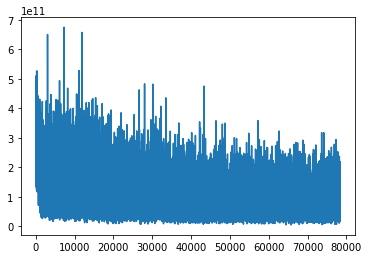

Mean gan loss : 105233211341.21861
Std gan loss :  55777692427.159485
Min gan loss :  4423798272.0
PSNR loss


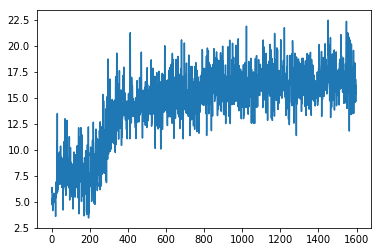

Mean psnr loss : 14.321495875147747
Std psnr loss :  3.6173389147162807
Min psnr loss :  3.449070155620575


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np

with open("pretrain losses - srgan.json") as f:
    data = json.load(f)

print("Pretrain loss: Loaded SRGAN JSON.")

# plot the generator loss values
print("Generator loss")
plt.plot(data['generator_loss'])
plt.show()

print("Mean gan loss :", np.mean(data['generator_loss']))
print("Std gan loss : ", np.std(data['generator_loss']))
print("Min gan loss : ", np.min(data['generator_loss']))

# plot the PSNR loss values
print("PSNR loss")
plt.plot(data['val_psnr'])
plt.show()

print("Mean psnr loss :", np.mean(data['val_psnr']))
print("Std psnr loss : ", np.std(data['val_psnr']))
print("Min psnr loss : ", np.min(data['val_psnr']))

In [10]:
# Pretrain the discriminator network
srgan_network.pre_train_discriminator(coco_path, num_images=40000, epochs=1, batch_size=16)

Generator weights loaded.
Training SRGAN network

Epoch : 1
Found 82783 images belonging to 2 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:208: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


16 / 40000 | Improvement : 0.00 % | 22.63 s/step | DLoss/Acc : 3.5326 / 0.53
32 / 40000 | Improvement : 0.41 % | 0.13 s/step | DLoss/Acc : 3.5180 / 0.88
48 / 40000 | Improvement : 9.99 % | 0.13 s/step | DLoss/Acc : 3.1665 / 0.91
64 / 40000 | Improvement : -4.21 % | 0.13 s/step | DLoss/Acc : 3.2997 / 0.78
80 / 40000 | Improvement : 7.31 % | 0.13 s/step | DLoss/Acc : 3.0585 / 0.84
96 / 40000 | Improvement : -6.46 % | 0.13 s/step | DLoss/Acc : 3.2560 / 0.91
112 / 40000 | Improvement : -9.77 % | 0.13 s/step | DLoss/Acc : 3.5740 / 0.81
128 / 40000 | Improvement : 9.10 % | 0.13 s/step | DLoss/Acc : 3.2488 / 1.00
144 / 40000 | Improvement : -38.45 % | 0.13 s/step | DLoss/Acc : 4.4981 / 0.88
160 / 40000 | Improvement : -17.24 % | 0.13 s/step | DLoss/Acc : 5.2738 / 0.78
176 / 40000 | Improvement : 24.32 % | 0.13 s/step | DLoss/Acc : 3.9910 / 0.81
192 / 40000 | Improvement : -22.52 % | 0.13 s/step | DLoss/Acc : 4.8895 / 0.78
208 / 40000 | Improvement : 27.98 % | 0.13 s/step | DLoss/Acc : 3.5216 

1696 / 40000 | Improvement : -3.94 % | 0.13 s/step | DLoss/Acc : 3.0443 / 0.88
1712 / 40000 | Improvement : -1.70 % | 0.13 s/step | DLoss/Acc : 3.0961 / 0.91
1728 / 40000 | Improvement : 8.60 % | 0.13 s/step | DLoss/Acc : 2.8299 / 0.78
1744 / 40000 | Improvement : -119.56 % | 0.13 s/step | DLoss/Acc : 6.2133 / 0.16
1760 / 40000 | Improvement : 45.71 % | 0.13 s/step | DLoss/Acc : 3.3734 / 0.62
1776 / 40000 | Improvement : -38.99 % | 0.13 s/step | DLoss/Acc : 4.6888 / 0.38
1792 / 40000 | Improvement : 42.42 % | 0.13 s/step | DLoss/Acc : 2.6996 / 0.75
1808 / 40000 | Improvement : 3.99 % | 0.13 s/step | DLoss/Acc : 2.5919 / 0.84
1824 / 40000 | Improvement : -18.13 % | 0.13 s/step | DLoss/Acc : 3.0617 / 0.84
1840 / 40000 | Improvement : -11.99 % | 0.13 s/step | DLoss/Acc : 3.4288 / 0.88
1856 / 40000 | Improvement : 11.27 % | 0.13 s/step | DLoss/Acc : 3.0425 / 0.91
1872 / 40000 | Improvement : -7.06 % | 0.13 s/step | DLoss/Acc : 3.2572 / 0.84
1888 / 40000 | Improvement : -150.82 % | 0.13 s/s

3344 / 40000 | Improvement : -7.37 % | 0.13 s/step | DLoss/Acc : 2.5971 / 0.75
3360 / 40000 | Improvement : -6.78 % | 0.13 s/step | DLoss/Acc : 2.7730 / 0.81
3376 / 40000 | Improvement : 26.36 % | 0.13 s/step | DLoss/Acc : 2.0422 / 0.94
3392 / 40000 | Improvement : -31.74 % | 0.13 s/step | DLoss/Acc : 2.6904 / 0.81
3408 / 40000 | Improvement : 14.79 % | 0.13 s/step | DLoss/Acc : 2.2926 / 0.88
3424 / 40000 | Improvement : -2.35 % | 0.13 s/step | DLoss/Acc : 2.3464 / 0.91
3440 / 40000 | Improvement : -135.37 % | 0.13 s/step | DLoss/Acc : 5.5226 / 0.06
3456 / 40000 | Improvement : 58.23 % | 0.13 s/step | DLoss/Acc : 2.3065 / 0.88
3472 / 40000 | Improvement : -92.77 % | 0.13 s/step | DLoss/Acc : 4.4462 / 0.22
3488 / 40000 | Improvement : 20.96 % | 0.13 s/step | DLoss/Acc : 3.5142 / 0.50
3504 / 40000 | Improvement : 12.22 % | 0.13 s/step | DLoss/Acc : 3.0848 / 0.44
3520 / 40000 | Improvement : -8.69 % | 0.13 s/step | DLoss/Acc : 3.3530 / 0.62
3536 / 40000 | Improvement : 18.05 % | 0.13 s/st

4992 / 40000 | Improvement : -9.36 % | 0.13 s/step | DLoss/Acc : 2.7031 / 0.81
5008 / 40000 | Improvement : 7.82 % | 0.13 s/step | DLoss/Acc : 2.4917 / 0.81
5024 / 40000 | Improvement : -5.48 % | 0.13 s/step | DLoss/Acc : 2.6282 / 0.84
5040 / 40000 | Improvement : 11.54 % | 0.13 s/step | DLoss/Acc : 2.3249 / 0.75
5056 / 40000 | Improvement : -0.75 % | 0.13 s/step | DLoss/Acc : 2.3423 / 0.81
5072 / 40000 | Improvement : -3.83 % | 0.13 s/step | DLoss/Acc : 2.4320 / 0.88
5088 / 40000 | Improvement : 1.24 % | 0.13 s/step | DLoss/Acc : 2.4019 / 0.75
5104 / 40000 | Improvement : -2.95 % | 0.13 s/step | DLoss/Acc : 2.4727 / 0.84
5120 / 40000 | Improvement : 3.52 % | 0.13 s/step | DLoss/Acc : 2.3856 / 0.78
5136 / 40000 | Improvement : 9.00 % | 0.13 s/step | DLoss/Acc : 2.1710 / 0.91
5152 / 40000 | Improvement : -10.15 % | 0.13 s/step | DLoss/Acc : 2.3913 / 1.00
5168 / 40000 | Improvement : 2.73 % | 0.13 s/step | DLoss/Acc : 2.3262 / 0.97
5184 / 40000 | Improvement : -6.00 % | 0.13 s/step | DLo

6640 / 40000 | Improvement : -4.07 % | 0.13 s/step | DLoss/Acc : 2.2261 / 0.91
6656 / 40000 | Improvement : -2.27 % | 0.13 s/step | DLoss/Acc : 2.2766 / 0.78
6672 / 40000 | Improvement : -14.48 % | 0.13 s/step | DLoss/Acc : 2.6062 / 0.69
6688 / 40000 | Improvement : 12.39 % | 0.13 s/step | DLoss/Acc : 2.2832 / 0.62
6704 / 40000 | Improvement : 7.23 % | 0.13 s/step | DLoss/Acc : 2.1180 / 0.84
6720 / 40000 | Improvement : -76.87 % | 0.13 s/step | DLoss/Acc : 3.7462 / 0.16
6736 / 40000 | Improvement : 39.10 % | 0.13 s/step | DLoss/Acc : 2.2815 / 0.81
6752 / 40000 | Improvement : 8.94 % | 0.13 s/step | DLoss/Acc : 2.0775 / 0.78
6768 / 40000 | Improvement : -1.68 % | 0.13 s/step | DLoss/Acc : 2.1124 / 0.78
6784 / 40000 | Improvement : -67.20 % | 0.13 s/step | DLoss/Acc : 3.5319 / 0.25
6800 / 40000 | Improvement : 32.44 % | 0.13 s/step | DLoss/Acc : 2.3861 / 0.56
6816 / 40000 | Improvement : -0.37 % | 0.13 s/step | DLoss/Acc : 2.3948 / 0.75
6832 / 40000 | Improvement : -26.89 % | 0.13 s/step

8288 / 40000 | Improvement : 3.40 % | 0.13 s/step | DLoss/Acc : 2.2634 / 0.75
8304 / 40000 | Improvement : 7.93 % | 0.13 s/step | DLoss/Acc : 2.0839 / 0.84
8320 / 40000 | Improvement : -12.33 % | 0.13 s/step | DLoss/Acc : 2.3408 / 0.72
8336 / 40000 | Improvement : 8.25 % | 0.13 s/step | DLoss/Acc : 2.1477 / 0.78
8352 / 40000 | Improvement : -0.82 % | 0.13 s/step | DLoss/Acc : 2.1654 / 0.78
8368 / 40000 | Improvement : -1.31 % | 0.13 s/step | DLoss/Acc : 2.1938 / 0.81
8384 / 40000 | Improvement : -1.97 % | 0.13 s/step | DLoss/Acc : 2.2371 / 0.78
8400 / 40000 | Improvement : 2.26 % | 0.13 s/step | DLoss/Acc : 2.1865 / 0.84
8416 / 40000 | Improvement : 1.50 % | 0.13 s/step | DLoss/Acc : 2.1537 / 0.88
8432 / 40000 | Improvement : 2.54 % | 0.13 s/step | DLoss/Acc : 2.0990 / 0.81
8448 / 40000 | Improvement : -3.17 % | 0.13 s/step | DLoss/Acc : 2.1656 / 0.97
8464 / 40000 | Improvement : 1.82 % | 0.13 s/step | DLoss/Acc : 2.1263 / 0.91
8480 / 40000 | Improvement : 5.37 % | 0.13 s/step | DLoss/

9968 / 40000 | Improvement : 0.89 % | 0.13 s/step | DLoss/Acc : 2.1308 / 0.94
9984 / 40000 | Improvement : 4.14 % | 0.13 s/step | DLoss/Acc : 2.0426 / 0.97
10000 / 40000 | Improvement : 1.73 % | 0.13 s/step | DLoss/Acc : 2.0072 / 0.97
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
10016 / 40000 | Improvement : 0.03 % | 0.13 s/step | DLoss/Acc : 2.0067 / 0.97
10032 / 40000 | Improvement : 0.17 % | 0.13 s/step | DLoss/Acc : 2.0033 / 0.97
10048 / 40000 | Improvement : 0.01 % | 0.13 s/step | DLoss/Acc : 2.0030 / 0.94
10064 / 40000 | Improvement : -1.03 % | 0.13 s/step | DLoss/Acc : 2.0237 / 1.00
10080 / 40000 | Improvement : 3.70 % | 0.13 s/step | DLoss/Acc : 1.9487 / 1.00
10096 / 40000 | Improvement : -4.06 % | 0.13 s/step | DLoss/Acc : 2.0277 / 0.97
10112 / 40000 | Improvement : -5.07 % | 0.13 s/step | DLoss/Acc : 2.1305 / 0.91
10128 / 40000 | Improvement : 1.04 % | 0.13 s/step | DLoss/Acc : 2.1082 / 0.94
10144 / 40000 | Impro

11600 / 40000 | Improvement : 36.08 % | 0.13 s/step | DLoss/Acc : 2.0431 / 0.84
11616 / 40000 | Improvement : 0.27 % | 0.13 s/step | DLoss/Acc : 2.0375 / 0.84
11632 / 40000 | Improvement : -0.18 % | 0.13 s/step | DLoss/Acc : 2.0412 / 0.88
11648 / 40000 | Improvement : -2.69 % | 0.13 s/step | DLoss/Acc : 2.0961 / 0.78
11664 / 40000 | Improvement : -0.98 % | 0.13 s/step | DLoss/Acc : 2.1167 / 0.81
11680 / 40000 | Improvement : -3.46 % | 0.13 s/step | DLoss/Acc : 2.1900 / 0.91
11696 / 40000 | Improvement : 8.27 % | 0.13 s/step | DLoss/Acc : 2.0090 / 0.91
11712 / 40000 | Improvement : -59.27 % | 0.13 s/step | DLoss/Acc : 3.1996 / 0.06
11728 / 40000 | Improvement : 37.72 % | 0.13 s/step | DLoss/Acc : 1.9928 / 0.94
11744 / 40000 | Improvement : -2.08 % | 0.13 s/step | DLoss/Acc : 2.0342 / 0.94
11760 / 40000 | Improvement : -3.59 % | 0.13 s/step | DLoss/Acc : 2.1073 / 0.84
11776 / 40000 | Improvement : 6.00 % | 0.13 s/step | DLoss/Acc : 1.9807 / 0.94
11792 / 40000 | Improvement : -1.35 % | 0.

13232 / 40000 | Improvement : 0.21 % | 0.13 s/step | DLoss/Acc : 2.0013 / 0.88
13248 / 40000 | Improvement : -3.15 % | 0.13 s/step | DLoss/Acc : 2.0643 / 0.91
13264 / 40000 | Improvement : -0.72 % | 0.13 s/step | DLoss/Acc : 2.0792 / 0.88
13280 / 40000 | Improvement : -1.24 % | 0.13 s/step | DLoss/Acc : 2.1050 / 0.88
13296 / 40000 | Improvement : 5.96 % | 0.13 s/step | DLoss/Acc : 1.9794 / 0.97
13312 / 40000 | Improvement : -10.42 % | 0.13 s/step | DLoss/Acc : 2.1858 / 0.75
13328 / 40000 | Improvement : 5.14 % | 0.13 s/step | DLoss/Acc : 2.0735 / 0.94
13344 / 40000 | Improvement : 1.04 % | 0.13 s/step | DLoss/Acc : 2.0519 / 0.97
13360 / 40000 | Improvement : 0.01 % | 0.13 s/step | DLoss/Acc : 2.0517 / 0.94
13376 / 40000 | Improvement : 3.33 % | 0.13 s/step | DLoss/Acc : 1.9834 / 1.00
13392 / 40000 | Improvement : -3.47 % | 0.13 s/step | DLoss/Acc : 2.0522 / 0.97
13408 / 40000 | Improvement : 3.11 % | 0.13 s/step | DLoss/Acc : 1.9884 / 0.97
13424 / 40000 | Improvement : 3.01 % | 0.13 s/

14864 / 40000 | Improvement : 1.32 % | 0.13 s/step | DLoss/Acc : 1.9766 / 1.00
14880 / 40000 | Improvement : 0.68 % | 0.13 s/step | DLoss/Acc : 1.9631 / 0.94
14896 / 40000 | Improvement : -1.35 % | 0.13 s/step | DLoss/Acc : 1.9896 / 0.97
14912 / 40000 | Improvement : -0.32 % | 0.13 s/step | DLoss/Acc : 1.9960 / 0.94
14928 / 40000 | Improvement : 0.08 % | 0.13 s/step | DLoss/Acc : 1.9944 / 0.97
14944 / 40000 | Improvement : 2.98 % | 0.13 s/step | DLoss/Acc : 1.9350 / 1.00
14960 / 40000 | Improvement : -1.00 % | 0.13 s/step | DLoss/Acc : 1.9544 / 1.00
14976 / 40000 | Improvement : -1.83 % | 0.13 s/step | DLoss/Acc : 1.9903 / 1.00
14992 / 40000 | Improvement : -0.05 % | 0.13 s/step | DLoss/Acc : 1.9912 / 0.97
15008 / 40000 | Improvement : 2.23 % | 0.14 s/step | DLoss/Acc : 1.9469 / 0.97
15024 / 40000 | Improvement : -2.79 % | 0.13 s/step | DLoss/Acc : 2.0013 / 0.91
15040 / 40000 | Improvement : 4.41 % | 0.14 s/step | DLoss/Acc : 1.9130 / 0.97
15056 / 40000 | Improvement : -0.71 % | 0.13 s

16496 / 40000 | Improvement : 1.50 % | 0.13 s/step | DLoss/Acc : 1.9948 / 1.00
16512 / 40000 | Improvement : 2.11 % | 0.13 s/step | DLoss/Acc : 1.9526 / 1.00
16528 / 40000 | Improvement : -3.26 % | 0.13 s/step | DLoss/Acc : 2.0164 / 0.97
16544 / 40000 | Improvement : 3.09 % | 0.13 s/step | DLoss/Acc : 1.9541 / 0.97
16560 / 40000 | Improvement : -1.25 % | 0.13 s/step | DLoss/Acc : 1.9785 / 1.00
16576 / 40000 | Improvement : -77.26 % | 0.13 s/step | DLoss/Acc : 3.5071 / 0.06
16592 / 40000 | Improvement : 15.26 % | 0.13 s/step | DLoss/Acc : 2.9718 / 0.19
16608 / 40000 | Improvement : 16.16 % | 0.13 s/step | DLoss/Acc : 2.4915 / 0.59
16624 / 40000 | Improvement : 11.93 % | 0.13 s/step | DLoss/Acc : 2.1942 / 0.59
16640 / 40000 | Improvement : -26.46 % | 0.13 s/step | DLoss/Acc : 2.7747 / 0.16
16656 / 40000 | Improvement : 21.76 % | 0.13 s/step | DLoss/Acc : 2.1710 / 0.69
16672 / 40000 | Improvement : -1.75 % | 0.13 s/step | DLoss/Acc : 2.2090 / 0.59
16688 / 40000 | Improvement : -17.59 % | 

18128 / 40000 | Improvement : 0.53 % | 0.13 s/step | DLoss/Acc : 1.9582 / 1.00
18144 / 40000 | Improvement : 1.27 % | 0.13 s/step | DLoss/Acc : 1.9334 / 1.00
18160 / 40000 | Improvement : -1.14 % | 0.13 s/step | DLoss/Acc : 1.9555 / 1.00
18176 / 40000 | Improvement : 0.71 % | 0.13 s/step | DLoss/Acc : 1.9415 / 1.00
18192 / 40000 | Improvement : -0.07 % | 0.13 s/step | DLoss/Acc : 1.9429 / 1.00
18208 / 40000 | Improvement : 1.26 % | 0.13 s/step | DLoss/Acc : 1.9184 / 1.00
18224 / 40000 | Improvement : -3.39 % | 0.13 s/step | DLoss/Acc : 1.9834 / 1.00
18240 / 40000 | Improvement : -0.01 % | 0.13 s/step | DLoss/Acc : 1.9836 / 1.00
18256 / 40000 | Improvement : -1.00 % | 0.13 s/step | DLoss/Acc : 2.0035 / 1.00
18272 / 40000 | Improvement : 4.33 % | 0.13 s/step | DLoss/Acc : 1.9168 / 1.00
18288 / 40000 | Improvement : -3.12 % | 0.13 s/step | DLoss/Acc : 1.9765 / 1.00
18304 / 40000 | Improvement : 2.87 % | 0.13 s/step | DLoss/Acc : 1.9197 / 1.00
18320 / 40000 | Improvement : -6.03 % | 0.13 s

19776 / 40000 | Improvement : 0.46 % | 0.13 s/step | DLoss/Acc : 2.0059 / 0.97
19792 / 40000 | Improvement : 0.29 % | 0.13 s/step | DLoss/Acc : 2.0001 / 0.97
19808 / 40000 | Improvement : 1.00 % | 0.13 s/step | DLoss/Acc : 1.9801 / 0.94
19824 / 40000 | Improvement : 2.19 % | 0.13 s/step | DLoss/Acc : 1.9368 / 1.00
19840 / 40000 | Improvement : -2.54 % | 0.13 s/step | DLoss/Acc : 1.9859 / 0.97
19856 / 40000 | Improvement : -0.37 % | 0.13 s/step | DLoss/Acc : 1.9932 / 1.00
19872 / 40000 | Improvement : -0.97 % | 0.13 s/step | DLoss/Acc : 2.0125 / 1.00
19888 / 40000 | Improvement : 1.42 % | 0.13 s/step | DLoss/Acc : 1.9839 / 0.97
19904 / 40000 | Improvement : 0.56 % | 0.13 s/step | DLoss/Acc : 1.9728 / 0.97
19920 / 40000 | Improvement : 1.70 % | 0.13 s/step | DLoss/Acc : 1.9393 / 1.00
19936 / 40000 | Improvement : 1.42 % | 0.13 s/step | DLoss/Acc : 1.9118 / 1.00
19952 / 40000 | Improvement : -0.05 % | 0.13 s/step | DLoss/Acc : 1.9128 / 1.00
19968 / 40000 | Improvement : -76.48 % | 0.13 s/

21408 / 40000 | Improvement : 35.71 % | 0.13 s/step | DLoss/Acc : 1.9846 / 0.94
21424 / 40000 | Improvement : -2.91 % | 0.13 s/step | DLoss/Acc : 2.0424 / 0.97
21440 / 40000 | Improvement : 1.41 % | 0.13 s/step | DLoss/Acc : 2.0136 / 1.00
21456 / 40000 | Improvement : 2.01 % | 0.13 s/step | DLoss/Acc : 1.9731 / 0.97
21472 / 40000 | Improvement : -1.81 % | 0.13 s/step | DLoss/Acc : 2.0089 / 1.00
21488 / 40000 | Improvement : 3.16 % | 0.13 s/step | DLoss/Acc : 1.9454 / 0.97
21504 / 40000 | Improvement : -2.65 % | 0.13 s/step | DLoss/Acc : 1.9969 / 0.97
21520 / 40000 | Improvement : -1.19 % | 0.13 s/step | DLoss/Acc : 2.0207 / 0.91
21536 / 40000 | Improvement : 1.91 % | 0.13 s/step | DLoss/Acc : 1.9821 / 1.00
21552 / 40000 | Improvement : -0.33 % | 0.13 s/step | DLoss/Acc : 1.9886 / 0.94
21568 / 40000 | Improvement : -1.38 % | 0.13 s/step | DLoss/Acc : 2.0161 / 0.94
21584 / 40000 | Improvement : 1.77 % | 0.13 s/step | DLoss/Acc : 1.9804 / 1.00
21600 / 40000 | Improvement : 0.88 % | 0.13 s

23040 / 40000 | Improvement : -3.75 % | 0.13 s/step | DLoss/Acc : 2.0380 / 1.00
23056 / 40000 | Improvement : 4.16 % | 0.13 s/step | DLoss/Acc : 1.9531 / 1.00
23072 / 40000 | Improvement : 0.33 % | 0.13 s/step | DLoss/Acc : 1.9467 / 1.00
23088 / 40000 | Improvement : -54.39 % | 0.13 s/step | DLoss/Acc : 3.0056 / 0.03
23104 / 40000 | Improvement : 35.21 % | 0.13 s/step | DLoss/Acc : 1.9475 / 1.00
23120 / 40000 | Improvement : -3.47 % | 0.13 s/step | DLoss/Acc : 2.0150 / 0.94
23136 / 40000 | Improvement : 3.85 % | 0.13 s/step | DLoss/Acc : 1.9375 / 1.00
23152 / 40000 | Improvement : -53.30 % | 0.13 s/step | DLoss/Acc : 2.9700 / 0.00
23168 / 40000 | Improvement : 32.29 % | 0.13 s/step | DLoss/Acc : 2.0109 / 1.00
23184 / 40000 | Improvement : 0.27 % | 0.13 s/step | DLoss/Acc : 2.0055 / 0.94
23200 / 40000 | Improvement : -37.88 % | 0.13 s/step | DLoss/Acc : 2.7651 / 0.03
23216 / 40000 | Improvement : 26.67 % | 0.13 s/step | DLoss/Acc : 2.0277 / 0.91
23232 / 40000 | Improvement : -2.73 % | 0

24672 / 40000 | Improvement : 2.25 % | 0.13 s/step | DLoss/Acc : 1.9231 / 1.00
24688 / 40000 | Improvement : -1.42 % | 0.13 s/step | DLoss/Acc : 1.9504 / 1.00
24704 / 40000 | Improvement : -1.65 % | 0.13 s/step | DLoss/Acc : 1.9826 / 1.00
24720 / 40000 | Improvement : -0.15 % | 0.13 s/step | DLoss/Acc : 1.9855 / 1.00
24736 / 40000 | Improvement : -3.88 % | 0.13 s/step | DLoss/Acc : 2.0626 / 0.97
24752 / 40000 | Improvement : 4.00 % | 0.13 s/step | DLoss/Acc : 1.9801 / 1.00
24768 / 40000 | Improvement : -59.74 % | 0.13 s/step | DLoss/Acc : 3.1630 / 0.00
24784 / 40000 | Improvement : 37.89 % | 0.13 s/step | DLoss/Acc : 1.9647 / 0.97
24800 / 40000 | Improvement : -0.50 % | 0.13 s/step | DLoss/Acc : 1.9746 / 1.00
24816 / 40000 | Improvement : 1.74 % | 0.13 s/step | DLoss/Acc : 1.9402 / 1.00
24832 / 40000 | Improvement : -1.83 % | 0.13 s/step | DLoss/Acc : 1.9757 / 1.00
24848 / 40000 | Improvement : 0.68 % | 0.13 s/step | DLoss/Acc : 1.9623 / 0.97
24864 / 40000 | Improvement : -1.07 % | 0.1

26304 / 40000 | Improvement : 0.86 % | 0.13 s/step | DLoss/Acc : 1.9622 / 1.00
26320 / 40000 | Improvement : -0.76 % | 0.13 s/step | DLoss/Acc : 1.9771 / 1.00
26336 / 40000 | Improvement : -2.49 % | 0.13 s/step | DLoss/Acc : 2.0263 / 0.97
26352 / 40000 | Improvement : 0.10 % | 0.13 s/step | DLoss/Acc : 2.0244 / 0.97
26368 / 40000 | Improvement : 1.64 % | 0.13 s/step | DLoss/Acc : 1.9911 / 1.00
26384 / 40000 | Improvement : 2.29 % | 0.13 s/step | DLoss/Acc : 1.9454 / 1.00
26400 / 40000 | Improvement : 1.05 % | 0.13 s/step | DLoss/Acc : 1.9251 / 1.00
26416 / 40000 | Improvement : -1.75 % | 0.13 s/step | DLoss/Acc : 1.9588 / 1.00
26432 / 40000 | Improvement : -1.99 % | 0.13 s/step | DLoss/Acc : 1.9978 / 1.00
26448 / 40000 | Improvement : 2.60 % | 0.13 s/step | DLoss/Acc : 1.9458 / 1.00
26464 / 40000 | Improvement : 1.18 % | 0.13 s/step | DLoss/Acc : 1.9229 / 1.00
26480 / 40000 | Improvement : -3.79 % | 0.13 s/step | DLoss/Acc : 1.9958 / 1.00
26496 / 40000 | Improvement : 0.87 % | 0.13 s/s

27952 / 40000 | Improvement : 1.42 % | 0.13 s/step | DLoss/Acc : 2.0389 / 1.00
27968 / 40000 | Improvement : -25.72 % | 0.13 s/step | DLoss/Acc : 2.5633 / 0.03
27984 / 40000 | Improvement : 17.77 % | 0.13 s/step | DLoss/Acc : 2.1077 / 0.88
28000 / 40000 | Improvement : 1.86 % | 0.13 s/step | DLoss/Acc : 2.0685 / 0.94
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
28016 / 40000 | Improvement : -22.65 % | 0.13 s/step | DLoss/Acc : 2.5369 / 0.09
28032 / 40000 | Improvement : 17.48 % | 0.13 s/step | DLoss/Acc : 2.0935 / 1.00
28048 / 40000 | Improvement : -0.27 % | 0.13 s/step | DLoss/Acc : 2.0991 / 0.91
28064 / 40000 | Improvement : 0.42 % | 0.13 s/step | DLoss/Acc : 2.0903 / 0.94
28080 / 40000 | Improvement : -0.01 % | 0.13 s/step | DLoss/Acc : 2.0906 / 0.91
28096 / 40000 | Improvement : 0.96 % | 0.13 s/step | DLoss/Acc : 2.0706 / 0.88
28112 / 40000 | Improvement : 0.77 % | 0.13 s/step | DLoss/Acc : 2.0547 / 0.88
28128 / 40000 

29584 / 40000 | Improvement : -2.04 % | 0.13 s/step | DLoss/Acc : 1.9791 / 1.00
29600 / 40000 | Improvement : 2.53 % | 0.13 s/step | DLoss/Acc : 1.9289 / 1.00
29616 / 40000 | Improvement : -2.27 % | 0.13 s/step | DLoss/Acc : 1.9727 / 1.00
29632 / 40000 | Improvement : -1.30 % | 0.13 s/step | DLoss/Acc : 1.9984 / 1.00
29648 / 40000 | Improvement : 3.61 % | 0.13 s/step | DLoss/Acc : 1.9261 / 1.00
29664 / 40000 | Improvement : 0.61 % | 0.13 s/step | DLoss/Acc : 1.9145 / 1.00
29680 / 40000 | Improvement : -4.76 % | 0.13 s/step | DLoss/Acc : 2.0055 / 1.00
29696 / 40000 | Improvement : 5.75 % | 0.13 s/step | DLoss/Acc : 1.8902 / 1.00
29712 / 40000 | Improvement : -2.17 % | 0.13 s/step | DLoss/Acc : 1.9313 / 1.00
29728 / 40000 | Improvement : -5.81 % | 0.13 s/step | DLoss/Acc : 2.0435 / 1.00
29744 / 40000 | Improvement : 5.23 % | 0.13 s/step | DLoss/Acc : 1.9366 / 1.00
29760 / 40000 | Improvement : 0.34 % | 0.13 s/step | DLoss/Acc : 1.9300 / 1.00
29776 / 40000 | Improvement : -0.09 % | 0.13 s

31216 / 40000 | Improvement : 0.50 % | 0.13 s/step | DLoss/Acc : 2.0155 / 0.97
31232 / 40000 | Improvement : 0.49 % | 0.13 s/step | DLoss/Acc : 2.0057 / 0.97
31248 / 40000 | Improvement : -1.20 % | 0.13 s/step | DLoss/Acc : 2.0297 / 0.91
31264 / 40000 | Improvement : -0.04 % | 0.13 s/step | DLoss/Acc : 2.0304 / 1.00
31280 / 40000 | Improvement : 2.57 % | 0.13 s/step | DLoss/Acc : 1.9782 / 0.97
31296 / 40000 | Improvement : -53.15 % | 0.13 s/step | DLoss/Acc : 3.0296 / 0.00
31312 / 40000 | Improvement : 34.79 % | 0.13 s/step | DLoss/Acc : 1.9755 / 1.00
31328 / 40000 | Improvement : -1.78 % | 0.13 s/step | DLoss/Acc : 2.0107 / 1.00
31344 / 40000 | Improvement : 0.55 % | 0.13 s/step | DLoss/Acc : 1.9997 / 1.00
31360 / 40000 | Improvement : -0.18 % | 0.13 s/step | DLoss/Acc : 2.0033 / 1.00
31376 / 40000 | Improvement : 2.35 % | 0.13 s/step | DLoss/Acc : 1.9562 / 1.00
31392 / 40000 | Improvement : 0.70 % | 0.13 s/step | DLoss/Acc : 1.9424 / 1.00
31408 / 40000 | Improvement : -51.80 % | 0.13

32848 / 40000 | Improvement : 3.24 % | 0.13 s/step | DLoss/Acc : 1.9143 / 1.00
32864 / 40000 | Improvement : -2.49 % | 0.13 s/step | DLoss/Acc : 1.9619 / 0.97
32880 / 40000 | Improvement : -61.47 % | 0.13 s/step | DLoss/Acc : 3.1679 / 0.00
32896 / 40000 | Improvement : 38.61 % | 0.13 s/step | DLoss/Acc : 1.9448 / 1.00
32912 / 40000 | Improvement : -0.36 % | 0.13 s/step | DLoss/Acc : 1.9519 / 1.00
32928 / 40000 | Improvement : 0.67 % | 0.13 s/step | DLoss/Acc : 1.9388 / 1.00
32944 / 40000 | Improvement : -1.99 % | 0.13 s/step | DLoss/Acc : 1.9774 / 1.00
32960 / 40000 | Improvement : -47.94 % | 0.13 s/step | DLoss/Acc : 2.9254 / 0.00
32976 / 40000 | Improvement : 32.83 % | 0.13 s/step | DLoss/Acc : 1.9649 / 1.00
32992 / 40000 | Improvement : -2.06 % | 0.13 s/step | DLoss/Acc : 2.0054 / 1.00
33008 / 40000 | Improvement : -0.16 % | 0.13 s/step | DLoss/Acc : 2.0085 / 1.00
33024 / 40000 | Improvement : 2.04 % | 0.13 s/step | DLoss/Acc : 1.9675 / 1.00
33040 / 40000 | Improvement : 0.53 % | 0.

34480 / 40000 | Improvement : -0.94 % | 0.13 s/step | DLoss/Acc : 1.9787 / 1.00
34496 / 40000 | Improvement : 1.44 % | 0.13 s/step | DLoss/Acc : 1.9502 / 1.00
34512 / 40000 | Improvement : -1.40 % | 0.13 s/step | DLoss/Acc : 1.9776 / 1.00
34528 / 40000 | Improvement : -0.97 % | 0.13 s/step | DLoss/Acc : 1.9967 / 1.00
34544 / 40000 | Improvement : 1.99 % | 0.13 s/step | DLoss/Acc : 1.9569 / 1.00
34560 / 40000 | Improvement : 0.60 % | 0.13 s/step | DLoss/Acc : 1.9451 / 1.00
34576 / 40000 | Improvement : 0.14 % | 0.13 s/step | DLoss/Acc : 1.9425 / 1.00
34592 / 40000 | Improvement : 0.37 % | 0.13 s/step | DLoss/Acc : 1.9353 / 1.00
34608 / 40000 | Improvement : -2.37 % | 0.13 s/step | DLoss/Acc : 1.9812 / 1.00
34624 / 40000 | Improvement : 2.05 % | 0.13 s/step | DLoss/Acc : 1.9406 / 1.00
34640 / 40000 | Improvement : 1.30 % | 0.13 s/step | DLoss/Acc : 1.9153 / 1.00
34656 / 40000 | Improvement : -2.73 % | 0.13 s/step | DLoss/Acc : 1.9677 / 1.00
34672 / 40000 | Improvement : 0.22 % | 0.13 s/s

36112 / 40000 | Improvement : -0.03 % | 0.13 s/step | DLoss/Acc : 1.9637 / 1.00
36128 / 40000 | Improvement : 0.50 % | 0.13 s/step | DLoss/Acc : 1.9538 / 1.00
36144 / 40000 | Improvement : -2.08 % | 0.13 s/step | DLoss/Acc : 1.9945 / 1.00
36160 / 40000 | Improvement : 2.52 % | 0.13 s/step | DLoss/Acc : 1.9442 / 1.00
36176 / 40000 | Improvement : 0.92 % | 0.13 s/step | DLoss/Acc : 1.9264 / 1.00
36192 / 40000 | Improvement : -80.75 % | 0.13 s/step | DLoss/Acc : 3.4820 / 0.00
36208 / 40000 | Improvement : 45.37 % | 0.13 s/step | DLoss/Acc : 1.9023 / 1.00
36224 / 40000 | Improvement : -3.16 % | 0.13 s/step | DLoss/Acc : 1.9623 / 1.00
36240 / 40000 | Improvement : 0.03 % | 0.13 s/step | DLoss/Acc : 1.9617 / 1.00
36256 / 40000 | Improvement : 0.43 % | 0.13 s/step | DLoss/Acc : 1.9533 / 1.00
36272 / 40000 | Improvement : -0.58 % | 0.13 s/step | DLoss/Acc : 1.9647 / 1.00
36288 / 40000 | Improvement : 0.82 % | 0.13 s/step | DLoss/Acc : 1.9485 / 0.97
36304 / 40000 | Improvement : 0.20 % | 0.13 s

37760 / 40000 | Improvement : -2.20 % | 0.13 s/step | DLoss/Acc : 1.9869 / 0.97
37776 / 40000 | Improvement : 3.24 % | 0.13 s/step | DLoss/Acc : 1.9225 / 1.00
37792 / 40000 | Improvement : -0.65 % | 0.13 s/step | DLoss/Acc : 1.9349 / 1.00
37808 / 40000 | Improvement : -0.61 % | 0.13 s/step | DLoss/Acc : 1.9467 / 1.00
37824 / 40000 | Improvement : -63.91 % | 0.13 s/step | DLoss/Acc : 3.1909 / 0.00
37840 / 40000 | Improvement : 38.87 % | 0.13 s/step | DLoss/Acc : 1.9507 / 1.00
37856 / 40000 | Improvement : -0.15 % | 0.13 s/step | DLoss/Acc : 1.9536 / 1.00
37872 / 40000 | Improvement : -1.90 % | 0.13 s/step | DLoss/Acc : 1.9908 / 1.00
37888 / 40000 | Improvement : 1.76 % | 0.13 s/step | DLoss/Acc : 1.9557 / 1.00
37904 / 40000 | Improvement : -0.91 % | 0.13 s/step | DLoss/Acc : 1.9735 / 1.00
37920 / 40000 | Improvement : -1.34 % | 0.13 s/step | DLoss/Acc : 2.0001 / 1.00
37936 / 40000 | Improvement : 1.50 % | 0.13 s/step | DLoss/Acc : 1.9701 / 1.00
37952 / 40000 | Improvement : 2.28 % | 0.1

39392 / 40000 | Improvement : 5.23 % | 0.13 s/step | DLoss/Acc : 1.8944 / 1.00
39408 / 40000 | Improvement : -4.28 % | 0.13 s/step | DLoss/Acc : 1.9754 / 1.00
39424 / 40000 | Improvement : -74.91 % | 0.13 s/step | DLoss/Acc : 3.4553 / 0.00
39440 / 40000 | Improvement : 43.66 % | 0.13 s/step | DLoss/Acc : 1.9467 / 1.00
39456 / 40000 | Improvement : 0.77 % | 0.13 s/step | DLoss/Acc : 1.9317 / 1.00
39472 / 40000 | Improvement : -0.52 % | 0.13 s/step | DLoss/Acc : 1.9418 / 1.00
39488 / 40000 | Improvement : -0.17 % | 0.13 s/step | DLoss/Acc : 1.9451 / 1.00
39504 / 40000 | Improvement : -0.88 % | 0.13 s/step | DLoss/Acc : 1.9622 / 1.00
39520 / 40000 | Improvement : -0.51 % | 0.13 s/step | DLoss/Acc : 1.9722 / 1.00
39536 / 40000 | Improvement : -1.28 % | 0.13 s/step | DLoss/Acc : 1.9974 / 1.00
39552 / 40000 | Improvement : -0.64 % | 0.13 s/step | DLoss/Acc : 2.0101 / 1.00
39568 / 40000 | Improvement : 1.41 % | 0.13 s/step | DLoss/Acc : 1.9818 / 1.00
39584 / 40000 | Improvement : 2.52 % | 0.1

Pretrain loss: Loaded discriminator JSON
Discriminator loss


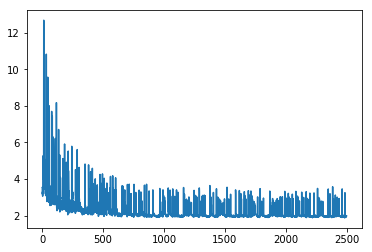

Mean discriminator loss : 2.286400362801552
Std discriminator loss :  0.6954556596970372
Min discriminator loss :  1.8700445294380188


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np

with open("pretrain losses - discriminator.json") as f:
    data = json.load(f)

print("Pretrain loss: Loaded discriminator JSON")

# plot the discriminator loss values
print("Discriminator loss")
plt.plot(data['discriminator_loss'])
plt.show()

print("Mean discriminator loss :", np.mean(data['discriminator_loss']))
print("Std discriminator loss : ", np.std(data['discriminator_loss']))
print("Min discriminator loss : ", np.min(data['discriminator_loss']))

In [7]:
# Fully train the SRGAN with VGG loss and Discriminator loss
srgan_network.train_full_model(coco_path, num_images=80000, epochs=5, batch_size=16)

Generator weights loaded.
GAN Model weights loaded.
Discriminator weights loaded.
Training SRGAN network

Epoch : 1
Found 82783 images belonging to 2 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:208: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


16 / 80000 | Improvement : 0.00 % | 21.64 s/step | DLoss : 3.290 | GLoss : 1267587350528.000
32 / 80000 | Improvement : -4.90 % | 0.27 s/step | DLoss : 3.451 | GLoss : 1181349576704.000
48 / 80000 | Improvement : 6.11 % | 0.26 s/step | DLoss : 3.240 | GLoss : 1138441977856.000
64 / 80000 | Improvement : 0.77 % | 0.26 s/step | DLoss : 3.215 | GLoss : 1391076442112.000
80 / 80000 | Improvement : -5.11 % | 0.27 s/step | DLoss : 3.380 | GLoss : 1217162248192.000
96 / 80000 | Improvement : -39.28 % | 0.26 s/step | DLoss : 4.707 | GLoss : 1214777393152.000
112 / 80000 | Improvement : -17.40 % | 0.26 s/step | DLoss : 5.526 | GLoss : 1179130920960.000
128 / 80000 | Improvement : 10.68 % | 0.27 s/step | DLoss : 4.936 | GLoss : 1619499024384.000
144 / 80000 | Improvement : 28.73 % | 0.26 s/step | DLoss : 3.518 | GLoss : 1170904842240.000
160 / 80000 | Improvement : -13.69 % | 0.27 s/step | DLoss : 4.000 | GLoss : 1160103723008.000
176 / 80000 | Improvement : 1.42 % | 0.26 s/step | DLoss : 3.943 

1360 / 80000 | Improvement : 74.86 % | 0.27 s/step | DLoss : 3.722 | GLoss : 1361787486208.000
1376 / 80000 | Improvement : -34.93 % | 0.27 s/step | DLoss : 5.023 | GLoss : 1039958671360.000
1392 / 80000 | Improvement : 22.65 % | 0.26 s/step | DLoss : 3.885 | GLoss : 1334371811328.000
1408 / 80000 | Improvement : 2.92 % | 0.27 s/step | DLoss : 3.772 | GLoss : 1246097965056.000
1424 / 80000 | Improvement : -158.53 % | 0.27 s/step | DLoss : 9.750 | GLoss : 1264004497408.000
1440 / 80000 | Improvement : 52.55 % | 0.27 s/step | DLoss : 4.626 | GLoss : 1227446550528.000
1456 / 80000 | Improvement : -44.85 % | 0.27 s/step | DLoss : 6.701 | GLoss : 1294268366848.000
1472 / 80000 | Improvement : 17.64 % | 0.27 s/step | DLoss : 5.519 | GLoss : 1202023563264.000
1488 / 80000 | Improvement : 23.99 % | 0.27 s/step | DLoss : 4.195 | GLoss : 1318367002624.000
1504 / 80000 | Improvement : -25.05 % | 0.27 s/step | DLoss : 5.246 | GLoss : 1158632439808.000
1520 / 80000 | Improvement : 17.55 % | 0.27 s/

2688 / 80000 | Improvement : -331.32 % | 0.27 s/step | DLoss : 14.980 | GLoss : 1086062198784.000
2704 / 80000 | Improvement : -8.01 % | 0.26 s/step | DLoss : 16.180 | GLoss : 1137645977600.000
2720 / 80000 | Improvement : 70.75 % | 0.27 s/step | DLoss : 4.733 | GLoss : 1174032220160.000
2736 / 80000 | Improvement : 15.94 % | 0.26 s/step | DLoss : 3.979 | GLoss : 1038482931712.000
2752 / 80000 | Improvement : -14.18 % | 0.26 s/step | DLoss : 4.543 | GLoss : 1113069322240.000
2768 / 80000 | Improvement : 20.78 % | 0.27 s/step | DLoss : 3.599 | GLoss : 1150607294464.000
2784 / 80000 | Improvement : -10.35 % | 0.27 s/step | DLoss : 3.972 | GLoss : 1116281503744.000
2800 / 80000 | Improvement : -1.35 % | 0.27 s/step | DLoss : 4.025 | GLoss : 1171197657088.000
Validation image..
gen img mean : [0.4358547  0.41774687 0.37824273]
val img mean : [0.4582455 0.422712  0.3882788]
Time required : 0.07. Average validation PSNR over 16 samples = 17.86
2832 / 80000 | Improvement : -10.16 % | 0.26 s/s

GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.49646553 0.45786545 0.38414952]
val img mean : [0.49070153 0.44246987 0.37757444]
Time required : 0.07. Average validation PSNR over 16 samples = 17.45
4032 / 80000 | Improvement : 8.64 % | 0.27 s/step | DLoss : 2.931 | GLoss : 1261137297408.000
4048 / 80000 | Improvement : -26.29 % | 0.27 s/step | DLoss : 3.702 | GLoss : 1085498654720.000
4064 / 80000 | Improvement : 15.84 % | 0.27 s/step | DLoss : 3.116 | GLoss : 1325078151168.000
4080 / 80000 | Improvement : 12.47 % | 0.27 s/step | DLoss : 2.727 | GLoss : 1126269845504.000
4096 / 80000 | Improvement : -5.52 % | 0.26 s/step | DLoss : 2.878 | GLoss : 1005060030464.000
4112 / 80000 | Improvement : 2.34 % | 0.27 s/step | DLoss : 2.810 | GLoss : 1229607403520.000
4128 / 80000 | Improvement : -5.26 % | 0.27 s/step | DLoss : 2.958 | GLoss : 1388894486528.000
4144 / 80000 | Improvement : -246.51 % | 0.26 s/step | DLoss

5328 / 80000 | Improvement : 43.76 % | 0.27 s/step | DLoss : 2.569 | GLoss : 1042430623744.000
5344 / 80000 | Improvement : 15.04 % | 0.26 s/step | DLoss : 2.183 | GLoss : 1065676439552.000
5360 / 80000 | Improvement : -52.77 % | 0.27 s/step | DLoss : 3.334 | GLoss : 1291561861120.000
5376 / 80000 | Improvement : 17.16 % | 0.26 s/step | DLoss : 2.762 | GLoss : 985645056000.000
5392 / 80000 | Improvement : 13.21 % | 0.26 s/step | DLoss : 2.397 | GLoss : 1195014488064.000
5408 / 80000 | Improvement : -7.52 % | 0.27 s/step | DLoss : 2.578 | GLoss : 1376953696256.000
5424 / 80000 | Improvement : -18.77 % | 0.26 s/step | DLoss : 3.061 | GLoss : 1236441366528.000
5440 / 80000 | Improvement : 3.88 % | 0.27 s/step | DLoss : 2.943 | GLoss : 1103872655360.000
5456 / 80000 | Improvement : 6.92 % | 0.26 s/step | DLoss : 2.739 | GLoss : 1027240755200.000
5472 / 80000 | Improvement : 16.36 % | 0.26 s/step | DLoss : 2.291 | GLoss : 1058920988672.000
5488 / 80000 | Improvement : -6.17 % | 0.27 s/step 

6656 / 80000 | Improvement : -3.58 % | 0.26 s/step | DLoss : 2.288 | GLoss : 1157210177536.000
6672 / 80000 | Improvement : -7.00 % | 0.26 s/step | DLoss : 2.448 | GLoss : 1050355564544.000
6688 / 80000 | Improvement : 2.61 % | 0.27 s/step | DLoss : 2.384 | GLoss : 1307174371328.000
6704 / 80000 | Improvement : 0.52 % | 0.27 s/step | DLoss : 2.372 | GLoss : 1237075099648.000
6720 / 80000 | Improvement : 4.31 % | 0.27 s/step | DLoss : 2.269 | GLoss : 1240432902144.000
6736 / 80000 | Improvement : 2.15 % | 0.27 s/step | DLoss : 2.221 | GLoss : 1303616815104.000
6752 / 80000 | Improvement : -130.01 % | 0.26 s/step | DLoss : 5.108 | GLoss : 1507793174528.000
6768 / 80000 | Improvement : 49.73 % | 0.27 s/step | DLoss : 2.568 | GLoss : 1252665065472.000
6784 / 80000 | Improvement : -22.99 % | 0.26 s/step | DLoss : 3.158 | GLoss : 1282737963008.000
6800 / 80000 | Improvement : 29.15 % | 0.27 s/step | DLoss : 2.237 | GLoss : 1240809603072.000
Validation image..
gen img mean : [0.47208732 0.436

8000 / 80000 | Improvement : 0.92 % | 0.27 s/step | DLoss : 2.041 | GLoss : 1305054281728.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4922365  0.49022973 0.46346965]
val img mean : [0.5239919  0.50960815 0.47994456]
Time required : 0.07. Average validation PSNR over 16 samples = 17.73
8032 / 80000 | Improvement : -0.22 % | 0.26 s/step | DLoss : 2.045 | GLoss : 1340566536192.000
8048 / 80000 | Improvement : -53.89 % | 0.27 s/step | DLoss : 3.148 | GLoss : 1010877399040.000
8064 / 80000 | Improvement : 30.79 % | 0.26 s/step | DLoss : 2.178 | GLoss : 968051523584.000
8080 / 80000 | Improvement : 1.19 % | 0.27 s/step | DLoss : 2.153 | GLoss : 1155181838336.000
8096 / 80000 | Improvement : 4.10 % | 0.26 s/step | DLoss : 2.064 | GLoss : 1198212251648.000
8112 / 80000 | Improvement : -0.08 % | 0.26 s/step | DLoss : 2.066 | GLoss : 1202098405376.000
8128 / 80000 | Improvement : -1.59 % | 0

9312 / 80000 | Improvement : -7.17 % | 0.26 s/step | DLoss : 2.196 | GLoss : 1058078654464.000
9328 / 80000 | Improvement : -24.71 % | 0.27 s/step | DLoss : 2.739 | GLoss : 909194035200.000
9344 / 80000 | Improvement : 14.63 % | 0.26 s/step | DLoss : 2.338 | GLoss : 1341089513472.000
9360 / 80000 | Improvement : 3.37 % | 0.27 s/step | DLoss : 2.259 | GLoss : 1179193704448.000
9376 / 80000 | Improvement : 11.48 % | 0.27 s/step | DLoss : 2.000 | GLoss : 1327029157888.000
9392 / 80000 | Improvement : 0.66 % | 0.27 s/step | DLoss : 1.987 | GLoss : 1340215263232.000
9408 / 80000 | Improvement : 0.71 % | 0.27 s/step | DLoss : 1.972 | GLoss : 1076134477824.000
9424 / 80000 | Improvement : 1.87 % | 0.27 s/step | DLoss : 1.935 | GLoss : 1211498496000.000
9440 / 80000 | Improvement : 0.34 % | 0.27 s/step | DLoss : 1.929 | GLoss : 1063994720256.000
9456 / 80000 | Improvement : -4.05 % | 0.26 s/step | DLoss : 2.007 | GLoss : 1308019130368.000
9472 / 80000 | Improvement : -3.08 % | 0.26 s/step | DL

10640 / 80000 | Improvement : -4.08 % | 0.27 s/step | DLoss : 2.065 | GLoss : 1213389209600.000
10656 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 2.033 | GLoss : 1139294994432.000
10672 / 80000 | Improvement : -50.52 % | 0.26 s/step | DLoss : 3.059 | GLoss : 1309685055488.000
10688 / 80000 | Improvement : 33.87 % | 0.27 s/step | DLoss : 2.023 | GLoss : 1358649491456.000
10704 / 80000 | Improvement : 1.39 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1465784336384.000
10720 / 80000 | Improvement : -28.80 % | 0.27 s/step | DLoss : 2.570 | GLoss : 1171129106432.000
10736 / 80000 | Improvement : 3.40 % | 0.26 s/step | DLoss : 2.482 | GLoss : 1270123724800.000
10752 / 80000 | Improvement : 6.53 % | 0.26 s/step | DLoss : 2.320 | GLoss : 1553109352448.000
10768 / 80000 | Improvement : 2.80 % | 0.27 s/step | DLoss : 2.255 | GLoss : 1212374319104.000
10784 / 80000 | Improvement : -13.98 % | 0.26 s/step | DLoss : 2.571 | GLoss : 1083138310144.000
10800 / 80000 | Improvement : 18.07 % | 0.

11968 / 80000 | Improvement : 32.68 % | 0.27 s/step | DLoss : 2.058 | GLoss : 962538110976.000
11984 / 80000 | Improvement : -3.33 % | 0.26 s/step | DLoss : 2.126 | GLoss : 1340572958720.000
12000 / 80000 | Improvement : 5.11 % | 0.27 s/step | DLoss : 2.017 | GLoss : 1377977630720.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.38738045 0.38055232 0.33843145]
val img mean : [0.39560938 0.37290284 0.33994317]
Time required : 0.07. Average validation PSNR over 16 samples = 18.37
12032 / 80000 | Improvement : -3.03 % | 0.27 s/step | DLoss : 2.078 | GLoss : 1233276764160.000
12048 / 80000 | Improvement : 4.95 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1279536791552.000
12064 / 80000 | Improvement : 1.79 % | 0.27 s/step | DLoss : 1.940 | GLoss : 1417421258752.000
12080 / 80000 | Improvement : -5.42 % | 0.27 s/step | DLoss : 2.045 | GLoss : 1197624131584.000
12096 / 80000 | Improvement : 5.65

13264 / 80000 | Improvement : -2.94 % | 0.26 s/step | DLoss : 2.135 | GLoss : 1235775782912.000
13280 / 80000 | Improvement : 2.55 % | 0.27 s/step | DLoss : 2.080 | GLoss : 937358065664.000
13296 / 80000 | Improvement : 1.93 % | 0.27 s/step | DLoss : 2.040 | GLoss : 1167419375616.000
13312 / 80000 | Improvement : 0.76 % | 0.26 s/step | DLoss : 2.025 | GLoss : 1379634511872.000
13328 / 80000 | Improvement : -45.78 % | 0.27 s/step | DLoss : 2.952 | GLoss : 1115441856512.000
13344 / 80000 | Improvement : 29.40 % | 0.26 s/step | DLoss : 2.084 | GLoss : 1109063237632.000
13360 / 80000 | Improvement : 2.26 % | 0.27 s/step | DLoss : 2.037 | GLoss : 1314157232128.000
13376 / 80000 | Improvement : -1.09 % | 0.27 s/step | DLoss : 2.059 | GLoss : 1387827691520.000
13392 / 80000 | Improvement : 1.08 % | 0.26 s/step | DLoss : 2.037 | GLoss : 1234988171264.000
13408 / 80000 | Improvement : -1.78 % | 0.27 s/step | DLoss : 2.073 | GLoss : 1104900259840.000
13424 / 80000 | Improvement : 3.41 % | 0.27 s

14576 / 80000 | Improvement : -2.28 % | 0.26 s/step | DLoss : 2.024 | GLoss : 1351606468608.000
14592 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1096159985664.000
14608 / 80000 | Improvement : 1.64 % | 0.27 s/step | DLoss : 1.959 | GLoss : 1208314232832.000
14624 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1224204615680.000
14640 / 80000 | Improvement : -1.16 % | 0.27 s/step | DLoss : 1.978 | GLoss : 1004285263872.000
14656 / 80000 | Improvement : -0.39 % | 0.27 s/step | DLoss : 1.986 | GLoss : 1415133528064.000
14672 / 80000 | Improvement : 2.23 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1219789455360.000
14688 / 80000 | Improvement : -0.24 % | 0.27 s/step | DLoss : 1.947 | GLoss : 1276949561344.000
14704 / 80000 | Improvement : -1.98 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1065421635584.000
14720 / 80000 | Improvement : 1.51 % | 0.27 s/step | DLoss : 1.955 | GLoss : 1287327186944.000
14736 / 80000 | Improvement : 2.31 % | 0.26 s

15904 / 80000 | Improvement : 25.02 % | 0.27 s/step | DLoss : 2.073 | GLoss : 1358939029504.000
15920 / 80000 | Improvement : 3.79 % | 0.27 s/step | DLoss : 1.995 | GLoss : 1050548436992.000
15936 / 80000 | Improvement : -1.46 % | 0.26 s/step | DLoss : 2.024 | GLoss : 1419821449216.000
15952 / 80000 | Improvement : -0.01 % | 0.26 s/step | DLoss : 2.024 | GLoss : 1090083028992.000
15968 / 80000 | Improvement : -2.43 % | 0.27 s/step | DLoss : 2.073 | GLoss : 1286772359168.000
15984 / 80000 | Improvement : 1.48 % | 0.26 s/step | DLoss : 2.043 | GLoss : 1141418885120.000
16000 / 80000 | Improvement : 0.20 % | 0.27 s/step | DLoss : 2.039 | GLoss : 1335543332864.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.5284184  0.5077748  0.43921313]
val img mean : [0.5497465  0.502438   0.45123965]
Time required : 0.07. Average validation PSNR over 16 samples = 17.81
16032 / 80000 | Improvement : -0.

Validation image..
gen img mean : [0.46256942 0.4647577  0.43595093]
val img mean : [0.4908549  0.47443274 0.4464418 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.93
17232 / 80000 | Improvement : -1.39 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1185657389056.000
17248 / 80000 | Improvement : 1.22 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1593928974336.000
17264 / 80000 | Improvement : 0.79 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1313634385920.000
17280 / 80000 | Improvement : 0.44 % | 0.27 s/step | DLoss : 1.939 | GLoss : 1126328827904.000
17296 / 80000 | Improvement : -1.58 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1078727868416.000
17312 / 80000 | Improvement : 4.80 % | 0.26 s/step | DLoss : 1.875 | GLoss : 1226311335936.000
17328 / 80000 | Improvement : -4.05 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1169008230400.000
17344 / 80000 | Improvement : -0.34 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1228339544064.000
17360 / 80000 | Improvement : -60.20 % | 0.27 s

18512 / 80000 | Improvement : 29.46 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1084459909120.000
18528 / 80000 | Improvement : -31.14 % | 0.26 s/step | DLoss : 2.597 | GLoss : 1073152327680.000
18544 / 80000 | Improvement : 21.20 % | 0.26 s/step | DLoss : 2.047 | GLoss : 1365399306240.000
18560 / 80000 | Improvement : -0.05 % | 0.26 s/step | DLoss : 2.048 | GLoss : 1331943571456.000
18576 / 80000 | Improvement : -1.58 % | 0.26 s/step | DLoss : 2.080 | GLoss : 1423313076224.000
18592 / 80000 | Improvement : 1.36 % | 0.26 s/step | DLoss : 2.052 | GLoss : 1357641547776.000
18608 / 80000 | Improvement : 0.83 % | 0.27 s/step | DLoss : 2.035 | GLoss : 1451523440640.000
18624 / 80000 | Improvement : -1.92 % | 0.27 s/step | DLoss : 2.074 | GLoss : 1368604016640.000
18640 / 80000 | Improvement : 2.77 % | 0.27 s/step | DLoss : 2.016 | GLoss : 1161005629440.000
18656 / 80000 | Improvement : 1.84 % | 0.26 s/step | DLoss : 1.979 | GLoss : 1147716894720.000
18672 / 80000 | Improvement : -1.31 % | 0.2

19840 / 80000 | Improvement : -0.17 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1153281425408.000
19856 / 80000 | Improvement : 0.68 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1304834211840.000
19872 / 80000 | Improvement : 3.41 % | 0.26 s/step | DLoss : 1.896 | GLoss : 1233394860032.000
19888 / 80000 | Improvement : -3.21 % | 0.27 s/step | DLoss : 1.957 | GLoss : 1028524408832.000
19904 / 80000 | Improvement : -0.34 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1286099042304.000
19920 / 80000 | Improvement : 0.21 % | 0.27 s/step | DLoss : 1.959 | GLoss : 1068864438272.000
19936 / 80000 | Improvement : -0.53 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1230956134400.000
19952 / 80000 | Improvement : 2.55 % | 0.26 s/step | DLoss : 1.920 | GLoss : 1029417795584.000
19968 / 80000 | Improvement : -1.53 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1181291511808.000
19984 / 80000 | Improvement : 0.21 % | 0.27 s/step | DLoss : 1.945 | GLoss : 1184607240192.000
20000 / 80000 | Improvement : -0.06 % | 0.27 

21152 / 80000 | Improvement : -0.41 % | 0.26 s/step | DLoss : 1.979 | GLoss : 922772045824.000
21168 / 80000 | Improvement : 1.85 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1029686624256.000
21184 / 80000 | Improvement : -1.96 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1069801013248.000
21200 / 80000 | Improvement : 0.28 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1143761797120.000
Validation image..
gen img mean : [0.47832772 0.44016927 0.39139062]
val img mean : [0.49792537 0.45740452 0.40098345]
Time required : 0.07. Average validation PSNR over 16 samples = 18.07
21232 / 80000 | Improvement : 1.41 % | 0.26 s/step | DLoss : 1.948 | GLoss : 955789803520.000
21248 / 80000 | Improvement : 0.12 % | 0.27 s/step | DLoss : 1.945 | GLoss : 1425320050688.000
21264 / 80000 | Improvement : -65.95 % | 0.26 s/step | DLoss : 3.228 | GLoss : 1159406419968.000
21280 / 80000 | Improvement : 38.88 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1230361985024.000
21296 / 80000 | Improvement : -2.74 % | 0.26 s/s

22448 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 2.059 | GLoss : 1042206818304.000
22464 / 80000 | Improvement : 1.50 % | 0.26 s/step | DLoss : 2.028 | GLoss : 1546128326656.000
22480 / 80000 | Improvement : 1.30 % | 0.27 s/step | DLoss : 2.002 | GLoss : 1090409398272.000
22496 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 2.029 | GLoss : 1285959712768.000
22512 / 80000 | Improvement : 0.01 % | 0.26 s/step | DLoss : 2.029 | GLoss : 1006743584768.000
22528 / 80000 | Improvement : -0.72 % | 0.27 s/step | DLoss : 2.044 | GLoss : 1140432961536.000
22544 / 80000 | Improvement : 2.63 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1031543193600.000
22560 / 80000 | Improvement : -0.76 % | 0.27 s/step | DLoss : 2.005 | GLoss : 1377697005568.000
22576 / 80000 | Improvement : 1.50 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1404988817408.000
22592 / 80000 | Improvement : -49.77 % | 0.26 s/step | DLoss : 2.958 | GLoss : 1139002572800.000
22608 / 80000 | Improvement : 32.27 % | 0.27 

23776 / 80000 | Improvement : -1.89 % | 0.26 s/step | DLoss : 2.071 | GLoss : 1211553546240.000
23792 / 80000 | Improvement : -1.28 % | 0.26 s/step | DLoss : 2.097 | GLoss : 911616114688.000
23808 / 80000 | Improvement : 0.38 % | 0.27 s/step | DLoss : 2.089 | GLoss : 1159181107200.000
23824 / 80000 | Improvement : 2.00 % | 0.26 s/step | DLoss : 2.047 | GLoss : 1183145000960.000
23840 / 80000 | Improvement : 1.60 % | 0.26 s/step | DLoss : 2.015 | GLoss : 1341187686400.000
23856 / 80000 | Improvement : -30.15 % | 0.26 s/step | DLoss : 2.622 | GLoss : 894926192640.000
23872 / 80000 | Improvement : 21.61 % | 0.26 s/step | DLoss : 2.055 | GLoss : 896270270464.000
23888 / 80000 | Improvement : -1.19 % | 0.26 s/step | DLoss : 2.080 | GLoss : 1234119557120.000
23904 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 2.051 | GLoss : 921551699968.000
23920 / 80000 | Improvement : 2.01 % | 0.26 s/step | DLoss : 2.010 | GLoss : 1279676907520.000
23936 / 80000 | Improvement : 1.23 % | 0.26 s/st

25088 / 80000 | Improvement : -3.54 % | 0.26 s/step | DLoss : 2.013 | GLoss : 1349904236544.000
25104 / 80000 | Improvement : -0.06 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1161853534208.000
25120 / 80000 | Improvement : 3.94 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1123046391808.000
25136 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1101007552512.000
25152 / 80000 | Improvement : -0.61 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1207802265600.000
25168 / 80000 | Improvement : -55.75 % | 0.27 s/step | DLoss : 3.045 | GLoss : 1295298068480.000
25184 / 80000 | Improvement : 35.45 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1050378240000.000
25200 / 80000 | Improvement : -0.14 % | 0.27 s/step | DLoss : 1.968 | GLoss : 1201011294208.000
Validation image..
gen img mean : [0.47031653 0.44233242 0.39857623]
val img mean : [0.4659261  0.42027676 0.36401647]
Time required : 0.07. Average validation PSNR over 16 samples = 17.30
25232 / 80000 | Improvement : -0.03 % | 0.2

26400 / 80000 | Improvement : -41.25 % | 0.27 s/step | DLoss : 2.843 | GLoss : 1094905561088.000
Validation image..
gen img mean : [0.43707973 0.42056143 0.38167003]
val img mean : [0.43253687 0.4051092  0.38500166]
Time required : 0.07. Average validation PSNR over 16 samples = 17.83
26432 / 80000 | Improvement : 31.14 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1210166935552.000
26448 / 80000 | Improvement : -36.36 % | 0.26 s/step | DLoss : 2.669 | GLoss : 1293428326400.000
26464 / 80000 | Improvement : 4.42 % | 0.27 s/step | DLoss : 2.551 | GLoss : 1187598041088.000
26480 / 80000 | Improvement : 17.29 % | 0.27 s/step | DLoss : 2.110 | GLoss : 1261341245440.000
26496 / 80000 | Improvement : -1.58 % | 0.26 s/step | DLoss : 2.143 | GLoss : 1434954891264.000
26512 / 80000 | Improvement : 0.23 % | 0.26 s/step | DLoss : 2.138 | GLoss : 1097565536256.000
26528 / 80000 | Improvement : -14.60 % | 0.27 s/step | DLoss : 2.451 | GLoss : 1283928752128.000
26544 / 80000 | Improvement : 13.90 % | 0.

27712 / 80000 | Improvement : 3.24 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1368843485184.000
27728 / 80000 | Improvement : -0.83 % | 0.27 s/step | DLoss : 1.998 | GLoss : 1156540137472.000
27744 / 80000 | Improvement : -1.02 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1127304003584.000
27760 / 80000 | Improvement : 2.15 % | 0.27 s/step | DLoss : 1.975 | GLoss : 985413451776.000
27776 / 80000 | Improvement : 0.54 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1012390887424.000
27792 / 80000 | Improvement : -2.38 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1465996804096.000
27808 / 80000 | Improvement : 2.78 % | 0.27 s/step | DLoss : 1.955 | GLoss : 1360948756480.000
27824 / 80000 | Improvement : -0.82 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1459580043264.000
27840 / 80000 | Improvement : 0.81 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1190150406144.000
27856 / 80000 | Improvement : 1.59 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1189561237504.000
27872 / 80000 | Improvement : -0.46 % | 0.26 s/

29024 / 80000 | Improvement : 1.44 % | 0.26 s/step | DLoss : 1.905 | GLoss : 981855830016.000
29040 / 80000 | Improvement : -69.87 % | 0.27 s/step | DLoss : 3.235 | GLoss : 1257012592640.000
29056 / 80000 | Improvement : 38.52 % | 0.26 s/step | DLoss : 1.989 | GLoss : 974418870272.000
29072 / 80000 | Improvement : 2.30 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1224485634048.000
29088 / 80000 | Improvement : -0.37 % | 0.27 s/step | DLoss : 1.951 | GLoss : 940662915072.000
29104 / 80000 | Improvement : -2.11 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1138159648768.000
29120 / 80000 | Improvement : -42.38 % | 0.27 s/step | DLoss : 2.836 | GLoss : 1332831977472.000
29136 / 80000 | Improvement : 30.49 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1251518971904.000
29152 / 80000 | Improvement : -34.28 % | 0.26 s/step | DLoss : 2.647 | GLoss : 1272067522560.000
29168 / 80000 | Improvement : 0.68 % | 0.27 s/step | DLoss : 2.629 | GLoss : 1191640039424.000
29184 / 80000 | Improvement : 21.37 % | 0.2

30336 / 80000 | Improvement : -2.50 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1365138866176.000
30352 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1276119875584.000
30368 / 80000 | Improvement : -1.30 % | 0.27 s/step | DLoss : 1.995 | GLoss : 1249920417792.000
30384 / 80000 | Improvement : 2.41 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1272904286208.000
30400 / 80000 | Improvement : -1.43 % | 0.27 s/step | DLoss : 1.974 | GLoss : 1219154935808.000
Validation image..
gen img mean : [0.4368799 0.4255623 0.3852518]
val img mean : [0.45676702 0.42557085 0.39513028]
Time required : 0.07. Average validation PSNR over 16 samples = 17.62
30432 / 80000 | Improvement : 0.07 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1061297258496.000
30448 / 80000 | Improvement : -1.60 % | 0.27 s/step | DLoss : 2.004 | GLoss : 1212582199296.000
30464 / 80000 | Improvement : 1.27 % | 0.26 s/step | DLoss : 1.979 | GLoss : 1163989745664.000
30480 / 80000 | Improvement : 0.97 % | 0.27 s/ste

31648 / 80000 | Improvement : 1.19 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1086772477952.000
31664 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 1.986 | GLoss : 945626546176.000
31680 / 80000 | Improvement : 1.17 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1258324623360.000
31696 / 80000 | Improvement : -58.06 % | 0.27 s/step | DLoss : 3.102 | GLoss : 1139208093696.000
31712 / 80000 | Improvement : 34.27 % | 0.27 s/step | DLoss : 2.039 | GLoss : 1393712562176.000
31728 / 80000 | Improvement : -0.24 % | 0.27 s/step | DLoss : 2.044 | GLoss : 1243773009920.000
31744 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 2.053 | GLoss : 1102665744384.000
31760 / 80000 | Improvement : 2.38 % | 0.27 s/step | DLoss : 2.004 | GLoss : 891761197056.000
31776 / 80000 | Improvement : -38.68 % | 0.27 s/step | DLoss : 2.779 | GLoss : 1178589724672.000
31792 / 80000 | Improvement : 28.09 % | 0.27 s/step | DLoss : 1.998 | GLoss : 1193730637824.000
31808 / 80000 | Improvement : -3.39 % | 0.2

32960 / 80000 | Improvement : -14.47 % | 0.27 s/step | DLoss : 2.395 | GLoss : 1041283481600.000
32976 / 80000 | Improvement : 9.39 % | 0.26 s/step | DLoss : 2.170 | GLoss : 1303446290432.000
32992 / 80000 | Improvement : -0.29 % | 0.26 s/step | DLoss : 2.177 | GLoss : 1156895997952.000
33008 / 80000 | Improvement : 0.50 % | 0.26 s/step | DLoss : 2.166 | GLoss : 856794333184.000
33024 / 80000 | Improvement : 2.52 % | 0.26 s/step | DLoss : 2.111 | GLoss : 1305354960896.000
33040 / 80000 | Improvement : 1.63 % | 0.26 s/step | DLoss : 2.077 | GLoss : 1084162506752.000
33056 / 80000 | Improvement : 0.73 % | 0.26 s/step | DLoss : 2.062 | GLoss : 1146419544064.000
33072 / 80000 | Improvement : -0.26 % | 0.26 s/step | DLoss : 2.067 | GLoss : 1034922360832.000
33088 / 80000 | Improvement : 2.41 % | 0.27 s/step | DLoss : 2.017 | GLoss : 1413894504448.000
33104 / 80000 | Improvement : 2.16 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1203037929472.000
33120 / 80000 | Improvement : 0.14 % | 0.26 s/s

34272 / 80000 | Improvement : 1.10 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1072906043392.000
34288 / 80000 | Improvement : -0.06 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1659769978880.000
34304 / 80000 | Improvement : -0.55 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1237847900160.000
34320 / 80000 | Improvement : 1.04 % | 0.27 s/step | DLoss : 1.954 | GLoss : 1275315617792.000
34336 / 80000 | Improvement : -0.39 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1270161604608.000
34352 / 80000 | Improvement : 1.04 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1020846866432.000
34368 / 80000 | Improvement : 0.69 % | 0.27 s/step | DLoss : 1.927 | GLoss : 1048596774912.000
34384 / 80000 | Improvement : 0.35 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1101942620160.000
34400 / 80000 | Improvement : -1.13 % | 0.27 s/step | DLoss : 1.942 | GLoss : 1295138947072.000
Validation image..
gen img mean : [0.4402229  0.4083655  0.35553324]
val img mean : [0.42930013 0.39916143 0.34996685]
Time required : 0.07. 

35600 / 80000 | Improvement : -1.82 % | 0.27 s/step | DLoss : 2.029 | GLoss : 1232075358208.000
Validation image..
gen img mean : [0.45127875 0.45948642 0.41533068]
val img mean : [0.48230463 0.46631172 0.42869902]
Time required : 0.07. Average validation PSNR over 16 samples = 18.29
35632 / 80000 | Improvement : 0.38 % | 0.27 s/step | DLoss : 2.021 | GLoss : 1322604298240.000
35648 / 80000 | Improvement : 1.37 % | 0.27 s/step | DLoss : 1.993 | GLoss : 1157233377280.000
35664 / 80000 | Improvement : -2.20 % | 0.27 s/step | DLoss : 2.037 | GLoss : 1064875196416.000
35680 / 80000 | Improvement : 0.82 % | 0.27 s/step | DLoss : 2.021 | GLoss : 1190362611712.000
35696 / 80000 | Improvement : -1.59 % | 0.26 s/step | DLoss : 2.053 | GLoss : 1228185010176.000
35712 / 80000 | Improvement : 4.71 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1540705746944.000
35728 / 80000 | Improvement : -1.28 % | 0.27 s/step | DLoss : 1.981 | GLoss : 1113815252992.000
35744 / 80000 | Improvement : 1.62 % | 0.26 s/s

36896 / 80000 | Improvement : -61.02 % | 0.26 s/step | DLoss : 3.148 | GLoss : 1214298193920.000
36912 / 80000 | Improvement : 35.60 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1000375648256.000
36928 / 80000 | Improvement : -39.83 % | 0.27 s/step | DLoss : 2.835 | GLoss : 1018641776640.000
36944 / 80000 | Improvement : 28.48 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1112853315584.000
36960 / 80000 | Improvement : -29.90 % | 0.26 s/step | DLoss : 2.634 | GLoss : 1130998792192.000
36976 / 80000 | Improvement : 5.67 % | 0.26 s/step | DLoss : 2.484 | GLoss : 1215455428608.000
36992 / 80000 | Improvement : 13.15 % | 0.26 s/step | DLoss : 2.158 | GLoss : 1059488268288.000
37008 / 80000 | Improvement : -2.16 % | 0.27 s/step | DLoss : 2.204 | GLoss : 1074783125504.000
37024 / 80000 | Improvement : 3.66 % | 0.26 s/step | DLoss : 2.124 | GLoss : 1203265339392.000
37040 / 80000 | Improvement : 1.52 % | 0.26 s/step | DLoss : 2.091 | GLoss : 1181019013120.000
37056 / 80000 | Improvement : 1.15 % | 0

38208 / 80000 | Improvement : 0.94 % | 0.27 s/step | DLoss : 2.006 | GLoss : 1324636307456.000
38224 / 80000 | Improvement : 1.56 % | 0.27 s/step | DLoss : 1.974 | GLoss : 1347831726080.000
38240 / 80000 | Improvement : -0.47 % | 0.27 s/step | DLoss : 1.984 | GLoss : 1160736800768.000
38256 / 80000 | Improvement : -2.95 % | 0.26 s/step | DLoss : 2.042 | GLoss : 1249929461760.000
38272 / 80000 | Improvement : -44.44 % | 0.27 s/step | DLoss : 2.950 | GLoss : 1432562171904.000
38288 / 80000 | Improvement : 30.87 % | 0.27 s/step | DLoss : 2.039 | GLoss : 1123810541568.000
38304 / 80000 | Improvement : 1.82 % | 0.26 s/step | DLoss : 2.002 | GLoss : 1392568041472.000
38320 / 80000 | Improvement : -1.78 % | 0.27 s/step | DLoss : 2.038 | GLoss : 1342682824704.000
38336 / 80000 | Improvement : -29.07 % | 0.26 s/step | DLoss : 2.631 | GLoss : 1146487177216.000
38352 / 80000 | Improvement : 22.68 % | 0.26 s/step | DLoss : 2.034 | GLoss : 1273121734656.000
38368 / 80000 | Improvement : 1.04 % | 0.

39536 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1088842235904.000
39552 / 80000 | Improvement : -0.70 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1202744328192.000
39568 / 80000 | Improvement : 0.88 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1243562377216.000
39584 / 80000 | Improvement : -0.62 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1220483874816.000
39600 / 80000 | Improvement : 2.49 % | 0.27 s/step | DLoss : 1.926 | GLoss : 1120602685440.000
Validation image..
gen img mean : [0.44966662 0.42289868 0.36342448]
val img mean : [0.45403358 0.4222551  0.3683675 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.90
39632 / 80000 | Improvement : -1.27 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1211437285376.000
39648 / 80000 | Improvement : -1.61 % | 0.27 s/step | DLoss : 1.982 | GLoss : 1170966577152.000
39664 / 80000 | Improvement : -58.56 % | 0.26 s/step | DLoss : 3.143 | GLoss : 1062959644672.000
39680 / 80000 | Improvement : 36.45 % | 0.26 

40832 / 80000 | Improvement : -1.09 % | 0.27 s/step | DLoss : 1.994 | GLoss : 1057905770496.000
40848 / 80000 | Improvement : 2.66 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1406388797440.000
40864 / 80000 | Improvement : 1.26 % | 0.26 s/step | DLoss : 1.916 | GLoss : 1359701737472.000
40880 / 80000 | Improvement : -0.84 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1069763264512.000
40896 / 80000 | Improvement : -68.20 % | 0.26 s/step | DLoss : 3.250 | GLoss : 1301240348672.000
40912 / 80000 | Improvement : 14.69 % | 0.26 s/step | DLoss : 2.773 | GLoss : 1354963353600.000
40928 / 80000 | Improvement : 22.81 % | 0.26 s/step | DLoss : 2.140 | GLoss : 927499616256.000
40944 / 80000 | Improvement : -9.32 % | 0.26 s/step | DLoss : 2.340 | GLoss : 890098614272.000
40960 / 80000 | Improvement : 2.72 % | 0.27 s/step | DLoss : 2.276 | GLoss : 970842308608.000
40976 / 80000 | Improvement : 2.15 % | 0.26 s/step | DLoss : 2.227 | GLoss : 1301113470976.000
40992 / 80000 | Improvement : 3.52 % | 0.26 s/

42144 / 80000 | Improvement : 35.75 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1059231170560.000
42160 / 80000 | Improvement : -1.00 % | 0.27 s/step | DLoss : 1.989 | GLoss : 1276721889280.000
42176 / 80000 | Improvement : -34.24 % | 0.26 s/step | DLoss : 2.670 | GLoss : 1336219009024.000
42192 / 80000 | Improvement : 20.78 % | 0.27 s/step | DLoss : 2.115 | GLoss : 1288170635264.000
42208 / 80000 | Improvement : 3.93 % | 0.27 s/step | DLoss : 2.032 | GLoss : 1206110519296.000
42224 / 80000 | Improvement : -3.82 % | 0.27 s/step | DLoss : 2.109 | GLoss : 1234814369792.000
42240 / 80000 | Improvement : -0.47 % | 0.27 s/step | DLoss : 2.119 | GLoss : 1179288993792.000
42256 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 2.072 | GLoss : 1100453904384.000
42272 / 80000 | Improvement : -0.15 % | 0.27 s/step | DLoss : 2.075 | GLoss : 1368594186240.000
42288 / 80000 | Improvement : 2.91 % | 0.27 s/step | DLoss : 2.015 | GLoss : 1109948628992.000
42304 / 80000 | Improvement : -0.87 % | 0.

43472 / 80000 | Improvement : -0.77 % | 0.26 s/step | DLoss : 1.914 | GLoss : 1191317733376.000
43488 / 80000 | Improvement : -0.02 % | 0.27 s/step | DLoss : 1.915 | GLoss : 1120297811968.000
43504 / 80000 | Improvement : -2.24 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1097562128384.000
43520 / 80000 | Improvement : -0.21 % | 0.27 s/step | DLoss : 1.962 | GLoss : 1414540558336.000
43536 / 80000 | Improvement : -1.11 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1409995636736.000
43552 / 80000 | Improvement : 3.01 % | 0.27 s/step | DLoss : 1.924 | GLoss : 1234892619776.000
43568 / 80000 | Improvement : 0.86 % | 0.27 s/step | DLoss : 1.907 | GLoss : 1292391415808.000
43584 / 80000 | Improvement : -1.28 % | 0.27 s/step | DLoss : 1.932 | GLoss : 1464405983232.000
43600 / 80000 | Improvement : -1.22 % | 0.27 s/step | DLoss : 1.955 | GLoss : 982737616896.000
Validation image..
gen img mean : [0.50643265 0.46971962 0.3963807 ]
val img mean : [0.5063744 0.4552665 0.3812742]
Time required : 0.07. A

44784 / 80000 | Improvement : -1.78 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1006581776384.000
44800 / 80000 | Improvement : 2.06 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1148913188864.000
Validation image..
gen img mean : [0.49944174 0.4897048  0.45998234]
val img mean : [0.49480984 0.4660025  0.44608623]
Time required : 0.07. Average validation PSNR over 16 samples = 18.19
44832 / 80000 | Improvement : 0.20 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1259830640640.000
44848 / 80000 | Improvement : 1.35 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1319626866688.000
44864 / 80000 | Improvement : -2.49 % | 0.26 s/step | DLoss : 2.004 | GLoss : 907032395776.000
44880 / 80000 | Improvement : 0.82 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1209969541120.000
44896 / 80000 | Improvement : 2.63 % | 0.27 s/step | DLoss : 1.935 | GLoss : 895396544512.000
44912 / 80000 | Improvement : 1.20 % | 0.26 s/step | DLoss : 1.911 | GLoss : 1103559000064.000
44928 / 80000 | Improvement : -0.53 % | 0.27 s/step

46080 / 80000 | Improvement : -23.06 % | 0.26 s/step | DLoss : 2.567 | GLoss : 1164064849920.000
46096 / 80000 | Improvement : 18.42 % | 0.26 s/step | DLoss : 2.094 | GLoss : 1008228302848.000
46112 / 80000 | Improvement : 1.48 % | 0.26 s/step | DLoss : 2.063 | GLoss : 1248912080896.000
46128 / 80000 | Improvement : 1.61 % | 0.26 s/step | DLoss : 2.030 | GLoss : 1107973636096.000
46144 / 80000 | Improvement : -1.44 % | 0.26 s/step | DLoss : 2.060 | GLoss : 1357854408704.000
46160 / 80000 | Improvement : 0.42 % | 0.26 s/step | DLoss : 2.051 | GLoss : 1000753135616.000
46176 / 80000 | Improvement : 0.61 % | 0.26 s/step | DLoss : 2.039 | GLoss : 1104598401024.000
46192 / 80000 | Improvement : 0.49 % | 0.26 s/step | DLoss : 2.029 | GLoss : 1064777744384.000
46208 / 80000 | Improvement : 1.95 % | 0.26 s/step | DLoss : 1.989 | GLoss : 1040125984768.000
46224 / 80000 | Improvement : -36.40 % | 0.26 s/step | DLoss : 2.713 | GLoss : 924863299584.000
46240 / 80000 | Improvement : 26.60 % | 0.27 

47408 / 80000 | Improvement : -1.35 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1102993162240.000
47424 / 80000 | Improvement : 5.00 % | 0.27 s/step | DLoss : 1.904 | GLoss : 1314324217856.000
47440 / 80000 | Improvement : -3.53 % | 0.27 s/step | DLoss : 1.971 | GLoss : 1304846008320.000
47456 / 80000 | Improvement : 0.77 % | 0.26 s/step | DLoss : 1.956 | GLoss : 994214543360.000
47472 / 80000 | Improvement : -60.76 % | 0.26 s/step | DLoss : 3.144 | GLoss : 1430535798784.000
47488 / 80000 | Improvement : 37.25 % | 0.27 s/step | DLoss : 1.973 | GLoss : 955786657792.000
47504 / 80000 | Improvement : -0.16 % | 0.26 s/step | DLoss : 1.976 | GLoss : 1097883779072.000
47520 / 80000 | Improvement : 0.46 % | 0.27 s/step | DLoss : 1.967 | GLoss : 1292394561536.000
47536 / 80000 | Improvement : -0.56 % | 0.27 s/step | DLoss : 1.978 | GLoss : 1342797512704.000
47552 / 80000 | Improvement : -1.56 % | 0.26 s/step | DLoss : 2.009 | GLoss : 1135159672832.000
47568 / 80000 | Improvement : -1.32 % | 0.27

48720 / 80000 | Improvement : -3.01 % | 0.26 s/step | DLoss : 2.055 | GLoss : 980329889792.000
48736 / 80000 | Improvement : 2.97 % | 0.26 s/step | DLoss : 1.994 | GLoss : 904122400768.000
48752 / 80000 | Improvement : 2.72 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1302657105920.000
48768 / 80000 | Improvement : -0.77 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1337561710592.000
48784 / 80000 | Improvement : 2.74 % | 0.26 s/step | DLoss : 1.901 | GLoss : 1150569021440.000
48800 / 80000 | Improvement : -1.50 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1193311338496.000
Validation image..
gen img mean : [0.48088822 0.4869844  0.46100783]
val img mean : [0.50138575 0.49211043 0.47144464]
Time required : 0.07. Average validation PSNR over 16 samples = 18.18
48832 / 80000 | Improvement : -0.75 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1237552070656.000
48848 / 80000 | Improvement : -52.89 % | 0.27 s/step | DLoss : 2.973 | GLoss : 1145808879616.000
48864 / 80000 | Improvement : 34.30 % | 0.26 s/

50032 / 80000 | Improvement : 2.52 % | 0.26 s/step | DLoss : 2.060 | GLoss : 1200793714688.000
50048 / 80000 | Improvement : -0.25 % | 0.27 s/step | DLoss : 2.066 | GLoss : 1254860783616.000
50064 / 80000 | Improvement : 1.17 % | 0.27 s/step | DLoss : 2.041 | GLoss : 1201308565504.000
50080 / 80000 | Improvement : -0.17 % | 0.26 s/step | DLoss : 2.045 | GLoss : 1205799878656.000
50096 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 2.013 | GLoss : 1062381158400.000
50112 / 80000 | Improvement : -37.59 % | 0.26 s/step | DLoss : 2.769 | GLoss : 1303852482560.000
50128 / 80000 | Improvement : 6.75 % | 0.26 s/step | DLoss : 2.582 | GLoss : 1176699535360.000
50144 / 80000 | Improvement : 17.39 % | 0.26 s/step | DLoss : 2.133 | GLoss : 1319364722688.000
50160 / 80000 | Improvement : -0.52 % | 0.26 s/step | DLoss : 2.144 | GLoss : 1613408370688.000
50176 / 80000 | Improvement : -14.38 % | 0.26 s/step | DLoss : 2.453 | GLoss : 1117805084672.000
50192 / 80000 | Improvement : 15.13 % | 0.

51360 / 80000 | Improvement : 1.34 % | 0.27 s/step | DLoss : 2.050 | GLoss : 1166994964480.000
51376 / 80000 | Improvement : 2.21 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1227535286272.000
51392 / 80000 | Improvement : 1.13 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1181769007104.000
51408 / 80000 | Improvement : 1.29 % | 0.26 s/step | DLoss : 1.956 | GLoss : 877652344832.000
51424 / 80000 | Improvement : -1.63 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1374487183360.000
51440 / 80000 | Improvement : -0.11 % | 0.27 s/step | DLoss : 1.990 | GLoss : 1307359576064.000
51456 / 80000 | Improvement : 3.54 % | 0.27 s/step | DLoss : 1.920 | GLoss : 1350241222656.000
51472 / 80000 | Improvement : -1.75 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1146456375296.000
51488 / 80000 | Improvement : -58.28 % | 0.27 s/step | DLoss : 3.092 | GLoss : 1234101731328.000
51504 / 80000 | Improvement : 12.38 % | 0.26 s/step | DLoss : 2.709 | GLoss : 1175513989120.000
51520 / 80000 | Improvement : 18.51 % | 0.26 

52672 / 80000 | Improvement : 0.32 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1392752066560.000
52688 / 80000 | Improvement : 0.28 % | 0.27 s/step | DLoss : 1.956 | GLoss : 1390185152512.000
52704 / 80000 | Improvement : -0.82 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1210891108352.000
52720 / 80000 | Improvement : 1.43 % | 0.27 s/step | DLoss : 1.944 | GLoss : 965405638656.000
52736 / 80000 | Improvement : 3.04 % | 0.26 s/step | DLoss : 1.885 | GLoss : 1072318382080.000
52752 / 80000 | Improvement : -3.04 % | 0.27 s/step | DLoss : 1.942 | GLoss : 1272086134784.000
52768 / 80000 | Improvement : -0.31 % | 0.27 s/step | DLoss : 1.948 | GLoss : 1252379197440.000
52784 / 80000 | Improvement : -2.68 % | 0.26 s/step | DLoss : 2.000 | GLoss : 985569558528.000
52800 / 80000 | Improvement : 4.53 % | 0.26 s/step | DLoss : 1.910 | GLoss : 1324741296128.000
Validation image..
gen img mean : [0.4378442  0.45789942 0.4346937 ]
val img mean : [0.4171906 0.4344461 0.401101 ]
Time required : 0.07. Avera

54000 / 80000 | Improvement : -0.40 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1338090455040.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.45551547 0.43897766 0.3900799 ]
val img mean : [0.44937038 0.4196048  0.3717061 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.89
54032 / 80000 | Improvement : 0.66 % | 0.26 s/step | DLoss : 2.003 | GLoss : 1140369391616.000
54048 / 80000 | Improvement : 3.30 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1117481467904.000
54064 / 80000 | Improvement : -2.00 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1229839007744.000
54080 / 80000 | Improvement : -56.78 % | 0.27 s/step | DLoss : 3.097 | GLoss : 1186895626240.000
54096 / 80000 | Improvement : 11.27 % | 0.27 s/step | DLoss : 2.748 | GLoss : 1257616441344.000
54112 / 80000 | Improvement : 22.47 % | 0.26 s/step | DLoss : 2.131 | GLoss : 1087935217664.000
54128 / 80000 | Improvement : 1

55296 / 80000 | Improvement : -1.22 % | 0.26 s/step | DLoss : 1.947 | GLoss : 834324791296.000
55312 / 80000 | Improvement : 1.82 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1213364699136.000
55328 / 80000 | Improvement : -1.08 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1174894936064.000
55344 / 80000 | Improvement : 0.30 % | 0.27 s/step | DLoss : 1.927 | GLoss : 1380983242752.000
55360 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 1.906 | GLoss : 1034149822464.000
55376 / 80000 | Improvement : -0.77 % | 0.27 s/step | DLoss : 1.920 | GLoss : 981942861824.000
55392 / 80000 | Improvement : -2.85 % | 0.27 s/step | DLoss : 1.975 | GLoss : 1063673856000.000
55408 / 80000 | Improvement : 2.64 % | 0.26 s/step | DLoss : 1.923 | GLoss : 827910193152.000
55424 / 80000 | Improvement : 0.85 % | 0.26 s/step | DLoss : 1.906 | GLoss : 1178642022400.000
55440 / 80000 | Improvement : -3.60 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1519022899200.000
55456 / 80000 | Improvement : 1.85 % | 0.26 s/st

56608 / 80000 | Improvement : 38.60 % | 0.27 s/step | DLoss : 1.954 | GLoss : 1009440456704.000
56624 / 80000 | Improvement : -3.11 % | 0.26 s/step | DLoss : 2.014 | GLoss : 978653872128.000
56640 / 80000 | Improvement : 2.77 % | 0.27 s/step | DLoss : 1.959 | GLoss : 1228026806272.000
56656 / 80000 | Improvement : -1.46 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1227705024512.000
56672 / 80000 | Improvement : -39.29 % | 0.26 s/step | DLoss : 2.768 | GLoss : 1011022036992.000
56688 / 80000 | Improvement : 27.75 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1101900414976.000
56704 / 80000 | Improvement : -1.09 % | 0.26 s/step | DLoss : 2.022 | GLoss : 1369889439744.000
56720 / 80000 | Improvement : -1.51 % | 0.27 s/step | DLoss : 2.052 | GLoss : 1091495591936.000
56736 / 80000 | Improvement : 0.53 % | 0.26 s/step | DLoss : 2.041 | GLoss : 1253756108800.000
56752 / 80000 | Improvement : 1.94 % | 0.27 s/step | DLoss : 2.002 | GLoss : 1342063771648.000
56768 / 80000 | Improvement : 0.51 % | 0.27

57936 / 80000 | Improvement : 3.59 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1401748979712.000
57952 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1267776618496.000
57968 / 80000 | Improvement : -2.29 % | 0.27 s/step | DLoss : 1.971 | GLoss : 1035635064832.000
57984 / 80000 | Improvement : 2.03 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1074985238528.000
58000 / 80000 | Improvement : -58.92 % | 0.27 s/step | DLoss : 3.068 | GLoss : 1115583283200.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.45689166 0.4522223  0.40691048]
val img mean : [0.45566604 0.43026748 0.39958224]
Time required : 0.07. Average validation PSNR over 16 samples = 17.75
58032 / 80000 | Improvement : 37.97 % | 0.26 s/step | DLoss : 1.903 | GLoss : 1226274504704.000
58048 / 80000 | Improvement : -2.71 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1085956751360.000
58064 / 80000 | Improvement : -1

59232 / 80000 | Improvement : -2.15 % | 0.26 s/step | DLoss : 1.968 | GLoss : 808862154752.000
59248 / 80000 | Improvement : -0.59 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1224439889920.000
59264 / 80000 | Improvement : 2.62 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1264878223360.000
59280 / 80000 | Improvement : -1.75 % | 0.27 s/step | DLoss : 1.962 | GLoss : 826060242944.000
59296 / 80000 | Improvement : 5.83 % | 0.26 s/step | DLoss : 1.847 | GLoss : 1099306958848.000
59312 / 80000 | Improvement : -3.33 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1234706104320.000
59328 / 80000 | Improvement : 1.11 % | 0.27 s/step | DLoss : 1.888 | GLoss : 1431328391168.000
59344 / 80000 | Improvement : -1.47 % | 0.26 s/step | DLoss : 1.916 | GLoss : 1160099397632.000
59360 / 80000 | Improvement : -0.46 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1061806407680.000
59376 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1220958224384.000
59392 / 80000 | Improvement : 0.29 % | 0.27 s/

60544 / 80000 | Improvement : -2.77 % | 0.27 s/step | DLoss : 1.938 | GLoss : 1235739475968.000
60560 / 80000 | Improvement : 0.91 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1268961378304.000
60576 / 80000 | Improvement : -76.71 % | 0.26 s/step | DLoss : 3.394 | GLoss : 1086463279104.000
60592 / 80000 | Improvement : 43.51 % | 0.26 s/step | DLoss : 1.917 | GLoss : 1094697746432.000
60608 / 80000 | Improvement : -1.43 % | 0.27 s/step | DLoss : 1.945 | GLoss : 980566933504.000
60624 / 80000 | Improvement : -3.09 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1181076160512.000
60640 / 80000 | Improvement : 1.93 % | 0.27 s/step | DLoss : 1.966 | GLoss : 850782191616.000
60656 / 80000 | Improvement : -0.86 % | 0.26 s/step | DLoss : 1.983 | GLoss : 989158899712.000
60672 / 80000 | Improvement : 0.63 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1357028261888.000
60688 / 80000 | Improvement : -1.30 % | 0.27 s/step | DLoss : 1.996 | GLoss : 910109179904.000
60704 / 80000 | Improvement : 2.12 % | 0.26 s/

61872 / 80000 | Improvement : -1.32 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1116304703488.000
61888 / 80000 | Improvement : 2.83 % | 0.27 s/step | DLoss : 1.913 | GLoss : 1257867968512.000
61904 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1135171862528.000
61920 / 80000 | Improvement : -0.91 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1057266270208.000
61936 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1030003163136.000
61952 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1197977108480.000
61968 / 80000 | Improvement : 0.69 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1053763436544.000
61984 / 80000 | Improvement : 1.43 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1082783563776.000
62000 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 1.903 | GLoss : 1152370081792.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean 

63184 / 80000 | Improvement : 1.47 % | 0.27 s/step | DLoss : 2.270 | GLoss : 1210762526720.000
63200 / 80000 | Improvement : 5.56 % | 0.26 s/step | DLoss : 2.144 | GLoss : 1219904143360.000
Validation image..
gen img mean : [0.4606995  0.43836394 0.38848495]
val img mean : [0.48088446 0.45020825 0.40628108]
Time required : 0.07. Average validation PSNR over 16 samples = 17.19
63232 / 80000 | Improvement : 2.91 % | 0.26 s/step | DLoss : 2.081 | GLoss : 1193404268544.000
63248 / 80000 | Improvement : 1.34 % | 0.26 s/step | DLoss : 2.054 | GLoss : 1228940378112.000
63264 / 80000 | Improvement : 0.51 % | 0.26 s/step | DLoss : 2.043 | GLoss : 1204037877760.000
63280 / 80000 | Improvement : -0.72 % | 0.27 s/step | DLoss : 2.058 | GLoss : 1135135948800.000
63296 / 80000 | Improvement : 2.59 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1246915592192.000
63312 / 80000 | Improvement : 0.80 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1217329627136.000
63328 / 80000 | Improvement : -1.19 % | 0.26 s/ste

64480 / 80000 | Improvement : -4.62 % | 0.27 s/step | DLoss : 1.987 | GLoss : 1070262517760.000
64496 / 80000 | Improvement : 2.55 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1227768725504.000
64512 / 80000 | Improvement : -0.50 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1151916703744.000
64528 / 80000 | Improvement : 0.85 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1261313720320.000
64544 / 80000 | Improvement : 1.10 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1029469896704.000
64560 / 80000 | Improvement : -61.46 % | 0.27 s/step | DLoss : 3.082 | GLoss : 1057135001600.000
64576 / 80000 | Improvement : 34.32 % | 0.26 s/step | DLoss : 2.024 | GLoss : 1023487574016.000
64592 / 80000 | Improvement : -1.58 % | 0.26 s/step | DLoss : 2.056 | GLoss : 1426820431872.000
64608 / 80000 | Improvement : 2.60 % | 0.27 s/step | DLoss : 2.002 | GLoss : 1238437986304.000
64624 / 80000 | Improvement : -0.39 % | 0.27 s/step | DLoss : 2.010 | GLoss : 1328774381568.000
64640 / 80000 | Improvement : -1.00 % | 0.2

65808 / 80000 | Improvement : 2.80 % | 0.27 s/step | DLoss : 1.959 | GLoss : 1254203981824.000
65824 / 80000 | Improvement : -0.89 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1375348457472.000
65840 / 80000 | Improvement : 1.35 % | 0.27 s/step | DLoss : 1.950 | GLoss : 976281206784.000
65856 / 80000 | Improvement : 3.00 % | 0.26 s/step | DLoss : 1.892 | GLoss : 1149629366272.000
65872 / 80000 | Improvement : -72.86 % | 0.26 s/step | DLoss : 3.270 | GLoss : 876715376640.000
65888 / 80000 | Improvement : 40.93 % | 0.27 s/step | DLoss : 1.931 | GLoss : 1096900739072.000
65904 / 80000 | Improvement : -2.33 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1162703929344.000
65920 / 80000 | Improvement : 0.01 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1021349789696.000
65936 / 80000 | Improvement : 1.40 % | 0.27 s/step | DLoss : 1.949 | GLoss : 1151518375936.000
65952 / 80000 | Improvement : -3.08 % | 0.27 s/step | DLoss : 2.009 | GLoss : 1004734119936.000
65968 / 80000 | Improvement : -0.20 % | 0.27 s

67120 / 80000 | Improvement : 30.52 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1251355787264.000
67136 / 80000 | Improvement : -1.26 % | 0.26 s/step | DLoss : 2.045 | GLoss : 1081309134848.000
67152 / 80000 | Improvement : 0.11 % | 0.26 s/step | DLoss : 2.043 | GLoss : 1159649820672.000
67168 / 80000 | Improvement : 0.86 % | 0.27 s/step | DLoss : 2.025 | GLoss : 1088891191296.000
67184 / 80000 | Improvement : -1.00 % | 0.27 s/step | DLoss : 2.045 | GLoss : 1142577692672.000
67200 / 80000 | Improvement : 0.82 % | 0.27 s/step | DLoss : 2.028 | GLoss : 1193340043264.000
Validation image..
gen img mean : [0.46918854 0.434558   0.3847268 ]
val img mean : [0.47743788 0.4450366  0.4166789 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.48
67232 / 80000 | Improvement : 1.42 % | 0.26 s/step | DLoss : 1.999 | GLoss : 1049443631104.000
67248 / 80000 | Improvement : -0.55 % | 0.27 s/step | DLoss : 2.011 | GLoss : 1196011683840.000
67264 / 80000 | Improvement : 2.70 % | 0.26 s/s

68432 / 80000 | Improvement : -44.21 % | 0.27 s/step | DLoss : 2.872 | GLoss : 1105279582208.000
68448 / 80000 | Improvement : 31.93 % | 0.27 s/step | DLoss : 1.955 | GLoss : 1095411695616.000
68464 / 80000 | Improvement : -2.14 % | 0.26 s/step | DLoss : 1.997 | GLoss : 1216879132672.000
68480 / 80000 | Improvement : -1.47 % | 0.27 s/step | DLoss : 2.026 | GLoss : 980655079424.000
68496 / 80000 | Improvement : -0.53 % | 0.26 s/step | DLoss : 2.037 | GLoss : 1197243629568.000
68512 / 80000 | Improvement : 1.73 % | 0.27 s/step | DLoss : 2.002 | GLoss : 873045295104.000
68528 / 80000 | Improvement : -32.04 % | 0.27 s/step | DLoss : 2.643 | GLoss : 1160141864960.000
68544 / 80000 | Improvement : 23.93 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1089861648384.000
68560 / 80000 | Improvement : 0.05 % | 0.26 s/step | DLoss : 2.009 | GLoss : 1021212950528.000
68576 / 80000 | Improvement : 1.20 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1418975641600.000
68592 / 80000 | Improvement : -0.33 % | 0.2

69760 / 80000 | Improvement : 2.71 % | 0.27 s/step | DLoss : 1.907 | GLoss : 1510610042880.000
69776 / 80000 | Improvement : -1.44 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1142822141952.000
69792 / 80000 | Improvement : -2.56 % | 0.26 s/step | DLoss : 1.983 | GLoss : 954177093632.000
69808 / 80000 | Improvement : 3.32 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1172014104576.000
69824 / 80000 | Improvement : -2.20 % | 0.26 s/step | DLoss : 1.960 | GLoss : 865229275136.000
69840 / 80000 | Improvement : 1.86 % | 0.27 s/step | DLoss : 1.923 | GLoss : 1142821748736.000
69856 / 80000 | Improvement : -3.10 % | 0.26 s/step | DLoss : 1.983 | GLoss : 1299859374080.000
69872 / 80000 | Improvement : 3.98 % | 0.26 s/step | DLoss : 1.904 | GLoss : 835679223808.000
69888 / 80000 | Improvement : -4.23 % | 0.27 s/step | DLoss : 1.984 | GLoss : 1028185653248.000
69904 / 80000 | Improvement : 1.41 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1377648508928.000
69920 / 80000 | Improvement : -0.78 % | 0.26 s/s

71072 / 80000 | Improvement : -1.01 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1309623844864.000
71088 / 80000 | Improvement : -0.45 % | 0.27 s/step | DLoss : 1.950 | GLoss : 1065855680512.000
71104 / 80000 | Improvement : -0.68 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1235365265408.000
71120 / 80000 | Improvement : -0.69 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1170812043264.000
71136 / 80000 | Improvement : -3.42 % | 0.26 s/step | DLoss : 2.045 | GLoss : 1160443461632.000
71152 / 80000 | Improvement : 2.67 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1166950793216.000
71168 / 80000 | Improvement : 0.80 % | 0.27 s/step | DLoss : 1.974 | GLoss : 1219554312192.000
71184 / 80000 | Improvement : -0.89 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1111974608896.000
71200 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1450813161472.000
Validation image..
gen img mean : [0.51953465 0.48840332 0.4463215 ]
val img mean : [0.5219837 0.485663  0.4581074]
Time required : 0.07. A

72384 / 80000 | Improvement : -0.61 % | 0.26 s/step | DLoss : 2.042 | GLoss : 1051963097088.000
72400 / 80000 | Improvement : 2.17 % | 0.27 s/step | DLoss : 1.998 | GLoss : 1186207367168.000
Validation image..
gen img mean : [0.4696468  0.42012167 0.38848665]
val img mean : [0.472583   0.4097049  0.38042295]
Time required : 0.07. Average validation PSNR over 16 samples = 18.27
72432 / 80000 | Improvement : 0.69 % | 0.27 s/step | DLoss : 1.984 | GLoss : 1126683115520.000
72448 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1070140948480.000
72464 / 80000 | Improvement : -5.02 % | 0.26 s/step | DLoss : 2.055 | GLoss : 963499261952.000
72480 / 80000 | Improvement : 2.65 % | 0.27 s/step | DLoss : 2.000 | GLoss : 1271167188992.000
72496 / 80000 | Improvement : -0.24 % | 0.27 s/step | DLoss : 2.005 | GLoss : 1393931845632.000
72512 / 80000 | Improvement : 1.42 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1116303785984.000
72528 / 80000 | Improvement : 0.54 % | 0.26 s/ste

73712 / 80000 | Improvement : 20.42 % | 0.26 s/step | DLoss : 2.065 | GLoss : 1191318650880.000
73728 / 80000 | Improvement : -1.28 % | 0.27 s/step | DLoss : 2.092 | GLoss : 1365018411008.000
73744 / 80000 | Improvement : 0.29 % | 0.26 s/step | DLoss : 2.086 | GLoss : 1088062160896.000
73760 / 80000 | Improvement : 1.22 % | 0.27 s/step | DLoss : 2.060 | GLoss : 1209513803776.000
73776 / 80000 | Improvement : 0.50 % | 0.26 s/step | DLoss : 2.050 | GLoss : 976533258240.000
73792 / 80000 | Improvement : 2.48 % | 0.26 s/step | DLoss : 1.999 | GLoss : 955356413952.000
73808 / 80000 | Improvement : 0.48 % | 0.27 s/step | DLoss : 1.989 | GLoss : 1267212484608.000
73824 / 80000 | Improvement : -57.33 % | 0.27 s/step | DLoss : 3.130 | GLoss : 1327574679552.000
73840 / 80000 | Improvement : 12.08 % | 0.27 s/step | DLoss : 2.752 | GLoss : 1106211635200.000
73856 / 80000 | Improvement : 23.58 % | 0.27 s/step | DLoss : 2.103 | GLoss : 1263971991552.000
73872 / 80000 | Improvement : -7.49 % | 0.26 s

75024 / 80000 | Improvement : 2.55 % | 0.27 s/step | DLoss : 2.105 | GLoss : 1216014712832.000
75040 / 80000 | Improvement : -17.06 % | 0.27 s/step | DLoss : 2.464 | GLoss : 1180404416512.000
75056 / 80000 | Improvement : 14.60 % | 0.26 s/step | DLoss : 2.104 | GLoss : 1439190745088.000
75072 / 80000 | Improvement : 0.73 % | 0.26 s/step | DLoss : 2.089 | GLoss : 1070666219520.000
75088 / 80000 | Improvement : 1.03 % | 0.26 s/step | DLoss : 2.067 | GLoss : 1198956216320.000
75104 / 80000 | Improvement : -1.77 % | 0.27 s/step | DLoss : 2.104 | GLoss : 1122102018048.000
75120 / 80000 | Improvement : 3.72 % | 0.27 s/step | DLoss : 2.026 | GLoss : 1171630063616.000
75136 / 80000 | Improvement : -1.88 % | 0.26 s/step | DLoss : 2.064 | GLoss : 931111501824.000
75152 / 80000 | Improvement : 0.51 % | 0.26 s/step | DLoss : 2.053 | GLoss : 1065538224128.000
75168 / 80000 | Improvement : 1.98 % | 0.27 s/step | DLoss : 2.013 | GLoss : 1353772302336.000
75184 / 80000 | Improvement : 0.96 % | 0.26 s/

76336 / 80000 | Improvement : 4.99 % | 0.26 s/step | DLoss : 2.063 | GLoss : 1392232366080.000
76352 / 80000 | Improvement : 2.15 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1089145929728.000
76368 / 80000 | Improvement : -1.35 % | 0.26 s/step | DLoss : 2.046 | GLoss : 1353686843392.000
76384 / 80000 | Improvement : -0.39 % | 0.26 s/step | DLoss : 2.054 | GLoss : 1019302445056.000
76400 / 80000 | Improvement : 1.98 % | 0.27 s/step | DLoss : 2.013 | GLoss : 1243855978496.000
Validation image..
gen img mean : [0.46815336 0.45596054 0.43122837]
val img mean : [0.46831593 0.44131148 0.419972  ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.53
76432 / 80000 | Improvement : 0.52 % | 0.27 s/step | DLoss : 2.003 | GLoss : 1027578658816.000
76448 / 80000 | Improvement : -47.14 % | 0.27 s/step | DLoss : 2.947 | GLoss : 1153657733120.000
76464 / 80000 | Improvement : 29.88 % | 0.26 s/step | DLoss : 2.066 | GLoss : 1196274614272.000
76480 / 80000 | Improvement : -13.99 % | 0.27 

77648 / 80000 | Improvement : 0.83 % | 0.26 s/step | DLoss : 1.968 | GLoss : 926174609408.000
77664 / 80000 | Improvement : 0.06 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1193456959488.000
77680 / 80000 | Improvement : 1.50 % | 0.27 s/step | DLoss : 1.937 | GLoss : 1264407150592.000
77696 / 80000 | Improvement : -0.42 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1098547134464.000
77712 / 80000 | Improvement : -1.44 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1058679685120.000
77728 / 80000 | Improvement : -0.37 % | 0.27 s/step | DLoss : 1.980 | GLoss : 1327432728576.000
77744 / 80000 | Improvement : 1.84 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1101779828736.000
77760 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.932 | GLoss : 938123264000.000
77776 / 80000 | Improvement : -0.61 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1124445454336.000
77792 / 80000 | Improvement : -0.80 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1180556197888.000
77808 / 80000 | Improvement : 1.23 % | 0.27 s/s

78960 / 80000 | Improvement : 1.48 % | 0.27 s/step | DLoss : 2.123 | GLoss : 1577195667456.000
78976 / 80000 | Improvement : -13.18 % | 0.27 s/step | DLoss : 2.403 | GLoss : 1170593939456.000
78992 / 80000 | Improvement : 11.28 % | 0.26 s/step | DLoss : 2.132 | GLoss : 1019882110976.000
79008 / 80000 | Improvement : 2.17 % | 0.26 s/step | DLoss : 2.086 | GLoss : 1238720446464.000
79024 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 2.114 | GLoss : 1219617751040.000
79040 / 80000 | Improvement : 0.22 % | 0.26 s/step | DLoss : 2.110 | GLoss : 1093740003328.000
79056 / 80000 | Improvement : 4.33 % | 0.26 s/step | DLoss : 2.018 | GLoss : 908201230336.000
79072 / 80000 | Improvement : -2.11 % | 0.26 s/step | DLoss : 2.061 | GLoss : 1367085547520.000
79088 / 80000 | Improvement : 1.25 % | 0.26 s/step | DLoss : 2.035 | GLoss : 1116211249152.000
79104 / 80000 | Improvement : -0.10 % | 0.26 s/step | DLoss : 2.037 | GLoss : 1161747234816.000
79120 / 80000 | Improvement : 2.70 % | 0.26 s

288 / 80000 | Improvement : 3.07 % | 0.27 s/step | DLoss : 1.952 | GLoss : 1248073482240.000
304 / 80000 | Improvement : -1.29 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1288919449600.000
320 / 80000 | Improvement : 1.33 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1193475964928.000
336 / 80000 | Improvement : 0.14 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1434848722944.000
352 / 80000 | Improvement : 1.72 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1343854739456.000
368 / 80000 | Improvement : -4.27 % | 0.26 s/step | DLoss : 1.996 | GLoss : 977667686400.000
384 / 80000 | Improvement : 4.17 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1074987597824.000
400 / 80000 | Improvement : -69.48 % | 0.27 s/step | DLoss : 3.242 | GLoss : 1395388317696.000
Validation image..
gen img mean : [0.39987993 0.43531477 0.43551043]
val img mean : [0.40877315 0.41769263 0.4034501 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.32
432 / 80000 | Improvement : 38.50 % | 0.26 s/step | DLoss : 1.99

1632 / 80000 | Improvement : 5.59 % | 0.26 s/step | DLoss : 2.394 | GLoss : 1027954835456.000
1648 / 80000 | Improvement : 8.25 % | 0.26 s/step | DLoss : 2.196 | GLoss : 1187242835968.000
1664 / 80000 | Improvement : -3.99 % | 0.26 s/step | DLoss : 2.284 | GLoss : 1182604460032.000
1680 / 80000 | Improvement : 1.86 % | 0.27 s/step | DLoss : 2.241 | GLoss : 1176754323456.000
1696 / 80000 | Improvement : 1.39 % | 0.27 s/step | DLoss : 2.210 | GLoss : 1173974286336.000
1712 / 80000 | Improvement : -3.86 % | 0.26 s/step | DLoss : 2.296 | GLoss : 1118848811008.000
1728 / 80000 | Improvement : 5.03 % | 0.27 s/step | DLoss : 2.180 | GLoss : 1150758682624.000
1744 / 80000 | Improvement : 1.52 % | 0.27 s/step | DLoss : 2.147 | GLoss : 1085450420224.000
1760 / 80000 | Improvement : 0.44 % | 0.26 s/step | DLoss : 2.138 | GLoss : 1025554317312.000
1776 / 80000 | Improvement : -14.52 % | 0.26 s/step | DLoss : 2.448 | GLoss : 1138421268480.000
1792 / 80000 | Improvement : 14.79 % | 0.26 s/step | DLo

2960 / 80000 | Improvement : 3.12 % | 0.27 s/step | DLoss : 2.967 | GLoss : 1226448961536.000
2976 / 80000 | Improvement : 25.40 % | 0.27 s/step | DLoss : 2.213 | GLoss : 1134301413376.000
2992 / 80000 | Improvement : 5.64 % | 0.27 s/step | DLoss : 2.089 | GLoss : 1008721330176.000
3008 / 80000 | Improvement : 7.19 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1167184494592.000
3024 / 80000 | Improvement : -1.22 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1136703569920.000
3040 / 80000 | Improvement : -2.17 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1317122211840.000
3056 / 80000 | Improvement : 2.39 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1376996556800.000
3072 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1098821730304.000
3088 / 80000 | Improvement : -2.75 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1044124794880.000
3104 / 80000 | Improvement : 1.51 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1302509387776.000
3120 / 80000 | Improvement : -1.15 % | 0.27 s/step | DLo

4288 / 80000 | Improvement : 2.39 % | 0.27 s/step | DLoss : 2.216 | GLoss : 1341139845120.000
4304 / 80000 | Improvement : -0.75 % | 0.26 s/step | DLoss : 2.232 | GLoss : 1426832359424.000
4320 / 80000 | Improvement : 2.86 % | 0.26 s/step | DLoss : 2.168 | GLoss : 1427244449792.000
4336 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 2.198 | GLoss : 1111622549504.000
4352 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 2.149 | GLoss : 1197257261056.000
4368 / 80000 | Improvement : 2.69 % | 0.26 s/step | DLoss : 2.091 | GLoss : 1337065472000.000
4384 / 80000 | Improvement : 0.97 % | 0.26 s/step | DLoss : 2.071 | GLoss : 1088406814720.000
4400 / 80000 | Improvement : 1.18 % | 0.26 s/step | DLoss : 2.046 | GLoss : 1219356262400.000
Validation image..
gen img mean : [0.43013048 0.44039163 0.42467555]
val img mean : [0.45610276 0.45962325 0.4513907 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.64
4432 / 80000 | Improvement : -1.53 % | 0.27 s/step | DLos

5632 / 80000 | Improvement : 1.04 % | 0.26 s/step | DLoss : 2.276 | GLoss : 1210895826944.000
5648 / 80000 | Improvement : 5.86 % | 0.27 s/step | DLoss : 2.142 | GLoss : 1266590154752.000
5664 / 80000 | Improvement : 0.38 % | 0.27 s/step | DLoss : 2.134 | GLoss : 937018523648.000
5680 / 80000 | Improvement : -16.44 % | 0.26 s/step | DLoss : 2.485 | GLoss : 1361248911360.000
5696 / 80000 | Improvement : 14.47 % | 0.26 s/step | DLoss : 2.126 | GLoss : 1005937688576.000
5712 / 80000 | Improvement : -0.12 % | 0.26 s/step | DLoss : 2.128 | GLoss : 1144752832512.000
5728 / 80000 | Improvement : 1.01 % | 0.26 s/step | DLoss : 2.107 | GLoss : 1155310813184.000
5744 / 80000 | Improvement : -1.21 % | 0.26 s/step | DLoss : 2.132 | GLoss : 1069275545600.000
5760 / 80000 | Improvement : 0.84 % | 0.27 s/step | DLoss : 2.114 | GLoss : 1227625201664.000
5776 / 80000 | Improvement : 1.81 % | 0.26 s/step | DLoss : 2.076 | GLoss : 1068422856704.000
5792 / 80000 | Improvement : 0.21 % | 0.26 s/step | DLos

6960 / 80000 | Improvement : -9.82 % | 0.27 s/step | DLoss : 2.335 | GLoss : 1205838807040.000
6976 / 80000 | Improvement : 6.01 % | 0.26 s/step | DLoss : 2.195 | GLoss : 1066193125376.000
6992 / 80000 | Improvement : 2.94 % | 0.26 s/step | DLoss : 2.130 | GLoss : 1176525996032.000
7008 / 80000 | Improvement : 0.42 % | 0.27 s/step | DLoss : 2.121 | GLoss : 1170775080960.000
7024 / 80000 | Improvement : -1.57 % | 0.26 s/step | DLoss : 2.155 | GLoss : 1251105046528.000
7040 / 80000 | Improvement : 1.49 % | 0.27 s/step | DLoss : 2.123 | GLoss : 1335336239104.000
7056 / 80000 | Improvement : 1.07 % | 0.26 s/step | DLoss : 2.100 | GLoss : 1145254182912.000
7072 / 80000 | Improvement : 2.42 % | 0.26 s/step | DLoss : 2.049 | GLoss : 1287484342272.000
7088 / 80000 | Improvement : -1.45 % | 0.26 s/step | DLoss : 2.079 | GLoss : 1086195236864.000
7104 / 80000 | Improvement : -1.24 % | 0.26 s/step | DLoss : 2.105 | GLoss : 1330429820928.000
7120 / 80000 | Improvement : 2.89 % | 0.26 s/step | DLos

8288 / 80000 | Improvement : 1.68 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1432370020352.000
8304 / 80000 | Improvement : -0.79 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1189935316992.000
8320 / 80000 | Improvement : -0.26 % | 0.27 s/step | DLoss : 1.971 | GLoss : 1274578206720.000
8336 / 80000 | Improvement : -0.97 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1056542687232.000
8352 / 80000 | Improvement : 2.79 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1212144680960.000
8368 / 80000 | Improvement : -0.66 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1126405767168.000
8384 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1063357579264.000
8400 / 80000 | Improvement : -3.82 % | 0.27 s/step | DLoss : 2.010 | GLoss : 1127723040768.000
Validation image..
gen img mean : [0.46730018 0.43040857 0.41199484]
val img mean : [0.48966068 0.45036054 0.43044153]
Time required : 0.07. Average validation PSNR over 16 samples = 18.34
8432 / 80000 | Improvement : 3.52 % | 0.26 s/step | DL

9632 / 80000 | Improvement : -13.59 % | 0.26 s/step | DLoss : 2.416 | GLoss : 1021636902912.000
9648 / 80000 | Improvement : 11.89 % | 0.26 s/step | DLoss : 2.128 | GLoss : 920886050816.000
9664 / 80000 | Improvement : -1.04 % | 0.26 s/step | DLoss : 2.150 | GLoss : 922515668992.000
9680 / 80000 | Improvement : 2.31 % | 0.26 s/step | DLoss : 2.101 | GLoss : 1082837893120.000
9696 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 2.097 | GLoss : 1002032660480.000
9712 / 80000 | Improvement : 3.06 % | 0.26 s/step | DLoss : 2.033 | GLoss : 1148625879040.000
9728 / 80000 | Improvement : 0.80 % | 0.27 s/step | DLoss : 2.016 | GLoss : 1073130962944.000
9744 / 80000 | Improvement : 0.26 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1040837574656.000
9760 / 80000 | Improvement : -40.60 % | 0.27 s/step | DLoss : 2.828 | GLoss : 1101383860224.000
9776 / 80000 | Improvement : 27.90 % | 0.26 s/step | DLoss : 2.039 | GLoss : 1011860111360.000
9792 / 80000 | Improvement : -0.32 % | 0.26 s/step | DL

10944 / 80000 | Improvement : 0.66 % | 0.27 s/step | DLoss : 2.038 | GLoss : 1187030892544.000
10960 / 80000 | Improvement : 1.21 % | 0.27 s/step | DLoss : 2.014 | GLoss : 1106991906816.000
10976 / 80000 | Improvement : -0.67 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1079148281856.000
10992 / 80000 | Improvement : 1.88 % | 0.26 s/step | DLoss : 1.989 | GLoss : 1275153743872.000
11008 / 80000 | Improvement : 1.01 % | 0.27 s/step | DLoss : 1.969 | GLoss : 1374161600512.000
11024 / 80000 | Improvement : 3.75 % | 0.26 s/step | DLoss : 1.895 | GLoss : 1076730724352.000
11040 / 80000 | Improvement : 2.13 % | 0.27 s/step | DLoss : 1.855 | GLoss : 1482064396288.000
11056 / 80000 | Improvement : -5.24 % | 0.27 s/step | DLoss : 1.952 | GLoss : 1107635077120.000
11072 / 80000 | Improvement : 0.30 % | 0.27 s/step | DLoss : 1.946 | GLoss : 1071909044224.000
11088 / 80000 | Improvement : 0.07 % | 0.27 s/step | DLoss : 1.945 | GLoss : 977622466560.000
11104 / 80000 | Improvement : -1.20 % | 0.27 s/st

12256 / 80000 | Improvement : -3.24 % | 0.26 s/step | DLoss : 2.088 | GLoss : 1011077021696.000
12272 / 80000 | Improvement : -1.43 % | 0.26 s/step | DLoss : 2.118 | GLoss : 1064239890432.000
12288 / 80000 | Improvement : 1.39 % | 0.27 s/step | DLoss : 2.088 | GLoss : 1033881911296.000
12304 / 80000 | Improvement : -1.65 % | 0.26 s/step | DLoss : 2.123 | GLoss : 1116306276352.000
12320 / 80000 | Improvement : 2.40 % | 0.27 s/step | DLoss : 2.072 | GLoss : 1132119851008.000
12336 / 80000 | Improvement : 2.40 % | 0.26 s/step | DLoss : 2.022 | GLoss : 1260095406080.000
12352 / 80000 | Improvement : -2.44 % | 0.27 s/step | DLoss : 2.071 | GLoss : 1243409547264.000
12368 / 80000 | Improvement : 3.39 % | 0.26 s/step | DLoss : 2.001 | GLoss : 1051337359360.000
12384 / 80000 | Improvement : 2.07 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1116092104704.000
12400 / 80000 | Improvement : -2.04 % | 0.27 s/step | DLoss : 2.000 | GLoss : 1239087841280.000
Validation image..
gen img mean : [0.5264762 

13584 / 80000 | Improvement : 0.83 % | 0.26 s/step | DLoss : 1.987 | GLoss : 969689333760.000
13600 / 80000 | Improvement : 1.31 % | 0.27 s/step | DLoss : 1.961 | GLoss : 1266576785408.000
Validation image..
gen img mean : [0.4447177  0.43411985 0.40951774]
val img mean : [0.43195486 0.42970166 0.3839622 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.26
13632 / 80000 | Improvement : 1.49 % | 0.26 s/step | DLoss : 1.932 | GLoss : 929224458240.000
13648 / 80000 | Improvement : -1.06 % | 0.27 s/step | DLoss : 1.952 | GLoss : 1272335040512.000
13664 / 80000 | Improvement : -0.51 % | 0.27 s/step | DLoss : 1.962 | GLoss : 1086726733824.000
13680 / 80000 | Improvement : -2.51 % | 0.27 s/step | DLoss : 2.011 | GLoss : 1173358641152.000
13696 / 80000 | Improvement : 1.74 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1089020952576.000
13712 / 80000 | Improvement : -59.25 % | 0.27 s/step | DLoss : 3.147 | GLoss : 1164773556224.000
13728 / 80000 | Improvement : 35.97 % | 0.27 s/s

14880 / 80000 | Improvement : -57.84 % | 0.27 s/step | DLoss : 3.092 | GLoss : 1280797835264.000
14896 / 80000 | Improvement : 33.32 % | 0.26 s/step | DLoss : 2.062 | GLoss : 988380463104.000
14912 / 80000 | Improvement : -1.12 % | 0.26 s/step | DLoss : 2.085 | GLoss : 1186992488448.000
14928 / 80000 | Improvement : -11.32 % | 0.27 s/step | DLoss : 2.321 | GLoss : 1306709721088.000
14944 / 80000 | Improvement : 4.46 % | 0.26 s/step | DLoss : 2.217 | GLoss : 1112249073664.000
14960 / 80000 | Improvement : -5.91 % | 0.26 s/step | DLoss : 2.348 | GLoss : 988547710976.000
14976 / 80000 | Improvement : 5.12 % | 0.26 s/step | DLoss : 2.228 | GLoss : 957414637568.000
14992 / 80000 | Improvement : 3.83 % | 0.26 s/step | DLoss : 2.143 | GLoss : 1210348994560.000
15008 / 80000 | Improvement : 1.56 % | 0.26 s/step | DLoss : 2.109 | GLoss : 992036847616.000
15024 / 80000 | Improvement : 2.84 % | 0.26 s/step | DLoss : 2.049 | GLoss : 1106097340416.000
15040 / 80000 | Improvement : 3.60 % | 0.26 s/s

16192 / 80000 | Improvement : -58.47 % | 0.26 s/step | DLoss : 3.087 | GLoss : 1186917908480.000
16208 / 80000 | Improvement : 27.40 % | 0.27 s/step | DLoss : 2.241 | GLoss : 1241633259520.000
16224 / 80000 | Improvement : -6.31 % | 0.26 s/step | DLoss : 2.382 | GLoss : 1259596546048.000
16240 / 80000 | Improvement : 6.00 % | 0.27 s/step | DLoss : 2.239 | GLoss : 1119746260992.000
16256 / 80000 | Improvement : 6.79 % | 0.27 s/step | DLoss : 2.087 | GLoss : 1281745747968.000
16272 / 80000 | Improvement : 5.04 % | 0.27 s/step | DLoss : 1.982 | GLoss : 843739430912.000
16288 / 80000 | Improvement : -50.28 % | 0.26 s/step | DLoss : 2.979 | GLoss : 1316003774464.000
16304 / 80000 | Improvement : 34.57 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1081547554816.000
16320 / 80000 | Improvement : -3.71 % | 0.27 s/step | DLoss : 2.021 | GLoss : 1264321560576.000
16336 / 80000 | Improvement : -0.03 % | 0.26 s/step | DLoss : 2.022 | GLoss : 1308759293952.000
16352 / 80000 | Improvement : 0.36 % | 0.2

17520 / 80000 | Improvement : -1.79 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1099165270016.000
17536 / 80000 | Improvement : 1.82 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1319405748224.000
17552 / 80000 | Improvement : 1.91 % | 0.26 s/step | DLoss : 1.893 | GLoss : 1038569242624.000
17568 / 80000 | Improvement : -5.78 % | 0.27 s/step | DLoss : 2.002 | GLoss : 1239355752448.000
17584 / 80000 | Improvement : 2.55 % | 0.26 s/step | DLoss : 1.951 | GLoss : 957941219328.000
17600 / 80000 | Improvement : -1.39 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1103059222528.000
Validation image..
gen img mean : [0.4260235  0.42698753 0.40471795]
val img mean : [0.43301734 0.41758797 0.3936063 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.64
17632 / 80000 | Improvement : -55.24 % | 0.26 s/step | DLoss : 3.071 | GLoss : 1063329333248.000
17648 / 80000 | Improvement : 25.24 % | 0.26 s/step | DLoss : 2.296 | GLoss : 1061016240128.000
17664 / 80000 | Improvement : -4.93 % | 0.27 s

18832 / 80000 | Improvement : -62.87 % | 0.26 s/step | DLoss : 3.258 | GLoss : 1279101501440.000
18848 / 80000 | Improvement : 13.17 % | 0.27 s/step | DLoss : 2.829 | GLoss : 1089488945152.000
18864 / 80000 | Improvement : 26.42 % | 0.26 s/step | DLoss : 2.082 | GLoss : 971221499904.000
18880 / 80000 | Improvement : -5.73 % | 0.27 s/step | DLoss : 2.201 | GLoss : 889086476288.000
18896 / 80000 | Improvement : -1.67 % | 0.26 s/step | DLoss : 2.238 | GLoss : 1273234456576.000
18912 / 80000 | Improvement : -0.92 % | 0.26 s/step | DLoss : 2.258 | GLoss : 1325477396480.000
18928 / 80000 | Improvement : -0.16 % | 0.27 s/step | DLoss : 2.262 | GLoss : 1034005839872.000
18944 / 80000 | Improvement : 2.34 % | 0.26 s/step | DLoss : 2.209 | GLoss : 790529638400.000
18960 / 80000 | Improvement : -4.68 % | 0.27 s/step | DLoss : 2.313 | GLoss : 1343622610944.000
18976 / 80000 | Improvement : 8.11 % | 0.26 s/step | DLoss : 2.125 | GLoss : 1127829733376.000
18992 / 80000 | Improvement : -1.56 % | 0.26

20144 / 80000 | Improvement : 1.90 % | 0.26 s/step | DLoss : 2.128 | GLoss : 1020614410240.000
20160 / 80000 | Improvement : 0.28 % | 0.26 s/step | DLoss : 2.122 | GLoss : 1193639542784.000
20176 / 80000 | Improvement : 3.25 % | 0.26 s/step | DLoss : 2.053 | GLoss : 1021525819392.000
20192 / 80000 | Improvement : 0.95 % | 0.26 s/step | DLoss : 2.033 | GLoss : 1176843059200.000
20208 / 80000 | Improvement : -33.11 % | 0.27 s/step | DLoss : 2.706 | GLoss : 1323036573696.000
20224 / 80000 | Improvement : 25.87 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1068228214784.000
20240 / 80000 | Improvement : -1.26 % | 0.26 s/step | DLoss : 2.031 | GLoss : 1402930593792.000
20256 / 80000 | Improvement : -32.19 % | 0.26 s/step | DLoss : 2.685 | GLoss : 1131599888384.000
20272 / 80000 | Improvement : 23.83 % | 0.26 s/step | DLoss : 2.046 | GLoss : 1040697655296.000
20288 / 80000 | Improvement : -3.04 % | 0.27 s/step | DLoss : 2.108 | GLoss : 1001714483200.000
20304 / 80000 | Improvement : 0.94 % | 0.2

21472 / 80000 | Improvement : 2.50 % | 0.26 s/step | DLoss : 2.057 | GLoss : 1084009807872.000
21488 / 80000 | Improvement : -19.65 % | 0.27 s/step | DLoss : 2.461 | GLoss : 1237160820736.000
21504 / 80000 | Improvement : 12.00 % | 0.26 s/step | DLoss : 2.165 | GLoss : 976837214208.000
21520 / 80000 | Improvement : 0.53 % | 0.27 s/step | DLoss : 2.154 | GLoss : 1085948624896.000
21536 / 80000 | Improvement : 0.14 % | 0.27 s/step | DLoss : 2.151 | GLoss : 1130087841792.000
21552 / 80000 | Improvement : 3.12 % | 0.26 s/step | DLoss : 2.084 | GLoss : 1168680812544.000
21568 / 80000 | Improvement : 1.62 % | 0.26 s/step | DLoss : 2.050 | GLoss : 1081443549184.000
21584 / 80000 | Improvement : 2.92 % | 0.26 s/step | DLoss : 1.990 | GLoss : 971185455104.000
21600 / 80000 | Improvement : -39.19 % | 0.26 s/step | DLoss : 2.770 | GLoss : 1115857879040.000
Validation image..
gen img mean : [0.47905442 0.45872846 0.4283276 ]
val img mean : [0.5109785  0.48568174 0.44855317]
Time required : 0.07. A

22784 / 80000 | Improvement : 1.62 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1099622907904.000
22800 / 80000 | Improvement : -0.22 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1264111321088.000
Validation image..
gen img mean : [0.47745404 0.47109786 0.447158  ]
val img mean : [0.49508533 0.47007215 0.45707712]
Time required : 0.07. Average validation PSNR over 16 samples = 18.56
22832 / 80000 | Improvement : 0.89 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1119577178112.000
22848 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 1.887 | GLoss : 1333072101376.000
22864 / 80000 | Improvement : -3.02 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1068144787456.000
22880 / 80000 | Improvement : 0.90 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1138457313280.000
22896 / 80000 | Improvement : -0.33 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1350136365056.000
22912 / 80000 | Improvement : 0.01 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1267534790656.000
22928 / 80000 | Improvement : -1.26 % | 0.26 s/s

24080 / 80000 | Improvement : 0.89 % | 0.27 s/step | DLoss : 1.979 | GLoss : 1073215438848.000
24096 / 80000 | Improvement : -1.65 % | 0.26 s/step | DLoss : 2.012 | GLoss : 1174824681472.000
24112 / 80000 | Improvement : -50.76 % | 0.27 s/step | DLoss : 3.033 | GLoss : 953248841728.000
24128 / 80000 | Improvement : 35.16 % | 0.27 s/step | DLoss : 1.966 | GLoss : 1269392605184.000
24144 / 80000 | Improvement : 0.35 % | 0.27 s/step | DLoss : 1.960 | GLoss : 1145042632704.000
24160 / 80000 | Improvement : -4.83 % | 0.27 s/step | DLoss : 2.054 | GLoss : 1039129378816.000
24176 / 80000 | Improvement : -0.27 % | 0.26 s/step | DLoss : 2.060 | GLoss : 1066440261632.000
24192 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1229012992000.000
24208 / 80000 | Improvement : -38.83 % | 0.27 s/step | DLoss : 2.796 | GLoss : 1272103043072.000
24224 / 80000 | Improvement : 28.55 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1398900785152.000
24240 / 80000 | Improvement : -0.09 % | 0.

25408 / 80000 | Improvement : -69.71 % | 0.26 s/step | DLoss : 3.279 | GLoss : 1103455322112.000
25424 / 80000 | Improvement : 40.91 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1184060276736.000
25440 / 80000 | Improvement : -2.40 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1285587730432.000
25456 / 80000 | Improvement : -1.60 % | 0.27 s/step | DLoss : 2.016 | GLoss : 1405220552704.000
25472 / 80000 | Improvement : -0.99 % | 0.27 s/step | DLoss : 2.036 | GLoss : 1115398471680.000
25488 / 80000 | Improvement : -25.92 % | 0.27 s/step | DLoss : 2.564 | GLoss : 1091232071680.000
25504 / 80000 | Improvement : 19.35 % | 0.27 s/step | DLoss : 2.068 | GLoss : 1073502486528.000
25520 / 80000 | Improvement : -2.40 % | 0.26 s/step | DLoss : 2.117 | GLoss : 794516652032.000
25536 / 80000 | Improvement : 0.43 % | 0.27 s/step | DLoss : 2.108 | GLoss : 1011601113088.000
25552 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 2.117 | GLoss : 1163313020928.000
25568 / 80000 | Improvement : 4.21 % | 0

26720 / 80000 | Improvement : -1.41 % | 0.27 s/step | DLoss : 1.978 | GLoss : 1122735357952.000
26736 / 80000 | Improvement : 1.51 % | 0.27 s/step | DLoss : 1.948 | GLoss : 1038807859200.000
26752 / 80000 | Improvement : -1.44 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1043543162880.000
26768 / 80000 | Improvement : 3.70 % | 0.27 s/step | DLoss : 1.903 | GLoss : 980151894016.000
26784 / 80000 | Improvement : -4.10 % | 0.27 s/step | DLoss : 1.981 | GLoss : 1054679171072.000
26800 / 80000 | Improvement : 1.41 % | 0.27 s/step | DLoss : 1.953 | GLoss : 1099913232384.000
Validation image..
gen img mean : [0.49232933 0.4874753  0.4444654 ]
val img mean : [0.4713647  0.46393576 0.44142485]
Time required : 0.07. Average validation PSNR over 16 samples = 18.35
26832 / 80000 | Improvement : 2.26 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1306110722048.000
26848 / 80000 | Improvement : -1.88 % | 0.27 s/step | DLoss : 1.945 | GLoss : 1035469455360.000
26864 / 80000 | Improvement : -2.97 % | 0.27 s/s

28032 / 80000 | Improvement : -0.12 % | 0.26 s/step | DLoss : 2.091 | GLoss : 918650290176.000
28048 / 80000 | Improvement : 2.10 % | 0.26 s/step | DLoss : 2.047 | GLoss : 907077353472.000
28064 / 80000 | Improvement : 0.86 % | 0.26 s/step | DLoss : 2.029 | GLoss : 1398963044352.000
28080 / 80000 | Improvement : 1.84 % | 0.27 s/step | DLoss : 1.992 | GLoss : 1049559236608.000
28096 / 80000 | Improvement : -0.19 % | 0.26 s/step | DLoss : 1.996 | GLoss : 1300274348032.000
28112 / 80000 | Improvement : 2.37 % | 0.27 s/step | DLoss : 1.948 | GLoss : 1048144642048.000
28128 / 80000 | Improvement : -0.15 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1167114895360.000
28144 / 80000 | Improvement : 1.72 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1163036065792.000
28160 / 80000 | Improvement : -0.95 % | 0.27 s/step | DLoss : 1.936 | GLoss : 1381126766592.000
28176 / 80000 | Improvement : -60.51 % | 0.27 s/step | DLoss : 3.107 | GLoss : 1304694489088.000
28192 / 80000 | Improvement : 33.20 % | 0.27 s

29360 / 80000 | Improvement : -0.71 % | 0.27 s/step | DLoss : 2.120 | GLoss : 927056003072.000
29376 / 80000 | Improvement : -0.01 % | 0.27 s/step | DLoss : 2.120 | GLoss : 951669555200.000
29392 / 80000 | Improvement : 1.68 % | 0.27 s/step | DLoss : 2.085 | GLoss : 1065097625600.000
29408 / 80000 | Improvement : 3.41 % | 0.27 s/step | DLoss : 2.014 | GLoss : 1139120144384.000
29424 / 80000 | Improvement : 1.97 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1113573556224.000
29440 / 80000 | Improvement : 0.27 % | 0.27 s/step | DLoss : 1.969 | GLoss : 858893713408.000
29456 / 80000 | Improvement : -1.83 % | 0.26 s/step | DLoss : 2.005 | GLoss : 897200422912.000
29472 / 80000 | Improvement : 0.35 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1173422342144.000
29488 / 80000 | Improvement : 2.02 % | 0.27 s/step | DLoss : 1.957 | GLoss : 1371911356416.000
29504 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1083615281152.000
29520 / 80000 | Improvement : 1.30 % | 0.27 s/step

30672 / 80000 | Improvement : -1.14 % | 0.27 s/step | DLoss : 1.974 | GLoss : 1143587995648.000
30688 / 80000 | Improvement : 0.82 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1183249203200.000
30704 / 80000 | Improvement : 2.41 % | 0.27 s/step | DLoss : 1.910 | GLoss : 841103966208.000
30720 / 80000 | Improvement : -5.61 % | 0.27 s/step | DLoss : 2.018 | GLoss : 1110624436224.000
30736 / 80000 | Improvement : 2.61 % | 0.27 s/step | DLoss : 1.965 | GLoss : 1078179594240.000
30752 / 80000 | Improvement : 4.42 % | 0.27 s/step | DLoss : 1.878 | GLoss : 1205452931072.000
30768 / 80000 | Improvement : -1.58 % | 0.27 s/step | DLoss : 1.908 | GLoss : 961505132544.000
30784 / 80000 | Improvement : -7.49 % | 0.26 s/step | DLoss : 2.051 | GLoss : 1457455890432.000
30800 / 80000 | Improvement : 5.50 % | 0.27 s/step | DLoss : 1.938 | GLoss : 809714843648.000
Validation image..
gen img mean : [0.4420586  0.44155785 0.42425382]
val img mean : [0.45078397 0.42560372 0.415264  ]
Time required : 0.07. Ave

32000 / 80000 | Improvement : -1.25 % | 0.27 s/step | DLoss : 1.978 | GLoss : 924342288384.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.50936455 0.48450378 0.393793  ]
val img mean : [0.50036234 0.46978533 0.39162856]
Time required : 0.07. Average validation PSNR over 16 samples = 18.11
32032 / 80000 | Improvement : 0.64 % | 0.26 s/step | DLoss : 1.965 | GLoss : 970376413184.000
32048 / 80000 | Improvement : 2.27 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1094279757824.000
32064 / 80000 | Improvement : -2.66 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1184392675328.000
32080 / 80000 | Improvement : 3.52 % | 0.27 s/step | DLoss : 1.902 | GLoss : 988443508736.000
32096 / 80000 | Improvement : -3.14 % | 0.26 s/step | DLoss : 1.962 | GLoss : 979357007872.000
32112 / 80000 | Improvement : 1.76 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1114127728640.000
32128 / 80000 | Improvement : -59.41 %

33296 / 80000 | Improvement : -5.17 % | 0.27 s/step | DLoss : 2.030 | GLoss : 1026056192000.000
33312 / 80000 | Improvement : 0.67 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1007820603392.000
33328 / 80000 | Improvement : 0.68 % | 0.27 s/step | DLoss : 2.002 | GLoss : 1085833936896.000
33344 / 80000 | Improvement : -0.61 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1174433300480.000
33360 / 80000 | Improvement : 1.90 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1096905195520.000
33376 / 80000 | Improvement : -2.50 % | 0.27 s/step | DLoss : 2.026 | GLoss : 1146224508928.000
33392 / 80000 | Improvement : 2.10 % | 0.27 s/step | DLoss : 1.983 | GLoss : 1046670606336.000
33408 / 80000 | Improvement : 2.42 % | 0.27 s/step | DLoss : 1.935 | GLoss : 1266189729792.000
33424 / 80000 | Improvement : -0.78 % | 0.27 s/step | DLoss : 1.950 | GLoss : 1214219419648.000
33440 / 80000 | Improvement : -0.01 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1103577088000.000
33456 / 80000 | Improvement : 1.74 % | 0.26 s

34608 / 80000 | Improvement : -1.23 % | 0.27 s/step | DLoss : 1.982 | GLoss : 1256453177344.000
34624 / 80000 | Improvement : 4.40 % | 0.26 s/step | DLoss : 1.895 | GLoss : 1021299195904.000
34640 / 80000 | Improvement : -3.00 % | 0.27 s/step | DLoss : 1.952 | GLoss : 1238067576832.000
34656 / 80000 | Improvement : 1.82 % | 0.27 s/step | DLoss : 1.916 | GLoss : 994734637056.000
34672 / 80000 | Improvement : -3.12 % | 0.26 s/step | DLoss : 1.976 | GLoss : 826908147712.000
34688 / 80000 | Improvement : 3.33 % | 0.27 s/step | DLoss : 1.910 | GLoss : 964043931648.000
34704 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 1.910 | GLoss : 1188569022464.000
34720 / 80000 | Improvement : -4.76 % | 0.27 s/step | DLoss : 2.001 | GLoss : 1186157297664.000
34736 / 80000 | Improvement : 2.80 % | 0.27 s/step | DLoss : 1.945 | GLoss : 1159332102144.000
34752 / 80000 | Improvement : 3.20 % | 0.26 s/step | DLoss : 1.883 | GLoss : 906582294528.000
34768 / 80000 | Improvement : -2.93 % | 0.27 s/ste

35936 / 80000 | Improvement : -4.56 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1203963953152.000
35952 / 80000 | Improvement : -62.46 % | 0.26 s/step | DLoss : 3.203 | GLoss : 1130082074624.000
35968 / 80000 | Improvement : 37.60 % | 0.27 s/step | DLoss : 1.999 | GLoss : 1272892489728.000
35984 / 80000 | Improvement : -3.73 % | 0.26 s/step | DLoss : 2.074 | GLoss : 1296027746304.000
36000 / 80000 | Improvement : 1.21 % | 0.27 s/step | DLoss : 2.048 | GLoss : 1150439915520.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.49002135 0.45126724 0.4031836 ]
val img mean : [0.47840816 0.4501955  0.40703848]
Time required : 0.07. Average validation PSNR over 16 samples = 17.65
36032 / 80000 | Improvement : 0.80 % | 0.26 s/step | DLoss : 2.032 | GLoss : 1033966256128.000
36048 / 80000 | Improvement : -0.02 % | 0.26 s/step | DLoss : 2.033 | GLoss : 1240699895808.000
36064 / 80000 | Improvement : 2

37232 / 80000 | Improvement : -0.36 % | 0.26 s/step | DLoss : 2.292 | GLoss : 1088074481664.000
37248 / 80000 | Improvement : 4.14 % | 0.27 s/step | DLoss : 2.197 | GLoss : 920459804672.000
37264 / 80000 | Improvement : 3.47 % | 0.27 s/step | DLoss : 2.121 | GLoss : 1111988502528.000
37280 / 80000 | Improvement : 1.32 % | 0.27 s/step | DLoss : 2.093 | GLoss : 988351889408.000
37296 / 80000 | Improvement : 4.12 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1197979074560.000
37312 / 80000 | Improvement : 0.91 % | 0.26 s/step | DLoss : 1.988 | GLoss : 993212432384.000
37328 / 80000 | Improvement : 0.22 % | 0.27 s/step | DLoss : 1.984 | GLoss : 995608559616.000
37344 / 80000 | Improvement : -2.36 % | 0.27 s/step | DLoss : 2.031 | GLoss : 970930651136.000
37360 / 80000 | Improvement : -56.88 % | 0.27 s/step | DLoss : 3.186 | GLoss : 1190018285568.000
37376 / 80000 | Improvement : 13.08 % | 0.26 s/step | DLoss : 2.769 | GLoss : 1170065588224.000
37392 / 80000 | Improvement : 24.61 % | 0.26 s/ste

38544 / 80000 | Improvement : 0.11 % | 0.26 s/step | DLoss : 2.221 | GLoss : 1254484869120.000
38560 / 80000 | Improvement : -0.79 % | 0.27 s/step | DLoss : 2.239 | GLoss : 1329143349248.000
38576 / 80000 | Improvement : 3.62 % | 0.26 s/step | DLoss : 2.158 | GLoss : 1227606458368.000
38592 / 80000 | Improvement : 1.48 % | 0.26 s/step | DLoss : 2.126 | GLoss : 954437599232.000
38608 / 80000 | Improvement : -0.38 % | 0.27 s/step | DLoss : 2.134 | GLoss : 1132480561152.000
38624 / 80000 | Improvement : 6.05 % | 0.26 s/step | DLoss : 2.005 | GLoss : 963424419840.000
38640 / 80000 | Improvement : 1.22 % | 0.27 s/step | DLoss : 1.980 | GLoss : 1045882208256.000
38656 / 80000 | Improvement : 0.02 % | 0.27 s/step | DLoss : 1.980 | GLoss : 1166357430272.000
38672 / 80000 | Improvement : 3.24 % | 0.27 s/step | DLoss : 1.916 | GLoss : 1241420791808.000
38688 / 80000 | Improvement : -3.24 % | 0.27 s/step | DLoss : 1.978 | GLoss : 935280181248.000
38704 / 80000 | Improvement : 4.91 % | 0.26 s/step

39888 / 80000 | Improvement : 0.03 % | 0.26 s/step | DLoss : 1.967 | GLoss : 930943270912.000
39904 / 80000 | Improvement : 0.98 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1156392026112.000
39920 / 80000 | Improvement : 1.30 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1004691783680.000
39936 / 80000 | Improvement : -0.30 % | 0.26 s/step | DLoss : 1.928 | GLoss : 953103482880.000
39952 / 80000 | Improvement : -3.48 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1054904680448.000
39968 / 80000 | Improvement : 2.42 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1165498908672.000
39984 / 80000 | Improvement : -1.66 % | 0.27 s/step | DLoss : 1.979 | GLoss : 1223638908928.000
40000 / 80000 | Improvement : -52.95 % | 0.27 s/step | DLoss : 3.027 | GLoss : 965483823104.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.45823276 0.46069983 0.43624714]
val img mean : [0.4600818  0.45688468 0.42726517]
Time requi

41200 / 80000 | Improvement : -1.66 % | 0.27 s/step | DLoss : 2.013 | GLoss : 813716078592.000
Validation image..
gen img mean : [0.4585174  0.43087545 0.37707853]
val img mean : [0.44762096 0.41739127 0.37091666]
Time required : 0.07. Average validation PSNR over 16 samples = 18.87
41232 / 80000 | Improvement : 2.33 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1070422294528.000
41248 / 80000 | Improvement : 1.65 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1286375342080.000
41264 / 80000 | Improvement : -3.43 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1268323844096.000
41280 / 80000 | Improvement : 1.86 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1125405687808.000
41296 / 80000 | Improvement : 1.13 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1028373676032.000
41312 / 80000 | Improvement : -61.65 % | 0.27 s/step | DLoss : 3.137 | GLoss : 1152827785216.000
41328 / 80000 | Improvement : 37.64 % | 0.26 s/step | DLoss : 1.956 | GLoss : 957805625344.000
41344 / 80000 | Improvement : -4.64 % | 0.26 s/s

42496 / 80000 | Improvement : -48.17 % | 0.26 s/step | DLoss : 2.940 | GLoss : 1361131077632.000
42512 / 80000 | Improvement : 31.76 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1310255611904.000
42528 / 80000 | Improvement : -2.52 % | 0.26 s/step | DLoss : 2.057 | GLoss : 1256324333568.000
42544 / 80000 | Improvement : 0.09 % | 0.26 s/step | DLoss : 2.055 | GLoss : 1283122921472.000
42560 / 80000 | Improvement : -0.16 % | 0.26 s/step | DLoss : 2.058 | GLoss : 1099523555328.000
42576 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 2.026 | GLoss : 1047706468352.000
42592 / 80000 | Improvement : 2.45 % | 0.26 s/step | DLoss : 1.976 | GLoss : 980955234304.000
42608 / 80000 | Improvement : 0.91 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1008811048960.000
42624 / 80000 | Improvement : -0.45 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1089464696832.000
42640 / 80000 | Improvement : 0.35 % | 0.27 s/step | DLoss : 1.960 | GLoss : 993131102208.000
42656 / 80000 | Improvement : 2.55 % | 0.26 s/

43824 / 80000 | Improvement : -50.03 % | 0.26 s/step | DLoss : 3.038 | GLoss : 933176672256.000
43840 / 80000 | Improvement : 34.56 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1146440908800.000
43856 / 80000 | Improvement : -2.34 % | 0.26 s/step | DLoss : 2.035 | GLoss : 1124317659136.000
43872 / 80000 | Improvement : -25.42 % | 0.26 s/step | DLoss : 2.552 | GLoss : 1102079459328.000
43888 / 80000 | Improvement : 17.63 % | 0.27 s/step | DLoss : 2.102 | GLoss : 1009725145088.000
43904 / 80000 | Improvement : 0.58 % | 0.26 s/step | DLoss : 2.090 | GLoss : 946405244928.000
43920 / 80000 | Improvement : -1.57 % | 0.26 s/step | DLoss : 2.123 | GLoss : 1022246649856.000
43936 / 80000 | Improvement : 4.45 % | 0.26 s/step | DLoss : 2.028 | GLoss : 1029424742400.000
43952 / 80000 | Improvement : -1.82 % | 0.26 s/step | DLoss : 2.065 | GLoss : 1023996067840.000
43968 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 2.074 | GLoss : 1080365613056.000
43984 / 80000 | Improvement : 2.64 % | 0.2

45136 / 80000 | Improvement : -3.58 % | 0.26 s/step | DLoss : 2.119 | GLoss : 1140714242048.000
45152 / 80000 | Improvement : 2.24 % | 0.26 s/step | DLoss : 2.071 | GLoss : 1171806224384.000
45168 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 2.080 | GLoss : 906674044928.000
45184 / 80000 | Improvement : 2.20 % | 0.26 s/step | DLoss : 2.034 | GLoss : 1152102039552.000
45200 / 80000 | Improvement : 2.15 % | 0.26 s/step | DLoss : 1.991 | GLoss : 1152379387904.000
Validation image..
gen img mean : [0.4612402  0.45926797 0.44243136]
val img mean : [0.46084794 0.4545651  0.43593895]
Time required : 0.07. Average validation PSNR over 16 samples = 18.94
45232 / 80000 | Improvement : 1.53 % | 0.26 s/step | DLoss : 1.960 | GLoss : 908819955712.000
45248 / 80000 | Improvement : 0.84 % | 0.27 s/step | DLoss : 1.944 | GLoss : 1127189577728.000
45264 / 80000 | Improvement : -67.43 % | 0.26 s/step | DLoss : 3.254 | GLoss : 1166637400064.000
45280 / 80000 | Improvement : 40.35 % | 0.26 s/st

46432 / 80000 | Improvement : 3.16 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1297302159360.000
46448 / 80000 | Improvement : 0.45 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1038348713984.000
46464 / 80000 | Improvement : 0.86 % | 0.26 s/step | DLoss : 1.914 | GLoss : 1011095109632.000
46480 / 80000 | Improvement : 1.61 % | 0.27 s/step | DLoss : 1.883 | GLoss : 1330490114048.000
46496 / 80000 | Improvement : -2.68 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1040037642240.000
46512 / 80000 | Improvement : -75.08 % | 0.26 s/step | DLoss : 3.385 | GLoss : 1159019757568.000
46528 / 80000 | Improvement : 43.39 % | 0.27 s/step | DLoss : 1.916 | GLoss : 1236623425536.000
46544 / 80000 | Improvement : -3.62 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1122730770432.000
46560 / 80000 | Improvement : -0.12 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1040239493120.000
46576 / 80000 | Improvement : -1.35 % | 0.26 s/step | DLoss : 2.015 | GLoss : 1142128771072.000
46592 / 80000 | Improvement : -0.08 % | 0.2

47760 / 80000 | Improvement : -1.86 % | 0.26 s/step | DLoss : 2.045 | GLoss : 1179419672576.000
47776 / 80000 | Improvement : 1.44 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1006825046016.000
47792 / 80000 | Improvement : -40.68 % | 0.26 s/step | DLoss : 2.836 | GLoss : 1169859280896.000
47808 / 80000 | Improvement : 29.99 % | 0.26 s/step | DLoss : 1.985 | GLoss : 993706901504.000
47824 / 80000 | Improvement : -3.68 % | 0.26 s/step | DLoss : 2.059 | GLoss : 1161905831936.000
47840 / 80000 | Improvement : 0.29 % | 0.26 s/step | DLoss : 2.053 | GLoss : 1009391239168.000
47856 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 2.030 | GLoss : 1211861958656.000
47872 / 80000 | Improvement : 2.87 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1126986022912.000
47888 / 80000 | Improvement : -1.64 % | 0.26 s/step | DLoss : 2.004 | GLoss : 957527359488.000
47904 / 80000 | Improvement : 3.12 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1124560797696.000
47920 / 80000 | Improvement : 1.92 % | 0.26 s/

49072 / 80000 | Improvement : -1.16 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1059187982336.000
49088 / 80000 | Improvement : -1.06 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1205220278272.000
49104 / 80000 | Improvement : 6.16 % | 0.26 s/step | DLoss : 1.882 | GLoss : 1191262945280.000
49120 / 80000 | Improvement : -79.63 % | 0.26 s/step | DLoss : 3.381 | GLoss : 1077264449536.000
49136 / 80000 | Improvement : 41.65 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1337059442688.000
49152 / 80000 | Improvement : -2.73 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1088366575616.000
49168 / 80000 | Improvement : -1.31 % | 0.27 s/step | DLoss : 2.054 | GLoss : 1275935850496.000
49184 / 80000 | Improvement : -22.05 % | 0.26 s/step | DLoss : 2.506 | GLoss : 843309056000.000
49200 / 80000 | Improvement : 15.49 % | 0.26 s/step | DLoss : 2.118 | GLoss : 1062591463424.000
Validation image..
gen img mean : [0.4715833  0.43623343 0.41503853]
val img mean : [0.4621979  0.41071007 0.4071473 ]
Time required : 0

50384 / 80000 | Improvement : 0.17 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1028530634752.000
50400 / 80000 | Improvement : -1.27 % | 0.27 s/step | DLoss : 2.030 | GLoss : 853523824640.000
Validation image..
gen img mean : [0.4983061  0.47153118 0.4333059 ]
val img mean : [0.48711583 0.45791546 0.41604874]
Time required : 0.07. Average validation PSNR over 16 samples = 18.80
50432 / 80000 | Improvement : 0.52 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1204479852544.000
50448 / 80000 | Improvement : 2.58 % | 0.27 s/step | DLoss : 1.967 | GLoss : 1158086918144.000
50464 / 80000 | Improvement : -0.20 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1197460029440.000
50480 / 80000 | Improvement : 0.77 % | 0.27 s/step | DLoss : 1.956 | GLoss : 990214946816.000
50496 / 80000 | Improvement : 1.04 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1090924249088.000
50512 / 80000 | Improvement : -2.38 % | 0.26 s/step | DLoss : 1.982 | GLoss : 932602052608.000
50528 / 80000 | Improvement : 1.53 % | 0.26 s/step 

51696 / 80000 | Improvement : 1.89 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1108725989376.000
51712 / 80000 | Improvement : -0.56 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1142772203520.000
51728 / 80000 | Improvement : -2.15 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1460035649536.000
51744 / 80000 | Improvement : -0.10 % | 0.26 s/step | DLoss : 1.979 | GLoss : 912425156608.000
51760 / 80000 | Improvement : -1.48 % | 0.27 s/step | DLoss : 2.008 | GLoss : 1186311438336.000
51776 / 80000 | Improvement : 4.37 % | 0.26 s/step | DLoss : 1.920 | GLoss : 966740082688.000
51792 / 80000 | Improvement : -0.40 % | 0.26 s/step | DLoss : 1.928 | GLoss : 920468193280.000
51808 / 80000 | Improvement : -1.16 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1034920132608.000
51824 / 80000 | Improvement : -0.23 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1032071806976.000
51840 / 80000 | Improvement : 1.69 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1209557057536.000
51856 / 80000 | Improvement : -1.07 % | 0.26 s

53008 / 80000 | Improvement : 2.58 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1330224955392.000
53024 / 80000 | Improvement : -0.01 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1208333893632.000
53040 / 80000 | Improvement : -1.41 % | 0.26 s/step | DLoss : 1.969 | GLoss : 945988698112.000
53056 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1093842042880.000
53072 / 80000 | Improvement : 2.00 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1139575881728.000
53088 / 80000 | Improvement : -3.35 % | 0.26 s/step | DLoss : 1.976 | GLoss : 1013882683392.000
53104 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.971 | GLoss : 999569817600.000
53120 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1227488886784.000
53136 / 80000 | Improvement : 3.82 % | 0.26 s/step | DLoss : 1.894 | GLoss : 881200529408.000
53152 / 80000 | Improvement : -1.46 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1055583043584.000
53168 / 80000 | Improvement : 0.94 % | 0.26 s/ste

54320 / 80000 | Improvement : 2.59 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1080070111232.000
54336 / 80000 | Improvement : -56.40 % | 0.26 s/step | DLoss : 3.007 | GLoss : 1346362540032.000
54352 / 80000 | Improvement : 27.89 % | 0.26 s/step | DLoss : 2.169 | GLoss : 1279100977152.000
54368 / 80000 | Improvement : -3.20 % | 0.26 s/step | DLoss : 2.238 | GLoss : 1184978042880.000
54384 / 80000 | Improvement : 4.00 % | 0.26 s/step | DLoss : 2.148 | GLoss : 978178867200.000
54400 / 80000 | Improvement : 0.86 % | 0.26 s/step | DLoss : 2.130 | GLoss : 1444632985600.000
Validation image..
gen img mean : [0.44219393 0.41250238 0.34716487]
val img mean : [0.4421955  0.42272177 0.36429793]
Time required : 0.07. Average validation PSNR over 16 samples = 17.73
54432 / 80000 | Improvement : 2.45 % | 0.26 s/step | DLoss : 2.078 | GLoss : 1210650460160.000
54448 / 80000 | Improvement : 4.65 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1121492795392.000
54464 / 80000 | Improvement : -1.51 % | 0.26 s/s

55632 / 80000 | Improvement : 4.17 % | 0.26 s/step | DLoss : 2.107 | GLoss : 962819719168.000
55648 / 80000 | Improvement : 4.10 % | 0.26 s/step | DLoss : 2.021 | GLoss : 1428642332672.000
55664 / 80000 | Improvement : 0.17 % | 0.26 s/step | DLoss : 2.017 | GLoss : 1337935659008.000
55680 / 80000 | Improvement : 0.93 % | 0.26 s/step | DLoss : 1.999 | GLoss : 1019456192512.000
55696 / 80000 | Improvement : 3.18 % | 0.26 s/step | DLoss : 1.935 | GLoss : 984196120576.000
55712 / 80000 | Improvement : 1.91 % | 0.26 s/step | DLoss : 1.898 | GLoss : 1192699232256.000
55728 / 80000 | Improvement : -2.55 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1284782161920.000
55744 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 1.973 | GLoss : 942321434624.000
55760 / 80000 | Improvement : -73.19 % | 0.26 s/step | DLoss : 3.417 | GLoss : 1136672374784.000
55776 / 80000 | Improvement : 43.04 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1022952800256.000
55792 / 80000 | Improvement : -2.09 % | 0.26 s/s

56944 / 80000 | Improvement : 19.68 % | 0.26 s/step | DLoss : 2.060 | GLoss : 913280663552.000
56960 / 80000 | Improvement : -0.95 % | 0.26 s/step | DLoss : 2.080 | GLoss : 1184752992256.000
56976 / 80000 | Improvement : -0.26 % | 0.26 s/step | DLoss : 2.085 | GLoss : 1125804802048.000
56992 / 80000 | Improvement : 2.26 % | 0.26 s/step | DLoss : 2.038 | GLoss : 1224908996608.000
57008 / 80000 | Improvement : 0.26 % | 0.27 s/step | DLoss : 2.033 | GLoss : 986348191744.000
57024 / 80000 | Improvement : 3.78 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1088940212224.000
57040 / 80000 | Improvement : -1.22 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1295222308864.000
57056 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 1.949 | GLoss : 947089768448.000
57072 / 80000 | Improvement : -55.16 % | 0.26 s/step | DLoss : 3.024 | GLoss : 1291310858240.000
57088 / 80000 | Improvement : 36.03 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1165353025536.000
57104 / 80000 | Improvement : 0.46 % | 0.26 s/

58256 / 80000 | Improvement : 0.21 % | 0.26 s/step | DLoss : 2.010 | GLoss : 1128091877376.000
58272 / 80000 | Improvement : -0.20 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1081049612288.000
58288 / 80000 | Improvement : -35.36 % | 0.26 s/step | DLoss : 2.726 | GLoss : 1151844483072.000
58304 / 80000 | Improvement : 26.49 % | 0.26 s/step | DLoss : 2.004 | GLoss : 966353092608.000
58320 / 80000 | Improvement : 0.52 % | 0.26 s/step | DLoss : 1.993 | GLoss : 1047636279296.000
58336 / 80000 | Improvement : -0.34 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1098084122624.000
58352 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 2.022 | GLoss : 980984791040.000
58368 / 80000 | Improvement : 4.22 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1040366764032.000
58384 / 80000 | Improvement : -1.42 % | 0.26 s/step | DLoss : 1.964 | GLoss : 939791941632.000
58400 / 80000 | Improvement : 0.18 % | 0.27 s/step | DLoss : 1.960 | GLoss : 1300783824896.000
Validation image..
gen img mean : [0.42237216 

59584 / 80000 | Improvement : 0.99 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1158534135808.000
59600 / 80000 | Improvement : -0.75 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1013459779584.000
Validation image..
gen img mean : [0.4419677  0.44640952 0.43617633]
val img mean : [0.44804785 0.43974707 0.43487793]
Time required : 0.07. Average validation PSNR over 16 samples = 19.27
59632 / 80000 | Improvement : -0.39 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1189336711168.000
59648 / 80000 | Improvement : 0.87 % | 0.26 s/step | DLoss : 1.950 | GLoss : 821755772928.000
59664 / 80000 | Improvement : -1.54 % | 0.26 s/step | DLoss : 1.980 | GLoss : 910680784896.000
59680 / 80000 | Improvement : 2.66 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1107281444864.000
59696 / 80000 | Improvement : -1.25 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1097934372864.000
59712 / 80000 | Improvement : -62.28 % | 0.26 s/step | DLoss : 3.167 | GLoss : 1238460268544.000
59728 / 80000 | Improvement : 36.97 % | 0.26 s/

60880 / 80000 | Improvement : 1.38 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1051056930816.000
60896 / 80000 | Improvement : -0.41 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1058839920640.000
60912 / 80000 | Improvement : -0.85 % | 0.26 s/step | DLoss : 1.983 | GLoss : 994530295808.000
60928 / 80000 | Improvement : -43.94 % | 0.26 s/step | DLoss : 2.854 | GLoss : 989250387968.000
60944 / 80000 | Improvement : 21.46 % | 0.26 s/step | DLoss : 2.242 | GLoss : 1070605205504.000
60960 / 80000 | Improvement : 1.43 % | 0.26 s/step | DLoss : 2.210 | GLoss : 896053608448.000
60976 / 80000 | Improvement : -10.27 % | 0.26 s/step | DLoss : 2.437 | GLoss : 1166530183168.000
60992 / 80000 | Improvement : 3.48 % | 0.26 s/step | DLoss : 2.352 | GLoss : 1103042707456.000
61008 / 80000 | Improvement : 4.42 % | 0.26 s/step | DLoss : 2.248 | GLoss : 1112272142336.000
61024 / 80000 | Improvement : 2.03 % | 0.26 s/step | DLoss : 2.202 | GLoss : 1052591849472.000
61040 / 80000 | Improvement : 1.08 % | 0.26 s/

62192 / 80000 | Improvement : 3.59 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1044661272576.000
62208 / 80000 | Improvement : -2.57 % | 0.26 s/step | DLoss : 1.976 | GLoss : 1024061669376.000
62224 / 80000 | Improvement : 1.03 % | 0.26 s/step | DLoss : 1.956 | GLoss : 959555895296.000
62240 / 80000 | Improvement : -64.40 % | 0.26 s/step | DLoss : 3.216 | GLoss : 1153691287552.000
62256 / 80000 | Improvement : 39.17 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1017675710464.000
62272 / 80000 | Improvement : -4.31 % | 0.26 s/step | DLoss : 2.041 | GLoss : 991383191552.000
62288 / 80000 | Improvement : -1.64 % | 0.26 s/step | DLoss : 2.074 | GLoss : 1155202154496.000
62304 / 80000 | Improvement : 1.45 % | 0.26 s/step | DLoss : 2.044 | GLoss : 1121422540800.000
62320 / 80000 | Improvement : -0.87 % | 0.26 s/step | DLoss : 2.062 | GLoss : 1311469862912.000
62336 / 80000 | Improvement : -0.64 % | 0.26 s/step | DLoss : 2.075 | GLoss : 1057519042560.000
62352 / 80000 | Improvement : 2.84 % | 0.26 

63520 / 80000 | Improvement : 0.09 % | 0.27 s/step | DLoss : 2.021 | GLoss : 1093175869440.000
63536 / 80000 | Improvement : 2.08 % | 0.26 s/step | DLoss : 1.979 | GLoss : 908992446464.000
63552 / 80000 | Improvement : -0.27 % | 0.26 s/step | DLoss : 1.984 | GLoss : 848976216064.000
63568 / 80000 | Improvement : -0.20 % | 0.27 s/step | DLoss : 1.988 | GLoss : 1133253099520.000
63584 / 80000 | Improvement : 0.46 % | 0.26 s/step | DLoss : 1.979 | GLoss : 1227122933760.000
63600 / 80000 | Improvement : -1.18 % | 0.26 s/step | DLoss : 2.002 | GLoss : 1119614664704.000
Validation image..
gen img mean : [0.46611333 0.43852636 0.3771463 ]
val img mean : [0.4588518  0.414749   0.37060267]
Time required : 0.07. Average validation PSNR over 16 samples = 18.73
63632 / 80000 | Improvement : 3.59 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1319003095040.000
63648 / 80000 | Improvement : -0.21 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1136253861888.000
63664 / 80000 | Improvement : -1.40 % | 0.26 s/st

64832 / 80000 | Improvement : -1.97 % | 0.26 s/step | DLoss : 2.002 | GLoss : 1229110378496.000
64848 / 80000 | Improvement : 2.12 % | 0.27 s/step | DLoss : 1.960 | GLoss : 1067912200192.000
64864 / 80000 | Improvement : -59.09 % | 0.26 s/step | DLoss : 3.118 | GLoss : 1184698728448.000
64880 / 80000 | Improvement : 10.82 % | 0.26 s/step | DLoss : 2.780 | GLoss : 1023558942720.000
64896 / 80000 | Improvement : 24.41 % | 0.26 s/step | DLoss : 2.102 | GLoss : 1048958205952.000
64912 / 80000 | Improvement : -6.63 % | 0.26 s/step | DLoss : 2.241 | GLoss : 1136944480256.000
64928 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 2.210 | GLoss : 1308604760064.000
64944 / 80000 | Improvement : -3.12 % | 0.26 s/step | DLoss : 2.279 | GLoss : 1066991616000.000
64960 / 80000 | Improvement : 1.76 % | 0.26 s/step | DLoss : 2.239 | GLoss : 1078109339648.000
64976 / 80000 | Improvement : 0.94 % | 0.26 s/step | DLoss : 2.218 | GLoss : 997500059648.000
64992 / 80000 | Improvement : 2.65 % | 0.26 

66144 / 80000 | Improvement : 1.62 % | 0.26 s/step | DLoss : 2.009 | GLoss : 1148461776896.000
66160 / 80000 | Improvement : 0.36 % | 0.26 s/step | DLoss : 2.002 | GLoss : 904312258560.000
66176 / 80000 | Improvement : 0.28 % | 0.26 s/step | DLoss : 1.996 | GLoss : 1387601723392.000
66192 / 80000 | Improvement : 1.54 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1388907986944.000
66208 / 80000 | Improvement : 1.39 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1153597177856.000
66224 / 80000 | Improvement : 1.98 % | 0.26 s/step | DLoss : 1.900 | GLoss : 1039953887232.000
66240 / 80000 | Improvement : -1.60 % | 0.26 s/step | DLoss : 1.930 | GLoss : 997455298560.000
66256 / 80000 | Improvement : 3.27 % | 0.26 s/step | DLoss : 1.867 | GLoss : 903446265856.000
66272 / 80000 | Improvement : -2.43 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1082225131520.000
66288 / 80000 | Improvement : -0.86 % | 0.27 s/step | DLoss : 1.929 | GLoss : 1106243092480.000
66304 / 80000 | Improvement : 1.37 % | 0.26 s/step

67472 / 80000 | Improvement : 1.65 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1010574426112.000
67488 / 80000 | Improvement : 1.14 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1003440439296.000
67504 / 80000 | Improvement : -62.81 % | 0.26 s/step | DLoss : 3.128 | GLoss : 1117264936960.000
67520 / 80000 | Improvement : 37.36 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1257645670400.000
67536 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1117404004352.000
67552 / 80000 | Improvement : -0.70 % | 0.26 s/step | DLoss : 1.985 | GLoss : 945637752832.000
67568 / 80000 | Improvement : 0.58 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1150681612288.000
67584 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 1.973 | GLoss : 872517992448.000
67600 / 80000 | Improvement : 0.78 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1017512394752.000
Validation image..
gen img mean : [0.46536195 0.4223735  0.35248902]
val img mean : [0.45881563 0.3998907  0.32314286]
Time required : 0.07. A

68784 / 80000 | Improvement : 2.32 % | 0.26 s/step | DLoss : 1.905 | GLoss : 1245999923200.000
68800 / 80000 | Improvement : -0.55 % | 0.27 s/step | DLoss : 1.916 | GLoss : 1065518039040.000
Validation image..
gen img mean : [0.45560068 0.44756517 0.4032926 ]
val img mean : [0.45273978 0.45139205 0.41022328]
Time required : 0.07. Average validation PSNR over 16 samples = 18.46
68832 / 80000 | Improvement : 0.77 % | 0.27 s/step | DLoss : 1.901 | GLoss : 1147973533696.000
68848 / 80000 | Improvement : -0.13 % | 0.27 s/step | DLoss : 1.904 | GLoss : 1137918869504.000
68864 / 80000 | Improvement : -0.66 % | 0.26 s/step | DLoss : 1.916 | GLoss : 962544599040.000
68880 / 80000 | Improvement : -77.61 % | 0.26 s/step | DLoss : 3.403 | GLoss : 1218776268800.000
68896 / 80000 | Improvement : 43.90 % | 0.26 s/step | DLoss : 1.909 | GLoss : 970943234048.000
68912 / 80000 | Improvement : -4.17 % | 0.26 s/step | DLoss : 1.989 | GLoss : 1006895038464.000
68928 / 80000 | Improvement : 1.75 % | 0.26 s/

70080 / 80000 | Improvement : -1.94 % | 0.26 s/step | DLoss : 1.983 | GLoss : 1015124066304.000
70096 / 80000 | Improvement : 1.48 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1216246185984.000
70112 / 80000 | Improvement : 0.97 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1031760838656.000
70128 / 80000 | Improvement : 0.52 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1050435059712.000
70144 / 80000 | Improvement : -1.22 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1015274405888.000
70160 / 80000 | Improvement : 0.36 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1231483437056.000
70176 / 80000 | Improvement : -0.02 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1251461955584.000
70192 / 80000 | Improvement : 2.96 % | 0.27 s/step | DLoss : 1.884 | GLoss : 1089832419328.000
70208 / 80000 | Improvement : -72.24 % | 0.27 s/step | DLoss : 3.244 | GLoss : 1272353652736.000
70224 / 80000 | Improvement : 39.81 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1054130896896.000
70240 / 80000 | Improvement : 0.67 % | 0.26 

71408 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 1.965 | GLoss : 973773668352.000
71424 / 80000 | Improvement : 2.95 % | 0.26 s/step | DLoss : 1.907 | GLoss : 973045170176.000
71440 / 80000 | Improvement : -0.73 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1056641056768.000
71456 / 80000 | Improvement : 0.32 % | 0.26 s/step | DLoss : 1.915 | GLoss : 996774051840.000
71472 / 80000 | Improvement : -0.82 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1303425318912.000
71488 / 80000 | Improvement : 2.21 % | 0.26 s/step | DLoss : 1.888 | GLoss : 1036649758720.000
71504 / 80000 | Improvement : -0.69 % | 0.26 s/step | DLoss : 1.901 | GLoss : 985740673024.000
71520 / 80000 | Improvement : -1.39 % | 0.27 s/step | DLoss : 1.927 | GLoss : 1008158769152.000
71536 / 80000 | Improvement : -0.13 % | 0.26 s/step | DLoss : 1.929 | GLoss : 969189294080.000
71552 / 80000 | Improvement : 0.57 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1145038045184.000
71568 / 80000 | Improvement : -0.15 % | 0.26 s/ste

72720 / 80000 | Improvement : -1.57 % | 0.27 s/step | DLoss : 1.887 | GLoss : 1003571838976.000
72736 / 80000 | Improvement : -2.85 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1086298390528.000
72752 / 80000 | Improvement : -2.64 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1254928023552.000
72768 / 80000 | Improvement : 1.97 % | 0.27 s/step | DLoss : 1.952 | GLoss : 1052880928768.000
72784 / 80000 | Improvement : 2.29 % | 0.26 s/step | DLoss : 1.908 | GLoss : 1283128950784.000
72800 / 80000 | Improvement : -0.34 % | 0.27 s/step | DLoss : 1.914 | GLoss : 824190894080.000
Validation image..
gen img mean : [0.49292535 0.4996898  0.46029904]
val img mean : [0.52369165 0.5015728  0.46710387]
Time required : 0.07. Average validation PSNR over 16 samples = 17.86
72832 / 80000 | Improvement : -1.38 % | 0.26 s/step | DLoss : 1.941 | GLoss : 968373829632.000
72848 / 80000 | Improvement : 0.35 % | 0.27 s/step | DLoss : 1.934 | GLoss : 1154129854464.000
72864 / 80000 | Improvement : -60.01 % | 0.26 s/

74032 / 80000 | Improvement : 2.07 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1139123552256.000
74048 / 80000 | Improvement : 1.18 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1110761537536.000
74064 / 80000 | Improvement : 0.19 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1227807522816.000
74080 / 80000 | Improvement : -1.20 % | 0.26 s/step | DLoss : 1.960 | GLoss : 976744480768.000
74096 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1118109302784.000
74112 / 80000 | Improvement : 2.66 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1278006263808.000
74128 / 80000 | Improvement : -1.16 % | 0.27 s/step | DLoss : 1.941 | GLoss : 1185317912576.000
74144 / 80000 | Improvement : 2.23 % | 0.26 s/step | DLoss : 1.898 | GLoss : 1175036100608.000
74160 / 80000 | Improvement : -0.45 % | 0.26 s/step | DLoss : 1.907 | GLoss : 931414081536.000
74176 / 80000 | Improvement : -74.12 % | 0.26 s/step | DLoss : 3.320 | GLoss : 1012927365120.000
74192 / 80000 | Improvement : 41.31 % | 0.26 s

75376 / 80000 | Improvement : -0.86 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1083582906368.000
75392 / 80000 | Improvement : -1.80 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1001374810112.000
75408 / 80000 | Improvement : -1.15 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1284990304256.000
75424 / 80000 | Improvement : 1.44 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1014626123776.000
75440 / 80000 | Improvement : 3.69 % | 0.26 s/step | DLoss : 1.877 | GLoss : 1145645170688.000
75456 / 80000 | Improvement : -2.94 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1237516419072.000
75472 / 80000 | Improvement : -69.82 % | 0.26 s/step | DLoss : 3.282 | GLoss : 1120070008832.000
75488 / 80000 | Improvement : 40.93 % | 0.26 s/step | DLoss : 1.939 | GLoss : 824562810880.000
75504 / 80000 | Improvement : -3.78 % | 0.26 s/step | DLoss : 2.012 | GLoss : 1006502346752.000
75520 / 80000 | Improvement : 3.62 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1200874717184.000
75536 / 80000 | Improvement : 1.82 % | 0.26

76688 / 80000 | Improvement : 0.44 % | 0.26 s/step | DLoss : 1.964 | GLoss : 908225806336.000
76704 / 80000 | Improvement : -49.64 % | 0.26 s/step | DLoss : 2.939 | GLoss : 931830431744.000
76720 / 80000 | Improvement : 29.38 % | 0.26 s/step | DLoss : 2.076 | GLoss : 1189207736320.000
76736 / 80000 | Improvement : 3.41 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1154746286080.000
76752 / 80000 | Improvement : -35.74 % | 0.26 s/step | DLoss : 2.722 | GLoss : 1022474715136.000
76768 / 80000 | Improvement : 25.67 % | 0.26 s/step | DLoss : 2.023 | GLoss : 1092060905472.000
76784 / 80000 | Improvement : 0.74 % | 0.27 s/step | DLoss : 2.008 | GLoss : 1122983608320.000
76800 / 80000 | Improvement : -0.52 % | 0.26 s/step | DLoss : 2.018 | GLoss : 1073911693312.000
Validation image..
gen img mean : [0.4639881  0.47010416 0.434442  ]
val img mean : [0.47958064 0.46006358 0.42694277]
Time required : 0.07. Average validation PSNR over 16 samples = 18.57
76832 / 80000 | Improvement : 0.73 % | 0.27 s/

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.40840507 0.39760014 0.36393082]
val img mean : [0.41046754 0.38546208 0.3617112 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.74
78032 / 80000 | Improvement : -70.96 % | 0.26 s/step | DLoss : 3.359 | GLoss : 1002253451264.000
78048 / 80000 | Improvement : 41.10 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1227075354624.000
78064 / 80000 | Improvement : 2.31 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1260750766080.000
78080 / 80000 | Improvement : -38.90 % | 0.27 s/step | DLoss : 2.684 | GLoss : 1034895097856.000
78096 / 80000 | Improvement : 23.06 % | 0.26 s/step | DLoss : 2.065 | GLoss : 924763684864.000
78112 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 2.065 | GLoss : 1100253888512.000
78128 / 80000 | Improvement : -1.30 % | 0.26 s/step | DLoss : 2.092 | GLoss : 1268663975936.000
78144 / 80000 | Improvement : 3.46 % | 0.26 s/step | DLoss : 2.019 | GLoss : 12542

79328 / 80000 | Improvement : 2.51 % | 0.26 s/step | DLoss : 1.884 | GLoss : 1083052654592.000
79344 / 80000 | Improvement : -5.36 % | 0.26 s/step | DLoss : 1.985 | GLoss : 999334215680.000
79360 / 80000 | Improvement : 3.12 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1365856747520.000
79376 / 80000 | Improvement : -65.26 % | 0.26 s/step | DLoss : 3.179 | GLoss : 1045024604160.000
79392 / 80000 | Improvement : 40.44 % | 0.26 s/step | DLoss : 1.893 | GLoss : 1091239673856.000
79408 / 80000 | Improvement : -1.22 % | 0.26 s/step | DLoss : 1.916 | GLoss : 1044940849152.000
79424 / 80000 | Improvement : -1.92 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1265650106368.000
79440 / 80000 | Improvement : -0.54 % | 0.26 s/step | DLoss : 1.963 | GLoss : 998175145984.000
79456 / 80000 | Improvement : -43.28 % | 0.26 s/step | DLoss : 2.813 | GLoss : 1052899016704.000
79472 / 80000 | Improvement : 29.47 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1079147167744.000
79488 / 80000 | Improvement : -36.49 % | 0

656 / 80000 | Improvement : -1.31 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1241463652352.000
672 / 80000 | Improvement : -2.04 % | 0.27 s/step | DLoss : 2.055 | GLoss : 1170758828032.000
688 / 80000 | Improvement : 2.63 % | 0.27 s/step | DLoss : 2.001 | GLoss : 1014022733824.000
704 / 80000 | Improvement : 1.01 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1141750235136.000
720 / 80000 | Improvement : 0.47 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1052301459456.000
736 / 80000 | Improvement : 1.80 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1195190124544.000
752 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1034153492480.000
768 / 80000 | Improvement : -57.43 % | 0.26 s/step | DLoss : 3.050 | GLoss : 1298078236672.000
784 / 80000 | Improvement : 1.77 % | 0.26 s/step | DLoss : 2.996 | GLoss : 904686338048.000
800 / 80000 | Improvement : 7.76 % | 0.26 s/step | DLoss : 2.763 | GLoss : 1076857077760.000
Validation image..
gen img mean : [0.45643124 0.45115966 0.4174347

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.48785245 0.45025298 0.45482865]
val img mean : [0.4693722  0.4299003  0.43244204]
Time required : 0.07. Average validation PSNR over 16 samples = 18.65
2032 / 80000 | Improvement : 0.04 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1026942566400.000
2048 / 80000 | Improvement : 0.75 % | 0.27 s/step | DLoss : 1.968 | GLoss : 1165989117952.000
2064 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1045638676480.000
2080 / 80000 | Improvement : 2.60 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1183644385280.000
2096 / 80000 | Improvement : -1.73 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1030091833344.000
2112 / 80000 | Improvement : -0.49 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1004408602624.000
2128 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1171604766720.000
2144 / 80000 | Improvement : -0.35 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1042279366656.0

3344 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1071414640640.000
3360 / 80000 | Improvement : -1.22 % | 0.27 s/step | DLoss : 1.993 | GLoss : 1358119829504.000
3376 / 80000 | Improvement : 0.95 % | 0.26 s/step | DLoss : 1.974 | GLoss : 934857801728.000
3392 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1099984404480.000
3408 / 80000 | Improvement : -2.27 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1122547793920.000
3424 / 80000 | Improvement : 0.99 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1093665357824.000
3440 / 80000 | Improvement : 0.86 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1213145546752.000
3456 / 80000 | Improvement : 0.17 % | 0.26 s/step | DLoss : 1.947 | GLoss : 998700548096.000
3472 / 80000 | Improvement : -59.69 % | 0.26 s/step | DLoss : 3.109 | GLoss : 1063621623808.000
3488 / 80000 | Improvement : 37.13 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1250748137472.000
3504 / 80000 | Improvement : -53.84 % | 0.27 s/step | DLo

4672 / 80000 | Improvement : -2.21 % | 0.26 s/step | DLoss : 1.892 | GLoss : 1231086419968.000
4688 / 80000 | Improvement : -2.27 % | 0.27 s/step | DLoss : 1.935 | GLoss : 987545075712.000
4704 / 80000 | Improvement : 0.87 % | 0.26 s/step | DLoss : 1.919 | GLoss : 883508641792.000
4720 / 80000 | Improvement : 0.99 % | 0.27 s/step | DLoss : 1.900 | GLoss : 1252959453184.000
4736 / 80000 | Improvement : 0.19 % | 0.26 s/step | DLoss : 1.896 | GLoss : 880094937088.000
4752 / 80000 | Improvement : 0.42 % | 0.26 s/step | DLoss : 1.888 | GLoss : 1348224155648.000
4768 / 80000 | Improvement : -3.23 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1026759917568.000
4784 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1025927938048.000
4800 / 80000 | Improvement : 0.08 % | 0.27 s/step | DLoss : 1.917 | GLoss : 915322568704.000
Validation image..
gen img mean : [0.49182624 0.47760656 0.42748246]
val img mean : [0.47987813 0.46266752 0.41284046]
Time required : 0.07. Average valida

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4725921  0.49925715 0.4860011 ]
val img mean : [0.4448682  0.45288354 0.43340686]
Time required : 0.07. Average validation PSNR over 16 samples = 17.53
6032 / 80000 | Improvement : 0.63 % | 0.26 s/step | DLoss : 1.993 | GLoss : 993045053440.000
6048 / 80000 | Improvement : -0.16 % | 0.26 s/step | DLoss : 1.996 | GLoss : 1004373999616.000
6064 / 80000 | Improvement : 1.56 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1139444416512.000
6080 / 80000 | Improvement : 0.07 % | 0.26 s/step | DLoss : 1.964 | GLoss : 861009870848.000
6096 / 80000 | Improvement : 0.96 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1193601138688.000
6112 / 80000 | Improvement : -1.11 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1103361474560.000
6128 / 80000 | Improvement : 1.77 % | 0.27 s/step | DLoss : 1.932 | GLoss : 1265863884800.000
6144 / 80000 | Improvement : -3.65 % | 0.26 s/step | DLoss : 2.002 | GLoss : 1126862815232.000


7344 / 80000 | Improvement : 40.68 % | 0.26 s/step | DLoss : 1.898 | GLoss : 1130731405312.000
7360 / 80000 | Improvement : -1.32 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1058985017344.000
7376 / 80000 | Improvement : -47.07 % | 0.26 s/step | DLoss : 2.828 | GLoss : 1088327516160.000
7392 / 80000 | Improvement : 29.77 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1233368121344.000
7408 / 80000 | Improvement : -2.82 % | 0.26 s/step | DLoss : 2.042 | GLoss : 1057539424256.000
7424 / 80000 | Improvement : -0.91 % | 0.26 s/step | DLoss : 2.060 | GLoss : 1204237369344.000
7440 / 80000 | Improvement : 2.94 % | 0.26 s/step | DLoss : 2.000 | GLoss : 953180880896.000
7456 / 80000 | Improvement : -33.88 % | 0.26 s/step | DLoss : 2.677 | GLoss : 1223961214976.000
7472 / 80000 | Improvement : 24.48 % | 0.26 s/step | DLoss : 2.022 | GLoss : 1078041444352.000
7488 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 2.031 | GLoss : 1346114289664.000
7504 / 80000 | Improvement : 0.25 % | 0.26 s/step 

8672 / 80000 | Improvement : -1.68 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1550775615488.000
8688 / 80000 | Improvement : 1.45 % | 0.27 s/step | DLoss : 1.927 | GLoss : 1098363371520.000
8704 / 80000 | Improvement : -2.69 % | 0.26 s/step | DLoss : 1.978 | GLoss : 942448836608.000
8720 / 80000 | Improvement : -65.58 % | 0.26 s/step | DLoss : 3.276 | GLoss : 1096062205952.000
8736 / 80000 | Improvement : 12.36 % | 0.26 s/step | DLoss : 2.871 | GLoss : 915014746112.000
8752 / 80000 | Improvement : 30.67 % | 0.26 s/step | DLoss : 1.991 | GLoss : 983348936704.000
8768 / 80000 | Improvement : -2.88 % | 0.26 s/step | DLoss : 2.048 | GLoss : 1004159500288.000
8784 / 80000 | Improvement : -0.18 % | 0.26 s/step | DLoss : 2.052 | GLoss : 1342411898880.000
8800 / 80000 | Improvement : 1.12 % | 0.26 s/step | DLoss : 2.029 | GLoss : 983806705664.000
Validation image..
gen img mean : [0.47661552 0.48339733 0.45035616]
val img mean : [0.4678616  0.44004557 0.4050529 ]
Time required : 0.07. Average v

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.43831056 0.43167314 0.4093439 ]
val img mean : [0.4398235  0.43757018 0.42288944]
Time required : 0.07. Average validation PSNR over 16 samples = 20.27
10032 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1144572346368.000
10048 / 80000 | Improvement : -1.67 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1184849592320.000
10064 / 80000 | Improvement : 4.05 % | 0.26 s/step | DLoss : 1.902 | GLoss : 1250383233024.000
10080 / 80000 | Improvement : 2.21 % | 0.26 s/step | DLoss : 1.860 | GLoss : 1056206815232.000
10096 / 80000 | Improvement : -2.95 % | 0.26 s/step | DLoss : 1.914 | GLoss : 917141848064.000
10112 / 80000 | Improvement : -1.37 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1050992836608.000
10128 / 80000 | Improvement : 2.53 % | 0.26 s/step | DLoss : 1.891 | GLoss : 1090899345408.000
10144 / 80000 | Improvement : 0.47 % | 0.26 s/step | DLoss : 1.882 | GLoss : 107141201

11328 / 80000 | Improvement : 26.88 % | 0.26 s/step | DLoss : 1.973 | GLoss : 925350232064.000
11344 / 80000 | Improvement : -1.40 % | 0.27 s/step | DLoss : 2.001 | GLoss : 1053408493568.000
11360 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1009183686656.000
11376 / 80000 | Improvement : -0.67 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1115641610240.000
11392 / 80000 | Improvement : 0.86 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1320181170176.000
11408 / 80000 | Improvement : -1.32 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1038643101696.000
11424 / 80000 | Improvement : 1.66 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1049190989824.000
11440 / 80000 | Improvement : 1.08 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1090431614976.000
11456 / 80000 | Improvement : -0.88 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1140152205312.000
11472 / 80000 | Improvement : 1.49 % | 0.27 s/step | DLoss : 1.928 | GLoss : 1041512595456.000
11488 / 80000 | Improvement : -1.95 % | 0.26 s

12640 / 80000 | Improvement : 1.33 % | 0.27 s/step | DLoss : 1.928 | GLoss : 1119876677632.000
12656 / 80000 | Improvement : 0.44 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1322915463168.000
12672 / 80000 | Improvement : 0.16 % | 0.26 s/step | DLoss : 1.916 | GLoss : 1274864074752.000
12688 / 80000 | Improvement : -0.62 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1095665778688.000
12704 / 80000 | Improvement : 0.77 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1149412704256.000
12720 / 80000 | Improvement : -1.88 % | 0.27 s/step | DLoss : 1.949 | GLoss : 1031393247232.000
12736 / 80000 | Improvement : 2.59 % | 0.26 s/step | DLoss : 1.899 | GLoss : 836113465344.000
12752 / 80000 | Improvement : -3.30 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1086318313472.000
12768 / 80000 | Improvement : 0.83 % | 0.27 s/step | DLoss : 1.945 | GLoss : 1145705201664.000
12784 / 80000 | Improvement : 1.38 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1047887020032.000
12800 / 80000 | Improvement : -0.26 % | 0.27 s/s

13968 / 80000 | Improvement : 0.26 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1194235658240.000
13984 / 80000 | Improvement : 1.98 % | 0.26 s/step | DLoss : 1.898 | GLoss : 1353518940160.000
14000 / 80000 | Improvement : -1.70 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1033172025344.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.42980766 0.40363026 0.35331944]
val img mean : [0.4156523  0.40324855 0.34357294]
Time required : 0.07. Average validation PSNR over 16 samples = 17.84
14032 / 80000 | Improvement : 0.13 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1017355960320.000
14048 / 80000 | Improvement : 2.49 % | 0.26 s/step | DLoss : 1.880 | GLoss : 1206099509248.000
14064 / 80000 | Improvement : -3.95 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1170627756032.000
14080 / 80000 | Improvement : -0.14 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1154252013568.000
14096 / 80000 | Improvement : 1.76

15264 / 80000 | Improvement : -1.11 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1052699918336.000
15280 / 80000 | Improvement : 2.13 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1127510441984.000
15296 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.933 | GLoss : 915358744576.000
15312 / 80000 | Improvement : -59.09 % | 0.26 s/step | DLoss : 3.075 | GLoss : 867240574976.000
15328 / 80000 | Improvement : 36.02 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1056670089216.000
15344 / 80000 | Improvement : -0.85 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1007483158528.000
15360 / 80000 | Improvement : 1.16 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1271425007616.000
15376 / 80000 | Improvement : -1.23 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1210521878528.000
15392 / 80000 | Improvement : -0.03 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1153552482304.000
15408 / 80000 | Improvement : 0.42 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1218238742528.000
15424 / 80000 | Improvement : 1.55 % | 0.26 

16576 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1181504897024.000
16592 / 80000 | Improvement : -0.19 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1152459472896.000
16608 / 80000 | Improvement : -2.25 % | 0.26 s/step | DLoss : 1.997 | GLoss : 1000704966656.000
16624 / 80000 | Improvement : 1.60 % | 0.26 s/step | DLoss : 1.965 | GLoss : 889991790592.000
16640 / 80000 | Improvement : 0.21 % | 0.27 s/step | DLoss : 1.961 | GLoss : 1099143184384.000
16656 / 80000 | Improvement : -1.09 % | 0.27 s/step | DLoss : 1.982 | GLoss : 1310607802368.000
16672 / 80000 | Improvement : 1.49 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1409821573120.000
16688 / 80000 | Improvement : -56.51 % | 0.27 s/step | DLoss : 3.057 | GLoss : 1108163559424.000
16704 / 80000 | Improvement : 36.29 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1354996514816.000
16720 / 80000 | Improvement : -45.85 % | 0.27 s/step | DLoss : 2.840 | GLoss : 1450585227264.000
16736 / 80000 | Improvement : 28.67 % | 0.2

17904 / 80000 | Improvement : 1.06 % | 0.26 s/step | DLoss : 1.997 | GLoss : 1140551450624.000
17920 / 80000 | Improvement : 3.17 % | 0.26 s/step | DLoss : 1.934 | GLoss : 942329626624.000
17936 / 80000 | Improvement : -3.67 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1053913055232.000
17952 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1231058894848.000
17968 / 80000 | Improvement : 2.89 % | 0.26 s/step | DLoss : 1.955 | GLoss : 957234872320.000
17984 / 80000 | Improvement : -52.69 % | 0.26 s/step | DLoss : 2.986 | GLoss : 1102615281664.000
18000 / 80000 | Improvement : 4.32 % | 0.26 s/step | DLoss : 2.856 | GLoss : 791932502016.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.46387085 0.47085658 0.43279848]
val img mean : [0.45910197 0.44923854 0.43276703]
Time required : 0.07. Average validation PSNR over 16 samples = 18.69
18032 / 80000 | Improvement : 30.87 

Validation image..
gen img mean : [0.49703893 0.46506757 0.41092482]
val img mean : [0.47392628 0.43622336 0.38359615]
Time required : 0.07. Average validation PSNR over 16 samples = 17.68
19232 / 80000 | Improvement : 3.48 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1352621490176.000
19248 / 80000 | Improvement : 0.54 % | 0.26 s/step | DLoss : 1.958 | GLoss : 962709487616.000
19264 / 80000 | Improvement : 1.27 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1027686072320.000
19280 / 80000 | Improvement : -57.00 % | 0.26 s/step | DLoss : 3.034 | GLoss : 852707115008.000
19296 / 80000 | Improvement : 36.12 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1127871152128.000
19312 / 80000 | Improvement : 0.49 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1069763133440.000
19328 / 80000 | Improvement : -0.49 % | 0.27 s/step | DLoss : 1.938 | GLoss : 924092203008.000
19344 / 80000 | Improvement : -0.01 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1064444231680.000
19360 / 80000 | Improvement : -2.09 % | 0.26 s/st

20512 / 80000 | Improvement : 39.58 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1289154723840.000
20528 / 80000 | Improvement : -1.38 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1605045977088.000
20544 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1123521527808.000
20560 / 80000 | Improvement : 0.49 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1310095966208.000
20576 / 80000 | Improvement : 1.55 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1079620009984.000
20592 / 80000 | Improvement : -3.31 % | 0.26 s/step | DLoss : 1.992 | GLoss : 932452106240.000
20608 / 80000 | Improvement : -45.61 % | 0.27 s/step | DLoss : 2.901 | GLoss : 1187216097280.000
20624 / 80000 | Improvement : 32.22 % | 0.26 s/step | DLoss : 1.966 | GLoss : 979852394496.000
20640 / 80000 | Improvement : -0.83 % | 0.27 s/step | DLoss : 1.983 | GLoss : 980705476608.000
20656 / 80000 | Improvement : -1.17 % | 0.28 s/step | DLoss : 2.006 | GLoss : 1248353845248.000
20672 / 80000 | Improvement : -0.10 % | 0.26 

21840 / 80000 | Improvement : 0.24 % | 0.27 s/step | DLoss : 1.919 | GLoss : 1275701755904.000
21856 / 80000 | Improvement : 1.53 % | 0.26 s/step | DLoss : 1.890 | GLoss : 1043723190272.000
21872 / 80000 | Improvement : -2.49 % | 0.26 s/step | DLoss : 1.937 | GLoss : 984497192960.000
21888 / 80000 | Improvement : 0.75 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1037132627968.000
21904 / 80000 | Improvement : -0.21 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1247908069376.000
21920 / 80000 | Improvement : 1.53 % | 0.27 s/step | DLoss : 1.897 | GLoss : 1168278159360.000
21936 / 80000 | Improvement : -4.67 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1134405484544.000
21952 / 80000 | Improvement : 4.17 % | 0.26 s/step | DLoss : 1.903 | GLoss : 1007619407872.000
21968 / 80000 | Improvement : -1.58 % | 0.27 s/step | DLoss : 1.933 | GLoss : 1147804319744.000
21984 / 80000 | Improvement : 0.42 % | 0.26 s/step | DLoss : 1.925 | GLoss : 963569778688.000
22000 / 80000 | Improvement : 1.36 % | 0.26 s/st

23152 / 80000 | Improvement : -18.24 % | 0.26 s/step | DLoss : 2.494 | GLoss : 1228825952256.000
23168 / 80000 | Improvement : 14.96 % | 0.26 s/step | DLoss : 2.121 | GLoss : 1347263004672.000
23184 / 80000 | Improvement : 0.40 % | 0.26 s/step | DLoss : 2.112 | GLoss : 893744381952.000
23200 / 80000 | Improvement : 3.32 % | 0.26 s/step | DLoss : 2.042 | GLoss : 1172954284032.000
Validation image..
gen img mean : [0.42928854 0.42894277 0.42021272]
val img mean : [0.44584006 0.41891447 0.39755332]
Time required : 0.07. Average validation PSNR over 16 samples = 19.23
23232 / 80000 | Improvement : -0.45 % | 0.26 s/step | DLoss : 2.052 | GLoss : 960835354624.000
23248 / 80000 | Improvement : 1.13 % | 0.27 s/step | DLoss : 2.028 | GLoss : 1034839916544.000
23264 / 80000 | Improvement : 3.29 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1304216862720.000
23280 / 80000 | Improvement : -1.85 % | 0.27 s/step | DLoss : 1.998 | GLoss : 1023224578048.000
23296 / 80000 | Improvement : 1.11 % | 0.26 s/st

24448 / 80000 | Improvement : 1.73 % | 0.27 s/step | DLoss : 2.052 | GLoss : 1122985312256.000
24464 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1097468739584.000
24480 / 80000 | Improvement : -0.12 % | 0.26 s/step | DLoss : 2.022 | GLoss : 954208681984.000
24496 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 2.003 | GLoss : 1039135539200.000
24512 / 80000 | Improvement : 1.78 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1187808804864.000
24528 / 80000 | Improvement : -41.99 % | 0.26 s/step | DLoss : 2.794 | GLoss : 1047319347200.000
24544 / 80000 | Improvement : 29.05 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1012569145344.000
24560 / 80000 | Improvement : -2.02 % | 0.26 s/step | DLoss : 2.022 | GLoss : 898919694336.000
24576 / 80000 | Improvement : 1.65 % | 0.26 s/step | DLoss : 1.989 | GLoss : 1253511790592.000
24592 / 80000 | Improvement : -1.48 % | 0.26 s/step | DLoss : 2.018 | GLoss : 1210362626048.000
24608 / 80000 | Improvement : -0.50 % | 0.27 s

25776 / 80000 | Improvement : -62.07 % | 0.26 s/step | DLoss : 3.182 | GLoss : 1378612150272.000
25792 / 80000 | Improvement : 38.17 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1097297690624.000
25808 / 80000 | Improvement : -1.95 % | 0.27 s/step | DLoss : 2.006 | GLoss : 1212018196480.000
25824 / 80000 | Improvement : 0.46 % | 0.26 s/step | DLoss : 1.997 | GLoss : 1033563209728.000
25840 / 80000 | Improvement : 1.13 % | 0.27 s/step | DLoss : 1.974 | GLoss : 1173837185024.000
25856 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1137281859584.000
25872 / 80000 | Improvement : -0.26 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1074140872704.000
25888 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.977 | GLoss : 978093801472.000
25904 / 80000 | Improvement : 1.96 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1367381639168.000
25920 / 80000 | Improvement : -2.27 % | 0.27 s/step | DLoss : 1.982 | GLoss : 970475569152.000
25936 / 80000 | Improvement : 1.50 % | 0.26 s

27088 / 80000 | Improvement : -4.20 % | 0.27 s/step | DLoss : 2.040 | GLoss : 962618589184.000
27104 / 80000 | Improvement : 2.53 % | 0.26 s/step | DLoss : 1.989 | GLoss : 1001013116928.000
27120 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1284846387200.000
27136 / 80000 | Improvement : -0.87 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1073095442432.000
27152 / 80000 | Improvement : 1.29 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1203256164352.000
27168 / 80000 | Improvement : 0.52 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1302733651968.000
27184 / 80000 | Improvement : 1.47 % | 0.26 s/step | DLoss : 1.933 | GLoss : 949438906368.000
27200 / 80000 | Improvement : -2.01 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1190902628352.000
Validation image..
gen img mean : [0.5045186 0.4908358 0.4673242]
val img mean : [0.49528515 0.47606978 0.45432645]
Time required : 0.07. Average validation PSNR over 16 samples = 19.18
27232 / 80000 | Improvement : 2.31 % | 0.26 s/step | 

28400 / 80000 | Improvement : 2.46 % | 0.26 s/step | DLoss : 1.950 | GLoss : 851531071488.000
Validation image..
gen img mean : [0.44379792 0.4019071  0.38131943]
val img mean : [0.42518616 0.3939527  0.37339994]
Time required : 0.07. Average validation PSNR over 16 samples = 18.46
28432 / 80000 | Improvement : -65.08 % | 0.26 s/step | DLoss : 3.218 | GLoss : 1327874572288.000
28448 / 80000 | Improvement : 39.15 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1187678650368.000
28464 / 80000 | Improvement : -0.54 % | 0.26 s/step | DLoss : 1.969 | GLoss : 874608852992.000
28480 / 80000 | Improvement : 0.07 % | 0.27 s/step | DLoss : 1.968 | GLoss : 1032295284736.000
28496 / 80000 | Improvement : 2.39 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1290908860416.000
28512 / 80000 | Improvement : -2.56 % | 0.26 s/step | DLoss : 1.970 | GLoss : 989550870528.000
28528 / 80000 | Improvement : -0.34 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1138328469504.000
28544 / 80000 | Improvement : -1.32 % | 0.26 s/s

29728 / 80000 | Improvement : -47.11 % | 0.26 s/step | DLoss : 2.898 | GLoss : 904442150912.000
29744 / 80000 | Improvement : 32.93 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1307840610304.000
29760 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1163062411264.000
29776 / 80000 | Improvement : -2.57 % | 0.26 s/step | DLoss : 2.003 | GLoss : 955847540736.000
29792 / 80000 | Improvement : 0.94 % | 0.26 s/step | DLoss : 1.984 | GLoss : 990045995008.000
29808 / 80000 | Improvement : -36.36 % | 0.26 s/step | DLoss : 2.705 | GLoss : 1200666705920.000
29824 / 80000 | Improvement : 26.26 % | 0.27 s/step | DLoss : 1.995 | GLoss : 1133412614144.000
29840 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1154668167168.000
29856 / 80000 | Improvement : 1.81 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1223218429952.000
29872 / 80000 | Improvement : -0.35 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1257663234048.000
29888 / 80000 | Improvement : -0.25 % | 0.2

31040 / 80000 | Improvement : 35.41 % | 0.26 s/step | DLoss : 1.964 | GLoss : 947624869888.000
31056 / 80000 | Improvement : -4.46 % | 0.26 s/step | DLoss : 2.051 | GLoss : 830467080192.000
31072 / 80000 | Improvement : 1.00 % | 0.26 s/step | DLoss : 2.031 | GLoss : 984043814912.000
31088 / 80000 | Improvement : 1.50 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1024612696064.000
31104 / 80000 | Improvement : -2.51 % | 0.26 s/step | DLoss : 2.050 | GLoss : 964667375616.000
31120 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 2.022 | GLoss : 965869764608.000
31136 / 80000 | Improvement : 0.39 % | 0.26 s/step | DLoss : 2.014 | GLoss : 1266910887936.000
31152 / 80000 | Improvement : 1.06 % | 0.26 s/step | DLoss : 1.993 | GLoss : 1100949094400.000
31168 / 80000 | Improvement : 0.71 % | 0.27 s/step | DLoss : 1.979 | GLoss : 926935220224.000
31184 / 80000 | Improvement : -41.98 % | 0.26 s/step | DLoss : 2.810 | GLoss : 1094036422656.000
31200 / 80000 | Improvement : 29.18 % | 0.27 s/step

32352 / 80000 | Improvement : 40.07 % | 0.26 s/step | DLoss : 1.912 | GLoss : 965824217088.000
32368 / 80000 | Improvement : -2.16 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1107323125760.000
32384 / 80000 | Improvement : 1.43 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1067668799488.000
32400 / 80000 | Improvement : -0.76 % | 0.26 s/step | DLoss : 1.940 | GLoss : 985469681664.000
Validation image..
gen img mean : [0.5056675  0.4770845  0.42965263]
val img mean : [0.50817764 0.47612864 0.41728333]
Time required : 0.07. Average validation PSNR over 16 samples = 17.97
32432 / 80000 | Improvement : 0.72 % | 0.26 s/step | DLoss : 1.926 | GLoss : 991935201280.000
32448 / 80000 | Improvement : -2.39 % | 0.26 s/step | DLoss : 1.972 | GLoss : 879958556672.000
32464 / 80000 | Improvement : 3.71 % | 0.27 s/step | DLoss : 1.899 | GLoss : 1195089330176.000
32480 / 80000 | Improvement : 0.15 % | 0.26 s/step | DLoss : 1.896 | GLoss : 874376724480.000
32496 / 80000 | Improvement : -2.54 % | 0.27 s/step 

33680 / 80000 | Improvement : 3.76 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1016755847168.000
33696 / 80000 | Improvement : 0.05 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1080087216128.000
33712 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1132028493824.000
33728 / 80000 | Improvement : -0.69 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1056819838976.000
33744 / 80000 | Improvement : 0.45 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1280931659776.000
33760 / 80000 | Improvement : -0.11 % | 0.27 s/step | DLoss : 1.931 | GLoss : 1097740910592.000
33776 / 80000 | Improvement : 4.55 % | 0.26 s/step | DLoss : 1.843 | GLoss : 1041194811392.000
33792 / 80000 | Improvement : -4.18 % | 0.27 s/step | DLoss : 1.920 | GLoss : 1252206444544.000
33808 / 80000 | Improvement : -1.18 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1238809706496.000
33824 / 80000 | Improvement : 2.69 % | 0.26 s/step | DLoss : 1.891 | GLoss : 1115770060800.000
33840 / 80000 | Improvement : -3.18 % | 0.26 s

34992 / 80000 | Improvement : -1.45 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1066848223232.000
35008 / 80000 | Improvement : 2.62 % | 0.26 s/step | DLoss : 1.910 | GLoss : 1369911853056.000
35024 / 80000 | Improvement : -2.76 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1133308149760.000
35040 / 80000 | Improvement : 2.46 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1164877234176.000
35056 / 80000 | Improvement : -0.18 % | 0.27 s/step | DLoss : 1.918 | GLoss : 1229323370496.000
35072 / 80000 | Improvement : -0.74 % | 0.27 s/step | DLoss : 1.933 | GLoss : 1073611014144.000
35088 / 80000 | Improvement : -57.53 % | 0.26 s/step | DLoss : 3.044 | GLoss : 721087561728.000
35104 / 80000 | Improvement : 35.70 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1428638007296.000
35120 / 80000 | Improvement : 0.22 % | 0.26 s/step | DLoss : 1.953 | GLoss : 968611856384.000
35136 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1295181152256.000
35152 / 80000 | Improvement : -0.47 % | 0.26 

36304 / 80000 | Improvement : 26.08 % | 0.26 s/step | DLoss : 2.023 | GLoss : 1219156115456.000
36320 / 80000 | Improvement : 1.77 % | 0.27 s/step | DLoss : 1.987 | GLoss : 1156838719488.000
36336 / 80000 | Improvement : 0.19 % | 0.26 s/step | DLoss : 1.983 | GLoss : 989829070848.000
36352 / 80000 | Improvement : -0.64 % | 0.26 s/step | DLoss : 1.996 | GLoss : 1018653835264.000
36368 / 80000 | Improvement : -33.26 % | 0.27 s/step | DLoss : 2.660 | GLoss : 1189086756864.000
36384 / 80000 | Improvement : 24.94 % | 0.27 s/step | DLoss : 1.997 | GLoss : 1120303448064.000
36400 / 80000 | Improvement : -0.72 % | 0.27 s/step | DLoss : 2.011 | GLoss : 1142808641536.000
Validation image..
gen img mean : [0.476411   0.43983546 0.390735  ]
val img mean : [0.48024675 0.43615574 0.38071287]
Time required : 0.07. Average validation PSNR over 16 samples = 18.50
36432 / 80000 | Improvement : -0.26 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1111569596416.000
36448 / 80000 | Improvement : -35.62 % | 0.26

37632 / 80000 | Improvement : -68.92 % | 0.26 s/step | DLoss : 3.255 | GLoss : 1095337639936.000
37648 / 80000 | Improvement : 38.57 % | 0.26 s/step | DLoss : 1.999 | GLoss : 1127400996864.000
37664 / 80000 | Improvement : -0.49 % | 0.26 s/step | DLoss : 2.009 | GLoss : 889329352704.000
37680 / 80000 | Improvement : 0.12 % | 0.27 s/step | DLoss : 2.007 | GLoss : 1136852860928.000
37696 / 80000 | Improvement : -0.40 % | 0.26 s/step | DLoss : 2.015 | GLoss : 953820905472.000
37712 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1099102748672.000
37728 / 80000 | Improvement : -36.37 % | 0.26 s/step | DLoss : 2.709 | GLoss : 1189970706432.000
37744 / 80000 | Improvement : 27.64 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1080037146624.000
37760 / 80000 | Improvement : -1.35 % | 0.27 s/step | DLoss : 1.987 | GLoss : 782738259968.000
37776 / 80000 | Improvement : -0.68 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1061787795456.000
37792 / 80000 | Improvement : 0.07 % | 0.26

38944 / 80000 | Improvement : 17.27 % | 0.26 s/step | DLoss : 2.074 | GLoss : 1050488995840.000
38960 / 80000 | Improvement : -17.78 % | 0.26 s/step | DLoss : 2.442 | GLoss : 1034241048576.000
38976 / 80000 | Improvement : 14.54 % | 0.27 s/step | DLoss : 2.087 | GLoss : 1040092692480.000
38992 / 80000 | Improvement : -4.12 % | 0.26 s/step | DLoss : 2.173 | GLoss : 1058410463232.000
39008 / 80000 | Improvement : 3.31 % | 0.26 s/step | DLoss : 2.101 | GLoss : 1115446050816.000
39024 / 80000 | Improvement : 1.20 % | 0.26 s/step | DLoss : 2.076 | GLoss : 903699759104.000
39040 / 80000 | Improvement : -0.68 % | 0.27 s/step | DLoss : 2.090 | GLoss : 1077846802432.000
39056 / 80000 | Improvement : 1.13 % | 0.26 s/step | DLoss : 2.067 | GLoss : 1158923550720.000
39072 / 80000 | Improvement : 2.27 % | 0.26 s/step | DLoss : 2.020 | GLoss : 901284102144.000
39088 / 80000 | Improvement : -0.05 % | 0.26 s/step | DLoss : 2.021 | GLoss : 1134338506752.000
39104 / 80000 | Improvement : -36.34 % | 0.26

40256 / 80000 | Improvement : -52.81 % | 0.26 s/step | DLoss : 2.951 | GLoss : 1027128623104.000
40272 / 80000 | Improvement : 33.42 % | 0.26 s/step | DLoss : 1.965 | GLoss : 973814300672.000
40288 / 80000 | Improvement : -46.74 % | 0.26 s/step | DLoss : 2.883 | GLoss : 1041614569472.000
40304 / 80000 | Improvement : 6.91 % | 0.26 s/step | DLoss : 2.684 | GLoss : 1042894684160.000
40320 / 80000 | Improvement : 25.55 % | 0.27 s/step | DLoss : 1.998 | GLoss : 1024538247168.000
40336 / 80000 | Improvement : -3.63 % | 0.26 s/step | DLoss : 2.071 | GLoss : 1103028289536.000
40352 / 80000 | Improvement : -15.16 % | 0.26 s/step | DLoss : 2.385 | GLoss : 955649556480.000
40368 / 80000 | Improvement : 13.40 % | 0.26 s/step | DLoss : 2.066 | GLoss : 955440103424.000
40384 / 80000 | Improvement : -15.12 % | 0.26 s/step | DLoss : 2.378 | GLoss : 923262844928.000
40400 / 80000 | Improvement : 10.14 % | 0.27 s/step | DLoss : 2.137 | GLoss : 966279888896.000
Validation image..
gen img mean : [0.49549

41584 / 80000 | Improvement : 0.52 % | 0.26 s/step | DLoss : 1.964 | GLoss : 995333898240.000
41600 / 80000 | Improvement : -41.17 % | 0.26 s/step | DLoss : 2.772 | GLoss : 1009967628288.000
Validation image..
gen img mean : [0.44214785 0.4345579  0.38888368]
val img mean : [0.4538991  0.44901878 0.3915377 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.60
41632 / 80000 | Improvement : 28.35 % | 0.27 s/step | DLoss : 1.986 | GLoss : 1055073632256.000
41648 / 80000 | Improvement : -0.16 % | 0.26 s/step | DLoss : 1.989 | GLoss : 924603777024.000
41664 / 80000 | Improvement : -31.61 % | 0.26 s/step | DLoss : 2.618 | GLoss : 1086096932864.000
41680 / 80000 | Improvement : 22.41 % | 0.27 s/step | DLoss : 2.032 | GLoss : 907214782464.000
41696 / 80000 | Improvement : 1.50 % | 0.26 s/step | DLoss : 2.001 | GLoss : 1349889818624.000
41712 / 80000 | Improvement : -1.75 % | 0.26 s/step | DLoss : 2.036 | GLoss : 1111959666688.000
41728 / 80000 | Improvement : -0.57 % | 0.26 s

42880 / 80000 | Improvement : 0.20 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1163237392384.000
42896 / 80000 | Improvement : -1.70 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1119508758528.000
42912 / 80000 | Improvement : 1.68 % | 0.26 s/step | DLoss : 1.921 | GLoss : 925851844608.000
42928 / 80000 | Improvement : -0.49 % | 0.26 s/step | DLoss : 1.930 | GLoss : 926442979328.000
42944 / 80000 | Improvement : -3.24 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1150459707392.000
42960 / 80000 | Improvement : 2.00 % | 0.26 s/step | DLoss : 1.953 | GLoss : 966974701568.000
42976 / 80000 | Improvement : 0.86 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1270618128384.000
42992 / 80000 | Improvement : 2.73 % | 0.26 s/step | DLoss : 1.883 | GLoss : 1055562465280.000
43008 / 80000 | Improvement : -1.88 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1035865751552.000
43024 / 80000 | Improvement : 2.16 % | 0.26 s/step | DLoss : 1.877 | GLoss : 1015438966784.000
43040 / 80000 | Improvement : -2.63 % | 0.27 s/st

44192 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 1.910 | GLoss : 942045921280.000
44208 / 80000 | Improvement : -2.83 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1120947142656.000
44224 / 80000 | Improvement : 4.54 % | 0.26 s/step | DLoss : 1.875 | GLoss : 1232797827072.000
44240 / 80000 | Improvement : 0.76 % | 0.26 s/step | DLoss : 1.861 | GLoss : 1479034667008.000
44256 / 80000 | Improvement : -3.28 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1236212514816.000
44272 / 80000 | Improvement : 2.22 % | 0.27 s/step | DLoss : 1.880 | GLoss : 1428618215424.000
44288 / 80000 | Improvement : -0.40 % | 0.26 s/step | DLoss : 1.887 | GLoss : 1131882610688.000
44304 / 80000 | Improvement : 0.23 % | 0.26 s/step | DLoss : 1.883 | GLoss : 1415834632192.000
44320 / 80000 | Improvement : -3.62 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1047294967808.000
44336 / 80000 | Improvement : -1.48 % | 0.26 s/step | DLoss : 1.980 | GLoss : 974858223616.000
44352 / 80000 | Improvement : 2.72 % | 0.27 s/s

45520 / 80000 | Improvement : -1.52 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1029884084224.000
45536 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.976 | GLoss : 1080607768576.000
45552 / 80000 | Improvement : 3.02 % | 0.26 s/step | DLoss : 1.917 | GLoss : 1006624243712.000
45568 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 1.925 | GLoss : 936483815424.000
45584 / 80000 | Improvement : -2.27 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1272585256960.000
45600 / 80000 | Improvement : 1.91 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1276272705536.000
Validation image..
gen img mean : [0.5093092  0.48208112 0.46371275]
val img mean : [0.5010372  0.48651055 0.45121145]
Time required : 0.07. Average validation PSNR over 16 samples = 18.23
45632 / 80000 | Improvement : 0.40 % | 0.26 s/step | DLoss : 1.923 | GLoss : 992960577536.000
45648 / 80000 | Improvement : -0.23 % | 0.26 s/step | DLoss : 1.928 | GLoss : 990221434880.000
45664 / 80000 | Improvement : 2.11 % | 0.26 s/step

46832 / 80000 | Improvement : -0.73 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1115753283584.000
46848 / 80000 | Improvement : 0.34 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1119320276992.000
46864 / 80000 | Improvement : 0.28 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1154685730816.000
46880 / 80000 | Improvement : -4.54 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1008312844288.000
46896 / 80000 | Improvement : 6.47 % | 0.26 s/step | DLoss : 1.881 | GLoss : 1234250891264.000
46912 / 80000 | Improvement : -3.46 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1263340355584.000
46928 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1118476304384.000
46944 / 80000 | Improvement : -4.65 % | 0.26 s/step | DLoss : 2.018 | GLoss : 1093067997184.000
46960 / 80000 | Improvement : -56.21 % | 0.26 s/step | DLoss : 3.153 | GLoss : 1084208447488.000
46976 / 80000 | Improvement : 37.76 % | 0.26 s/step | DLoss : 1.962 | GLoss : 889498370048.000
46992 / 80000 | Improvement : -1.50 % | 0.26

48144 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1332008189952.000
48160 / 80000 | Improvement : -2.82 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1023015911424.000
48176 / 80000 | Improvement : 0.45 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1048099815424.000
48192 / 80000 | Improvement : 0.60 % | 0.26 s/step | DLoss : 1.948 | GLoss : 943735701504.000
48208 / 80000 | Improvement : -2.97 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1112556437504.000
48224 / 80000 | Improvement : 3.44 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1016268324864.000
48240 / 80000 | Improvement : -51.77 % | 0.26 s/step | DLoss : 2.940 | GLoss : 1033789177856.000
48256 / 80000 | Improvement : 31.43 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1153908342784.000
48272 / 80000 | Improvement : 2.71 % | 0.26 s/step | DLoss : 1.961 | GLoss : 870680952832.000
48288 / 80000 | Improvement : 1.05 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1164299993088.000
48304 / 80000 | Improvement : -2.55 % | 0.27 s/

49472 / 80000 | Improvement : -3.78 % | 0.26 s/step | DLoss : 1.987 | GLoss : 895012306944.000
49488 / 80000 | Improvement : -0.87 % | 0.26 s/step | DLoss : 2.005 | GLoss : 844125175808.000
49504 / 80000 | Improvement : 4.57 % | 0.26 s/step | DLoss : 1.913 | GLoss : 955690582016.000
49520 / 80000 | Improvement : -3.39 % | 0.26 s/step | DLoss : 1.978 | GLoss : 795751219200.000
49536 / 80000 | Improvement : 1.16 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1129566699520.000
49552 / 80000 | Improvement : 1.22 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1262823800832.000
49568 / 80000 | Improvement : -50.84 % | 0.26 s/step | DLoss : 2.913 | GLoss : 1007089418240.000
49584 / 80000 | Improvement : 32.82 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1035834490880.000
49600 / 80000 | Improvement : -47.24 % | 0.26 s/step | DLoss : 2.882 | GLoss : 885307211776.000
Validation image..
gen img mean : [0.48396617 0.4404769  0.40840593]
val img mean : [0.49003845 0.42828968 0.38840872]
Time required : 0.07. A

50784 / 80000 | Improvement : -0.93 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1086758322176.000
50800 / 80000 | Improvement : 1.88 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1023759286272.000
Validation image..
gen img mean : [0.48409033 0.46433252 0.4171255 ]
val img mean : [0.49698234 0.46807358 0.43754104]
Time required : 0.07. Average validation PSNR over 16 samples = 18.67
50832 / 80000 | Improvement : -53.31 % | 0.26 s/step | DLoss : 2.969 | GLoss : 1203142000640.000
50848 / 80000 | Improvement : 34.80 % | 0.26 s/step | DLoss : 1.935 | GLoss : 764381626368.000
50864 / 80000 | Improvement : -1.82 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1159443906560.000
50880 / 80000 | Improvement : 0.52 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1148069478400.000
50896 / 80000 | Improvement : -3.04 % | 0.26 s/step | DLoss : 2.020 | GLoss : 1023450415104.000
50912 / 80000 | Improvement : 0.53 % | 0.26 s/step | DLoss : 2.009 | GLoss : 799124094976.000
50928 / 80000 | Improvement : -0.82 % | 0.26 s/

52080 / 80000 | Improvement : 0.90 % | 0.26 s/step | DLoss : 2.076 | GLoss : 1310407786496.000
52096 / 80000 | Improvement : 2.04 % | 0.26 s/step | DLoss : 2.034 | GLoss : 917598240768.000
52112 / 80000 | Improvement : -1.56 % | 0.26 s/step | DLoss : 2.065 | GLoss : 1042190696448.000
52128 / 80000 | Improvement : 2.17 % | 0.26 s/step | DLoss : 2.021 | GLoss : 1027491168256.000
52144 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1007086534656.000
52160 / 80000 | Improvement : 1.15 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1141215199232.000
52176 / 80000 | Improvement : 3.39 % | 0.26 s/step | DLoss : 1.908 | GLoss : 857796575232.000
52192 / 80000 | Improvement : -0.32 % | 0.26 s/step | DLoss : 1.914 | GLoss : 1006870003712.000
52208 / 80000 | Improvement : -2.79 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1200226959360.000
52224 / 80000 | Improvement : -65.95 % | 0.26 s/step | DLoss : 3.266 | GLoss : 1047652532224.000
52240 / 80000 | Improvement : 39.09 % | 0.26 s/

53408 / 80000 | Improvement : -3.74 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1019654438912.000
53424 / 80000 | Improvement : 1.20 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1211143159808.000
53440 / 80000 | Improvement : -0.25 % | 0.26 s/step | DLoss : 1.941 | GLoss : 937768648704.000
53456 / 80000 | Improvement : -2.51 % | 0.26 s/step | DLoss : 1.990 | GLoss : 816342368256.000
53472 / 80000 | Improvement : 2.37 % | 0.26 s/step | DLoss : 1.943 | GLoss : 980791394304.000
53488 / 80000 | Improvement : 0.79 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1164541296640.000
53504 / 80000 | Improvement : -1.02 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1047625662464.000
53520 / 80000 | Improvement : -0.50 % | 0.27 s/step | DLoss : 1.957 | GLoss : 888726159360.000
53536 / 80000 | Improvement : -57.98 % | 0.26 s/step | DLoss : 3.092 | GLoss : 1115885273088.000
53552 / 80000 | Improvement : 35.00 % | 0.26 s/step | DLoss : 2.010 | GLoss : 1039790637056.000
53568 / 80000 | Improvement : -28.19 % | 0.26 

54720 / 80000 | Improvement : 0.09 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1107255885824.000
54736 / 80000 | Improvement : 2.19 % | 0.26 s/step | DLoss : 1.893 | GLoss : 1157319360512.000
54752 / 80000 | Improvement : -3.06 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1423170338816.000
54768 / 80000 | Improvement : 3.02 % | 0.26 s/step | DLoss : 1.892 | GLoss : 1437433593856.000
54784 / 80000 | Improvement : -3.08 % | 0.26 s/step | DLoss : 1.950 | GLoss : 893056712704.000
54800 / 80000 | Improvement : 1.99 % | 0.27 s/step | DLoss : 1.911 | GLoss : 984212766720.000
Validation image..
gen img mean : [0.4338693 0.4094307 0.3777093]
val img mean : [0.4329383  0.4043173  0.36737245]
Time required : 0.07. Average validation PSNR over 16 samples = 19.38
54832 / 80000 | Improvement : -3.67 % | 0.26 s/step | DLoss : 1.981 | GLoss : 981888401408.000
54848 / 80000 | Improvement : 0.85 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1149588602880.000
54864 / 80000 | Improvement : 1.29 % | 0.26 s/step | D

56032 / 80000 | Improvement : 25.68 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1128936767488.000
56048 / 80000 | Improvement : -2.36 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1053146152960.000
56064 / 80000 | Improvement : -0.06 % | 0.26 s/step | DLoss : 2.020 | GLoss : 799308972032.000
56080 / 80000 | Improvement : 1.45 % | 0.26 s/step | DLoss : 1.991 | GLoss : 1133431226368.000
56096 / 80000 | Improvement : 0.16 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1027364945920.000
56112 / 80000 | Improvement : 0.90 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1122181578752.000
56128 / 80000 | Improvement : -37.65 % | 0.26 s/step | DLoss : 2.711 | GLoss : 1195309531136.000
56144 / 80000 | Improvement : 27.24 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1083987984384.000
56160 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 1.981 | GLoss : 985709674496.000
56176 / 80000 | Improvement : -1.62 % | 0.26 s/step | DLoss : 2.013 | GLoss : 1103866494976.000
56192 / 80000 | Improvement : 1.57 % | 0.26 

57376 / 80000 | Improvement : 2.16 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1007446654976.000
57392 / 80000 | Improvement : -2.75 % | 0.26 s/step | DLoss : 1.991 | GLoss : 1228568395776.000
57408 / 80000 | Improvement : 0.91 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1130222059520.000
57424 / 80000 | Improvement : 1.71 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1014759161856.000
57440 / 80000 | Improvement : -50.50 % | 0.26 s/step | DLoss : 2.918 | GLoss : 882426707968.000
57456 / 80000 | Improvement : 33.52 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1048518328320.000
57472 / 80000 | Improvement : -4.17 % | 0.26 s/step | DLoss : 2.021 | GLoss : 987050082304.000
57488 / 80000 | Improvement : 3.45 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1076943126528.000
57504 / 80000 | Improvement : -2.65 % | 0.26 s/step | DLoss : 2.003 | GLoss : 793063522304.000
57520 / 80000 | Improvement : -39.28 % | 0.26 s/step | DLoss : 2.790 | GLoss : 957777510400.000
57536 / 80000 | Improvement : 29.96 % | 0.26 s

58688 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1149657153536.000
58704 / 80000 | Improvement : -0.54 % | 0.26 s/step | DLoss : 1.996 | GLoss : 990594924544.000
58720 / 80000 | Improvement : -0.79 % | 0.26 s/step | DLoss : 2.012 | GLoss : 1142336651264.000
58736 / 80000 | Improvement : 0.32 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1165297975296.000
58752 / 80000 | Improvement : -37.25 % | 0.27 s/step | DLoss : 2.752 | GLoss : 943126675456.000
58768 / 80000 | Improvement : 27.11 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1033847111680.000
58784 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1119874973696.000
58800 / 80000 | Improvement : -1.38 % | 0.27 s/step | DLoss : 2.006 | GLoss : 952749981696.000
Validation image..
gen img mean : [0.469023   0.458264   0.41568637]
val img mean : [0.4623529  0.43922025 0.40747425]
Time required : 0.07. Average validation PSNR over 16 samples = 18.17
58832 / 80000 | Improvement : 0.94 % | 0.26 s/s

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.46021488 0.44356754 0.38809055]
val img mean : [0.47349352 0.4412646  0.39459297]
Time required : 0.07. Average validation PSNR over 16 samples = 18.24
60032 / 80000 | Improvement : 1.85 % | 0.27 s/step | DLoss : 1.900 | GLoss : 1153327038464.000
60048 / 80000 | Improvement : -2.67 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1179257012224.000
60064 / 80000 | Improvement : 0.90 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1271688986624.000
60080 / 80000 | Improvement : -0.69 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1041721917440.000
60096 / 80000 | Improvement : -0.96 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1390930690048.000
60112 / 80000 | Improvement : -64.83 % | 0.26 s/step | DLoss : 3.240 | GLoss : 1258474176512.000
60128 / 80000 | Improvement : 39.48 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1170170183680.000
60144 / 80000 | Improvement : -0.31 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1349

61328 / 80000 | Improvement : -1.39 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1371416428544.000
61344 / 80000 | Improvement : -0.10 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1219221127168.000
61360 / 80000 | Improvement : 3.31 % | 0.27 s/step | DLoss : 1.905 | GLoss : 1015255728128.000
61376 / 80000 | Improvement : -75.03 % | 0.26 s/step | DLoss : 3.335 | GLoss : 1076037681152.000
61392 / 80000 | Improvement : 43.23 % | 0.26 s/step | DLoss : 1.893 | GLoss : 1079540252672.000
61408 / 80000 | Improvement : -3.09 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1116482437120.000
61424 / 80000 | Improvement : -49.03 % | 0.27 s/step | DLoss : 2.909 | GLoss : 1008010854400.000
61440 / 80000 | Improvement : 32.28 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1065275490304.000
61456 / 80000 | Improvement : -0.57 % | 0.26 s/step | DLoss : 1.981 | GLoss : 962919071744.000
61472 / 80000 | Improvement : -34.86 % | 0.26 s/step | DLoss : 2.672 | GLoss : 821517156352.000
61488 / 80000 | Improvement : 25.43 % | 

62640 / 80000 | Improvement : 0.38 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1199676194816.000
62656 / 80000 | Improvement : -47.46 % | 0.26 s/step | DLoss : 2.896 | GLoss : 980671397888.000
62672 / 80000 | Improvement : 31.73 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1180326690816.000
62688 / 80000 | Improvement : -36.46 % | 0.26 s/step | DLoss : 2.698 | GLoss : 1103002075136.000
62704 / 80000 | Improvement : 25.71 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1128300675072.000
62720 / 80000 | Improvement : -3.61 % | 0.26 s/step | DLoss : 2.077 | GLoss : 934625411072.000
62736 / 80000 | Improvement : 0.94 % | 0.26 s/step | DLoss : 2.057 | GLoss : 896217120768.000
62752 / 80000 | Improvement : 0.34 % | 0.26 s/step | DLoss : 2.050 | GLoss : 971011129344.000
62768 / 80000 | Improvement : 1.91 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1268006780928.000
62784 / 80000 | Improvement : -0.67 % | 0.26 s/step | DLoss : 2.024 | GLoss : 996179443712.000
62800 / 80000 | Improvement : -0.07 % | 0.26 s/

63968 / 80000 | Improvement : 0.97 % | 0.26 s/step | DLoss : 2.066 | GLoss : 1474528542720.000
63984 / 80000 | Improvement : 1.64 % | 0.27 s/step | DLoss : 2.032 | GLoss : 1057616101376.000
64000 / 80000 | Improvement : -0.45 % | 0.26 s/step | DLoss : 2.041 | GLoss : 1088591167488.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.43285283 0.43281183 0.4147528 ]
val img mean : [0.42825884 0.40563527 0.36889187]
Time required : 0.07. Average validation PSNR over 16 samples = 18.78
64032 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1146938720256.000
64048 / 80000 | Improvement : 0.88 % | 0.26 s/step | DLoss : 2.001 | GLoss : 1009561174016.000
64064 / 80000 | Improvement : 1.76 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1065122594816.000
64080 / 80000 | Improvement : -1.00 % | 0.26 s/step | DLoss : 1.985 | GLoss : 983139614720.000
64096 / 80000 | Improvement : -1.01 

65264 / 80000 | Improvement : 2.92 % | 0.26 s/step | DLoss : 1.860 | GLoss : 1234062278656.000
65280 / 80000 | Improvement : -3.59 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1035087183872.000
65296 / 80000 | Improvement : -0.71 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1058332344320.000
65312 / 80000 | Improvement : 0.16 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1087814762496.000
65328 / 80000 | Improvement : 1.55 % | 0.26 s/step | DLoss : 1.907 | GLoss : 864236535808.000
65344 / 80000 | Improvement : -66.25 % | 0.26 s/step | DLoss : 3.171 | GLoss : 1039060631552.000
65360 / 80000 | Improvement : 39.06 % | 0.26 s/step | DLoss : 1.933 | GLoss : 978984435712.000
65376 / 80000 | Improvement : -59.28 % | 0.26 s/step | DLoss : 3.078 | GLoss : 1364245348352.000
65392 / 80000 | Improvement : 36.07 % | 0.26 s/step | DLoss : 1.968 | GLoss : 854243737600.000
65408 / 80000 | Improvement : -1.55 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1189957206016.000
65424 / 80000 | Improvement : 0.46 % | 0.26 

66576 / 80000 | Improvement : -0.69 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1068246106112.000
66592 / 80000 | Improvement : 3.09 % | 0.27 s/step | DLoss : 1.901 | GLoss : 1112062951424.000
66608 / 80000 | Improvement : -57.82 % | 0.26 s/step | DLoss : 3.000 | GLoss : 1017512656896.000
66624 / 80000 | Improvement : 35.42 % | 0.26 s/step | DLoss : 1.937 | GLoss : 990193713152.000
66640 / 80000 | Improvement : 0.31 % | 0.27 s/step | DLoss : 1.931 | GLoss : 853540143104.000
66656 / 80000 | Improvement : -1.59 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1035635589120.000
66672 / 80000 | Improvement : -0.67 % | 0.26 s/step | DLoss : 1.975 | GLoss : 944892477440.000
66688 / 80000 | Improvement : 3.46 % | 0.26 s/step | DLoss : 1.907 | GLoss : 856196251648.000
66704 / 80000 | Improvement : -2.29 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1199429124096.000
66720 / 80000 | Improvement : -0.73 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1070819377152.000
66736 / 80000 | Improvement : 1.86 % | 0.26 s/

67904 / 80000 | Improvement : -62.44 % | 0.26 s/step | DLoss : 3.152 | GLoss : 1006970208256.000
67920 / 80000 | Improvement : 38.39 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1169604870144.000
67936 / 80000 | Improvement : 2.06 % | 0.26 s/step | DLoss : 1.902 | GLoss : 1113158844416.000
67952 / 80000 | Improvement : -57.09 % | 0.26 s/step | DLoss : 2.988 | GLoss : 886451601408.000
67968 / 80000 | Improvement : 33.64 % | 0.26 s/step | DLoss : 1.983 | GLoss : 1053884678144.000
67984 / 80000 | Improvement : -38.95 % | 0.26 s/step | DLoss : 2.755 | GLoss : 1210773798912.000
68000 / 80000 | Improvement : 27.68 % | 0.27 s/step | DLoss : 1.993 | GLoss : 920451809280.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.45188087 0.4167088  0.35184598]
val img mean : [0.45427597 0.40240988 0.34394237]
Time required : 0.07. Average validation PSNR over 16 samples = 19.21
68032 / 80000 | Improvement : 

Validation image..
gen img mean : [0.46576053 0.45135674 0.42168584]
val img mean : [0.474006   0.46063992 0.4220352 ]
Time required : 0.07. Average validation PSNR over 16 samples = 19.09
69232 / 80000 | Improvement : -1.81 % | 0.26 s/step | DLoss : 1.953 | GLoss : 909427539968.000
69248 / 80000 | Improvement : 1.63 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1155159162880.000
69264 / 80000 | Improvement : 1.65 % | 0.26 s/step | DLoss : 1.890 | GLoss : 942027309056.000
69280 / 80000 | Improvement : -2.43 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1008858497024.000
69296 / 80000 | Improvement : -1.69 % | 0.27 s/step | DLoss : 1.968 | GLoss : 888830230528.000
69312 / 80000 | Improvement : 3.25 % | 0.26 s/step | DLoss : 1.904 | GLoss : 882098372608.000
69328 / 80000 | Improvement : 0.56 % | 0.26 s/step | DLoss : 1.894 | GLoss : 1058166013952.000
69344 / 80000 | Improvement : -2.40 % | 0.26 s/step | DLoss : 1.939 | GLoss : 905730916352.000
69360 / 80000 | Improvement : 2.00 % | 0.26 s/step |

70512 / 80000 | Improvement : 0.61 % | 0.26 s/step | DLoss : 1.959 | GLoss : 923995013120.000
70528 / 80000 | Improvement : -46.49 % | 0.26 s/step | DLoss : 2.869 | GLoss : 993091518464.000
70544 / 80000 | Improvement : 31.27 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1088515538944.000
70560 / 80000 | Improvement : -0.50 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1171890503680.000
70576 / 80000 | Improvement : -0.15 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1086771888128.000
70592 / 80000 | Improvement : -1.51 % | 0.26 s/step | DLoss : 2.015 | GLoss : 766639276032.000
70608 / 80000 | Improvement : 1.86 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1076990181376.000
70624 / 80000 | Improvement : -0.91 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1237170388992.000
70640 / 80000 | Improvement : 0.27 % | 0.27 s/step | DLoss : 1.990 | GLoss : 948579532800.000
70656 / 80000 | Improvement : -40.92 % | 0.26 s/step | DLoss : 2.804 | GLoss : 1036515672064.000
70672 / 80000 | Improvement : 28.10 % | 0.26 

71856 / 80000 | Improvement : 1.05 % | 0.26 s/step | DLoss : 1.929 | GLoss : 789784494080.000
71872 / 80000 | Improvement : 0.54 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1106101534720.000
71888 / 80000 | Improvement : -0.84 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1133290717184.000
71904 / 80000 | Improvement : 0.05 % | 0.26 s/step | DLoss : 1.934 | GLoss : 834072346624.000
71920 / 80000 | Improvement : 0.24 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1082673266688.000
71936 / 80000 | Improvement : -0.11 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1132584632320.000
71952 / 80000 | Improvement : 0.67 % | 0.26 s/step | DLoss : 1.919 | GLoss : 924036956160.000
71968 / 80000 | Improvement : -0.88 % | 0.27 s/step | DLoss : 1.936 | GLoss : 1082745880576.000
71984 / 80000 | Improvement : -70.83 % | 0.26 s/step | DLoss : 3.307 | GLoss : 1026159869952.000
72000 / 80000 | Improvement : 40.19 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1095898234880.000
Saving model weights.
GAN Weights are being sav

73168 / 80000 | Improvement : -1.82 % | 0.26 s/step | DLoss : 1.966 | GLoss : 928237092864.000
73184 / 80000 | Improvement : 0.27 % | 0.26 s/step | DLoss : 1.961 | GLoss : 926754406400.000
73200 / 80000 | Improvement : 3.34 % | 0.26 s/step | DLoss : 1.896 | GLoss : 968371601408.000
Validation image..
gen img mean : [0.4888624  0.48171017 0.46331045]
val img mean : [0.48637983 0.47776622 0.46091977]
Time required : 0.07. Average validation PSNR over 16 samples = 19.26
73232 / 80000 | Improvement : -3.87 % | 0.26 s/step | DLoss : 1.969 | GLoss : 995993387008.000
73248 / 80000 | Improvement : -0.98 % | 0.27 s/step | DLoss : 1.988 | GLoss : 1175173332992.000
73264 / 80000 | Improvement : 0.48 % | 0.26 s/step | DLoss : 1.979 | GLoss : 1165687128064.000
73280 / 80000 | Improvement : 1.73 % | 0.27 s/step | DLoss : 1.944 | GLoss : 1132371771392.000
73296 / 80000 | Improvement : 0.88 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1097913663488.000
73312 / 80000 | Improvement : 1.15 % | 0.26 s/step |

74464 / 80000 | Improvement : 2.98 % | 0.26 s/step | DLoss : 1.928 | GLoss : 987233058816.000
74480 / 80000 | Improvement : -60.66 % | 0.26 s/step | DLoss : 3.097 | GLoss : 1159860322304.000
74496 / 80000 | Improvement : 39.30 % | 0.26 s/step | DLoss : 1.880 | GLoss : 1027188588544.000
74512 / 80000 | Improvement : -1.63 % | 0.26 s/step | DLoss : 1.911 | GLoss : 922942373888.000
74528 / 80000 | Improvement : -2.67 % | 0.26 s/step | DLoss : 1.962 | GLoss : 998131761152.000
74544 / 80000 | Improvement : -0.83 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1011240206336.000
74560 / 80000 | Improvement : -49.35 % | 0.26 s/step | DLoss : 2.954 | GLoss : 1107879526400.000
74576 / 80000 | Improvement : 33.71 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1467002650624.000
74592 / 80000 | Improvement : -40.98 % | 0.26 s/step | DLoss : 2.761 | GLoss : 836449665024.000
74608 / 80000 | Improvement : 26.56 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1117164666880.000
74624 / 80000 | Improvement : -0.18 % | 0.

75792 / 80000 | Improvement : -1.63 % | 0.26 s/step | DLoss : 2.086 | GLoss : 1458003509248.000
75808 / 80000 | Improvement : 0.26 % | 0.26 s/step | DLoss : 2.081 | GLoss : 1054209867776.000
75824 / 80000 | Improvement : 1.23 % | 0.26 s/step | DLoss : 2.055 | GLoss : 1147987296256.000
75840 / 80000 | Improvement : 1.09 % | 0.26 s/step | DLoss : 2.033 | GLoss : 992300957696.000
75856 / 80000 | Improvement : 1.89 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1135369650176.000
75872 / 80000 | Improvement : -1.17 % | 0.26 s/step | DLoss : 2.018 | GLoss : 886385344512.000
75888 / 80000 | Improvement : 1.71 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1062229966848.000
75904 / 80000 | Improvement : -0.32 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1002101735424.000
75920 / 80000 | Improvement : 1.56 % | 0.27 s/step | DLoss : 1.959 | GLoss : 896534839296.000
75936 / 80000 | Improvement : 0.85 % | 0.27 s/step | DLoss : 1.942 | GLoss : 958675025920.000
75952 / 80000 | Improvement : 1.72 % | 0.26 s/step 

77104 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1151150718976.000
77120 / 80000 | Improvement : 1.41 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1119275843584.000
77136 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 1.904 | GLoss : 1084469280768.000
77152 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1385968304128.000
77168 / 80000 | Improvement : 0.39 % | 0.26 s/step | DLoss : 1.916 | GLoss : 1251855564800.000
77184 / 80000 | Improvement : -60.10 % | 0.26 s/step | DLoss : 3.068 | GLoss : 1202794790912.000
77200 / 80000 | Improvement : 36.97 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1042791006208.000
Validation image..
gen img mean : [0.49339512 0.4586813  0.41342434]
val img mean : [0.50148034 0.4569922  0.40367034]
Time required : 0.07. Average validation PSNR over 16 samples = 18.88
77232 / 80000 | Improvement : -0.82 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1090440069120.000
77248 / 80000 | Improvement : 2.45 % | 0.26 s/

Validation image..
gen img mean : [0.47614712 0.4905839  0.4369597 ]
val img mean : [0.4834734  0.4727938  0.43283778]
Time required : 0.07. Average validation PSNR over 16 samples = 18.50
78432 / 80000 | Improvement : 41.26 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1283400007680.000
78448 / 80000 | Improvement : -0.98 % | 0.26 s/step | DLoss : 1.958 | GLoss : 860494036992.000
78464 / 80000 | Improvement : -1.04 % | 0.26 s/step | DLoss : 1.978 | GLoss : 912687562752.000
78480 / 80000 | Improvement : -46.39 % | 0.27 s/step | DLoss : 2.896 | GLoss : 932806066176.000
78496 / 80000 | Improvement : 31.54 % | 0.26 s/step | DLoss : 1.983 | GLoss : 1082948583424.000
78512 / 80000 | Improvement : 0.77 % | 0.27 s/step | DLoss : 1.967 | GLoss : 1358769553408.000
78528 / 80000 | Improvement : -1.21 % | 0.27 s/step | DLoss : 1.991 | GLoss : 1064283406336.000
78544 / 80000 | Improvement : 0.23 % | 0.27 s/step | DLoss : 1.987 | GLoss : 959996755968.000
78560 / 80000 | Improvement : 0.91 % | 0.27 s/st

79728 / 80000 | Improvement : -0.76 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1074501910528.000
79744 / 80000 | Improvement : 1.75 % | 0.27 s/step | DLoss : 1.942 | GLoss : 834372108288.000
79760 / 80000 | Improvement : 1.05 % | 0.27 s/step | DLoss : 1.922 | GLoss : 1027869769728.000
79776 / 80000 | Improvement : -3.38 % | 0.27 s/step | DLoss : 1.987 | GLoss : 834123792384.000
79792 / 80000 | Improvement : 2.35 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1332182122496.000
79808 / 80000 | Improvement : -2.42 % | 0.26 s/step | DLoss : 1.987 | GLoss : 975023702016.000
79824 / 80000 | Improvement : 2.18 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1248640892928.000
79840 / 80000 | Improvement : 0.09 % | 0.27 s/step | DLoss : 1.942 | GLoss : 831175065600.000
79856 / 80000 | Improvement : -4.39 % | 0.27 s/step | DLoss : 2.027 | GLoss : 1248566444032.000
79872 / 80000 | Improvement : -49.15 % | 0.27 s/step | DLoss : 3.023 | GLoss : 1078370893824.000
79888 / 80000 | Improvement : 34.38 % | 0.26 s/s

1072 / 80000 | Improvement : -0.56 % | 0.26 s/step | DLoss : 1.984 | GLoss : 929243660288.000
1088 / 80000 | Improvement : 1.61 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1095223738368.000
1104 / 80000 | Improvement : -0.57 % | 0.26 s/step | DLoss : 1.964 | GLoss : 987536883712.000
1120 / 80000 | Improvement : -66.44 % | 0.27 s/step | DLoss : 3.268 | GLoss : 961428193280.000
1136 / 80000 | Improvement : 41.46 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1056446939136.000
1152 / 80000 | Improvement : -0.97 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1032219131904.000
1168 / 80000 | Improvement : -0.00 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1142592110592.000
1184 / 80000 | Improvement : -2.51 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1099182637056.000
1200 / 80000 | Improvement : -48.93 % | 0.26 s/step | DLoss : 2.949 | GLoss : 1213590011904.000
Validation image..
gen img mean : [0.4567893  0.48777288 0.48646918]
val img mean : [0.4556922  0.48264217 0.48829517]
Time required : 0.07. Averag

2400 / 80000 | Improvement : 0.60 % | 0.27 s/step | DLoss : 1.947 | GLoss : 931614818304.000
Validation image..
gen img mean : [0.43147936 0.41137755 0.39720953]
val img mean : [0.4258194  0.4073941  0.38439626]
Time required : 0.07. Average validation PSNR over 16 samples = 18.91
2432 / 80000 | Improvement : -1.27 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1100208013312.000
2448 / 80000 | Improvement : 2.69 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1060638556160.000
2464 / 80000 | Improvement : -1.63 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1222634897408.000
2480 / 80000 | Improvement : 0.45 % | 0.26 s/step | DLoss : 1.941 | GLoss : 753544396800.000
2496 / 80000 | Improvement : 0.93 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1040150757376.000
2512 / 80000 | Improvement : -1.01 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1032082161664.000
2528 / 80000 | Improvement : -0.64 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1164288589824.000
2544 / 80000 | Improvement : 1.98 % | 0.26 s/step | DLoss

3728 / 80000 | Improvement : 0.33 % | 0.26 s/step | DLoss : 1.897 | GLoss : 1111862542336.000
3744 / 80000 | Improvement : -3.46 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1313660076032.000
3760 / 80000 | Improvement : 1.69 % | 0.26 s/step | DLoss : 1.929 | GLoss : 978367479808.000
3776 / 80000 | Improvement : -1.39 % | 0.27 s/step | DLoss : 1.956 | GLoss : 988765028352.000
3792 / 80000 | Improvement : 1.99 % | 0.27 s/step | DLoss : 1.917 | GLoss : 914286641152.000
3808 / 80000 | Improvement : -1.05 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1063621033984.000
3824 / 80000 | Improvement : -1.49 % | 0.26 s/step | DLoss : 1.966 | GLoss : 978380193792.000
3840 / 80000 | Improvement : -1.42 % | 0.26 s/step | DLoss : 1.994 | GLoss : 1160612282368.000
3856 / 80000 | Improvement : 2.21 % | 0.26 s/step | DLoss : 1.949 | GLoss : 977015013376.000
3872 / 80000 | Improvement : -66.33 % | 0.26 s/step | DLoss : 3.243 | GLoss : 1051170504704.000
3888 / 80000 | Improvement : 40.26 % | 0.26 s/step | DLoss

5056 / 80000 | Improvement : -65.52 % | 0.27 s/step | DLoss : 3.204 | GLoss : 1190716899328.000
5072 / 80000 | Improvement : 39.89 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1042133352448.000
5088 / 80000 | Improvement : 0.69 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1132592234496.000
5104 / 80000 | Improvement : -1.95 % | 0.26 s/step | DLoss : 1.950 | GLoss : 816306585600.000
5120 / 80000 | Improvement : -1.28 % | 0.26 s/step | DLoss : 1.975 | GLoss : 961716813824.000
5136 / 80000 | Improvement : 0.49 % | 0.26 s/step | DLoss : 1.965 | GLoss : 987457716224.000
5152 / 80000 | Improvement : 2.60 % | 0.26 s/step | DLoss : 1.914 | GLoss : 879227961344.000
5168 / 80000 | Improvement : -4.11 % | 0.26 s/step | DLoss : 1.993 | GLoss : 1351554826240.000
5184 / 80000 | Improvement : 0.78 % | 0.26 s/step | DLoss : 1.977 | GLoss : 929084669952.000
5200 / 80000 | Improvement : 0.08 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1051031240704.000
Validation image..
gen img mean : [0.46975112 0.4809073  0.

6384 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1147365752832.000
6400 / 80000 | Improvement : 0.14 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1095364050944.000
Validation image..
gen img mean : [0.46765617 0.44018513 0.36755392]
val img mean : [0.46154615 0.43056315 0.37889096]
Time required : 0.07. Average validation PSNR over 16 samples = 18.31
6432 / 80000 | Improvement : 0.80 % | 0.27 s/step | DLoss : 1.914 | GLoss : 1035015094272.000
6448 / 80000 | Improvement : -2.68 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1148721430528.000
6464 / 80000 | Improvement : 0.33 % | 0.26 s/step | DLoss : 1.959 | GLoss : 968567619584.000
6480 / 80000 | Improvement : 0.89 % | 0.27 s/step | DLoss : 1.942 | GLoss : 1128902164480.000
6496 / 80000 | Improvement : 1.80 % | 0.27 s/step | DLoss : 1.907 | GLoss : 972572000256.000
6512 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.908 | GLoss : 1089569161216.000
6528 / 80000 | Improvement : 1.25 % | 0.26 s/step | DLoss :

7712 / 80000 | Improvement : 2.73 % | 0.27 s/step | DLoss : 2.957 | GLoss : 1195087495168.000
7728 / 80000 | Improvement : 33.91 % | 0.26 s/step | DLoss : 1.954 | GLoss : 832587169792.000
7744 / 80000 | Improvement : -3.06 % | 0.26 s/step | DLoss : 2.014 | GLoss : 892273360896.000
7760 / 80000 | Improvement : 0.44 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1126314934272.000
7776 / 80000 | Improvement : -0.52 % | 0.26 s/step | DLoss : 2.015 | GLoss : 951954702336.000
7792 / 80000 | Improvement : 4.40 % | 0.27 s/step | DLoss : 1.927 | GLoss : 796952363008.000
7808 / 80000 | Improvement : -42.57 % | 0.26 s/step | DLoss : 2.747 | GLoss : 1082522206208.000
7824 / 80000 | Improvement : 27.24 % | 0.26 s/step | DLoss : 1.999 | GLoss : 972812845056.000
7840 / 80000 | Improvement : -0.07 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1750394339328.000
7856 / 80000 | Improvement : 0.33 % | 0.26 s/step | DLoss : 1.993 | GLoss : 961901494272.000
7872 / 80000 | Improvement : 0.84 % | 0.26 s/step | DLoss :

9040 / 80000 | Improvement : -2.15 % | 0.26 s/step | DLoss : 2.013 | GLoss : 972624101376.000
9056 / 80000 | Improvement : 1.03 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1181096607744.000
9072 / 80000 | Improvement : 0.03 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1117211197440.000
9088 / 80000 | Improvement : -0.74 % | 0.26 s/step | DLoss : 2.006 | GLoss : 989696884736.000
9104 / 80000 | Improvement : 3.26 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1115501887488.000
9120 / 80000 | Improvement : -1.70 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1137829347328.000
9136 / 80000 | Improvement : 1.94 % | 0.27 s/step | DLoss : 1.936 | GLoss : 1099816894464.000
9152 / 80000 | Improvement : -50.64 % | 0.26 s/step | DLoss : 2.916 | GLoss : 1073449795584.000
9168 / 80000 | Improvement : 34.11 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1107701792768.000
9184 / 80000 | Improvement : -2.16 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1139237453824.000
9200 / 80000 | Improvement : 0.23 % | 0.26 s/step | DLo

10368 / 80000 | Improvement : 0.29 % | 0.26 s/step | DLoss : 1.949 | GLoss : 969609117696.000
10384 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1012204634112.000
10400 / 80000 | Improvement : 2.32 % | 0.26 s/step | DLoss : 1.897 | GLoss : 1061079154688.000
Validation image..
gen img mean : [0.47710142 0.47309425 0.43291387]
val img mean : [0.505644   0.4661024  0.40838265]
Time required : 0.07. Average validation PSNR over 16 samples = 18.13
10432 / 80000 | Improvement : -3.29 % | 0.26 s/step | DLoss : 1.959 | GLoss : 960555319296.000
10448 / 80000 | Improvement : -0.20 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1115643183104.000
10464 / 80000 | Improvement : 0.55 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1124720967680.000
10480 / 80000 | Improvement : 1.41 % | 0.26 s/step | DLoss : 1.925 | GLoss : 856349212672.000
10496 / 80000 | Improvement : -0.47 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1386104750080.000
10512 / 80000 | Improvement : -1.44 % | 0.26 s/step

11680 / 80000 | Improvement : 0.84 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1096470364160.000
11696 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1378548187136.000
11712 / 80000 | Improvement : 3.33 % | 0.26 s/step | DLoss : 1.889 | GLoss : 1109032697856.000
11728 / 80000 | Improvement : -3.87 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1044605960192.000
11744 / 80000 | Improvement : 3.58 % | 0.26 s/step | DLoss : 1.892 | GLoss : 1315945578496.000
11760 / 80000 | Improvement : -2.17 % | 0.26 s/step | DLoss : 1.933 | GLoss : 865313030144.000
11776 / 80000 | Improvement : -2.25 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1030330253312.000
11792 / 80000 | Improvement : 0.28 % | 0.27 s/step | DLoss : 1.971 | GLoss : 962851373056.000
11808 / 80000 | Improvement : 1.82 % | 0.27 s/step | DLoss : 1.935 | GLoss : 933333499904.000
11824 / 80000 | Improvement : -65.86 % | 0.26 s/step | DLoss : 3.210 | GLoss : 904800567296.000
11840 / 80000 | Improvement : 39.89 % | 0.27 s/s

12992 / 80000 | Improvement : 0.70 % | 0.26 s/step | DLoss : 2.060 | GLoss : 1041450926080.000
13008 / 80000 | Improvement : 2.09 % | 0.26 s/step | DLoss : 2.017 | GLoss : 937317957632.000
13024 / 80000 | Improvement : -0.75 % | 0.26 s/step | DLoss : 2.032 | GLoss : 1258953244672.000
13040 / 80000 | Improvement : 2.38 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1113188990976.000
13056 / 80000 | Improvement : -0.71 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1147271905280.000
13072 / 80000 | Improvement : -37.48 % | 0.26 s/step | DLoss : 2.747 | GLoss : 964099833856.000
13088 / 80000 | Improvement : 28.10 % | 0.26 s/step | DLoss : 1.975 | GLoss : 934175768576.000
13104 / 80000 | Improvement : -0.33 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1313503444992.000
13120 / 80000 | Improvement : -1.14 % | 0.26 s/step | DLoss : 2.004 | GLoss : 753175298048.000
13136 / 80000 | Improvement : 0.72 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1130564288512.000
13152 / 80000 | Improvement : 0.56 % | 0.26 s/s

14304 / 80000 | Improvement : -2.71 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1052270133248.000
14320 / 80000 | Improvement : 0.01 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1439379750912.000
14336 / 80000 | Improvement : 0.73 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1244226387968.000
14352 / 80000 | Improvement : -44.11 % | 0.27 s/step | DLoss : 2.829 | GLoss : 808102461440.000
14368 / 80000 | Improvement : 30.20 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1150653956096.000
14384 / 80000 | Improvement : 1.93 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1126914064384.000
14400 / 80000 | Improvement : -1.43 % | 0.26 s/step | DLoss : 1.964 | GLoss : 915826540544.000
Validation image..
gen img mean : [0.4984511  0.43696955 0.38743576]
val img mean : [0.49804884 0.45346013 0.4173081 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.00
14432 / 80000 | Improvement : -1.49 % | 0.26 s/step | DLoss : 1.994 | GLoss : 1045514027008.000
14448 / 80000 | Improvement : 1.51 % | 0.26 s/s

15632 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1238927540224.000
15648 / 80000 | Improvement : 2.05 % | 0.26 s/step | DLoss : 1.936 | GLoss : 931600859136.000
15664 / 80000 | Improvement : -0.99 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1073428561920.000
15680 / 80000 | Improvement : 0.21 % | 0.27 s/step | DLoss : 1.951 | GLoss : 1081129238528.000
15696 / 80000 | Improvement : 1.30 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1260932169728.000
15712 / 80000 | Improvement : 1.98 % | 0.26 s/step | DLoss : 1.888 | GLoss : 1280475922432.000
15728 / 80000 | Improvement : -4.30 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1046767730688.000
15744 / 80000 | Improvement : 1.51 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1095158792192.000
15760 / 80000 | Improvement : 0.99 % | 0.27 s/step | DLoss : 1.920 | GLoss : 932323983360.000
15776 / 80000 | Improvement : -1.84 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1002179919872.000
15792 / 80000 | Improvement : -1.00 % | 0.26 s/st

16944 / 80000 | Improvement : -1.62 % | 0.26 s/step | DLoss : 1.979 | GLoss : 865278492672.000
16960 / 80000 | Improvement : -61.75 % | 0.26 s/step | DLoss : 3.201 | GLoss : 1182078205952.000
16976 / 80000 | Improvement : 40.01 % | 0.26 s/step | DLoss : 1.920 | GLoss : 864795492352.000
16992 / 80000 | Improvement : -2.30 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1058335817728.000
17008 / 80000 | Improvement : 0.55 % | 0.26 s/step | DLoss : 1.954 | GLoss : 875450793984.000
17024 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1169955618816.000
17040 / 80000 | Improvement : -1.44 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1037466271744.000
17056 / 80000 | Improvement : 0.78 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1219018489856.000
17072 / 80000 | Improvement : 1.77 % | 0.26 s/step | DLoss : 1.925 | GLoss : 861062299648.000
17088 / 80000 | Improvement : -2.49 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1185860812800.000
17104 / 80000 | Improvement : 1.17 % | 0.26 s/s

18256 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 1.896 | GLoss : 919598923776.000
18272 / 80000 | Improvement : -1.81 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1107389317120.000
18288 / 80000 | Improvement : -2.30 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1082447036416.000
18304 / 80000 | Improvement : 3.76 % | 0.26 s/step | DLoss : 1.900 | GLoss : 911397093376.000
18320 / 80000 | Improvement : -0.92 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1395032588288.000
18336 / 80000 | Improvement : -66.19 % | 0.26 s/step | DLoss : 3.187 | GLoss : 1081193725952.000
18352 / 80000 | Improvement : 39.72 % | 0.26 s/step | DLoss : 1.921 | GLoss : 971215142912.000
18368 / 80000 | Improvement : -0.40 % | 0.26 s/step | DLoss : 1.929 | GLoss : 847657041920.000
18384 / 80000 | Improvement : -1.71 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1119650709504.000
18400 / 80000 | Improvement : -0.71 % | 0.26 s/step | DLoss : 1.976 | GLoss : 955625701376.000
Validation image..
gen img mean : [0.49113315 

19584 / 80000 | Improvement : 2.47 % | 0.26 s/step | DLoss : 1.972 | GLoss : 793493766144.000
19600 / 80000 | Improvement : -0.09 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1074179014656.000
Validation image..
gen img mean : [0.4545927  0.44928923 0.40280506]
val img mean : [0.45676723 0.43134364 0.40235537]
Time required : 0.07. Average validation PSNR over 16 samples = 19.59
19632 / 80000 | Improvement : -2.14 % | 0.26 s/step | DLoss : 2.016 | GLoss : 1056978567168.000
19648 / 80000 | Improvement : 1.41 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1360336650240.000
19664 / 80000 | Improvement : -0.03 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1137451991040.000
19680 / 80000 | Improvement : -0.91 % | 0.26 s/step | DLoss : 2.006 | GLoss : 1001255600128.000
19696 / 80000 | Improvement : 1.64 % | 0.26 s/step | DLoss : 1.973 | GLoss : 823489265664.000
19712 / 80000 | Improvement : -1.07 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1290457186304.000
19728 / 80000 | Improvement : 1.86 % | 0.26 s/st

20880 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1379834789888.000
20896 / 80000 | Improvement : -1.90 % | 0.27 s/step | DLoss : 1.971 | GLoss : 1024256573440.000
20912 / 80000 | Improvement : -1.46 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1261696843776.000
20928 / 80000 | Improvement : 3.36 % | 0.27 s/step | DLoss : 1.933 | GLoss : 1017590185984.000
20944 / 80000 | Improvement : 0.82 % | 0.26 s/step | DLoss : 1.917 | GLoss : 836107042816.000
20960 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.914 | GLoss : 869389238272.000
20976 / 80000 | Improvement : -1.77 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1042532007936.000
20992 / 80000 | Improvement : 0.89 % | 0.26 s/step | DLoss : 1.930 | GLoss : 721412161536.000
21008 / 80000 | Improvement : -63.86 % | 0.26 s/step | DLoss : 3.163 | GLoss : 1211124809728.000
21024 / 80000 | Improvement : 37.93 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1056487899136.000
21040 / 80000 | Improvement : 2.39 % | 0.26 s/s

22192 / 80000 | Improvement : -1.87 % | 0.27 s/step | DLoss : 1.980 | GLoss : 1041144741888.000
22208 / 80000 | Improvement : 1.78 % | 0.26 s/step | DLoss : 1.944 | GLoss : 998087720960.000
22224 / 80000 | Improvement : -52.43 % | 0.26 s/step | DLoss : 2.964 | GLoss : 1206825779200.000
22240 / 80000 | Improvement : 34.68 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1255879999488.000
22256 / 80000 | Improvement : -52.36 % | 0.26 s/step | DLoss : 2.949 | GLoss : 963173089280.000
22272 / 80000 | Improvement : 32.63 % | 0.26 s/step | DLoss : 1.987 | GLoss : 956852207616.000
22288 / 80000 | Improvement : 1.55 % | 0.26 s/step | DLoss : 1.956 | GLoss : 745485172736.000
22304 / 80000 | Improvement : 0.41 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1147355922432.000
22320 / 80000 | Improvement : -41.58 % | 0.26 s/step | DLoss : 2.758 | GLoss : 1155394174976.000
22336 / 80000 | Improvement : 28.87 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1099462148096.000
22352 / 80000 | Improvement : -0.67 % | 0.26

23520 / 80000 | Improvement : -1.45 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1105230823424.000
23536 / 80000 | Improvement : 1.06 % | 0.27 s/step | DLoss : 1.942 | GLoss : 977431560192.000
23552 / 80000 | Improvement : 0.80 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1041434738688.000
23568 / 80000 | Improvement : -2.00 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1089226342400.000
23584 / 80000 | Improvement : -0.63 % | 0.26 s/step | DLoss : 1.978 | GLoss : 883971063808.000
23600 / 80000 | Improvement : 2.23 % | 0.26 s/step | DLoss : 1.934 | GLoss : 806802423808.000
Validation image..
gen img mean : [0.4817139  0.44993392 0.3981387 ]
val img mean : [0.48627317 0.44651896 0.39867562]
Time required : 0.07. Average validation PSNR over 16 samples = 18.07
23632 / 80000 | Improvement : -0.94 % | 0.27 s/step | DLoss : 1.952 | GLoss : 1212563193856.000
23648 / 80000 | Improvement : 1.64 % | 0.26 s/step | DLoss : 1.920 | GLoss : 1083170488320.000
23664 / 80000 | Improvement : -1.01 % | 0.26 s/ste

24832 / 80000 | Improvement : -0.65 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1397386117120.000
24848 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.941 | GLoss : 877626392576.000
24864 / 80000 | Improvement : -0.56 % | 0.28 s/step | DLoss : 1.952 | GLoss : 1005491257344.000
24880 / 80000 | Improvement : -0.34 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1060113743872.000
24896 / 80000 | Improvement : -0.11 % | 0.26 s/step | DLoss : 1.961 | GLoss : 827043217408.000
24912 / 80000 | Improvement : 1.08 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1164670271488.000
24928 / 80000 | Improvement : -0.37 % | 0.26 s/step | DLoss : 1.947 | GLoss : 950178742272.000
24944 / 80000 | Improvement : -2.02 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1072479404032.000
24960 / 80000 | Improvement : 4.00 % | 0.26 s/step | DLoss : 1.907 | GLoss : 1275497545728.000
24976 / 80000 | Improvement : -3.33 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1066691461120.000
24992 / 80000 | Improvement : 2.10 % | 0.26 s/

26144 / 80000 | Improvement : 24.72 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1040019750912.000
26160 / 80000 | Improvement : -0.61 % | 0.27 s/step | DLoss : 2.024 | GLoss : 1225409036288.000
26176 / 80000 | Improvement : 1.66 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1084136292352.000
26192 / 80000 | Improvement : 1.38 % | 0.27 s/step | DLoss : 1.963 | GLoss : 962547351552.000
26208 / 80000 | Improvement : -0.20 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1060284465152.000
26224 / 80000 | Improvement : 2.48 % | 0.27 s/step | DLoss : 1.918 | GLoss : 1129426059264.000
26240 / 80000 | Improvement : -3.44 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1042620874752.000
26256 / 80000 | Improvement : 2.71 % | 0.26 s/step | DLoss : 1.930 | GLoss : 989223780352.000
26272 / 80000 | Improvement : -0.75 % | 0.27 s/step | DLoss : 1.944 | GLoss : 1119894372352.000
26288 / 80000 | Improvement : -0.48 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1024831913984.000
26304 / 80000 | Improvement : -51.03 % | 0.26 

27472 / 80000 | Improvement : -56.15 % | 0.26 s/step | DLoss : 3.005 | GLoss : 1036410355712.000
27488 / 80000 | Improvement : 2.74 % | 0.26 s/step | DLoss : 2.922 | GLoss : 1278540251136.000
27504 / 80000 | Improvement : 32.19 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1274114998272.000
27520 / 80000 | Improvement : -1.70 % | 0.26 s/step | DLoss : 2.015 | GLoss : 1099941543936.000
27536 / 80000 | Improvement : -2.25 % | 0.26 s/step | DLoss : 2.061 | GLoss : 1179333165056.000
27552 / 80000 | Improvement : -1.00 % | 0.26 s/step | DLoss : 2.081 | GLoss : 997558976512.000
27568 / 80000 | Improvement : -25.87 % | 0.26 s/step | DLoss : 2.620 | GLoss : 1090907406336.000
27584 / 80000 | Improvement : 1.03 % | 0.26 s/step | DLoss : 2.593 | GLoss : 920333189120.000
27600 / 80000 | Improvement : 20.81 % | 0.26 s/step | DLoss : 2.053 | GLoss : 1241251446784.000
Validation image..
gen img mean : [0.5116834  0.5103995  0.47625825]
val img mean : [0.53799754 0.510055   0.46731004]
Time required : 0.0

28784 / 80000 | Improvement : 2.59 % | 0.26 s/step | DLoss : 1.937 | GLoss : 983354703872.000
28800 / 80000 | Improvement : -3.84 % | 0.26 s/step | DLoss : 2.012 | GLoss : 1045602435072.000
Validation image..
gen img mean : [0.49776554 0.49611038 0.47933522]
val img mean : [0.4787126  0.4695587  0.45401964]
Time required : 0.07. Average validation PSNR over 16 samples = 17.94
28832 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1087662456832.000
28848 / 80000 | Improvement : -45.50 % | 0.26 s/step | DLoss : 2.916 | GLoss : 1019153285120.000
28864 / 80000 | Improvement : 32.57 % | 0.26 s/step | DLoss : 1.966 | GLoss : 939028250624.000
28880 / 80000 | Improvement : -0.19 % | 0.27 s/step | DLoss : 1.970 | GLoss : 1088165904384.000
28896 / 80000 | Improvement : 0.43 % | 0.26 s/step | DLoss : 1.962 | GLoss : 960077234176.000
28912 / 80000 | Improvement : -42.54 % | 0.26 s/step | DLoss : 2.796 | GLoss : 1026672427008.000
28928 / 80000 | Improvement : 28.91 % | 0.26 s/

30080 / 80000 | Improvement : -2.01 % | 0.26 s/step | DLoss : 1.964 | GLoss : 963503194112.000
30096 / 80000 | Improvement : -0.85 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1054890786816.000
30112 / 80000 | Improvement : 4.89 % | 0.26 s/step | DLoss : 1.884 | GLoss : 1086232461312.000
30128 / 80000 | Improvement : -64.70 % | 0.26 s/step | DLoss : 3.102 | GLoss : 1194123591680.000
30144 / 80000 | Improvement : 36.36 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1050960199680.000
30160 / 80000 | Improvement : 2.71 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1098017013760.000
30176 / 80000 | Improvement : -1.73 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1145044205568.000
30192 / 80000 | Improvement : 0.54 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1089913618432.000
30208 / 80000 | Improvement : -49.89 % | 0.26 s/step | DLoss : 2.913 | GLoss : 1189146263552.000
30224 / 80000 | Improvement : 33.26 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1012557676544.000
30240 / 80000 | Improvement : -1.31 % | 0.

31408 / 80000 | Improvement : 1.81 % | 0.26 s/step | DLoss : 1.889 | GLoss : 1141055160320.000
31424 / 80000 | Improvement : -0.75 % | 0.26 s/step | DLoss : 1.903 | GLoss : 883901857792.000
31440 / 80000 | Improvement : -0.61 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1119694094336.000
31456 / 80000 | Improvement : 0.82 % | 0.26 s/step | DLoss : 1.899 | GLoss : 1118509072384.000
31472 / 80000 | Improvement : -68.48 % | 0.26 s/step | DLoss : 3.199 | GLoss : 1264235708416.000
31488 / 80000 | Improvement : 40.10 % | 0.26 s/step | DLoss : 1.916 | GLoss : 937238659072.000
31504 / 80000 | Improvement : -3.12 % | 0.26 s/step | DLoss : 1.976 | GLoss : 999898218496.000
31520 / 80000 | Improvement : 1.93 % | 0.27 s/step | DLoss : 1.938 | GLoss : 1015754719232.000
31536 / 80000 | Improvement : 1.15 % | 0.27 s/step | DLoss : 1.916 | GLoss : 961665695744.000
31552 / 80000 | Improvement : -3.88 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1211557740544.000
31568 / 80000 | Improvement : 1.56 % | 0.26 s/s

32720 / 80000 | Improvement : 1.33 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1195151196160.000
32736 / 80000 | Improvement : -1.56 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1110360588288.000
32752 / 80000 | Improvement : 0.36 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1233185931264.000
32768 / 80000 | Improvement : -0.14 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1167804989440.000
32784 / 80000 | Improvement : 0.03 % | 0.26 s/step | DLoss : 1.951 | GLoss : 930444017664.000
32800 / 80000 | Improvement : -1.62 % | 0.27 s/step | DLoss : 1.982 | GLoss : 1091881598976.000
Validation image..
gen img mean : [0.47180283 0.4537199  0.39872873]
val img mean : [0.4870031  0.45503604 0.39988688]
Time required : 0.07. Average validation PSNR over 16 samples = 18.33
32832 / 80000 | Improvement : 1.62 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1236631683072.000
32848 / 80000 | Improvement : -56.35 % | 0.26 s/step | DLoss : 3.049 | GLoss : 1107311984640.000
32864 / 80000 | Improvement : 36.08 % | 0.26 s/

34032 / 80000 | Improvement : 33.44 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1113268158464.000
34048 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.998 | GLoss : 1052612952064.000
34064 / 80000 | Improvement : 0.98 % | 0.26 s/step | DLoss : 1.978 | GLoss : 955541094400.000
34080 / 80000 | Improvement : 0.26 % | 0.27 s/step | DLoss : 1.973 | GLoss : 1178270826496.000
34096 / 80000 | Improvement : 0.50 % | 0.26 s/step | DLoss : 1.963 | GLoss : 799527862272.000
34112 / 80000 | Improvement : -45.80 % | 0.27 s/step | DLoss : 2.862 | GLoss : 1152571539456.000
34128 / 80000 | Improvement : 31.99 % | 0.26 s/step | DLoss : 1.947 | GLoss : 957391699968.000
34144 / 80000 | Improvement : -1.29 % | 0.26 s/step | DLoss : 1.972 | GLoss : 922909016064.000
34160 / 80000 | Improvement : 0.02 % | 0.27 s/step | DLoss : 1.971 | GLoss : 947512410112.000
34176 / 80000 | Improvement : -0.58 % | 0.26 s/step | DLoss : 1.983 | GLoss : 1153288110080.000
34192 / 80000 | Improvement : -2.05 % | 0.27 s/s

35360 / 80000 | Improvement : 2.48 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1015620173824.000
35376 / 80000 | Improvement : -0.09 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1061265932288.000
35392 / 80000 | Improvement : -1.33 % | 0.26 s/step | DLoss : 1.954 | GLoss : 986135330816.000
35408 / 80000 | Improvement : 1.60 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1076228128768.000
35424 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1019733868544.000
35440 / 80000 | Improvement : -0.65 % | 0.26 s/step | DLoss : 1.932 | GLoss : 976619241472.000
35456 / 80000 | Improvement : -64.69 % | 0.26 s/step | DLoss : 3.182 | GLoss : 1278674731008.000
35472 / 80000 | Improvement : 39.92 % | 0.26 s/step | DLoss : 1.911 | GLoss : 1017545752576.000
35488 / 80000 | Improvement : -0.96 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1193958572032.000
35504 / 80000 | Improvement : -56.18 % | 0.26 s/step | DLoss : 3.014 | GLoss : 1138760876032.000
35520 / 80000 | Improvement : 35.08 % | 0.2

36672 / 80000 | Improvement : 2.58 % | 0.26 s/step | DLoss : 1.914 | GLoss : 1025027473408.000
36688 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.896 | GLoss : 1195922554880.000
36704 / 80000 | Improvement : -1.05 % | 0.26 s/step | DLoss : 1.916 | GLoss : 1279401656320.000
36720 / 80000 | Improvement : 2.25 % | 0.26 s/step | DLoss : 1.873 | GLoss : 986759692288.000
36736 / 80000 | Improvement : -1.77 % | 0.26 s/step | DLoss : 1.906 | GLoss : 1046910074880.000
36752 / 80000 | Improvement : 2.43 % | 0.26 s/step | DLoss : 1.860 | GLoss : 993832140800.000
36768 / 80000 | Improvement : -5.05 % | 0.26 s/step | DLoss : 1.954 | GLoss : 974609514496.000
36784 / 80000 | Improvement : 2.17 % | 0.26 s/step | DLoss : 1.912 | GLoss : 946827689984.000
36800 / 80000 | Improvement : -1.37 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1110197010432.000
Validation image..
gen img mean : [0.4466067  0.41941363 0.38139957]
val img mean : [0.43743464 0.40895054 0.36276895]
Time required : 0.07. Aver

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4035449  0.4024287  0.36348417]
val img mean : [0.42073408 0.40108418 0.35712615]
Time required : 0.07. Average validation PSNR over 16 samples = 17.28
38032 / 80000 | Improvement : 0.96 % | 0.26 s/step | DLoss : 1.904 | GLoss : 1203586990080.000
38048 / 80000 | Improvement : -2.43 % | 0.26 s/step | DLoss : 1.950 | GLoss : 956020424704.000
38064 / 80000 | Improvement : -0.51 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1014655483904.000
38080 / 80000 | Improvement : 1.66 % | 0.26 s/step | DLoss : 1.927 | GLoss : 884382564352.000
38096 / 80000 | Improvement : 0.40 % | 0.26 s/step | DLoss : 1.920 | GLoss : 946577670144.000
38112 / 80000 | Improvement : 0.28 % | 0.26 s/step | DLoss : 1.914 | GLoss : 1300659568640.000
38128 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 1.923 | GLoss : 986116980736.000
38144 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 1.949 | GLoss : 14260136837

39328 / 80000 | Improvement : -1.09 % | 0.26 s/step | DLoss : 1.976 | GLoss : 895084527616.000
39344 / 80000 | Improvement : 1.56 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1239625105408.000
39360 / 80000 | Improvement : -2.04 % | 0.26 s/step | DLoss : 1.985 | GLoss : 1025673527296.000
39376 / 80000 | Improvement : 1.15 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1059681730560.000
39392 / 80000 | Improvement : -0.05 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1116983787520.000
39408 / 80000 | Improvement : 1.84 % | 0.26 s/step | DLoss : 1.927 | GLoss : 994105294848.000
39424 / 80000 | Improvement : -0.87 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1008230006784.000
39440 / 80000 | Improvement : -0.32 % | 0.27 s/step | DLoss : 1.950 | GLoss : 1121821261824.000
39456 / 80000 | Improvement : 0.75 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1061564055552.000
39472 / 80000 | Improvement : -2.65 % | 0.26 s/step | DLoss : 1.987 | GLoss : 898797142016.000
39488 / 80000 | Improvement : -48.25 % | 0.26 s

40640 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.993 | GLoss : 950656040960.000
40656 / 80000 | Improvement : 2.26 % | 0.26 s/step | DLoss : 1.948 | GLoss : 885257338880.000
40672 / 80000 | Improvement : 1.09 % | 0.27 s/step | DLoss : 1.927 | GLoss : 1016132796416.000
40688 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 1.900 | GLoss : 1136255041536.000
40704 / 80000 | Improvement : -50.99 % | 0.27 s/step | DLoss : 2.869 | GLoss : 1042724159488.000
40720 / 80000 | Improvement : 32.96 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1029377949696.000
40736 / 80000 | Improvement : 0.30 % | 0.26 s/step | DLoss : 1.917 | GLoss : 1083949776896.000
40752 / 80000 | Improvement : -1.83 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1085039706112.000
40768 / 80000 | Improvement : -0.57 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1178672168960.000
40784 / 80000 | Improvement : 0.62 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1233300226048.000
40800 / 80000 | Improvement : 0.64 % | 0.27 s/

41968 / 80000 | Improvement : 0.69 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1222762430464.000
41984 / 80000 | Improvement : -1.52 % | 0.26 s/step | DLoss : 1.976 | GLoss : 970580885504.000
42000 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1195973541888.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4862933  0.47561738 0.445568  ]
val img mean : [0.48376113 0.4714396  0.44398418]
Time required : 0.07. Average validation PSNR over 16 samples = 19.59
42032 / 80000 | Improvement : 2.59 % | 0.26 s/step | DLoss : 1.919 | GLoss : 982580723712.000
42048 / 80000 | Improvement : -1.58 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1092295458816.000
42064 / 80000 | Improvement : -0.77 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1179990491136.000
42080 / 80000 | Improvement : -0.24 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1142475849728.000
42096 / 80000 | Improvement : 0.02 

43264 / 80000 | Improvement : 4.10 % | 0.26 s/step | DLoss : 1.893 | GLoss : 1184930201600.000
43280 / 80000 | Improvement : -67.08 % | 0.27 s/step | DLoss : 3.163 | GLoss : 1067698487296.000
43296 / 80000 | Improvement : 40.03 % | 0.27 s/step | DLoss : 1.897 | GLoss : 1013287616512.000
43312 / 80000 | Improvement : -0.67 % | 0.26 s/step | DLoss : 1.910 | GLoss : 1008751935488.000
43328 / 80000 | Improvement : -0.94 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1172254490624.000
43344 / 80000 | Improvement : 1.05 % | 0.26 s/step | DLoss : 1.907 | GLoss : 963833233408.000
43360 / 80000 | Improvement : -0.77 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1203711508480.000
43376 / 80000 | Improvement : 0.66 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1097760571392.000
43392 / 80000 | Improvement : -0.30 % | 0.26 s/step | DLoss : 1.915 | GLoss : 992928268288.000
43408 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1126868582400.000
43424 / 80000 | Improvement : -1.63 % | 0.26 

44576 / 80000 | Improvement : -2.91 % | 0.26 s/step | DLoss : 1.927 | GLoss : 938887086080.000
44592 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.924 | GLoss : 843128242176.000
44608 / 80000 | Improvement : -3.70 % | 0.26 s/step | DLoss : 1.995 | GLoss : 1128654307328.000
44624 / 80000 | Improvement : -71.91 % | 0.26 s/step | DLoss : 3.430 | GLoss : 962582216704.000
44640 / 80000 | Improvement : 42.46 % | 0.26 s/step | DLoss : 1.974 | GLoss : 992763969536.000
44656 / 80000 | Improvement : 2.91 % | 0.26 s/step | DLoss : 1.916 | GLoss : 938867949568.000
44672 / 80000 | Improvement : -0.74 % | 0.26 s/step | DLoss : 1.930 | GLoss : 988008939520.000
44688 / 80000 | Improvement : 0.20 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1058086322176.000
44704 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1383554220032.000
44720 / 80000 | Improvement : -1.70 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1017638551552.000
44736 / 80000 | Improvement : 0.04 % | 0.26 s/ste

45904 / 80000 | Improvement : 0.90 % | 0.27 s/step | DLoss : 1.962 | GLoss : 992685260800.000
45920 / 80000 | Improvement : -0.84 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1385352921088.000
45936 / 80000 | Improvement : 0.80 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1014938140672.000
45952 / 80000 | Improvement : -0.53 % | 0.26 s/step | DLoss : 1.973 | GLoss : 902431571968.000
45968 / 80000 | Improvement : -0.45 % | 0.26 s/step | DLoss : 1.981 | GLoss : 812494225408.000
45984 / 80000 | Improvement : 0.12 % | 0.26 s/step | DLoss : 1.979 | GLoss : 922424311808.000
46000 / 80000 | Improvement : -0.91 % | 0.26 s/step | DLoss : 1.997 | GLoss : 976752410624.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4371691  0.44529027 0.408635  ]
val img mean : [0.44660452 0.43818668 0.38989377]
Time required : 0.07. Average validation PSNR over 16 samples = 19.18
46032 / 80000 | Improvement : 2.14 % |

Validation image..
gen img mean : [0.53671336 0.5097361  0.43264517]
val img mean : [0.5177589  0.48081023 0.41902944]
Time required : 0.07. Average validation PSNR over 16 samples = 18.45
47232 / 80000 | Improvement : -0.40 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1039305670656.000
47248 / 80000 | Improvement : 1.15 % | 0.26 s/step | DLoss : 1.908 | GLoss : 994629255168.000
47264 / 80000 | Improvement : -1.62 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1332703657984.000
47280 / 80000 | Improvement : -0.87 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1005394198528.000
47296 / 80000 | Improvement : 4.32 % | 0.26 s/step | DLoss : 1.871 | GLoss : 1249516584960.000
47312 / 80000 | Improvement : -1.51 % | 0.26 s/step | DLoss : 1.899 | GLoss : 1042592301056.000
47328 / 80000 | Improvement : 0.19 % | 0.26 s/step | DLoss : 1.896 | GLoss : 959747981312.000
47344 / 80000 | Improvement : -1.06 % | 0.26 s/step | DLoss : 1.916 | GLoss : 956065841152.000
47360 / 80000 | Improvement : -0.82 % | 0.26 s/st

48512 / 80000 | Improvement : 0.95 % | 0.26 s/step | DLoss : 1.927 | GLoss : 1019154530304.000
48528 / 80000 | Improvement : -2.47 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1027961323520.000
48544 / 80000 | Improvement : 3.98 % | 0.26 s/step | DLoss : 1.896 | GLoss : 841764962304.000
48560 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 1.904 | GLoss : 1031469924352.000
48576 / 80000 | Improvement : 0.71 % | 0.26 s/step | DLoss : 1.891 | GLoss : 1026406744064.000
48592 / 80000 | Improvement : -2.06 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1128017690624.000
48608 / 80000 | Improvement : -0.36 % | 0.26 s/step | DLoss : 1.936 | GLoss : 805074894848.000
48624 / 80000 | Improvement : -2.22 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1275674492928.000
48640 / 80000 | Improvement : 4.41 % | 0.26 s/step | DLoss : 1.892 | GLoss : 770710044672.000
48656 / 80000 | Improvement : -71.05 % | 0.26 s/step | DLoss : 3.237 | GLoss : 1016242044928.000
48672 / 80000 | Improvement : 41.19 % | 0.26 s

49856 / 80000 | Improvement : -1.58 % | 0.26 s/step | DLoss : 1.953 | GLoss : 964108288000.000
49872 / 80000 | Improvement : 0.69 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1294054457344.000
49888 / 80000 | Improvement : -1.35 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1184975028224.000
49904 / 80000 | Improvement : 0.47 % | 0.26 s/step | DLoss : 1.957 | GLoss : 999789494272.000
49920 / 80000 | Improvement : 0.14 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1177614942208.000
49936 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1346058584064.000
49952 / 80000 | Improvement : 1.42 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1244812410880.000
49968 / 80000 | Improvement : 0.69 % | 0.26 s/step | DLoss : 1.906 | GLoss : 1066466738176.000
49984 / 80000 | Improvement : -0.73 % | 0.26 s/step | DLoss : 1.920 | GLoss : 896294912000.000
50000 / 80000 | Improvement : -1.17 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1409612382208.000
Saving model weights.
GAN Weights are being saved

51168 / 80000 | Improvement : -3.61 % | 0.26 s/step | DLoss : 1.990 | GLoss : 999182434304.000
51184 / 80000 | Improvement : 2.42 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1046863216640.000
51200 / 80000 | Improvement : 1.10 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1049646858240.000
Validation image..
gen img mean : [0.42534286 0.39809757 0.32593372]
val img mean : [0.40465423 0.38307935 0.32844684]
Time required : 0.07. Average validation PSNR over 16 samples = 18.57
51232 / 80000 | Improvement : -64.45 % | 0.26 s/step | DLoss : 3.159 | GLoss : 901369823232.000
51248 / 80000 | Improvement : 38.73 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1078290284544.000
51264 / 80000 | Improvement : 0.16 % | 0.26 s/step | DLoss : 1.932 | GLoss : 936094203904.000
51280 / 80000 | Improvement : 1.87 % | 0.26 s/step | DLoss : 1.896 | GLoss : 945480990720.000
51296 / 80000 | Improvement : -1.31 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1010577637376.000
51312 / 80000 | Improvement : -1.39 % | 0.26 s/ste

52464 / 80000 | Improvement : -2.55 % | 0.27 s/step | DLoss : 1.961 | GLoss : 1004436652032.000
52480 / 80000 | Improvement : -55.84 % | 0.26 s/step | DLoss : 3.056 | GLoss : 1135652372480.000
52496 / 80000 | Improvement : 34.93 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1123022929920.000
52512 / 80000 | Improvement : -44.05 % | 0.26 s/step | DLoss : 2.864 | GLoss : 924577890304.000
52528 / 80000 | Improvement : 31.33 % | 0.26 s/step | DLoss : 1.967 | GLoss : 957671669760.000
52544 / 80000 | Improvement : -2.45 % | 0.26 s/step | DLoss : 2.015 | GLoss : 1275969404928.000
52560 / 80000 | Improvement : 1.60 % | 0.26 s/step | DLoss : 1.983 | GLoss : 926926438400.000
52576 / 80000 | Improvement : -34.25 % | 0.26 s/step | DLoss : 2.662 | GLoss : 1351499382784.000
52592 / 80000 | Improvement : 23.18 % | 0.26 s/step | DLoss : 2.045 | GLoss : 977507778560.000
52608 / 80000 | Improvement : 0.29 % | 0.26 s/step | DLoss : 2.039 | GLoss : 967993786368.000
52624 / 80000 | Improvement : 1.21 % | 0.26 

53792 / 80000 | Improvement : 1.19 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1039511060480.000
53808 / 80000 | Improvement : -0.19 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1055356551168.000
53824 / 80000 | Improvement : 3.01 % | 0.27 s/step | DLoss : 1.887 | GLoss : 997793464320.000
53840 / 80000 | Improvement : -4.98 % | 0.27 s/step | DLoss : 1.981 | GLoss : 845826293760.000
53856 / 80000 | Improvement : -62.37 % | 0.27 s/step | DLoss : 3.217 | GLoss : 946562400256.000
53872 / 80000 | Improvement : 39.66 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1076922286080.000
53888 / 80000 | Improvement : 0.36 % | 0.26 s/step | DLoss : 1.934 | GLoss : 994075672576.000
53904 / 80000 | Improvement : -0.42 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1072256581632.000
53920 / 80000 | Improvement : 1.06 % | 0.27 s/step | DLoss : 1.922 | GLoss : 886833610752.000
53936 / 80000 | Improvement : -50.30 % | 0.27 s/step | DLoss : 2.888 | GLoss : 1140298219520.000
53952 / 80000 | Improvement : 32.63 % | 0.26 s/

55104 / 80000 | Improvement : -0.83 % | 0.26 s/step | DLoss : 1.991 | GLoss : 1122957131776.000
55120 / 80000 | Improvement : 1.35 % | 0.27 s/step | DLoss : 1.964 | GLoss : 989643735040.000
55136 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.965 | GLoss : 997053169664.000
55152 / 80000 | Improvement : -2.53 % | 0.27 s/step | DLoss : 2.015 | GLoss : 1191096352768.000
55168 / 80000 | Improvement : 2.56 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1052563931136.000
55184 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1132385665024.000
55200 / 80000 | Improvement : 0.17 % | 0.27 s/step | DLoss : 1.965 | GLoss : 909977911296.000
Validation image..
gen img mean : [0.45625296 0.43924534 0.4180869 ]
val img mean : [0.495088   0.4672745  0.42101917]
Time required : 0.07. Average validation PSNR over 16 samples = 18.07
55232 / 80000 | Improvement : 1.77 % | 0.26 s/step | DLoss : 1.931 | GLoss : 970922196992.000
55248 / 80000 | Improvement : 0.80 % | 0.26 s/step 

Validation image..
gen img mean : [0.5106027  0.511417   0.48015755]
val img mean : [0.5138558  0.49978596 0.48330075]
Time required : 0.07. Average validation PSNR over 16 samples = 18.59
56432 / 80000 | Improvement : -0.82 % | 0.26 s/step | DLoss : 1.987 | GLoss : 945649745920.000
56448 / 80000 | Improvement : 1.13 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1432443682816.000
56464 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.953 | GLoss : 939748753408.000
56480 / 80000 | Improvement : -0.89 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1020535963648.000
56496 / 80000 | Improvement : -0.11 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1142009233408.000
56512 / 80000 | Improvement : -0.00 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1159336296448.000
56528 / 80000 | Improvement : 1.08 % | 0.26 s/step | DLoss : 1.951 | GLoss : 750662713344.000
56544 / 80000 | Improvement : 1.97 % | 0.26 s/step | DLoss : 1.913 | GLoss : 939003805696.000
56560 / 80000 | Improvement : 0.48 % | 0.27 s/step 

57744 / 80000 | Improvement : -1.88 % | 0.26 s/step | DLoss : 1.948 | GLoss : 937932226560.000
57760 / 80000 | Improvement : 0.46 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1107124551680.000
57776 / 80000 | Improvement : 0.56 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1175016177664.000
57792 / 80000 | Improvement : -4.11 % | 0.26 s/step | DLoss : 2.007 | GLoss : 1252013899776.000
57808 / 80000 | Improvement : 3.28 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1074388664320.000
57824 / 80000 | Improvement : 0.01 % | 0.26 s/step | DLoss : 1.941 | GLoss : 831062736896.000
57840 / 80000 | Improvement : 1.19 % | 0.27 s/step | DLoss : 1.918 | GLoss : 1046724542464.000
57856 / 80000 | Improvement : -2.78 % | 0.26 s/step | DLoss : 1.971 | GLoss : 920102043648.000
57872 / 80000 | Improvement : 0.29 % | 0.26 s/step | DLoss : 1.966 | GLoss : 914389336064.000
57888 / 80000 | Improvement : 1.05 % | 0.26 s/step | DLoss : 1.945 | GLoss : 967814610944.000
57904 / 80000 | Improvement : 1.20 % | 0.26 s/step |

59056 / 80000 | Improvement : 2.24 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1156497408000.000
59072 / 80000 | Improvement : 3.54 % | 0.27 s/step | DLoss : 1.873 | GLoss : 1062139068416.000
59088 / 80000 | Improvement : -3.58 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1180442296320.000
59104 / 80000 | Improvement : 1.08 % | 0.26 s/step | DLoss : 1.919 | GLoss : 917507473408.000
59120 / 80000 | Improvement : -64.11 % | 0.26 s/step | DLoss : 3.150 | GLoss : 1034618994688.000
59136 / 80000 | Improvement : -0.85 % | 0.26 s/step | DLoss : 3.176 | GLoss : 1264892510208.000
59152 / 80000 | Improvement : 39.10 % | 0.27 s/step | DLoss : 1.934 | GLoss : 1053581770752.000
59168 / 80000 | Improvement : 0.03 % | 0.26 s/step | DLoss : 1.934 | GLoss : 981880799232.000
59184 / 80000 | Improvement : 0.63 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1047333765120.000
59200 / 80000 | Improvement : -1.93 % | 0.27 s/step | DLoss : 1.959 | GLoss : 979962298368.000
Validation image..
gen img mean : [0.47937924 0

60368 / 80000 | Improvement : 0.14 % | 0.26 s/step | DLoss : 1.982 | GLoss : 929519697920.000
60384 / 80000 | Improvement : 3.53 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1074513379328.000
60400 / 80000 | Improvement : -3.04 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1172549795840.000
Validation image..
gen img mean : [0.46499184 0.42146978 0.3818079 ]
val img mean : [0.43945575 0.3975491  0.36031094]
Time required : 0.07. Average validation PSNR over 16 samples = 18.79
60432 / 80000 | Improvement : 0.79 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1203158122496.000
60448 / 80000 | Improvement : 0.01 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1034382016512.000
60464 / 80000 | Improvement : -0.58 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1062835716096.000
60480 / 80000 | Improvement : -0.21 % | 0.26 s/step | DLoss : 1.970 | GLoss : 952793563136.000
60496 / 80000 | Improvement : 0.91 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1235769098240.000
60512 / 80000 | Improvement : 0.44 % | 0.26 s/step

61696 / 80000 | Improvement : -1.14 % | 0.26 s/step | DLoss : 1.937 | GLoss : 803445538816.000
61712 / 80000 | Improvement : -2.77 % | 0.26 s/step | DLoss : 1.990 | GLoss : 819520602112.000
61728 / 80000 | Improvement : 1.72 % | 0.26 s/step | DLoss : 1.956 | GLoss : 987488845824.000
61744 / 80000 | Improvement : 2.67 % | 0.26 s/step | DLoss : 1.904 | GLoss : 1107924090880.000
61760 / 80000 | Improvement : -2.91 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1053856628736.000
61776 / 80000 | Improvement : -65.40 % | 0.26 s/step | DLoss : 3.240 | GLoss : 923115388928.000
61792 / 80000 | Improvement : 39.99 % | 0.27 s/step | DLoss : 1.944 | GLoss : 1119499583488.000
61808 / 80000 | Improvement : -0.66 % | 0.26 s/step | DLoss : 1.957 | GLoss : 931458121728.000
61824 / 80000 | Improvement : 1.97 % | 0.26 s/step | DLoss : 1.919 | GLoss : 956791062528.000
61840 / 80000 | Improvement : -1.00 % | 0.27 s/step | DLoss : 1.938 | GLoss : 1122832875520.000
61856 / 80000 | Improvement : 0.05 % | 0.26 s/st

63008 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1076066189312.000
63024 / 80000 | Improvement : -1.45 % | 0.26 s/step | DLoss : 1.995 | GLoss : 840526725120.000
63040 / 80000 | Improvement : 4.28 % | 0.26 s/step | DLoss : 1.910 | GLoss : 1303652335616.000
63056 / 80000 | Improvement : -2.51 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1029048107008.000
63072 / 80000 | Improvement : 2.86 % | 0.26 s/step | DLoss : 1.902 | GLoss : 1098265657344.000
63088 / 80000 | Improvement : -3.80 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1269613330432.000
63104 / 80000 | Improvement : 0.62 % | 0.26 s/step | DLoss : 1.962 | GLoss : 887425073152.000
63120 / 80000 | Improvement : 1.09 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1397008760832.000
63136 / 80000 | Improvement : -1.00 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1078832463872.000
63152 / 80000 | Improvement : -0.46 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1027137470464.000
63168 / 80000 | Improvement : -1.05 % | 0.26 s/

64320 / 80000 | Improvement : 0.77 % | 0.26 s/step | DLoss : 1.960 | GLoss : 899199860736.000
64336 / 80000 | Improvement : -0.27 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1039707537408.000
64352 / 80000 | Improvement : -37.35 % | 0.26 s/step | DLoss : 2.699 | GLoss : 1176745541632.000
64368 / 80000 | Improvement : 26.21 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1105116790784.000
64384 / 80000 | Improvement : -2.47 % | 0.26 s/step | DLoss : 2.041 | GLoss : 790939107328.000
64400 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 2.037 | GLoss : 1170973917184.000
Validation image..
gen img mean : [0.46487683 0.4627885  0.43362215]
val img mean : [0.44588903 0.44680554 0.4202992 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.51
64432 / 80000 | Improvement : -30.74 % | 0.27 s/step | DLoss : 2.664 | GLoss : 989865705472.000
64448 / 80000 | Improvement : 24.02 % | 0.26 s/step | DLoss : 2.024 | GLoss : 1319440220160.000
64464 / 80000 | Improvement : -0.86 % | 0.26 s

65648 / 80000 | Improvement : -3.81 % | 0.26 s/step | DLoss : 2.007 | GLoss : 1029266931712.000
65664 / 80000 | Improvement : 3.97 % | 0.27 s/step | DLoss : 1.927 | GLoss : 1168958160896.000
65680 / 80000 | Improvement : 0.42 % | 0.26 s/step | DLoss : 1.919 | GLoss : 1228840370176.000
65696 / 80000 | Improvement : -2.20 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1030898319360.000
65712 / 80000 | Improvement : 3.00 % | 0.26 s/step | DLoss : 1.902 | GLoss : 1124184358912.000
65728 / 80000 | Improvement : -2.94 % | 0.26 s/step | DLoss : 1.958 | GLoss : 964595351552.000
65744 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.952 | GLoss : 965322539008.000
65760 / 80000 | Improvement : 2.32 % | 0.26 s/step | DLoss : 1.907 | GLoss : 859062599680.000
65776 / 80000 | Improvement : 0.20 % | 0.26 s/step | DLoss : 1.903 | GLoss : 1082506739712.000
65792 / 80000 | Improvement : -1.89 % | 0.26 s/step | DLoss : 1.939 | GLoss : 956030844928.000
65808 / 80000 | Improvement : -1.21 % | 0.26 s/ste

66960 / 80000 | Improvement : -0.38 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1007720988672.000
66976 / 80000 | Improvement : -1.83 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1045659254784.000
66992 / 80000 | Improvement : -61.28 % | 0.27 s/step | DLoss : 3.195 | GLoss : 1265199218688.000
67008 / 80000 | Improvement : 38.77 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1012312047616.000
67024 / 80000 | Improvement : 1.30 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1030585122816.000
67040 / 80000 | Improvement : -1.65 % | 0.26 s/step | DLoss : 1.963 | GLoss : 974552104960.000
67056 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1062537265152.000
67072 / 80000 | Improvement : -1.43 % | 0.27 s/step | DLoss : 1.969 | GLoss : 1062911803392.000
67088 / 80000 | Improvement : 1.27 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1200339550208.000
67104 / 80000 | Improvement : 0.07 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1071461761024.000
67120 / 80000 | Improvement : 0.86 % | 0.26 

68272 / 80000 | Improvement : 0.97 % | 0.26 s/step | DLoss : 1.925 | GLoss : 963501424640.000
68288 / 80000 | Improvement : 1.02 % | 0.26 s/step | DLoss : 1.905 | GLoss : 1284973658112.000
68304 / 80000 | Improvement : -2.35 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1001469706240.000
68320 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1139653607424.000
68336 / 80000 | Improvement : 1.00 % | 0.26 s/step | DLoss : 1.924 | GLoss : 985598656512.000
68352 / 80000 | Improvement : -2.41 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1011933249536.000
68368 / 80000 | Improvement : 1.74 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1059197681664.000
68384 / 80000 | Improvement : -0.66 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1144247812096.000
68400 / 80000 | Improvement : 2.28 % | 0.26 s/step | DLoss : 1.904 | GLoss : 1031016218624.000
Validation image..
gen img mean : [0.4580963  0.47149628 0.44839442]
val img mean : [0.46655804 0.45383766 0.40842423]
Time required : 0.07. Ave

Validation image..
gen img mean : [0.4709427  0.48412547 0.43491492]
val img mean : [0.49624377 0.48952872 0.43352434]
Time required : 0.07. Average validation PSNR over 16 samples = 17.15
69632 / 80000 | Improvement : -0.19 % | 0.26 s/step | DLoss : 1.948 | GLoss : 879475687424.000
69648 / 80000 | Improvement : 2.46 % | 0.26 s/step | DLoss : 1.900 | GLoss : 1203607175168.000
69664 / 80000 | Improvement : -2.57 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1138384044032.000
69680 / 80000 | Improvement : 0.96 % | 0.27 s/step | DLoss : 1.931 | GLoss : 1110593503232.000
69696 / 80000 | Improvement : -77.88 % | 0.26 s/step | DLoss : 3.434 | GLoss : 847787524096.000
69712 / 80000 | Improvement : 43.62 % | 0.26 s/step | DLoss : 1.936 | GLoss : 862629199872.000
69728 / 80000 | Improvement : -41.38 % | 0.26 s/step | DLoss : 2.737 | GLoss : 907719540736.000
69744 / 80000 | Improvement : 25.74 % | 0.26 s/step | DLoss : 2.033 | GLoss : 740389814272.000
69760 / 80000 | Improvement : -0.95 % | 0.26 s/s

70912 / 80000 | Improvement : 0.03 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1008339517440.000
70928 / 80000 | Improvement : -0.50 % | 0.26 s/step | DLoss : 2.029 | GLoss : 1110006169600.000
70944 / 80000 | Improvement : 3.80 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1115253112832.000
70960 / 80000 | Improvement : -1.65 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1073377116160.000
70976 / 80000 | Improvement : -0.48 % | 0.26 s/step | DLoss : 1.994 | GLoss : 887578624000.000
70992 / 80000 | Improvement : 0.17 % | 0.26 s/step | DLoss : 1.991 | GLoss : 966955892736.000
71008 / 80000 | Improvement : -2.04 % | 0.26 s/step | DLoss : 2.031 | GLoss : 961308983296.000
71024 / 80000 | Improvement : 2.67 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1038319681536.000
71040 / 80000 | Improvement : -3.18 % | 0.27 s/step | DLoss : 2.040 | GLoss : 1305769672704.000
71056 / 80000 | Improvement : 3.73 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1215991513088.000
71072 / 80000 | Improvement : 0.01 % | 0.26 s/st

72224 / 80000 | Improvement : -0.81 % | 0.26 s/step | DLoss : 1.952 | GLoss : 955618426880.000
72240 / 80000 | Improvement : 2.41 % | 0.26 s/step | DLoss : 1.905 | GLoss : 998371491840.000
72256 / 80000 | Improvement : -4.18 % | 0.27 s/step | DLoss : 1.985 | GLoss : 1096026292224.000
72272 / 80000 | Improvement : 2.69 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1010155388928.000
72288 / 80000 | Improvement : -2.00 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1310242111488.000
72304 / 80000 | Improvement : 3.13 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1081377554432.000
72320 / 80000 | Improvement : -4.28 % | 0.27 s/step | DLoss : 1.990 | GLoss : 1033698476032.000
72336 / 80000 | Improvement : -52.39 % | 0.26 s/step | DLoss : 3.033 | GLoss : 855748771840.000
72352 / 80000 | Improvement : 36.11 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1053897850880.000
72368 / 80000 | Improvement : -54.76 % | 0.26 s/step | DLoss : 2.999 | GLoss : 1289322889216.000
72384 / 80000 | Improvement : 35.56 % | 0.26

73552 / 80000 | Improvement : -0.93 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1191815020544.000
73568 / 80000 | Improvement : 0.92 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1095843053568.000
73584 / 80000 | Improvement : -48.98 % | 0.26 s/step | DLoss : 2.891 | GLoss : 1118134075392.000
73600 / 80000 | Improvement : 30.42 % | 0.26 s/step | DLoss : 2.012 | GLoss : 1034612965376.000
Validation image..
gen img mean : [0.40644088 0.39859265 0.38453874]
val img mean : [0.41257897 0.38576198 0.36581033]
Time required : 0.07. Average validation PSNR over 16 samples = 17.43
73632 / 80000 | Improvement : 2.66 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1103029207040.000
73648 / 80000 | Improvement : 0.03 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1301207580672.000
73664 / 80000 | Improvement : 0.52 % | 0.27 s/step | DLoss : 1.947 | GLoss : 1018236502016.000
73680 / 80000 | Improvement : -2.38 % | 0.26 s/step | DLoss : 1.994 | GLoss : 1179744731136.000
73696 / 80000 | Improvement : 1.54 % | 0.27 s/

74848 / 80000 | Improvement : -3.81 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1076544864256.000
74864 / 80000 | Improvement : 0.98 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1136010067968.000
74880 / 80000 | Improvement : -1.00 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1178953711616.000
74896 / 80000 | Improvement : 2.14 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1123876864000.000
74912 / 80000 | Improvement : -0.99 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1023550816256.000
74928 / 80000 | Improvement : 0.49 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1010801704960.000
74944 / 80000 | Improvement : -0.34 % | 0.26 s/step | DLoss : 1.929 | GLoss : 996308221952.000
74960 / 80000 | Improvement : -2.25 % | 0.26 s/step | DLoss : 1.972 | GLoss : 965497978880.000
74976 / 80000 | Improvement : 3.72 % | 0.26 s/step | DLoss : 1.899 | GLoss : 1302846242816.000
74992 / 80000 | Improvement : 0.37 % | 0.26 s/step | DLoss : 1.892 | GLoss : 1076771553280.000
75008 / 80000 | Improvement : -3.00 % | 0.27 s/

76160 / 80000 | Improvement : 4.35 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1208650432512.000
76176 / 80000 | Improvement : 0.65 % | 0.26 s/step | DLoss : 1.905 | GLoss : 1252043259904.000
76192 / 80000 | Improvement : -3.36 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1106550849536.000
76208 / 80000 | Improvement : -53.84 % | 0.26 s/step | DLoss : 3.030 | GLoss : 1073243553792.000
76224 / 80000 | Improvement : 35.25 % | 0.26 s/step | DLoss : 1.962 | GLoss : 900838588416.000
76240 / 80000 | Improvement : 0.75 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1090964160512.000
76256 / 80000 | Improvement : -0.66 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1275721285632.000
76272 / 80000 | Improvement : 1.82 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1089145733120.000
76288 / 80000 | Improvement : -2.11 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1059997679616.000
76304 / 80000 | Improvement : 1.67 % | 0.26 s/step | DLoss : 1.932 | GLoss : 903782662144.000
76320 / 80000 | Improvement : -56.48 % | 0.26 

77488 / 80000 | Improvement : -47.31 % | 0.26 s/step | DLoss : 2.936 | GLoss : 970280468480.000
77504 / 80000 | Improvement : 33.11 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1056473874432.000
77520 / 80000 | Improvement : -0.37 % | 0.27 s/step | DLoss : 1.971 | GLoss : 945553801216.000
77536 / 80000 | Improvement : 0.06 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1391366111232.000
77552 / 80000 | Improvement : -0.73 % | 0.26 s/step | DLoss : 1.984 | GLoss : 963269033984.000
77568 / 80000 | Improvement : 1.83 % | 0.27 s/step | DLoss : 1.948 | GLoss : 1245339320320.000
77584 / 80000 | Improvement : -2.85 % | 0.26 s/step | DLoss : 2.004 | GLoss : 1103939239936.000
77600 / 80000 | Improvement : 1.82 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1084219457536.000
Validation image..
gen img mean : [0.4606752  0.4583495  0.41450945]
val img mean : [0.46281123 0.44439897 0.4079809 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.71
77632 / 80000 | Improvement : -0.41 % | 0.26 s/s

78800 / 80000 | Improvement : 0.32 % | 0.27 s/step | DLoss : 1.950 | GLoss : 972460326912.000
Validation image..
gen img mean : [0.4489151 0.4542366 0.4096921]
val img mean : [0.45083725 0.4421722  0.4126909 ]
Time required : 0.07. Average validation PSNR over 16 samples = 17.46
78832 / 80000 | Improvement : 0.58 % | 0.27 s/step | DLoss : 1.939 | GLoss : 1228646514688.000
78848 / 80000 | Improvement : 0.12 % | 0.26 s/step | DLoss : 1.937 | GLoss : 917230321664.000
78864 / 80000 | Improvement : 0.61 % | 0.26 s/step | DLoss : 1.925 | GLoss : 1164223971328.000
78880 / 80000 | Improvement : 2.78 % | 0.26 s/step | DLoss : 1.871 | GLoss : 1026404384768.000
78896 / 80000 | Improvement : -3.86 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1254633111552.000
78912 / 80000 | Improvement : 3.17 % | 0.26 s/step | DLoss : 1.882 | GLoss : 1219521413120.000
78928 / 80000 | Improvement : -3.98 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1254481985536.000
78944 / 80000 | Improvement : -0.01 % | 0.26 s/step | 

112 / 80000 | Improvement : -0.08 % | 0.26 s/step | DLoss : 1.942 | GLoss : 973678444544.000
128 / 80000 | Improvement : 1.41 % | 0.26 s/step | DLoss : 1.915 | GLoss : 860585066496.000
144 / 80000 | Improvement : -2.04 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1147977465856.000
160 / 80000 | Improvement : 2.73 % | 0.26 s/step | DLoss : 1.901 | GLoss : 981325774848.000
176 / 80000 | Improvement : -2.02 % | 0.26 s/step | DLoss : 1.939 | GLoss : 949193670656.000
192 / 80000 | Improvement : 1.42 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1208620941312.000
208 / 80000 | Improvement : 1.36 % | 0.26 s/step | DLoss : 1.886 | GLoss : 1187958882304.000
224 / 80000 | Improvement : -4.51 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1266461966336.000
240 / 80000 | Improvement : 1.69 % | 0.26 s/step | DLoss : 1.937 | GLoss : 857112707072.000
256 / 80000 | Improvement : 2.93 % | 0.26 s/step | DLoss : 1.881 | GLoss : 969170681856.000
272 / 80000 | Improvement : -3.68 % | 0.26 s/step | DLoss : 1.950 | GLos

1472 / 80000 | Improvement : -1.82 % | 0.26 s/step | DLoss : 1.969 | GLoss : 987455422464.000
1488 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1189234475008.000
1504 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.939 | GLoss : 940049760256.000
1520 / 80000 | Improvement : 0.35 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1198820687872.000
1536 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.932 | GLoss : 905242148864.000
1552 / 80000 | Improvement : 0.06 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1095899414528.000
1568 / 80000 | Improvement : 0.13 % | 0.26 s/step | DLoss : 1.929 | GLoss : 865577533440.000
1584 / 80000 | Improvement : 4.83 % | 0.26 s/step | DLoss : 1.836 | GLoss : 1152031916032.000
1600 / 80000 | Improvement : -4.31 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1140143292416.000
Validation image..
gen img mean : [0.49403936 0.4918913  0.45047334]
val img mean : [0.49420267 0.48326164 0.4462112 ]
Time required : 0.07. Average valid

2800 / 80000 | Improvement : -1.53 % | 0.27 s/step | DLoss : 1.972 | GLoss : 718584545280.000
Validation image..
gen img mean : [0.4654469  0.48950768 0.44527137]
val img mean : [0.45817897 0.4810641  0.4599151 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.33
2832 / 80000 | Improvement : 4.73 % | 0.26 s/step | DLoss : 1.879 | GLoss : 1145142378496.000
2848 / 80000 | Improvement : -3.65 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1320258371584.000
2864 / 80000 | Improvement : 0.73 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1009344249856.000
2880 / 80000 | Improvement : -0.71 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1127131512832.000
2896 / 80000 | Improvement : -0.18 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1052408872960.000
2912 / 80000 | Improvement : 0.74 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1015110565888.000
2928 / 80000 | Improvement : -0.90 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1051123777536.000
2944 / 80000 | Improvement : 0.02 % | 0.26 s/step | DLo

4112 / 80000 | Improvement : -2.62 % | 0.26 s/step | DLoss : 1.977 | GLoss : 921342312448.000
4128 / 80000 | Improvement : 2.83 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1132440846336.000
4144 / 80000 | Improvement : -57.32 % | 0.26 s/step | DLoss : 3.022 | GLoss : 1271035199488.000
4160 / 80000 | Improvement : 33.98 % | 0.26 s/step | DLoss : 1.995 | GLoss : 948681310208.000
4176 / 80000 | Improvement : 1.81 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1069979926528.000
4192 / 80000 | Improvement : -0.95 % | 0.27 s/step | DLoss : 1.978 | GLoss : 1002091839488.000
4208 / 80000 | Improvement : 0.64 % | 0.26 s/step | DLoss : 1.965 | GLoss : 902271401984.000
4224 / 80000 | Improvement : -0.29 % | 0.26 s/step | DLoss : 1.971 | GLoss : 822866935808.000
4240 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.966 | GLoss : 997915885568.000
4256 / 80000 | Improvement : -48.71 % | 0.26 s/step | DLoss : 2.923 | GLoss : 1143281418240.000
4272 / 80000 | Improvement : 33.75 % | 0.26 s/step | DLos

5456 / 80000 | Improvement : -40.95 % | 0.26 s/step | DLoss : 2.777 | GLoss : 1185571930112.000
5472 / 80000 | Improvement : 27.31 % | 0.26 s/step | DLoss : 2.019 | GLoss : 1124899618816.000
5488 / 80000 | Improvement : 0.95 % | 0.26 s/step | DLoss : 2.000 | GLoss : 986330693632.000
5504 / 80000 | Improvement : 2.34 % | 0.26 s/step | DLoss : 1.953 | GLoss : 954324353024.000
5520 / 80000 | Improvement : 0.68 % | 0.27 s/step | DLoss : 1.939 | GLoss : 902062538752.000
5536 / 80000 | Improvement : -1.72 % | 0.26 s/step | DLoss : 1.973 | GLoss : 995787538432.000
5552 / 80000 | Improvement : -0.30 % | 0.26 s/step | DLoss : 1.979 | GLoss : 945798578176.000
5568 / 80000 | Improvement : -0.49 % | 0.26 s/step | DLoss : 1.988 | GLoss : 906769137664.000
5584 / 80000 | Improvement : 1.14 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1159314276352.000
5600 / 80000 | Improvement : 0.27 % | 0.26 s/step | DLoss : 1.960 | GLoss : 974815690752.000
Validation image..
gen img mean : [0.45590225 0.45082274 0.44

6784 / 80000 | Improvement : 1.78 % | 0.26 s/step | DLoss : 1.915 | GLoss : 843800707072.000
6800 / 80000 | Improvement : -2.13 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1146239713280.000
Validation image..
gen img mean : [0.50462234 0.4665447  0.42234945]
val img mean : [0.5242903  0.4782002  0.43224716]
Time required : 0.07. Average validation PSNR over 16 samples = 18.91
6832 / 80000 | Improvement : 1.03 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1407173132288.000
6848 / 80000 | Improvement : -0.59 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1348869685248.000
6864 / 80000 | Improvement : -0.91 % | 0.26 s/step | DLoss : 1.965 | GLoss : 889104236544.000
6880 / 80000 | Improvement : 2.56 % | 0.26 s/step | DLoss : 1.914 | GLoss : 1038860615680.000
6896 / 80000 | Improvement : -0.47 % | 0.27 s/step | DLoss : 1.923 | GLoss : 1619113017344.000
6912 / 80000 | Improvement : -0.33 % | 0.26 s/step | DLoss : 1.930 | GLoss : 929726660608.000
6928 / 80000 | Improvement : -58.65 % | 0.26 s/step | DLo

8096 / 80000 | Improvement : -60.98 % | 0.26 s/step | DLoss : 3.101 | GLoss : 1126066946048.000
8112 / 80000 | Improvement : 37.76 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1244025716736.000
8128 / 80000 | Improvement : -58.34 % | 0.26 s/step | DLoss : 3.056 | GLoss : 947218612224.000
8144 / 80000 | Improvement : 36.63 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1093886148608.000
8160 / 80000 | Improvement : 0.90 % | 0.26 s/step | DLoss : 1.919 | GLoss : 992071581696.000
8176 / 80000 | Improvement : -2.26 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1206764699648.000
8192 / 80000 | Improvement : 1.19 % | 0.26 s/step | DLoss : 1.939 | GLoss : 956106604544.000
8208 / 80000 | Improvement : -1.73 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1115646853120.000
8224 / 80000 | Improvement : 0.56 % | 0.26 s/step | DLoss : 1.961 | GLoss : 887385751552.000
8240 / 80000 | Improvement : -1.22 % | 0.26 s/step | DLoss : 1.986 | GLoss : 864362561536.000
8256 / 80000 | Improvement : -0.32 % | 0.26 s/step | DLo

9440 / 80000 | Improvement : -3.48 % | 0.26 s/step | DLoss : 1.986 | GLoss : 1154583363584.000
9456 / 80000 | Improvement : 4.31 % | 0.26 s/step | DLoss : 1.901 | GLoss : 957174841344.000
9472 / 80000 | Improvement : -0.27 % | 0.26 s/step | DLoss : 1.906 | GLoss : 835393880064.000
9488 / 80000 | Improvement : -2.83 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1154311389184.000
9504 / 80000 | Improvement : 1.98 % | 0.26 s/step | DLoss : 1.921 | GLoss : 875143299072.000
9520 / 80000 | Improvement : -2.74 % | 0.27 s/step | DLoss : 1.974 | GLoss : 980849983488.000
9536 / 80000 | Improvement : 0.50 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1141985116160.000
9552 / 80000 | Improvement : 1.93 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1102859206656.000
9568 / 80000 | Improvement : -2.07 % | 0.26 s/step | DLoss : 1.966 | GLoss : 935867711488.000
9584 / 80000 | Improvement : -1.10 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1216431259648.000
9600 / 80000 | Improvement : 2.41 % | 0.27 s/step | DLoss :

10768 / 80000 | Improvement : 1.15 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1140832468992.000
10784 / 80000 | Improvement : -48.88 % | 0.26 s/step | DLoss : 2.860 | GLoss : 1051804893184.000
10800 / 80000 | Improvement : 31.53 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1149634871296.000
Validation image..
gen img mean : [0.4474314  0.45612144 0.39103097]
val img mean : [0.43818307 0.42202002 0.37927565]
Time required : 0.07. Average validation PSNR over 16 samples = 18.83
10832 / 80000 | Improvement : 1.69 % | 0.26 s/step | DLoss : 1.925 | GLoss : 1110076162048.000
10848 / 80000 | Improvement : -3.22 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1009122541568.000
10864 / 80000 | Improvement : 0.54 % | 0.26 s/step | DLoss : 1.976 | GLoss : 913869832192.000
10880 / 80000 | Improvement : -43.29 % | 0.26 s/step | DLoss : 2.832 | GLoss : 909491044352.000
10896 / 80000 | Improvement : 3.59 % | 0.26 s/step | DLoss : 2.730 | GLoss : 848924049408.000
10912 / 80000 | Improvement : 26.82 % | 0.26 s/s

12064 / 80000 | Improvement : -0.21 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1146355187712.000
12080 / 80000 | Improvement : -1.82 % | 0.27 s/step | DLoss : 1.991 | GLoss : 1533693132800.000
12096 / 80000 | Improvement : 2.18 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1125472927744.000
12112 / 80000 | Improvement : -48.77 % | 0.26 s/step | DLoss : 2.898 | GLoss : 975567060992.000
12128 / 80000 | Improvement : 33.39 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1012545814528.000
12144 / 80000 | Improvement : -1.32 % | 0.26 s/step | DLoss : 1.956 | GLoss : 1085177004032.000
12160 / 80000 | Improvement : -0.77 % | 0.27 s/step | DLoss : 1.971 | GLoss : 1109346484224.000
12176 / 80000 | Improvement : -0.04 % | 0.27 s/step | DLoss : 1.972 | GLoss : 1278950899712.000
12192 / 80000 | Improvement : -0.15 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1153224015872.000
12208 / 80000 | Improvement : 2.84 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1152655687680.000
12224 / 80000 | Improvement : -3.34 % | 0.

13392 / 80000 | Improvement : 40.82 % | 0.26 s/step | DLoss : 1.909 | GLoss : 898353135616.000
13408 / 80000 | Improvement : -2.59 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1236215267328.000
13424 / 80000 | Improvement : 0.67 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1057056423936.000
13440 / 80000 | Improvement : 2.31 % | 0.27 s/step | DLoss : 1.901 | GLoss : 791402708992.000
13456 / 80000 | Improvement : -4.17 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1145154699264.000
13472 / 80000 | Improvement : 0.89 % | 0.26 s/step | DLoss : 1.963 | GLoss : 924279111680.000
13488 / 80000 | Improvement : -1.00 % | 0.26 s/step | DLoss : 1.982 | GLoss : 817991909376.000
13504 / 80000 | Improvement : 3.37 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1214130290688.000
13520 / 80000 | Improvement : -1.46 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1112752259072.000
13536 / 80000 | Improvement : -58.02 % | 0.26 s/step | DLoss : 3.071 | GLoss : 889766281216.000
13552 / 80000 | Improvement : 37.23 % | 0.26 s/s

14704 / 80000 | Improvement : 0.61 % | 0.26 s/step | DLoss : 1.907 | GLoss : 1053810032640.000
14720 / 80000 | Improvement : -0.27 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1128284160000.000
14736 / 80000 | Improvement : -2.99 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1008423272448.000
14752 / 80000 | Improvement : 3.48 % | 0.27 s/step | DLoss : 1.900 | GLoss : 1113594658816.000
14768 / 80000 | Improvement : -2.04 % | 0.26 s/step | DLoss : 1.939 | GLoss : 965750489088.000
14784 / 80000 | Improvement : 1.37 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1153497432064.000
14800 / 80000 | Improvement : -1.78 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1199475916800.000
Validation image..
gen img mean : [0.41575417 0.41677523 0.3853127 ]
val img mean : [0.4019528 0.3969022 0.3575371]
Time required : 0.07. Average validation PSNR over 16 samples = 18.38
14832 / 80000 | Improvement : -0.93 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1056014991360.000
14848 / 80000 | Improvement : 1.26 % | 0.26 s/step

Validation image..
gen img mean : [0.43568507 0.42797446 0.40522245]
val img mean : [0.44383538 0.41653597 0.39784864]
Time required : 0.07. Average validation PSNR over 16 samples = 18.51
16032 / 80000 | Improvement : 32.46 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1090612232192.000
16048 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 1.937 | GLoss : 993782595584.000
16064 / 80000 | Improvement : -45.79 % | 0.26 s/step | DLoss : 2.824 | GLoss : 1237328199680.000
16080 / 80000 | Improvement : 30.89 % | 0.26 s/step | DLoss : 1.952 | GLoss : 1024011337728.000
16096 / 80000 | Improvement : -3.04 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1015595597824.000
16112 / 80000 | Improvement : 2.14 % | 0.27 s/step | DLoss : 1.968 | GLoss : 896081461248.000
16128 / 80000 | Improvement : 0.40 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1218772074496.000
16144 / 80000 | Improvement : -1.72 % | 0.26 s/step | DLoss : 1.994 | GLoss : 857318293504.000
16160 / 80000 | Improvement : 0.23 % | 0.27 s/s

17328 / 80000 | Improvement : 1.94 % | 0.26 s/step | DLoss : 1.924 | GLoss : 966586990592.000
17344 / 80000 | Improvement : -1.72 % | 0.26 s/step | DLoss : 1.957 | GLoss : 903595098112.000
17360 / 80000 | Improvement : 1.88 % | 0.26 s/step | DLoss : 1.920 | GLoss : 1038879621120.000
17376 / 80000 | Improvement : -1.44 % | 0.26 s/step | DLoss : 1.948 | GLoss : 958691082240.000
17392 / 80000 | Improvement : -1.41 % | 0.26 s/step | DLoss : 1.975 | GLoss : 872814215168.000
17408 / 80000 | Improvement : 1.52 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1058205138944.000
17424 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1030994067456.000
17440 / 80000 | Improvement : -60.02 % | 0.27 s/step | DLoss : 3.107 | GLoss : 992233586688.000
17456 / 80000 | Improvement : 36.52 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1026717319168.000
17472 / 80000 | Improvement : 3.38 % | 0.26 s/step | DLoss : 1.905 | GLoss : 881537581056.000
17488 / 80000 | Improvement : -3.37 % | 0.26 s/ste

18640 / 80000 | Improvement : -2.27 % | 0.26 s/step | DLoss : 2.024 | GLoss : 1185553317888.000
18656 / 80000 | Improvement : 3.10 % | 0.26 s/step | DLoss : 1.961 | GLoss : 796402188288.000
18672 / 80000 | Improvement : -0.46 % | 0.27 s/step | DLoss : 1.971 | GLoss : 1008787718144.000
18688 / 80000 | Improvement : 0.66 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1042829213696.000
18704 / 80000 | Improvement : -42.07 % | 0.26 s/step | DLoss : 2.781 | GLoss : 1211480276992.000
18720 / 80000 | Improvement : 28.90 % | 0.27 s/step | DLoss : 1.977 | GLoss : 1184291880960.000
18736 / 80000 | Improvement : 1.23 % | 0.26 s/step | DLoss : 1.953 | GLoss : 949037432832.000
18752 / 80000 | Improvement : -0.82 % | 0.27 s/step | DLoss : 1.969 | GLoss : 1113541574656.000
18768 / 80000 | Improvement : 0.32 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1043009634304.000
18784 / 80000 | Improvement : -0.78 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1128021360640.000
18800 / 80000 | Improvement : 1.33 % | 0.26 s

19968 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.966 | GLoss : 1123920773120.000
19984 / 80000 | Improvement : 1.21 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1062320209920.000
20000 / 80000 | Improvement : 0.82 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1028015849472.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.50319946 0.5008116  0.44855058]
val img mean : [0.5179425  0.49102083 0.44195458]
Time required : 0.07. Average validation PSNR over 16 samples = 18.53
20032 / 80000 | Improvement : 0.45 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1080902287360.000
20048 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1220159602688.000
20064 / 80000 | Improvement : -1.84 % | 0.26 s/step | DLoss : 1.965 | GLoss : 1119018942464.000
20080 / 80000 | Improvement : -52.16 % | 0.26 s/step | DLoss : 2.989 | GLoss : 1273893224448.000
20096 / 80000 | Improvement : 33

21264 / 80000 | Improvement : 39.21 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1137071882240.000
21280 / 80000 | Improvement : -0.28 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1120161234944.000
21296 / 80000 | Improvement : 0.24 % | 0.27 s/step | DLoss : 1.968 | GLoss : 834509733888.000
21312 / 80000 | Improvement : 0.62 % | 0.27 s/step | DLoss : 1.955 | GLoss : 936667381760.000
21328 / 80000 | Improvement : -1.59 % | 0.26 s/step | DLoss : 1.987 | GLoss : 1093525176320.000
21344 / 80000 | Improvement : -0.83 % | 0.26 s/step | DLoss : 2.003 | GLoss : 1070796570624.000
21360 / 80000 | Improvement : 1.15 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1035984764928.000
21376 / 80000 | Improvement : 1.17 % | 0.26 s/step | DLoss : 1.957 | GLoss : 835457449984.000
21392 / 80000 | Improvement : 3.36 % | 0.26 s/step | DLoss : 1.891 | GLoss : 1213402972160.000
21408 / 80000 | Improvement : -1.69 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1131715231744.000
21424 / 80000 | Improvement : -0.78 % | 0.26 s/s

22576 / 80000 | Improvement : 1.92 % | 0.26 s/step | DLoss : 1.891 | GLoss : 1005435879424.000
22592 / 80000 | Improvement : -3.26 % | 0.26 s/step | DLoss : 1.953 | GLoss : 980162183168.000
22608 / 80000 | Improvement : 3.84 % | 0.26 s/step | DLoss : 1.878 | GLoss : 1054645944320.000
22624 / 80000 | Improvement : -2.34 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1167836184576.000
22640 / 80000 | Improvement : -1.63 % | 0.26 s/step | DLoss : 1.953 | GLoss : 836334518272.000
22656 / 80000 | Improvement : -56.83 % | 0.26 s/step | DLoss : 3.063 | GLoss : 1257906634752.000
22672 / 80000 | Improvement : 37.10 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1331614187520.000
22688 / 80000 | Improvement : 1.12 % | 0.26 s/step | DLoss : 1.905 | GLoss : 986371588096.000
22704 / 80000 | Improvement : -1.01 % | 0.26 s/step | DLoss : 1.924 | GLoss : 818378178560.000
22720 / 80000 | Improvement : 0.07 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1305456148480.000
22736 / 80000 | Improvement : -1.80 % | 0.26 s/

23920 / 80000 | Improvement : -0.73 % | 0.26 s/step | DLoss : 1.960 | GLoss : 878109065216.000
23936 / 80000 | Improvement : -49.49 % | 0.26 s/step | DLoss : 2.930 | GLoss : 1328802168832.000
23952 / 80000 | Improvement : 1.04 % | 0.26 s/step | DLoss : 2.900 | GLoss : 863228329984.000
23968 / 80000 | Improvement : 33.21 % | 0.26 s/step | DLoss : 1.937 | GLoss : 1288296071168.000
23984 / 80000 | Improvement : -2.91 % | 0.26 s/step | DLoss : 1.993 | GLoss : 1257558245376.000
24000 / 80000 | Improvement : 2.20 % | 0.26 s/step | DLoss : 1.949 | GLoss : 915128451072.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4952413  0.48969826 0.44267547]
val img mean : [0.52576876 0.49396032 0.42241672]
Time required : 0.07. Average validation PSNR over 16 samples = 17.95
24032 / 80000 | Improvement : -0.83 % | 0.26 s/step | DLoss : 1.965 | GLoss : 990449958912.000
24048 / 80000 | Improvement : -1.07

25232 / 80000 | Improvement : 3.39 % | 0.26 s/step | DLoss : 1.888 | GLoss : 1122473213952.000
25248 / 80000 | Improvement : -1.73 % | 0.26 s/step | DLoss : 1.921 | GLoss : 1190181208064.000
25264 / 80000 | Improvement : -0.36 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1144635785216.000
25280 / 80000 | Improvement : 1.28 % | 0.26 s/step | DLoss : 1.903 | GLoss : 1070024884224.000
25296 / 80000 | Improvement : -2.45 % | 0.27 s/step | DLoss : 1.949 | GLoss : 1170157207552.000
25312 / 80000 | Improvement : -0.99 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1102080376832.000
25328 / 80000 | Improvement : 1.20 % | 0.26 s/step | DLoss : 1.945 | GLoss : 1011151732736.000
25344 / 80000 | Improvement : -0.39 % | 0.26 s/step | DLoss : 1.953 | GLoss : 925697114112.000
25360 / 80000 | Improvement : 2.09 % | 0.27 s/step | DLoss : 1.912 | GLoss : 1134339686400.000
25376 / 80000 | Improvement : -2.41 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1074266898432.000
25392 / 80000 | Improvement : 1.82 % | 0.27 s

26544 / 80000 | Improvement : -0.88 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1228110561280.000
26560 / 80000 | Improvement : -0.24 % | 0.26 s/step | DLoss : 1.955 | GLoss : 955617771520.000
26576 / 80000 | Improvement : 2.65 % | 0.26 s/step | DLoss : 1.903 | GLoss : 1107824476160.000
26592 / 80000 | Improvement : -2.14 % | 0.27 s/step | DLoss : 1.943 | GLoss : 989824876544.000
26608 / 80000 | Improvement : 0.21 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1303648272384.000
26624 / 80000 | Improvement : -0.09 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1191474888704.000
26640 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1156222812160.000
26656 / 80000 | Improvement : 0.22 % | 0.26 s/step | DLoss : 1.925 | GLoss : 1012175863808.000
26672 / 80000 | Improvement : -0.65 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1165886357504.000
26688 / 80000 | Improvement : -0.04 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1231833792512.000
26704 / 80000 | Improvement : 1.20 % | 0.26 s/

27888 / 80000 | Improvement : -0.88 % | 0.26 s/step | DLoss : 1.942 | GLoss : 969705390080.000
27904 / 80000 | Improvement : -0.18 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1031128940544.000
27920 / 80000 | Improvement : -0.14 % | 0.26 s/step | DLoss : 1.948 | GLoss : 1172489371648.000
27936 / 80000 | Improvement : -0.27 % | 0.26 s/step | DLoss : 1.954 | GLoss : 922427588608.000
27952 / 80000 | Improvement : 1.35 % | 0.26 s/step | DLoss : 1.927 | GLoss : 941472415744.000
27968 / 80000 | Improvement : -1.30 % | 0.26 s/step | DLoss : 1.952 | GLoss : 997047009280.000
27984 / 80000 | Improvement : 0.45 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1092940201984.000
28000 / 80000 | Improvement : 1.48 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1065843949568.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4983793 0.4818815 0.4207988]
val img mean : [0.50837046 0.4838499  0.42794943]
Time required 

29200 / 80000 | Improvement : 1.49 % | 0.26 s/step | DLoss : 1.936 | GLoss : 828216836096.000
Validation image..
gen img mean : [0.42608386 0.4127332  0.3532659 ]
val img mean : [0.44775525 0.40981308 0.34501094]
Time required : 0.07. Average validation PSNR over 16 samples = 18.78
29232 / 80000 | Improvement : 0.07 % | 0.27 s/step | DLoss : 1.934 | GLoss : 1062090768384.000
29248 / 80000 | Improvement : 1.74 % | 0.26 s/step | DLoss : 1.901 | GLoss : 982607986688.000
29264 / 80000 | Improvement : -1.48 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1057250213888.000
29280 / 80000 | Improvement : 0.60 % | 0.27 s/step | DLoss : 1.917 | GLoss : 964664295424.000
29296 / 80000 | Improvement : 0.76 % | 0.27 s/step | DLoss : 1.903 | GLoss : 1013526167552.000
29312 / 80000 | Improvement : -3.64 % | 0.26 s/step | DLoss : 1.972 | GLoss : 865325481984.000
29328 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 1.941 | GLoss : 1297605328896.000
29344 / 80000 | Improvement : 1.35 % | 0.26 s/step | 

30496 / 80000 | Improvement : 33.66 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1314997010432.000
30512 / 80000 | Improvement : 0.00 % | 0.26 s/step | DLoss : 1.975 | GLoss : 1156347461632.000
30528 / 80000 | Improvement : -0.67 % | 0.26 s/step | DLoss : 1.989 | GLoss : 913223909376.000
30544 / 80000 | Improvement : 0.55 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1166219804672.000
30560 / 80000 | Improvement : 0.26 % | 0.26 s/step | DLoss : 1.973 | GLoss : 832420315136.000
30576 / 80000 | Improvement : 0.71 % | 0.26 s/step | DLoss : 1.959 | GLoss : 902076956672.000
30592 / 80000 | Improvement : -46.21 % | 0.26 s/step | DLoss : 2.864 | GLoss : 956567322624.000
30608 / 80000 | Improvement : 30.86 % | 0.26 s/step | DLoss : 1.980 | GLoss : 999083737088.000
30624 / 80000 | Improvement : 2.61 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1087323504640.000
30640 / 80000 | Improvement : -42.86 % | 0.26 s/step | DLoss : 2.755 | GLoss : 1042176999424.000
30656 / 80000 | Improvement : 29.75 % | 0.26 s/s

31840 / 80000 | Improvement : -54.20 % | 0.26 s/step | DLoss : 3.030 | GLoss : 1002993942528.000
31856 / 80000 | Improvement : 36.52 % | 0.27 s/step | DLoss : 1.923 | GLoss : 1028744675328.000
31872 / 80000 | Improvement : -0.52 % | 0.26 s/step | DLoss : 1.933 | GLoss : 923322810368.000
31888 / 80000 | Improvement : -2.91 % | 0.26 s/step | DLoss : 1.989 | GLoss : 1050701594624.000
31904 / 80000 | Improvement : 0.94 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1028961206272.000
31920 / 80000 | Improvement : -48.11 % | 0.27 s/step | DLoss : 2.919 | GLoss : 1062714867712.000
31936 / 80000 | Improvement : 34.03 % | 0.26 s/step | DLoss : 1.925 | GLoss : 1347185803264.000
31952 / 80000 | Improvement : -2.23 % | 0.26 s/step | DLoss : 1.968 | GLoss : 855447502848.000
31968 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.967 | GLoss : 971791925248.000
31984 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.962 | GLoss : 724778811392.000
32000 / 80000 | Improvement : 0.46 % | 0.27 s

33152 / 80000 | Improvement : -0.56 % | 0.26 s/step | DLoss : 1.909 | GLoss : 833873903616.000
33168 / 80000 | Improvement : -63.32 % | 0.26 s/step | DLoss : 3.119 | GLoss : 1080110612480.000
33184 / 80000 | Improvement : 38.23 % | 0.26 s/step | DLoss : 1.926 | GLoss : 918809935872.000
33200 / 80000 | Improvement : -0.06 % | 0.26 s/step | DLoss : 1.928 | GLoss : 910390984704.000
Validation image..
gen img mean : [0.45937514 0.45963588 0.456872  ]
val img mean : [0.44499546 0.4355763  0.42369962]
Time required : 0.07. Average validation PSNR over 16 samples = 18.69
33232 / 80000 | Improvement : -0.69 % | 0.27 s/step | DLoss : 1.941 | GLoss : 948926873600.000
33248 / 80000 | Improvement : -0.33 % | 0.27 s/step | DLoss : 1.947 | GLoss : 1313962852352.000
33264 / 80000 | Improvement : 0.87 % | 0.27 s/step | DLoss : 1.931 | GLoss : 886589554688.000
33280 / 80000 | Improvement : -2.28 % | 0.27 s/step | DLoss : 1.975 | GLoss : 1119020384256.000
33296 / 80000 | Improvement : 0.07 % | 0.27 s/st

34448 / 80000 | Improvement : 1.04 % | 0.26 s/step | DLoss : 1.972 | GLoss : 915825164288.000
34464 / 80000 | Improvement : -0.22 % | 0.26 s/step | DLoss : 1.976 | GLoss : 1307840479232.000
34480 / 80000 | Improvement : -40.43 % | 0.26 s/step | DLoss : 2.776 | GLoss : 1087655182336.000
34496 / 80000 | Improvement : 27.97 % | 0.26 s/step | DLoss : 1.999 | GLoss : 1114583990272.000
34512 / 80000 | Improvement : -1.11 % | 0.27 s/step | DLoss : 2.021 | GLoss : 1323634524160.000
34528 / 80000 | Improvement : 2.73 % | 0.26 s/step | DLoss : 1.966 | GLoss : 931333275648.000
34544 / 80000 | Improvement : -39.10 % | 0.26 s/step | DLoss : 2.735 | GLoss : 1044271988736.000
34560 / 80000 | Improvement : 26.71 % | 0.26 s/step | DLoss : 2.005 | GLoss : 908701138944.000
34576 / 80000 | Improvement : 0.26 % | 0.26 s/step | DLoss : 1.999 | GLoss : 1100808585216.000
34592 / 80000 | Improvement : 1.77 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1197954826240.000
34608 / 80000 | Improvement : 0.17 % | 0.26 s

35776 / 80000 | Improvement : -0.48 % | 0.26 s/step | DLoss : 1.924 | GLoss : 1118522966016.000
35792 / 80000 | Improvement : 0.13 % | 0.26 s/step | DLoss : 1.921 | GLoss : 862505533440.000
35808 / 80000 | Improvement : -2.35 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1012621443072.000
35824 / 80000 | Improvement : -53.18 % | 0.26 s/step | DLoss : 3.012 | GLoss : 983105732608.000
35840 / 80000 | Improvement : 35.31 % | 0.26 s/step | DLoss : 1.949 | GLoss : 960823164928.000
35856 / 80000 | Improvement : -1.17 % | 0.26 s/step | DLoss : 1.971 | GLoss : 1351549321216.000
35872 / 80000 | Improvement : 2.47 % | 0.26 s/step | DLoss : 1.923 | GLoss : 947398443008.000
35888 / 80000 | Improvement : -0.84 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1030194724864.000
35904 / 80000 | Improvement : 1.34 % | 0.26 s/step | DLoss : 1.913 | GLoss : 979562070016.000
35920 / 80000 | Improvement : -3.46 % | 0.26 s/step | DLoss : 1.979 | GLoss : 857209896960.000
35936 / 80000 | Improvement : 1.96 % | 0.26 s/st

37104 / 80000 | Improvement : -0.10 % | 0.26 s/step | DLoss : 1.915 | GLoss : 989514432512.000
37120 / 80000 | Improvement : -1.25 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1085483515904.000
37136 / 80000 | Improvement : 1.40 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1224276049920.000
37152 / 80000 | Improvement : -2.08 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1050219380736.000
37168 / 80000 | Improvement : 0.24 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1016960516096.000
37184 / 80000 | Improvement : 1.64 % | 0.26 s/step | DLoss : 1.915 | GLoss : 991107678208.000
37200 / 80000 | Improvement : -69.73 % | 0.27 s/step | DLoss : 3.250 | GLoss : 1080146001920.000
Validation image..
gen img mean : [0.48747692 0.5033571  0.47733024]
val img mean : [0.5057255  0.505422   0.48117623]
Time required : 0.07. Average validation PSNR over 16 samples = 18.96
37232 / 80000 | Improvement : 41.16 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1008292331520.000
37248 / 80000 | Improvement : -2.13 % | 0.26 s/

Validation image..
gen img mean : [0.4628475  0.44750655 0.3918676 ]
val img mean : [0.47984672 0.45528886 0.39685693]
Time required : 0.07. Average validation PSNR over 16 samples = 17.59
38432 / 80000 | Improvement : -1.34 % | 0.26 s/step | DLoss : 1.988 | GLoss : 1195379523584.000
38448 / 80000 | Improvement : 0.99 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1260275630080.000
38464 / 80000 | Improvement : -1.69 % | 0.26 s/step | DLoss : 2.002 | GLoss : 1096238235648.000
38480 / 80000 | Improvement : 1.08 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1059605184512.000
38496 / 80000 | Improvement : 1.52 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1173767454720.000
38512 / 80000 | Improvement : -2.82 % | 0.27 s/step | DLoss : 2.005 | GLoss : 979934904320.000
38528 / 80000 | Improvement : 3.19 % | 0.26 s/step | DLoss : 1.941 | GLoss : 936136998912.000
38544 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 1.949 | GLoss : 1178034241536.000
38560 / 80000 | Improvement : -0.21 % | 0.26 s/st

39744 / 80000 | Improvement : 0.21 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1056849920000.000
39760 / 80000 | Improvement : 0.94 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1055742427136.000
39776 / 80000 | Improvement : 1.19 % | 0.27 s/step | DLoss : 1.930 | GLoss : 1138305531904.000
39792 / 80000 | Improvement : -53.03 % | 0.26 s/step | DLoss : 2.954 | GLoss : 1147391705088.000
39808 / 80000 | Improvement : 34.57 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1220692148224.000
39824 / 80000 | Improvement : -3.86 % | 0.26 s/step | DLoss : 2.007 | GLoss : 898993291264.000
39840 / 80000 | Improvement : 2.22 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1075336380416.000
39856 / 80000 | Improvement : 0.60 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1183349604352.000
39872 / 80000 | Improvement : -1.50 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1045069365248.000
39888 / 80000 | Improvement : 0.06 % | 0.26 s/step | DLoss : 1.979 | GLoss : 1021181165568.000
39904 / 80000 | Improvement : 2.51 % | 0.26 s/

41056 / 80000 | Improvement : 0.08 % | 0.26 s/step | DLoss : 1.982 | GLoss : 1189168283648.000
41072 / 80000 | Improvement : 3.06 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1079014457344.000
41088 / 80000 | Improvement : -3.99 % | 0.26 s/step | DLoss : 1.998 | GLoss : 702029824000.000
41104 / 80000 | Improvement : 1.94 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1023982567424.000
41120 / 80000 | Improvement : -1.57 % | 0.27 s/step | DLoss : 1.990 | GLoss : 989267689472.000
41136 / 80000 | Improvement : 0.86 % | 0.26 s/step | DLoss : 1.973 | GLoss : 904144093184.000
41152 / 80000 | Improvement : 0.30 % | 0.27 s/step | DLoss : 1.967 | GLoss : 1016373248000.000
41168 / 80000 | Improvement : 1.58 % | 0.26 s/step | DLoss : 1.936 | GLoss : 910819196928.000
41184 / 80000 | Improvement : -2.08 % | 0.26 s/step | DLoss : 1.977 | GLoss : 934598934528.000
41200 / 80000 | Improvement : 2.74 % | 0.26 s/step | DLoss : 1.923 | GLoss : 866998288384.000
Validation image..
gen img mean : [0.4425811  0.44677

42368 / 80000 | Improvement : -1.83 % | 0.26 s/step | DLoss : 1.986 | GLoss : 863585763328.000
42384 / 80000 | Improvement : 0.52 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1279515164672.000
42400 / 80000 | Improvement : 0.40 % | 0.26 s/step | DLoss : 1.968 | GLoss : 928412467200.000
Validation image..
gen img mean : [0.4727096  0.43621233 0.38249663]
val img mean : [0.48403072 0.4374257  0.3908646 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.76
42432 / 80000 | Improvement : -0.68 % | 0.26 s/step | DLoss : 1.982 | GLoss : 985615958016.000
42448 / 80000 | Improvement : 1.33 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1117439262720.000
42464 / 80000 | Improvement : -1.42 % | 0.26 s/step | DLoss : 1.983 | GLoss : 1059437740032.000
42480 / 80000 | Improvement : 1.07 % | 0.26 s/step | DLoss : 1.962 | GLoss : 1165541900288.000
42496 / 80000 | Improvement : 1.67 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1017570656256.000
42512 / 80000 | Improvement : -0.25 % | 0.26 s/step

43696 / 80000 | Improvement : -0.54 % | 0.26 s/step | DLoss : 1.952 | GLoss : 935658717184.000
43712 / 80000 | Improvement : -0.38 % | 0.26 s/step | DLoss : 1.959 | GLoss : 966801293312.000
43728 / 80000 | Improvement : 2.70 % | 0.26 s/step | DLoss : 1.906 | GLoss : 1137481351168.000
43744 / 80000 | Improvement : 0.31 % | 0.26 s/step | DLoss : 1.900 | GLoss : 1123114680320.000
43760 / 80000 | Improvement : -1.36 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1127909163008.000
43776 / 80000 | Improvement : -0.44 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1047850123264.000
43792 / 80000 | Improvement : -1.21 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1155851747328.000
43808 / 80000 | Improvement : 1.26 % | 0.26 s/step | DLoss : 1.933 | GLoss : 923939569664.000
43824 / 80000 | Improvement : 0.27 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1112427069440.000
43840 / 80000 | Improvement : 0.26 % | 0.26 s/step | DLoss : 1.923 | GLoss : 1019145027584.000
43856 / 80000 | Improvement : 1.57 % | 0.27 s/st

45008 / 80000 | Improvement : -0.57 % | 0.26 s/step | DLoss : 1.930 | GLoss : 1051604418560.000
45024 / 80000 | Improvement : -0.33 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1081989595136.000
45040 / 80000 | Improvement : -0.72 % | 0.26 s/step | DLoss : 1.950 | GLoss : 970461020160.000
45056 / 80000 | Improvement : -0.31 % | 0.26 s/step | DLoss : 1.956 | GLoss : 899363045376.000
45072 / 80000 | Improvement : 0.67 % | 0.26 s/step | DLoss : 1.943 | GLoss : 1287403208704.000
45088 / 80000 | Improvement : 0.40 % | 0.26 s/step | DLoss : 1.936 | GLoss : 1061408407552.000
45104 / 80000 | Improvement : 0.48 % | 0.26 s/step | DLoss : 1.926 | GLoss : 1184153731072.000
45120 / 80000 | Improvement : -1.44 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1078687039488.000
45136 / 80000 | Improvement : 0.95 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1111045046272.000
45152 / 80000 | Improvement : 1.75 % | 0.26 s/step | DLoss : 1.902 | GLoss : 1255171424256.000
45168 / 80000 | Improvement : -2.58 % | 0.26 s/

46320 / 80000 | Improvement : 29.67 % | 0.27 s/step | DLoss : 2.009 | GLoss : 1099567595520.000
46336 / 80000 | Improvement : -33.97 % | 0.26 s/step | DLoss : 2.691 | GLoss : 1248703676416.000
46352 / 80000 | Improvement : 25.41 % | 0.26 s/step | DLoss : 2.007 | GLoss : 928116834304.000
46368 / 80000 | Improvement : -30.16 % | 0.26 s/step | DLoss : 2.613 | GLoss : 1185154596864.000
46384 / 80000 | Improvement : 22.26 % | 0.26 s/step | DLoss : 2.031 | GLoss : 1221373329408.000
46400 / 80000 | Improvement : 1.48 % | 0.26 s/step | DLoss : 2.001 | GLoss : 996382605312.000
Validation image..
gen img mean : [0.44192663 0.42953023 0.4152736 ]
val img mean : [0.43806633 0.41018122 0.3942944 ]
Time required : 0.07. Average validation PSNR over 16 samples = 19.51
46432 / 80000 | Improvement : -27.98 % | 0.26 s/step | DLoss : 2.561 | GLoss : 965907316736.000
46448 / 80000 | Improvement : 20.92 % | 0.26 s/step | DLoss : 2.025 | GLoss : 928859160576.000
46464 / 80000 | Improvement : -1.35 % | 0.26 

47632 / 80000 | Improvement : 1.77 % | 0.27 s/step | DLoss : 1.935 | GLoss : 991789842432.000
47648 / 80000 | Improvement : -2.89 % | 0.27 s/step | DLoss : 1.991 | GLoss : 1201586962432.000
47664 / 80000 | Improvement : -46.58 % | 0.27 s/step | DLoss : 2.918 | GLoss : 1103212838912.000
47680 / 80000 | Improvement : 34.54 % | 0.26 s/step | DLoss : 1.910 | GLoss : 1020248260608.000
47696 / 80000 | Improvement : -1.94 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1094339067904.000
47712 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.959 | GLoss : 1118840553472.000
47728 / 80000 | Improvement : 2.47 % | 0.26 s/step | DLoss : 1.911 | GLoss : 1122522365952.000
47744 / 80000 | Improvement : -50.27 % | 0.26 s/step | DLoss : 2.871 | GLoss : 939656478720.000
47760 / 80000 | Improvement : 32.24 % | 0.26 s/step | DLoss : 1.946 | GLoss : 932897226752.000
47776 / 80000 | Improvement : 0.10 % | 0.27 s/step | DLoss : 1.944 | GLoss : 1232801759232.000
47792 / 80000 | Improvement : -1.26 % | 0.26

48944 / 80000 | Improvement : -49.49 % | 0.26 s/step | DLoss : 2.941 | GLoss : 913423925248.000
48960 / 80000 | Improvement : 32.75 % | 0.26 s/step | DLoss : 1.978 | GLoss : 845163593728.000
48976 / 80000 | Improvement : 0.83 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1093143822336.000
48992 / 80000 | Improvement : -0.59 % | 0.26 s/step | DLoss : 1.973 | GLoss : 1088639533056.000
49008 / 80000 | Improvement : -1.01 % | 0.26 s/step | DLoss : 1.993 | GLoss : 858896990208.000
49024 / 80000 | Improvement : 1.76 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1043711066112.000
49040 / 80000 | Improvement : -3.09 % | 0.26 s/step | DLoss : 2.018 | GLoss : 1077963259904.000
49056 / 80000 | Improvement : 3.09 % | 0.26 s/step | DLoss : 1.956 | GLoss : 973470695424.000
49072 / 80000 | Improvement : -0.88 % | 0.26 s/step | DLoss : 1.973 | GLoss : 685119438848.000
49088 / 80000 | Improvement : -0.86 % | 0.26 s/step | DLoss : 1.990 | GLoss : 1041194745856.000
49104 / 80000 | Improvement : -0.78 % | 0.26 s/

50256 / 80000 | Improvement : -2.55 % | 0.26 s/step | DLoss : 1.971 | GLoss : 963623387136.000
50272 / 80000 | Improvement : -0.68 % | 0.26 s/step | DLoss : 1.984 | GLoss : 948522516480.000
50288 / 80000 | Improvement : 0.82 % | 0.26 s/step | DLoss : 1.968 | GLoss : 883916079104.000
50304 / 80000 | Improvement : 1.39 % | 0.26 s/step | DLoss : 1.940 | GLoss : 951831953408.000
50320 / 80000 | Improvement : -53.12 % | 0.27 s/step | DLoss : 2.971 | GLoss : 930838216704.000
50336 / 80000 | Improvement : 35.60 % | 0.27 s/step | DLoss : 1.913 | GLoss : 843763417088.000
50352 / 80000 | Improvement : -0.22 % | 0.26 s/step | DLoss : 1.917 | GLoss : 998585139200.000
50368 / 80000 | Improvement : 0.21 % | 0.26 s/step | DLoss : 1.913 | GLoss : 996174135296.000
50384 / 80000 | Improvement : -2.91 % | 0.26 s/step | DLoss : 1.969 | GLoss : 954168573952.000
50400 / 80000 | Improvement : 4.26 % | 0.26 s/step | DLoss : 1.885 | GLoss : 1276573646848.000
Validation image..
gen img mean : [0.4580241  0.4148

51600 / 80000 | Improvement : -44.56 % | 0.27 s/step | DLoss : 2.834 | GLoss : 1053004070912.000
Validation image..
gen img mean : [0.4668077  0.42737266 0.40901902]
val img mean : [0.47610945 0.4411106  0.42424884]
Time required : 0.07. Average validation PSNR over 16 samples = 19.22
51632 / 80000 | Improvement : 30.21 % | 0.26 s/step | DLoss : 1.978 | GLoss : 865420378112.000
51648 / 80000 | Improvement : -37.89 % | 0.26 s/step | DLoss : 2.728 | GLoss : 827840921600.000
51664 / 80000 | Improvement : 25.66 % | 0.26 s/step | DLoss : 2.028 | GLoss : 1046651994112.000
51680 / 80000 | Improvement : 3.27 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1115389558784.000
51696 / 80000 | Improvement : -1.17 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1021082206208.000
51712 / 80000 | Improvement : -0.52 % | 0.26 s/step | DLoss : 1.995 | GLoss : 938944167936.000
51728 / 80000 | Improvement : -0.06 % | 0.26 s/step | DLoss : 1.996 | GLoss : 1050125336576.000
51744 / 80000 | Improvement : -0.53 % | 0.26 

52896 / 80000 | Improvement : 1.52 % | 0.26 s/step | DLoss : 1.934 | GLoss : 1224821309440.000
52912 / 80000 | Improvement : 0.15 % | 0.26 s/step | DLoss : 1.931 | GLoss : 910066581504.000
52928 / 80000 | Improvement : -3.24 % | 0.26 s/step | DLoss : 1.994 | GLoss : 1038558625792.000
52944 / 80000 | Improvement : 1.79 % | 0.27 s/step | DLoss : 1.958 | GLoss : 1046915776512.000
52960 / 80000 | Improvement : -49.48 % | 0.27 s/step | DLoss : 2.927 | GLoss : 1080510119936.000
52976 / 80000 | Improvement : 33.72 % | 0.27 s/step | DLoss : 1.940 | GLoss : 1042927321088.000
52992 / 80000 | Improvement : -1.42 % | 0.26 s/step | DLoss : 1.967 | GLoss : 842144153600.000
53008 / 80000 | Improvement : -46.40 % | 0.26 s/step | DLoss : 2.880 | GLoss : 751846293504.000
53024 / 80000 | Improvement : 31.66 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1012167016448.000
53040 / 80000 | Improvement : 2.31 % | 0.26 s/step | DLoss : 1.923 | GLoss : 941693992960.000
53056 / 80000 | Improvement : -3.05 % | 0.26 s

54208 / 80000 | Improvement : -0.84 % | 0.26 s/step | DLoss : 1.971 | GLoss : 860942303232.000
54224 / 80000 | Improvement : -2.83 % | 0.26 s/step | DLoss : 2.027 | GLoss : 1014044098560.000
54240 / 80000 | Improvement : 4.10 % | 0.26 s/step | DLoss : 1.944 | GLoss : 1119672991744.000
54256 / 80000 | Improvement : -1.88 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1470782242816.000
54272 / 80000 | Improvement : 0.53 % | 0.26 s/step | DLoss : 1.970 | GLoss : 997800214528.000
54288 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1288159363072.000
54304 / 80000 | Improvement : -2.18 % | 0.26 s/step | DLoss : 2.011 | GLoss : 1068480331776.000
54320 / 80000 | Improvement : 2.14 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1275078377472.000
54336 / 80000 | Improvement : 1.83 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1125778849792.000
54352 / 80000 | Improvement : -1.37 % | 0.26 s/step | DLoss : 1.958 | GLoss : 1290104602624.000
54368 / 80000 | Improvement : -0.71 % | 0.26 s/

55552 / 80000 | Improvement : -0.37 % | 0.26 s/step | DLoss : 1.972 | GLoss : 910957608960.000
55568 / 80000 | Improvement : 0.64 % | 0.27 s/step | DLoss : 1.959 | GLoss : 820042596352.000
55584 / 80000 | Improvement : 1.30 % | 0.26 s/step | DLoss : 1.934 | GLoss : 911299837952.000
55600 / 80000 | Improvement : -0.23 % | 0.27 s/step | DLoss : 1.938 | GLoss : 1210678247424.000
Validation image..
gen img mean : [0.4303225  0.43555102 0.40187338]
val img mean : [0.43226245 0.4145721  0.3947011 ]
Time required : 0.07. Average validation PSNR over 16 samples = 18.93
55632 / 80000 | Improvement : -2.17 % | 0.27 s/step | DLoss : 1.980 | GLoss : 1247144706048.000
55648 / 80000 | Improvement : 2.05 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1015540416512.000
55664 / 80000 | Improvement : 0.54 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1135837839360.000
55680 / 80000 | Improvement : 0.48 % | 0.27 s/step | DLoss : 1.920 | GLoss : 1060154703872.000
55696 / 80000 | Improvement : -0.50 % | 0.26 s/step

56848 / 80000 | Improvement : -1.02 % | 0.26 s/step | DLoss : 1.938 | GLoss : 939257757696.000
56864 / 80000 | Improvement : 0.22 % | 0.26 s/step | DLoss : 1.934 | GLoss : 914713935872.000
56880 / 80000 | Improvement : -0.65 % | 0.26 s/step | DLoss : 1.946 | GLoss : 1099264425984.000
56896 / 80000 | Improvement : -1.30 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1247660474368.000
56912 / 80000 | Improvement : 2.54 % | 0.26 s/step | DLoss : 1.922 | GLoss : 992562446336.000
56928 / 80000 | Improvement : -3.04 % | 0.27 s/step | DLoss : 1.980 | GLoss : 874324623360.000
56944 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.978 | GLoss : 1124340072448.000
56960 / 80000 | Improvement : 1.60 % | 0.27 s/step | DLoss : 1.947 | GLoss : 991878512640.000
56976 / 80000 | Improvement : -1.12 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1115625488384.000
56992 / 80000 | Improvement : 1.42 % | 0.26 s/step | DLoss : 1.940 | GLoss : 845518995456.000
57008 / 80000 | Improvement : 1.34 % | 0.26 s/step 

58160 / 80000 | Improvement : -4.12 % | 0.26 s/step | DLoss : 1.992 | GLoss : 1172178337792.000
58176 / 80000 | Improvement : 1.47 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1265465950208.000
58192 / 80000 | Improvement : -0.60 % | 0.26 s/step | DLoss : 1.974 | GLoss : 1096778317824.000
58208 / 80000 | Improvement : 0.90 % | 0.26 s/step | DLoss : 1.957 | GLoss : 1072000401408.000
58224 / 80000 | Improvement : 0.14 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1122432974848.000
58240 / 80000 | Improvement : 0.06 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1267182600192.000
58256 / 80000 | Improvement : 1.11 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1080982896640.000
58272 / 80000 | Improvement : 0.18 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1022446469120.000
58288 / 80000 | Improvement : 0.47 % | 0.27 s/step | DLoss : 1.918 | GLoss : 1189091737600.000
58304 / 80000 | Improvement : -2.26 % | 0.26 s/step | DLoss : 1.962 | GLoss : 884788035584.000
58320 / 80000 | Improvement : 3.71 % | 0.27 s/st

59504 / 80000 | Improvement : 2.90 % | 0.26 s/step | DLoss : 1.884 | GLoss : 864623853568.000
59520 / 80000 | Improvement : -1.04 % | 0.26 s/step | DLoss : 1.903 | GLoss : 982107881472.000
59536 / 80000 | Improvement : -0.59 % | 0.26 s/step | DLoss : 1.914 | GLoss : 929216921600.000
59552 / 80000 | Improvement : -1.85 % | 0.27 s/step | DLoss : 1.950 | GLoss : 981766504448.000
59568 / 80000 | Improvement : -58.28 % | 0.26 s/step | DLoss : 3.086 | GLoss : 1037448118272.000
59584 / 80000 | Improvement : 38.05 % | 0.26 s/step | DLoss : 1.912 | GLoss : 979607420928.000
59600 / 80000 | Improvement : 0.59 % | 0.26 s/step | DLoss : 1.901 | GLoss : 1045150040064.000
Validation image..
gen img mean : [0.46859565 0.44795328 0.40904957]
val img mean : [0.46600372 0.4343684  0.38665983]
Time required : 0.07. Average validation PSNR over 16 samples = 18.41
59632 / 80000 | Improvement : -2.82 % | 0.26 s/step | DLoss : 1.954 | GLoss : 1028998889472.000
59648 / 80000 | Improvement : 0.74 % | 0.26 s/ste

Validation image..
gen img mean : [0.47329032 0.45146245 0.38630027]
val img mean : [0.49686036 0.46258363 0.39411724]
Time required : 0.07. Average validation PSNR over 16 samples = 18.55
60832 / 80000 | Improvement : 0.86 % | 0.27 s/step | DLoss : 1.957 | GLoss : 957386784768.000
60848 / 80000 | Improvement : -1.32 % | 0.26 s/step | DLoss : 1.983 | GLoss : 971864145920.000
60864 / 80000 | Improvement : -3.10 % | 0.26 s/step | DLoss : 2.044 | GLoss : 1279600492544.000
60880 / 80000 | Improvement : 2.70 % | 0.26 s/step | DLoss : 1.989 | GLoss : 951963222016.000
60896 / 80000 | Improvement : 1.63 % | 0.26 s/step | DLoss : 1.957 | GLoss : 861032611840.000
60912 / 80000 | Improvement : -1.21 % | 0.26 s/step | DLoss : 1.980 | GLoss : 1095151124480.000
60928 / 80000 | Improvement : -0.66 % | 0.26 s/step | DLoss : 1.993 | GLoss : 896623247360.000
60944 / 80000 | Improvement : -0.19 % | 0.26 s/step | DLoss : 1.997 | GLoss : 1031728201728.000
60960 / 80000 | Improvement : 0.91 % | 0.26 s/step 

62112 / 80000 | Improvement : -0.12 % | 0.27 s/step | DLoss : 1.970 | GLoss : 874323050496.000
62128 / 80000 | Improvement : 0.53 % | 0.26 s/step | DLoss : 1.960 | GLoss : 1040507076608.000
62144 / 80000 | Improvement : -1.39 % | 0.27 s/step | DLoss : 1.987 | GLoss : 1092102389760.000
62160 / 80000 | Improvement : 0.53 % | 0.26 s/step | DLoss : 1.976 | GLoss : 891303624704.000
62176 / 80000 | Improvement : 0.72 % | 0.26 s/step | DLoss : 1.962 | GLoss : 833767079936.000
62192 / 80000 | Improvement : -0.82 % | 0.26 s/step | DLoss : 1.978 | GLoss : 829960224768.000
62208 / 80000 | Improvement : -50.11 % | 0.26 s/step | DLoss : 2.970 | GLoss : 1103637512192.000
62224 / 80000 | Improvement : 33.95 % | 0.26 s/step | DLoss : 1.961 | GLoss : 1125169758208.000
62240 / 80000 | Improvement : -53.73 % | 0.26 s/step | DLoss : 3.015 | GLoss : 961000833024.000
62256 / 80000 | Improvement : 36.22 % | 0.27 s/step | DLoss : 1.923 | GLoss : 1203869450240.000
62272 / 80000 | Improvement : -2.47 % | 0.26 s

63440 / 80000 | Improvement : -3.46 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1291972771840.000
63456 / 80000 | Improvement : 0.76 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1033679929344.000
63472 / 80000 | Improvement : 0.65 % | 0.26 s/step | DLoss : 1.940 | GLoss : 1033744416768.000
63488 / 80000 | Improvement : -0.88 % | 0.26 s/step | DLoss : 1.957 | GLoss : 839338885120.000
63504 / 80000 | Improvement : 1.23 % | 0.26 s/step | DLoss : 1.933 | GLoss : 957745594368.000
63520 / 80000 | Improvement : 2.74 % | 0.27 s/step | DLoss : 1.880 | GLoss : 957825089536.000
63536 / 80000 | Improvement : -2.35 % | 0.26 s/step | DLoss : 1.924 | GLoss : 918111322112.000
63552 / 80000 | Improvement : 0.67 % | 0.27 s/step | DLoss : 1.912 | GLoss : 827907178496.000
63568 / 80000 | Improvement : -1.23 % | 0.28 s/step | DLoss : 1.935 | GLoss : 1319646003200.000
63584 / 80000 | Improvement : 1.05 % | 0.26 s/step | DLoss : 1.915 | GLoss : 897127350272.000
63600 / 80000 | Improvement : -2.15 % | 0.27 s/step 

64752 / 80000 | Improvement : -1.55 % | 0.26 s/step | DLoss : 1.957 | GLoss : 888190205952.000
64768 / 80000 | Improvement : 1.92 % | 0.26 s/step | DLoss : 1.920 | GLoss : 1059727671296.000
64784 / 80000 | Improvement : 0.10 % | 0.26 s/step | DLoss : 1.918 | GLoss : 1196710297600.000
64800 / 80000 | Improvement : -1.82 % | 0.27 s/step | DLoss : 1.953 | GLoss : 883988824064.000
Validation image..
gen img mean : [0.43785927 0.43978822 0.4058908 ]
val img mean : [0.43964306 0.4257373  0.40630496]
Time required : 0.07. Average validation PSNR over 16 samples = 19.48
64832 / 80000 | Improvement : 0.70 % | 0.27 s/step | DLoss : 1.939 | GLoss : 971338940416.000
64848 / 80000 | Improvement : 1.28 % | 0.26 s/step | DLoss : 1.914 | GLoss : 974242512896.000
64864 / 80000 | Improvement : -58.84 % | 0.26 s/step | DLoss : 3.040 | GLoss : 1451181211648.000
64880 / 80000 | Improvement : 36.00 % | 0.27 s/step | DLoss : 1.946 | GLoss : 950005465088.000
64896 / 80000 | Improvement : 3.51 % | 0.26 s/step 

66048 / 80000 | Improvement : -0.06 % | 0.26 s/step | DLoss : 1.953 | GLoss : 1059202400256.000
66064 / 80000 | Improvement : 1.46 % | 0.26 s/step | DLoss : 1.925 | GLoss : 1051343323136.000
66080 / 80000 | Improvement : -0.89 % | 0.26 s/step | DLoss : 1.942 | GLoss : 1104309911552.000
66096 / 80000 | Improvement : -0.35 % | 0.26 s/step | DLoss : 1.949 | GLoss : 979057770496.000
66112 / 80000 | Improvement : 1.98 % | 0.26 s/step | DLoss : 1.910 | GLoss : 859107098624.000
66128 / 80000 | Improvement : -2.02 % | 0.26 s/step | DLoss : 1.949 | GLoss : 988373450752.000
66144 / 80000 | Improvement : -59.29 % | 0.26 s/step | DLoss : 3.104 | GLoss : 963834347520.000
66160 / 80000 | Improvement : 35.39 % | 0.27 s/step | DLoss : 2.006 | GLoss : 997285691392.000
66176 / 80000 | Improvement : 1.10 % | 0.26 s/step | DLoss : 1.984 | GLoss : 1258679042048.000
66192 / 80000 | Improvement : -52.07 % | 0.26 s/step | DLoss : 3.016 | GLoss : 1094291226624.000
66208 / 80000 | Improvement : 2.35 % | 0.26 s/

67392 / 80000 | Improvement : -62.76 % | 0.26 s/step | DLoss : 3.157 | GLoss : 1034908598272.000
67408 / 80000 | Improvement : 38.60 % | 0.26 s/step | DLoss : 1.938 | GLoss : 1048213716992.000
67424 / 80000 | Improvement : 1.34 % | 0.26 s/step | DLoss : 1.912 | GLoss : 1060777099264.000
67440 / 80000 | Improvement : -0.30 % | 0.27 s/step | DLoss : 1.918 | GLoss : 1108752728064.000
67456 / 80000 | Improvement : -1.72 % | 0.26 s/step | DLoss : 1.951 | GLoss : 1207633182720.000
67472 / 80000 | Improvement : -53.86 % | 0.26 s/step | DLoss : 3.002 | GLoss : 1053749411840.000
67488 / 80000 | Improvement : 35.16 % | 0.26 s/step | DLoss : 1.947 | GLoss : 853797437440.000
67504 / 80000 | Improvement : -0.73 % | 0.27 s/step | DLoss : 1.961 | GLoss : 870196969472.000
67520 / 80000 | Improvement : 0.51 % | 0.27 s/step | DLoss : 1.951 | GLoss : 943546499072.000
67536 / 80000 | Improvement : 0.06 % | 0.27 s/step | DLoss : 1.950 | GLoss : 1068639584256.000
67552 / 80000 | Improvement : 0.87 % | 0.26 

68704 / 80000 | Improvement : -0.89 % | 0.26 s/step | DLoss : 2.017 | GLoss : 834740486144.000
68720 / 80000 | Improvement : 1.51 % | 0.27 s/step | DLoss : 1.986 | GLoss : 1205564211200.000
68736 / 80000 | Improvement : 0.98 % | 0.26 s/step | DLoss : 1.967 | GLoss : 1209017565184.000
68752 / 80000 | Improvement : -1.61 % | 0.26 s/step | DLoss : 1.999 | GLoss : 838592233472.000
68768 / 80000 | Improvement : 0.01 % | 0.26 s/step | DLoss : 1.998 | GLoss : 908607356928.000
68784 / 80000 | Improvement : -0.34 % | 0.26 s/step | DLoss : 2.005 | GLoss : 1065403940864.000
68800 / 80000 | Improvement : -39.68 % | 0.27 s/step | DLoss : 2.801 | GLoss : 1048851120128.000
Validation image..
gen img mean : [0.4772857  0.45454577 0.43430278]
val img mean : [0.48044494 0.45378393 0.43414998]
Time required : 0.07. Average validation PSNR over 16 samples = 18.37
68832 / 80000 | Improvement : -1.71 % | 0.27 s/step | DLoss : 2.849 | GLoss : 1076281606144.000
68848 / 80000 | Improvement : 29.95 % | 0.26 s/s

Validation image..
gen img mean : [0.48048782 0.47421765 0.43064365]
val img mean : [0.48909083 0.47476405 0.43912274]
Time required : 0.07. Average validation PSNR over 16 samples = 19.39
70032 / 80000 | Improvement : 42.14 % | 0.26 s/step | DLoss : 1.890 | GLoss : 950440689664.000
70048 / 80000 | Improvement : -63.29 % | 0.26 s/step | DLoss : 3.086 | GLoss : 864942227456.000
70064 / 80000 | Improvement : 36.35 % | 0.26 s/step | DLoss : 1.964 | GLoss : 1078755852288.000
70080 / 80000 | Improvement : 2.54 % | 0.26 s/step | DLoss : 1.915 | GLoss : 1003613650944.000
70096 / 80000 | Improvement : -1.27 % | 0.26 s/step | DLoss : 1.939 | GLoss : 1036427460608.000
70112 / 80000 | Improvement : -2.03 % | 0.26 s/step | DLoss : 1.978 | GLoss : 971776917504.000
70128 / 80000 | Improvement : 1.55 % | 0.26 s/step | DLoss : 1.947 | GLoss : 1260395823104.000
70144 / 80000 | Improvement : -3.16 % | 0.26 s/step | DLoss : 2.009 | GLoss : 990363910144.000
70160 / 80000 | Improvement : 1.27 % | 0.26 s/st

71344 / 80000 | Improvement : 1.67 % | 0.26 s/step | DLoss : 1.970 | GLoss : 944593502208.000
71360 / 80000 | Improvement : 0.19 % | 0.27 s/step | DLoss : 1.966 | GLoss : 957337763840.000
71376 / 80000 | Improvement : 1.05 % | 0.26 s/step | DLoss : 1.946 | GLoss : 947098353664.000
71392 / 80000 | Improvement : -0.39 % | 0.26 s/step | DLoss : 1.953 | GLoss : 969666723840.000
71408 / 80000 | Improvement : -0.67 % | 0.27 s/step | DLoss : 1.966 | GLoss : 1125804933120.000
71424 / 80000 | Improvement : 0.56 % | 0.26 s/step | DLoss : 1.955 | GLoss : 1278737252352.000
71440 / 80000 | Improvement : 2.91 % | 0.27 s/step | DLoss : 1.898 | GLoss : 1493285994496.000
71456 / 80000 | Improvement : -3.66 % | 0.26 s/step | DLoss : 1.968 | GLoss : 1043925106688.000
71472 / 80000 | Improvement : 0.26 % | 0.27 s/step | DLoss : 1.963 | GLoss : 1273654804480.000
71488 / 80000 | Improvement : 1.57 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1146455588864.000
71504 / 80000 | Improvement : -1.47 % | 0.26 s/step

72656 / 80000 | Improvement : -2.10 % | 0.26 s/step | DLoss : 1.932 | GLoss : 1069606043648.000
72672 / 80000 | Improvement : -1.90 % | 0.26 s/step | DLoss : 1.969 | GLoss : 1090182905856.000
72688 / 80000 | Improvement : 2.83 % | 0.26 s/step | DLoss : 1.913 | GLoss : 1273553616896.000
72704 / 80000 | Improvement : -1.93 % | 0.26 s/step | DLoss : 1.950 | GLoss : 1253042683904.000
72720 / 80000 | Improvement : 2.56 % | 0.27 s/step | DLoss : 1.900 | GLoss : 1011760234496.000
72736 / 80000 | Improvement : -77.20 % | 0.26 s/step | DLoss : 3.367 | GLoss : 1077553266688.000
72752 / 80000 | Improvement : 42.91 % | 0.26 s/step | DLoss : 1.922 | GLoss : 939711725568.000
72768 / 80000 | Improvement : -60.13 % | 0.26 s/step | DLoss : 3.078 | GLoss : 1029554831360.000
72784 / 80000 | Improvement : 0.23 % | 0.26 s/step | DLoss : 3.071 | GLoss : 1103925346304.000
72800 / 80000 | Improvement : 37.17 % | 0.26 s/step | DLoss : 1.929 | GLoss : 1014405201920.000
Validation image..
gen img mean : [0.48678

74000 / 80000 | Improvement : -0.27 % | 0.27 s/step | DLoss : 2.008 | GLoss : 1064480210944.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4564078 0.4593422 0.4669864]
val img mean : [0.4720566 0.4627532 0.4550069]
Time required : 0.07. Average validation PSNR over 16 samples = 19.05
74032 / 80000 | Improvement : 0.41 % | 0.26 s/step | DLoss : 1.999 | GLoss : 815819194368.000
74048 / 80000 | Improvement : 1.80 % | 0.26 s/step | DLoss : 1.963 | GLoss : 1121785479168.000
74064 / 80000 | Improvement : -1.25 % | 0.26 s/step | DLoss : 1.988 | GLoss : 893797990400.000
74080 / 80000 | Improvement : -1.30 % | 0.27 s/step | DLoss : 2.014 | GLoss : 1150522490880.000
74096 / 80000 | Improvement : 1.65 % | 0.26 s/step | DLoss : 1.981 | GLoss : 1106902384640.000
74112 / 80000 | Improvement : -0.65 % | 0.26 s/step | DLoss : 1.993 | GLoss : 1008481796096.000
74128 / 80000 | Improvement : 3.63 % | 0.

75296 / 80000 | Improvement : -45.69 % | 0.26 s/step | DLoss : 2.838 | GLoss : 1090157019136.000
75312 / 80000 | Improvement : 29.66 % | 0.27 s/step | DLoss : 1.996 | GLoss : 1181454172160.000
75328 / 80000 | Improvement : 0.95 % | 0.26 s/step | DLoss : 1.977 | GLoss : 1136959815680.000
75344 / 80000 | Improvement : 0.34 % | 0.26 s/step | DLoss : 1.970 | GLoss : 1031191330816.000
75360 / 80000 | Improvement : -0.62 % | 0.26 s/step | DLoss : 1.982 | GLoss : 957701947392.000
75376 / 80000 | Improvement : 2.87 % | 0.26 s/step | DLoss : 1.926 | GLoss : 955861762048.000
75392 / 80000 | Improvement : -3.56 % | 0.26 s/step | DLoss : 1.994 | GLoss : 1005983629312.000
75408 / 80000 | Improvement : 2.53 % | 0.26 s/step | DLoss : 1.944 | GLoss : 796237430784.000
75424 / 80000 | Improvement : -0.43 % | 0.26 s/step | DLoss : 1.952 | GLoss : 879802974208.000
75440 / 80000 | Improvement : 1.07 % | 0.26 s/step | DLoss : 1.931 | GLoss : 1183997886464.000
75456 / 80000 | Improvement : -3.01 % | 0.26 s/s

76608 / 80000 | Improvement : 0.42 % | 0.26 s/step | DLoss : 1.972 | GLoss : 1104892264448.000
76624 / 80000 | Improvement : -0.96 % | 0.26 s/step | DLoss : 1.991 | GLoss : 936294875136.000
76640 / 80000 | Improvement : -0.46 % | 0.26 s/step | DLoss : 2.000 | GLoss : 1023780061184.000
76656 / 80000 | Improvement : 1.35 % | 0.26 s/step | DLoss : 1.973 | GLoss : 996330373120.000
76672 / 80000 | Improvement : 1.92 % | 0.26 s/step | DLoss : 1.935 | GLoss : 1207079010304.000
76688 / 80000 | Improvement : -3.95 % | 0.26 s/step | DLoss : 2.012 | GLoss : 1121545224192.000
76704 / 80000 | Improvement : 1.76 % | 0.26 s/step | DLoss : 1.976 | GLoss : 1207282434048.000
76720 / 80000 | Improvement : 1.16 % | 0.27 s/step | DLoss : 1.953 | GLoss : 1091544023040.000
76736 / 80000 | Improvement : 0.19 % | 0.26 s/step | DLoss : 1.950 | GLoss : 981730525184.000
76752 / 80000 | Improvement : -0.80 % | 0.26 s/step | DLoss : 1.965 | GLoss : 856014585856.000
76768 / 80000 | Improvement : 2.70 % | 0.26 s/step

77952 / 80000 | Improvement : -66.98 % | 0.26 s/step | DLoss : 3.213 | GLoss : 987461189632.000
77968 / 80000 | Improvement : 41.03 % | 0.26 s/step | DLoss : 1.895 | GLoss : 944184819712.000
77984 / 80000 | Improvement : -4.29 % | 0.27 s/step | DLoss : 1.976 | GLoss : 1054792744960.000
78000 / 80000 | Improvement : -54.82 % | 0.27 s/step | DLoss : 3.059 | GLoss : 1156274061312.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4706923  0.4711641  0.40958783]
val img mean : [0.48464483 0.48003855 0.42076674]
Time required : 0.07. Average validation PSNR over 16 samples = 17.74
78032 / 80000 | Improvement : 37.18 % | 0.26 s/step | DLoss : 1.922 | GLoss : 1024058195968.000
78048 / 80000 | Improvement : -1.55 % | 0.26 s/step | DLoss : 1.952 | GLoss : 989138649088.000
78064 / 80000 | Improvement : 0.08 % | 0.26 s/step | DLoss : 1.950 | GLoss : 885834711040.000
78080 / 80000 | Improvement : -51

79248 / 80000 | Improvement : 0.33 % | 0.26 s/step | DLoss : 1.933 | GLoss : 1084654944256.000
79264 / 80000 | Improvement : -0.26 % | 0.26 s/step | DLoss : 1.938 | GLoss : 788849754112.000
79280 / 80000 | Improvement : -2.02 % | 0.27 s/step | DLoss : 1.977 | GLoss : 918248095744.000
79296 / 80000 | Improvement : -54.38 % | 0.27 s/step | DLoss : 3.052 | GLoss : 1127756201984.000
79312 / 80000 | Improvement : 36.17 % | 0.27 s/step | DLoss : 1.948 | GLoss : 880796827648.000
79328 / 80000 | Improvement : 1.02 % | 0.26 s/step | DLoss : 1.928 | GLoss : 1068596396032.000
79344 / 80000 | Improvement : 1.00 % | 0.26 s/step | DLoss : 1.909 | GLoss : 1120850280448.000
79360 / 80000 | Improvement : -1.75 % | 0.27 s/step | DLoss : 1.942 | GLoss : 1061976080384.000
79376 / 80000 | Improvement : 0.76 % | 0.26 s/step | DLoss : 1.927 | GLoss : 952163041280.000
79392 / 80000 | Improvement : -2.97 % | 0.27 s/step | DLoss : 1.985 | GLoss : 1305628901376.000
79408 / 80000 | Improvement : 0.91 % | 0.26 s/s

Fulltrain loss: Loaded fulltrain JSON
PSNR loss


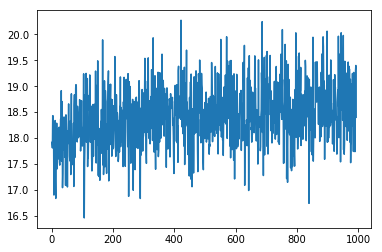

Mean psnr loss : 18.413078985696462
Std psnr loss :  0.595642967460921
Min psnr loss :  16.45867645740509
Discriminator accuracy


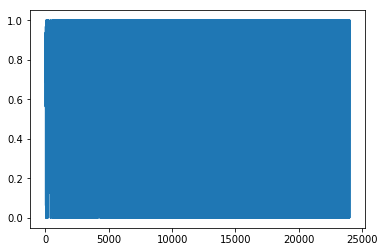

Mean discriminator loss : 2.104387870296243
Std discriminator loss :  0.5005519708440574
Min discriminator loss :  1.8318455815315247
Discriminator loss


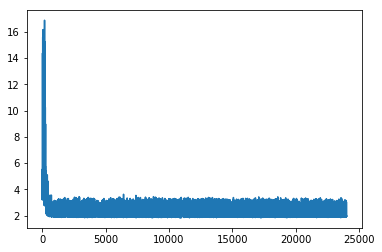

Mean discriminator loss : 2.104387870296243
Std discriminator loss :  0.5005519708440574
Min discriminator loss :  1.8318455815315247
Generator loss


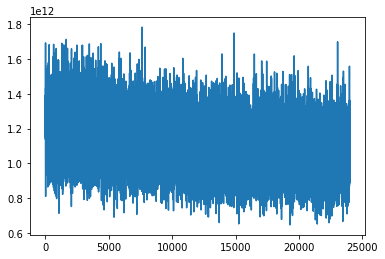

Mean generator loss : 1106813468731.3796
Std generator loss :  144078169821.92603
Min generator loss :  645686165504.0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np

with open("fulltrain losses.json") as f:
    data = json.load(f)

print("Fulltrain loss: Loaded fulltrain JSON")

# plot the discriminator loss values
print("PSNR loss")
plt.plot(data['val_psnr'])
plt.show()

print("Mean psnr loss :", np.mean(data['val_psnr']))
print("Std psnr loss : ", np.std(data['val_psnr']))
print("Min psnr loss : ", np.min(data['val_psnr']))

# plot the discriminator loss values
print("Discriminator accuracy")
plt.plot(data['discriminator_acc'])
plt.show()

print("Mean discriminator loss :", np.mean(data['discriminator_loss']))
print("Std discriminator loss : ", np.std(data['discriminator_loss']))
print("Min discriminator loss : ", np.min(data['discriminator_loss']))

# plot the discriminator loss values
print("Discriminator loss")
plt.plot(data['discriminator_loss'])
plt.show()

print("Mean discriminator loss :", np.mean(data['discriminator_loss']))
print("Std discriminator loss : ", np.std(data['discriminator_loss']))
print("Min discriminator loss : ", np.min(data['discriminator_loss']))


# plot the generator loss values
print("Generator loss")
plt.plot(data['generator_loss'])
plt.show()

print("Mean generator loss :", np.mean(data['generator_loss']))
print("Std generator loss : ", np.std(data['generator_loss']))
print("Min generator loss : ", np.min(data['generator_loss']))

In [20]:
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import sys
sys.path.append("..")

#import models
from loss import PSNRLoss, psnr

import os
import time
import numpy as np
from imageio import imwrite as imsave
from scipy.misc import imresize
from scipy.ndimage.filters import gaussian_filter

base_weights_path = "weights/"
base_val_images_path = "val_images/"
base_test_images = "test_images/"

set5_path = "tests/set5"
set14_path = "tests/set14"
bsd100_path = "tests/bsd100"

if not os.path.exists(base_weights_path):
    os.makedirs(base_weights_path)

if not os.path.exists(base_val_images_path):
    os.makedirs(base_val_images_path)

if not os.path.exists(base_test_images):
    os.makedirs(base_test_images)

def test_set5(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on Set 5 Validation images")
    total_psnr = _test_loop(set5_path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width,
                            model, total_psnr, "Set5", 5)

    print("Average PSNR of Set5 validation images : ", total_psnr / 5)
    print()


def test_set14(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on Set 14 Validation images")
    total_psnr = _test_loop(set14_path, batch_size, datagen, img_height, img_width, iteration, large_img_height,
                            large_img_width, model, total_psnr, "Set14", 14)

    print("Average PSNR of Set5 validation images : ", total_psnr / 14)
    print()

def test_bsd100(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on BSD 100 Validation images")
    total_psnr = _test_loop(bsd100_path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width,
                            model, total_psnr, "bsd100", 100)

    print("Average PSNR of BSD100 validation images : ", total_psnr / 100)
    print()


def _test_loop(path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width, model,
               total_psnr, prefix, num_images):
    print("Path " + path)
    print("Height " + str(img_height))
    print("img_width " + str(img_width))
    print("large_img_height " + str(large_img_height))
    print("large_img_width " + str(large_img_width))
    print("num_images " + str(num_images))
    for x in datagen.flow_from_directory(path, class_mode=None, batch_size=batch_size,
                                         target_size=(large_img_width, large_img_height)):
        t1 = time.time()

        # resize images
        x_temp = x.copy()
        x_temp = x_temp.transpose((0, 2, 3, 1))

        x_generator = np.empty((batch_size, img_width, img_height, 3))

        for j in range(batch_size):
            img = imresize(x_temp[j], (img_width, img_height))
            x_generator[j, :, :, :] = img

        #x_generator = x_generator.transpose((0, 3, 1, 2))

        output_image_batch = model.predict_on_batch(x_generator)

        average_psnr = 0.0
        for x_i in range(batch_size):
            average_psnr += psnr(x[x_i], output_image_batch[x_i] / 255.)
            total_psnr += average_psnr

        average_psnr /= batch_size

        iteration += batch_size
        t2 = time.time()

        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
              (t2 - t1, batch_size, average_psnr))

        for x_i in range(batch_size):
            real_path = base_test_images + prefix + "_iteration_%d_num_%d_real_.png" % (iteration, x_i + 1)
            generated_path = base_test_images + prefix + "_iteration_%d_num_%d_generated.png" % (iteration, x_i + 1)

            val_x = x[x_i].copy() * 255.
            #val_x = val_x.transpose((1, 2, 0))
            val_x = np.clip(val_x, 0, 255).astype('uint8')

            output_image = output_image_batch[x_i]
            #output_image = output_image.transpose((1, 2, 0))
            output_image = np.clip(output_image, 0, 255).astype('uint8')
            
            imsave(real_path, val_x[:,:,0])
            imsave(generated_path, output_image[:,:,0])

        if iteration >= num_images:
            break
    return total_psnr

In [21]:
class SRResNetTest:

    def __init__(self, img_width=96, img_height=96, batch_size=16):
        assert img_width >= 16, "Minimum image width must be at least 16"
        assert img_height >= 16, "Minimum image height must be at least 16"

        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size

        self.model = None # type: Model
        self.weights_path = base_weights_path + "sr_resnet_weights.h5"

    def build_model(self, load_weights=False) -> Model:
        sr_resnet = GenerativeNetwork(self.img_width, self.img_height, self.batch_size)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        output = sr_resnet.create_sr_model(ip)

        self.model = Model(ip, output)

        optimizer = Adam(lr=1e-4)
        self.model.compile(optimizer, loss='mse', metrics=[PSNRLoss])

        if load_weights:
            try:
                self.model.load_weights(self.weights_path)
                print("SR ResNet model weights loaded.")
            except Exception:
                print("Weight for SR ResNet model not found or are incorrect size. Cannot load weights.")

                response = input("Continue without loading weights? 'y' or 'n' ")
                if response == 'n':
                    exit()

        return self.model

    def train_model(self, image_dir, num_images=50000, epochs=1):
        datagen = ImageDataGenerator(rescale=1. / 255)
        img_width = self.img_width * 4
        img_height = self.img_height * 4

        early_stop = False
        iteration = 0
        prev_improvement = -1

        print("Training SR ResNet network")
        for i in range(epochs):
            print()
            print("Epoch : %d" % (i + 1))

            for x in datagen.flow_from_directory(image_dir, class_mode=None, batch_size=self.batch_size,
                                                 target_size=(img_width, img_height)):

                try:
                    t1 = time.time()

                    # resize images
                    x_temp = x.copy()
                    x_temp = x_temp.transpose((0, 2, 3, 1))

                    x_generator = np.empty((self.batch_size, self.img_width, self.img_height, 3))

                    for j in range(self.batch_size):
                        img = gaussian_filter(x_temp[j], sigma=0.5)
                        img = imresize(img, (self.img_width, self.img_height))
                        x_generator[j, :, :, :] = img

                    #x_generator = x_generator.transpose((0, 3, 1, 2))

                    if iteration % 50 == 0 and iteration != 0 :
                        print("Random Validation image..")
                        output_image_batch = self.model.predict_on_batch(x_generator)

                        print("Pred Max / Min: %0.2f / %0.2f" % (output_image_batch.max(),
                                                                 output_image_batch.min()))

                        average_psnr = 0.0
                        for x_i in range(self.batch_size):
                            average_psnr += psnr(x[x_i], output_image_batch[x_i] / 255.)

                        average_psnr /= self.batch_size

                        iteration += self.batch_size
                        t2 = time.time()

                        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
                              (t2 - t1, self.batch_size, average_psnr))

                        for x_i in range(self.batch_size):
                            real_path = base_val_images_path + "epoch_%d_iteration_%d_num_%d_real_.png" % \
                                                               (i + 1, iteration, x_i + 1)

                            generated_path = base_val_images_path + \
                                             "epoch_%d_iteration_%d_num_%d_generated.png" % (i + 1,
                                                                                            iteration,
                                                                                            x_i + 1)

                            val_x = x[x_i].copy() * 255.
                            #val_x = val_x.transpose((1, 2, 0))
                            val_x = np.clip(val_x, 0, 255).astype('uint8')

                            output_image = output_image_batch[x_i]
                            #output_image = output_image.transpose((1, 2, 0))
                            output_image = np.clip(output_image, 0, 255).astype('uint8')

                            imsave(real_path, val_x[:,:,0])
                            imsave(generated_path, output_image[:,:,0])

                        '''
                        Don't train of validation images for now.

                        Note that if epochs > 1, there is a chance that
                        validation images may be used for training purposes as well.

                        In that case, this isn't strictly a validation measure, instead of
                        just a check to see what the network has learned.
                        '''
                        continue

                    hist = self.model.fit(x_generator, x * 255, batch_size=self.batch_size, epochs=1, verbose=0)
                    psnr_loss_val = hist.history['PSNRLoss'][0]

                    if prev_improvement == -1:
                        prev_improvement = psnr_loss_val

                    improvement = (prev_improvement - psnr_loss_val) / prev_improvement * 100
                    prev_improvement = psnr_loss_val

                    iteration += self.batch_size
                    t2 = time.time()

                    print("%d / %d | Improvement : %0.2f %% | Time required : %0.2f s/step | "
                          "PSNR : %0.3f" % (iteration, num_images, improvement, t2 - t1, psnr_loss_val))

                    if iteration % 1000 == 0 and iteration != 0:
                        print("Saving weights")
                        self.model.save_weights(self.weights_path, overwrite=True)

                    if iteration >= num_images:
                        break

                except KeyboardInterrupt:
                    print("Keyboard interrupt detected. Stopping early.")
                    early_stop = True
                    break

            iteration = 0

            if early_stop:
                break

        print("Finished training SRGAN network. Saving model weights.")

In [11]:
coco_path = "tests/coco"

img_width = img_height = 64

sr_resnet_test = SRResNetTest(img_width=img_width, img_height=img_height, batch_size=1)
sr_resnet_test.build_model(load_weights=False)

sr_resnet_test.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_generator (InputLayer)        (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
sr_res_conv1 (Conv2D)           (None, 64, 64, 64)   4864        x_generator[0][0]                
__________________________________________________________________________________________________
sr_res_bn_1 (BatchNormalization (None, 64, 64, 64)   256         sr_res_conv1[0][0]               
__________________________________________________________________________________________________
sr_res_lr1 (LeakyReLU)          (None, 64, 64, 64)   0           sr_res_bn_1[0][0]                
__________________________________________________________________________________________________
sr_res_con

In [23]:
#This is option if we need to train model on the go and then do the testing
#sr_resnet_test.train_model(coco_path, num_images=50000, epochs=1)

In [13]:
test_set5(sr_resnet_test.model, img_width=img_width, img_height=img_height)

Testing model on Set 5 Validation images
Path tests/set5
Height 64
img_width 64
large_img_height 256
large_img_width 256
num_images 5
Found 5 images belonging to 1 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:102: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Time required : 3.35. Average validation PSNR over 1 samples = 18.57
Time required : 0.02. Average validation PSNR over 1 samples = 18.97
Time required : 0.01. Average validation PSNR over 1 samples = 20.32
Time required : 0.01. Average validation PSNR over 1 samples = 20.76
Time required : 0.01. Average validation PSNR over 1 samples = 21.08
Average PSNR of Set5 validation images :  19.938794791698456



In [14]:
test_set14(sr_resnet_test.model, img_width=img_width, img_height=img_height)

Testing model on Set 14 Validation images
Path tests/set14
Height 64
img_width 64
large_img_height 256
large_img_width 256
num_images 14
Found 14 images belonging to 1 classes.
Time required : 0.02. Average validation PSNR over 1 samples = 19.37
Time required : 0.01. Average validation PSNR over 1 samples = 19.50


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:102: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Time required : 0.01. Average validation PSNR over 1 samples = 20.62
Time required : 0.01. Average validation PSNR over 1 samples = 22.84
Time required : 0.01. Average validation PSNR over 1 samples = 21.24
Time required : 0.02. Average validation PSNR over 1 samples = 20.42
Time required : 0.01. Average validation PSNR over 1 samples = 22.68
Time required : 0.01. Average validation PSNR over 1 samples = 20.19
Time required : 0.01. Average validation PSNR over 1 samples = 20.86
Time required : 0.01. Average validation PSNR over 1 samples = 19.93
Time required : 0.01. Average validation PSNR over 1 samples = 20.21
Time required : 0.01. Average validation PSNR over 1 samples = 21.60
Time required : 0.01. Average validation PSNR over 1 samples = 20.50
Time required : 0.01. Average validation PSNR over 1 samples = 18.98
Average PSNR of Set5 validation images :  20.640051786388669



In [15]:
test_bsd100(sr_resnet_test.model, img_width=img_width, img_height=img_height)

Testing model on BSD 100 Validation images
Path tests/bsd100
Height 64
img_width 64
large_img_height 256
large_img_width 256
num_images 100
Found 100 images belonging to 1 classes.
Time required : 0.02. Average validation PSNR over 1 samples = 20.87
Time required : 0.01. Average validation PSNR over 1 samples = 20.25


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:102: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Time required : 0.02. Average validation PSNR over 1 samples = 20.89
Time required : 0.02. Average validation PSNR over 1 samples = 19.82
Time required : 0.01. Average validation PSNR over 1 samples = 21.49
Time required : 0.01. Average validation PSNR over 1 samples = 20.41
Time required : 0.01. Average validation PSNR over 1 samples = 22.95
Time required : 0.01. Average validation PSNR over 1 samples = 21.34
Time required : 0.01. Average validation PSNR over 1 samples = 19.98
Time required : 0.01. Average validation PSNR over 1 samples = 21.26
Time required : 0.02. Average validation PSNR over 1 samples = 19.89
Time required : 0.01. Average validation PSNR over 1 samples = 17.43
Time required : 0.02. Average validation PSNR over 1 samples = 21.76
Time required : 0.01. Average validation PSNR over 1 samples = 19.14
Time required : 0.01. Average validation PSNR over 1 samples = 20.93
Time required : 0.01. Average validation PSNR over 1 samples = 19.01
Time required : 0.01. Average vali